In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [49]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [50]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)

In [51]:
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [52]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     1         36  Australia     2.284420e+11  1.948099e+10   
2      2017     1         40    Austria     1.664750e+11  1.948099e+10   
3      2017     1         56    Belgium     4.064120e+11  1.948099e+10   
4      2017     1         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [53]:
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM', 'SNDIST', 'PA_NUS_FCRF'])

In [54]:
df.head()

HSCD  COUNTRYCD  TRADE_COUNTRYCD    TRADE_HSCD  TARIFF_AVG  NY_GDP_MKTP_CD  \
0     1         12     4.605299e+10  1.948099e+10        30.0    1.701630e+11   
1     1         36     2.284420e+11  1.948099e+10         0.0    1.329190e+12   
2     1         40     1.664750e+11  1.948099e+10         0.0    4.172380e+11   
3     1         56     4.064120e+11  1.948099e+10         0.0    5.026980e+11   
4     1         76     1.507490e+11  1.948099e+10        18.0    2.062830e+12   

   NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  IC_BUS_EASE_DFRN_DB        KMDIST  \
0       1.599950e+11     41389198            46.109810   9954.009766   
1       1.208850e+12     24601860            80.223690   8329.652344   
2       3.955690e+11      8797566            78.856460   8289.029297   
3       4.757400e+11     11375158            72.409200   8722.114258   
4       1.795700e+12    207833831            55.382403  18364.505860   

   TRADE_HSCD_COUNTRYCD  KR_TRADE_HSCD_COUNTRYCD  
0             3416326.0                     7657  
1           438747025.0                  5294788  
2           453206357.0                   335818  
3           706524512.0                   173709  
4            31329648.0                   122850

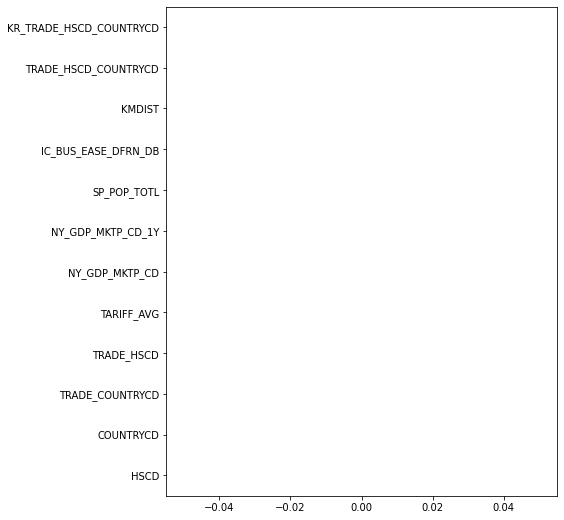

In [55]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [56]:
df.shape


(20713, 12)

In [57]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
2        0.074098
3        0.024586
4        0.392121
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 20713, dtype: float64

In [58]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

HSCD  COUNTRYCD  TRADE_COUNTRYCD    TRADE_HSCD  TARIFF_AVG  NY_GDP_MKTP_CD  \
0     1         12     4.605299e+10  1.948099e+10        30.0    1.701630e+11   
1     1         36     2.284420e+11  1.948099e+10         0.0    1.329190e+12   
2     1         40     1.664750e+11  1.948099e+10         0.0    4.172380e+11   
3     1         56     4.064120e+11  1.948099e+10         0.0    5.026980e+11   
4     1         76     1.507490e+11  1.948099e+10        18.0    2.062830e+12   

   NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  IC_BUS_EASE_DFRN_DB        KMDIST  \
0       1.599950e+11     41389198            46.109810   9954.009766   
1       1.208850e+12     24601860            80.223690   8329.652344   
2       3.955690e+11      8797566            78.856460   8289.029297   
3       4.757400e+11     11375158            72.409200   8722.114258   
4       1.795700e+12    207833831            55.382403  18364.505860   

   TRADE_HSCD_COUNTRYCD  KR_TRADE_HSCD_COUNTRYCD  item_total_percent  \
0             3416326.0                     7657            0.007418   
1           438747025.0                  5294788            0.192061   
2           453206357.0                   335818            0.272237   
3           706524512.0                   173709            0.173844   
4            31329648.0                   122850            0.020783   

   item_world_percent  gdp_percent  next_year_percent  
0            0.017537   106.355199           0.224130  
1            2.252181   109.954916           1.206797  
2            2.326404   105.477932           0.074098  
3            3.626739   105.666541           0.024586  
4            0.160822   114.876093           0.392121

In [59]:
df['KMDIST'] = df['KMDIST']/100
df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [60]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG  IC_BUS_EASE_DFRN_DB      KMDIST  \
0     1         12        30.0            46.109810   99.540098   
1     1         36         0.0            80.223690   83.296523   
2     1         40         0.0            78.856460   82.890293   
3     1         56         0.0            72.409200   87.221143   
4     1         76        18.0            55.382403  183.645059   

   item_total_percent  item_world_percent  gdp_percent  next_year_percent  
0            0.007418            0.017537   106.355199           0.224130  
1            0.192061            2.252181   109.954916           1.206797  
2            0.272237            2.326404   105.477932           0.074098  
3            0.173844            3.626739   105.666541           0.024586  
4            0.020783            0.160822   114.876093           0.392121

In [61]:
# hcsd_uniq = df['COUNTRYCD'].unique()
# for i in range(len(df['COUNTRYCD'])):
#   for x in range(len(hcsd_uniq)):
#     if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
#       df['COUNTRYCD'].iloc[i] = (x+1)
#       break
# df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
# df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
# df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
# df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
# df.head()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


HSCD  COUNTRYCD  TARIFF_AVG  IC_BUS_EASE_DFRN_DB    KMDIST  \
0     1          1        0.30             0.461098  0.995401   
1     1          2        0.00             0.802237  0.832965   
2     1          3        0.00             0.788565  0.828903   
3     1          4        0.00             0.724092  0.872211   
4     1          5        0.18             0.553824  1.836451   

   item_total_percent  item_world_percent  gdp_percent  next_year_percent  
0            0.007418            0.017537     1.063552           0.224130  
1            0.192061            2.252181     1.099549           1.206797  
2            0.272237            2.326404     1.054779           0.074098  
3            0.173844            3.626739     1.056665           0.024586  
4            0.020783            0.160822     1.148761           0.392121

In [62]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(20713, 9)
12427 4143 4143


In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1015)
device = torch.device("cuda")

In [64]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [65]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([16570, 8])
torch.Size([16570, 1])


In [66]:
class Model(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(Model, self).__init__()
    self.bn = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    x = x.to(device)
    return self.layer1(self.bn(x))

class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = F.relu(self.bn2(self.layer2(x)))
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(8, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [67]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [68]:
n_epochs = 300

for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/300  Batch 1/518  cost : 80.04014587402344
Ep 0/300  Batch 2/518  cost : 18.79181671142578
Ep 0/300  Batch 3/518  cost : 20.369308471679688
Ep 0/300  Batch 4/518  cost : 487.4112548828125
Ep 0/300  Batch 5/518  cost : 142.59205627441406
Ep 0/300  Batch 6/518  cost : 35.60896301269531
Ep 0/300  Batch 7/518  cost : 28.206005096435547
Ep 0/300  Batch 8/518  cost : 15.78239631652832
Ep 0/300  Batch 9/518  cost : 17.2960205078125
Ep 0/300  Batch 10/518  cost : 73.97611236572266
Ep 0/300  Batch 11/518  cost : 343.4281311035156
Ep 0/300  Batch 12/518  cost : 112.01361846923828
Ep 0/300  Batch 13/518  cost : 35.614566802978516
Ep 0/300  Batch 14/518  cost : 18.850650787353516
Ep 0/300  Batch 15/518  cost : 85.04084777832031
Ep 0/300  Batch 16/518  cost : 17.16539764404297
Ep 0/300  Batch 17/518  cost : 79.1550064086914
Ep 0/300  Batch 18/518  cost : 119.20838928222656
Ep 0/300  Batch 19/518  cost : 588.11376953125
Ep 0/300  Batch 20/518  cost : 46.335899353027344
Ep 0/300  Batch 21/518  c

Ep 0/300  Batch 170/518  cost : 138.67079162597656
Ep 0/300  Batch 171/518  cost : 190.33883666992188
Ep 0/300  Batch 172/518  cost : 49.77538299560547
Ep 0/300  Batch 173/518  cost : 17.405067443847656
Ep 0/300  Batch 174/518  cost : 72.41324615478516
Ep 0/300  Batch 175/518  cost : 19.232919692993164
Ep 0/300  Batch 176/518  cost : 47.73611831665039
Ep 0/300  Batch 177/518  cost : 33.40863800048828
Ep 0/300  Batch 178/518  cost : 47.55073165893555
Ep 0/300  Batch 179/518  cost : 23.1169376373291
Ep 0/300  Batch 180/518  cost : 61.36164474487305
Ep 0/300  Batch 181/518  cost : 51.525352478027344
Ep 0/300  Batch 182/518  cost : 98.23798370361328
Ep 0/300  Batch 183/518  cost : 43.124717712402344
Ep 0/300  Batch 184/518  cost : 18.681331634521484
Ep 0/300  Batch 185/518  cost : 81.14395904541016
Ep 0/300  Batch 186/518  cost : 165.73744201660156
Ep 0/300  Batch 187/518  cost : 596.3109741210938
Ep 0/300  Batch 188/518  cost : 2816.101318359375
Ep 0/300  Batch 189/518  cost : 11297.80664

Ep 0/300  Batch 348/518  cost : 16.826496124267578
Ep 0/300  Batch 349/518  cost : 12.062944412231445
Ep 0/300  Batch 350/518  cost : 37.24302673339844
Ep 0/300  Batch 351/518  cost : 93.90454864501953
Ep 0/300  Batch 352/518  cost : 304.15545654296875
Ep 0/300  Batch 353/518  cost : 676.243896484375
Ep 0/300  Batch 354/518  cost : 205.1890411376953
Ep 0/300  Batch 355/518  cost : 71.86236572265625
Ep 0/300  Batch 356/518  cost : 109.00431823730469
Ep 0/300  Batch 357/518  cost : 351369.65625
Ep 0/300  Batch 358/518  cost : 363.8287353515625
Ep 0/300  Batch 359/518  cost : 187897.34375
Ep 0/300  Batch 360/518  cost : 76.39464569091797
Ep 0/300  Batch 361/518  cost : 23.990379333496094
Ep 0/300  Batch 362/518  cost : 56.62342071533203
Ep 0/300  Batch 363/518  cost : 26.337860107421875
Ep 0/300  Batch 364/518  cost : 30.525283813476562
Ep 0/300  Batch 365/518  cost : 54.68646240234375
Ep 0/300  Batch 366/518  cost : 102.55989074707031
Ep 0/300  Batch 367/518  cost : 52.362083435058594
Ep

Ep 1/300  Batch 8/518  cost : 34.82343673706055
Ep 1/300  Batch 9/518  cost : 66.16620635986328
Ep 1/300  Batch 10/518  cost : 236.8778076171875
Ep 1/300  Batch 11/518  cost : 57.275413513183594
Ep 1/300  Batch 12/518  cost : 103.00433349609375
Ep 1/300  Batch 13/518  cost : 55.55827713012695
Ep 1/300  Batch 14/518  cost : 72.73985290527344
Ep 1/300  Batch 15/518  cost : 20.46558380126953
Ep 1/300  Batch 16/518  cost : 21.0073184967041
Ep 1/300  Batch 17/518  cost : 75.13937377929688
Ep 1/300  Batch 18/518  cost : 74.73930358886719
Ep 1/300  Batch 19/518  cost : 102.55719757080078
Ep 1/300  Batch 20/518  cost : 62.26320266723633
Ep 1/300  Batch 21/518  cost : 36.289546966552734
Ep 1/300  Batch 22/518  cost : 65.29478454589844
Ep 1/300  Batch 23/518  cost : 30.96292495727539
Ep 1/300  Batch 24/518  cost : 17.65038299560547
Ep 1/300  Batch 25/518  cost : 8260.376953125
Ep 1/300  Batch 26/518  cost : 169.9119110107422
Ep 1/300  Batch 27/518  cost : 127.1698989868164
Ep 1/300  Batch 28/518

Ep 1/300  Batch 186/518  cost : 50.2606086730957
Ep 1/300  Batch 187/518  cost : 49.97441864013672
Ep 1/300  Batch 188/518  cost : 47.23915100097656
Ep 1/300  Batch 189/518  cost : 135.9255828857422
Ep 1/300  Batch 190/518  cost : 19.930688858032227
Ep 1/300  Batch 191/518  cost : 59.33075714111328
Ep 1/300  Batch 192/518  cost : 53.37974166870117
Ep 1/300  Batch 193/518  cost : 29.690593719482422
Ep 1/300  Batch 194/518  cost : 96.5666275024414
Ep 1/300  Batch 195/518  cost : 35.993492126464844
Ep 1/300  Batch 196/518  cost : 364.8270568847656
Ep 1/300  Batch 197/518  cost : 21.770050048828125
Ep 1/300  Batch 198/518  cost : 40.4412841796875
Ep 1/300  Batch 199/518  cost : 24.62187957763672
Ep 1/300  Batch 200/518  cost : 37.85840606689453
Ep 1/300  Batch 201/518  cost : 50.36249923706055
Ep 1/300  Batch 202/518  cost : 190.99807739257812
Ep 1/300  Batch 203/518  cost : 46.24864959716797
Ep 1/300  Batch 204/518  cost : 148.3173828125
Ep 1/300  Batch 205/518  cost : 69.9320297241211
Ep

Ep 1/300  Batch 365/518  cost : 25.900529861450195
Ep 1/300  Batch 366/518  cost : 78.0494155883789
Ep 1/300  Batch 367/518  cost : 244.95169067382812
Ep 1/300  Batch 368/518  cost : 38.028045654296875
Ep 1/300  Batch 369/518  cost : 29.680648803710938
Ep 1/300  Batch 370/518  cost : 155.76568603515625
Ep 1/300  Batch 371/518  cost : 13.541123390197754
Ep 1/300  Batch 372/518  cost : 232.27951049804688
Ep 1/300  Batch 373/518  cost : 26.014699935913086
Ep 1/300  Batch 374/518  cost : 51.713436126708984
Ep 1/300  Batch 375/518  cost : 103.08045959472656
Ep 1/300  Batch 376/518  cost : 137.25469970703125
Ep 1/300  Batch 377/518  cost : 82.92992401123047
Ep 1/300  Batch 378/518  cost : 65.84952545166016
Ep 1/300  Batch 379/518  cost : 75.63005065917969
Ep 1/300  Batch 380/518  cost : 15.956193923950195
Ep 1/300  Batch 381/518  cost : 12.336360931396484
Ep 1/300  Batch 382/518  cost : 41.607017517089844
Ep 1/300  Batch 383/518  cost : 216.3595428466797
Ep 1/300  Batch 384/518  cost : 22.32

Ep 2/300  Batch 25/518  cost : 60.137351989746094
Ep 2/300  Batch 26/518  cost : 48.5762939453125
Ep 2/300  Batch 27/518  cost : 57.65096664428711
Ep 2/300  Batch 28/518  cost : 46.416954040527344
Ep 2/300  Batch 29/518  cost : 31.99820899963379
Ep 2/300  Batch 30/518  cost : 66.47781372070312
Ep 2/300  Batch 31/518  cost : 3219.989501953125
Ep 2/300  Batch 32/518  cost : 20.578571319580078
Ep 2/300  Batch 33/518  cost : 61.660308837890625
Ep 2/300  Batch 34/518  cost : 55.03136444091797
Ep 2/300  Batch 35/518  cost : 133.84559631347656
Ep 2/300  Batch 36/518  cost : 154.6698760986328
Ep 2/300  Batch 37/518  cost : 178.8280487060547
Ep 2/300  Batch 38/518  cost : 27.434978485107422
Ep 2/300  Batch 39/518  cost : 54.47591018676758
Ep 2/300  Batch 40/518  cost : 83.87645721435547
Ep 2/300  Batch 41/518  cost : 57.258522033691406
Ep 2/300  Batch 42/518  cost : 34.25666046142578
Ep 2/300  Batch 43/518  cost : 81.91085815429688
Ep 2/300  Batch 44/518  cost : 67.6739730834961
Ep 2/300  Batch

Ep 2/300  Batch 203/518  cost : 97.52449035644531
Ep 2/300  Batch 204/518  cost : 25.260984420776367
Ep 2/300  Batch 205/518  cost : 111.06025695800781
Ep 2/300  Batch 206/518  cost : 2013.40185546875
Ep 2/300  Batch 207/518  cost : 415.91925048828125
Ep 2/300  Batch 208/518  cost : 68.81497955322266
Ep 2/300  Batch 209/518  cost : 84.01144409179688
Ep 2/300  Batch 210/518  cost : 259.81683349609375
Ep 2/300  Batch 211/518  cost : 24.87557601928711
Ep 2/300  Batch 212/518  cost : 72.53529357910156
Ep 2/300  Batch 213/518  cost : 16.335132598876953
Ep 2/300  Batch 214/518  cost : 28.508804321289062
Ep 2/300  Batch 215/518  cost : 43.76703643798828
Ep 2/300  Batch 216/518  cost : 998.7606201171875
Ep 2/300  Batch 217/518  cost : 53.36695098876953
Ep 2/300  Batch 218/518  cost : 15.276530265808105
Ep 2/300  Batch 219/518  cost : 58.81951904296875
Ep 2/300  Batch 220/518  cost : 50.39748764038086
Ep 2/300  Batch 221/518  cost : 29.515888214111328
Ep 2/300  Batch 222/518  cost : 160.3249359

Ep 2/300  Batch 381/518  cost : 36.79503631591797
Ep 2/300  Batch 382/518  cost : 188068.625
Ep 2/300  Batch 383/518  cost : 15.437932968139648
Ep 2/300  Batch 384/518  cost : 224.45928955078125
Ep 2/300  Batch 385/518  cost : 36.44158935546875
Ep 2/300  Batch 386/518  cost : 20.62285614013672
Ep 2/300  Batch 387/518  cost : 104.92848205566406
Ep 2/300  Batch 388/518  cost : 37.76129150390625
Ep 2/300  Batch 389/518  cost : 597.2462158203125
Ep 2/300  Batch 390/518  cost : 592.214111328125
Ep 2/300  Batch 391/518  cost : 1793.5299072265625
Ep 2/300  Batch 392/518  cost : 12.3779296875
Ep 2/300  Batch 393/518  cost : 197.05528259277344
Ep 2/300  Batch 394/518  cost : 19.39913558959961
Ep 2/300  Batch 395/518  cost : 69.37843322753906
Ep 2/300  Batch 396/518  cost : 503.4850769042969
Ep 2/300  Batch 397/518  cost : 46.626914978027344
Ep 2/300  Batch 398/518  cost : 24.88774871826172
Ep 2/300  Batch 399/518  cost : 209.45550537109375
Ep 2/300  Batch 400/518  cost : 200.11119079589844
Ep 2

Ep 3/300  Batch 41/518  cost : 79.398681640625
Ep 3/300  Batch 42/518  cost : 105.50312805175781
Ep 3/300  Batch 43/518  cost : 26.95548439025879
Ep 3/300  Batch 44/518  cost : 24.54172134399414
Ep 3/300  Batch 45/518  cost : 87.48802947998047
Ep 3/300  Batch 46/518  cost : 92.28441619873047
Ep 3/300  Batch 47/518  cost : 41.372798919677734
Ep 3/300  Batch 48/518  cost : 97.12894439697266
Ep 3/300  Batch 49/518  cost : 675.342041015625
Ep 3/300  Batch 50/518  cost : 217.44744873046875
Ep 3/300  Batch 51/518  cost : 87.54812622070312
Ep 3/300  Batch 52/518  cost : 45.75571060180664
Ep 3/300  Batch 53/518  cost : 15.707432746887207
Ep 3/300  Batch 54/518  cost : 16.52865219116211
Ep 3/300  Batch 55/518  cost : 13.350908279418945
Ep 3/300  Batch 56/518  cost : 19.229259490966797
Ep 3/300  Batch 57/518  cost : 52.924034118652344
Ep 3/300  Batch 58/518  cost : 196.4833221435547
Ep 3/300  Batch 59/518  cost : 21.507518768310547
Ep 3/300  Batch 60/518  cost : 276.622314453125
Ep 3/300  Batch 

Ep 3/300  Batch 219/518  cost : 296.7128601074219
Ep 3/300  Batch 220/518  cost : 149.18753051757812
Ep 3/300  Batch 221/518  cost : 34.03722381591797
Ep 3/300  Batch 222/518  cost : 136.04794311523438
Ep 3/300  Batch 223/518  cost : 54.61049270629883
Ep 3/300  Batch 224/518  cost : 51.987586975097656
Ep 3/300  Batch 225/518  cost : 54.46294403076172
Ep 3/300  Batch 226/518  cost : 87.39682006835938
Ep 3/300  Batch 227/518  cost : 440.0205993652344
Ep 3/300  Batch 228/518  cost : 18.170326232910156
Ep 3/300  Batch 229/518  cost : 64.09822845458984
Ep 3/300  Batch 230/518  cost : 112.85638427734375
Ep 3/300  Batch 231/518  cost : 43.17688751220703
Ep 3/300  Batch 232/518  cost : 24.0477294921875
Ep 3/300  Batch 233/518  cost : 122.73192596435547
Ep 3/300  Batch 234/518  cost : 91.41107177734375
Ep 3/300  Batch 235/518  cost : 23.93942642211914
Ep 3/300  Batch 236/518  cost : 354550.3125
Ep 3/300  Batch 237/518  cost : 28.538143157958984
Ep 3/300  Batch 238/518  cost : 55.00242614746094


Ep 3/300  Batch 396/518  cost : 22.273956298828125
Ep 3/300  Batch 397/518  cost : 38.8926887512207
Ep 3/300  Batch 398/518  cost : 29.60495948791504
Ep 3/300  Batch 399/518  cost : 29.14499855041504
Ep 3/300  Batch 400/518  cost : 31.86660385131836
Ep 3/300  Batch 401/518  cost : 57.71278381347656
Ep 3/300  Batch 402/518  cost : 35.620460510253906
Ep 3/300  Batch 403/518  cost : 40.800819396972656
Ep 3/300  Batch 404/518  cost : 36.490013122558594
Ep 3/300  Batch 405/518  cost : 204.30575561523438
Ep 3/300  Batch 406/518  cost : 25.69172477722168
Ep 3/300  Batch 407/518  cost : 22.184358596801758
Ep 3/300  Batch 408/518  cost : 34.58542251586914
Ep 3/300  Batch 409/518  cost : 75.9618148803711
Ep 3/300  Batch 410/518  cost : 33.611724853515625
Ep 3/300  Batch 411/518  cost : 49.452110290527344
Ep 3/300  Batch 412/518  cost : 22.703296661376953
Ep 3/300  Batch 413/518  cost : 46.676719665527344
Ep 3/300  Batch 414/518  cost : 22.80191421508789
Ep 3/300  Batch 415/518  cost : 75.1706848

Ep 4/300  Batch 57/518  cost : 165.15185546875
Ep 4/300  Batch 58/518  cost : 25.191089630126953
Ep 4/300  Batch 59/518  cost : 46.48077392578125
Ep 4/300  Batch 60/518  cost : 38.390892028808594
Ep 4/300  Batch 61/518  cost : 50.83353042602539
Ep 4/300  Batch 62/518  cost : 25.84345245361328
Ep 4/300  Batch 63/518  cost : 68.98822784423828
Ep 4/300  Batch 64/518  cost : 50.8558349609375
Ep 4/300  Batch 65/518  cost : 37.205238342285156
Ep 4/300  Batch 66/518  cost : 143.5341796875
Ep 4/300  Batch 67/518  cost : 82.10630798339844
Ep 4/300  Batch 68/518  cost : 52.53343200683594
Ep 4/300  Batch 69/518  cost : 147.98175048828125
Ep 4/300  Batch 70/518  cost : 82.64593505859375
Ep 4/300  Batch 71/518  cost : 31.26681900024414
Ep 4/300  Batch 72/518  cost : 46.93983459472656
Ep 4/300  Batch 73/518  cost : 68.87788391113281
Ep 4/300  Batch 74/518  cost : 71.06462097167969
Ep 4/300  Batch 75/518  cost : 25.46462631225586
Ep 4/300  Batch 76/518  cost : 682.1273193359375
Ep 4/300  Batch 77/518

Ep 4/300  Batch 234/518  cost : 82.22164154052734
Ep 4/300  Batch 235/518  cost : 1160.534423828125
Ep 4/300  Batch 236/518  cost : 133.01434326171875
Ep 4/300  Batch 237/518  cost : 81.7255859375
Ep 4/300  Batch 238/518  cost : 130.37608337402344
Ep 4/300  Batch 239/518  cost : 410.39117431640625
Ep 4/300  Batch 240/518  cost : 41.81890869140625
Ep 4/300  Batch 241/518  cost : 46.02997589111328
Ep 4/300  Batch 242/518  cost : 63.504974365234375
Ep 4/300  Batch 243/518  cost : 102.42051696777344
Ep 4/300  Batch 244/518  cost : 48.93838119506836
Ep 4/300  Batch 245/518  cost : 41.38042449951172
Ep 4/300  Batch 246/518  cost : 32.713863372802734
Ep 4/300  Batch 247/518  cost : 86.08448791503906
Ep 4/300  Batch 248/518  cost : 39.87384033203125
Ep 4/300  Batch 249/518  cost : 95.33753967285156
Ep 4/300  Batch 250/518  cost : 33.57303237915039
Ep 4/300  Batch 251/518  cost : 50.79045867919922
Ep 4/300  Batch 252/518  cost : 26.004924774169922
Ep 4/300  Batch 253/518  cost : 204.01531982421

Ep 4/300  Batch 413/518  cost : 8.0823392868042
Ep 4/300  Batch 414/518  cost : 176.9647216796875
Ep 4/300  Batch 415/518  cost : 40.25068283081055
Ep 4/300  Batch 416/518  cost : 247.86959838867188
Ep 4/300  Batch 417/518  cost : 23.236705780029297
Ep 4/300  Batch 418/518  cost : 172.03341674804688
Ep 4/300  Batch 419/518  cost : 2023.9715576171875
Ep 4/300  Batch 420/518  cost : 13.449458122253418
Ep 4/300  Batch 421/518  cost : 132.57513427734375
Ep 4/300  Batch 422/518  cost : 65.69078063964844
Ep 4/300  Batch 423/518  cost : 17.681089401245117
Ep 4/300  Batch 424/518  cost : 98.6717529296875
Ep 4/300  Batch 425/518  cost : 14.083599090576172
Ep 4/300  Batch 426/518  cost : 40.723175048828125
Ep 4/300  Batch 427/518  cost : 32.245967864990234
Ep 4/300  Batch 428/518  cost : 86.7193374633789
Ep 4/300  Batch 429/518  cost : 385.0795593261719
Ep 4/300  Batch 430/518  cost : 10.186235427856445
Ep 4/300  Batch 431/518  cost : 43.76581573486328
Ep 4/300  Batch 432/518  cost : 79.03868103

Ep 5/300  Batch 72/518  cost : 26.379051208496094
Ep 5/300  Batch 73/518  cost : 117.87146759033203
Ep 5/300  Batch 74/518  cost : 52.36342239379883
Ep 5/300  Batch 75/518  cost : 45.21123504638672
Ep 5/300  Batch 76/518  cost : 82.23513793945312
Ep 5/300  Batch 77/518  cost : 40.200355529785156
Ep 5/300  Batch 78/518  cost : 204.91375732421875
Ep 5/300  Batch 79/518  cost : 62.422027587890625
Ep 5/300  Batch 80/518  cost : 17.629886627197266
Ep 5/300  Batch 81/518  cost : 28.295230865478516
Ep 5/300  Batch 82/518  cost : 48.471405029296875
Ep 5/300  Batch 83/518  cost : 31.329133987426758
Ep 5/300  Batch 84/518  cost : 204.43069458007812
Ep 5/300  Batch 85/518  cost : 3606.88623046875
Ep 5/300  Batch 86/518  cost : 30.60076141357422
Ep 5/300  Batch 87/518  cost : 26.77105712890625
Ep 5/300  Batch 88/518  cost : 53.898704528808594
Ep 5/300  Batch 89/518  cost : 58.38542938232422
Ep 5/300  Batch 90/518  cost : 24.661958694458008
Ep 5/300  Batch 91/518  cost : 82.20462036132812
Ep 5/300 

Ep 5/300  Batch 250/518  cost : 28.212739944458008
Ep 5/300  Batch 251/518  cost : 43.60730743408203
Ep 5/300  Batch 252/518  cost : 183.8878173828125
Ep 5/300  Batch 253/518  cost : 25.86437225341797
Ep 5/300  Batch 254/518  cost : 202.72447204589844
Ep 5/300  Batch 255/518  cost : 1431.741943359375
Ep 5/300  Batch 256/518  cost : 585.4619750976562
Ep 5/300  Batch 257/518  cost : 24.58595848083496
Ep 5/300  Batch 258/518  cost : 89.66112518310547
Ep 5/300  Batch 259/518  cost : 81.95636749267578
Ep 5/300  Batch 260/518  cost : 72.38455963134766
Ep 5/300  Batch 261/518  cost : 108.911865234375
Ep 5/300  Batch 262/518  cost : 59.98600769042969
Ep 5/300  Batch 263/518  cost : 65.6998062133789
Ep 5/300  Batch 264/518  cost : 208.42970275878906
Ep 5/300  Batch 265/518  cost : 23.93462371826172
Ep 5/300  Batch 266/518  cost : 25.406814575195312
Ep 5/300  Batch 267/518  cost : 106.86601257324219
Ep 5/300  Batch 268/518  cost : 44.80752182006836
Ep 5/300  Batch 269/518  cost : 1407.6632080078

Ep 5/300  Batch 427/518  cost : 75.27748107910156
Ep 5/300  Batch 428/518  cost : 161.2991485595703
Ep 5/300  Batch 429/518  cost : 165.3150177001953
Ep 5/300  Batch 430/518  cost : 22.06075668334961
Ep 5/300  Batch 431/518  cost : 15.633668899536133
Ep 5/300  Batch 432/518  cost : 59.643035888671875
Ep 5/300  Batch 433/518  cost : 46.01805877685547
Ep 5/300  Batch 434/518  cost : 12.055253982543945
Ep 5/300  Batch 435/518  cost : 17.21139907836914
Ep 5/300  Batch 436/518  cost : 79.19380950927734
Ep 5/300  Batch 437/518  cost : 72.97447204589844
Ep 5/300  Batch 438/518  cost : 42.9405517578125
Ep 5/300  Batch 439/518  cost : 202.11672973632812
Ep 5/300  Batch 440/518  cost : 37.77090072631836
Ep 5/300  Batch 441/518  cost : 391.3458251953125
Ep 5/300  Batch 442/518  cost : 2624.10205078125
Ep 5/300  Batch 443/518  cost : 3516.59033203125
Ep 5/300  Batch 444/518  cost : 40.99143981933594
Ep 5/300  Batch 445/518  cost : 991.8865356445312
Ep 5/300  Batch 446/518  cost : 38.26240921020508

Ep 6/300  Batch 88/518  cost : 195.21209716796875
Ep 6/300  Batch 89/518  cost : 22.043264389038086
Ep 6/300  Batch 90/518  cost : 89.92587280273438
Ep 6/300  Batch 91/518  cost : 3742.089599609375
Ep 6/300  Batch 92/518  cost : 38.45945739746094
Ep 6/300  Batch 93/518  cost : 25.954120635986328
Ep 6/300  Batch 94/518  cost : 953.0999755859375
Ep 6/300  Batch 95/518  cost : 47.651939392089844
Ep 6/300  Batch 96/518  cost : 19.451601028442383
Ep 6/300  Batch 97/518  cost : 31.557519912719727
Ep 6/300  Batch 98/518  cost : 37.41757583618164
Ep 6/300  Batch 99/518  cost : 55.01599884033203
Ep 6/300  Batch 100/518  cost : 23.358985900878906
Ep 6/300  Batch 101/518  cost : 45.27415466308594
Ep 6/300  Batch 102/518  cost : 23.62627410888672
Ep 6/300  Batch 103/518  cost : 34.61592102050781
Ep 6/300  Batch 104/518  cost : 910.9091796875
Ep 6/300  Batch 105/518  cost : 30.737810134887695
Ep 6/300  Batch 106/518  cost : 555.4727172851562
Ep 6/300  Batch 107/518  cost : 53.11434555053711
Ep 6/30

Ep 6/300  Batch 267/518  cost : 119.9725341796875
Ep 6/300  Batch 268/518  cost : 8257.638671875
Ep 6/300  Batch 269/518  cost : 121.73120880126953
Ep 6/300  Batch 270/518  cost : 70.5840072631836
Ep 6/300  Batch 271/518  cost : 39.587127685546875
Ep 6/300  Batch 272/518  cost : 72.63694763183594
Ep 6/300  Batch 273/518  cost : 50.055442810058594
Ep 6/300  Batch 274/518  cost : 566.464599609375
Ep 6/300  Batch 275/518  cost : 18.10795021057129
Ep 6/300  Batch 276/518  cost : 30.74529266357422
Ep 6/300  Batch 277/518  cost : 34.12565231323242
Ep 6/300  Batch 278/518  cost : 42.75566864013672
Ep 6/300  Batch 279/518  cost : 14852.9375
Ep 6/300  Batch 280/518  cost : 29.169607162475586
Ep 6/300  Batch 281/518  cost : 51.395477294921875
Ep 6/300  Batch 282/518  cost : 28.90947723388672
Ep 6/300  Batch 283/518  cost : 23.99793243408203
Ep 6/300  Batch 284/518  cost : 357.4840393066406
Ep 6/300  Batch 285/518  cost : 24.079315185546875
Ep 6/300  Batch 286/518  cost : 98.35981750488281
Ep 6/3

Ep 6/300  Batch 445/518  cost : 18.019926071166992
Ep 6/300  Batch 446/518  cost : 20.43545150756836
Ep 6/300  Batch 447/518  cost : 17.984588623046875
Ep 6/300  Batch 448/518  cost : 3267.310546875
Ep 6/300  Batch 449/518  cost : 9757.8310546875
Ep 6/300  Batch 450/518  cost : 296.31890869140625
Ep 6/300  Batch 451/518  cost : 30.806865692138672
Ep 6/300  Batch 452/518  cost : 22.733196258544922
Ep 6/300  Batch 453/518  cost : 21.410869598388672
Ep 6/300  Batch 454/518  cost : 242.7804412841797
Ep 6/300  Batch 455/518  cost : 19.85549545288086
Ep 6/300  Batch 456/518  cost : 46.381561279296875
Ep 6/300  Batch 457/518  cost : 16.94119644165039
Ep 6/300  Batch 458/518  cost : 58.29011535644531
Ep 6/300  Batch 459/518  cost : 23.742219924926758
Ep 6/300  Batch 460/518  cost : 110.76935577392578
Ep 6/300  Batch 461/518  cost : 51.875667572021484
Ep 6/300  Batch 462/518  cost : 187846.171875
Ep 6/300  Batch 463/518  cost : 496.473388671875
Ep 6/300  Batch 464/518  cost : 85.47177124023438


Ep 7/300  Batch 106/518  cost : 57.517967224121094
Ep 7/300  Batch 107/518  cost : 9774.1484375
Ep 7/300  Batch 108/518  cost : 150.80145263671875
Ep 7/300  Batch 109/518  cost : 26.063812255859375
Ep 7/300  Batch 110/518  cost : 211.55136108398438
Ep 7/300  Batch 111/518  cost : 202.36888122558594
Ep 7/300  Batch 112/518  cost : 13.56027603149414
Ep 7/300  Batch 113/518  cost : 44.99623489379883
Ep 7/300  Batch 114/518  cost : 97.72676086425781
Ep 7/300  Batch 115/518  cost : 24.27841567993164
Ep 7/300  Batch 116/518  cost : 43.27214050292969
Ep 7/300  Batch 117/518  cost : 636.6536865234375
Ep 7/300  Batch 118/518  cost : 15.7134370803833
Ep 7/300  Batch 119/518  cost : 203.33773803710938
Ep 7/300  Batch 120/518  cost : 26.07744598388672
Ep 7/300  Batch 121/518  cost : 3747.7490234375
Ep 7/300  Batch 122/518  cost : 22.66290855407715
Ep 7/300  Batch 123/518  cost : 84.87616729736328
Ep 7/300  Batch 124/518  cost : 32.336666107177734
Ep 7/300  Batch 125/518  cost : 22.619272232055664


Ep 7/300  Batch 285/518  cost : 653.83447265625
Ep 7/300  Batch 286/518  cost : 121.29092407226562
Ep 7/300  Batch 287/518  cost : 134.36181640625
Ep 7/300  Batch 288/518  cost : 154.6514129638672
Ep 7/300  Batch 289/518  cost : 74.4715576171875
Ep 7/300  Batch 290/518  cost : 953.8065795898438
Ep 7/300  Batch 291/518  cost : 76.63677215576172
Ep 7/300  Batch 292/518  cost : 49.09752655029297
Ep 7/300  Batch 293/518  cost : 127.33582305908203
Ep 7/300  Batch 294/518  cost : 38.31422805786133
Ep 7/300  Batch 295/518  cost : 14.511685371398926
Ep 7/300  Batch 296/518  cost : 45.509586334228516
Ep 7/300  Batch 297/518  cost : 29.436359405517578
Ep 7/300  Batch 298/518  cost : 33.1114616394043
Ep 7/300  Batch 299/518  cost : 94.20779418945312
Ep 7/300  Batch 300/518  cost : 40.80653381347656
Ep 7/300  Batch 301/518  cost : 12.35000228881836
Ep 7/300  Batch 302/518  cost : 58.875770568847656
Ep 7/300  Batch 303/518  cost : 234.29559326171875
Ep 7/300  Batch 304/518  cost : 124.0996856689453

Ep 7/300  Batch 463/518  cost : 86.67385864257812
Ep 7/300  Batch 464/518  cost : 27.694364547729492
Ep 7/300  Batch 465/518  cost : 63.9060173034668
Ep 7/300  Batch 466/518  cost : 20.611175537109375
Ep 7/300  Batch 467/518  cost : 941.6244506835938
Ep 7/300  Batch 468/518  cost : 47.9387321472168
Ep 7/300  Batch 469/518  cost : 34.1214599609375
Ep 7/300  Batch 470/518  cost : 25.580303192138672
Ep 7/300  Batch 471/518  cost : 55.72935485839844
Ep 7/300  Batch 472/518  cost : 308.5220947265625
Ep 7/300  Batch 473/518  cost : 289.57440185546875
Ep 7/300  Batch 474/518  cost : 57.17594909667969
Ep 7/300  Batch 475/518  cost : 38.7349967956543
Ep 7/300  Batch 476/518  cost : 81.56401062011719
Ep 7/300  Batch 477/518  cost : 218.91098022460938
Ep 7/300  Batch 478/518  cost : 19.10041046142578
Ep 7/300  Batch 479/518  cost : 21.749696731567383
Ep 7/300  Batch 480/518  cost : 34.202693939208984
Ep 7/300  Batch 481/518  cost : 191.5470428466797
Ep 7/300  Batch 482/518  cost : 36.028724670410

Ep 8/300  Batch 124/518  cost : 89.08455657958984
Ep 8/300  Batch 125/518  cost : 28.525903701782227
Ep 8/300  Batch 126/518  cost : 115.78929138183594
Ep 8/300  Batch 127/518  cost : 61.60881805419922
Ep 8/300  Batch 128/518  cost : 34.5972785949707
Ep 8/300  Batch 129/518  cost : 87.62593078613281
Ep 8/300  Batch 130/518  cost : 15.319563865661621
Ep 8/300  Batch 131/518  cost : 491.1153259277344
Ep 8/300  Batch 132/518  cost : 135.67697143554688
Ep 8/300  Batch 133/518  cost : 54.130985260009766
Ep 8/300  Batch 134/518  cost : 61.744964599609375
Ep 8/300  Batch 135/518  cost : 68.37294006347656
Ep 8/300  Batch 136/518  cost : 48.295597076416016
Ep 8/300  Batch 137/518  cost : 14.636103630065918
Ep 8/300  Batch 138/518  cost : 22.782611846923828
Ep 8/300  Batch 139/518  cost : 35.02427673339844
Ep 8/300  Batch 140/518  cost : 282.16363525390625
Ep 8/300  Batch 141/518  cost : 29.504756927490234
Ep 8/300  Batch 142/518  cost : 24.331310272216797
Ep 8/300  Batch 143/518  cost : 156.219

Ep 8/300  Batch 302/518  cost : 33.248504638671875
Ep 8/300  Batch 303/518  cost : 12.887197494506836
Ep 8/300  Batch 304/518  cost : 18.250505447387695
Ep 8/300  Batch 305/518  cost : 39.164276123046875
Ep 8/300  Batch 306/518  cost : 262.68731689453125
Ep 8/300  Batch 307/518  cost : 41.56061553955078
Ep 8/300  Batch 308/518  cost : 303.9083557128906
Ep 8/300  Batch 309/518  cost : 127.06159973144531
Ep 8/300  Batch 310/518  cost : 33.39613723754883
Ep 8/300  Batch 311/518  cost : 37875.52734375
Ep 8/300  Batch 312/518  cost : 169.8103485107422
Ep 8/300  Batch 313/518  cost : 71.37454223632812
Ep 8/300  Batch 314/518  cost : 29.66680335998535
Ep 8/300  Batch 315/518  cost : 92.79972076416016
Ep 8/300  Batch 316/518  cost : 18.904510498046875
Ep 8/300  Batch 317/518  cost : 12.34278678894043
Ep 8/300  Batch 318/518  cost : 203.27333068847656
Ep 8/300  Batch 319/518  cost : 129.01327514648438
Ep 8/300  Batch 320/518  cost : 134.52410888671875
Ep 8/300  Batch 321/518  cost : 28.50352478

Ep 8/300  Batch 481/518  cost : 42.51019287109375
Ep 8/300  Batch 482/518  cost : 633.744140625
Ep 8/300  Batch 483/518  cost : 150.85316467285156
Ep 8/300  Batch 484/518  cost : 28.86585235595703
Ep 8/300  Batch 485/518  cost : 9840.8466796875
Ep 8/300  Batch 486/518  cost : 215.48001098632812
Ep 8/300  Batch 487/518  cost : 61.365882873535156
Ep 8/300  Batch 488/518  cost : 43.04243469238281
Ep 8/300  Batch 489/518  cost : 35.75035095214844
Ep 8/300  Batch 490/518  cost : 200.10960388183594
Ep 8/300  Batch 491/518  cost : 303.11761474609375
Ep 8/300  Batch 492/518  cost : 343.0755615234375
Ep 8/300  Batch 493/518  cost : 139.0406951904297
Ep 8/300  Batch 494/518  cost : 49.38178634643555
Ep 8/300  Batch 495/518  cost : 80.9239501953125
Ep 8/300  Batch 496/518  cost : 57.9049186706543
Ep 8/300  Batch 497/518  cost : 74.89691162109375
Ep 8/300  Batch 498/518  cost : 119.0995864868164
Ep 8/300  Batch 499/518  cost : 55.552940368652344
Ep 8/300  Batch 500/518  cost : 42.73776626586914
Ep

Ep 9/300  Batch 142/518  cost : 36.04104995727539
Ep 9/300  Batch 143/518  cost : 34.437255859375
Ep 9/300  Batch 144/518  cost : 78.8577880859375
Ep 9/300  Batch 145/518  cost : 2805.61572265625
Ep 9/300  Batch 146/518  cost : 2608.9208984375
Ep 9/300  Batch 147/518  cost : 36.67108917236328
Ep 9/300  Batch 148/518  cost : 73.0356674194336
Ep 9/300  Batch 149/518  cost : 474.06494140625
Ep 9/300  Batch 150/518  cost : 45.90415954589844
Ep 9/300  Batch 151/518  cost : 195.7699737548828
Ep 9/300  Batch 152/518  cost : 171.90618896484375
Ep 9/300  Batch 153/518  cost : 25.804351806640625
Ep 9/300  Batch 154/518  cost : 196.20701599121094
Ep 9/300  Batch 155/518  cost : 15.887112617492676
Ep 9/300  Batch 156/518  cost : 43.700828552246094
Ep 9/300  Batch 157/518  cost : 30.26665687561035
Ep 9/300  Batch 158/518  cost : 17.831085205078125
Ep 9/300  Batch 159/518  cost : 417.9624328613281
Ep 9/300  Batch 160/518  cost : 137.1298828125
Ep 9/300  Batch 161/518  cost : 407.13262939453125
Ep 9/

Ep 9/300  Batch 321/518  cost : 45.32201385498047
Ep 9/300  Batch 322/518  cost : 72.4927749633789
Ep 9/300  Batch 323/518  cost : 19.333635330200195
Ep 9/300  Batch 324/518  cost : 578.8947143554688
Ep 9/300  Batch 325/518  cost : 19.504554748535156
Ep 9/300  Batch 326/518  cost : 177.4263916015625
Ep 9/300  Batch 327/518  cost : 151.03887939453125
Ep 9/300  Batch 328/518  cost : 135.28912353515625
Ep 9/300  Batch 329/518  cost : 257.3082275390625
Ep 9/300  Batch 330/518  cost : 56.306060791015625
Ep 9/300  Batch 331/518  cost : 94.30119323730469
Ep 9/300  Batch 332/518  cost : 22.20665740966797
Ep 9/300  Batch 333/518  cost : 69.05268096923828
Ep 9/300  Batch 334/518  cost : 3351.724365234375
Ep 9/300  Batch 335/518  cost : 47.88939666748047
Ep 9/300  Batch 336/518  cost : 28.781768798828125
Ep 9/300  Batch 337/518  cost : 26.874080657958984
Ep 9/300  Batch 338/518  cost : 120.30818176269531
Ep 9/300  Batch 339/518  cost : 25.06673812866211
Ep 9/300  Batch 340/518  cost : 114.1348724

Ep 9/300  Batch 499/518  cost : 50.42477035522461
Ep 9/300  Batch 500/518  cost : 31.961750030517578
Ep 9/300  Batch 501/518  cost : 123.24311065673828
Ep 9/300  Batch 502/518  cost : 21.8602294921875
Ep 9/300  Batch 503/518  cost : 23.31570053100586
Ep 9/300  Batch 504/518  cost : 10.643030166625977
Ep 9/300  Batch 505/518  cost : 982.5322265625
Ep 9/300  Batch 506/518  cost : 15.684416770935059
Ep 9/300  Batch 507/518  cost : 18.198070526123047
Ep 9/300  Batch 508/518  cost : 522.0829467773438
Ep 9/300  Batch 509/518  cost : 25.378536224365234
Ep 9/300  Batch 510/518  cost : 29.29534149169922
Ep 9/300  Batch 511/518  cost : 40.75395965576172
Ep 9/300  Batch 512/518  cost : 84.14592742919922
Ep 9/300  Batch 513/518  cost : 21.30057716369629
Ep 9/300  Batch 514/518  cost : 44.42962646484375
Ep 9/300  Batch 515/518  cost : 51.419700622558594
Ep 9/300  Batch 516/518  cost : 31.753381729125977
Ep 9/300  Batch 517/518  cost : 29.80284881591797
Ep 9/300  Batch 518/518  cost : 288.3683776855

Ep 10/300  Batch 159/518  cost : 87.62586975097656
Ep 10/300  Batch 160/518  cost : 81.30366516113281
Ep 10/300  Batch 161/518  cost : 41.04437255859375
Ep 10/300  Batch 162/518  cost : 32.73765563964844
Ep 10/300  Batch 163/518  cost : 162.90322875976562
Ep 10/300  Batch 164/518  cost : 150.72409057617188
Ep 10/300  Batch 165/518  cost : 196.664306640625
Ep 10/300  Batch 166/518  cost : 286.37127685546875
Ep 10/300  Batch 167/518  cost : 51.754539489746094
Ep 10/300  Batch 168/518  cost : 18.292160034179688
Ep 10/300  Batch 169/518  cost : 16.500394821166992
Ep 10/300  Batch 170/518  cost : 34.376556396484375
Ep 10/300  Batch 171/518  cost : 369.67626953125
Ep 10/300  Batch 172/518  cost : 17.320680618286133
Ep 10/300  Batch 173/518  cost : 36.51664352416992
Ep 10/300  Batch 174/518  cost : 24.697242736816406
Ep 10/300  Batch 175/518  cost : 329.66156005859375
Ep 10/300  Batch 176/518  cost : 31.404495239257812
Ep 10/300  Batch 177/518  cost : 284.6106872558594
Ep 10/300  Batch 178/51

Ep 10/300  Batch 337/518  cost : 56.842140197753906
Ep 10/300  Batch 338/518  cost : 20.725231170654297
Ep 10/300  Batch 339/518  cost : 36.57474899291992
Ep 10/300  Batch 340/518  cost : 110.3333969116211
Ep 10/300  Batch 341/518  cost : 79.99353790283203
Ep 10/300  Batch 342/518  cost : 85.28907775878906
Ep 10/300  Batch 343/518  cost : 86.54498291015625
Ep 10/300  Batch 344/518  cost : 17.377052307128906
Ep 10/300  Batch 345/518  cost : 117.68113708496094
Ep 10/300  Batch 346/518  cost : 80.68289947509766
Ep 10/300  Batch 347/518  cost : 30.25284194946289
Ep 10/300  Batch 348/518  cost : 26.455551147460938
Ep 10/300  Batch 349/518  cost : 88.48106384277344
Ep 10/300  Batch 350/518  cost : 13.565109252929688
Ep 10/300  Batch 351/518  cost : 19.65110969543457
Ep 10/300  Batch 352/518  cost : 62.754249572753906
Ep 10/300  Batch 353/518  cost : 35.39920425415039
Ep 10/300  Batch 354/518  cost : 186.79598999023438
Ep 10/300  Batch 355/518  cost : 129.41018676757812
Ep 10/300  Batch 356/5

Ep 10/300  Batch 514/518  cost : 847.4149780273438
Ep 10/300  Batch 515/518  cost : 289.404052734375
Ep 10/300  Batch 516/518  cost : 24.988460540771484
Ep 10/300  Batch 517/518  cost : 1933.94384765625
Ep 10/300  Batch 518/518  cost : 193.8152618408203
Ep 11/300  Batch 1/518  cost : 53.100894927978516
Ep 11/300  Batch 2/518  cost : 310.78009033203125
Ep 11/300  Batch 3/518  cost : 114.91645812988281
Ep 11/300  Batch 4/518  cost : 11217.880859375
Ep 11/300  Batch 5/518  cost : 37.34230422973633
Ep 11/300  Batch 6/518  cost : 62.64610290527344
Ep 11/300  Batch 7/518  cost : 22.18691062927246
Ep 11/300  Batch 8/518  cost : 56.30609130859375
Ep 11/300  Batch 9/518  cost : 75.12213134765625
Ep 11/300  Batch 10/518  cost : 243.9017333984375
Ep 11/300  Batch 11/518  cost : 942.7816772460938
Ep 11/300  Batch 12/518  cost : 49.51369857788086
Ep 11/300  Batch 13/518  cost : 190.3769073486328
Ep 11/300  Batch 14/518  cost : 42.734619140625
Ep 11/300  Batch 15/518  cost : 35.940860748291016
Ep 11

Ep 11/300  Batch 174/518  cost : 18.364728927612305
Ep 11/300  Batch 175/518  cost : 234.2774658203125
Ep 11/300  Batch 176/518  cost : 1006.4994506835938
Ep 11/300  Batch 177/518  cost : 47.701045989990234
Ep 11/300  Batch 178/518  cost : 13.589847564697266
Ep 11/300  Batch 179/518  cost : 139.38751220703125
Ep 11/300  Batch 180/518  cost : 87.46271514892578
Ep 11/300  Batch 181/518  cost : 87.90350341796875
Ep 11/300  Batch 182/518  cost : 45.30183029174805
Ep 11/300  Batch 183/518  cost : 35.149112701416016
Ep 11/300  Batch 184/518  cost : 39.44551086425781
Ep 11/300  Batch 185/518  cost : 13.925024032592773
Ep 11/300  Batch 186/518  cost : 27.282655715942383
Ep 11/300  Batch 187/518  cost : 4517.86474609375
Ep 11/300  Batch 188/518  cost : 71.23487854003906
Ep 11/300  Batch 189/518  cost : 38.938316345214844
Ep 11/300  Batch 190/518  cost : 41.57560729980469
Ep 11/300  Batch 191/518  cost : 25.952077865600586
Ep 11/300  Batch 192/518  cost : 126.77161407470703
Ep 11/300  Batch 193/

Ep 11/300  Batch 352/518  cost : 53.70133972167969
Ep 11/300  Batch 353/518  cost : 60.975196838378906
Ep 11/300  Batch 354/518  cost : 100.2148208618164
Ep 11/300  Batch 355/518  cost : 60.81172180175781
Ep 11/300  Batch 356/518  cost : 25.099475860595703
Ep 11/300  Batch 357/518  cost : 57.168949127197266
Ep 11/300  Batch 358/518  cost : 460.1019287109375
Ep 11/300  Batch 359/518  cost : 27.695859909057617
Ep 11/300  Batch 360/518  cost : 45.02869415283203
Ep 11/300  Batch 361/518  cost : 130.2976531982422
Ep 11/300  Batch 362/518  cost : 32.32017135620117
Ep 11/300  Batch 363/518  cost : 122.90132141113281
Ep 11/300  Batch 364/518  cost : 322.11444091796875
Ep 11/300  Batch 365/518  cost : 193.66403198242188
Ep 11/300  Batch 366/518  cost : 23.583261489868164
Ep 11/300  Batch 367/518  cost : 36.1656608581543
Ep 11/300  Batch 368/518  cost : 84.66173553466797
Ep 11/300  Batch 369/518  cost : 171.74105834960938
Ep 11/300  Batch 370/518  cost : 51.11748123168945
Ep 11/300  Batch 371/51

Ep 12/300  Batch 12/518  cost : 123.75811004638672
Ep 12/300  Batch 13/518  cost : 128.29421997070312
Ep 12/300  Batch 14/518  cost : 62.66584014892578
Ep 12/300  Batch 15/518  cost : 32.15321350097656
Ep 12/300  Batch 16/518  cost : 53.154335021972656
Ep 12/300  Batch 17/518  cost : 3431.81494140625
Ep 12/300  Batch 18/518  cost : 19.192413330078125
Ep 12/300  Batch 19/518  cost : 460.2211608886719
Ep 12/300  Batch 20/518  cost : 27.926502227783203
Ep 12/300  Batch 21/518  cost : 67.71649169921875
Ep 12/300  Batch 22/518  cost : 709.2453002929688
Ep 12/300  Batch 23/518  cost : 49.052520751953125
Ep 12/300  Batch 24/518  cost : 40.66312026977539
Ep 12/300  Batch 25/518  cost : 30.60411834716797
Ep 12/300  Batch 26/518  cost : 18.62539291381836
Ep 12/300  Batch 27/518  cost : 23.931161880493164
Ep 12/300  Batch 28/518  cost : 278.2794189453125
Ep 12/300  Batch 29/518  cost : 55.919368743896484
Ep 12/300  Batch 30/518  cost : 309.99029541015625
Ep 12/300  Batch 31/518  cost : 66.9988861

Ep 12/300  Batch 190/518  cost : 284.3293762207031
Ep 12/300  Batch 191/518  cost : 200.59043884277344
Ep 12/300  Batch 192/518  cost : 18.909847259521484
Ep 12/300  Batch 193/518  cost : 51.592742919921875
Ep 12/300  Batch 194/518  cost : 141.92111206054688
Ep 12/300  Batch 195/518  cost : 32.90782165527344
Ep 12/300  Batch 196/518  cost : 98.61212921142578
Ep 12/300  Batch 197/518  cost : 77.8492660522461
Ep 12/300  Batch 198/518  cost : 59.94564437866211
Ep 12/300  Batch 199/518  cost : 21.108562469482422
Ep 12/300  Batch 200/518  cost : 576.9121704101562
Ep 12/300  Batch 201/518  cost : 38.69251251220703
Ep 12/300  Batch 202/518  cost : 150.30947875976562
Ep 12/300  Batch 203/518  cost : 106.18487548828125
Ep 12/300  Batch 204/518  cost : 361.01068115234375
Ep 12/300  Batch 205/518  cost : 23.856163024902344
Ep 12/300  Batch 206/518  cost : 71.40869140625
Ep 12/300  Batch 207/518  cost : 21.93093490600586
Ep 12/300  Batch 208/518  cost : 44.81032180786133
Ep 12/300  Batch 209/518  

Ep 12/300  Batch 369/518  cost : 40.112586975097656
Ep 12/300  Batch 370/518  cost : 33.623416900634766
Ep 12/300  Batch 371/518  cost : 10995.404296875
Ep 12/300  Batch 372/518  cost : 66.68727111816406
Ep 12/300  Batch 373/518  cost : 21.40825843811035
Ep 12/300  Batch 374/518  cost : 23.768497467041016
Ep 12/300  Batch 375/518  cost : 22.111589431762695
Ep 12/300  Batch 376/518  cost : 178.13706970214844
Ep 12/300  Batch 377/518  cost : 38.224815368652344
Ep 12/300  Batch 378/518  cost : 143.92269897460938
Ep 12/300  Batch 379/518  cost : 210.80221557617188
Ep 12/300  Batch 380/518  cost : 393.67523193359375
Ep 12/300  Batch 381/518  cost : 2812.326416015625
Ep 12/300  Batch 382/518  cost : 76.32958984375
Ep 12/300  Batch 383/518  cost : 20.39919090270996
Ep 12/300  Batch 384/518  cost : 27.063255310058594
Ep 12/300  Batch 385/518  cost : 12.383459091186523
Ep 12/300  Batch 386/518  cost : 45.41162109375
Ep 12/300  Batch 387/518  cost : 28.11638069152832
Ep 12/300  Batch 388/518  co

Ep 13/300  Batch 28/518  cost : 329.609619140625
Ep 13/300  Batch 29/518  cost : 102.12461853027344
Ep 13/300  Batch 30/518  cost : 41.32858657836914
Ep 13/300  Batch 31/518  cost : 64.95377349853516
Ep 13/300  Batch 32/518  cost : 124.97575378417969
Ep 13/300  Batch 33/518  cost : 33.00075149536133
Ep 13/300  Batch 34/518  cost : 22.33467674255371
Ep 13/300  Batch 35/518  cost : 205.12831115722656
Ep 13/300  Batch 36/518  cost : 42.7615966796875
Ep 13/300  Batch 37/518  cost : 125.489501953125
Ep 13/300  Batch 38/518  cost : 62.2953987121582
Ep 13/300  Batch 39/518  cost : 13.371317863464355
Ep 13/300  Batch 40/518  cost : 31.618289947509766
Ep 13/300  Batch 41/518  cost : 138.2771759033203
Ep 13/300  Batch 42/518  cost : 14.315719604492188
Ep 13/300  Batch 43/518  cost : 47.865684509277344
Ep 13/300  Batch 44/518  cost : 51.30719757080078
Ep 13/300  Batch 45/518  cost : 43.248531341552734
Ep 13/300  Batch 46/518  cost : 58.964908599853516
Ep 13/300  Batch 47/518  cost : 76.5404510498

Ep 13/300  Batch 206/518  cost : 104.11344909667969
Ep 13/300  Batch 207/518  cost : 57.14813232421875
Ep 13/300  Batch 208/518  cost : 83.0115966796875
Ep 13/300  Batch 209/518  cost : 218.9570770263672
Ep 13/300  Batch 210/518  cost : 132.49720764160156
Ep 13/300  Batch 211/518  cost : 29.23825454711914
Ep 13/300  Batch 212/518  cost : 247.2086181640625
Ep 13/300  Batch 213/518  cost : 518.9075927734375
Ep 13/300  Batch 214/518  cost : 229.4689178466797
Ep 13/300  Batch 215/518  cost : 85.12589263916016
Ep 13/300  Batch 216/518  cost : 68.59669494628906
Ep 13/300  Batch 217/518  cost : 56.88574981689453
Ep 13/300  Batch 218/518  cost : 15.90255355834961
Ep 13/300  Batch 219/518  cost : 106.89083862304688
Ep 13/300  Batch 220/518  cost : 57.367733001708984
Ep 13/300  Batch 221/518  cost : 93.79580688476562
Ep 13/300  Batch 222/518  cost : 144.27618408203125
Ep 13/300  Batch 223/518  cost : 242.5130157470703
Ep 13/300  Batch 224/518  cost : 29.550724029541016
Ep 13/300  Batch 225/518  

Ep 13/300  Batch 384/518  cost : 140.03558349609375
Ep 13/300  Batch 385/518  cost : 154.32278442382812
Ep 13/300  Batch 386/518  cost : 30.591032028198242
Ep 13/300  Batch 387/518  cost : 69.66897583007812
Ep 13/300  Batch 388/518  cost : 22.12056541442871
Ep 13/300  Batch 389/518  cost : 32.205997467041016
Ep 13/300  Batch 390/518  cost : 18.138011932373047
Ep 13/300  Batch 391/518  cost : 25.709335327148438
Ep 13/300  Batch 392/518  cost : 36.688499450683594
Ep 13/300  Batch 393/518  cost : 91.29974365234375
Ep 13/300  Batch 394/518  cost : 51.248661041259766
Ep 13/300  Batch 395/518  cost : 255.40853881835938
Ep 13/300  Batch 396/518  cost : 83.3108139038086
Ep 13/300  Batch 397/518  cost : 44.50275421142578
Ep 13/300  Batch 398/518  cost : 34.63604736328125
Ep 13/300  Batch 399/518  cost : 185.01419067382812
Ep 13/300  Batch 400/518  cost : 56.2160758972168
Ep 13/300  Batch 401/518  cost : 84.07009887695312
Ep 13/300  Batch 402/518  cost : 145.6043701171875
Ep 13/300  Batch 403/51

Ep 14/300  Batch 44/518  cost : 45.554412841796875
Ep 14/300  Batch 45/518  cost : 443.70379638671875
Ep 14/300  Batch 46/518  cost : 34.243770599365234
Ep 14/300  Batch 47/518  cost : 129.38479614257812
Ep 14/300  Batch 48/518  cost : 378.27099609375
Ep 14/300  Batch 49/518  cost : 138.9374542236328
Ep 14/300  Batch 50/518  cost : 19.85457420349121
Ep 14/300  Batch 51/518  cost : 16.52948570251465
Ep 14/300  Batch 52/518  cost : 41.381072998046875
Ep 14/300  Batch 53/518  cost : 47.343299865722656
Ep 14/300  Batch 54/518  cost : 17.6770076751709
Ep 14/300  Batch 55/518  cost : 28.263141632080078
Ep 14/300  Batch 56/518  cost : 60.14701461791992
Ep 14/300  Batch 57/518  cost : 41.3677978515625
Ep 14/300  Batch 58/518  cost : 21.236133575439453
Ep 14/300  Batch 59/518  cost : 51.22739791870117
Ep 14/300  Batch 60/518  cost : 48.97835159301758
Ep 14/300  Batch 61/518  cost : 107.45872497558594
Ep 14/300  Batch 62/518  cost : 66.21920776367188
Ep 14/300  Batch 63/518  cost : 428.951873779

Ep 14/300  Batch 222/518  cost : 97.12611389160156
Ep 14/300  Batch 223/518  cost : 38.86798858642578
Ep 14/300  Batch 224/518  cost : 108.0016098022461
Ep 14/300  Batch 225/518  cost : 19.797500610351562
Ep 14/300  Batch 226/518  cost : 285.43896484375
Ep 14/300  Batch 227/518  cost : 87.3941650390625
Ep 14/300  Batch 228/518  cost : 140.6001739501953
Ep 14/300  Batch 229/518  cost : 552.8897094726562
Ep 14/300  Batch 230/518  cost : 151.95957946777344
Ep 14/300  Batch 231/518  cost : 100.82260131835938
Ep 14/300  Batch 232/518  cost : 471.707275390625
Ep 14/300  Batch 233/518  cost : 73.8917465209961
Ep 14/300  Batch 234/518  cost : 178.24989318847656
Ep 14/300  Batch 235/518  cost : 31.63039779663086
Ep 14/300  Batch 236/518  cost : 395.5865173339844
Ep 14/300  Batch 237/518  cost : 251.18414306640625
Ep 14/300  Batch 238/518  cost : 49.11983108520508
Ep 14/300  Batch 239/518  cost : 164.63356018066406
Ep 14/300  Batch 240/518  cost : 28.986339569091797
Ep 14/300  Batch 241/518  cos

Ep 14/300  Batch 400/518  cost : 85.01864624023438
Ep 14/300  Batch 401/518  cost : 540.2254638671875
Ep 14/300  Batch 402/518  cost : 204.6588592529297
Ep 14/300  Batch 403/518  cost : 49.15150451660156
Ep 14/300  Batch 404/518  cost : 44.978431701660156
Ep 14/300  Batch 405/518  cost : 48.611968994140625
Ep 14/300  Batch 406/518  cost : 28.7469539642334
Ep 14/300  Batch 407/518  cost : 23.11809539794922
Ep 14/300  Batch 408/518  cost : 77.0996322631836
Ep 14/300  Batch 409/518  cost : 204.05287170410156
Ep 14/300  Batch 410/518  cost : 15.447308540344238
Ep 14/300  Batch 411/518  cost : 134.1505126953125
Ep 14/300  Batch 412/518  cost : 18.009212493896484
Ep 14/300  Batch 413/518  cost : 19.956192016601562
Ep 14/300  Batch 414/518  cost : 78.96760559082031
Ep 14/300  Batch 415/518  cost : 19.05970001220703
Ep 14/300  Batch 416/518  cost : 64.97466278076172
Ep 14/300  Batch 417/518  cost : 96.30999755859375
Ep 14/300  Batch 418/518  cost : 81.08193969726562
Ep 14/300  Batch 419/518  c

Ep 15/300  Batch 59/518  cost : 25.247360229492188
Ep 15/300  Batch 60/518  cost : 19.938812255859375
Ep 15/300  Batch 61/518  cost : 488.722412109375
Ep 15/300  Batch 62/518  cost : 44.94929504394531
Ep 15/300  Batch 63/518  cost : 51.73284912109375
Ep 15/300  Batch 64/518  cost : 90.76859283447266
Ep 15/300  Batch 65/518  cost : 28.250629425048828
Ep 15/300  Batch 66/518  cost : 26.827165603637695
Ep 15/300  Batch 67/518  cost : 14.850879669189453
Ep 15/300  Batch 68/518  cost : 189.61744689941406
Ep 15/300  Batch 69/518  cost : 24.804033279418945
Ep 15/300  Batch 70/518  cost : 65.01921844482422
Ep 15/300  Batch 71/518  cost : 28.745866775512695
Ep 15/300  Batch 72/518  cost : 47.35948944091797
Ep 15/300  Batch 73/518  cost : 65.9212646484375
Ep 15/300  Batch 74/518  cost : 733.2127685546875
Ep 15/300  Batch 75/518  cost : 98.39239501953125
Ep 15/300  Batch 76/518  cost : 207.0284881591797
Ep 15/300  Batch 77/518  cost : 66.13679504394531
Ep 15/300  Batch 78/518  cost : 120.18365478

Ep 15/300  Batch 236/518  cost : 21.88140296936035
Ep 15/300  Batch 237/518  cost : 822.58544921875
Ep 15/300  Batch 238/518  cost : 186.41986083984375
Ep 15/300  Batch 239/518  cost : 232.723876953125
Ep 15/300  Batch 240/518  cost : 31.466049194335938
Ep 15/300  Batch 241/518  cost : 71.6554183959961
Ep 15/300  Batch 242/518  cost : 68.4724349975586
Ep 15/300  Batch 243/518  cost : 13.125629425048828
Ep 15/300  Batch 244/518  cost : 18.531139373779297
Ep 15/300  Batch 245/518  cost : 142.75503540039062
Ep 15/300  Batch 246/518  cost : 82.94734954833984
Ep 15/300  Batch 247/518  cost : 30.981369018554688
Ep 15/300  Batch 248/518  cost : 3614.14404296875
Ep 15/300  Batch 249/518  cost : 35.350372314453125
Ep 15/300  Batch 250/518  cost : 80.19686889648438
Ep 15/300  Batch 251/518  cost : 37.71361541748047
Ep 15/300  Batch 252/518  cost : 45.591983795166016
Ep 15/300  Batch 253/518  cost : 182.210205078125
Ep 15/300  Batch 254/518  cost : 226.9995880126953
Ep 15/300  Batch 255/518  cost

Ep 15/300  Batch 413/518  cost : 31.53908920288086
Ep 15/300  Batch 414/518  cost : 26.092205047607422
Ep 15/300  Batch 415/518  cost : 107.92066192626953
Ep 15/300  Batch 416/518  cost : 396.1275939941406
Ep 15/300  Batch 417/518  cost : 26.01422882080078
Ep 15/300  Batch 418/518  cost : 103.4206771850586
Ep 15/300  Batch 419/518  cost : 33.753761291503906
Ep 15/300  Batch 420/518  cost : 126.92526245117188
Ep 15/300  Batch 421/518  cost : 150.74136352539062
Ep 15/300  Batch 422/518  cost : 335.1694641113281
Ep 15/300  Batch 423/518  cost : 29.527509689331055
Ep 15/300  Batch 424/518  cost : 24.809246063232422
Ep 15/300  Batch 425/518  cost : 41.11336898803711
Ep 15/300  Batch 426/518  cost : 22.457279205322266
Ep 15/300  Batch 427/518  cost : 51.583900451660156
Ep 15/300  Batch 428/518  cost : 80.14404296875
Ep 15/300  Batch 429/518  cost : 29.869823455810547
Ep 15/300  Batch 430/518  cost : 154.13693237304688
Ep 15/300  Batch 431/518  cost : 35.21609878540039
Ep 15/300  Batch 432/51

Ep 16/300  Batch 73/518  cost : 19.36506462097168
Ep 16/300  Batch 74/518  cost : 128.27719116210938
Ep 16/300  Batch 75/518  cost : 54.18682098388672
Ep 16/300  Batch 76/518  cost : 91.78996276855469
Ep 16/300  Batch 77/518  cost : 50.57493591308594
Ep 16/300  Batch 78/518  cost : 143.328369140625
Ep 16/300  Batch 79/518  cost : 456.76971435546875
Ep 16/300  Batch 80/518  cost : 161.9687042236328
Ep 16/300  Batch 81/518  cost : 210.45648193359375
Ep 16/300  Batch 82/518  cost : 483.5725402832031
Ep 16/300  Batch 83/518  cost : 29.287696838378906
Ep 16/300  Batch 84/518  cost : 64.09396362304688
Ep 16/300  Batch 85/518  cost : 20.373611450195312
Ep 16/300  Batch 86/518  cost : 14.203332901000977
Ep 16/300  Batch 87/518  cost : 62.022891998291016
Ep 16/300  Batch 88/518  cost : 18.720394134521484
Ep 16/300  Batch 89/518  cost : 27.584075927734375
Ep 16/300  Batch 90/518  cost : 48.36434555053711
Ep 16/300  Batch 91/518  cost : 3620.755615234375
Ep 16/300  Batch 92/518  cost : 94.8602142

Ep 16/300  Batch 251/518  cost : 40.35340118408203
Ep 16/300  Batch 252/518  cost : 30.463943481445312
Ep 16/300  Batch 253/518  cost : 170.01571655273438
Ep 16/300  Batch 254/518  cost : 94.97738647460938
Ep 16/300  Batch 255/518  cost : 15.114145278930664
Ep 16/300  Batch 256/518  cost : 76.53073120117188
Ep 16/300  Batch 257/518  cost : 24.187602996826172
Ep 16/300  Batch 258/518  cost : 18.515981674194336
Ep 16/300  Batch 259/518  cost : 30.417964935302734
Ep 16/300  Batch 260/518  cost : 54.86329650878906
Ep 16/300  Batch 261/518  cost : 153.69342041015625
Ep 16/300  Batch 262/518  cost : 31.58209800720215
Ep 16/300  Batch 263/518  cost : 26.90941619873047
Ep 16/300  Batch 264/518  cost : 179.3974609375
Ep 16/300  Batch 265/518  cost : 434.1957092285156
Ep 16/300  Batch 266/518  cost : 178.22325134277344
Ep 16/300  Batch 267/518  cost : 21.381175994873047
Ep 16/300  Batch 268/518  cost : 43.57907485961914
Ep 16/300  Batch 269/518  cost : 42.71324920654297
Ep 16/300  Batch 270/518 

Ep 16/300  Batch 429/518  cost : 90.79310607910156
Ep 16/300  Batch 430/518  cost : 62.69404602050781
Ep 16/300  Batch 431/518  cost : 29.17715072631836
Ep 16/300  Batch 432/518  cost : 64.28475189208984
Ep 16/300  Batch 433/518  cost : 25.672687530517578
Ep 16/300  Batch 434/518  cost : 54.70269775390625
Ep 16/300  Batch 435/518  cost : 24.284395217895508
Ep 16/300  Batch 436/518  cost : 8275.1005859375
Ep 16/300  Batch 437/518  cost : 68.7840347290039
Ep 16/300  Batch 438/518  cost : 53.88620376586914
Ep 16/300  Batch 439/518  cost : 58.997291564941406
Ep 16/300  Batch 440/518  cost : 82.05866241455078
Ep 16/300  Batch 441/518  cost : 11.64665699005127
Ep 16/300  Batch 442/518  cost : 126.7891616821289
Ep 16/300  Batch 443/518  cost : 40.454185485839844
Ep 16/300  Batch 444/518  cost : 39.289466857910156
Ep 16/300  Batch 445/518  cost : 20.256298065185547
Ep 16/300  Batch 446/518  cost : 44.59585189819336
Ep 16/300  Batch 447/518  cost : 17.446197509765625
Ep 16/300  Batch 448/518  c

Ep 17/300  Batch 89/518  cost : 154.47015380859375
Ep 17/300  Batch 90/518  cost : 17.616849899291992
Ep 17/300  Batch 91/518  cost : 137.16390991210938
Ep 17/300  Batch 92/518  cost : 49.79379653930664
Ep 17/300  Batch 93/518  cost : 161.47299194335938
Ep 17/300  Batch 94/518  cost : 20.6202392578125
Ep 17/300  Batch 95/518  cost : 36.31328201293945
Ep 17/300  Batch 96/518  cost : 23.757999420166016
Ep 17/300  Batch 97/518  cost : 61.02745819091797
Ep 17/300  Batch 98/518  cost : 22.06387710571289
Ep 17/300  Batch 99/518  cost : 55.24551773071289
Ep 17/300  Batch 100/518  cost : 22.670490264892578
Ep 17/300  Batch 101/518  cost : 19.512887954711914
Ep 17/300  Batch 102/518  cost : 253.94625854492188
Ep 17/300  Batch 103/518  cost : 24.53230857849121
Ep 17/300  Batch 104/518  cost : 139.096923828125
Ep 17/300  Batch 105/518  cost : 16.716691970825195
Ep 17/300  Batch 106/518  cost : 28.15570831298828
Ep 17/300  Batch 107/518  cost : 22.183849334716797
Ep 17/300  Batch 108/518  cost : 3

Ep 17/300  Batch 267/518  cost : 56.490055084228516
Ep 17/300  Batch 268/518  cost : 139.02529907226562
Ep 17/300  Batch 269/518  cost : 117.65519714355469
Ep 17/300  Batch 270/518  cost : 90.63648986816406
Ep 17/300  Batch 271/518  cost : 45.144203186035156
Ep 17/300  Batch 272/518  cost : 781.3120727539062
Ep 17/300  Batch 273/518  cost : 37.05064392089844
Ep 17/300  Batch 274/518  cost : 40.636009216308594
Ep 17/300  Batch 275/518  cost : 68.83092498779297
Ep 17/300  Batch 276/518  cost : 35.089195251464844
Ep 17/300  Batch 277/518  cost : 39.8635368347168
Ep 17/300  Batch 278/518  cost : 47.151634216308594
Ep 17/300  Batch 279/518  cost : 3403.151123046875
Ep 17/300  Batch 280/518  cost : 247.7947235107422
Ep 17/300  Batch 281/518  cost : 111.5442886352539
Ep 17/300  Batch 282/518  cost : 67.14834594726562
Ep 17/300  Batch 283/518  cost : 40.738685607910156
Ep 17/300  Batch 284/518  cost : 36.50560760498047
Ep 17/300  Batch 285/518  cost : 59.43182373046875
Ep 17/300  Batch 286/518

Ep 17/300  Batch 444/518  cost : 651.2163696289062
Ep 17/300  Batch 445/518  cost : 17.909725189208984
Ep 17/300  Batch 446/518  cost : 42.898658752441406
Ep 17/300  Batch 447/518  cost : 37.148773193359375
Ep 17/300  Batch 448/518  cost : 40.73716735839844
Ep 17/300  Batch 449/518  cost : 380.1811218261719
Ep 17/300  Batch 450/518  cost : 19.5377197265625
Ep 17/300  Batch 451/518  cost : 18.907039642333984
Ep 17/300  Batch 452/518  cost : 969.5303344726562
Ep 17/300  Batch 453/518  cost : 76.99815368652344
Ep 17/300  Batch 454/518  cost : 39.28919982910156
Ep 17/300  Batch 455/518  cost : 76.2384262084961
Ep 17/300  Batch 456/518  cost : 27.080402374267578
Ep 17/300  Batch 457/518  cost : 148.57708740234375
Ep 17/300  Batch 458/518  cost : 112.81855773925781
Ep 17/300  Batch 459/518  cost : 44.29710388183594
Ep 17/300  Batch 460/518  cost : 51.598388671875
Ep 17/300  Batch 461/518  cost : 153.65029907226562
Ep 17/300  Batch 462/518  cost : 41.18635559082031
Ep 17/300  Batch 463/518  c

Ep 18/300  Batch 105/518  cost : 16.587600708007812
Ep 18/300  Batch 106/518  cost : 63.807533264160156
Ep 18/300  Batch 107/518  cost : 536.4671630859375
Ep 18/300  Batch 108/518  cost : 33.975337982177734
Ep 18/300  Batch 109/518  cost : 42.807884216308594
Ep 18/300  Batch 110/518  cost : 15.787235260009766
Ep 18/300  Batch 111/518  cost : 158.91094970703125
Ep 18/300  Batch 112/518  cost : 140.26828002929688
Ep 18/300  Batch 113/518  cost : 15.857168197631836
Ep 18/300  Batch 114/518  cost : 21.727113723754883
Ep 18/300  Batch 115/518  cost : 31.03373146057129
Ep 18/300  Batch 116/518  cost : 59.832035064697266
Ep 18/300  Batch 117/518  cost : 27.963077545166016
Ep 18/300  Batch 118/518  cost : 58.87749099731445
Ep 18/300  Batch 119/518  cost : 46.23111343383789
Ep 18/300  Batch 120/518  cost : 24.701026916503906
Ep 18/300  Batch 121/518  cost : 191.56878662109375
Ep 18/300  Batch 122/518  cost : 21.293760299682617
Ep 18/300  Batch 123/518  cost : 216.37576293945312
Ep 18/300  Batch

Ep 18/300  Batch 283/518  cost : 127.82915496826172
Ep 18/300  Batch 284/518  cost : 37.21896743774414
Ep 18/300  Batch 285/518  cost : 91.95574188232422
Ep 18/300  Batch 286/518  cost : 46.98906707763672
Ep 18/300  Batch 287/518  cost : 39.16352081298828
Ep 18/300  Batch 288/518  cost : 426.595947265625
Ep 18/300  Batch 289/518  cost : 143.59764099121094
Ep 18/300  Batch 290/518  cost : 59.43283462524414
Ep 18/300  Batch 291/518  cost : 39.770442962646484
Ep 18/300  Batch 292/518  cost : 3773.3212890625
Ep 18/300  Batch 293/518  cost : 51.895484924316406
Ep 18/300  Batch 294/518  cost : 122.2448501586914
Ep 18/300  Batch 295/518  cost : 60.589622497558594
Ep 18/300  Batch 296/518  cost : 56.52025604248047
Ep 18/300  Batch 297/518  cost : 105.91918182373047
Ep 18/300  Batch 298/518  cost : 322.8352966308594
Ep 18/300  Batch 299/518  cost : 82.57776641845703
Ep 18/300  Batch 300/518  cost : 55.65640640258789
Ep 18/300  Batch 301/518  cost : 71.83683776855469
Ep 18/300  Batch 302/518  co

Ep 18/300  Batch 461/518  cost : 58.11185073852539
Ep 18/300  Batch 462/518  cost : 119.2466049194336
Ep 18/300  Batch 463/518  cost : 58.583030700683594
Ep 18/300  Batch 464/518  cost : 656.5032348632812
Ep 18/300  Batch 465/518  cost : 77.9665298461914
Ep 18/300  Batch 466/518  cost : 92.78948974609375
Ep 18/300  Batch 467/518  cost : 17.46091079711914
Ep 18/300  Batch 468/518  cost : 15.415515899658203
Ep 18/300  Batch 469/518  cost : 29.814823150634766
Ep 18/300  Batch 470/518  cost : 46.33168029785156
Ep 18/300  Batch 471/518  cost : 71.00543212890625
Ep 18/300  Batch 472/518  cost : 338.0093688964844
Ep 18/300  Batch 473/518  cost : 41.16746139526367
Ep 18/300  Batch 474/518  cost : 37.94251251220703
Ep 18/300  Batch 475/518  cost : 60.77601623535156
Ep 18/300  Batch 476/518  cost : 27.163982391357422
Ep 18/300  Batch 477/518  cost : 48.88973617553711
Ep 18/300  Batch 478/518  cost : 196.425048828125
Ep 18/300  Batch 479/518  cost : 81.66973876953125
Ep 18/300  Batch 480/518  cos

Ep 19/300  Batch 120/518  cost : 75.30105590820312
Ep 19/300  Batch 121/518  cost : 91.7983169555664
Ep 19/300  Batch 122/518  cost : 55.81101608276367
Ep 19/300  Batch 123/518  cost : 32.854164123535156
Ep 19/300  Batch 124/518  cost : 23.661405563354492
Ep 19/300  Batch 125/518  cost : 163.2757110595703
Ep 19/300  Batch 126/518  cost : 475.5222473144531
Ep 19/300  Batch 127/518  cost : 28.48670768737793
Ep 19/300  Batch 128/518  cost : 18.221637725830078
Ep 19/300  Batch 129/518  cost : 27.132253646850586
Ep 19/300  Batch 130/518  cost : 66.02635192871094
Ep 19/300  Batch 131/518  cost : 39.17841339111328
Ep 19/300  Batch 132/518  cost : 2925.89990234375
Ep 19/300  Batch 133/518  cost : 47.2703857421875
Ep 19/300  Batch 134/518  cost : 22.87948989868164
Ep 19/300  Batch 135/518  cost : 145.32591247558594
Ep 19/300  Batch 136/518  cost : 486.6997985839844
Ep 19/300  Batch 137/518  cost : 23.0070743560791
Ep 19/300  Batch 138/518  cost : 56.174739837646484
Ep 19/300  Batch 139/518  cos

Ep 19/300  Batch 297/518  cost : 50.60360336303711
Ep 19/300  Batch 298/518  cost : 384.3569641113281
Ep 19/300  Batch 299/518  cost : 171.855224609375
Ep 19/300  Batch 300/518  cost : 348.46697998046875
Ep 19/300  Batch 301/518  cost : 54.26892852783203
Ep 19/300  Batch 302/518  cost : 32.68142318725586
Ep 19/300  Batch 303/518  cost : 34.402976989746094
Ep 19/300  Batch 304/518  cost : 78.29629516601562
Ep 19/300  Batch 305/518  cost : 48.18717956542969
Ep 19/300  Batch 306/518  cost : 89.44408416748047
Ep 19/300  Batch 307/518  cost : 538.1880493164062
Ep 19/300  Batch 308/518  cost : 24.34038734436035
Ep 19/300  Batch 309/518  cost : 390.46026611328125
Ep 19/300  Batch 310/518  cost : 3732.264404296875
Ep 19/300  Batch 311/518  cost : 3545.9345703125
Ep 19/300  Batch 312/518  cost : 185.35922241210938
Ep 19/300  Batch 313/518  cost : 35.68644332885742
Ep 19/300  Batch 314/518  cost : 214.81529235839844
Ep 19/300  Batch 315/518  cost : 105.34649658203125
Ep 19/300  Batch 316/518  co

Ep 19/300  Batch 476/518  cost : 29.713747024536133
Ep 19/300  Batch 477/518  cost : 27.2877197265625
Ep 19/300  Batch 478/518  cost : 35.0860481262207
Ep 19/300  Batch 479/518  cost : 21.387813568115234
Ep 19/300  Batch 480/518  cost : 85.11370086669922
Ep 19/300  Batch 481/518  cost : 25.46834373474121
Ep 19/300  Batch 482/518  cost : 38.94111633300781
Ep 19/300  Batch 483/518  cost : 27.966136932373047
Ep 19/300  Batch 484/518  cost : 86.54132080078125
Ep 19/300  Batch 485/518  cost : 48.23857116699219
Ep 19/300  Batch 486/518  cost : 43.24681091308594
Ep 19/300  Batch 487/518  cost : 73.12846374511719
Ep 19/300  Batch 488/518  cost : 353.9347229003906
Ep 19/300  Batch 489/518  cost : 168.93264770507812
Ep 19/300  Batch 490/518  cost : 52.38319778442383
Ep 19/300  Batch 491/518  cost : 67.80810546875
Ep 19/300  Batch 492/518  cost : 3413.9931640625
Ep 19/300  Batch 493/518  cost : 43.54766845703125
Ep 19/300  Batch 494/518  cost : 68.24639892578125
Ep 19/300  Batch 495/518  cost : 4

Ep 20/300  Batch 136/518  cost : 76.48771667480469
Ep 20/300  Batch 137/518  cost : 27.674911499023438
Ep 20/300  Batch 138/518  cost : 16.941606521606445
Ep 20/300  Batch 139/518  cost : 20.130754470825195
Ep 20/300  Batch 140/518  cost : 138.3950958251953
Ep 20/300  Batch 141/518  cost : 969.0763549804688
Ep 20/300  Batch 142/518  cost : 141.56948852539062
Ep 20/300  Batch 143/518  cost : 68.49510955810547
Ep 20/300  Batch 144/518  cost : 33.36568069458008
Ep 20/300  Batch 145/518  cost : 205.46612548828125
Ep 20/300  Batch 146/518  cost : 18.60029411315918
Ep 20/300  Batch 147/518  cost : 61.32789993286133
Ep 20/300  Batch 148/518  cost : 15.255373001098633
Ep 20/300  Batch 149/518  cost : 21.721723556518555
Ep 20/300  Batch 150/518  cost : 118.14598083496094
Ep 20/300  Batch 151/518  cost : 411.7995910644531
Ep 20/300  Batch 152/518  cost : 34.21474075317383
Ep 20/300  Batch 153/518  cost : 12.598567962646484
Ep 20/300  Batch 154/518  cost : 54.14750671386719
Ep 20/300  Batch 155/5

Ep 20/300  Batch 315/518  cost : 37.228736877441406
Ep 20/300  Batch 316/518  cost : 54.56482696533203
Ep 20/300  Batch 317/518  cost : 124.07896423339844
Ep 20/300  Batch 318/518  cost : 96.20706939697266
Ep 20/300  Batch 319/518  cost : 97.81474304199219
Ep 20/300  Batch 320/518  cost : 64.76763916015625
Ep 20/300  Batch 321/518  cost : 52.538597106933594
Ep 20/300  Batch 322/518  cost : 389.088134765625
Ep 20/300  Batch 323/518  cost : 38.77622985839844
Ep 20/300  Batch 324/518  cost : 28.086116790771484
Ep 20/300  Batch 325/518  cost : 21.483627319335938
Ep 20/300  Batch 326/518  cost : 39.478179931640625
Ep 20/300  Batch 327/518  cost : 24.540098190307617
Ep 20/300  Batch 328/518  cost : 236.561279296875
Ep 20/300  Batch 329/518  cost : 78.18425750732422
Ep 20/300  Batch 330/518  cost : 569.7205810546875
Ep 20/300  Batch 331/518  cost : 28.990158081054688
Ep 20/300  Batch 332/518  cost : 188201.84375
Ep 20/300  Batch 333/518  cost : 91.32319641113281
Ep 20/300  Batch 334/518  cost

Ep 20/300  Batch 493/518  cost : 22.484073638916016
Ep 20/300  Batch 494/518  cost : 68.84080505371094
Ep 20/300  Batch 495/518  cost : 69.49867248535156
Ep 20/300  Batch 496/518  cost : 32.751243591308594
Ep 20/300  Batch 497/518  cost : 363.78973388671875
Ep 20/300  Batch 498/518  cost : 28.269363403320312
Ep 20/300  Batch 499/518  cost : 11623.3310546875
Ep 20/300  Batch 500/518  cost : 95.04598236083984
Ep 20/300  Batch 501/518  cost : 355.4285888671875
Ep 20/300  Batch 502/518  cost : 196.17605590820312
Ep 20/300  Batch 503/518  cost : 41.394874572753906
Ep 20/300  Batch 504/518  cost : 178.4141387939453
Ep 20/300  Batch 505/518  cost : 17.328893661499023
Ep 20/300  Batch 506/518  cost : 14.637385368347168
Ep 20/300  Batch 507/518  cost : 45.652496337890625
Ep 20/300  Batch 508/518  cost : 202.7980194091797
Ep 20/300  Batch 509/518  cost : 32.29374694824219
Ep 20/300  Batch 510/518  cost : 31.61271858215332
Ep 20/300  Batch 511/518  cost : 24.2401180267334
Ep 20/300  Batch 512/518

Ep 21/300  Batch 152/518  cost : 14.569208145141602
Ep 21/300  Batch 153/518  cost : 81.3005142211914
Ep 21/300  Batch 154/518  cost : 139.35165405273438
Ep 21/300  Batch 155/518  cost : 29.212984085083008
Ep 21/300  Batch 156/518  cost : 2264.501220703125
Ep 21/300  Batch 157/518  cost : 588.38623046875
Ep 21/300  Batch 158/518  cost : 351510.625
Ep 21/300  Batch 159/518  cost : 4418.7431640625
Ep 21/300  Batch 160/518  cost : 80.64031982421875
Ep 21/300  Batch 161/518  cost : 237.56948852539062
Ep 21/300  Batch 162/518  cost : 31.01291847229004
Ep 21/300  Batch 163/518  cost : 21.845966339111328
Ep 21/300  Batch 164/518  cost : 388.9546203613281
Ep 21/300  Batch 165/518  cost : 126.46963500976562
Ep 21/300  Batch 166/518  cost : 37.66032791137695
Ep 21/300  Batch 167/518  cost : 80.60282135009766
Ep 21/300  Batch 168/518  cost : 1526.301513671875
Ep 21/300  Batch 169/518  cost : 23.74053955078125
Ep 21/300  Batch 170/518  cost : 93.81620788574219
Ep 21/300  Batch 171/518  cost : 90.2

Ep 21/300  Batch 331/518  cost : 34.13490295410156
Ep 21/300  Batch 332/518  cost : 22.783756256103516
Ep 21/300  Batch 333/518  cost : 70.45305633544922
Ep 21/300  Batch 334/518  cost : 229.33087158203125
Ep 21/300  Batch 335/518  cost : 20.874128341674805
Ep 21/300  Batch 336/518  cost : 134.671630859375
Ep 21/300  Batch 337/518  cost : 52.51836013793945
Ep 21/300  Batch 338/518  cost : 20.90472412109375
Ep 21/300  Batch 339/518  cost : 18.585350036621094
Ep 21/300  Batch 340/518  cost : 19.964567184448242
Ep 21/300  Batch 341/518  cost : 19.518775939941406
Ep 21/300  Batch 342/518  cost : 26.650634765625
Ep 21/300  Batch 343/518  cost : 3386.7783203125
Ep 21/300  Batch 344/518  cost : 284.423828125
Ep 21/300  Batch 345/518  cost : 172.4055633544922
Ep 21/300  Batch 346/518  cost : 32.38218688964844
Ep 21/300  Batch 347/518  cost : 1020.1632080078125
Ep 21/300  Batch 348/518  cost : 27.327011108398438
Ep 21/300  Batch 349/518  cost : 171.0483856201172
Ep 21/300  Batch 350/518  cost :

Ep 21/300  Batch 509/518  cost : 111.14306640625
Ep 21/300  Batch 510/518  cost : 35.753456115722656
Ep 21/300  Batch 511/518  cost : 59.2083740234375
Ep 21/300  Batch 512/518  cost : 42.880577087402344
Ep 21/300  Batch 513/518  cost : 42.600372314453125
Ep 21/300  Batch 514/518  cost : 116.49089050292969
Ep 21/300  Batch 515/518  cost : 64.47430419921875
Ep 21/300  Batch 516/518  cost : 129.62527465820312
Ep 21/300  Batch 517/518  cost : 910.057861328125
Ep 21/300  Batch 518/518  cost : 144.3094024658203
Ep 22/300  Batch 1/518  cost : 79.77581787109375
Ep 22/300  Batch 2/518  cost : 10675.9462890625
Ep 22/300  Batch 3/518  cost : 3090.141845703125
Ep 22/300  Batch 4/518  cost : 32.618896484375
Ep 22/300  Batch 5/518  cost : 17.806169509887695
Ep 22/300  Batch 6/518  cost : 265.33770751953125
Ep 22/300  Batch 7/518  cost : 282.06591796875
Ep 22/300  Batch 8/518  cost : 27.085006713867188
Ep 22/300  Batch 9/518  cost : 569.603515625
Ep 22/300  Batch 10/518  cost : 495.28021240234375
Ep 

Ep 22/300  Batch 169/518  cost : 39.91593933105469
Ep 22/300  Batch 170/518  cost : 293.135986328125
Ep 22/300  Batch 171/518  cost : 365.99066162109375
Ep 22/300  Batch 172/518  cost : 982.7538452148438
Ep 22/300  Batch 173/518  cost : 78.46800231933594
Ep 22/300  Batch 174/518  cost : 73.89225769042969
Ep 22/300  Batch 175/518  cost : 34.354217529296875
Ep 22/300  Batch 176/518  cost : 99.23704528808594
Ep 22/300  Batch 177/518  cost : 472.4092102050781
Ep 22/300  Batch 178/518  cost : 138.1684112548828
Ep 22/300  Batch 179/518  cost : 23.649564743041992
Ep 22/300  Batch 180/518  cost : 24.258426666259766
Ep 22/300  Batch 181/518  cost : 23.76929473876953
Ep 22/300  Batch 182/518  cost : 36.42760467529297
Ep 22/300  Batch 183/518  cost : 37.74726867675781
Ep 22/300  Batch 184/518  cost : 59.38467788696289
Ep 22/300  Batch 185/518  cost : 25.06958770751953
Ep 22/300  Batch 186/518  cost : 43.0948486328125
Ep 22/300  Batch 187/518  cost : 44.64699172973633
Ep 22/300  Batch 188/518  cos

Ep 22/300  Batch 347/518  cost : 191.18031311035156
Ep 22/300  Batch 348/518  cost : 114.9449462890625
Ep 22/300  Batch 349/518  cost : 89.94811248779297
Ep 22/300  Batch 350/518  cost : 30.439468383789062
Ep 22/300  Batch 351/518  cost : 112.86402893066406
Ep 22/300  Batch 352/518  cost : 488.1662292480469
Ep 22/300  Batch 353/518  cost : 136.10098266601562
Ep 22/300  Batch 354/518  cost : 149.41354370117188
Ep 22/300  Batch 355/518  cost : 153.33140563964844
Ep 22/300  Batch 356/518  cost : 93.0899658203125
Ep 22/300  Batch 357/518  cost : 15.567069053649902
Ep 22/300  Batch 358/518  cost : 223.12881469726562
Ep 22/300  Batch 359/518  cost : 21.841766357421875
Ep 22/300  Batch 360/518  cost : 230.0677490234375
Ep 22/300  Batch 361/518  cost : 16.47899055480957
Ep 22/300  Batch 362/518  cost : 73.23343658447266
Ep 22/300  Batch 363/518  cost : 24.626176834106445
Ep 22/300  Batch 364/518  cost : 1178.0594482421875
Ep 22/300  Batch 365/518  cost : 35.152069091796875
Ep 22/300  Batch 366

Ep 23/300  Batch 6/518  cost : 79.39167785644531
Ep 23/300  Batch 7/518  cost : 136.4013671875
Ep 23/300  Batch 8/518  cost : 79.63602447509766
Ep 23/300  Batch 9/518  cost : 47.14045715332031
Ep 23/300  Batch 10/518  cost : 115.48622131347656
Ep 23/300  Batch 11/518  cost : 60.087242126464844
Ep 23/300  Batch 12/518  cost : 85.26327514648438
Ep 23/300  Batch 13/518  cost : 308.6449279785156
Ep 23/300  Batch 14/518  cost : 67.87811279296875
Ep 23/300  Batch 15/518  cost : 276.9486389160156
Ep 23/300  Batch 16/518  cost : 129.69595336914062
Ep 23/300  Batch 17/518  cost : 53.84260177612305
Ep 23/300  Batch 18/518  cost : 21.638717651367188
Ep 23/300  Batch 19/518  cost : 25.030017852783203
Ep 23/300  Batch 20/518  cost : 25.923887252807617
Ep 23/300  Batch 21/518  cost : 92.02651977539062
Ep 23/300  Batch 22/518  cost : 21.442768096923828
Ep 23/300  Batch 23/518  cost : 132.57972717285156
Ep 23/300  Batch 24/518  cost : 25.43512535095215
Ep 23/300  Batch 25/518  cost : 37.81941986083984

Ep 23/300  Batch 183/518  cost : 36.851619720458984
Ep 23/300  Batch 184/518  cost : 32.29460144042969
Ep 23/300  Batch 185/518  cost : 518.1328125
Ep 23/300  Batch 186/518  cost : 21.8211669921875
Ep 23/300  Batch 187/518  cost : 35.611854553222656
Ep 23/300  Batch 188/518  cost : 16.28871726989746
Ep 23/300  Batch 189/518  cost : 14.48373031616211
Ep 23/300  Batch 190/518  cost : 126.04595947265625
Ep 23/300  Batch 191/518  cost : 60.91633605957031
Ep 23/300  Batch 192/518  cost : 35.370567321777344
Ep 23/300  Batch 193/518  cost : 23.82607650756836
Ep 23/300  Batch 194/518  cost : 36.910667419433594
Ep 23/300  Batch 195/518  cost : 2526.59619140625
Ep 23/300  Batch 196/518  cost : 39.65354919433594
Ep 23/300  Batch 197/518  cost : 26.004064559936523
Ep 23/300  Batch 198/518  cost : 15.350732803344727
Ep 23/300  Batch 199/518  cost : 14.8998384475708
Ep 23/300  Batch 200/518  cost : 35.06719207763672
Ep 23/300  Batch 201/518  cost : 36.98467254638672
Ep 23/300  Batch 202/518  cost : 

Ep 23/300  Batch 361/518  cost : 107.62040710449219
Ep 23/300  Batch 362/518  cost : 28.60112762451172
Ep 23/300  Batch 363/518  cost : 10508.4736328125
Ep 23/300  Batch 364/518  cost : 129.50379943847656
Ep 23/300  Batch 365/518  cost : 26.1200008392334
Ep 23/300  Batch 366/518  cost : 32.694156646728516
Ep 23/300  Batch 367/518  cost : 53.50659942626953
Ep 23/300  Batch 368/518  cost : 27.83892250061035
Ep 23/300  Batch 369/518  cost : 52.65144729614258
Ep 23/300  Batch 370/518  cost : 25.148347854614258
Ep 23/300  Batch 371/518  cost : 28.127517700195312
Ep 23/300  Batch 372/518  cost : 20.32111167907715
Ep 23/300  Batch 373/518  cost : 151.1666259765625
Ep 23/300  Batch 374/518  cost : 79.90266418457031
Ep 23/300  Batch 375/518  cost : 303.9067687988281
Ep 23/300  Batch 376/518  cost : 25.776195526123047
Ep 23/300  Batch 377/518  cost : 34.43962097167969
Ep 23/300  Batch 378/518  cost : 24.71225357055664
Ep 23/300  Batch 379/518  cost : 276.1423645019531
Ep 23/300  Batch 380/518  c

Ep 24/300  Batch 20/518  cost : 10613.5888671875
Ep 24/300  Batch 21/518  cost : 108.23795318603516
Ep 24/300  Batch 22/518  cost : 103.53543090820312
Ep 24/300  Batch 23/518  cost : 25.9877872467041
Ep 24/300  Batch 24/518  cost : 25.806926727294922
Ep 24/300  Batch 25/518  cost : 45.58335876464844
Ep 24/300  Batch 26/518  cost : 21.159107208251953
Ep 24/300  Batch 27/518  cost : 194.77474975585938
Ep 24/300  Batch 28/518  cost : 2069.646728515625
Ep 24/300  Batch 29/518  cost : 21.31189727783203
Ep 24/300  Batch 30/518  cost : 42.79347229003906
Ep 24/300  Batch 31/518  cost : 21.745620727539062
Ep 24/300  Batch 32/518  cost : 14.750730514526367
Ep 24/300  Batch 33/518  cost : 71.76792907714844
Ep 24/300  Batch 34/518  cost : 50.17940139770508
Ep 24/300  Batch 35/518  cost : 69.41992950439453
Ep 24/300  Batch 36/518  cost : 40.41486740112305
Ep 24/300  Batch 37/518  cost : 21.46564483642578
Ep 24/300  Batch 38/518  cost : 31.235769271850586
Ep 24/300  Batch 39/518  cost : 74.388816833

Ep 24/300  Batch 197/518  cost : 16.243879318237305
Ep 24/300  Batch 198/518  cost : 18.903945922851562
Ep 24/300  Batch 199/518  cost : 24.267114639282227
Ep 24/300  Batch 200/518  cost : 14.195951461791992
Ep 24/300  Batch 201/518  cost : 142.6839599609375
Ep 24/300  Batch 202/518  cost : 28.96308708190918
Ep 24/300  Batch 203/518  cost : 44.08523941040039
Ep 24/300  Batch 204/518  cost : 23.60201072692871
Ep 24/300  Batch 205/518  cost : 28.502620697021484
Ep 24/300  Batch 206/518  cost : 34.41993713378906
Ep 24/300  Batch 207/518  cost : 315.273681640625
Ep 24/300  Batch 208/518  cost : 39.720794677734375
Ep 24/300  Batch 209/518  cost : 154.4232177734375
Ep 24/300  Batch 210/518  cost : 392.96722412109375
Ep 24/300  Batch 211/518  cost : 22.73572540283203
Ep 24/300  Batch 212/518  cost : 37.0019645690918
Ep 24/300  Batch 213/518  cost : 37.33028793334961
Ep 24/300  Batch 214/518  cost : 46.87161636352539
Ep 24/300  Batch 215/518  cost : 102.3216323852539
Ep 24/300  Batch 216/518  

Ep 24/300  Batch 375/518  cost : 147.68528747558594
Ep 24/300  Batch 376/518  cost : 49.909027099609375
Ep 24/300  Batch 377/518  cost : 53.846282958984375
Ep 24/300  Batch 378/518  cost : 42.260555267333984
Ep 24/300  Batch 379/518  cost : 98.7440185546875
Ep 24/300  Batch 380/518  cost : 352.835205078125
Ep 24/300  Batch 381/518  cost : 67.14288330078125
Ep 24/300  Batch 382/518  cost : 59.71562576293945
Ep 24/300  Batch 383/518  cost : 20.808290481567383
Ep 24/300  Batch 384/518  cost : 350.53021240234375
Ep 24/300  Batch 385/518  cost : 108.03417205810547
Ep 24/300  Batch 386/518  cost : 18.089725494384766
Ep 24/300  Batch 387/518  cost : 2570.114990234375
Ep 24/300  Batch 388/518  cost : 426.7630615234375
Ep 24/300  Batch 389/518  cost : 27.511707305908203
Ep 24/300  Batch 390/518  cost : 65.11627197265625
Ep 24/300  Batch 391/518  cost : 605.3394165039062
Ep 24/300  Batch 392/518  cost : 226.93992614746094
Ep 24/300  Batch 393/518  cost : 48.112056732177734
Ep 24/300  Batch 394/5

Ep 25/300  Batch 34/518  cost : 33.324710845947266
Ep 25/300  Batch 35/518  cost : 21.76445770263672
Ep 25/300  Batch 36/518  cost : 19.344018936157227
Ep 25/300  Batch 37/518  cost : 63.21781921386719
Ep 25/300  Batch 38/518  cost : 47.785579681396484
Ep 25/300  Batch 39/518  cost : 44.08469009399414
Ep 25/300  Batch 40/518  cost : 92.05656433105469
Ep 25/300  Batch 41/518  cost : 92.78816223144531
Ep 25/300  Batch 42/518  cost : 370.11395263671875
Ep 25/300  Batch 43/518  cost : 11.58694839477539
Ep 25/300  Batch 44/518  cost : 23.36233139038086
Ep 25/300  Batch 45/518  cost : 27.021512985229492
Ep 25/300  Batch 46/518  cost : 283.6352844238281
Ep 25/300  Batch 47/518  cost : 33.49492645263672
Ep 25/300  Batch 48/518  cost : 1073.967529296875
Ep 25/300  Batch 49/518  cost : 243.7143096923828
Ep 25/300  Batch 50/518  cost : 123.0656967163086
Ep 25/300  Batch 51/518  cost : 162.3334503173828
Ep 25/300  Batch 52/518  cost : 32.72865295410156
Ep 25/300  Batch 53/518  cost : 14.3656892776

Ep 25/300  Batch 213/518  cost : 37.79591369628906
Ep 25/300  Batch 214/518  cost : 59.4463996887207
Ep 25/300  Batch 215/518  cost : 63.33455276489258
Ep 25/300  Batch 216/518  cost : 959.0994873046875
Ep 25/300  Batch 217/518  cost : 36.852420806884766
Ep 25/300  Batch 218/518  cost : 41.413612365722656
Ep 25/300  Batch 219/518  cost : 31.846637725830078
Ep 25/300  Batch 220/518  cost : 61.11878967285156
Ep 25/300  Batch 221/518  cost : 53.540863037109375
Ep 25/300  Batch 222/518  cost : 169.0711212158203
Ep 25/300  Batch 223/518  cost : 54.16387939453125
Ep 25/300  Batch 224/518  cost : 49.07489013671875
Ep 25/300  Batch 225/518  cost : 73.07325744628906
Ep 25/300  Batch 226/518  cost : 51.412147521972656
Ep 25/300  Batch 227/518  cost : 82.19520568847656
Ep 25/300  Batch 228/518  cost : 57.658756256103516
Ep 25/300  Batch 229/518  cost : 40.117881774902344
Ep 25/300  Batch 230/518  cost : 941.8757934570312
Ep 25/300  Batch 231/518  cost : 32.953338623046875
Ep 25/300  Batch 232/518

Ep 25/300  Batch 391/518  cost : 35.62299346923828
Ep 25/300  Batch 392/518  cost : 72.91131591796875
Ep 25/300  Batch 393/518  cost : 37.31311798095703
Ep 25/300  Batch 394/518  cost : 19.468259811401367
Ep 25/300  Batch 395/518  cost : 69.66605377197266
Ep 25/300  Batch 396/518  cost : 23.167232513427734
Ep 25/300  Batch 397/518  cost : 113.00602722167969
Ep 25/300  Batch 398/518  cost : 35.75983810424805
Ep 25/300  Batch 399/518  cost : 1922.7005615234375
Ep 25/300  Batch 400/518  cost : 66.25006866455078
Ep 25/300  Batch 401/518  cost : 42.39598083496094
Ep 25/300  Batch 402/518  cost : 31.65736198425293
Ep 25/300  Batch 403/518  cost : 490.9087829589844
Ep 25/300  Batch 404/518  cost : 160.16912841796875
Ep 25/300  Batch 405/518  cost : 180.05642700195312
Ep 25/300  Batch 406/518  cost : 496.3042297363281
Ep 25/300  Batch 407/518  cost : 52.19524002075195
Ep 25/300  Batch 408/518  cost : 27.592208862304688
Ep 25/300  Batch 409/518  cost : 43.60026550292969
Ep 25/300  Batch 410/518

Ep 26/300  Batch 50/518  cost : 43.075836181640625
Ep 26/300  Batch 51/518  cost : 68.40239715576172
Ep 26/300  Batch 52/518  cost : 27.450416564941406
Ep 26/300  Batch 53/518  cost : 50.96968078613281
Ep 26/300  Batch 54/518  cost : 24.36724090576172
Ep 26/300  Batch 55/518  cost : 44.33047103881836
Ep 26/300  Batch 56/518  cost : 105.16747283935547
Ep 26/300  Batch 57/518  cost : 25.354902267456055
Ep 26/300  Batch 58/518  cost : 94.54685974121094
Ep 26/300  Batch 59/518  cost : 24.534469604492188
Ep 26/300  Batch 60/518  cost : 30.413738250732422
Ep 26/300  Batch 61/518  cost : 200.3307647705078
Ep 26/300  Batch 62/518  cost : 19.65052032470703
Ep 26/300  Batch 63/518  cost : 17.73401641845703
Ep 26/300  Batch 64/518  cost : 23.23394775390625
Ep 26/300  Batch 65/518  cost : 201.27940368652344
Ep 26/300  Batch 66/518  cost : 46.5426139831543
Ep 26/300  Batch 67/518  cost : 14.533191680908203
Ep 26/300  Batch 68/518  cost : 36.61560821533203
Ep 26/300  Batch 69/518  cost : 18.90897941

Ep 26/300  Batch 228/518  cost : 99.47001647949219
Ep 26/300  Batch 229/518  cost : 76.04472351074219
Ep 26/300  Batch 230/518  cost : 376.42828369140625
Ep 26/300  Batch 231/518  cost : 138.1790771484375
Ep 26/300  Batch 232/518  cost : 213.7802734375
Ep 26/300  Batch 233/518  cost : 57.22245788574219
Ep 26/300  Batch 234/518  cost : 65.22482299804688
Ep 26/300  Batch 235/518  cost : 1267.9007568359375
Ep 26/300  Batch 236/518  cost : 61.66337585449219
Ep 26/300  Batch 237/518  cost : 46.20576858520508
Ep 26/300  Batch 238/518  cost : 85.70342254638672
Ep 26/300  Batch 239/518  cost : 54.7628173828125
Ep 26/300  Batch 240/518  cost : 45.014617919921875
Ep 26/300  Batch 241/518  cost : 88.76001739501953
Ep 26/300  Batch 242/518  cost : 34.239498138427734
Ep 26/300  Batch 243/518  cost : 16.63839340209961
Ep 26/300  Batch 244/518  cost : 45.668060302734375
Ep 26/300  Batch 245/518  cost : 327.05633544921875
Ep 26/300  Batch 246/518  cost : 36.06352996826172
Ep 26/300  Batch 247/518  cos

Ep 26/300  Batch 406/518  cost : 2841.697021484375
Ep 26/300  Batch 407/518  cost : 15.159719467163086
Ep 26/300  Batch 408/518  cost : 58.75755310058594
Ep 26/300  Batch 409/518  cost : 24.426956176757812
Ep 26/300  Batch 410/518  cost : 45.153831481933594
Ep 26/300  Batch 411/518  cost : 20.76032066345215
Ep 26/300  Batch 412/518  cost : 78.40190124511719
Ep 26/300  Batch 413/518  cost : 40.10002136230469
Ep 26/300  Batch 414/518  cost : 141.24288940429688
Ep 26/300  Batch 415/518  cost : 107.79591369628906
Ep 26/300  Batch 416/518  cost : 45.11128234863281
Ep 26/300  Batch 417/518  cost : 21.731250762939453
Ep 26/300  Batch 418/518  cost : 20.84998893737793
Ep 26/300  Batch 419/518  cost : 219.06201171875
Ep 26/300  Batch 420/518  cost : 106.47688293457031
Ep 26/300  Batch 421/518  cost : 154.331787109375
Ep 26/300  Batch 422/518  cost : 24.834056854248047
Ep 26/300  Batch 423/518  cost : 47.050498962402344
Ep 26/300  Batch 424/518  cost : 57.50759506225586
Ep 26/300  Batch 425/518 

Ep 27/300  Batch 65/518  cost : 19.685150146484375
Ep 27/300  Batch 66/518  cost : 17.523521423339844
Ep 27/300  Batch 67/518  cost : 154.32577514648438
Ep 27/300  Batch 68/518  cost : 70.39752197265625
Ep 27/300  Batch 69/518  cost : 4377.4453125
Ep 27/300  Batch 70/518  cost : 51.93376922607422
Ep 27/300  Batch 71/518  cost : 31.239574432373047
Ep 27/300  Batch 72/518  cost : 35.433799743652344
Ep 27/300  Batch 73/518  cost : 352.54779052734375
Ep 27/300  Batch 74/518  cost : 3750.806396484375
Ep 27/300  Batch 75/518  cost : 66.66677856445312
Ep 27/300  Batch 76/518  cost : 23.396629333496094
Ep 27/300  Batch 77/518  cost : 39.422698974609375
Ep 27/300  Batch 78/518  cost : 691.2330322265625
Ep 27/300  Batch 79/518  cost : 73.29092407226562
Ep 27/300  Batch 80/518  cost : 32.63927459716797
Ep 27/300  Batch 81/518  cost : 91.47628784179688
Ep 27/300  Batch 82/518  cost : 349.30621337890625
Ep 27/300  Batch 83/518  cost : 29.299266815185547
Ep 27/300  Batch 84/518  cost : 29.6822280883

Ep 27/300  Batch 243/518  cost : 238.48284912109375
Ep 27/300  Batch 244/518  cost : 24.663480758666992
Ep 27/300  Batch 245/518  cost : 81.74198913574219
Ep 27/300  Batch 246/518  cost : 25.222515106201172
Ep 27/300  Batch 247/518  cost : 27.5311279296875
Ep 27/300  Batch 248/518  cost : 79.70104217529297
Ep 27/300  Batch 249/518  cost : 100.7094955444336
Ep 27/300  Batch 250/518  cost : 221.9034881591797
Ep 27/300  Batch 251/518  cost : 18.595678329467773
Ep 27/300  Batch 252/518  cost : 41.518428802490234
Ep 27/300  Batch 253/518  cost : 50.32005310058594
Ep 27/300  Batch 254/518  cost : 27.093154907226562
Ep 27/300  Batch 255/518  cost : 35.55548858642578
Ep 27/300  Batch 256/518  cost : 32.8926887512207
Ep 27/300  Batch 257/518  cost : 101.14119720458984
Ep 27/300  Batch 258/518  cost : 70.12492370605469
Ep 27/300  Batch 259/518  cost : 24.717166900634766
Ep 27/300  Batch 260/518  cost : 24.57680320739746
Ep 27/300  Batch 261/518  cost : 146.29063415527344
Ep 27/300  Batch 262/518

Ep 27/300  Batch 420/518  cost : 70.98973083496094
Ep 27/300  Batch 421/518  cost : 90.81948852539062
Ep 27/300  Batch 422/518  cost : 44.0992317199707
Ep 27/300  Batch 423/518  cost : 125.44409942626953
Ep 27/300  Batch 424/518  cost : 30.1052188873291
Ep 27/300  Batch 425/518  cost : 46.16056442260742
Ep 27/300  Batch 426/518  cost : 82.12659454345703
Ep 27/300  Batch 427/518  cost : 54.62465286254883
Ep 27/300  Batch 428/518  cost : 534.4288940429688
Ep 27/300  Batch 429/518  cost : 21.502185821533203
Ep 27/300  Batch 430/518  cost : 21.590721130371094
Ep 27/300  Batch 431/518  cost : 2890.337158203125
Ep 27/300  Batch 432/518  cost : 29.84497833251953
Ep 27/300  Batch 433/518  cost : 4311.59619140625
Ep 27/300  Batch 434/518  cost : 38.49677658081055
Ep 27/300  Batch 435/518  cost : 19.39327621459961
Ep 27/300  Batch 436/518  cost : 21.278419494628906
Ep 27/300  Batch 437/518  cost : 187878.0
Ep 27/300  Batch 438/518  cost : 101.80975341796875
Ep 27/300  Batch 439/518  cost : 23.44

Ep 28/300  Batch 81/518  cost : 1006.3335571289062
Ep 28/300  Batch 82/518  cost : 355.5523986816406
Ep 28/300  Batch 83/518  cost : 3595.247802734375
Ep 28/300  Batch 84/518  cost : 23.781436920166016
Ep 28/300  Batch 85/518  cost : 23.577899932861328
Ep 28/300  Batch 86/518  cost : 314.5089111328125
Ep 28/300  Batch 87/518  cost : 29.267070770263672
Ep 28/300  Batch 88/518  cost : 457.78387451171875
Ep 28/300  Batch 89/518  cost : 80.82809448242188
Ep 28/300  Batch 90/518  cost : 351189.03125
Ep 28/300  Batch 91/518  cost : 39.588157653808594
Ep 28/300  Batch 92/518  cost : 44.16622543334961
Ep 28/300  Batch 93/518  cost : 68.56063842773438
Ep 28/300  Batch 94/518  cost : 51.66242980957031
Ep 28/300  Batch 95/518  cost : 44.66693878173828
Ep 28/300  Batch 96/518  cost : 65.46916961669922
Ep 28/300  Batch 97/518  cost : 46.024559020996094
Ep 28/300  Batch 98/518  cost : 64.63815307617188
Ep 28/300  Batch 99/518  cost : 48.876731872558594
Ep 28/300  Batch 100/518  cost : 28.55575180053

Ep 28/300  Batch 259/518  cost : 257.4007568359375
Ep 28/300  Batch 260/518  cost : 23.411296844482422
Ep 28/300  Batch 261/518  cost : 47.73193359375
Ep 28/300  Batch 262/518  cost : 32.628604888916016
Ep 28/300  Batch 263/518  cost : 56.3580322265625
Ep 28/300  Batch 264/518  cost : 192.8289337158203
Ep 28/300  Batch 265/518  cost : 39.6746711730957
Ep 28/300  Batch 266/518  cost : 619.8094482421875
Ep 28/300  Batch 267/518  cost : 15.175032615661621
Ep 28/300  Batch 268/518  cost : 60.4390983581543
Ep 28/300  Batch 269/518  cost : 51.26814270019531
Ep 28/300  Batch 270/518  cost : 22.59693145751953
Ep 28/300  Batch 271/518  cost : 221.52796936035156
Ep 28/300  Batch 272/518  cost : 123.04116821289062
Ep 28/300  Batch 273/518  cost : 20.53789520263672
Ep 28/300  Batch 274/518  cost : 70.87028503417969
Ep 28/300  Batch 275/518  cost : 101.78983306884766
Ep 28/300  Batch 276/518  cost : 41.88166809082031
Ep 28/300  Batch 277/518  cost : 110.5919189453125
Ep 28/300  Batch 278/518  cost 

Ep 28/300  Batch 436/518  cost : 262.2640380859375
Ep 28/300  Batch 437/518  cost : 45.625701904296875
Ep 28/300  Batch 438/518  cost : 43.91740036010742
Ep 28/300  Batch 439/518  cost : 43.918426513671875
Ep 28/300  Batch 440/518  cost : 22.490310668945312
Ep 28/300  Batch 441/518  cost : 125.98779296875
Ep 28/300  Batch 442/518  cost : 56.81232452392578
Ep 28/300  Batch 443/518  cost : 38.958045959472656
Ep 28/300  Batch 444/518  cost : 137.13848876953125
Ep 28/300  Batch 445/518  cost : 31.14250373840332
Ep 28/300  Batch 446/518  cost : 302.2670593261719
Ep 28/300  Batch 447/518  cost : 63.63427734375
Ep 28/300  Batch 448/518  cost : 43.94998550415039
Ep 28/300  Batch 449/518  cost : 166.50790405273438
Ep 28/300  Batch 450/518  cost : 58.76548767089844
Ep 28/300  Batch 451/518  cost : 30.882280349731445
Ep 28/300  Batch 452/518  cost : 398.1263732910156
Ep 28/300  Batch 453/518  cost : 12.671098709106445
Ep 28/300  Batch 454/518  cost : 34.666778564453125
Ep 28/300  Batch 455/518  c

Ep 29/300  Batch 96/518  cost : 54.48980712890625
Ep 29/300  Batch 97/518  cost : 94.17961883544922
Ep 29/300  Batch 98/518  cost : 169.29251098632812
Ep 29/300  Batch 99/518  cost : 57.39271926879883
Ep 29/300  Batch 100/518  cost : 130.07763671875
Ep 29/300  Batch 101/518  cost : 91.1543197631836
Ep 29/300  Batch 102/518  cost : 27.388320922851562
Ep 29/300  Batch 103/518  cost : 70.39371490478516
Ep 29/300  Batch 104/518  cost : 24.360260009765625
Ep 29/300  Batch 105/518  cost : 51.01704406738281
Ep 29/300  Batch 106/518  cost : 59.91341781616211
Ep 29/300  Batch 107/518  cost : 45.03036880493164
Ep 29/300  Batch 108/518  cost : 41.108036041259766
Ep 29/300  Batch 109/518  cost : 38.12912368774414
Ep 29/300  Batch 110/518  cost : 80.8206787109375
Ep 29/300  Batch 111/518  cost : 88.7535400390625
Ep 29/300  Batch 112/518  cost : 501.21282958984375
Ep 29/300  Batch 113/518  cost : 25.390073776245117
Ep 29/300  Batch 114/518  cost : 8.64747142791748
Ep 29/300  Batch 115/518  cost : 13

Ep 29/300  Batch 273/518  cost : 28.399656295776367
Ep 29/300  Batch 274/518  cost : 74.76077270507812
Ep 29/300  Batch 275/518  cost : 53.018863677978516
Ep 29/300  Batch 276/518  cost : 44.46588897705078
Ep 29/300  Batch 277/518  cost : 17.346179962158203
Ep 29/300  Batch 278/518  cost : 305.21636962890625
Ep 29/300  Batch 279/518  cost : 25.573604583740234
Ep 29/300  Batch 280/518  cost : 199.38587951660156
Ep 29/300  Batch 281/518  cost : 74.12714385986328
Ep 29/300  Batch 282/518  cost : 42.10717010498047
Ep 29/300  Batch 283/518  cost : 34.784942626953125
Ep 29/300  Batch 284/518  cost : 347.39501953125
Ep 29/300  Batch 285/518  cost : 67.16033172607422
Ep 29/300  Batch 286/518  cost : 42.12977981567383
Ep 29/300  Batch 287/518  cost : 166.0759735107422
Ep 29/300  Batch 288/518  cost : 23.21816062927246
Ep 29/300  Batch 289/518  cost : 52.97738265991211
Ep 29/300  Batch 290/518  cost : 59.14532470703125
Ep 29/300  Batch 291/518  cost : 75.12757110595703
Ep 29/300  Batch 292/518  

Ep 29/300  Batch 452/518  cost : 29.206336975097656
Ep 29/300  Batch 453/518  cost : 245.88040161132812
Ep 29/300  Batch 454/518  cost : 35.17854309082031
Ep 29/300  Batch 455/518  cost : 43.82530212402344
Ep 29/300  Batch 456/518  cost : 30.840349197387695
Ep 29/300  Batch 457/518  cost : 45.90617752075195
Ep 29/300  Batch 458/518  cost : 192.08154296875
Ep 29/300  Batch 459/518  cost : 41.31081771850586
Ep 29/300  Batch 460/518  cost : 186.12754821777344
Ep 29/300  Batch 461/518  cost : 3843.36865234375
Ep 29/300  Batch 462/518  cost : 170.6639862060547
Ep 29/300  Batch 463/518  cost : 401.0445556640625
Ep 29/300  Batch 464/518  cost : 161.45509338378906
Ep 29/300  Batch 465/518  cost : 139.9274444580078
Ep 29/300  Batch 466/518  cost : 31.929378509521484
Ep 29/300  Batch 467/518  cost : 91.4097900390625
Ep 29/300  Batch 468/518  cost : 43.54205322265625
Ep 29/300  Batch 469/518  cost : 34.268096923828125
Ep 29/300  Batch 470/518  cost : 117.7647476196289
Ep 29/300  Batch 471/518  co

Ep 30/300  Batch 111/518  cost : 93.27689361572266
Ep 30/300  Batch 112/518  cost : 98.14159393310547
Ep 30/300  Batch 113/518  cost : 79.08714294433594
Ep 30/300  Batch 114/518  cost : 41.02720260620117
Ep 30/300  Batch 115/518  cost : 255.3747100830078
Ep 30/300  Batch 116/518  cost : 37.30293655395508
Ep 30/300  Batch 117/518  cost : 123.0977783203125
Ep 30/300  Batch 118/518  cost : 59.056610107421875
Ep 30/300  Batch 119/518  cost : 51.60676193237305
Ep 30/300  Batch 120/518  cost : 41.16413879394531
Ep 30/300  Batch 121/518  cost : 47.87040328979492
Ep 30/300  Batch 122/518  cost : 62.57471466064453
Ep 30/300  Batch 123/518  cost : 44.16252136230469
Ep 30/300  Batch 124/518  cost : 60.42245864868164
Ep 30/300  Batch 125/518  cost : 196.2517852783203
Ep 30/300  Batch 126/518  cost : 394.5613098144531
Ep 30/300  Batch 127/518  cost : 86.94091033935547
Ep 30/300  Batch 128/518  cost : 50.63720703125
Ep 30/300  Batch 129/518  cost : 75.10304260253906
Ep 30/300  Batch 130/518  cost : 

Ep 30/300  Batch 289/518  cost : 70.27642822265625
Ep 30/300  Batch 290/518  cost : 18.15859603881836
Ep 30/300  Batch 291/518  cost : 13.984039306640625
Ep 30/300  Batch 292/518  cost : 68.0284652709961
Ep 30/300  Batch 293/518  cost : 19.196136474609375
Ep 30/300  Batch 294/518  cost : 37.34337615966797
Ep 30/300  Batch 295/518  cost : 28.266098022460938
Ep 30/300  Batch 296/518  cost : 15.005889892578125
Ep 30/300  Batch 297/518  cost : 314.2306213378906
Ep 30/300  Batch 298/518  cost : 28.391407012939453
Ep 30/300  Batch 299/518  cost : 8336.8837890625
Ep 30/300  Batch 300/518  cost : 47.657135009765625
Ep 30/300  Batch 301/518  cost : 150.42984008789062
Ep 30/300  Batch 302/518  cost : 21.814451217651367
Ep 30/300  Batch 303/518  cost : 16.05524444580078
Ep 30/300  Batch 304/518  cost : 123.45244598388672
Ep 30/300  Batch 305/518  cost : 20.69915008544922
Ep 30/300  Batch 306/518  cost : 20.311012268066406
Ep 30/300  Batch 307/518  cost : 31.175079345703125
Ep 30/300  Batch 308/51

Ep 30/300  Batch 467/518  cost : 61.034912109375
Ep 30/300  Batch 468/518  cost : 53.69395065307617
Ep 30/300  Batch 469/518  cost : 34.33210754394531
Ep 30/300  Batch 470/518  cost : 192.81173706054688
Ep 30/300  Batch 471/518  cost : 400.349609375
Ep 30/300  Batch 472/518  cost : 1011.2928466796875
Ep 30/300  Batch 473/518  cost : 49.113311767578125
Ep 30/300  Batch 474/518  cost : 64.22869873046875
Ep 30/300  Batch 475/518  cost : 331.1903991699219
Ep 30/300  Batch 476/518  cost : 69.39043426513672
Ep 30/300  Batch 477/518  cost : 34.55183792114258
Ep 30/300  Batch 478/518  cost : 137.21868896484375
Ep 30/300  Batch 479/518  cost : 36.86262512207031
Ep 30/300  Batch 480/518  cost : 1148.12255859375
Ep 30/300  Batch 481/518  cost : 90.3245849609375
Ep 30/300  Batch 482/518  cost : 3598.0625
Ep 30/300  Batch 483/518  cost : 44.820411682128906
Ep 30/300  Batch 484/518  cost : 60.893287658691406
Ep 30/300  Batch 485/518  cost : 83.1017837524414
Ep 30/300  Batch 486/518  cost : 57.568141

Ep 31/300  Batch 127/518  cost : 3125.202392578125
Ep 31/300  Batch 128/518  cost : 19.137197494506836
Ep 31/300  Batch 129/518  cost : 278.04876708984375
Ep 31/300  Batch 130/518  cost : 25.972591400146484
Ep 31/300  Batch 131/518  cost : 68.96253204345703
Ep 31/300  Batch 132/518  cost : 72.6198501586914
Ep 31/300  Batch 133/518  cost : 51.764251708984375
Ep 31/300  Batch 134/518  cost : 23.59046173095703
Ep 31/300  Batch 135/518  cost : 58.74501037597656
Ep 31/300  Batch 136/518  cost : 29680.322265625
Ep 31/300  Batch 137/518  cost : 70.03459930419922
Ep 31/300  Batch 138/518  cost : 38.780128479003906
Ep 31/300  Batch 139/518  cost : 65.42987060546875
Ep 31/300  Batch 140/518  cost : 75.39332580566406
Ep 31/300  Batch 141/518  cost : 42.12310791015625
Ep 31/300  Batch 142/518  cost : 198.0001983642578
Ep 31/300  Batch 143/518  cost : 28.186111450195312
Ep 31/300  Batch 144/518  cost : 171.63201904296875
Ep 31/300  Batch 145/518  cost : 27.110366821289062
Ep 31/300  Batch 146/518  

Ep 31/300  Batch 306/518  cost : 201.44390869140625
Ep 31/300  Batch 307/518  cost : 79.05030059814453
Ep 31/300  Batch 308/518  cost : 60.664817810058594
Ep 31/300  Batch 309/518  cost : 59.70209884643555
Ep 31/300  Batch 310/518  cost : 26.68358612060547
Ep 31/300  Batch 311/518  cost : 83.66661834716797
Ep 31/300  Batch 312/518  cost : 11.947958946228027
Ep 31/300  Batch 313/518  cost : 25.631868362426758
Ep 31/300  Batch 314/518  cost : 99.3822021484375
Ep 31/300  Batch 315/518  cost : 45.58406448364258
Ep 31/300  Batch 316/518  cost : 397.9678649902344
Ep 31/300  Batch 317/518  cost : 240.61117553710938
Ep 31/300  Batch 318/518  cost : 416.60968017578125
Ep 31/300  Batch 319/518  cost : 36.46337127685547
Ep 31/300  Batch 320/518  cost : 15.483813285827637
Ep 31/300  Batch 321/518  cost : 39.46100616455078
Ep 31/300  Batch 322/518  cost : 188185.875
Ep 31/300  Batch 323/518  cost : 15.736642837524414
Ep 31/300  Batch 324/518  cost : 38.82257843017578
Ep 31/300  Batch 325/518  cost 

Ep 31/300  Batch 488/518  cost : 4341.458984375
Ep 31/300  Batch 489/518  cost : 117.76365661621094
Ep 31/300  Batch 490/518  cost : 202.05630493164062
Ep 31/300  Batch 491/518  cost : 167.15892028808594
Ep 31/300  Batch 492/518  cost : 152.1766357421875
Ep 31/300  Batch 493/518  cost : 11.23333740234375
Ep 31/300  Batch 494/518  cost : 71.93771362304688
Ep 31/300  Batch 495/518  cost : 71.56918334960938
Ep 31/300  Batch 496/518  cost : 56.812374114990234
Ep 31/300  Batch 497/518  cost : 28.963611602783203
Ep 31/300  Batch 498/518  cost : 30.50143814086914
Ep 31/300  Batch 499/518  cost : 32.283973693847656
Ep 31/300  Batch 500/518  cost : 333.98321533203125
Ep 31/300  Batch 501/518  cost : 34.77574157714844
Ep 31/300  Batch 502/518  cost : 233.10653686523438
Ep 31/300  Batch 503/518  cost : 67.37207794189453
Ep 31/300  Batch 504/518  cost : 492.7424011230469
Ep 31/300  Batch 505/518  cost : 62.95735168457031
Ep 31/300  Batch 506/518  cost : 75.26673126220703
Ep 31/300  Batch 507/518  

Ep 32/300  Batch 152/518  cost : 78.34247589111328
Ep 32/300  Batch 153/518  cost : 52.024696350097656
Ep 32/300  Batch 154/518  cost : 179.96701049804688
Ep 32/300  Batch 155/518  cost : 42.643165588378906
Ep 32/300  Batch 156/518  cost : 36.82294464111328
Ep 32/300  Batch 157/518  cost : 44.081722259521484
Ep 32/300  Batch 158/518  cost : 66.2279281616211
Ep 32/300  Batch 159/518  cost : 162.35032653808594
Ep 32/300  Batch 160/518  cost : 92.44509887695312
Ep 32/300  Batch 161/518  cost : 116.97252655029297
Ep 32/300  Batch 162/518  cost : 20.718902587890625
Ep 32/300  Batch 163/518  cost : 468.663818359375
Ep 32/300  Batch 164/518  cost : 49.833824157714844
Ep 32/300  Batch 165/518  cost : 89.02073669433594
Ep 32/300  Batch 166/518  cost : 59.614402770996094
Ep 32/300  Batch 167/518  cost : 62.34928894042969
Ep 32/300  Batch 168/518  cost : 40.695194244384766
Ep 32/300  Batch 169/518  cost : 114.39468383789062
Ep 32/300  Batch 170/518  cost : 44.83802032470703
Ep 32/300  Batch 171/5

Ep 32/300  Batch 334/518  cost : 22.737041473388672
Ep 32/300  Batch 335/518  cost : 33.87842559814453
Ep 32/300  Batch 336/518  cost : 28.05987548828125
Ep 32/300  Batch 337/518  cost : 39.163856506347656
Ep 32/300  Batch 338/518  cost : 97.22210693359375
Ep 32/300  Batch 339/518  cost : 23.232059478759766
Ep 32/300  Batch 340/518  cost : 90.48068237304688
Ep 32/300  Batch 341/518  cost : 72.94308471679688
Ep 32/300  Batch 342/518  cost : 20.344680786132812
Ep 32/300  Batch 343/518  cost : 30.136459350585938
Ep 32/300  Batch 344/518  cost : 4344.6337890625
Ep 32/300  Batch 345/518  cost : 41.69319152832031
Ep 32/300  Batch 346/518  cost : 42.59455108642578
Ep 32/300  Batch 347/518  cost : 52.06804656982422
Ep 32/300  Batch 348/518  cost : 32.48340606689453
Ep 32/300  Batch 349/518  cost : 49.91977310180664
Ep 32/300  Batch 350/518  cost : 59.10105895996094
Ep 32/300  Batch 351/518  cost : 39.11061096191406
Ep 32/300  Batch 352/518  cost : 33.347801208496094
Ep 32/300  Batch 353/518  c

Ep 32/300  Batch 516/518  cost : 238.862548828125
Ep 32/300  Batch 517/518  cost : 17.888404846191406
Ep 32/300  Batch 518/518  cost : 86.18292999267578
Ep 33/300  Batch 1/518  cost : 150.2211151123047
Ep 33/300  Batch 2/518  cost : 43.50236892700195
Ep 33/300  Batch 3/518  cost : 133.71319580078125
Ep 33/300  Batch 4/518  cost : 32.89215087890625
Ep 33/300  Batch 5/518  cost : 208.97320556640625
Ep 33/300  Batch 6/518  cost : 31.33789825439453
Ep 33/300  Batch 7/518  cost : 23.777494430541992
Ep 33/300  Batch 8/518  cost : 28.777023315429688
Ep 33/300  Batch 9/518  cost : 125.66702270507812
Ep 33/300  Batch 10/518  cost : 42.2415657043457
Ep 33/300  Batch 11/518  cost : 26.713624954223633
Ep 33/300  Batch 12/518  cost : 27.06040382385254
Ep 33/300  Batch 13/518  cost : 55.332618713378906
Ep 33/300  Batch 14/518  cost : 188.3831787109375
Ep 33/300  Batch 15/518  cost : 553.4408569335938
Ep 33/300  Batch 16/518  cost : 2833.286865234375
Ep 33/300  Batch 17/518  cost : 74.92208862304688


Ep 33/300  Batch 180/518  cost : 82.35124206542969
Ep 33/300  Batch 181/518  cost : 22.075233459472656
Ep 33/300  Batch 182/518  cost : 32.83281707763672
Ep 33/300  Batch 183/518  cost : 157.90830993652344
Ep 33/300  Batch 184/518  cost : 89.49568176269531
Ep 33/300  Batch 185/518  cost : 85.64360046386719
Ep 33/300  Batch 186/518  cost : 60.65376281738281
Ep 33/300  Batch 187/518  cost : 166.13467407226562
Ep 33/300  Batch 188/518  cost : 17.47307586669922
Ep 33/300  Batch 189/518  cost : 37.65912628173828
Ep 33/300  Batch 190/518  cost : 119.7159194946289
Ep 33/300  Batch 191/518  cost : 59.00141906738281
Ep 33/300  Batch 192/518  cost : 40.72719192504883
Ep 33/300  Batch 193/518  cost : 109.22406768798828
Ep 33/300  Batch 194/518  cost : 41.97423553466797
Ep 33/300  Batch 195/518  cost : 241.40562438964844
Ep 33/300  Batch 196/518  cost : 972.6832885742188
Ep 33/300  Batch 197/518  cost : 366.8052673339844
Ep 33/300  Batch 198/518  cost : 242.61741638183594
Ep 33/300  Batch 199/518 

Ep 33/300  Batch 362/518  cost : 3621.876708984375
Ep 33/300  Batch 363/518  cost : 18.4450740814209
Ep 33/300  Batch 364/518  cost : 177.24942016601562
Ep 33/300  Batch 365/518  cost : 231.9856414794922
Ep 33/300  Batch 366/518  cost : 18.679105758666992
Ep 33/300  Batch 367/518  cost : 37.809967041015625
Ep 33/300  Batch 368/518  cost : 319.69000244140625
Ep 33/300  Batch 369/518  cost : 22.632652282714844
Ep 33/300  Batch 370/518  cost : 94.37641906738281
Ep 33/300  Batch 371/518  cost : 60.57476043701172
Ep 33/300  Batch 372/518  cost : 62.51512908935547
Ep 33/300  Batch 373/518  cost : 254.66244506835938
Ep 33/300  Batch 374/518  cost : 22.82624626159668
Ep 33/300  Batch 375/518  cost : 865.5474243164062
Ep 33/300  Batch 376/518  cost : 23.237201690673828
Ep 33/300  Batch 377/518  cost : 18.75429916381836
Ep 33/300  Batch 378/518  cost : 63.59844207763672
Ep 33/300  Batch 379/518  cost : 187.38128662109375
Ep 33/300  Batch 380/518  cost : 13.034414291381836
Ep 33/300  Batch 381/51

Ep 34/300  Batch 26/518  cost : 110.7879638671875
Ep 34/300  Batch 27/518  cost : 53.938148498535156
Ep 34/300  Batch 28/518  cost : 88.48648834228516
Ep 34/300  Batch 29/518  cost : 39.448753356933594
Ep 34/300  Batch 30/518  cost : 78.80140686035156
Ep 34/300  Batch 31/518  cost : 60.649871826171875
Ep 34/300  Batch 32/518  cost : 147.93434143066406
Ep 34/300  Batch 33/518  cost : 3428.717041015625
Ep 34/300  Batch 34/518  cost : 163.38125610351562
Ep 34/300  Batch 35/518  cost : 99.04938507080078
Ep 34/300  Batch 36/518  cost : 50.13291931152344
Ep 34/300  Batch 37/518  cost : 204.97283935546875
Ep 34/300  Batch 38/518  cost : 67.44650268554688
Ep 34/300  Batch 39/518  cost : 151.03448486328125
Ep 34/300  Batch 40/518  cost : 173.97555541992188
Ep 34/300  Batch 41/518  cost : 2100.262939453125
Ep 34/300  Batch 42/518  cost : 40.702484130859375
Ep 34/300  Batch 43/518  cost : 52.83683776855469
Ep 34/300  Batch 44/518  cost : 178.7760009765625
Ep 34/300  Batch 45/518  cost : 98.378051

Ep 34/300  Batch 208/518  cost : 37.03612518310547
Ep 34/300  Batch 209/518  cost : 34.70384979248047
Ep 34/300  Batch 210/518  cost : 60.86267852783203
Ep 34/300  Batch 211/518  cost : 23.36691665649414
Ep 34/300  Batch 212/518  cost : 33.938209533691406
Ep 34/300  Batch 213/518  cost : 29.397216796875
Ep 34/300  Batch 214/518  cost : 30.153051376342773
Ep 34/300  Batch 215/518  cost : 56.884063720703125
Ep 34/300  Batch 216/518  cost : 342.4840087890625
Ep 34/300  Batch 217/518  cost : 50.71930694580078
Ep 34/300  Batch 218/518  cost : 176.38186645507812
Ep 34/300  Batch 219/518  cost : 3501.133544921875
Ep 34/300  Batch 220/518  cost : 150.20263671875
Ep 34/300  Batch 221/518  cost : 21.382076263427734
Ep 34/300  Batch 222/518  cost : 80.94676208496094
Ep 34/300  Batch 223/518  cost : 22.186309814453125
Ep 34/300  Batch 224/518  cost : 688.3812866210938
Ep 34/300  Batch 225/518  cost : 72.66649627685547
Ep 34/300  Batch 226/518  cost : 11.679768562316895
Ep 34/300  Batch 227/518  co

Ep 34/300  Batch 390/518  cost : 225.8935089111328
Ep 34/300  Batch 391/518  cost : 60.7556037902832
Ep 34/300  Batch 392/518  cost : 108.84061431884766
Ep 34/300  Batch 393/518  cost : 22.320720672607422
Ep 34/300  Batch 394/518  cost : 52.16965866088867
Ep 34/300  Batch 395/518  cost : 29.315189361572266
Ep 34/300  Batch 396/518  cost : 415.0166931152344
Ep 34/300  Batch 397/518  cost : 89.74293518066406
Ep 34/300  Batch 398/518  cost : 16.609952926635742
Ep 34/300  Batch 399/518  cost : 38.979366302490234
Ep 34/300  Batch 400/518  cost : 16.54153823852539
Ep 34/300  Batch 401/518  cost : 53.251136779785156
Ep 34/300  Batch 402/518  cost : 486.8511657714844
Ep 34/300  Batch 403/518  cost : 299.5124816894531
Ep 34/300  Batch 404/518  cost : 543.919189453125
Ep 34/300  Batch 405/518  cost : 155.4354248046875
Ep 34/300  Batch 406/518  cost : 101.04900360107422
Ep 34/300  Batch 407/518  cost : 38.557003021240234
Ep 34/300  Batch 408/518  cost : 216.25775146484375
Ep 34/300  Batch 409/518

Ep 35/300  Batch 54/518  cost : 134.77996826171875
Ep 35/300  Batch 55/518  cost : 27.334190368652344
Ep 35/300  Batch 56/518  cost : 78.84378051757812
Ep 35/300  Batch 57/518  cost : 42.261436462402344
Ep 35/300  Batch 58/518  cost : 256.111572265625
Ep 35/300  Batch 59/518  cost : 40.21491241455078
Ep 35/300  Batch 60/518  cost : 30.82436752319336
Ep 35/300  Batch 61/518  cost : 59.81414031982422
Ep 35/300  Batch 62/518  cost : 20.485076904296875
Ep 35/300  Batch 63/518  cost : 168.99827575683594
Ep 35/300  Batch 64/518  cost : 396.2274475097656
Ep 35/300  Batch 65/518  cost : 76.12774658203125
Ep 35/300  Batch 66/518  cost : 107.91336822509766
Ep 35/300  Batch 67/518  cost : 33.59132385253906
Ep 35/300  Batch 68/518  cost : 38.480628967285156
Ep 35/300  Batch 69/518  cost : 48.185882568359375
Ep 35/300  Batch 70/518  cost : 86.97797393798828
Ep 35/300  Batch 71/518  cost : 523.843505859375
Ep 35/300  Batch 72/518  cost : 78.33061218261719
Ep 35/300  Batch 73/518  cost : 22.459655761

Ep 35/300  Batch 236/518  cost : 362.86279296875
Ep 35/300  Batch 237/518  cost : 49.11103820800781
Ep 35/300  Batch 238/518  cost : 1022.3159790039062
Ep 35/300  Batch 239/518  cost : 57.10026550292969
Ep 35/300  Batch 240/518  cost : 34.984779357910156
Ep 35/300  Batch 241/518  cost : 8312.0595703125
Ep 35/300  Batch 242/518  cost : 74.31988525390625
Ep 35/300  Batch 243/518  cost : 94.20608520507812
Ep 35/300  Batch 244/518  cost : 36.457855224609375
Ep 35/300  Batch 245/518  cost : 26.596818923950195
Ep 35/300  Batch 246/518  cost : 32.421504974365234
Ep 35/300  Batch 247/518  cost : 140.7345733642578
Ep 35/300  Batch 248/518  cost : 26.230627059936523
Ep 35/300  Batch 249/518  cost : 59.76654052734375
Ep 35/300  Batch 250/518  cost : 98.40963745117188
Ep 35/300  Batch 251/518  cost : 345032.96875
Ep 35/300  Batch 252/518  cost : 125.2901840209961
Ep 35/300  Batch 253/518  cost : 85.42289733886719
Ep 35/300  Batch 254/518  cost : 31.992298126220703
Ep 35/300  Batch 255/518  cost : 

Ep 35/300  Batch 418/518  cost : 29.007505416870117
Ep 35/300  Batch 419/518  cost : 56.45963668823242
Ep 35/300  Batch 420/518  cost : 40.655059814453125
Ep 35/300  Batch 421/518  cost : 410.1937561035156
Ep 35/300  Batch 422/518  cost : 22.957843780517578
Ep 35/300  Batch 423/518  cost : 19.995885848999023
Ep 35/300  Batch 424/518  cost : 26.407596588134766
Ep 35/300  Batch 425/518  cost : 32.70374298095703
Ep 35/300  Batch 426/518  cost : 74.72611236572266
Ep 35/300  Batch 427/518  cost : 19.70642852783203
Ep 35/300  Batch 428/518  cost : 43.18039321899414
Ep 35/300  Batch 429/518  cost : 36.23906707763672
Ep 35/300  Batch 430/518  cost : 151.1509552001953
Ep 35/300  Batch 431/518  cost : 55.95167541503906
Ep 35/300  Batch 432/518  cost : 927.5261840820312
Ep 35/300  Batch 433/518  cost : 102.68115234375
Ep 35/300  Batch 434/518  cost : 127.5159683227539
Ep 35/300  Batch 435/518  cost : 26.645435333251953
Ep 35/300  Batch 436/518  cost : 158.44793701171875
Ep 35/300  Batch 437/518  

Ep 36/300  Batch 82/518  cost : 108.11982727050781
Ep 36/300  Batch 83/518  cost : 38.753448486328125
Ep 36/300  Batch 84/518  cost : 216.41282653808594
Ep 36/300  Batch 85/518  cost : 60.540225982666016
Ep 36/300  Batch 86/518  cost : 22.05303192138672
Ep 36/300  Batch 87/518  cost : 109.33943939208984
Ep 36/300  Batch 88/518  cost : 30.426990509033203
Ep 36/300  Batch 89/518  cost : 22.57874298095703
Ep 36/300  Batch 90/518  cost : 34.0557975769043
Ep 36/300  Batch 91/518  cost : 28.90884780883789
Ep 36/300  Batch 92/518  cost : 49.78523635864258
Ep 36/300  Batch 93/518  cost : 32.82359313964844
Ep 36/300  Batch 94/518  cost : 39.530967712402344
Ep 36/300  Batch 95/518  cost : 47.934051513671875
Ep 36/300  Batch 96/518  cost : 582.2212524414062
Ep 36/300  Batch 97/518  cost : 402.3853759765625
Ep 36/300  Batch 98/518  cost : 49.83660888671875
Ep 36/300  Batch 99/518  cost : 85.2691421508789
Ep 36/300  Batch 100/518  cost : 63.72187423706055
Ep 36/300  Batch 101/518  cost : 90.5907745

Ep 36/300  Batch 264/518  cost : 104.98222351074219
Ep 36/300  Batch 265/518  cost : 24.383399963378906
Ep 36/300  Batch 266/518  cost : 24.371469497680664
Ep 36/300  Batch 267/518  cost : 15.032160758972168
Ep 36/300  Batch 268/518  cost : 67.6196060180664
Ep 36/300  Batch 269/518  cost : 324.9716796875
Ep 36/300  Batch 270/518  cost : 28.65060043334961
Ep 36/300  Batch 271/518  cost : 8330.41015625
Ep 36/300  Batch 272/518  cost : 73.63832092285156
Ep 36/300  Batch 273/518  cost : 66.76819610595703
Ep 36/300  Batch 274/518  cost : 53.53903579711914
Ep 36/300  Batch 275/518  cost : 73.97931671142578
Ep 36/300  Batch 276/518  cost : 1914.648681640625
Ep 36/300  Batch 277/518  cost : 43.62177276611328
Ep 36/300  Batch 278/518  cost : 58.499324798583984
Ep 36/300  Batch 279/518  cost : 68.44027709960938
Ep 36/300  Batch 280/518  cost : 69.20176696777344
Ep 36/300  Batch 281/518  cost : 39.567665100097656
Ep 36/300  Batch 282/518  cost : 39.03108596801758
Ep 36/300  Batch 283/518  cost : 

Ep 36/300  Batch 446/518  cost : 66.22653198242188
Ep 36/300  Batch 447/518  cost : 110.65054321289062
Ep 36/300  Batch 448/518  cost : 25.716201782226562
Ep 36/300  Batch 449/518  cost : 196.188232421875
Ep 36/300  Batch 450/518  cost : 34.88866424560547
Ep 36/300  Batch 451/518  cost : 86.73888397216797
Ep 36/300  Batch 452/518  cost : 22.199798583984375
Ep 36/300  Batch 453/518  cost : 38.06829071044922
Ep 36/300  Batch 454/518  cost : 37.836185455322266
Ep 36/300  Batch 455/518  cost : 99.02503204345703
Ep 36/300  Batch 456/518  cost : 105.38807678222656
Ep 36/300  Batch 457/518  cost : 46.891380310058594
Ep 36/300  Batch 458/518  cost : 201.7235107421875
Ep 36/300  Batch 459/518  cost : 79.31368255615234
Ep 36/300  Batch 460/518  cost : 30.181121826171875
Ep 36/300  Batch 461/518  cost : 28.148902893066406
Ep 36/300  Batch 462/518  cost : 121.7788314819336
Ep 36/300  Batch 463/518  cost : 36.98818588256836
Ep 36/300  Batch 464/518  cost : 158.78298950195312
Ep 36/300  Batch 465/51

Ep 37/300  Batch 110/518  cost : 588.2513427734375
Ep 37/300  Batch 111/518  cost : 132.74147033691406
Ep 37/300  Batch 112/518  cost : 23.491519927978516
Ep 37/300  Batch 113/518  cost : 26.64960289001465
Ep 37/300  Batch 114/518  cost : 30.024911880493164
Ep 37/300  Batch 115/518  cost : 43.00067901611328
Ep 37/300  Batch 116/518  cost : 20.672948837280273
Ep 37/300  Batch 117/518  cost : 627.69482421875
Ep 37/300  Batch 118/518  cost : 406.8161315917969
Ep 37/300  Batch 119/518  cost : 21.80908966064453
Ep 37/300  Batch 120/518  cost : 53.29071044921875
Ep 37/300  Batch 121/518  cost : 43.90955352783203
Ep 37/300  Batch 122/518  cost : 107.75177764892578
Ep 37/300  Batch 123/518  cost : 30.217613220214844
Ep 37/300  Batch 124/518  cost : 21.91661834716797
Ep 37/300  Batch 125/518  cost : 128.96023559570312
Ep 37/300  Batch 126/518  cost : 187926.03125
Ep 37/300  Batch 127/518  cost : 19.40996551513672
Ep 37/300  Batch 128/518  cost : 20.206357955932617
Ep 37/300  Batch 129/518  cost

Ep 37/300  Batch 292/518  cost : 151.1360626220703
Ep 37/300  Batch 293/518  cost : 402.9080505371094
Ep 37/300  Batch 294/518  cost : 255.43209838867188
Ep 37/300  Batch 295/518  cost : 262.2510986328125
Ep 37/300  Batch 296/518  cost : 114.26374816894531
Ep 37/300  Batch 297/518  cost : 74.53436279296875
Ep 37/300  Batch 298/518  cost : 21.374530792236328
Ep 37/300  Batch 299/518  cost : 33.09122085571289
Ep 37/300  Batch 300/518  cost : 153.37486267089844
Ep 37/300  Batch 301/518  cost : 23.289615631103516
Ep 37/300  Batch 302/518  cost : 53.11073303222656
Ep 37/300  Batch 303/518  cost : 78.93801879882812
Ep 37/300  Batch 304/518  cost : 39.176753997802734
Ep 37/300  Batch 305/518  cost : 73.097412109375
Ep 37/300  Batch 306/518  cost : 19.401378631591797
Ep 37/300  Batch 307/518  cost : 272.1042785644531
Ep 37/300  Batch 308/518  cost : 43.71816635131836
Ep 37/300  Batch 309/518  cost : 98.40955352783203
Ep 37/300  Batch 310/518  cost : 139.6974334716797
Ep 37/300  Batch 311/518  

Ep 37/300  Batch 474/518  cost : 74.29289245605469
Ep 37/300  Batch 475/518  cost : 105.30424499511719
Ep 37/300  Batch 476/518  cost : 92.64822387695312
Ep 37/300  Batch 477/518  cost : 73.33518981933594
Ep 37/300  Batch 478/518  cost : 40.53992462158203
Ep 37/300  Batch 479/518  cost : 120.4859390258789
Ep 37/300  Batch 480/518  cost : 43.93341064453125
Ep 37/300  Batch 481/518  cost : 92.02850341796875
Ep 37/300  Batch 482/518  cost : 54.79195785522461
Ep 37/300  Batch 483/518  cost : 3648.844482421875
Ep 37/300  Batch 484/518  cost : 33.441375732421875
Ep 37/300  Batch 485/518  cost : 193.50408935546875
Ep 37/300  Batch 486/518  cost : 39.43905258178711
Ep 37/300  Batch 487/518  cost : 19.867759704589844
Ep 37/300  Batch 488/518  cost : 34.82119369506836
Ep 37/300  Batch 489/518  cost : 256.3160400390625
Ep 37/300  Batch 490/518  cost : 3759.012939453125
Ep 37/300  Batch 491/518  cost : 27.007465362548828
Ep 37/300  Batch 492/518  cost : 24.822044372558594
Ep 37/300  Batch 493/518 

Ep 38/300  Batch 138/518  cost : 139.6539306640625
Ep 38/300  Batch 139/518  cost : 193.83102416992188
Ep 38/300  Batch 140/518  cost : 500.381591796875
Ep 38/300  Batch 141/518  cost : 51.095458984375
Ep 38/300  Batch 142/518  cost : 35.48357391357422
Ep 38/300  Batch 143/518  cost : 2889.59521484375
Ep 38/300  Batch 144/518  cost : 84.14141845703125
Ep 38/300  Batch 145/518  cost : 51.46668243408203
Ep 38/300  Batch 146/518  cost : 13.108765602111816
Ep 38/300  Batch 147/518  cost : 103.01018524169922
Ep 38/300  Batch 148/518  cost : 29.7753849029541
Ep 38/300  Batch 149/518  cost : 47.84474182128906
Ep 38/300  Batch 150/518  cost : 425.69873046875
Ep 38/300  Batch 151/518  cost : 32.31450653076172
Ep 38/300  Batch 152/518  cost : 53.023868560791016
Ep 38/300  Batch 153/518  cost : 26.21983528137207
Ep 38/300  Batch 154/518  cost : 24.352798461914062
Ep 38/300  Batch 155/518  cost : 45.081336975097656
Ep 38/300  Batch 156/518  cost : 31.776020050048828
Ep 38/300  Batch 157/518  cost 

Ep 38/300  Batch 320/518  cost : 135.71868896484375
Ep 38/300  Batch 321/518  cost : 139.0832977294922
Ep 38/300  Batch 322/518  cost : 96.29595947265625
Ep 38/300  Batch 323/518  cost : 33.66929626464844
Ep 38/300  Batch 324/518  cost : 115.52955627441406
Ep 38/300  Batch 325/518  cost : 65.52274322509766
Ep 38/300  Batch 326/518  cost : 29.210710525512695
Ep 38/300  Batch 327/518  cost : 130.1112518310547
Ep 38/300  Batch 328/518  cost : 24.466264724731445
Ep 38/300  Batch 329/518  cost : 91.1788330078125
Ep 38/300  Batch 330/518  cost : 34.41993713378906
Ep 38/300  Batch 331/518  cost : 30.720178604125977
Ep 38/300  Batch 332/518  cost : 91.46857452392578
Ep 38/300  Batch 333/518  cost : 55.437435150146484
Ep 38/300  Batch 334/518  cost : 468.91351318359375
Ep 38/300  Batch 335/518  cost : 28.9219970703125
Ep 38/300  Batch 336/518  cost : 25.55866813659668
Ep 38/300  Batch 337/518  cost : 24.044225692749023
Ep 38/300  Batch 338/518  cost : 50.39262008666992
Ep 38/300  Batch 339/518 

Ep 38/300  Batch 502/518  cost : 31.04171371459961
Ep 38/300  Batch 503/518  cost : 25.679357528686523
Ep 38/300  Batch 504/518  cost : 17.937585830688477
Ep 38/300  Batch 505/518  cost : 52.232261657714844
Ep 38/300  Batch 506/518  cost : 345079.6875
Ep 38/300  Batch 507/518  cost : 21.186614990234375
Ep 38/300  Batch 508/518  cost : 46.31639862060547
Ep 38/300  Batch 509/518  cost : 18.861663818359375
Ep 38/300  Batch 510/518  cost : 611.76318359375
Ep 38/300  Batch 511/518  cost : 34.439796447753906
Ep 38/300  Batch 512/518  cost : 19.640390396118164
Ep 38/300  Batch 513/518  cost : 94.47146606445312
Ep 38/300  Batch 514/518  cost : 21.196949005126953
Ep 38/300  Batch 515/518  cost : 65.18375396728516
Ep 38/300  Batch 516/518  cost : 27.025362014770508
Ep 38/300  Batch 517/518  cost : 50.91949462890625
Ep 38/300  Batch 518/518  cost : 46.471858978271484
Ep 39/300  Batch 1/518  cost : 35.725311279296875
Ep 39/300  Batch 2/518  cost : 52.0582275390625
Ep 39/300  Batch 3/518  cost : 49

Ep 39/300  Batch 166/518  cost : 1799.2462158203125
Ep 39/300  Batch 167/518  cost : 27.553096771240234
Ep 39/300  Batch 168/518  cost : 82.95994567871094
Ep 39/300  Batch 169/518  cost : 63.093360900878906
Ep 39/300  Batch 170/518  cost : 31.658363342285156
Ep 39/300  Batch 171/518  cost : 34.91789245605469
Ep 39/300  Batch 172/518  cost : 81.18792724609375
Ep 39/300  Batch 173/518  cost : 19.440250396728516
Ep 39/300  Batch 174/518  cost : 29.754318237304688
Ep 39/300  Batch 175/518  cost : 30.152576446533203
Ep 39/300  Batch 176/518  cost : 202.65626525878906
Ep 39/300  Batch 177/518  cost : 105.3383560180664
Ep 39/300  Batch 178/518  cost : 127.66767883300781
Ep 39/300  Batch 179/518  cost : 32.81447982788086
Ep 39/300  Batch 180/518  cost : 54.79624938964844
Ep 39/300  Batch 181/518  cost : 698.2767944335938
Ep 39/300  Batch 182/518  cost : 23.068378448486328
Ep 39/300  Batch 183/518  cost : 88.28919982910156
Ep 39/300  Batch 184/518  cost : 142.4881591796875
Ep 39/300  Batch 185/

Ep 39/300  Batch 348/518  cost : 584.4105834960938
Ep 39/300  Batch 349/518  cost : 3638.63525390625
Ep 39/300  Batch 350/518  cost : 93.96122741699219
Ep 39/300  Batch 351/518  cost : 112.83033752441406
Ep 39/300  Batch 352/518  cost : 75.60257720947266
Ep 39/300  Batch 353/518  cost : 160.2283172607422
Ep 39/300  Batch 354/518  cost : 42.445194244384766
Ep 39/300  Batch 355/518  cost : 32.804203033447266
Ep 39/300  Batch 356/518  cost : 35.66913604736328
Ep 39/300  Batch 357/518  cost : 68.11767578125
Ep 39/300  Batch 358/518  cost : 190.8429412841797
Ep 39/300  Batch 359/518  cost : 23.659381866455078
Ep 39/300  Batch 360/518  cost : 2646.585693359375
Ep 39/300  Batch 361/518  cost : 21.90360450744629
Ep 39/300  Batch 362/518  cost : 23.496362686157227
Ep 39/300  Batch 363/518  cost : 23.982654571533203
Ep 39/300  Batch 364/518  cost : 26.070579528808594
Ep 39/300  Batch 365/518  cost : 53.420013427734375
Ep 39/300  Batch 366/518  cost : 449.98614501953125
Ep 39/300  Batch 367/518  

Ep 40/300  Batch 11/518  cost : 35.07630157470703
Ep 40/300  Batch 12/518  cost : 82.49336242675781
Ep 40/300  Batch 13/518  cost : 14.280119895935059
Ep 40/300  Batch 14/518  cost : 35.086326599121094
Ep 40/300  Batch 15/518  cost : 164.06735229492188
Ep 40/300  Batch 16/518  cost : 107.77579498291016
Ep 40/300  Batch 17/518  cost : 52.61772918701172
Ep 40/300  Batch 18/518  cost : 20.30703353881836
Ep 40/300  Batch 19/518  cost : 74.43058776855469
Ep 40/300  Batch 20/518  cost : 68.29181671142578
Ep 40/300  Batch 21/518  cost : 22.322967529296875
Ep 40/300  Batch 22/518  cost : 146.80247497558594
Ep 40/300  Batch 23/518  cost : 151.50205993652344
Ep 40/300  Batch 24/518  cost : 22.171951293945312
Ep 40/300  Batch 25/518  cost : 29.17420768737793
Ep 40/300  Batch 26/518  cost : 108.63868713378906
Ep 40/300  Batch 27/518  cost : 56.767696380615234
Ep 40/300  Batch 28/518  cost : 69.0953598022461
Ep 40/300  Batch 29/518  cost : 62.038246154785156
Ep 40/300  Batch 30/518  cost : 32.90345

Ep 40/300  Batch 194/518  cost : 416.0982360839844
Ep 40/300  Batch 195/518  cost : 49.65703582763672
Ep 40/300  Batch 196/518  cost : 289.7179260253906
Ep 40/300  Batch 197/518  cost : 24.014911651611328
Ep 40/300  Batch 198/518  cost : 417.45477294921875
Ep 40/300  Batch 199/518  cost : 37.19814682006836
Ep 40/300  Batch 200/518  cost : 251.16940307617188
Ep 40/300  Batch 201/518  cost : 31.21143341064453
Ep 40/300  Batch 202/518  cost : 34.997711181640625
Ep 40/300  Batch 203/518  cost : 15.652719497680664
Ep 40/300  Batch 204/518  cost : 8304.4921875
Ep 40/300  Batch 205/518  cost : 47.887115478515625
Ep 40/300  Batch 206/518  cost : 99.7082748413086
Ep 40/300  Batch 207/518  cost : 123.67610168457031
Ep 40/300  Batch 208/518  cost : 2574.2216796875
Ep 40/300  Batch 209/518  cost : 55.186927795410156
Ep 40/300  Batch 210/518  cost : 102.34060668945312
Ep 40/300  Batch 211/518  cost : 928.5738525390625
Ep 40/300  Batch 212/518  cost : 389.4483337402344
Ep 40/300  Batch 213/518  cost

Ep 40/300  Batch 376/518  cost : 254.22366333007812
Ep 40/300  Batch 377/518  cost : 256.8727722167969
Ep 40/300  Batch 378/518  cost : 32.337642669677734
Ep 40/300  Batch 379/518  cost : 60.329124450683594
Ep 40/300  Batch 380/518  cost : 79.66864013671875
Ep 40/300  Batch 381/518  cost : 28.93902587890625
Ep 40/300  Batch 382/518  cost : 153.7542724609375
Ep 40/300  Batch 383/518  cost : 228.93141174316406
Ep 40/300  Batch 384/518  cost : 130.0819091796875
Ep 40/300  Batch 385/518  cost : 31.852506637573242
Ep 40/300  Batch 386/518  cost : 17.323881149291992
Ep 40/300  Batch 387/518  cost : 111.37297058105469
Ep 40/300  Batch 388/518  cost : 41.9052734375
Ep 40/300  Batch 389/518  cost : 19.410768508911133
Ep 40/300  Batch 390/518  cost : 33.967369079589844
Ep 40/300  Batch 391/518  cost : 22.728918075561523
Ep 40/300  Batch 392/518  cost : 36.83543014526367
Ep 40/300  Batch 393/518  cost : 482.0436096191406
Ep 40/300  Batch 394/518  cost : 33.06540298461914
Ep 40/300  Batch 395/518 

Ep 41/300  Batch 40/518  cost : 38.84333801269531
Ep 41/300  Batch 41/518  cost : 238.91482543945312
Ep 41/300  Batch 42/518  cost : 39.78358459472656
Ep 41/300  Batch 43/518  cost : 280.6015319824219
Ep 41/300  Batch 44/518  cost : 109.91033172607422
Ep 41/300  Batch 45/518  cost : 15.133438110351562
Ep 41/300  Batch 46/518  cost : 50.430938720703125
Ep 41/300  Batch 47/518  cost : 17.26047706604004
Ep 41/300  Batch 48/518  cost : 225.43446350097656
Ep 41/300  Batch 49/518  cost : 167.6385955810547
Ep 41/300  Batch 50/518  cost : 3522.223876953125
Ep 41/300  Batch 51/518  cost : 38.589637756347656
Ep 41/300  Batch 52/518  cost : 2932.0947265625
Ep 41/300  Batch 53/518  cost : 263.9653015136719
Ep 41/300  Batch 54/518  cost : 53.97335433959961
Ep 41/300  Batch 55/518  cost : 47.35466003417969
Ep 41/300  Batch 56/518  cost : 53.87055206298828
Ep 41/300  Batch 57/518  cost : 46.33618927001953
Ep 41/300  Batch 58/518  cost : 21.053485870361328
Ep 41/300  Batch 59/518  cost : 79.3588409423

Ep 41/300  Batch 222/518  cost : 25.54825210571289
Ep 41/300  Batch 223/518  cost : 107.08291625976562
Ep 41/300  Batch 224/518  cost : 23.751792907714844
Ep 41/300  Batch 225/518  cost : 33.604034423828125
Ep 41/300  Batch 226/518  cost : 32.71044921875
Ep 41/300  Batch 227/518  cost : 980.1611328125
Ep 41/300  Batch 228/518  cost : 23.978384017944336
Ep 41/300  Batch 229/518  cost : 24.25091552734375
Ep 41/300  Batch 230/518  cost : 80.92457580566406
Ep 41/300  Batch 231/518  cost : 73.62100982666016
Ep 41/300  Batch 232/518  cost : 22.759511947631836
Ep 41/300  Batch 233/518  cost : 26.636280059814453
Ep 41/300  Batch 234/518  cost : 34.8106575012207
Ep 41/300  Batch 235/518  cost : 3637.9033203125
Ep 41/300  Batch 236/518  cost : 30.249027252197266
Ep 41/300  Batch 237/518  cost : 39.153160095214844
Ep 41/300  Batch 238/518  cost : 30.450260162353516
Ep 41/300  Batch 239/518  cost : 114.46762084960938
Ep 41/300  Batch 240/518  cost : 11236.1279296875
Ep 41/300  Batch 241/518  cost 

Ep 41/300  Batch 404/518  cost : 21.1450138092041
Ep 41/300  Batch 405/518  cost : 44.14898681640625
Ep 41/300  Batch 406/518  cost : 39.349395751953125
Ep 41/300  Batch 407/518  cost : 393.8142395019531
Ep 41/300  Batch 408/518  cost : 53.641056060791016
Ep 41/300  Batch 409/518  cost : 45.61274719238281
Ep 41/300  Batch 410/518  cost : 384.2596130371094
Ep 41/300  Batch 411/518  cost : 2864.529541015625
Ep 41/300  Batch 412/518  cost : 51.7902717590332
Ep 41/300  Batch 413/518  cost : 407.5372314453125
Ep 41/300  Batch 414/518  cost : 83.16120910644531
Ep 41/300  Batch 415/518  cost : 50.568092346191406
Ep 41/300  Batch 416/518  cost : 28.520462036132812
Ep 41/300  Batch 417/518  cost : 15.615974426269531
Ep 41/300  Batch 418/518  cost : 115.40193939208984
Ep 41/300  Batch 419/518  cost : 42.525184631347656
Ep 41/300  Batch 420/518  cost : 57.87483596801758
Ep 41/300  Batch 421/518  cost : 157.9407958984375
Ep 41/300  Batch 422/518  cost : 46.911468505859375
Ep 41/300  Batch 423/518 

Ep 42/300  Batch 68/518  cost : 84.10627746582031
Ep 42/300  Batch 69/518  cost : 32.56584930419922
Ep 42/300  Batch 70/518  cost : 102.38009643554688
Ep 42/300  Batch 71/518  cost : 3639.674560546875
Ep 42/300  Batch 72/518  cost : 29.312843322753906
Ep 42/300  Batch 73/518  cost : 66.22810363769531
Ep 42/300  Batch 74/518  cost : 2748.331298828125
Ep 42/300  Batch 75/518  cost : 45.22801208496094
Ep 42/300  Batch 76/518  cost : 132.62265014648438
Ep 42/300  Batch 77/518  cost : 29.845632553100586
Ep 42/300  Batch 78/518  cost : 32.864288330078125
Ep 42/300  Batch 79/518  cost : 309.2723388671875
Ep 42/300  Batch 80/518  cost : 28.128482818603516
Ep 42/300  Batch 81/518  cost : 308.2060546875
Ep 42/300  Batch 82/518  cost : 41.95780944824219
Ep 42/300  Batch 83/518  cost : 34.05411911010742
Ep 42/300  Batch 84/518  cost : 46.454132080078125
Ep 42/300  Batch 85/518  cost : 191.07470703125
Ep 42/300  Batch 86/518  cost : 74.84381866455078
Ep 42/300  Batch 87/518  cost : 10525.2509765625

Ep 42/300  Batch 250/518  cost : 18.702730178833008
Ep 42/300  Batch 251/518  cost : 190.5931854248047
Ep 42/300  Batch 252/518  cost : 22.12514305114746
Ep 42/300  Batch 253/518  cost : 218.32559204101562
Ep 42/300  Batch 254/518  cost : 422.1368408203125
Ep 42/300  Batch 255/518  cost : 295.49932861328125
Ep 42/300  Batch 256/518  cost : 133.31301879882812
Ep 42/300  Batch 257/518  cost : 42.028724670410156
Ep 42/300  Batch 258/518  cost : 86.58296203613281
Ep 42/300  Batch 259/518  cost : 48.52531433105469
Ep 42/300  Batch 260/518  cost : 29.516395568847656
Ep 42/300  Batch 261/518  cost : 26.139530181884766
Ep 42/300  Batch 262/518  cost : 463.85699462890625
Ep 42/300  Batch 263/518  cost : 496.380859375
Ep 42/300  Batch 264/518  cost : 25.150588989257812
Ep 42/300  Batch 265/518  cost : 124.18098449707031
Ep 42/300  Batch 266/518  cost : 67.66012573242188
Ep 42/300  Batch 267/518  cost : 36.877540588378906
Ep 42/300  Batch 268/518  cost : 41.421844482421875
Ep 42/300  Batch 269/51

Ep 42/300  Batch 433/518  cost : 79.68666076660156
Ep 42/300  Batch 434/518  cost : 41.54576873779297
Ep 42/300  Batch 435/518  cost : 36.231876373291016
Ep 42/300  Batch 436/518  cost : 79.61563110351562
Ep 42/300  Batch 437/518  cost : 18.086158752441406
Ep 42/300  Batch 438/518  cost : 21.876283645629883
Ep 42/300  Batch 439/518  cost : 64.94487762451172
Ep 42/300  Batch 440/518  cost : 116.13069152832031
Ep 42/300  Batch 441/518  cost : 27.71466636657715
Ep 42/300  Batch 442/518  cost : 42.74706268310547
Ep 42/300  Batch 443/518  cost : 56.46744155883789
Ep 42/300  Batch 444/518  cost : 82.35094451904297
Ep 42/300  Batch 445/518  cost : 327.3861999511719
Ep 42/300  Batch 446/518  cost : 332.642822265625
Ep 42/300  Batch 447/518  cost : 56.43531036376953
Ep 42/300  Batch 448/518  cost : 69.61138916015625
Ep 42/300  Batch 449/518  cost : 81.1137466430664
Ep 42/300  Batch 450/518  cost : 159.6184539794922
Ep 42/300  Batch 451/518  cost : 41.888465881347656
Ep 42/300  Batch 452/518  co

Ep 43/300  Batch 97/518  cost : 223.8301544189453
Ep 43/300  Batch 98/518  cost : 345065.0
Ep 43/300  Batch 99/518  cost : 44.221046447753906
Ep 43/300  Batch 100/518  cost : 211.6997833251953
Ep 43/300  Batch 101/518  cost : 37.715293884277344
Ep 43/300  Batch 102/518  cost : 17.208234786987305
Ep 43/300  Batch 103/518  cost : 70.81809997558594
Ep 43/300  Batch 104/518  cost : 77.89714813232422
Ep 43/300  Batch 105/518  cost : 94.72063446044922
Ep 43/300  Batch 106/518  cost : 197.3121337890625
Ep 43/300  Batch 107/518  cost : 36.99951171875
Ep 43/300  Batch 108/518  cost : 220.26026916503906
Ep 43/300  Batch 109/518  cost : 611.5618896484375
Ep 43/300  Batch 110/518  cost : 28.16672134399414
Ep 43/300  Batch 111/518  cost : 47.23685836791992
Ep 43/300  Batch 112/518  cost : 260.117919921875
Ep 43/300  Batch 113/518  cost : 37728.46484375
Ep 43/300  Batch 114/518  cost : 187767.609375
Ep 43/300  Batch 115/518  cost : 46.11048889160156
Ep 43/300  Batch 116/518  cost : 159.0183868408203

Ep 43/300  Batch 279/518  cost : 68.20523834228516
Ep 43/300  Batch 280/518  cost : 29.613067626953125
Ep 43/300  Batch 281/518  cost : 34.51352310180664
Ep 43/300  Batch 282/518  cost : 35.37607955932617
Ep 43/300  Batch 283/518  cost : 50.42555236816406
Ep 43/300  Batch 284/518  cost : 75.35267639160156
Ep 43/300  Batch 285/518  cost : 37.74953079223633
Ep 43/300  Batch 286/518  cost : 27.518783569335938
Ep 43/300  Batch 287/518  cost : 18.179576873779297
Ep 43/300  Batch 288/518  cost : 17.575965881347656
Ep 43/300  Batch 289/518  cost : 37.40553283691406
Ep 43/300  Batch 290/518  cost : 106.60808563232422
Ep 43/300  Batch 291/518  cost : 315.9997863769531
Ep 43/300  Batch 292/518  cost : 86.99742126464844
Ep 43/300  Batch 293/518  cost : 27.77552604675293
Ep 43/300  Batch 294/518  cost : 100.02281951904297
Ep 43/300  Batch 295/518  cost : 194.49847412109375
Ep 43/300  Batch 296/518  cost : 56.83790588378906
Ep 43/300  Batch 297/518  cost : 64.01419067382812
Ep 43/300  Batch 298/518

Ep 43/300  Batch 461/518  cost : 32.35533905029297
Ep 43/300  Batch 462/518  cost : 14.215890884399414
Ep 43/300  Batch 463/518  cost : 16.45461654663086
Ep 43/300  Batch 464/518  cost : 83.37580871582031
Ep 43/300  Batch 465/518  cost : 51.872283935546875
Ep 43/300  Batch 466/518  cost : 33.891258239746094
Ep 43/300  Batch 467/518  cost : 135.8936767578125
Ep 43/300  Batch 468/518  cost : 20.952247619628906
Ep 43/300  Batch 469/518  cost : 26.65633773803711
Ep 43/300  Batch 470/518  cost : 144.60182189941406
Ep 43/300  Batch 471/518  cost : 45.3511962890625
Ep 43/300  Batch 472/518  cost : 42.82862091064453
Ep 43/300  Batch 473/518  cost : 22.940378189086914
Ep 43/300  Batch 474/518  cost : 68.75126647949219
Ep 43/300  Batch 475/518  cost : 18.790966033935547
Ep 43/300  Batch 476/518  cost : 965.8319702148438
Ep 43/300  Batch 477/518  cost : 34.3890380859375
Ep 43/300  Batch 478/518  cost : 69.68232727050781
Ep 43/300  Batch 479/518  cost : 210.79348754882812
Ep 43/300  Batch 480/518 

Ep 44/300  Batch 125/518  cost : 81.09512329101562
Ep 44/300  Batch 126/518  cost : 47.203208923339844
Ep 44/300  Batch 127/518  cost : 56.065956115722656
Ep 44/300  Batch 128/518  cost : 65.3860092163086
Ep 44/300  Batch 129/518  cost : 81.13949584960938
Ep 44/300  Batch 130/518  cost : 59.34958267211914
Ep 44/300  Batch 131/518  cost : 23.298397064208984
Ep 44/300  Batch 132/518  cost : 305.3508605957031
Ep 44/300  Batch 133/518  cost : 303.36639404296875
Ep 44/300  Batch 134/518  cost : 50.03166198730469
Ep 44/300  Batch 135/518  cost : 19.376197814941406
Ep 44/300  Batch 136/518  cost : 50.05314636230469
Ep 44/300  Batch 137/518  cost : 11296.1171875
Ep 44/300  Batch 138/518  cost : 17.91689109802246
Ep 44/300  Batch 139/518  cost : 42.016571044921875
Ep 44/300  Batch 140/518  cost : 39.63618087768555
Ep 44/300  Batch 141/518  cost : 18.367835998535156
Ep 44/300  Batch 142/518  cost : 30.601232528686523
Ep 44/300  Batch 143/518  cost : 3909.957763671875
Ep 44/300  Batch 144/518  co

Ep 44/300  Batch 308/518  cost : 108.8429946899414
Ep 44/300  Batch 309/518  cost : 36.1405029296875
Ep 44/300  Batch 310/518  cost : 24.404151916503906
Ep 44/300  Batch 311/518  cost : 41.18665313720703
Ep 44/300  Batch 312/518  cost : 59.81285858154297
Ep 44/300  Batch 313/518  cost : 98.76495361328125
Ep 44/300  Batch 314/518  cost : 32.70924758911133
Ep 44/300  Batch 315/518  cost : 54.441741943359375
Ep 44/300  Batch 316/518  cost : 162.64865112304688
Ep 44/300  Batch 317/518  cost : 88.08625030517578
Ep 44/300  Batch 318/518  cost : 60.07294464111328
Ep 44/300  Batch 319/518  cost : 87.284912109375
Ep 44/300  Batch 320/518  cost : 482.2584533691406
Ep 44/300  Batch 321/518  cost : 21.850255966186523
Ep 44/300  Batch 322/518  cost : 525.87060546875
Ep 44/300  Batch 323/518  cost : 198.76661682128906
Ep 44/300  Batch 324/518  cost : 26.84340476989746
Ep 44/300  Batch 325/518  cost : 435.88226318359375
Ep 44/300  Batch 326/518  cost : 120.42529296875
Ep 44/300  Batch 327/518  cost :

Ep 44/300  Batch 490/518  cost : 52.81822204589844
Ep 44/300  Batch 491/518  cost : 187879.890625
Ep 44/300  Batch 492/518  cost : 43.098331451416016
Ep 44/300  Batch 493/518  cost : 58.5688591003418
Ep 44/300  Batch 494/518  cost : 63.94842529296875
Ep 44/300  Batch 495/518  cost : 222.39315795898438
Ep 44/300  Batch 496/518  cost : 150.45010375976562
Ep 44/300  Batch 497/518  cost : 58.60657501220703
Ep 44/300  Batch 498/518  cost : 766.5529174804688
Ep 44/300  Batch 499/518  cost : 65.24452209472656
Ep 44/300  Batch 500/518  cost : 70.91120147705078
Ep 44/300  Batch 501/518  cost : 142.1896514892578
Ep 44/300  Batch 502/518  cost : 111.00313568115234
Ep 44/300  Batch 503/518  cost : 31.64396858215332
Ep 44/300  Batch 504/518  cost : 37.8073844909668
Ep 44/300  Batch 505/518  cost : 32.8288688659668
Ep 44/300  Batch 506/518  cost : 27.098094940185547
Ep 44/300  Batch 507/518  cost : 25.628650665283203
Ep 44/300  Batch 508/518  cost : 232.91366577148438
Ep 44/300  Batch 509/518  cost 

Ep 45/300  Batch 154/518  cost : 45.73210525512695
Ep 45/300  Batch 155/518  cost : 22.250659942626953
Ep 45/300  Batch 156/518  cost : 14.17697525024414
Ep 45/300  Batch 157/518  cost : 69.26688385009766
Ep 45/300  Batch 158/518  cost : 19.662494659423828
Ep 45/300  Batch 159/518  cost : 2530.934814453125
Ep 45/300  Batch 160/518  cost : 135.84237670898438
Ep 45/300  Batch 161/518  cost : 272.70770263671875
Ep 45/300  Batch 162/518  cost : 76.75487518310547
Ep 45/300  Batch 163/518  cost : 64.25231170654297
Ep 45/300  Batch 164/518  cost : 97.83275604248047
Ep 45/300  Batch 165/518  cost : 29.031959533691406
Ep 45/300  Batch 166/518  cost : 378.53082275390625
Ep 45/300  Batch 167/518  cost : 20.883892059326172
Ep 45/300  Batch 168/518  cost : 56.38966751098633
Ep 45/300  Batch 169/518  cost : 31.013446807861328
Ep 45/300  Batch 170/518  cost : 188.4774169921875
Ep 45/300  Batch 171/518  cost : 85.37516784667969
Ep 45/300  Batch 172/518  cost : 529.4229736328125
Ep 45/300  Batch 173/51

Ep 45/300  Batch 336/518  cost : 40.50823974609375
Ep 45/300  Batch 337/518  cost : 24.824750900268555
Ep 45/300  Batch 338/518  cost : 44.07279586791992
Ep 45/300  Batch 339/518  cost : 530.2427978515625
Ep 45/300  Batch 340/518  cost : 22.79266357421875
Ep 45/300  Batch 341/518  cost : 33.73402786254883
Ep 45/300  Batch 342/518  cost : 199.2764129638672
Ep 45/300  Batch 343/518  cost : 66.0517578125
Ep 45/300  Batch 344/518  cost : 56.84723663330078
Ep 45/300  Batch 345/518  cost : 77.57125091552734
Ep 45/300  Batch 346/518  cost : 74.40369415283203
Ep 45/300  Batch 347/518  cost : 331.07928466796875
Ep 45/300  Batch 348/518  cost : 105.16199493408203
Ep 45/300  Batch 349/518  cost : 345009.625
Ep 45/300  Batch 350/518  cost : 27.721651077270508
Ep 45/300  Batch 351/518  cost : 236.6357421875
Ep 45/300  Batch 352/518  cost : 69.11583709716797
Ep 45/300  Batch 353/518  cost : 67.78585815429688
Ep 45/300  Batch 354/518  cost : 474.7192687988281
Ep 45/300  Batch 355/518  cost : 68.38558

Ep 45/300  Batch 518/518  cost : 56.48896789550781
Ep 46/300  Batch 1/518  cost : 90.21676635742188
Ep 46/300  Batch 2/518  cost : 23.066564559936523
Ep 46/300  Batch 3/518  cost : 18.577903747558594
Ep 46/300  Batch 4/518  cost : 64.55004119873047
Ep 46/300  Batch 5/518  cost : 107.24468994140625
Ep 46/300  Batch 6/518  cost : 353.34954833984375
Ep 46/300  Batch 7/518  cost : 25.053775787353516
Ep 46/300  Batch 8/518  cost : 24.234745025634766
Ep 46/300  Batch 9/518  cost : 3658.167724609375
Ep 46/300  Batch 10/518  cost : 106.95917510986328
Ep 46/300  Batch 11/518  cost : 19.012832641601562
Ep 46/300  Batch 12/518  cost : 71.67640686035156
Ep 46/300  Batch 13/518  cost : 328.20794677734375
Ep 46/300  Batch 14/518  cost : 55.47486877441406
Ep 46/300  Batch 15/518  cost : 2672.6396484375
Ep 46/300  Batch 16/518  cost : 29.128948211669922
Ep 46/300  Batch 17/518  cost : 47.963134765625
Ep 46/300  Batch 18/518  cost : 77.5027847290039
Ep 46/300  Batch 19/518  cost : 31.153343200683594
Ep

Ep 46/300  Batch 182/518  cost : 53.9575080871582
Ep 46/300  Batch 183/518  cost : 83.62026977539062
Ep 46/300  Batch 184/518  cost : 48.11505889892578
Ep 46/300  Batch 185/518  cost : 20.393911361694336
Ep 46/300  Batch 186/518  cost : 214.04942321777344
Ep 46/300  Batch 187/518  cost : 27.398555755615234
Ep 46/300  Batch 188/518  cost : 52.10569763183594
Ep 46/300  Batch 189/518  cost : 55.03472900390625
Ep 46/300  Batch 190/518  cost : 99.51640319824219
Ep 46/300  Batch 191/518  cost : 43.73933029174805
Ep 46/300  Batch 192/518  cost : 25.106718063354492
Ep 46/300  Batch 193/518  cost : 21.604534149169922
Ep 46/300  Batch 194/518  cost : 144.66964721679688
Ep 46/300  Batch 195/518  cost : 50.089664459228516
Ep 46/300  Batch 196/518  cost : 96.1780776977539
Ep 46/300  Batch 197/518  cost : 137.0640411376953
Ep 46/300  Batch 198/518  cost : 37.79430389404297
Ep 46/300  Batch 199/518  cost : 65.8486328125
Ep 46/300  Batch 200/518  cost : 51.26954650878906
Ep 46/300  Batch 201/518  cost

Ep 46/300  Batch 364/518  cost : 425.1548156738281
Ep 46/300  Batch 365/518  cost : 35.38806915283203
Ep 46/300  Batch 366/518  cost : 80.63424682617188
Ep 46/300  Batch 367/518  cost : 23.46523666381836
Ep 46/300  Batch 368/518  cost : 57.689659118652344
Ep 46/300  Batch 369/518  cost : 79.04891204833984
Ep 46/300  Batch 370/518  cost : 265.22900390625
Ep 46/300  Batch 371/518  cost : 49.73015594482422
Ep 46/300  Batch 372/518  cost : 969.5631103515625
Ep 46/300  Batch 373/518  cost : 42.97212219238281
Ep 46/300  Batch 374/518  cost : 485.4736328125
Ep 46/300  Batch 375/518  cost : 93.59197998046875
Ep 46/300  Batch 376/518  cost : 60.40806198120117
Ep 46/300  Batch 377/518  cost : 29.655813217163086
Ep 46/300  Batch 378/518  cost : 40.15628433227539
Ep 46/300  Batch 379/518  cost : 29.446044921875
Ep 46/300  Batch 380/518  cost : 292.0928039550781
Ep 46/300  Batch 381/518  cost : 317.9666442871094
Ep 46/300  Batch 382/518  cost : 100.54656219482422
Ep 46/300  Batch 383/518  cost : 60

Ep 47/300  Batch 28/518  cost : 57.31245040893555
Ep 47/300  Batch 29/518  cost : 27.32485580444336
Ep 47/300  Batch 30/518  cost : 46.570335388183594
Ep 47/300  Batch 31/518  cost : 65.22196960449219
Ep 47/300  Batch 32/518  cost : 18.01841926574707
Ep 47/300  Batch 33/518  cost : 26.48786163330078
Ep 47/300  Batch 34/518  cost : 38.36376953125
Ep 47/300  Batch 35/518  cost : 78.04108428955078
Ep 47/300  Batch 36/518  cost : 97.15585327148438
Ep 47/300  Batch 37/518  cost : 16.07444190979004
Ep 47/300  Batch 38/518  cost : 39.06974411010742
Ep 47/300  Batch 39/518  cost : 36.92051696777344
Ep 47/300  Batch 40/518  cost : 55.881752014160156
Ep 47/300  Batch 41/518  cost : 69.23674011230469
Ep 47/300  Batch 42/518  cost : 194.56558227539062
Ep 47/300  Batch 43/518  cost : 38285.2890625
Ep 47/300  Batch 44/518  cost : 38.100250244140625
Ep 47/300  Batch 45/518  cost : 71.5436782836914
Ep 47/300  Batch 46/518  cost : 120.91928100585938
Ep 47/300  Batch 47/518  cost : 23.289928436279297
Ep

Ep 47/300  Batch 210/518  cost : 41.39830017089844
Ep 47/300  Batch 211/518  cost : 40.10067367553711
Ep 47/300  Batch 212/518  cost : 14.142755508422852
Ep 47/300  Batch 213/518  cost : 60.59587860107422
Ep 47/300  Batch 214/518  cost : 52.77461624145508
Ep 47/300  Batch 215/518  cost : 22.262374877929688
Ep 47/300  Batch 216/518  cost : 52.190555572509766
Ep 47/300  Batch 217/518  cost : 86.24954986572266
Ep 47/300  Batch 218/518  cost : 546.8945922851562
Ep 47/300  Batch 219/518  cost : 34.95453643798828
Ep 47/300  Batch 220/518  cost : 28.90448760986328
Ep 47/300  Batch 221/518  cost : 182.8070068359375
Ep 47/300  Batch 222/518  cost : 31.762428283691406
Ep 47/300  Batch 223/518  cost : 17.585552215576172
Ep 47/300  Batch 224/518  cost : 100.28820037841797
Ep 47/300  Batch 225/518  cost : 29.341197967529297
Ep 47/300  Batch 226/518  cost : 771.825927734375
Ep 47/300  Batch 227/518  cost : 53.05161666870117
Ep 47/300  Batch 228/518  cost : 54.00560760498047
Ep 47/300  Batch 229/518 

Ep 47/300  Batch 392/518  cost : 76.41401672363281
Ep 47/300  Batch 393/518  cost : 99.3809814453125
Ep 47/300  Batch 394/518  cost : 85.99581146240234
Ep 47/300  Batch 395/518  cost : 517.63427734375
Ep 47/300  Batch 396/518  cost : 697.08935546875
Ep 47/300  Batch 397/518  cost : 80.4010238647461
Ep 47/300  Batch 398/518  cost : 212.4840850830078
Ep 47/300  Batch 399/518  cost : 248.56646728515625
Ep 47/300  Batch 400/518  cost : 75.6977767944336
Ep 47/300  Batch 401/518  cost : 91.54254913330078
Ep 47/300  Batch 402/518  cost : 3789.3359375
Ep 47/300  Batch 403/518  cost : 253.3818817138672
Ep 47/300  Batch 404/518  cost : 21.280838012695312
Ep 47/300  Batch 405/518  cost : 75.13261413574219
Ep 47/300  Batch 406/518  cost : 20.176069259643555
Ep 47/300  Batch 407/518  cost : 40.566856384277344
Ep 47/300  Batch 408/518  cost : 29.7220401763916
Ep 47/300  Batch 409/518  cost : 43.830528259277344
Ep 47/300  Batch 410/518  cost : 272.2000732421875
Ep 47/300  Batch 411/518  cost : 246.12

Ep 48/300  Batch 56/518  cost : 149.1861572265625
Ep 48/300  Batch 57/518  cost : 98.10011291503906
Ep 48/300  Batch 58/518  cost : 75.05267333984375
Ep 48/300  Batch 59/518  cost : 218.8657684326172
Ep 48/300  Batch 60/518  cost : 580.38623046875
Ep 48/300  Batch 61/518  cost : 58.46696853637695
Ep 48/300  Batch 62/518  cost : 25.063098907470703
Ep 48/300  Batch 63/518  cost : 32.005523681640625
Ep 48/300  Batch 64/518  cost : 79.3183822631836
Ep 48/300  Batch 65/518  cost : 4380.35546875
Ep 48/300  Batch 66/518  cost : 82.07139587402344
Ep 48/300  Batch 67/518  cost : 40.451148986816406
Ep 48/300  Batch 68/518  cost : 88.91597747802734
Ep 48/300  Batch 69/518  cost : 25.873485565185547
Ep 48/300  Batch 70/518  cost : 196.9622802734375
Ep 48/300  Batch 71/518  cost : 33.663002014160156
Ep 48/300  Batch 72/518  cost : 183.835693359375
Ep 48/300  Batch 73/518  cost : 37.5557861328125
Ep 48/300  Batch 74/518  cost : 2818.677001953125
Ep 48/300  Batch 75/518  cost : 118.8369140625
Ep 48/3

Ep 48/300  Batch 239/518  cost : 2074.316162109375
Ep 48/300  Batch 240/518  cost : 22.126632690429688
Ep 48/300  Batch 241/518  cost : 128.99832153320312
Ep 48/300  Batch 242/518  cost : 329.9743347167969
Ep 48/300  Batch 243/518  cost : 35.251304626464844
Ep 48/300  Batch 244/518  cost : 46.38597869873047
Ep 48/300  Batch 245/518  cost : 125.77047729492188
Ep 48/300  Batch 246/518  cost : 34.65143585205078
Ep 48/300  Batch 247/518  cost : 18.847217559814453
Ep 48/300  Batch 248/518  cost : 50.07976531982422
Ep 48/300  Batch 249/518  cost : 372.1268615722656
Ep 48/300  Batch 250/518  cost : 400.55926513671875
Ep 48/300  Batch 251/518  cost : 140.12184143066406
Ep 48/300  Batch 252/518  cost : 109.83409118652344
Ep 48/300  Batch 253/518  cost : 37.37934112548828
Ep 48/300  Batch 254/518  cost : 32.88407897949219
Ep 48/300  Batch 255/518  cost : 77.69422912597656
Ep 48/300  Batch 256/518  cost : 894.8653564453125
Ep 48/300  Batch 257/518  cost : 28.849205017089844
Ep 48/300  Batch 258/5

Ep 48/300  Batch 421/518  cost : 98.12126159667969
Ep 48/300  Batch 422/518  cost : 65.67695617675781
Ep 48/300  Batch 423/518  cost : 53.03893280029297
Ep 48/300  Batch 424/518  cost : 38.865657806396484
Ep 48/300  Batch 425/518  cost : 205.00477600097656
Ep 48/300  Batch 426/518  cost : 104.27347564697266
Ep 48/300  Batch 427/518  cost : 161.23167419433594
Ep 48/300  Batch 428/518  cost : 25.6309757232666
Ep 48/300  Batch 429/518  cost : 118.51608276367188
Ep 48/300  Batch 430/518  cost : 25.168851852416992
Ep 48/300  Batch 431/518  cost : 22.968311309814453
Ep 48/300  Batch 432/518  cost : 41.1611328125
Ep 48/300  Batch 433/518  cost : 705.4860229492188
Ep 48/300  Batch 434/518  cost : 31.765987396240234
Ep 48/300  Batch 435/518  cost : 32.007022857666016
Ep 48/300  Batch 436/518  cost : 48.33431625366211
Ep 48/300  Batch 437/518  cost : 57.82321548461914
Ep 48/300  Batch 438/518  cost : 99.09529113769531
Ep 48/300  Batch 439/518  cost : 62.67805480957031
Ep 48/300  Batch 440/518  c

Ep 49/300  Batch 85/518  cost : 1122.8184814453125
Ep 49/300  Batch 86/518  cost : 22.964553833007812
Ep 49/300  Batch 87/518  cost : 23.563575744628906
Ep 49/300  Batch 88/518  cost : 91.80420684814453
Ep 49/300  Batch 89/518  cost : 31.502460479736328
Ep 49/300  Batch 90/518  cost : 219.0682373046875
Ep 49/300  Batch 91/518  cost : 43.78163146972656
Ep 49/300  Batch 92/518  cost : 375.2657470703125
Ep 49/300  Batch 93/518  cost : 21.78199005126953
Ep 49/300  Batch 94/518  cost : 91.70684051513672
Ep 49/300  Batch 95/518  cost : 1900.5264892578125
Ep 49/300  Batch 96/518  cost : 32.59896469116211
Ep 49/300  Batch 97/518  cost : 97.89839172363281
Ep 49/300  Batch 98/518  cost : 22.12688446044922
Ep 49/300  Batch 99/518  cost : 398.5574035644531
Ep 49/300  Batch 100/518  cost : 64.41036224365234
Ep 49/300  Batch 101/518  cost : 465.0711364746094
Ep 49/300  Batch 102/518  cost : 86.65341186523438
Ep 49/300  Batch 103/518  cost : 242.01376342773438
Ep 49/300  Batch 104/518  cost : 31.6347

Ep 49/300  Batch 267/518  cost : 55.40967559814453
Ep 49/300  Batch 268/518  cost : 28.484661102294922
Ep 49/300  Batch 269/518  cost : 20.974925994873047
Ep 49/300  Batch 270/518  cost : 54.957881927490234
Ep 49/300  Batch 271/518  cost : 20.14385986328125
Ep 49/300  Batch 272/518  cost : 50.11731719970703
Ep 49/300  Batch 273/518  cost : 20.647968292236328
Ep 49/300  Batch 274/518  cost : 15.106911659240723
Ep 49/300  Batch 275/518  cost : 60.280914306640625
Ep 49/300  Batch 276/518  cost : 30.768020629882812
Ep 49/300  Batch 277/518  cost : 44.39339065551758
Ep 49/300  Batch 278/518  cost : 262.833251953125
Ep 49/300  Batch 279/518  cost : 110.32821655273438
Ep 49/300  Batch 280/518  cost : 345005.75
Ep 49/300  Batch 281/518  cost : 207.06631469726562
Ep 49/300  Batch 282/518  cost : 55.195960998535156
Ep 49/300  Batch 283/518  cost : 336.0153503417969
Ep 49/300  Batch 284/518  cost : 47.676849365234375
Ep 49/300  Batch 285/518  cost : 77.53323364257812
Ep 49/300  Batch 286/518  cos

Ep 49/300  Batch 449/518  cost : 71.5628890991211
Ep 49/300  Batch 450/518  cost : 28.58806610107422
Ep 49/300  Batch 451/518  cost : 28.77849769592285
Ep 49/300  Batch 452/518  cost : 3340.021728515625
Ep 49/300  Batch 453/518  cost : 31.07583236694336
Ep 49/300  Batch 454/518  cost : 60.80296325683594
Ep 49/300  Batch 455/518  cost : 48.04670333862305
Ep 49/300  Batch 456/518  cost : 28.423377990722656
Ep 49/300  Batch 457/518  cost : 27.30179214477539
Ep 49/300  Batch 458/518  cost : 29.30805778503418
Ep 49/300  Batch 459/518  cost : 69.19476318359375
Ep 49/300  Batch 460/518  cost : 861.11865234375
Ep 49/300  Batch 461/518  cost : 19.480484008789062
Ep 49/300  Batch 462/518  cost : 18.59160614013672
Ep 49/300  Batch 463/518  cost : 359.6099853515625
Ep 49/300  Batch 464/518  cost : 28.19530487060547
Ep 49/300  Batch 465/518  cost : 18.450891494750977
Ep 49/300  Batch 466/518  cost : 72.96141815185547
Ep 49/300  Batch 467/518  cost : 38.08677673339844
Ep 49/300  Batch 468/518  cost 

Ep 50/300  Batch 113/518  cost : 39.96908950805664
Ep 50/300  Batch 114/518  cost : 345.9724426269531
Ep 50/300  Batch 115/518  cost : 385.1451721191406
Ep 50/300  Batch 116/518  cost : 75.95338439941406
Ep 50/300  Batch 117/518  cost : 189.9385223388672
Ep 50/300  Batch 118/518  cost : 29.551654815673828
Ep 50/300  Batch 119/518  cost : 100.49026489257812
Ep 50/300  Batch 120/518  cost : 192.39012145996094
Ep 50/300  Batch 121/518  cost : 145.39492797851562
Ep 50/300  Batch 122/518  cost : 272.6175537109375
Ep 50/300  Batch 123/518  cost : 24.470775604248047
Ep 50/300  Batch 124/518  cost : 53.30146789550781
Ep 50/300  Batch 125/518  cost : 73.93882751464844
Ep 50/300  Batch 126/518  cost : 50.53118896484375
Ep 50/300  Batch 127/518  cost : 25.40785026550293
Ep 50/300  Batch 128/518  cost : 3359.784912109375
Ep 50/300  Batch 129/518  cost : 37.985443115234375
Ep 50/300  Batch 130/518  cost : 42.17930603027344
Ep 50/300  Batch 131/518  cost : 20.067413330078125
Ep 50/300  Batch 132/518

Ep 50/300  Batch 295/518  cost : 23.380294799804688
Ep 50/300  Batch 296/518  cost : 132.25405883789062
Ep 50/300  Batch 297/518  cost : 59.140647888183594
Ep 50/300  Batch 298/518  cost : 37.305572509765625
Ep 50/300  Batch 299/518  cost : 157.93896484375
Ep 50/300  Batch 300/518  cost : 50.93971633911133
Ep 50/300  Batch 301/518  cost : 36.0467414855957
Ep 50/300  Batch 302/518  cost : 66.91328430175781
Ep 50/300  Batch 303/518  cost : 19.794652938842773
Ep 50/300  Batch 304/518  cost : 23.214797973632812
Ep 50/300  Batch 305/518  cost : 2741.33740234375
Ep 50/300  Batch 306/518  cost : 167.91319274902344
Ep 50/300  Batch 307/518  cost : 38.39067840576172
Ep 50/300  Batch 308/518  cost : 60.01599884033203
Ep 50/300  Batch 309/518  cost : 118.38379669189453
Ep 50/300  Batch 310/518  cost : 51.31895446777344
Ep 50/300  Batch 311/518  cost : 32.780094146728516
Ep 50/300  Batch 312/518  cost : 85.17042541503906
Ep 50/300  Batch 313/518  cost : 33.204010009765625
Ep 50/300  Batch 314/518 

Ep 50/300  Batch 477/518  cost : 46.894195556640625
Ep 50/300  Batch 478/518  cost : 106.83694458007812
Ep 50/300  Batch 479/518  cost : 23.337379455566406
Ep 50/300  Batch 480/518  cost : 45.19580078125
Ep 50/300  Batch 481/518  cost : 22.558677673339844
Ep 50/300  Batch 482/518  cost : 89.99116516113281
Ep 50/300  Batch 483/518  cost : 33.418922424316406
Ep 50/300  Batch 484/518  cost : 76.73890686035156
Ep 50/300  Batch 485/518  cost : 2591.896728515625
Ep 50/300  Batch 486/518  cost : 83.61466979980469
Ep 50/300  Batch 487/518  cost : 458.2021484375
Ep 50/300  Batch 488/518  cost : 40.89739227294922
Ep 50/300  Batch 489/518  cost : 45.2218132019043
Ep 50/300  Batch 490/518  cost : 162.38059997558594
Ep 50/300  Batch 491/518  cost : 73.60099792480469
Ep 50/300  Batch 492/518  cost : 25.595245361328125
Ep 50/300  Batch 493/518  cost : 40.798545837402344
Ep 50/300  Batch 494/518  cost : 31.34080696105957
Ep 50/300  Batch 495/518  cost : 40.312232971191406
Ep 50/300  Batch 496/518  cos

Ep 51/300  Batch 141/518  cost : 39.875282287597656
Ep 51/300  Batch 142/518  cost : 26.909923553466797
Ep 51/300  Batch 143/518  cost : 32.46931076049805
Ep 51/300  Batch 144/518  cost : 48.72894287109375
Ep 51/300  Batch 145/518  cost : 60.68208312988281
Ep 51/300  Batch 146/518  cost : 268.5465393066406
Ep 51/300  Batch 147/518  cost : 218.49874877929688
Ep 51/300  Batch 148/518  cost : 213.59030151367188
Ep 51/300  Batch 149/518  cost : 41.47797393798828
Ep 51/300  Batch 150/518  cost : 23.099882125854492
Ep 51/300  Batch 151/518  cost : 286.9950256347656
Ep 51/300  Batch 152/518  cost : 41.59730911254883
Ep 51/300  Batch 153/518  cost : 54.43916702270508
Ep 51/300  Batch 154/518  cost : 19.345460891723633
Ep 51/300  Batch 155/518  cost : 42.83182907104492
Ep 51/300  Batch 156/518  cost : 24.303203582763672
Ep 51/300  Batch 157/518  cost : 92.58302307128906
Ep 51/300  Batch 158/518  cost : 175.9493865966797
Ep 51/300  Batch 159/518  cost : 27.977815628051758
Ep 51/300  Batch 160/51

Ep 51/300  Batch 323/518  cost : 24.4697322845459
Ep 51/300  Batch 324/518  cost : 80.60697174072266
Ep 51/300  Batch 325/518  cost : 122.60706329345703
Ep 51/300  Batch 326/518  cost : 114.15481567382812
Ep 51/300  Batch 327/518  cost : 390.207275390625
Ep 51/300  Batch 328/518  cost : 31.462310791015625
Ep 51/300  Batch 329/518  cost : 32.36444091796875
Ep 51/300  Batch 330/518  cost : 44.88794708251953
Ep 51/300  Batch 331/518  cost : 214.88824462890625
Ep 51/300  Batch 332/518  cost : 48.513710021972656
Ep 51/300  Batch 333/518  cost : 11212.796875
Ep 51/300  Batch 334/518  cost : 18.80962371826172
Ep 51/300  Batch 335/518  cost : 27.091691970825195
Ep 51/300  Batch 336/518  cost : 463.81854248046875
Ep 51/300  Batch 337/518  cost : 422.699462890625
Ep 51/300  Batch 338/518  cost : 117.10160827636719
Ep 51/300  Batch 339/518  cost : 339.3720703125
Ep 51/300  Batch 340/518  cost : 35.256080627441406
Ep 51/300  Batch 341/518  cost : 69.75753021240234
Ep 51/300  Batch 342/518  cost : 

Ep 51/300  Batch 505/518  cost : 52.48994064331055
Ep 51/300  Batch 506/518  cost : 154.6580352783203
Ep 51/300  Batch 507/518  cost : 28.92527961730957
Ep 51/300  Batch 508/518  cost : 37.22111892700195
Ep 51/300  Batch 509/518  cost : 3842.62841796875
Ep 51/300  Batch 510/518  cost : 181.74484252929688
Ep 51/300  Batch 511/518  cost : 29.44148826599121
Ep 51/300  Batch 512/518  cost : 71.98833465576172
Ep 51/300  Batch 513/518  cost : 57.38578414916992
Ep 51/300  Batch 514/518  cost : 37.69406509399414
Ep 51/300  Batch 515/518  cost : 84.95142364501953
Ep 51/300  Batch 516/518  cost : 105.125732421875
Ep 51/300  Batch 517/518  cost : 155.07778930664062
Ep 51/300  Batch 518/518  cost : 317.8226623535156
Ep 52/300  Batch 1/518  cost : 26.604066848754883
Ep 52/300  Batch 2/518  cost : 275.7968444824219
Ep 52/300  Batch 3/518  cost : 28.957897186279297
Ep 52/300  Batch 4/518  cost : 49.29634094238281
Ep 52/300  Batch 5/518  cost : 342.55706787109375
Ep 52/300  Batch 6/518  cost : 437.184

Ep 52/300  Batch 169/518  cost : 53.81089782714844
Ep 52/300  Batch 170/518  cost : 9769.568359375
Ep 52/300  Batch 171/518  cost : 281.5360412597656
Ep 52/300  Batch 172/518  cost : 97.40235137939453
Ep 52/300  Batch 173/518  cost : 60.28857421875
Ep 52/300  Batch 174/518  cost : 77.2650375366211
Ep 52/300  Batch 175/518  cost : 121.03498840332031
Ep 52/300  Batch 176/518  cost : 52.86632537841797
Ep 52/300  Batch 177/518  cost : 51.59336471557617
Ep 52/300  Batch 178/518  cost : 330.7775573730469
Ep 52/300  Batch 179/518  cost : 93.70643615722656
Ep 52/300  Batch 180/518  cost : 122.54230499267578
Ep 52/300  Batch 181/518  cost : 121.99850463867188
Ep 52/300  Batch 182/518  cost : 121.10310363769531
Ep 52/300  Batch 183/518  cost : 209.79722595214844
Ep 52/300  Batch 184/518  cost : 82.35380554199219
Ep 52/300  Batch 185/518  cost : 49.88340759277344
Ep 52/300  Batch 186/518  cost : 66.5163345336914
Ep 52/300  Batch 187/518  cost : 80.84312438964844
Ep 52/300  Batch 188/518  cost : 1

Ep 52/300  Batch 351/518  cost : 44.02613830566406
Ep 52/300  Batch 352/518  cost : 22.113677978515625
Ep 52/300  Batch 353/518  cost : 87.88284301757812
Ep 52/300  Batch 354/518  cost : 970.3911743164062
Ep 52/300  Batch 355/518  cost : 100.17874908447266
Ep 52/300  Batch 356/518  cost : 120.96775817871094
Ep 52/300  Batch 357/518  cost : 62.66304397583008
Ep 52/300  Batch 358/518  cost : 574.778076171875
Ep 52/300  Batch 359/518  cost : 55.44798278808594
Ep 52/300  Batch 360/518  cost : 35.77369689941406
Ep 52/300  Batch 361/518  cost : 170.41567993164062
Ep 52/300  Batch 362/518  cost : 192.78512573242188
Ep 52/300  Batch 363/518  cost : 19.163162231445312
Ep 52/300  Batch 364/518  cost : 30.94864845275879
Ep 52/300  Batch 365/518  cost : 36.25663375854492
Ep 52/300  Batch 366/518  cost : 132.404296875
Ep 52/300  Batch 367/518  cost : 17.914119720458984
Ep 52/300  Batch 368/518  cost : 29.50307846069336
Ep 52/300  Batch 369/518  cost : 15.510912895202637
Ep 52/300  Batch 370/518  co

Ep 53/300  Batch 15/518  cost : 135.57040405273438
Ep 53/300  Batch 16/518  cost : 16.50218963623047
Ep 53/300  Batch 17/518  cost : 97.86598205566406
Ep 53/300  Batch 18/518  cost : 39.03224182128906
Ep 53/300  Batch 19/518  cost : 276.5057373046875
Ep 53/300  Batch 20/518  cost : 109.46635437011719
Ep 53/300  Batch 21/518  cost : 43.42723083496094
Ep 53/300  Batch 22/518  cost : 42.13934326171875
Ep 53/300  Batch 23/518  cost : 52.6265869140625
Ep 53/300  Batch 24/518  cost : 34.42539978027344
Ep 53/300  Batch 25/518  cost : 56.347679138183594
Ep 53/300  Batch 26/518  cost : 45.861854553222656
Ep 53/300  Batch 27/518  cost : 76.09547424316406
Ep 53/300  Batch 28/518  cost : 36.90668869018555
Ep 53/300  Batch 29/518  cost : 154.62799072265625
Ep 53/300  Batch 30/518  cost : 21.67446517944336
Ep 53/300  Batch 31/518  cost : 100.09770202636719
Ep 53/300  Batch 32/518  cost : 60.5741081237793
Ep 53/300  Batch 33/518  cost : 46.01766586303711
Ep 53/300  Batch 34/518  cost : 25.81589317321

Ep 53/300  Batch 196/518  cost : 59.74626922607422
Ep 53/300  Batch 197/518  cost : 57.52500534057617
Ep 53/300  Batch 198/518  cost : 32.07991027832031
Ep 53/300  Batch 199/518  cost : 60.117034912109375
Ep 53/300  Batch 200/518  cost : 153.87948608398438
Ep 53/300  Batch 201/518  cost : 45.31936264038086
Ep 53/300  Batch 202/518  cost : 39.69621276855469
Ep 53/300  Batch 203/518  cost : 106.92242431640625
Ep 53/300  Batch 204/518  cost : 21.84981918334961
Ep 53/300  Batch 205/518  cost : 35.36773681640625
Ep 53/300  Batch 206/518  cost : 71.59294891357422
Ep 53/300  Batch 207/518  cost : 3591.70751953125
Ep 53/300  Batch 208/518  cost : 460.01641845703125
Ep 53/300  Batch 209/518  cost : 40.83464050292969
Ep 53/300  Batch 210/518  cost : 102.18822479248047
Ep 53/300  Batch 211/518  cost : 110.4950180053711
Ep 53/300  Batch 212/518  cost : 36.575138092041016
Ep 53/300  Batch 213/518  cost : 71.89905548095703
Ep 53/300  Batch 214/518  cost : 75.29767608642578
Ep 53/300  Batch 215/518  

Ep 53/300  Batch 378/518  cost : 44.209938049316406
Ep 53/300  Batch 379/518  cost : 72.46805572509766
Ep 53/300  Batch 380/518  cost : 29628.0234375
Ep 53/300  Batch 381/518  cost : 593.538330078125
Ep 53/300  Batch 382/518  cost : 63.63763427734375
Ep 53/300  Batch 383/518  cost : 33.61033248901367
Ep 53/300  Batch 384/518  cost : 59.34521484375
Ep 53/300  Batch 385/518  cost : 27.13135528564453
Ep 53/300  Batch 386/518  cost : 8318.4970703125
Ep 53/300  Batch 387/518  cost : 147.93115234375
Ep 53/300  Batch 388/518  cost : 182.46389770507812
Ep 53/300  Batch 389/518  cost : 36.29985046386719
Ep 53/300  Batch 390/518  cost : 92.18977355957031
Ep 53/300  Batch 391/518  cost : 29.124732971191406
Ep 53/300  Batch 392/518  cost : 21.380735397338867
Ep 53/300  Batch 393/518  cost : 244.5363006591797
Ep 53/300  Batch 394/518  cost : 18.750164031982422
Ep 53/300  Batch 395/518  cost : 77.67450714111328
Ep 53/300  Batch 396/518  cost : 70.51844787597656
Ep 53/300  Batch 397/518  cost : 33.91

Ep 54/300  Batch 42/518  cost : 63.245208740234375
Ep 54/300  Batch 43/518  cost : 27.73031234741211
Ep 54/300  Batch 44/518  cost : 63.66241455078125
Ep 54/300  Batch 45/518  cost : 511.5601806640625
Ep 54/300  Batch 46/518  cost : 297.33642578125
Ep 54/300  Batch 47/518  cost : 59.85329055786133
Ep 54/300  Batch 48/518  cost : 36.38481521606445
Ep 54/300  Batch 49/518  cost : 61.1408805847168
Ep 54/300  Batch 50/518  cost : 30.042505264282227
Ep 54/300  Batch 51/518  cost : 40.29170227050781
Ep 54/300  Batch 52/518  cost : 27.754962921142578
Ep 54/300  Batch 53/518  cost : 30.908985137939453
Ep 54/300  Batch 54/518  cost : 175.59414672851562
Ep 54/300  Batch 55/518  cost : 23.560651779174805
Ep 54/300  Batch 56/518  cost : 32.60430908203125
Ep 54/300  Batch 57/518  cost : 28.912906646728516
Ep 54/300  Batch 58/518  cost : 60.65681457519531
Ep 54/300  Batch 59/518  cost : 140.64413452148438
Ep 54/300  Batch 60/518  cost : 28.986757278442383
Ep 54/300  Batch 61/518  cost : 291.02786254

Ep 54/300  Batch 224/518  cost : 112.07633209228516
Ep 54/300  Batch 225/518  cost : 125.90003967285156
Ep 54/300  Batch 226/518  cost : 43.770355224609375
Ep 54/300  Batch 227/518  cost : 739.582275390625
Ep 54/300  Batch 228/518  cost : 546.4263305664062
Ep 54/300  Batch 229/518  cost : 142.91928100585938
Ep 54/300  Batch 230/518  cost : 24.115320205688477
Ep 54/300  Batch 231/518  cost : 119.4703369140625
Ep 54/300  Batch 232/518  cost : 248.12461853027344
Ep 54/300  Batch 233/518  cost : 25.87383270263672
Ep 54/300  Batch 234/518  cost : 123.1328125
Ep 54/300  Batch 235/518  cost : 26.67101287841797
Ep 54/300  Batch 236/518  cost : 43.69594955444336
Ep 54/300  Batch 237/518  cost : 36.19380187988281
Ep 54/300  Batch 238/518  cost : 205.28073120117188
Ep 54/300  Batch 239/518  cost : 28.82345199584961
Ep 54/300  Batch 240/518  cost : 82.19940948486328
Ep 54/300  Batch 241/518  cost : 141.80465698242188
Ep 54/300  Batch 242/518  cost : 386.4908752441406
Ep 54/300  Batch 243/518  cost

Ep 54/300  Batch 406/518  cost : 24.05886459350586
Ep 54/300  Batch 407/518  cost : 28.962955474853516
Ep 54/300  Batch 408/518  cost : 127.27806091308594
Ep 54/300  Batch 409/518  cost : 34.91583251953125
Ep 54/300  Batch 410/518  cost : 77.82799530029297
Ep 54/300  Batch 411/518  cost : 76.50276947021484
Ep 54/300  Batch 412/518  cost : 176.29202270507812
Ep 54/300  Batch 413/518  cost : 32.24134063720703
Ep 54/300  Batch 414/518  cost : 108.59109497070312
Ep 54/300  Batch 415/518  cost : 238.01744079589844
Ep 54/300  Batch 416/518  cost : 92.88753509521484
Ep 54/300  Batch 417/518  cost : 60.46640396118164
Ep 54/300  Batch 418/518  cost : 88.32418060302734
Ep 54/300  Batch 419/518  cost : 53.012428283691406
Ep 54/300  Batch 420/518  cost : 29.982030868530273
Ep 54/300  Batch 421/518  cost : 195.4630126953125
Ep 54/300  Batch 422/518  cost : 73.0964126586914
Ep 54/300  Batch 423/518  cost : 25.068010330200195
Ep 54/300  Batch 424/518  cost : 49.07452392578125
Ep 54/300  Batch 425/518

Ep 55/300  Batch 70/518  cost : 1079.287353515625
Ep 55/300  Batch 71/518  cost : 211.39111328125
Ep 55/300  Batch 72/518  cost : 71.27300262451172
Ep 55/300  Batch 73/518  cost : 131.6557159423828
Ep 55/300  Batch 74/518  cost : 45.73563003540039
Ep 55/300  Batch 75/518  cost : 480.77105712890625
Ep 55/300  Batch 76/518  cost : 18.851577758789062
Ep 55/300  Batch 77/518  cost : 77.17803955078125
Ep 55/300  Batch 78/518  cost : 172.6393280029297
Ep 55/300  Batch 79/518  cost : 76.74148559570312
Ep 55/300  Batch 80/518  cost : 95.58351135253906
Ep 55/300  Batch 81/518  cost : 31.697059631347656
Ep 55/300  Batch 82/518  cost : 101.57897186279297
Ep 55/300  Batch 83/518  cost : 10638.916015625
Ep 55/300  Batch 84/518  cost : 47.215789794921875
Ep 55/300  Batch 85/518  cost : 65.15478515625
Ep 55/300  Batch 86/518  cost : 271.5467529296875
Ep 55/300  Batch 87/518  cost : 17.71149253845215
Ep 55/300  Batch 88/518  cost : 201.73422241210938
Ep 55/300  Batch 89/518  cost : 187870.703125
Ep 55

Ep 55/300  Batch 250/518  cost : 14.497675895690918
Ep 55/300  Batch 251/518  cost : 391.4668273925781
Ep 55/300  Batch 252/518  cost : 41.330223083496094
Ep 55/300  Batch 253/518  cost : 54.44663619995117
Ep 55/300  Batch 254/518  cost : 119.39064025878906
Ep 55/300  Batch 255/518  cost : 64.55555725097656
Ep 55/300  Batch 256/518  cost : 142.78684997558594
Ep 55/300  Batch 257/518  cost : 44.947364807128906
Ep 55/300  Batch 258/518  cost : 12.210265159606934
Ep 55/300  Batch 259/518  cost : 39.25639343261719
Ep 55/300  Batch 260/518  cost : 126.53168487548828
Ep 55/300  Batch 261/518  cost : 74.15400695800781
Ep 55/300  Batch 262/518  cost : 21.29076385498047
Ep 55/300  Batch 263/518  cost : 21.992891311645508
Ep 55/300  Batch 264/518  cost : 387.2518310546875
Ep 55/300  Batch 265/518  cost : 116.35187530517578
Ep 55/300  Batch 266/518  cost : 33.773353576660156
Ep 55/300  Batch 267/518  cost : 70.66482543945312
Ep 55/300  Batch 268/518  cost : 66.30089569091797
Ep 55/300  Batch 269/

Ep 55/300  Batch 428/518  cost : 3742.002685546875
Ep 55/300  Batch 429/518  cost : 340.341064453125
Ep 55/300  Batch 430/518  cost : 258.03564453125
Ep 55/300  Batch 431/518  cost : 24.08119773864746
Ep 55/300  Batch 432/518  cost : 67.3873291015625
Ep 55/300  Batch 433/518  cost : 55.50809097290039
Ep 55/300  Batch 434/518  cost : 3343.941162109375
Ep 55/300  Batch 435/518  cost : 25.536550521850586
Ep 55/300  Batch 436/518  cost : 281.72186279296875
Ep 55/300  Batch 437/518  cost : 22.22771453857422
Ep 55/300  Batch 438/518  cost : 81.23477935791016
Ep 55/300  Batch 439/518  cost : 20.51824188232422
Ep 55/300  Batch 440/518  cost : 3201.17919921875
Ep 55/300  Batch 441/518  cost : 64.20358276367188
Ep 55/300  Batch 442/518  cost : 29.280681610107422
Ep 55/300  Batch 443/518  cost : 37.812828063964844
Ep 55/300  Batch 444/518  cost : 35.00138854980469
Ep 55/300  Batch 445/518  cost : 20.986770629882812
Ep 55/300  Batch 446/518  cost : 59.18418502807617
Ep 55/300  Batch 447/518  cost 

Ep 56/300  Batch 87/518  cost : 103.56665802001953
Ep 56/300  Batch 88/518  cost : 144.25045776367188
Ep 56/300  Batch 89/518  cost : 177.1414794921875
Ep 56/300  Batch 90/518  cost : 32.529991149902344
Ep 56/300  Batch 91/518  cost : 76.67180633544922
Ep 56/300  Batch 92/518  cost : 27.38003921508789
Ep 56/300  Batch 93/518  cost : 25.807729721069336
Ep 56/300  Batch 94/518  cost : 57.62519836425781
Ep 56/300  Batch 95/518  cost : 35.82487869262695
Ep 56/300  Batch 96/518  cost : 73.06647491455078
Ep 56/300  Batch 97/518  cost : 35.07725143432617
Ep 56/300  Batch 98/518  cost : 466.10711669921875
Ep 56/300  Batch 99/518  cost : 28.27715492248535
Ep 56/300  Batch 100/518  cost : 32.88704299926758
Ep 56/300  Batch 101/518  cost : 114.9053955078125
Ep 56/300  Batch 102/518  cost : 37.11054611206055
Ep 56/300  Batch 103/518  cost : 9.640848159790039
Ep 56/300  Batch 104/518  cost : 116.07693481445312
Ep 56/300  Batch 105/518  cost : 30.4984130859375
Ep 56/300  Batch 106/518  cost : 38.344

Ep 56/300  Batch 267/518  cost : 48.443328857421875
Ep 56/300  Batch 268/518  cost : 56.06808090209961
Ep 56/300  Batch 269/518  cost : 20.230369567871094
Ep 56/300  Batch 270/518  cost : 347.9702453613281
Ep 56/300  Batch 271/518  cost : 9760.19921875
Ep 56/300  Batch 272/518  cost : 401.3444519042969
Ep 56/300  Batch 273/518  cost : 213.41110229492188
Ep 56/300  Batch 274/518  cost : 3462.981689453125
Ep 56/300  Batch 275/518  cost : 264.5299377441406
Ep 56/300  Batch 276/518  cost : 53.3955078125
Ep 56/300  Batch 277/518  cost : 30.576251983642578
Ep 56/300  Batch 278/518  cost : 197.01707458496094
Ep 56/300  Batch 279/518  cost : 340.9256591796875
Ep 56/300  Batch 280/518  cost : 54.94274139404297
Ep 56/300  Batch 281/518  cost : 29.578941345214844
Ep 56/300  Batch 282/518  cost : 200.8887939453125
Ep 56/300  Batch 283/518  cost : 379.023681640625
Ep 56/300  Batch 284/518  cost : 63.69285583496094
Ep 56/300  Batch 285/518  cost : 23.43829345703125
Ep 56/300  Batch 286/518  cost : 9

Ep 56/300  Batch 445/518  cost : 212.79812622070312
Ep 56/300  Batch 446/518  cost : 50.35413360595703
Ep 56/300  Batch 447/518  cost : 502.78607177734375
Ep 56/300  Batch 448/518  cost : 32.26081848144531
Ep 56/300  Batch 449/518  cost : 40.95014190673828
Ep 56/300  Batch 450/518  cost : 112.52381896972656
Ep 56/300  Batch 451/518  cost : 81.86919403076172
Ep 56/300  Batch 452/518  cost : 26.692306518554688
Ep 56/300  Batch 453/518  cost : 39.14658737182617
Ep 56/300  Batch 454/518  cost : 33.559715270996094
Ep 56/300  Batch 455/518  cost : 110.22198486328125
Ep 56/300  Batch 456/518  cost : 8287.29296875
Ep 56/300  Batch 457/518  cost : 128.15733337402344
Ep 56/300  Batch 458/518  cost : 106.7093734741211
Ep 56/300  Batch 459/518  cost : 86.28131866455078
Ep 56/300  Batch 460/518  cost : 95.89253234863281
Ep 56/300  Batch 461/518  cost : 55.28130340576172
Ep 56/300  Batch 462/518  cost : 53.13758087158203
Ep 56/300  Batch 463/518  cost : 48.60090637207031
Ep 56/300  Batch 464/518  co

Ep 57/300  Batch 104/518  cost : 55.98700714111328
Ep 57/300  Batch 105/518  cost : 61.41448974609375
Ep 57/300  Batch 106/518  cost : 135.49658203125
Ep 57/300  Batch 107/518  cost : 275.34429931640625
Ep 57/300  Batch 108/518  cost : 187.80398559570312
Ep 57/300  Batch 109/518  cost : 43.03525161743164
Ep 57/300  Batch 110/518  cost : 36.65758514404297
Ep 57/300  Batch 111/518  cost : 39.410057067871094
Ep 57/300  Batch 112/518  cost : 55.866432189941406
Ep 57/300  Batch 113/518  cost : 68.36460876464844
Ep 57/300  Batch 114/518  cost : 49.20768356323242
Ep 57/300  Batch 115/518  cost : 345.8624267578125
Ep 57/300  Batch 116/518  cost : 564.7730712890625
Ep 57/300  Batch 117/518  cost : 47.05807113647461
Ep 57/300  Batch 118/518  cost : 27.361312866210938
Ep 57/300  Batch 119/518  cost : 31.025333404541016
Ep 57/300  Batch 120/518  cost : 192.1837615966797
Ep 57/300  Batch 121/518  cost : 184.3811798095703
Ep 57/300  Batch 122/518  cost : 60.2177734375
Ep 57/300  Batch 123/518  cost 

Ep 57/300  Batch 283/518  cost : 30.48080062866211
Ep 57/300  Batch 284/518  cost : 97.79480743408203
Ep 57/300  Batch 285/518  cost : 219.18389892578125
Ep 57/300  Batch 286/518  cost : 263.05145263671875
Ep 57/300  Batch 287/518  cost : 120.07136535644531
Ep 57/300  Batch 288/518  cost : 40.35030746459961
Ep 57/300  Batch 289/518  cost : 33.55608367919922
Ep 57/300  Batch 290/518  cost : 134.05331420898438
Ep 57/300  Batch 291/518  cost : 20.945125579833984
Ep 57/300  Batch 292/518  cost : 58.33466720581055
Ep 57/300  Batch 293/518  cost : 41.11369323730469
Ep 57/300  Batch 294/518  cost : 22.206512451171875
Ep 57/300  Batch 295/518  cost : 91.86607360839844
Ep 57/300  Batch 296/518  cost : 20.183828353881836
Ep 57/300  Batch 297/518  cost : 166.61013793945312
Ep 57/300  Batch 298/518  cost : 332.9443664550781
Ep 57/300  Batch 299/518  cost : 67.17839813232422
Ep 57/300  Batch 300/518  cost : 70.94628143310547
Ep 57/300  Batch 301/518  cost : 39.1554069519043
Ep 57/300  Batch 302/518

Ep 57/300  Batch 460/518  cost : 961.7880859375
Ep 57/300  Batch 461/518  cost : 20.340831756591797
Ep 57/300  Batch 462/518  cost : 21.757905960083008
Ep 57/300  Batch 463/518  cost : 10822.9892578125
Ep 57/300  Batch 464/518  cost : 29.386564254760742
Ep 57/300  Batch 465/518  cost : 22.915555953979492
Ep 57/300  Batch 466/518  cost : 407.7989807128906
Ep 57/300  Batch 467/518  cost : 16.840316772460938
Ep 57/300  Batch 468/518  cost : 57.728485107421875
Ep 57/300  Batch 469/518  cost : 91.0480728149414
Ep 57/300  Batch 470/518  cost : 17.233123779296875
Ep 57/300  Batch 471/518  cost : 227.4720458984375
Ep 57/300  Batch 472/518  cost : 26.0897216796875
Ep 57/300  Batch 473/518  cost : 8621.802734375
Ep 57/300  Batch 474/518  cost : 109.43932342529297
Ep 57/300  Batch 475/518  cost : 110.11820983886719
Ep 57/300  Batch 476/518  cost : 30.63576889038086
Ep 57/300  Batch 477/518  cost : 23.385845184326172
Ep 57/300  Batch 478/518  cost : 135.3592071533203
Ep 57/300  Batch 479/518  cost

Ep 58/300  Batch 121/518  cost : 155.2102508544922
Ep 58/300  Batch 122/518  cost : 60.13150405883789
Ep 58/300  Batch 123/518  cost : 64.29891204833984
Ep 58/300  Batch 124/518  cost : 187.6368865966797
Ep 58/300  Batch 125/518  cost : 14.19847583770752
Ep 58/300  Batch 126/518  cost : 202.24444580078125
Ep 58/300  Batch 127/518  cost : 295.8542175292969
Ep 58/300  Batch 128/518  cost : 49.381187438964844
Ep 58/300  Batch 129/518  cost : 18.953638076782227
Ep 58/300  Batch 130/518  cost : 39.527950286865234
Ep 58/300  Batch 131/518  cost : 19.006671905517578
Ep 58/300  Batch 132/518  cost : 11331.0068359375
Ep 58/300  Batch 133/518  cost : 16.51685333251953
Ep 58/300  Batch 134/518  cost : 275.21551513671875
Ep 58/300  Batch 135/518  cost : 28.777158737182617
Ep 58/300  Batch 136/518  cost : 31.19022560119629
Ep 58/300  Batch 137/518  cost : 18.29592514038086
Ep 58/300  Batch 138/518  cost : 119.23731994628906
Ep 58/300  Batch 139/518  cost : 18.926137924194336
Ep 58/300  Batch 140/51

Ep 58/300  Batch 299/518  cost : 50.86695098876953
Ep 58/300  Batch 300/518  cost : 57.72038650512695
Ep 58/300  Batch 301/518  cost : 307.1417541503906
Ep 58/300  Batch 302/518  cost : 26.25445556640625
Ep 58/300  Batch 303/518  cost : 150.92213439941406
Ep 58/300  Batch 304/518  cost : 186.033203125
Ep 58/300  Batch 305/518  cost : 28.248138427734375
Ep 58/300  Batch 306/518  cost : 32.611244201660156
Ep 58/300  Batch 307/518  cost : 258.2439880371094
Ep 58/300  Batch 308/518  cost : 124.76490783691406
Ep 58/300  Batch 309/518  cost : 156.9326171875
Ep 58/300  Batch 310/518  cost : 15.353965759277344
Ep 58/300  Batch 311/518  cost : 57.01628112792969
Ep 58/300  Batch 312/518  cost : 961.3069458007812
Ep 58/300  Batch 313/518  cost : 49.46487808227539
Ep 58/300  Batch 314/518  cost : 684.5864868164062
Ep 58/300  Batch 315/518  cost : 105.53644561767578
Ep 58/300  Batch 316/518  cost : 29.458932876586914
Ep 58/300  Batch 317/518  cost : 129.4813232421875
Ep 58/300  Batch 318/518  cost 

Ep 58/300  Batch 477/518  cost : 19.43684196472168
Ep 58/300  Batch 478/518  cost : 89.5689468383789
Ep 58/300  Batch 479/518  cost : 28.214344024658203
Ep 58/300  Batch 480/518  cost : 36.223785400390625
Ep 58/300  Batch 481/518  cost : 90.30259704589844
Ep 58/300  Batch 482/518  cost : 30.642854690551758
Ep 58/300  Batch 483/518  cost : 27.277387619018555
Ep 58/300  Batch 484/518  cost : 70.704345703125
Ep 58/300  Batch 485/518  cost : 72.68453216552734
Ep 58/300  Batch 486/518  cost : 84.5394058227539
Ep 58/300  Batch 487/518  cost : 176.5333251953125
Ep 58/300  Batch 488/518  cost : 91.81710052490234
Ep 58/300  Batch 489/518  cost : 22.446414947509766
Ep 58/300  Batch 490/518  cost : 20.77896499633789
Ep 58/300  Batch 491/518  cost : 207.86538696289062
Ep 58/300  Batch 492/518  cost : 51.322261810302734
Ep 58/300  Batch 493/518  cost : 128.40164184570312
Ep 58/300  Batch 494/518  cost : 120.93225860595703
Ep 58/300  Batch 495/518  cost : 65.23636627197266
Ep 58/300  Batch 496/518  

Ep 59/300  Batch 137/518  cost : 33.538787841796875
Ep 59/300  Batch 138/518  cost : 25.95738983154297
Ep 59/300  Batch 139/518  cost : 19.313474655151367
Ep 59/300  Batch 140/518  cost : 273.04998779296875
Ep 59/300  Batch 141/518  cost : 973.1264038085938
Ep 59/300  Batch 142/518  cost : 82.60138702392578
Ep 59/300  Batch 143/518  cost : 23.849960327148438
Ep 59/300  Batch 144/518  cost : 105.47673034667969
Ep 59/300  Batch 145/518  cost : 54.51544189453125
Ep 59/300  Batch 146/518  cost : 114.80662536621094
Ep 59/300  Batch 147/518  cost : 52.707618713378906
Ep 59/300  Batch 148/518  cost : 175.3214874267578
Ep 59/300  Batch 149/518  cost : 187849.359375
Ep 59/300  Batch 150/518  cost : 46.665672302246094
Ep 59/300  Batch 151/518  cost : 61.28661346435547
Ep 59/300  Batch 152/518  cost : 356.46710205078125
Ep 59/300  Batch 153/518  cost : 59.55523681640625
Ep 59/300  Batch 154/518  cost : 125.05158233642578
Ep 59/300  Batch 155/518  cost : 436.5257873535156
Ep 59/300  Batch 156/518 

Ep 59/300  Batch 316/518  cost : 58.37248229980469
Ep 59/300  Batch 317/518  cost : 103.68952178955078
Ep 59/300  Batch 318/518  cost : 23.18749237060547
Ep 59/300  Batch 319/518  cost : 100.01407623291016
Ep 59/300  Batch 320/518  cost : 46.170860290527344
Ep 59/300  Batch 321/518  cost : 159.05018615722656
Ep 59/300  Batch 322/518  cost : 77.44198608398438
Ep 59/300  Batch 323/518  cost : 31.47723388671875
Ep 59/300  Batch 324/518  cost : 120.6205825805664
Ep 59/300  Batch 325/518  cost : 326.4567565917969
Ep 59/300  Batch 326/518  cost : 18.802204132080078
Ep 59/300  Batch 327/518  cost : 111.93344116210938
Ep 59/300  Batch 328/518  cost : 65.75859832763672
Ep 59/300  Batch 329/518  cost : 15.164398193359375
Ep 59/300  Batch 330/518  cost : 31.1627140045166
Ep 59/300  Batch 331/518  cost : 21.180316925048828
Ep 59/300  Batch 332/518  cost : 18.951454162597656
Ep 59/300  Batch 333/518  cost : 37.26306915283203
Ep 59/300  Batch 334/518  cost : 19.68737030029297
Ep 59/300  Batch 335/51

Ep 59/300  Batch 495/518  cost : 159.41989135742188
Ep 59/300  Batch 496/518  cost : 1039.6807861328125
Ep 59/300  Batch 497/518  cost : 29.40976333618164
Ep 59/300  Batch 498/518  cost : 44.48822784423828
Ep 59/300  Batch 499/518  cost : 167.12387084960938
Ep 59/300  Batch 500/518  cost : 34.09540557861328
Ep 59/300  Batch 501/518  cost : 165.63381958007812
Ep 59/300  Batch 502/518  cost : 127.89515686035156
Ep 59/300  Batch 503/518  cost : 27.44462013244629
Ep 59/300  Batch 504/518  cost : 23.03415298461914
Ep 59/300  Batch 505/518  cost : 16.55801773071289
Ep 59/300  Batch 506/518  cost : 123.31946563720703
Ep 59/300  Batch 507/518  cost : 66.56299591064453
Ep 59/300  Batch 508/518  cost : 148.94842529296875
Ep 59/300  Batch 509/518  cost : 14.955360412597656
Ep 59/300  Batch 510/518  cost : 226.53211975097656
Ep 59/300  Batch 511/518  cost : 27.541223526000977
Ep 59/300  Batch 512/518  cost : 27.64560890197754
Ep 59/300  Batch 513/518  cost : 34.0950813293457
Ep 59/300  Batch 514/5

Ep 60/300  Batch 155/518  cost : 33.729347229003906
Ep 60/300  Batch 156/518  cost : 120.51803588867188
Ep 60/300  Batch 157/518  cost : 25.52169418334961
Ep 60/300  Batch 158/518  cost : 24.07533836364746
Ep 60/300  Batch 159/518  cost : 188168.5625
Ep 60/300  Batch 160/518  cost : 16.010587692260742
Ep 60/300  Batch 161/518  cost : 22.63078498840332
Ep 60/300  Batch 162/518  cost : 27.881786346435547
Ep 60/300  Batch 163/518  cost : 900.730712890625
Ep 60/300  Batch 164/518  cost : 33.964447021484375
Ep 60/300  Batch 165/518  cost : 274.37335205078125
Ep 60/300  Batch 166/518  cost : 94.64976501464844
Ep 60/300  Batch 167/518  cost : 38.01274108886719
Ep 60/300  Batch 168/518  cost : 71.0993423461914
Ep 60/300  Batch 169/518  cost : 211.1255340576172
Ep 60/300  Batch 170/518  cost : 39.386619567871094
Ep 60/300  Batch 171/518  cost : 18.824260711669922
Ep 60/300  Batch 172/518  cost : 75.43360900878906
Ep 60/300  Batch 173/518  cost : 93.29428100585938
Ep 60/300  Batch 174/518  cost 

Ep 60/300  Batch 332/518  cost : 28.837066650390625
Ep 60/300  Batch 333/518  cost : 39.757789611816406
Ep 60/300  Batch 334/518  cost : 116.3651351928711
Ep 60/300  Batch 335/518  cost : 58.49554443359375
Ep 60/300  Batch 336/518  cost : 84.8686752319336
Ep 60/300  Batch 337/518  cost : 20.16916847229004
Ep 60/300  Batch 338/518  cost : 56.750064849853516
Ep 60/300  Batch 339/518  cost : 17.966693878173828
Ep 60/300  Batch 340/518  cost : 23.633832931518555
Ep 60/300  Batch 341/518  cost : 29.543193817138672
Ep 60/300  Batch 342/518  cost : 108.21788024902344
Ep 60/300  Batch 343/518  cost : 147.57989501953125
Ep 60/300  Batch 344/518  cost : 93.52320861816406
Ep 60/300  Batch 345/518  cost : 29.312280654907227
Ep 60/300  Batch 346/518  cost : 934.6126708984375
Ep 60/300  Batch 347/518  cost : 54.88658142089844
Ep 60/300  Batch 348/518  cost : 36.67189407348633
Ep 60/300  Batch 349/518  cost : 25.922740936279297
Ep 60/300  Batch 350/518  cost : 52.62749481201172
Ep 60/300  Batch 351/5

Ep 60/300  Batch 511/518  cost : 496.7779235839844
Ep 60/300  Batch 512/518  cost : 32.591888427734375
Ep 60/300  Batch 513/518  cost : 65.64801788330078
Ep 60/300  Batch 514/518  cost : 45.67428207397461
Ep 60/300  Batch 515/518  cost : 96.84813690185547
Ep 60/300  Batch 516/518  cost : 156.0965576171875
Ep 60/300  Batch 517/518  cost : 19.424205780029297
Ep 60/300  Batch 518/518  cost : 25.470853805541992
Ep 61/300  Batch 1/518  cost : 50.05139923095703
Ep 61/300  Batch 2/518  cost : 57.35379409790039
Ep 61/300  Batch 3/518  cost : 122.68855285644531
Ep 61/300  Batch 4/518  cost : 24.01845932006836
Ep 61/300  Batch 5/518  cost : 25.26351547241211
Ep 61/300  Batch 6/518  cost : 34.27100372314453
Ep 61/300  Batch 7/518  cost : 11205.7275390625
Ep 61/300  Batch 8/518  cost : 73.99595642089844
Ep 61/300  Batch 9/518  cost : 76.88845825195312
Ep 61/300  Batch 10/518  cost : 38.66605758666992
Ep 61/300  Batch 11/518  cost : 854.6029052734375
Ep 61/300  Batch 12/518  cost : 25.7586879730224

Ep 61/300  Batch 171/518  cost : 51.71331024169922
Ep 61/300  Batch 172/518  cost : 30.237699508666992
Ep 61/300  Batch 173/518  cost : 43.586158752441406
Ep 61/300  Batch 174/518  cost : 478.6488952636719
Ep 61/300  Batch 175/518  cost : 226.96749877929688
Ep 61/300  Batch 176/518  cost : 25.206079483032227
Ep 61/300  Batch 177/518  cost : 21.514257431030273
Ep 61/300  Batch 178/518  cost : 34.31751251220703
Ep 61/300  Batch 179/518  cost : 27.244455337524414
Ep 61/300  Batch 180/518  cost : 452.1407470703125
Ep 61/300  Batch 181/518  cost : 44.573028564453125
Ep 61/300  Batch 182/518  cost : 25.647289276123047
Ep 61/300  Batch 183/518  cost : 732.3001708984375
Ep 61/300  Batch 184/518  cost : 20.900981903076172
Ep 61/300  Batch 185/518  cost : 147.95457458496094
Ep 61/300  Batch 186/518  cost : 234.26956176757812
Ep 61/300  Batch 187/518  cost : 53.07223129272461
Ep 61/300  Batch 188/518  cost : 30.278587341308594
Ep 61/300  Batch 189/518  cost : 55.02583694458008
Ep 61/300  Batch 19

Ep 61/300  Batch 349/518  cost : 874.9840087890625
Ep 61/300  Batch 350/518  cost : 36.18541717529297
Ep 61/300  Batch 351/518  cost : 97.32052612304688
Ep 61/300  Batch 352/518  cost : 50.604042053222656
Ep 61/300  Batch 353/518  cost : 1839.918701171875
Ep 61/300  Batch 354/518  cost : 28.35842514038086
Ep 61/300  Batch 355/518  cost : 200.16172790527344
Ep 61/300  Batch 356/518  cost : 47.532649993896484
Ep 61/300  Batch 357/518  cost : 59.11668014526367
Ep 61/300  Batch 358/518  cost : 335.72869873046875
Ep 61/300  Batch 359/518  cost : 80.67195129394531
Ep 61/300  Batch 360/518  cost : 36.67182159423828
Ep 61/300  Batch 361/518  cost : 27.13998031616211
Ep 61/300  Batch 362/518  cost : 24.33755874633789
Ep 61/300  Batch 363/518  cost : 22.138362884521484
Ep 61/300  Batch 364/518  cost : 248.45936584472656
Ep 61/300  Batch 365/518  cost : 28.147287368774414
Ep 61/300  Batch 366/518  cost : 127.30638122558594
Ep 61/300  Batch 367/518  cost : 31.97613525390625
Ep 61/300  Batch 368/51

Ep 62/300  Batch 8/518  cost : 63.98386764526367
Ep 62/300  Batch 9/518  cost : 198.22616577148438
Ep 62/300  Batch 10/518  cost : 55.59736633300781
Ep 62/300  Batch 11/518  cost : 55.87846755981445
Ep 62/300  Batch 12/518  cost : 64.72946166992188
Ep 62/300  Batch 13/518  cost : 17.210819244384766
Ep 62/300  Batch 14/518  cost : 2101.873291015625
Ep 62/300  Batch 15/518  cost : 1031.49951171875
Ep 62/300  Batch 16/518  cost : 26.091049194335938
Ep 62/300  Batch 17/518  cost : 21.3310604095459
Ep 62/300  Batch 18/518  cost : 56.516258239746094
Ep 62/300  Batch 19/518  cost : 64.25436401367188
Ep 62/300  Batch 20/518  cost : 200.24899291992188
Ep 62/300  Batch 21/518  cost : 23.955774307250977
Ep 62/300  Batch 22/518  cost : 31.40598487854004
Ep 62/300  Batch 23/518  cost : 1110.5108642578125
Ep 62/300  Batch 24/518  cost : 435.4460754394531
Ep 62/300  Batch 25/518  cost : 57.84746551513672
Ep 62/300  Batch 26/518  cost : 353.5650329589844
Ep 62/300  Batch 27/518  cost : 164.70169067382

Ep 62/300  Batch 187/518  cost : 28.61309814453125
Ep 62/300  Batch 188/518  cost : 61.764732360839844
Ep 62/300  Batch 189/518  cost : 28.959030151367188
Ep 62/300  Batch 190/518  cost : 131.60491943359375
Ep 62/300  Batch 191/518  cost : 23.487567901611328
Ep 62/300  Batch 192/518  cost : 46.374290466308594
Ep 62/300  Batch 193/518  cost : 128.9226837158203
Ep 62/300  Batch 194/518  cost : 389.6964111328125
Ep 62/300  Batch 195/518  cost : 26.57552146911621
Ep 62/300  Batch 196/518  cost : 40.03288269042969
Ep 62/300  Batch 197/518  cost : 74.37686157226562
Ep 62/300  Batch 198/518  cost : 26.07457160949707
Ep 62/300  Batch 199/518  cost : 41.0559196472168
Ep 62/300  Batch 200/518  cost : 65.60565948486328
Ep 62/300  Batch 201/518  cost : 67.22169494628906
Ep 62/300  Batch 202/518  cost : 65.38025665283203
Ep 62/300  Batch 203/518  cost : 24.784400939941406
Ep 62/300  Batch 204/518  cost : 32.293521881103516
Ep 62/300  Batch 205/518  cost : 24.191190719604492
Ep 62/300  Batch 206/518

Ep 62/300  Batch 365/518  cost : 53.156982421875
Ep 62/300  Batch 366/518  cost : 256.61614990234375
Ep 62/300  Batch 367/518  cost : 48.5313720703125
Ep 62/300  Batch 368/518  cost : 26.81275177001953
Ep 62/300  Batch 369/518  cost : 98.92019653320312
Ep 62/300  Batch 370/518  cost : 413.37945556640625
Ep 62/300  Batch 371/518  cost : 23.051223754882812
Ep 62/300  Batch 372/518  cost : 27.88404083251953
Ep 62/300  Batch 373/518  cost : 134.07125854492188
Ep 62/300  Batch 374/518  cost : 591.328369140625
Ep 62/300  Batch 375/518  cost : 109.24235534667969
Ep 62/300  Batch 376/518  cost : 35.272422790527344
Ep 62/300  Batch 377/518  cost : 36.03287887573242
Ep 62/300  Batch 378/518  cost : 134.79441833496094
Ep 62/300  Batch 379/518  cost : 38.94609832763672
Ep 62/300  Batch 380/518  cost : 36.570621490478516
Ep 62/300  Batch 381/518  cost : 409.294189453125
Ep 62/300  Batch 382/518  cost : 23.752742767333984
Ep 62/300  Batch 383/518  cost : 22.90684700012207
Ep 62/300  Batch 384/518  c

Ep 63/300  Batch 24/518  cost : 23.450597763061523
Ep 63/300  Batch 25/518  cost : 65.11450958251953
Ep 63/300  Batch 26/518  cost : 22.26678466796875
Ep 63/300  Batch 27/518  cost : 52.50067138671875
Ep 63/300  Batch 28/518  cost : 180.11236572265625
Ep 63/300  Batch 29/518  cost : 92.70057678222656
Ep 63/300  Batch 30/518  cost : 33.937255859375
Ep 63/300  Batch 31/518  cost : 27.90728187561035
Ep 63/300  Batch 32/518  cost : 60.25377655029297
Ep 63/300  Batch 33/518  cost : 37897.94140625
Ep 63/300  Batch 34/518  cost : 81.92997741699219
Ep 63/300  Batch 35/518  cost : 75.37431335449219
Ep 63/300  Batch 36/518  cost : 13.91170597076416
Ep 63/300  Batch 37/518  cost : 99.9063720703125
Ep 63/300  Batch 38/518  cost : 31.29779624938965
Ep 63/300  Batch 39/518  cost : 61.41256332397461
Ep 63/300  Batch 40/518  cost : 155.57225036621094
Ep 63/300  Batch 41/518  cost : 16.019794464111328
Ep 63/300  Batch 42/518  cost : 33.94937515258789
Ep 63/300  Batch 43/518  cost : 79.61199951171875
Ep

Ep 63/300  Batch 201/518  cost : 74.1941146850586
Ep 63/300  Batch 202/518  cost : 16.064376831054688
Ep 63/300  Batch 203/518  cost : 43.25865173339844
Ep 63/300  Batch 204/518  cost : 1905.545654296875
Ep 63/300  Batch 205/518  cost : 18.23539924621582
Ep 63/300  Batch 206/518  cost : 30.515228271484375
Ep 63/300  Batch 207/518  cost : 137.07162475585938
Ep 63/300  Batch 208/518  cost : 19.96221923828125
Ep 63/300  Batch 209/518  cost : 370.4422302246094
Ep 63/300  Batch 210/518  cost : 27.202144622802734
Ep 63/300  Batch 211/518  cost : 945.5712890625
Ep 63/300  Batch 212/518  cost : 111.99415588378906
Ep 63/300  Batch 213/518  cost : 25.1834716796875
Ep 63/300  Batch 214/518  cost : 150.71421813964844
Ep 63/300  Batch 215/518  cost : 20.491806030273438
Ep 63/300  Batch 216/518  cost : 114.3492431640625
Ep 63/300  Batch 217/518  cost : 12.675792694091797
Ep 63/300  Batch 218/518  cost : 47.3238525390625
Ep 63/300  Batch 219/518  cost : 81.42259216308594
Ep 63/300  Batch 220/518  cos

Ep 63/300  Batch 379/518  cost : 17.374662399291992
Ep 63/300  Batch 380/518  cost : 27.920074462890625
Ep 63/300  Batch 381/518  cost : 39.88158416748047
Ep 63/300  Batch 382/518  cost : 32.371917724609375
Ep 63/300  Batch 383/518  cost : 246.16995239257812
Ep 63/300  Batch 384/518  cost : 62.566314697265625
Ep 63/300  Batch 385/518  cost : 120.6206283569336
Ep 63/300  Batch 386/518  cost : 80.36617279052734
Ep 63/300  Batch 387/518  cost : 4322.95166015625
Ep 63/300  Batch 388/518  cost : 34.12018585205078
Ep 63/300  Batch 389/518  cost : 51.66221618652344
Ep 63/300  Batch 390/518  cost : 24.67483139038086
Ep 63/300  Batch 391/518  cost : 36.949851989746094
Ep 63/300  Batch 392/518  cost : 29.847679138183594
Ep 63/300  Batch 393/518  cost : 1056.9837646484375
Ep 63/300  Batch 394/518  cost : 79.83900451660156
Ep 63/300  Batch 395/518  cost : 26.499736785888672
Ep 63/300  Batch 396/518  cost : 47.27240753173828
Ep 63/300  Batch 397/518  cost : 23.407588958740234
Ep 63/300  Batch 398/5

Ep 64/300  Batch 39/518  cost : 368.4933776855469
Ep 64/300  Batch 40/518  cost : 78.3482666015625
Ep 64/300  Batch 41/518  cost : 50.443397521972656
Ep 64/300  Batch 42/518  cost : 44.86021423339844
Ep 64/300  Batch 43/518  cost : 33.523345947265625
Ep 64/300  Batch 44/518  cost : 740.6270751953125
Ep 64/300  Batch 45/518  cost : 515.5486450195312
Ep 64/300  Batch 46/518  cost : 55.70962142944336
Ep 64/300  Batch 47/518  cost : 26.00698471069336
Ep 64/300  Batch 48/518  cost : 34.16451644897461
Ep 64/300  Batch 49/518  cost : 235.70225524902344
Ep 64/300  Batch 50/518  cost : 23.42641258239746
Ep 64/300  Batch 51/518  cost : 68.69692993164062
Ep 64/300  Batch 52/518  cost : 257.95574951171875
Ep 64/300  Batch 53/518  cost : 1237.5543212890625
Ep 64/300  Batch 54/518  cost : 191.79827880859375
Ep 64/300  Batch 55/518  cost : 53.94272232055664
Ep 64/300  Batch 56/518  cost : 61.06348419189453
Ep 64/300  Batch 57/518  cost : 26.493555068969727
Ep 64/300  Batch 58/518  cost : 45.377517700

Ep 64/300  Batch 217/518  cost : 55.66105651855469
Ep 64/300  Batch 218/518  cost : 61.14960479736328
Ep 64/300  Batch 219/518  cost : 92.15499877929688
Ep 64/300  Batch 220/518  cost : 32.97761535644531
Ep 64/300  Batch 221/518  cost : 10463.8193359375
Ep 64/300  Batch 222/518  cost : 3468.64990234375
Ep 64/300  Batch 223/518  cost : 98.92884826660156
Ep 64/300  Batch 224/518  cost : 9707.921875
Ep 64/300  Batch 225/518  cost : 79.46904754638672
Ep 64/300  Batch 226/518  cost : 32.90571594238281
Ep 64/300  Batch 227/518  cost : 31.89815330505371
Ep 64/300  Batch 228/518  cost : 50.94575500488281
Ep 64/300  Batch 229/518  cost : 44.35601806640625
Ep 64/300  Batch 230/518  cost : 157.54910278320312
Ep 64/300  Batch 231/518  cost : 350.2355651855469
Ep 64/300  Batch 232/518  cost : 30.852848052978516
Ep 64/300  Batch 233/518  cost : 114.45362091064453
Ep 64/300  Batch 234/518  cost : 39.20515060424805
Ep 64/300  Batch 235/518  cost : 98.72068786621094
Ep 64/300  Batch 236/518  cost : 69.

Ep 64/300  Batch 395/518  cost : 40.8897705078125
Ep 64/300  Batch 396/518  cost : 178.85157775878906
Ep 64/300  Batch 397/518  cost : 23.740270614624023
Ep 64/300  Batch 398/518  cost : 13.741453170776367
Ep 64/300  Batch 399/518  cost : 135.66165161132812
Ep 64/300  Batch 400/518  cost : 43.955848693847656
Ep 64/300  Batch 401/518  cost : 53.03718948364258
Ep 64/300  Batch 402/518  cost : 32.536834716796875
Ep 64/300  Batch 403/518  cost : 28.763011932373047
Ep 64/300  Batch 404/518  cost : 62.38691711425781
Ep 64/300  Batch 405/518  cost : 215.1874237060547
Ep 64/300  Batch 406/518  cost : 51.915931701660156
Ep 64/300  Batch 407/518  cost : 46.34653854370117
Ep 64/300  Batch 408/518  cost : 21.403976440429688
Ep 64/300  Batch 409/518  cost : 32.99734878540039
Ep 64/300  Batch 410/518  cost : 24.823680877685547
Ep 64/300  Batch 411/518  cost : 169.03538513183594
Ep 64/300  Batch 412/518  cost : 19.54043197631836
Ep 64/300  Batch 413/518  cost : 97.19451141357422
Ep 64/300  Batch 414/

Ep 65/300  Batch 55/518  cost : 21.153583526611328
Ep 65/300  Batch 56/518  cost : 55.10284423828125
Ep 65/300  Batch 57/518  cost : 320.00537109375
Ep 65/300  Batch 58/518  cost : 448.654541015625
Ep 65/300  Batch 59/518  cost : 120.50946044921875
Ep 65/300  Batch 60/518  cost : 68.93082427978516
Ep 65/300  Batch 61/518  cost : 103.06522369384766
Ep 65/300  Batch 62/518  cost : 280.0304260253906
Ep 65/300  Batch 63/518  cost : 85.9174575805664
Ep 65/300  Batch 64/518  cost : 61.218727111816406
Ep 65/300  Batch 65/518  cost : 33.82435607910156
Ep 65/300  Batch 66/518  cost : 35.827545166015625
Ep 65/300  Batch 67/518  cost : 55.714813232421875
Ep 65/300  Batch 68/518  cost : 28.64035415649414
Ep 65/300  Batch 69/518  cost : 17.325654983520508
Ep 65/300  Batch 70/518  cost : 442.35198974609375
Ep 65/300  Batch 71/518  cost : 31.771602630615234
Ep 65/300  Batch 72/518  cost : 85.8519515991211
Ep 65/300  Batch 73/518  cost : 127.86901092529297
Ep 65/300  Batch 74/518  cost : 59.5719413757

Ep 65/300  Batch 233/518  cost : 345.6102600097656
Ep 65/300  Batch 234/518  cost : 53.10893630981445
Ep 65/300  Batch 235/518  cost : 400.4744873046875
Ep 65/300  Batch 236/518  cost : 113.3359375
Ep 65/300  Batch 237/518  cost : 34.002403259277344
Ep 65/300  Batch 238/518  cost : 72.38585662841797
Ep 65/300  Batch 239/518  cost : 41.87261962890625
Ep 65/300  Batch 240/518  cost : 266.30938720703125
Ep 65/300  Batch 241/518  cost : 82.58699035644531
Ep 65/300  Batch 242/518  cost : 28.395456314086914
Ep 65/300  Batch 243/518  cost : 24.717182159423828
Ep 65/300  Batch 244/518  cost : 161.36729431152344
Ep 65/300  Batch 245/518  cost : 71.94876098632812
Ep 65/300  Batch 246/518  cost : 33.33027648925781
Ep 65/300  Batch 247/518  cost : 47.17644500732422
Ep 65/300  Batch 248/518  cost : 37.338626861572266
Ep 65/300  Batch 249/518  cost : 37716.3671875
Ep 65/300  Batch 250/518  cost : 22.75868034362793
Ep 65/300  Batch 251/518  cost : 344690.375
Ep 65/300  Batch 252/518  cost : 863.34429

Ep 65/300  Batch 411/518  cost : 25.607688903808594
Ep 65/300  Batch 412/518  cost : 49.22062301635742
Ep 65/300  Batch 413/518  cost : 577.57373046875
Ep 65/300  Batch 414/518  cost : 20.444927215576172
Ep 65/300  Batch 415/518  cost : 2537.416015625
Ep 65/300  Batch 416/518  cost : 53.096412658691406
Ep 65/300  Batch 417/518  cost : 81.67166900634766
Ep 65/300  Batch 418/518  cost : 46.39348602294922
Ep 65/300  Batch 419/518  cost : 50.83699417114258
Ep 65/300  Batch 420/518  cost : 130.59912109375
Ep 65/300  Batch 421/518  cost : 32.90742492675781
Ep 65/300  Batch 422/518  cost : 25.510284423828125
Ep 65/300  Batch 423/518  cost : 152.29168701171875
Ep 65/300  Batch 424/518  cost : 72.69914245605469
Ep 65/300  Batch 425/518  cost : 19.93573760986328
Ep 65/300  Batch 426/518  cost : 25.85745620727539
Ep 65/300  Batch 427/518  cost : 181.61846923828125
Ep 65/300  Batch 428/518  cost : 24.344200134277344
Ep 65/300  Batch 429/518  cost : 48.10542297363281
Ep 65/300  Batch 430/518  cost 

Ep 66/300  Batch 71/518  cost : 335.29339599609375
Ep 66/300  Batch 72/518  cost : 29.657958984375
Ep 66/300  Batch 73/518  cost : 47.29352951049805
Ep 66/300  Batch 74/518  cost : 343.5862731933594
Ep 66/300  Batch 75/518  cost : 34.54039001464844
Ep 66/300  Batch 76/518  cost : 58.67418670654297
Ep 66/300  Batch 77/518  cost : 392.9956359863281
Ep 66/300  Batch 78/518  cost : 80.969482421875
Ep 66/300  Batch 79/518  cost : 115.9342041015625
Ep 66/300  Batch 80/518  cost : 159.64373779296875
Ep 66/300  Batch 81/518  cost : 16.143085479736328
Ep 66/300  Batch 82/518  cost : 104.15756225585938
Ep 66/300  Batch 83/518  cost : 50.271446228027344
Ep 66/300  Batch 84/518  cost : 24.172700881958008
Ep 66/300  Batch 85/518  cost : 113.62273406982422
Ep 66/300  Batch 86/518  cost : 100.03153991699219
Ep 66/300  Batch 87/518  cost : 930.7369384765625
Ep 66/300  Batch 88/518  cost : 15.982385635375977
Ep 66/300  Batch 89/518  cost : 43.334083557128906
Ep 66/300  Batch 90/518  cost : 44.561798095

Ep 66/300  Batch 249/518  cost : 36.84280776977539
Ep 66/300  Batch 250/518  cost : 44.8734016418457
Ep 66/300  Batch 251/518  cost : 2572.4140625
Ep 66/300  Batch 252/518  cost : 9714.06640625
Ep 66/300  Batch 253/518  cost : 167.29673767089844
Ep 66/300  Batch 254/518  cost : 24.338157653808594
Ep 66/300  Batch 255/518  cost : 36.70142364501953
Ep 66/300  Batch 256/518  cost : 105.03779602050781
Ep 66/300  Batch 257/518  cost : 34.38695526123047
Ep 66/300  Batch 258/518  cost : 52.24391174316406
Ep 66/300  Batch 259/518  cost : 101.2701416015625
Ep 66/300  Batch 260/518  cost : 21.39411163330078
Ep 66/300  Batch 261/518  cost : 16.67300796508789
Ep 66/300  Batch 262/518  cost : 89.59883880615234
Ep 66/300  Batch 263/518  cost : 62.89643096923828
Ep 66/300  Batch 264/518  cost : 69.42945861816406
Ep 66/300  Batch 265/518  cost : 35.74559783935547
Ep 66/300  Batch 266/518  cost : 36.13428497314453
Ep 66/300  Batch 267/518  cost : 21.98736000061035
Ep 66/300  Batch 268/518  cost : 50.72

Ep 66/300  Batch 426/518  cost : 22.860797882080078
Ep 66/300  Batch 427/518  cost : 111.27156066894531
Ep 66/300  Batch 428/518  cost : 551.5806884765625
Ep 66/300  Batch 429/518  cost : 34.22576141357422
Ep 66/300  Batch 430/518  cost : 48.811988830566406
Ep 66/300  Batch 431/518  cost : 737.0211791992188
Ep 66/300  Batch 432/518  cost : 53.21271514892578
Ep 66/300  Batch 433/518  cost : 31.951461791992188
Ep 66/300  Batch 434/518  cost : 66.57015991210938
Ep 66/300  Batch 435/518  cost : 13.964752197265625
Ep 66/300  Batch 436/518  cost : 44.80110168457031
Ep 66/300  Batch 437/518  cost : 35.38676452636719
Ep 66/300  Batch 438/518  cost : 88.85020446777344
Ep 66/300  Batch 439/518  cost : 19.548593521118164
Ep 66/300  Batch 440/518  cost : 54.28945541381836
Ep 66/300  Batch 441/518  cost : 16.01866340637207
Ep 66/300  Batch 442/518  cost : 32.14975357055664
Ep 66/300  Batch 443/518  cost : 20.707164764404297
Ep 66/300  Batch 444/518  cost : 48.65184783935547
Ep 66/300  Batch 445/518

Ep 67/300  Batch 86/518  cost : 65.81746673583984
Ep 67/300  Batch 87/518  cost : 24.51734161376953
Ep 67/300  Batch 88/518  cost : 21.81235122680664
Ep 67/300  Batch 89/518  cost : 27.746458053588867
Ep 67/300  Batch 90/518  cost : 1467.7440185546875
Ep 67/300  Batch 91/518  cost : 130.35150146484375
Ep 67/300  Batch 92/518  cost : 27.914695739746094
Ep 67/300  Batch 93/518  cost : 100.51715850830078
Ep 67/300  Batch 94/518  cost : 23.38428497314453
Ep 67/300  Batch 95/518  cost : 23.876895904541016
Ep 67/300  Batch 96/518  cost : 168.07745361328125
Ep 67/300  Batch 97/518  cost : 225.0076141357422
Ep 67/300  Batch 98/518  cost : 49.74259948730469
Ep 67/300  Batch 99/518  cost : 37.292930603027344
Ep 67/300  Batch 100/518  cost : 52.916969299316406
Ep 67/300  Batch 101/518  cost : 76.53821563720703
Ep 67/300  Batch 102/518  cost : 28.633644104003906
Ep 67/300  Batch 103/518  cost : 27.32952117919922
Ep 67/300  Batch 104/518  cost : 66.52186584472656
Ep 67/300  Batch 105/518  cost : 41

Ep 67/300  Batch 265/518  cost : 27.833152770996094
Ep 67/300  Batch 266/518  cost : 48.50807189941406
Ep 67/300  Batch 267/518  cost : 148.17062377929688
Ep 67/300  Batch 268/518  cost : 138.4246826171875
Ep 67/300  Batch 269/518  cost : 162.69845581054688
Ep 67/300  Batch 270/518  cost : 59.75762939453125
Ep 67/300  Batch 271/518  cost : 122.67803955078125
Ep 67/300  Batch 272/518  cost : 43.823890686035156
Ep 67/300  Batch 273/518  cost : 76.91825866699219
Ep 67/300  Batch 274/518  cost : 119.30210876464844
Ep 67/300  Batch 275/518  cost : 28.440826416015625
Ep 67/300  Batch 276/518  cost : 118.88104248046875
Ep 67/300  Batch 277/518  cost : 36.40379333496094
Ep 67/300  Batch 278/518  cost : 135.3128204345703
Ep 67/300  Batch 279/518  cost : 37.666961669921875
Ep 67/300  Batch 280/518  cost : 28.63262176513672
Ep 67/300  Batch 281/518  cost : 214.45225524902344
Ep 67/300  Batch 282/518  cost : 14.815418243408203
Ep 67/300  Batch 283/518  cost : 381.9450378417969
Ep 67/300  Batch 284

Ep 67/300  Batch 443/518  cost : 31.222579956054688
Ep 67/300  Batch 444/518  cost : 75.38772583007812
Ep 67/300  Batch 445/518  cost : 29.105005264282227
Ep 67/300  Batch 446/518  cost : 384.4693298339844
Ep 67/300  Batch 447/518  cost : 20.05091667175293
Ep 67/300  Batch 448/518  cost : 290.323486328125
Ep 67/300  Batch 449/518  cost : 15.18188762664795
Ep 67/300  Batch 450/518  cost : 134.67617797851562
Ep 67/300  Batch 451/518  cost : 4326.08056640625
Ep 67/300  Batch 452/518  cost : 394.4369812011719
Ep 67/300  Batch 453/518  cost : 3435.10595703125
Ep 67/300  Batch 454/518  cost : 56.03712463378906
Ep 67/300  Batch 455/518  cost : 32.234825134277344
Ep 67/300  Batch 456/518  cost : 22.994443893432617
Ep 67/300  Batch 457/518  cost : 270.42498779296875
Ep 67/300  Batch 458/518  cost : 23.91805648803711
Ep 67/300  Batch 459/518  cost : 43.452632904052734
Ep 67/300  Batch 460/518  cost : 50.12739944458008
Ep 67/300  Batch 461/518  cost : 171.21725463867188
Ep 67/300  Batch 462/518  

Ep 68/300  Batch 103/518  cost : 142.2933807373047
Ep 68/300  Batch 104/518  cost : 83.6790771484375
Ep 68/300  Batch 105/518  cost : 188.17396545410156
Ep 68/300  Batch 106/518  cost : 36.89624786376953
Ep 68/300  Batch 107/518  cost : 77.0211410522461
Ep 68/300  Batch 108/518  cost : 13.347943305969238
Ep 68/300  Batch 109/518  cost : 189.40126037597656
Ep 68/300  Batch 110/518  cost : 41.95378112792969
Ep 68/300  Batch 111/518  cost : 34.84615707397461
Ep 68/300  Batch 112/518  cost : 79.65434265136719
Ep 68/300  Batch 113/518  cost : 316.7984924316406
Ep 68/300  Batch 114/518  cost : 33.38487243652344
Ep 68/300  Batch 115/518  cost : 38.26292419433594
Ep 68/300  Batch 116/518  cost : 38.687625885009766
Ep 68/300  Batch 117/518  cost : 42.12350845336914
Ep 68/300  Batch 118/518  cost : 38.75654602050781
Ep 68/300  Batch 119/518  cost : 24.322093963623047
Ep 68/300  Batch 120/518  cost : 26.083404541015625
Ep 68/300  Batch 121/518  cost : 56.80853271484375
Ep 68/300  Batch 122/518  c

Ep 68/300  Batch 281/518  cost : 54.94023132324219
Ep 68/300  Batch 282/518  cost : 297.69696044921875
Ep 68/300  Batch 283/518  cost : 79.99333190917969
Ep 68/300  Batch 284/518  cost : 53.11720657348633
Ep 68/300  Batch 285/518  cost : 351.13421630859375
Ep 68/300  Batch 286/518  cost : 35.5936393737793
Ep 68/300  Batch 287/518  cost : 20.667049407958984
Ep 68/300  Batch 288/518  cost : 41.695556640625
Ep 68/300  Batch 289/518  cost : 59.382476806640625
Ep 68/300  Batch 290/518  cost : 21.497440338134766
Ep 68/300  Batch 291/518  cost : 891.4302978515625
Ep 68/300  Batch 292/518  cost : 42.14979934692383
Ep 68/300  Batch 293/518  cost : 52.765804290771484
Ep 68/300  Batch 294/518  cost : 366.37445068359375
Ep 68/300  Batch 295/518  cost : 80.69384765625
Ep 68/300  Batch 296/518  cost : 54.095767974853516
Ep 68/300  Batch 297/518  cost : 65.02571105957031
Ep 68/300  Batch 298/518  cost : 56.851173400878906
Ep 68/300  Batch 299/518  cost : 60.80236053466797
Ep 68/300  Batch 300/518  co

Ep 68/300  Batch 459/518  cost : 477.4833068847656
Ep 68/300  Batch 460/518  cost : 63.377197265625
Ep 68/300  Batch 461/518  cost : 137.97402954101562
Ep 68/300  Batch 462/518  cost : 186.7328338623047
Ep 68/300  Batch 463/518  cost : 25.36541175842285
Ep 68/300  Batch 464/518  cost : 22.085134506225586
Ep 68/300  Batch 465/518  cost : 21.487083435058594
Ep 68/300  Batch 466/518  cost : 23.20834732055664
Ep 68/300  Batch 467/518  cost : 30.33592414855957
Ep 68/300  Batch 468/518  cost : 62.21110916137695
Ep 68/300  Batch 469/518  cost : 131.1363983154297
Ep 68/300  Batch 470/518  cost : 207.13946533203125
Ep 68/300  Batch 471/518  cost : 29.38806915283203
Ep 68/300  Batch 472/518  cost : 44.24125671386719
Ep 68/300  Batch 473/518  cost : 97.09648132324219
Ep 68/300  Batch 474/518  cost : 82.39804077148438
Ep 68/300  Batch 475/518  cost : 62.795169830322266
Ep 68/300  Batch 476/518  cost : 62.378013610839844
Ep 68/300  Batch 477/518  cost : 15.117362976074219
Ep 68/300  Batch 478/518  

Ep 69/300  Batch 119/518  cost : 154.6413116455078
Ep 69/300  Batch 120/518  cost : 3758.50439453125
Ep 69/300  Batch 121/518  cost : 52.917991638183594
Ep 69/300  Batch 122/518  cost : 27.95431900024414
Ep 69/300  Batch 123/518  cost : 28.052257537841797
Ep 69/300  Batch 124/518  cost : 19.284704208374023
Ep 69/300  Batch 125/518  cost : 66.05438232421875
Ep 69/300  Batch 126/518  cost : 105.94305419921875
Ep 69/300  Batch 127/518  cost : 20.87212371826172
Ep 69/300  Batch 128/518  cost : 15.717485427856445
Ep 69/300  Batch 129/518  cost : 19.83057403564453
Ep 69/300  Batch 130/518  cost : 144.71058654785156
Ep 69/300  Batch 131/518  cost : 128.7189483642578
Ep 69/300  Batch 132/518  cost : 62.91246795654297
Ep 69/300  Batch 133/518  cost : 226.36207580566406
Ep 69/300  Batch 134/518  cost : 12.641916275024414
Ep 69/300  Batch 135/518  cost : 24.181682586669922
Ep 69/300  Batch 136/518  cost : 37904.49609375
Ep 69/300  Batch 137/518  cost : 31.862972259521484
Ep 69/300  Batch 138/518 

Ep 69/300  Batch 297/518  cost : 103.97833251953125
Ep 69/300  Batch 298/518  cost : 70.0356216430664
Ep 69/300  Batch 299/518  cost : 30.978914260864258
Ep 69/300  Batch 300/518  cost : 182.81698608398438
Ep 69/300  Batch 301/518  cost : 101.23687744140625
Ep 69/300  Batch 302/518  cost : 26.671062469482422
Ep 69/300  Batch 303/518  cost : 18.386137008666992
Ep 69/300  Batch 304/518  cost : 367.8975524902344
Ep 69/300  Batch 305/518  cost : 60.205501556396484
Ep 69/300  Batch 306/518  cost : 19.31005859375
Ep 69/300  Batch 307/518  cost : 43.271385192871094
Ep 69/300  Batch 308/518  cost : 57.980979919433594
Ep 69/300  Batch 309/518  cost : 43.72331237792969
Ep 69/300  Batch 310/518  cost : 97.60240936279297
Ep 69/300  Batch 311/518  cost : 245.32896423339844
Ep 69/300  Batch 312/518  cost : 38.175437927246094
Ep 69/300  Batch 313/518  cost : 54.179264068603516
Ep 69/300  Batch 314/518  cost : 54.34874725341797
Ep 69/300  Batch 315/518  cost : 19.22321891784668
Ep 69/300  Batch 316/51

Ep 69/300  Batch 475/518  cost : 9756.78515625
Ep 69/300  Batch 476/518  cost : 27.8572940826416
Ep 69/300  Batch 477/518  cost : 85.84375
Ep 69/300  Batch 478/518  cost : 233.11117553710938
Ep 69/300  Batch 479/518  cost : 17.700878143310547
Ep 69/300  Batch 480/518  cost : 28.51234245300293
Ep 69/300  Batch 481/518  cost : 36.610137939453125
Ep 69/300  Batch 482/518  cost : 31.793193817138672
Ep 69/300  Batch 483/518  cost : 66.5123519897461
Ep 69/300  Batch 484/518  cost : 178.25889587402344
Ep 69/300  Batch 485/518  cost : 65.20225524902344
Ep 69/300  Batch 486/518  cost : 397.9871826171875
Ep 69/300  Batch 487/518  cost : 30.738094329833984
Ep 69/300  Batch 488/518  cost : 93.93118286132812
Ep 69/300  Batch 489/518  cost : 111.0771713256836
Ep 69/300  Batch 490/518  cost : 33.81452941894531
Ep 69/300  Batch 491/518  cost : 21.183218002319336
Ep 69/300  Batch 492/518  cost : 39.962440490722656
Ep 69/300  Batch 493/518  cost : 187.63502502441406
Ep 69/300  Batch 494/518  cost : 41.3

Ep 70/300  Batch 135/518  cost : 29.456443786621094
Ep 70/300  Batch 136/518  cost : 2623.88134765625
Ep 70/300  Batch 137/518  cost : 42.54473876953125
Ep 70/300  Batch 138/518  cost : 2884.60791015625
Ep 70/300  Batch 139/518  cost : 251.98092651367188
Ep 70/300  Batch 140/518  cost : 33.52571105957031
Ep 70/300  Batch 141/518  cost : 22.88232421875
Ep 70/300  Batch 142/518  cost : 71.19092559814453
Ep 70/300  Batch 143/518  cost : 94.11481475830078
Ep 70/300  Batch 144/518  cost : 17.888370513916016
Ep 70/300  Batch 145/518  cost : 35.968040466308594
Ep 70/300  Batch 146/518  cost : 12.686929702758789
Ep 70/300  Batch 147/518  cost : 14.594075202941895
Ep 70/300  Batch 148/518  cost : 67.45625305175781
Ep 70/300  Batch 149/518  cost : 41.26850891113281
Ep 70/300  Batch 150/518  cost : 642.3506469726562
Ep 70/300  Batch 151/518  cost : 277.7624816894531
Ep 70/300  Batch 152/518  cost : 243.98471069335938
Ep 70/300  Batch 153/518  cost : 77.91874694824219
Ep 70/300  Batch 154/518  cos

Ep 70/300  Batch 313/518  cost : 98.90386199951172
Ep 70/300  Batch 314/518  cost : 12.755683898925781
Ep 70/300  Batch 315/518  cost : 176.6405029296875
Ep 70/300  Batch 316/518  cost : 120.44512176513672
Ep 70/300  Batch 317/518  cost : 20.245319366455078
Ep 70/300  Batch 318/518  cost : 30.27992820739746
Ep 70/300  Batch 319/518  cost : 2526.80322265625
Ep 70/300  Batch 320/518  cost : 43.78905487060547
Ep 70/300  Batch 321/518  cost : 58.819602966308594
Ep 70/300  Batch 322/518  cost : 971.7908935546875
Ep 70/300  Batch 323/518  cost : 36.05519485473633
Ep 70/300  Batch 324/518  cost : 91.44764709472656
Ep 70/300  Batch 325/518  cost : 66.40769958496094
Ep 70/300  Batch 326/518  cost : 26.014711380004883
Ep 70/300  Batch 327/518  cost : 28.814470291137695
Ep 70/300  Batch 328/518  cost : 22.88310432434082
Ep 70/300  Batch 329/518  cost : 31.555604934692383
Ep 70/300  Batch 330/518  cost : 10579.8828125
Ep 70/300  Batch 331/518  cost : 55.87784957885742
Ep 70/300  Batch 332/518  cos

Ep 70/300  Batch 491/518  cost : 2852.813232421875
Ep 70/300  Batch 492/518  cost : 25.68775177001953
Ep 70/300  Batch 493/518  cost : 157.37506103515625
Ep 70/300  Batch 494/518  cost : 104.0939712524414
Ep 70/300  Batch 495/518  cost : 33.845680236816406
Ep 70/300  Batch 496/518  cost : 192.6076202392578
Ep 70/300  Batch 497/518  cost : 245.8789520263672
Ep 70/300  Batch 498/518  cost : 138.38316345214844
Ep 70/300  Batch 499/518  cost : 15.768938064575195
Ep 70/300  Batch 500/518  cost : 65.5255355834961
Ep 70/300  Batch 501/518  cost : 1023.7807006835938
Ep 70/300  Batch 502/518  cost : 28.438762664794922
Ep 70/300  Batch 503/518  cost : 187859.265625
Ep 70/300  Batch 504/518  cost : 29.6114559173584
Ep 70/300  Batch 505/518  cost : 45.25322723388672
Ep 70/300  Batch 506/518  cost : 69.50528717041016
Ep 70/300  Batch 507/518  cost : 67.9215316772461
Ep 70/300  Batch 508/518  cost : 36.24266052246094
Ep 70/300  Batch 509/518  cost : 61.17163848876953
Ep 70/300  Batch 510/518  cost :

Ep 71/300  Batch 150/518  cost : 23.016157150268555
Ep 71/300  Batch 151/518  cost : 3475.876708984375
Ep 71/300  Batch 152/518  cost : 25.084251403808594
Ep 71/300  Batch 153/518  cost : 206.54949951171875
Ep 71/300  Batch 154/518  cost : 58.38658142089844
Ep 71/300  Batch 155/518  cost : 75.49085235595703
Ep 71/300  Batch 156/518  cost : 117.16725158691406
Ep 71/300  Batch 157/518  cost : 364.1549987792969
Ep 71/300  Batch 158/518  cost : 102.0821533203125
Ep 71/300  Batch 159/518  cost : 589.3753662109375
Ep 71/300  Batch 160/518  cost : 130.39935302734375
Ep 71/300  Batch 161/518  cost : 15.805503845214844
Ep 71/300  Batch 162/518  cost : 20.91755485534668
Ep 71/300  Batch 163/518  cost : 64.34878540039062
Ep 71/300  Batch 164/518  cost : 53.95816421508789
Ep 71/300  Batch 165/518  cost : 24.292240142822266
Ep 71/300  Batch 166/518  cost : 17.483020782470703
Ep 71/300  Batch 167/518  cost : 256.7222595214844
Ep 71/300  Batch 168/518  cost : 318.793701171875
Ep 71/300  Batch 169/518

Ep 71/300  Batch 328/518  cost : 37796.73828125
Ep 71/300  Batch 329/518  cost : 145.0808868408203
Ep 71/300  Batch 330/518  cost : 71.93528747558594
Ep 71/300  Batch 331/518  cost : 63.91819763183594
Ep 71/300  Batch 332/518  cost : 116.60301208496094
Ep 71/300  Batch 333/518  cost : 61.539955139160156
Ep 71/300  Batch 334/518  cost : 24.104372024536133
Ep 71/300  Batch 335/518  cost : 73.08544158935547
Ep 71/300  Batch 336/518  cost : 121.91218566894531
Ep 71/300  Batch 337/518  cost : 76.11466979980469
Ep 71/300  Batch 338/518  cost : 94.39593505859375
Ep 71/300  Batch 339/518  cost : 100.17276000976562
Ep 71/300  Batch 340/518  cost : 89.06243896484375
Ep 71/300  Batch 341/518  cost : 80.92958068847656
Ep 71/300  Batch 342/518  cost : 126.23468017578125
Ep 71/300  Batch 343/518  cost : 77.40655517578125
Ep 71/300  Batch 344/518  cost : 27.022380828857422
Ep 71/300  Batch 345/518  cost : 36.46044921875
Ep 71/300  Batch 346/518  cost : 100.18180084228516
Ep 71/300  Batch 347/518  cos

Ep 71/300  Batch 506/518  cost : 173.35304260253906
Ep 71/300  Batch 507/518  cost : 32.237770080566406
Ep 71/300  Batch 508/518  cost : 2962.6826171875
Ep 71/300  Batch 509/518  cost : 49.96971893310547
Ep 71/300  Batch 510/518  cost : 20.049968719482422
Ep 71/300  Batch 511/518  cost : 27.357521057128906
Ep 71/300  Batch 512/518  cost : 31.378225326538086
Ep 71/300  Batch 513/518  cost : 45.43701171875
Ep 71/300  Batch 514/518  cost : 104.63426971435547
Ep 71/300  Batch 515/518  cost : 20.793704986572266
Ep 71/300  Batch 516/518  cost : 20.2779483795166
Ep 71/300  Batch 517/518  cost : 32.719879150390625
Ep 71/300  Batch 518/518  cost : 73.41251373291016
Ep 72/300  Batch 1/518  cost : 139.53506469726562
Ep 72/300  Batch 2/518  cost : 303.6998291015625
Ep 72/300  Batch 3/518  cost : 38.87671661376953
Ep 72/300  Batch 4/518  cost : 173.51881408691406
Ep 72/300  Batch 5/518  cost : 30.28848648071289
Ep 72/300  Batch 6/518  cost : 26.45819664001465
Ep 72/300  Batch 7/518  cost : 85.89873

Ep 72/300  Batch 166/518  cost : 27.789527893066406
Ep 72/300  Batch 167/518  cost : 55.97408676147461
Ep 72/300  Batch 168/518  cost : 37.12672805786133
Ep 72/300  Batch 169/518  cost : 82.69120788574219
Ep 72/300  Batch 170/518  cost : 65.52192687988281
Ep 72/300  Batch 171/518  cost : 44.72844314575195
Ep 72/300  Batch 172/518  cost : 22.576332092285156
Ep 72/300  Batch 173/518  cost : 19.58590316772461
Ep 72/300  Batch 174/518  cost : 99.9388427734375
Ep 72/300  Batch 175/518  cost : 74.31192016601562
Ep 72/300  Batch 176/518  cost : 891.7284545898438
Ep 72/300  Batch 177/518  cost : 44.542823791503906
Ep 72/300  Batch 178/518  cost : 77.06639099121094
Ep 72/300  Batch 179/518  cost : 36.356231689453125
Ep 72/300  Batch 180/518  cost : 13.609652519226074
Ep 72/300  Batch 181/518  cost : 45.95059585571289
Ep 72/300  Batch 182/518  cost : 46.574405670166016
Ep 72/300  Batch 183/518  cost : 88.41404724121094
Ep 72/300  Batch 184/518  cost : 98.34453582763672
Ep 72/300  Batch 185/518  

Ep 72/300  Batch 344/518  cost : 45.10621643066406
Ep 72/300  Batch 345/518  cost : 42.6029167175293
Ep 72/300  Batch 346/518  cost : 1103.510498046875
Ep 72/300  Batch 347/518  cost : 27.85293960571289
Ep 72/300  Batch 348/518  cost : 24.123653411865234
Ep 72/300  Batch 349/518  cost : 89.37825012207031
Ep 72/300  Batch 350/518  cost : 30.93388557434082
Ep 72/300  Batch 351/518  cost : 3735.34375
Ep 72/300  Batch 352/518  cost : 54.01567840576172
Ep 72/300  Batch 353/518  cost : 108.77497100830078
Ep 72/300  Batch 354/518  cost : 57.303260803222656
Ep 72/300  Batch 355/518  cost : 394.2707214355469
Ep 72/300  Batch 356/518  cost : 383.052490234375
Ep 72/300  Batch 357/518  cost : 58.06928253173828
Ep 72/300  Batch 358/518  cost : 273.33270263671875
Ep 72/300  Batch 359/518  cost : 41.01292419433594
Ep 72/300  Batch 360/518  cost : 49.12645721435547
Ep 72/300  Batch 361/518  cost : 26.629817962646484
Ep 72/300  Batch 362/518  cost : 64.27252197265625
Ep 72/300  Batch 363/518  cost : 27

Ep 73/300  Batch 4/518  cost : 73.29987335205078
Ep 73/300  Batch 5/518  cost : 57.222503662109375
Ep 73/300  Batch 6/518  cost : 109.96073913574219
Ep 73/300  Batch 7/518  cost : 140.8475799560547
Ep 73/300  Batch 8/518  cost : 55.58074188232422
Ep 73/300  Batch 9/518  cost : 128.9755859375
Ep 73/300  Batch 10/518  cost : 229.52810668945312
Ep 73/300  Batch 11/518  cost : 28.510541915893555
Ep 73/300  Batch 12/518  cost : 49.465171813964844
Ep 73/300  Batch 13/518  cost : 66.40350341796875
Ep 73/300  Batch 14/518  cost : 28.405956268310547
Ep 73/300  Batch 15/518  cost : 454.94036865234375
Ep 73/300  Batch 16/518  cost : 116.85302734375
Ep 73/300  Batch 17/518  cost : 418.10906982421875
Ep 73/300  Batch 18/518  cost : 164.09231567382812
Ep 73/300  Batch 19/518  cost : 92.44190216064453
Ep 73/300  Batch 20/518  cost : 30.356834411621094
Ep 73/300  Batch 21/518  cost : 13.438361167907715
Ep 73/300  Batch 22/518  cost : 23.03097915649414
Ep 73/300  Batch 23/518  cost : 25.386133193969727

Ep 73/300  Batch 182/518  cost : 83.73809814453125
Ep 73/300  Batch 183/518  cost : 60.78255081176758
Ep 73/300  Batch 184/518  cost : 3377.9833984375
Ep 73/300  Batch 185/518  cost : 69.10919189453125
Ep 73/300  Batch 186/518  cost : 2919.2001953125
Ep 73/300  Batch 187/518  cost : 74.59432220458984
Ep 73/300  Batch 188/518  cost : 102.95426940917969
Ep 73/300  Batch 189/518  cost : 137.75103759765625
Ep 73/300  Batch 190/518  cost : 27.849027633666992
Ep 73/300  Batch 191/518  cost : 45.115211486816406
Ep 73/300  Batch 192/518  cost : 1210.576416015625
Ep 73/300  Batch 193/518  cost : 253.70460510253906
Ep 73/300  Batch 194/518  cost : 26.40594482421875
Ep 73/300  Batch 195/518  cost : 112.461669921875
Ep 73/300  Batch 196/518  cost : 138.92388916015625
Ep 73/300  Batch 197/518  cost : 19.150047302246094
Ep 73/300  Batch 198/518  cost : 39.955284118652344
Ep 73/300  Batch 199/518  cost : 25.78019905090332
Ep 73/300  Batch 200/518  cost : 36.77366638183594
Ep 73/300  Batch 201/518  co

Ep 73/300  Batch 360/518  cost : 20.303503036499023
Ep 73/300  Batch 361/518  cost : 120.9263687133789
Ep 73/300  Batch 362/518  cost : 69.36908721923828
Ep 73/300  Batch 363/518  cost : 26.386516571044922
Ep 73/300  Batch 364/518  cost : 82.52099609375
Ep 73/300  Batch 365/518  cost : 44.192352294921875
Ep 73/300  Batch 366/518  cost : 47.97373962402344
Ep 73/300  Batch 367/518  cost : 26.957141876220703
Ep 73/300  Batch 368/518  cost : 23.09907341003418
Ep 73/300  Batch 369/518  cost : 41.28334426879883
Ep 73/300  Batch 370/518  cost : 127.7732162475586
Ep 73/300  Batch 371/518  cost : 25.09475326538086
Ep 73/300  Batch 372/518  cost : 41.720787048339844
Ep 73/300  Batch 373/518  cost : 24.909337997436523
Ep 73/300  Batch 374/518  cost : 92.4578628540039
Ep 73/300  Batch 375/518  cost : 23.372055053710938
Ep 73/300  Batch 376/518  cost : 38.29769515991211
Ep 73/300  Batch 377/518  cost : 51.69319152832031
Ep 73/300  Batch 378/518  cost : 41.23173141479492
Ep 73/300  Batch 379/518  co

Ep 74/300  Batch 19/518  cost : 88.76980590820312
Ep 74/300  Batch 20/518  cost : 122.64361572265625
Ep 74/300  Batch 21/518  cost : 28.292430877685547
Ep 74/300  Batch 22/518  cost : 331.4631042480469
Ep 74/300  Batch 23/518  cost : 65.4228286743164
Ep 74/300  Batch 24/518  cost : 572.0159912109375
Ep 74/300  Batch 25/518  cost : 137.04598999023438
Ep 74/300  Batch 26/518  cost : 86.73281860351562
Ep 74/300  Batch 27/518  cost : 180.2777099609375
Ep 74/300  Batch 28/518  cost : 47.49395751953125
Ep 74/300  Batch 29/518  cost : 84.44361877441406
Ep 74/300  Batch 30/518  cost : 62.94511413574219
Ep 74/300  Batch 31/518  cost : 43.3721923828125
Ep 74/300  Batch 32/518  cost : 21.236644744873047
Ep 74/300  Batch 33/518  cost : 17.31403923034668
Ep 74/300  Batch 34/518  cost : 104.48196411132812
Ep 74/300  Batch 35/518  cost : 78.29776000976562
Ep 74/300  Batch 36/518  cost : 19.303939819335938
Ep 74/300  Batch 37/518  cost : 160.12098693847656
Ep 74/300  Batch 38/518  cost : 22.1632156372

Ep 74/300  Batch 198/518  cost : 40.87871170043945
Ep 74/300  Batch 199/518  cost : 86.29954528808594
Ep 74/300  Batch 200/518  cost : 151.15921020507812
Ep 74/300  Batch 201/518  cost : 452.60321044921875
Ep 74/300  Batch 202/518  cost : 502.1379699707031
Ep 74/300  Batch 203/518  cost : 51.611663818359375
Ep 74/300  Batch 204/518  cost : 54.055389404296875
Ep 74/300  Batch 205/518  cost : 28.40517807006836
Ep 74/300  Batch 206/518  cost : 29.03201675415039
Ep 74/300  Batch 207/518  cost : 551.3001098632812
Ep 74/300  Batch 208/518  cost : 3508.498046875
Ep 74/300  Batch 209/518  cost : 1979.02490234375
Ep 74/300  Batch 210/518  cost : 25.23897933959961
Ep 74/300  Batch 211/518  cost : 41.8808479309082
Ep 74/300  Batch 212/518  cost : 383.1952819824219
Ep 74/300  Batch 213/518  cost : 109.70699310302734
Ep 74/300  Batch 214/518  cost : 106.50028228759766
Ep 74/300  Batch 215/518  cost : 40.9504508972168
Ep 74/300  Batch 216/518  cost : 66.41090393066406
Ep 74/300  Batch 217/518  cost 

Ep 74/300  Batch 376/518  cost : 44.083194732666016
Ep 74/300  Batch 377/518  cost : 30.44870948791504
Ep 74/300  Batch 378/518  cost : 19.698577880859375
Ep 74/300  Batch 379/518  cost : 50.366859436035156
Ep 74/300  Batch 380/518  cost : 262.7453308105469
Ep 74/300  Batch 381/518  cost : 9.690147399902344
Ep 74/300  Batch 382/518  cost : 345238.21875
Ep 74/300  Batch 383/518  cost : 155.07125854492188
Ep 74/300  Batch 384/518  cost : 39.323909759521484
Ep 74/300  Batch 385/518  cost : 47.88966751098633
Ep 74/300  Batch 386/518  cost : 205.12118530273438
Ep 74/300  Batch 387/518  cost : 46.777931213378906
Ep 74/300  Batch 388/518  cost : 13.973289489746094
Ep 74/300  Batch 389/518  cost : 386.4232482910156
Ep 74/300  Batch 390/518  cost : 33.206382751464844
Ep 74/300  Batch 391/518  cost : 2737.5908203125
Ep 74/300  Batch 392/518  cost : 41.29275894165039
Ep 74/300  Batch 393/518  cost : 852.1792602539062
Ep 74/300  Batch 394/518  cost : 21.325031280517578
Ep 74/300  Batch 395/518  co

Ep 75/300  Batch 36/518  cost : 16.642560958862305
Ep 75/300  Batch 37/518  cost : 194.09971618652344
Ep 75/300  Batch 38/518  cost : 58.96593475341797
Ep 75/300  Batch 39/518  cost : 117.27145385742188
Ep 75/300  Batch 40/518  cost : 59.382781982421875
Ep 75/300  Batch 41/518  cost : 22.573246002197266
Ep 75/300  Batch 42/518  cost : 37.22032165527344
Ep 75/300  Batch 43/518  cost : 258.111572265625
Ep 75/300  Batch 44/518  cost : 24.619535446166992
Ep 75/300  Batch 45/518  cost : 24.851213455200195
Ep 75/300  Batch 46/518  cost : 51.07716369628906
Ep 75/300  Batch 47/518  cost : 339.10797119140625
Ep 75/300  Batch 48/518  cost : 375.3103332519531
Ep 75/300  Batch 49/518  cost : 23.65755844116211
Ep 75/300  Batch 50/518  cost : 22.107534408569336
Ep 75/300  Batch 51/518  cost : 79.65966033935547
Ep 75/300  Batch 52/518  cost : 358.26763916015625
Ep 75/300  Batch 53/518  cost : 24.376388549804688
Ep 75/300  Batch 54/518  cost : 75.78948974609375
Ep 75/300  Batch 55/518  cost : 15.95051

Ep 75/300  Batch 214/518  cost : 55.58555603027344
Ep 75/300  Batch 215/518  cost : 478.64801025390625
Ep 75/300  Batch 216/518  cost : 34.90296936035156
Ep 75/300  Batch 217/518  cost : 3594.318359375
Ep 75/300  Batch 218/518  cost : 28.48516845703125
Ep 75/300  Batch 219/518  cost : 108.81838989257812
Ep 75/300  Batch 220/518  cost : 42.3510627746582
Ep 75/300  Batch 221/518  cost : 67.57620239257812
Ep 75/300  Batch 222/518  cost : 193.53187561035156
Ep 75/300  Batch 223/518  cost : 47.607933044433594
Ep 75/300  Batch 224/518  cost : 45.00965118408203
Ep 75/300  Batch 225/518  cost : 215.39535522460938
Ep 75/300  Batch 226/518  cost : 35.74100112915039
Ep 75/300  Batch 227/518  cost : 58.45405578613281
Ep 75/300  Batch 228/518  cost : 39.521690368652344
Ep 75/300  Batch 229/518  cost : 399.2629089355469
Ep 75/300  Batch 230/518  cost : 63.036468505859375
Ep 75/300  Batch 231/518  cost : 23.805843353271484
Ep 75/300  Batch 232/518  cost : 23.44791030883789
Ep 75/300  Batch 233/518  c

Ep 75/300  Batch 392/518  cost : 78.06697082519531
Ep 75/300  Batch 393/518  cost : 89.00450134277344
Ep 75/300  Batch 394/518  cost : 81.02045440673828
Ep 75/300  Batch 395/518  cost : 24.40620994567871
Ep 75/300  Batch 396/518  cost : 606.7570190429688
Ep 75/300  Batch 397/518  cost : 141.56874084472656
Ep 75/300  Batch 398/518  cost : 22.20344352722168
Ep 75/300  Batch 399/518  cost : 51.15329360961914
Ep 75/300  Batch 400/518  cost : 46.06129455566406
Ep 75/300  Batch 401/518  cost : 30.658578872680664
Ep 75/300  Batch 402/518  cost : 21.78606414794922
Ep 75/300  Batch 403/518  cost : 39.80190658569336
Ep 75/300  Batch 404/518  cost : 32.50946807861328
Ep 75/300  Batch 405/518  cost : 1007.9382934570312
Ep 75/300  Batch 406/518  cost : 126.17964172363281
Ep 75/300  Batch 407/518  cost : 319.05133056640625
Ep 75/300  Batch 408/518  cost : 177.95309448242188
Ep 75/300  Batch 409/518  cost : 3470.38671875
Ep 75/300  Batch 410/518  cost : 167.2855682373047
Ep 75/300  Batch 411/518  cos

Ep 76/300  Batch 52/518  cost : 20.577648162841797
Ep 76/300  Batch 53/518  cost : 39.95121383666992
Ep 76/300  Batch 54/518  cost : 29.776817321777344
Ep 76/300  Batch 55/518  cost : 79.28414916992188
Ep 76/300  Batch 56/518  cost : 27.63779067993164
Ep 76/300  Batch 57/518  cost : 81.7440185546875
Ep 76/300  Batch 58/518  cost : 197.3905792236328
Ep 76/300  Batch 59/518  cost : 405.6397705078125
Ep 76/300  Batch 60/518  cost : 3609.41259765625
Ep 76/300  Batch 61/518  cost : 116.86497497558594
Ep 76/300  Batch 62/518  cost : 74.04754638671875
Ep 76/300  Batch 63/518  cost : 57.85593795776367
Ep 76/300  Batch 64/518  cost : 96.95951843261719
Ep 76/300  Batch 65/518  cost : 22.62177276611328
Ep 76/300  Batch 66/518  cost : 38.75675964355469
Ep 76/300  Batch 67/518  cost : 60.651493072509766
Ep 76/300  Batch 68/518  cost : 34.40833282470703
Ep 76/300  Batch 69/518  cost : 296.57489013671875
Ep 76/300  Batch 70/518  cost : 78.51927947998047
Ep 76/300  Batch 71/518  cost : 36.805282592773

Ep 76/300  Batch 231/518  cost : 27.74135398864746
Ep 76/300  Batch 232/518  cost : 14.54841136932373
Ep 76/300  Batch 233/518  cost : 83.47152709960938
Ep 76/300  Batch 234/518  cost : 3053.01513671875
Ep 76/300  Batch 235/518  cost : 82.57798767089844
Ep 76/300  Batch 236/518  cost : 37.31730651855469
Ep 76/300  Batch 237/518  cost : 555.8245849609375
Ep 76/300  Batch 238/518  cost : 904.8729248046875
Ep 76/300  Batch 239/518  cost : 119.53894805908203
Ep 76/300  Batch 240/518  cost : 152.20513916015625
Ep 76/300  Batch 241/518  cost : 20.420372009277344
Ep 76/300  Batch 242/518  cost : 138.21371459960938
Ep 76/300  Batch 243/518  cost : 35.23793411254883
Ep 76/300  Batch 244/518  cost : 231.64639282226562
Ep 76/300  Batch 245/518  cost : 21.875629425048828
Ep 76/300  Batch 246/518  cost : 75.91203308105469
Ep 76/300  Batch 247/518  cost : 138.36654663085938
Ep 76/300  Batch 248/518  cost : 28.537811279296875
Ep 76/300  Batch 249/518  cost : 46.89086151123047
Ep 76/300  Batch 250/518

Ep 76/300  Batch 409/518  cost : 36.58185577392578
Ep 76/300  Batch 410/518  cost : 25.07974624633789
Ep 76/300  Batch 411/518  cost : 36.152976989746094
Ep 76/300  Batch 412/518  cost : 110.03296661376953
Ep 76/300  Batch 413/518  cost : 43.823028564453125
Ep 76/300  Batch 414/518  cost : 34.54560852050781
Ep 76/300  Batch 415/518  cost : 68.40501403808594
Ep 76/300  Batch 416/518  cost : 151.39886474609375
Ep 76/300  Batch 417/518  cost : 99.00230407714844
Ep 76/300  Batch 418/518  cost : 23.631824493408203
Ep 76/300  Batch 419/518  cost : 253.9918975830078
Ep 76/300  Batch 420/518  cost : 1778.89794921875
Ep 76/300  Batch 421/518  cost : 97.03245544433594
Ep 76/300  Batch 422/518  cost : 268.1810607910156
Ep 76/300  Batch 423/518  cost : 138.30519104003906
Ep 76/300  Batch 424/518  cost : 975.419677734375
Ep 76/300  Batch 425/518  cost : 25.98047637939453
Ep 76/300  Batch 426/518  cost : 35.510154724121094
Ep 76/300  Batch 427/518  cost : 467.2455749511719
Ep 76/300  Batch 428/518  

Ep 77/300  Batch 69/518  cost : 92.53238677978516
Ep 77/300  Batch 70/518  cost : 154.0421142578125
Ep 77/300  Batch 71/518  cost : 1045.214111328125
Ep 77/300  Batch 72/518  cost : 26.44183921813965
Ep 77/300  Batch 73/518  cost : 76.26117706298828
Ep 77/300  Batch 74/518  cost : 29.02727508544922
Ep 77/300  Batch 75/518  cost : 36.96135711669922
Ep 77/300  Batch 76/518  cost : 141.09727478027344
Ep 77/300  Batch 77/518  cost : 17.06427764892578
Ep 77/300  Batch 78/518  cost : 33.88535690307617
Ep 77/300  Batch 79/518  cost : 48.86946105957031
Ep 77/300  Batch 80/518  cost : 27.380245208740234
Ep 77/300  Batch 81/518  cost : 180.8720703125
Ep 77/300  Batch 82/518  cost : 93.84851837158203
Ep 77/300  Batch 83/518  cost : 28.84061050415039
Ep 77/300  Batch 84/518  cost : 31.806903839111328
Ep 77/300  Batch 85/518  cost : 236.1092529296875
Ep 77/300  Batch 86/518  cost : 42.65482711791992
Ep 77/300  Batch 87/518  cost : 70.25279235839844
Ep 77/300  Batch 88/518  cost : 71.86787414550781


Ep 77/300  Batch 247/518  cost : 34.345069885253906
Ep 77/300  Batch 248/518  cost : 32.05105209350586
Ep 77/300  Batch 249/518  cost : 8289.685546875
Ep 77/300  Batch 250/518  cost : 91.4715347290039
Ep 77/300  Batch 251/518  cost : 110.73969268798828
Ep 77/300  Batch 252/518  cost : 89.89372253417969
Ep 77/300  Batch 253/518  cost : 141.41014099121094
Ep 77/300  Batch 254/518  cost : 240.38186645507812
Ep 77/300  Batch 255/518  cost : 25.686220169067383
Ep 77/300  Batch 256/518  cost : 351244.5625
Ep 77/300  Batch 257/518  cost : 44.456146240234375
Ep 77/300  Batch 258/518  cost : 39.007041931152344
Ep 77/300  Batch 259/518  cost : 84.33671569824219
Ep 77/300  Batch 260/518  cost : 20.594524383544922
Ep 77/300  Batch 261/518  cost : 261.61944580078125
Ep 77/300  Batch 262/518  cost : 126.4405288696289
Ep 77/300  Batch 263/518  cost : 45.56986999511719
Ep 77/300  Batch 264/518  cost : 31.338729858398438
Ep 77/300  Batch 265/518  cost : 267.56634521484375
Ep 77/300  Batch 266/518  cost

Ep 77/300  Batch 425/518  cost : 83.37097930908203
Ep 77/300  Batch 426/518  cost : 49.47982406616211
Ep 77/300  Batch 427/518  cost : 24.61654281616211
Ep 77/300  Batch 428/518  cost : 385.7718200683594
Ep 77/300  Batch 429/518  cost : 62.52354049682617
Ep 77/300  Batch 430/518  cost : 35.378700256347656
Ep 77/300  Batch 431/518  cost : 492.05517578125
Ep 77/300  Batch 432/518  cost : 95.28408813476562
Ep 77/300  Batch 433/518  cost : 605.0287475585938
Ep 77/300  Batch 434/518  cost : 110.62039184570312
Ep 77/300  Batch 435/518  cost : 137.0871124267578
Ep 77/300  Batch 436/518  cost : 91.55011749267578
Ep 77/300  Batch 437/518  cost : 80.63745880126953
Ep 77/300  Batch 438/518  cost : 38.67076110839844
Ep 77/300  Batch 439/518  cost : 41.66699981689453
Ep 77/300  Batch 440/518  cost : 37.095638275146484
Ep 77/300  Batch 441/518  cost : 122.1916275024414
Ep 77/300  Batch 442/518  cost : 55.66024398803711
Ep 77/300  Batch 443/518  cost : 24.532062530517578
Ep 77/300  Batch 444/518  cos

Ep 78/300  Batch 85/518  cost : 45.632354736328125
Ep 78/300  Batch 86/518  cost : 144.96743774414062
Ep 78/300  Batch 87/518  cost : 82.58892059326172
Ep 78/300  Batch 88/518  cost : 45.49555969238281
Ep 78/300  Batch 89/518  cost : 72.61604309082031
Ep 78/300  Batch 90/518  cost : 109.25666809082031
Ep 78/300  Batch 91/518  cost : 113.2864990234375
Ep 78/300  Batch 92/518  cost : 62.926143646240234
Ep 78/300  Batch 93/518  cost : 52.12123107910156
Ep 78/300  Batch 94/518  cost : 33.308448791503906
Ep 78/300  Batch 95/518  cost : 37873.60546875
Ep 78/300  Batch 96/518  cost : 40.00885009765625
Ep 78/300  Batch 97/518  cost : 123.77587127685547
Ep 78/300  Batch 98/518  cost : 132.99444580078125
Ep 78/300  Batch 99/518  cost : 19.97964859008789
Ep 78/300  Batch 100/518  cost : 18.8197021484375
Ep 78/300  Batch 101/518  cost : 140.36190795898438
Ep 78/300  Batch 102/518  cost : 13.1814546585083
Ep 78/300  Batch 103/518  cost : 46.504024505615234
Ep 78/300  Batch 104/518  cost : 28.478839

Ep 78/300  Batch 263/518  cost : 160.45614624023438
Ep 78/300  Batch 264/518  cost : 306.28961181640625
Ep 78/300  Batch 265/518  cost : 163.29786682128906
Ep 78/300  Batch 266/518  cost : 96.4366455078125
Ep 78/300  Batch 267/518  cost : 48.451141357421875
Ep 78/300  Batch 268/518  cost : 32.0783576965332
Ep 78/300  Batch 269/518  cost : 54.26371383666992
Ep 78/300  Batch 270/518  cost : 48.033348083496094
Ep 78/300  Batch 271/518  cost : 41.2235221862793
Ep 78/300  Batch 272/518  cost : 258.5153503417969
Ep 78/300  Batch 273/518  cost : 295.2281494140625
Ep 78/300  Batch 274/518  cost : 178.3539276123047
Ep 78/300  Batch 275/518  cost : 129.33714294433594
Ep 78/300  Batch 276/518  cost : 42.97282791137695
Ep 78/300  Batch 277/518  cost : 165.112548828125
Ep 78/300  Batch 278/518  cost : 57.97195053100586
Ep 78/300  Batch 279/518  cost : 194.21414184570312
Ep 78/300  Batch 280/518  cost : 49.347042083740234
Ep 78/300  Batch 281/518  cost : 34.969139099121094
Ep 78/300  Batch 282/518  

Ep 78/300  Batch 441/518  cost : 20.143606185913086
Ep 78/300  Batch 442/518  cost : 83.77134704589844
Ep 78/300  Batch 443/518  cost : 24.279541015625
Ep 78/300  Batch 444/518  cost : 14.758448600769043
Ep 78/300  Batch 445/518  cost : 13.935078620910645
Ep 78/300  Batch 446/518  cost : 20.169391632080078
Ep 78/300  Batch 447/518  cost : 294.3382263183594
Ep 78/300  Batch 448/518  cost : 353.2638244628906
Ep 78/300  Batch 449/518  cost : 26.521190643310547
Ep 78/300  Batch 450/518  cost : 502.524658203125
Ep 78/300  Batch 451/518  cost : 99.13189697265625
Ep 78/300  Batch 452/518  cost : 19.51816749572754
Ep 78/300  Batch 453/518  cost : 284.71014404296875
Ep 78/300  Batch 454/518  cost : 48.19379425048828
Ep 78/300  Batch 455/518  cost : 72.82545471191406
Ep 78/300  Batch 456/518  cost : 58.01441955566406
Ep 78/300  Batch 457/518  cost : 34.6715087890625
Ep 78/300  Batch 458/518  cost : 16.414188385009766
Ep 78/300  Batch 459/518  cost : 55.01347351074219
Ep 78/300  Batch 460/518  co

Ep 79/300  Batch 101/518  cost : 42.10417938232422
Ep 79/300  Batch 102/518  cost : 202.40797424316406
Ep 79/300  Batch 103/518  cost : 25.137306213378906
Ep 79/300  Batch 104/518  cost : 86.39874267578125
Ep 79/300  Batch 105/518  cost : 43.41628646850586
Ep 79/300  Batch 106/518  cost : 136.9059600830078
Ep 79/300  Batch 107/518  cost : 8258.720703125
Ep 79/300  Batch 108/518  cost : 66.43844604492188
Ep 79/300  Batch 109/518  cost : 31.96587371826172
Ep 79/300  Batch 110/518  cost : 63.5393180847168
Ep 79/300  Batch 111/518  cost : 24.855810165405273
Ep 79/300  Batch 112/518  cost : 16.258075714111328
Ep 79/300  Batch 113/518  cost : 29.416166305541992
Ep 79/300  Batch 114/518  cost : 137.30148315429688
Ep 79/300  Batch 115/518  cost : 24.697378158569336
Ep 79/300  Batch 116/518  cost : 20.119325637817383
Ep 79/300  Batch 117/518  cost : 4379.8720703125
Ep 79/300  Batch 118/518  cost : 55.767799377441406
Ep 79/300  Batch 119/518  cost : 53.385860443115234
Ep 79/300  Batch 120/518  c

Ep 79/300  Batch 279/518  cost : 967.743408203125
Ep 79/300  Batch 280/518  cost : 162.88645935058594
Ep 79/300  Batch 281/518  cost : 16.569673538208008
Ep 79/300  Batch 282/518  cost : 14.984088897705078
Ep 79/300  Batch 283/518  cost : 104.18131256103516
Ep 79/300  Batch 284/518  cost : 152.56259155273438
Ep 79/300  Batch 285/518  cost : 32.43627166748047
Ep 79/300  Batch 286/518  cost : 80.81571960449219
Ep 79/300  Batch 287/518  cost : 434.20703125
Ep 79/300  Batch 288/518  cost : 91.75146484375
Ep 79/300  Batch 289/518  cost : 31.051631927490234
Ep 79/300  Batch 290/518  cost : 14.157125473022461
Ep 79/300  Batch 291/518  cost : 24.14739990234375
Ep 79/300  Batch 292/518  cost : 34.547401428222656
Ep 79/300  Batch 293/518  cost : 69.26968383789062
Ep 79/300  Batch 294/518  cost : 241.26112365722656
Ep 79/300  Batch 295/518  cost : 9776.96484375
Ep 79/300  Batch 296/518  cost : 653.4857177734375
Ep 79/300  Batch 297/518  cost : 102.91494750976562
Ep 79/300  Batch 298/518  cost : 4

Ep 79/300  Batch 457/518  cost : 175.34490966796875
Ep 79/300  Batch 458/518  cost : 392.5295104980469
Ep 79/300  Batch 459/518  cost : 44.499488830566406
Ep 79/300  Batch 460/518  cost : 73.57725524902344
Ep 79/300  Batch 461/518  cost : 21.279998779296875
Ep 79/300  Batch 462/518  cost : 69.69275665283203
Ep 79/300  Batch 463/518  cost : 22.01505470275879
Ep 79/300  Batch 464/518  cost : 2755.0283203125
Ep 79/300  Batch 465/518  cost : 49.67938995361328
Ep 79/300  Batch 466/518  cost : 61.156742095947266
Ep 79/300  Batch 467/518  cost : 27.7844295501709
Ep 79/300  Batch 468/518  cost : 37.150325775146484
Ep 79/300  Batch 469/518  cost : 23.37338638305664
Ep 79/300  Batch 470/518  cost : 47.4954833984375
Ep 79/300  Batch 471/518  cost : 120.6455078125
Ep 79/300  Batch 472/518  cost : 88.27544403076172
Ep 79/300  Batch 473/518  cost : 128.5061798095703
Ep 79/300  Batch 474/518  cost : 14.785588264465332
Ep 79/300  Batch 475/518  cost : 76.51631164550781
Ep 79/300  Batch 476/518  cost :

Ep 80/300  Batch 117/518  cost : 183.98712158203125
Ep 80/300  Batch 118/518  cost : 483.54742431640625
Ep 80/300  Batch 119/518  cost : 30.819244384765625
Ep 80/300  Batch 120/518  cost : 27.571489334106445
Ep 80/300  Batch 121/518  cost : 34.1330680847168
Ep 80/300  Batch 122/518  cost : 226.58236694335938
Ep 80/300  Batch 123/518  cost : 2664.580810546875
Ep 80/300  Batch 124/518  cost : 239.8516845703125
Ep 80/300  Batch 125/518  cost : 33.558677673339844
Ep 80/300  Batch 126/518  cost : 750.21142578125
Ep 80/300  Batch 127/518  cost : 229.87515258789062
Ep 80/300  Batch 128/518  cost : 72.69512939453125
Ep 80/300  Batch 129/518  cost : 39.518489837646484
Ep 80/300  Batch 130/518  cost : 174.0047607421875
Ep 80/300  Batch 131/518  cost : 84.18457794189453
Ep 80/300  Batch 132/518  cost : 66.52853393554688
Ep 80/300  Batch 133/518  cost : 150.55726623535156
Ep 80/300  Batch 134/518  cost : 171.18405151367188
Ep 80/300  Batch 135/518  cost : 59.69217300415039
Ep 80/300  Batch 136/518

Ep 80/300  Batch 295/518  cost : 53.35853576660156
Ep 80/300  Batch 296/518  cost : 16.88113021850586
Ep 80/300  Batch 297/518  cost : 69.41983032226562
Ep 80/300  Batch 298/518  cost : 11.836701393127441
Ep 80/300  Batch 299/518  cost : 222.14495849609375
Ep 80/300  Batch 300/518  cost : 23.82210922241211
Ep 80/300  Batch 301/518  cost : 1214.130859375
Ep 80/300  Batch 302/518  cost : 79.72362518310547
Ep 80/300  Batch 303/518  cost : 12.11121654510498
Ep 80/300  Batch 304/518  cost : 2729.252685546875
Ep 80/300  Batch 305/518  cost : 188048.34375
Ep 80/300  Batch 306/518  cost : 49.7774543762207
Ep 80/300  Batch 307/518  cost : 16.697734832763672
Ep 80/300  Batch 308/518  cost : 149.1009979248047
Ep 80/300  Batch 309/518  cost : 32.0855712890625
Ep 80/300  Batch 310/518  cost : 113.0140151977539
Ep 80/300  Batch 311/518  cost : 35.39583969116211
Ep 80/300  Batch 312/518  cost : 53.20063781738281
Ep 80/300  Batch 313/518  cost : 362.4287109375
Ep 80/300  Batch 314/518  cost : 139.3587

Ep 80/300  Batch 472/518  cost : 10566.8408203125
Ep 80/300  Batch 473/518  cost : 48.7270622253418
Ep 80/300  Batch 474/518  cost : 290.9865417480469
Ep 80/300  Batch 475/518  cost : 15.334936141967773
Ep 80/300  Batch 476/518  cost : 31.078123092651367
Ep 80/300  Batch 477/518  cost : 28.04857635498047
Ep 80/300  Batch 478/518  cost : 34.530433654785156
Ep 80/300  Batch 479/518  cost : 31.277931213378906
Ep 80/300  Batch 480/518  cost : 18.29883575439453
Ep 80/300  Batch 481/518  cost : 31.038982391357422
Ep 80/300  Batch 482/518  cost : 284.0721130371094
Ep 80/300  Batch 483/518  cost : 164.95111083984375
Ep 80/300  Batch 484/518  cost : 150.24298095703125
Ep 80/300  Batch 485/518  cost : 23.763338088989258
Ep 80/300  Batch 486/518  cost : 36.1351203918457
Ep 80/300  Batch 487/518  cost : 100.12556457519531
Ep 80/300  Batch 488/518  cost : 893.29248046875
Ep 80/300  Batch 489/518  cost : 58.05389404296875
Ep 80/300  Batch 490/518  cost : 21.96512222290039
Ep 80/300  Batch 491/518  c

Ep 81/300  Batch 132/518  cost : 90.99000549316406
Ep 81/300  Batch 133/518  cost : 73.75498962402344
Ep 81/300  Batch 134/518  cost : 37.945533752441406
Ep 81/300  Batch 135/518  cost : 210.96112060546875
Ep 81/300  Batch 136/518  cost : 4361.5634765625
Ep 81/300  Batch 137/518  cost : 53.86463928222656
Ep 81/300  Batch 138/518  cost : 84.22492980957031
Ep 81/300  Batch 139/518  cost : 39.26206970214844
Ep 81/300  Batch 140/518  cost : 223.11892700195312
Ep 81/300  Batch 141/518  cost : 26.719512939453125
Ep 81/300  Batch 142/518  cost : 75.41084289550781
Ep 81/300  Batch 143/518  cost : 176.60366821289062
Ep 81/300  Batch 144/518  cost : 178.77951049804688
Ep 81/300  Batch 145/518  cost : 37.097190856933594
Ep 81/300  Batch 146/518  cost : 21.169532775878906
Ep 81/300  Batch 147/518  cost : 87.07719421386719
Ep 81/300  Batch 148/518  cost : 204.62075805664062
Ep 81/300  Batch 149/518  cost : 38.853553771972656
Ep 81/300  Batch 150/518  cost : 481.9139099121094
Ep 81/300  Batch 151/51

Ep 81/300  Batch 309/518  cost : 30.59423828125
Ep 81/300  Batch 310/518  cost : 28.882404327392578
Ep 81/300  Batch 311/518  cost : 107.39159393310547
Ep 81/300  Batch 312/518  cost : 52.74652862548828
Ep 81/300  Batch 313/518  cost : 944.9293212890625
Ep 81/300  Batch 314/518  cost : 29632.97265625
Ep 81/300  Batch 315/518  cost : 38.320030212402344
Ep 81/300  Batch 316/518  cost : 70.58292388916016
Ep 81/300  Batch 317/518  cost : 199.88304138183594
Ep 81/300  Batch 318/518  cost : 52.83222579956055
Ep 81/300  Batch 319/518  cost : 28.415512084960938
Ep 81/300  Batch 320/518  cost : 22.950576782226562
Ep 81/300  Batch 321/518  cost : 19.947399139404297
Ep 81/300  Batch 322/518  cost : 374.5069580078125
Ep 81/300  Batch 323/518  cost : 39.18194580078125
Ep 81/300  Batch 324/518  cost : 1789.52099609375
Ep 81/300  Batch 325/518  cost : 71.18944549560547
Ep 81/300  Batch 326/518  cost : 42.72795867919922
Ep 81/300  Batch 327/518  cost : 30.449037551879883
Ep 81/300  Batch 328/518  cost

Ep 81/300  Batch 488/518  cost : 124.661376953125
Ep 81/300  Batch 489/518  cost : 1076.2093505859375
Ep 81/300  Batch 490/518  cost : 26.280479431152344
Ep 81/300  Batch 491/518  cost : 325.04144287109375
Ep 81/300  Batch 492/518  cost : 326.8076171875
Ep 81/300  Batch 493/518  cost : 131.6190948486328
Ep 81/300  Batch 494/518  cost : 569.502685546875
Ep 81/300  Batch 495/518  cost : 17.858816146850586
Ep 81/300  Batch 496/518  cost : 86.64006805419922
Ep 81/300  Batch 497/518  cost : 257.91143798828125
Ep 81/300  Batch 498/518  cost : 33.55118179321289
Ep 81/300  Batch 499/518  cost : 134.98785400390625
Ep 81/300  Batch 500/518  cost : 32.132041931152344
Ep 81/300  Batch 501/518  cost : 89.9921875
Ep 81/300  Batch 502/518  cost : 127.48934936523438
Ep 81/300  Batch 503/518  cost : 80.58340454101562
Ep 81/300  Batch 504/518  cost : 323.6716613769531
Ep 81/300  Batch 505/518  cost : 17.484622955322266
Ep 81/300  Batch 506/518  cost : 41.674198150634766
Ep 81/300  Batch 507/518  cost : 

Ep 82/300  Batch 147/518  cost : 109.84312438964844
Ep 82/300  Batch 148/518  cost : 23.92987060546875
Ep 82/300  Batch 149/518  cost : 15.887104034423828
Ep 82/300  Batch 150/518  cost : 84.55117797851562
Ep 82/300  Batch 151/518  cost : 40.52719497680664
Ep 82/300  Batch 152/518  cost : 29.69105339050293
Ep 82/300  Batch 153/518  cost : 297.4862365722656
Ep 82/300  Batch 154/518  cost : 240.63092041015625
Ep 82/300  Batch 155/518  cost : 72.34689331054688
Ep 82/300  Batch 156/518  cost : 968.8316040039062
Ep 82/300  Batch 157/518  cost : 62.77275466918945
Ep 82/300  Batch 158/518  cost : 29.845787048339844
Ep 82/300  Batch 159/518  cost : 17.480224609375
Ep 82/300  Batch 160/518  cost : 94.66593933105469
Ep 82/300  Batch 161/518  cost : 130.46633911132812
Ep 82/300  Batch 162/518  cost : 35.70222473144531
Ep 82/300  Batch 163/518  cost : 22.544979095458984
Ep 82/300  Batch 164/518  cost : 39.5023307800293
Ep 82/300  Batch 165/518  cost : 13.115086555480957
Ep 82/300  Batch 166/518  c

Ep 82/300  Batch 325/518  cost : 18.719829559326172
Ep 82/300  Batch 326/518  cost : 37858.6640625
Ep 82/300  Batch 327/518  cost : 36.36602783203125
Ep 82/300  Batch 328/518  cost : 62.82585525512695
Ep 82/300  Batch 329/518  cost : 52.435184478759766
Ep 82/300  Batch 330/518  cost : 25.9271240234375
Ep 82/300  Batch 331/518  cost : 33.69588851928711
Ep 82/300  Batch 332/518  cost : 24.490333557128906
Ep 82/300  Batch 333/518  cost : 1303.47998046875
Ep 82/300  Batch 334/518  cost : 17.750587463378906
Ep 82/300  Batch 335/518  cost : 36.470420837402344
Ep 82/300  Batch 336/518  cost : 16.50698471069336
Ep 82/300  Batch 337/518  cost : 109.30281066894531
Ep 82/300  Batch 338/518  cost : 53.240455627441406
Ep 82/300  Batch 339/518  cost : 97.4385986328125
Ep 82/300  Batch 340/518  cost : 22.014137268066406
Ep 82/300  Batch 341/518  cost : 367.12628173828125
Ep 82/300  Batch 342/518  cost : 11269.2685546875
Ep 82/300  Batch 343/518  cost : 53.51240539550781
Ep 82/300  Batch 344/518  cost

Ep 82/300  Batch 504/518  cost : 32.60307693481445
Ep 82/300  Batch 505/518  cost : 49.840232849121094
Ep 82/300  Batch 506/518  cost : 36.311546325683594
Ep 82/300  Batch 507/518  cost : 77.49650573730469
Ep 82/300  Batch 508/518  cost : 32.89216613769531
Ep 82/300  Batch 509/518  cost : 42.28562927246094
Ep 82/300  Batch 510/518  cost : 28.617984771728516
Ep 82/300  Batch 511/518  cost : 36.962669372558594
Ep 82/300  Batch 512/518  cost : 37.62928009033203
Ep 82/300  Batch 513/518  cost : 252.41070556640625
Ep 82/300  Batch 514/518  cost : 29.66314697265625
Ep 82/300  Batch 515/518  cost : 37.28450012207031
Ep 82/300  Batch 516/518  cost : 220.09132385253906
Ep 82/300  Batch 517/518  cost : 33.44839859008789
Ep 82/300  Batch 518/518  cost : 66.49945831298828
Ep 83/300  Batch 1/518  cost : 129.4662628173828
Ep 83/300  Batch 2/518  cost : 283.72369384765625
Ep 83/300  Batch 3/518  cost : 221.56234741210938
Ep 83/300  Batch 4/518  cost : 31.31667709350586
Ep 83/300  Batch 5/518  cost : 

Ep 83/300  Batch 164/518  cost : 22.127140045166016
Ep 83/300  Batch 165/518  cost : 346.6953430175781
Ep 83/300  Batch 166/518  cost : 23.28081512451172
Ep 83/300  Batch 167/518  cost : 78.70458984375
Ep 83/300  Batch 168/518  cost : 45.14848709106445
Ep 83/300  Batch 169/518  cost : 14.828899383544922
Ep 83/300  Batch 170/518  cost : 39.00346755981445
Ep 83/300  Batch 171/518  cost : 83.28427124023438
Ep 83/300  Batch 172/518  cost : 47.25273513793945
Ep 83/300  Batch 173/518  cost : 848.5731201171875
Ep 83/300  Batch 174/518  cost : 38.448394775390625
Ep 83/300  Batch 175/518  cost : 362.11163330078125
Ep 83/300  Batch 176/518  cost : 35.07991027832031
Ep 83/300  Batch 177/518  cost : 49.2181510925293
Ep 83/300  Batch 178/518  cost : 16.987060546875
Ep 83/300  Batch 179/518  cost : 29.538347244262695
Ep 83/300  Batch 180/518  cost : 39.31553649902344
Ep 83/300  Batch 181/518  cost : 68.07225799560547
Ep 83/300  Batch 182/518  cost : 18.867263793945312
Ep 83/300  Batch 183/518  cost 

Ep 83/300  Batch 342/518  cost : 37876.7265625
Ep 83/300  Batch 343/518  cost : 20.8443660736084
Ep 83/300  Batch 344/518  cost : 39.75640869140625
Ep 83/300  Batch 345/518  cost : 21.361494064331055
Ep 83/300  Batch 346/518  cost : 49.740394592285156
Ep 83/300  Batch 347/518  cost : 10588.0751953125
Ep 83/300  Batch 348/518  cost : 23.08627700805664
Ep 83/300  Batch 349/518  cost : 22.203868865966797
Ep 83/300  Batch 350/518  cost : 49.002410888671875
Ep 83/300  Batch 351/518  cost : 284.86553955078125
Ep 83/300  Batch 352/518  cost : 45.84444808959961
Ep 83/300  Batch 353/518  cost : 20.28244972229004
Ep 83/300  Batch 354/518  cost : 27.176921844482422
Ep 83/300  Batch 355/518  cost : 361.1594543457031
Ep 83/300  Batch 356/518  cost : 233.1297607421875
Ep 83/300  Batch 357/518  cost : 44.81276321411133
Ep 83/300  Batch 358/518  cost : 32.742733001708984
Ep 83/300  Batch 359/518  cost : 344813.5
Ep 83/300  Batch 360/518  cost : 67.52487182617188
Ep 83/300  Batch 361/518  cost : 52.311

Ep 84/300  Batch 1/518  cost : 29.82080841064453
Ep 84/300  Batch 2/518  cost : 71.35310363769531
Ep 84/300  Batch 3/518  cost : 25.50580596923828
Ep 84/300  Batch 4/518  cost : 155.97579956054688
Ep 84/300  Batch 5/518  cost : 77.03309631347656
Ep 84/300  Batch 6/518  cost : 18.510576248168945
Ep 84/300  Batch 7/518  cost : 65.91387176513672
Ep 84/300  Batch 8/518  cost : 172.0952911376953
Ep 84/300  Batch 9/518  cost : 36.609527587890625
Ep 84/300  Batch 10/518  cost : 32.004947662353516
Ep 84/300  Batch 11/518  cost : 29.445104598999023
Ep 84/300  Batch 12/518  cost : 21.63418197631836
Ep 84/300  Batch 13/518  cost : 63.238059997558594
Ep 84/300  Batch 14/518  cost : 765.0502319335938
Ep 84/300  Batch 15/518  cost : 37809.828125
Ep 84/300  Batch 16/518  cost : 170.94961547851562
Ep 84/300  Batch 17/518  cost : 135.4583282470703
Ep 84/300  Batch 18/518  cost : 260.7153625488281
Ep 84/300  Batch 19/518  cost : 106.28890991210938
Ep 84/300  Batch 20/518  cost : 40.129859924316406
Ep 84

Ep 84/300  Batch 179/518  cost : 216.3422088623047
Ep 84/300  Batch 180/518  cost : 668.5201416015625
Ep 84/300  Batch 181/518  cost : 34.60985565185547
Ep 84/300  Batch 182/518  cost : 57.68017578125
Ep 84/300  Batch 183/518  cost : 73.83404541015625
Ep 84/300  Batch 184/518  cost : 168.62391662597656
Ep 84/300  Batch 185/518  cost : 403.28118896484375
Ep 84/300  Batch 186/518  cost : 43.38825988769531
Ep 84/300  Batch 187/518  cost : 36.89362335205078
Ep 84/300  Batch 188/518  cost : 33.99364471435547
Ep 84/300  Batch 189/518  cost : 239.0531005859375
Ep 84/300  Batch 190/518  cost : 116.00785064697266
Ep 84/300  Batch 191/518  cost : 39.89503860473633
Ep 84/300  Batch 192/518  cost : 60.002872467041016
Ep 84/300  Batch 193/518  cost : 9717.8857421875
Ep 84/300  Batch 194/518  cost : 53.575706481933594
Ep 84/300  Batch 195/518  cost : 96.78497314453125
Ep 84/300  Batch 196/518  cost : 39.713218688964844
Ep 84/300  Batch 197/518  cost : 196.07760620117188
Ep 84/300  Batch 198/518  cos

Ep 84/300  Batch 357/518  cost : 529.7159423828125
Ep 84/300  Batch 358/518  cost : 59.1815185546875
Ep 84/300  Batch 359/518  cost : 94.6280746459961
Ep 84/300  Batch 360/518  cost : 162.84359741210938
Ep 84/300  Batch 361/518  cost : 25.955272674560547
Ep 84/300  Batch 362/518  cost : 25.807964324951172
Ep 84/300  Batch 363/518  cost : 18.29021644592285
Ep 84/300  Batch 364/518  cost : 12.35346794128418
Ep 84/300  Batch 365/518  cost : 18.144187927246094
Ep 84/300  Batch 366/518  cost : 23.252300262451172
Ep 84/300  Batch 367/518  cost : 10595.2607421875
Ep 84/300  Batch 368/518  cost : 14.693872451782227
Ep 84/300  Batch 369/518  cost : 106.19459533691406
Ep 84/300  Batch 370/518  cost : 34.46429443359375
Ep 84/300  Batch 371/518  cost : 88.41342163085938
Ep 84/300  Batch 372/518  cost : 97.72941589355469
Ep 84/300  Batch 373/518  cost : 42.67720031738281
Ep 84/300  Batch 374/518  cost : 141.7052764892578
Ep 84/300  Batch 375/518  cost : 104.98782348632812
Ep 84/300  Batch 376/518  

Ep 85/300  Batch 17/518  cost : 65.61529541015625
Ep 85/300  Batch 18/518  cost : 21.162776947021484
Ep 85/300  Batch 19/518  cost : 55.66663360595703
Ep 85/300  Batch 20/518  cost : 23.709579467773438
Ep 85/300  Batch 21/518  cost : 55.99933624267578
Ep 85/300  Batch 22/518  cost : 58.87638473510742
Ep 85/300  Batch 23/518  cost : 59.13824462890625
Ep 85/300  Batch 24/518  cost : 115.14252471923828
Ep 85/300  Batch 25/518  cost : 31.311851501464844
Ep 85/300  Batch 26/518  cost : 33.2315788269043
Ep 85/300  Batch 27/518  cost : 243.93214416503906
Ep 85/300  Batch 28/518  cost : 956.511474609375
Ep 85/300  Batch 29/518  cost : 600.6138916015625
Ep 85/300  Batch 30/518  cost : 130.31292724609375
Ep 85/300  Batch 31/518  cost : 38.46037292480469
Ep 85/300  Batch 32/518  cost : 29594.466796875
Ep 85/300  Batch 33/518  cost : 260.6954040527344
Ep 85/300  Batch 34/518  cost : 148.27247619628906
Ep 85/300  Batch 35/518  cost : 22.516681671142578
Ep 85/300  Batch 36/518  cost : 128.9707183837

Ep 85/300  Batch 195/518  cost : 66.4114761352539
Ep 85/300  Batch 196/518  cost : 58.38233184814453
Ep 85/300  Batch 197/518  cost : 291.4566955566406
Ep 85/300  Batch 198/518  cost : 1782.1429443359375
Ep 85/300  Batch 199/518  cost : 461.69720458984375
Ep 85/300  Batch 200/518  cost : 135.7449188232422
Ep 85/300  Batch 201/518  cost : 122.05615997314453
Ep 85/300  Batch 202/518  cost : 21.571414947509766
Ep 85/300  Batch 203/518  cost : 101.1292724609375
Ep 85/300  Batch 204/518  cost : 295.6284484863281
Ep 85/300  Batch 205/518  cost : 150.57235717773438
Ep 85/300  Batch 206/518  cost : 82.07290649414062
Ep 85/300  Batch 207/518  cost : 1017.8300170898438
Ep 85/300  Batch 208/518  cost : 95.33820343017578
Ep 85/300  Batch 209/518  cost : 340.2724914550781
Ep 85/300  Batch 210/518  cost : 53.417152404785156
Ep 85/300  Batch 211/518  cost : 412.5660400390625
Ep 85/300  Batch 212/518  cost : 82.41436767578125
Ep 85/300  Batch 213/518  cost : 20.930744171142578
Ep 85/300  Batch 214/518

Ep 85/300  Batch 373/518  cost : 183.18031311035156
Ep 85/300  Batch 374/518  cost : 288.77301025390625
Ep 85/300  Batch 375/518  cost : 81.78981018066406
Ep 85/300  Batch 376/518  cost : 17.119659423828125
Ep 85/300  Batch 377/518  cost : 16.703908920288086
Ep 85/300  Batch 378/518  cost : 230.492919921875
Ep 85/300  Batch 379/518  cost : 37.46375274658203
Ep 85/300  Batch 380/518  cost : 187989.640625
Ep 85/300  Batch 381/518  cost : 892.8846435546875
Ep 85/300  Batch 382/518  cost : 114.32630920410156
Ep 85/300  Batch 383/518  cost : 82.94027709960938
Ep 85/300  Batch 384/518  cost : 48.23796844482422
Ep 85/300  Batch 385/518  cost : 50.26615905761719
Ep 85/300  Batch 386/518  cost : 1032.468505859375
Ep 85/300  Batch 387/518  cost : 229.80767822265625
Ep 85/300  Batch 388/518  cost : 124.93595886230469
Ep 85/300  Batch 389/518  cost : 3749.7373046875
Ep 85/300  Batch 390/518  cost : 28.61305046081543
Ep 85/300  Batch 391/518  cost : 27.359447479248047
Ep 85/300  Batch 392/518  cost

Ep 86/300  Batch 33/518  cost : 28.279367446899414
Ep 86/300  Batch 34/518  cost : 83.30032348632812
Ep 86/300  Batch 35/518  cost : 2800.366455078125
Ep 86/300  Batch 36/518  cost : 26.290306091308594
Ep 86/300  Batch 37/518  cost : 20.28866958618164
Ep 86/300  Batch 38/518  cost : 24.525779724121094
Ep 86/300  Batch 39/518  cost : 22.72604751586914
Ep 86/300  Batch 40/518  cost : 83.93379211425781
Ep 86/300  Batch 41/518  cost : 335.745361328125
Ep 86/300  Batch 42/518  cost : 312.29296875
Ep 86/300  Batch 43/518  cost : 165.53201293945312
Ep 86/300  Batch 44/518  cost : 165.96783447265625
Ep 86/300  Batch 45/518  cost : 52.59110641479492
Ep 86/300  Batch 46/518  cost : 55.258445739746094
Ep 86/300  Batch 47/518  cost : 30.366943359375
Ep 86/300  Batch 48/518  cost : 22.570266723632812
Ep 86/300  Batch 49/518  cost : 33.01094055175781
Ep 86/300  Batch 50/518  cost : 187802.40625
Ep 86/300  Batch 51/518  cost : 43.82597732543945
Ep 86/300  Batch 52/518  cost : 2860.636474609375
Ep 86/

Ep 86/300  Batch 212/518  cost : 3332.378662109375
Ep 86/300  Batch 213/518  cost : 25.74945068359375
Ep 86/300  Batch 214/518  cost : 17.516963958740234
Ep 86/300  Batch 215/518  cost : 22.349260330200195
Ep 86/300  Batch 216/518  cost : 1776.6591796875
Ep 86/300  Batch 217/518  cost : 61.375511169433594
Ep 86/300  Batch 218/518  cost : 251.5071258544922
Ep 86/300  Batch 219/518  cost : 35.19183349609375
Ep 86/300  Batch 220/518  cost : 138.2384033203125
Ep 86/300  Batch 221/518  cost : 266.69744873046875
Ep 86/300  Batch 222/518  cost : 56.68198776245117
Ep 86/300  Batch 223/518  cost : 38.357810974121094
Ep 86/300  Batch 224/518  cost : 38.67739486694336
Ep 86/300  Batch 225/518  cost : 160.9102783203125
Ep 86/300  Batch 226/518  cost : 24.108102798461914
Ep 86/300  Batch 227/518  cost : 32.70103454589844
Ep 86/300  Batch 228/518  cost : 260.095458984375
Ep 86/300  Batch 229/518  cost : 31.76032257080078
Ep 86/300  Batch 230/518  cost : 25.453536987304688
Ep 86/300  Batch 231/518  c

Ep 86/300  Batch 391/518  cost : 86.38107299804688
Ep 86/300  Batch 392/518  cost : 83.12090301513672
Ep 86/300  Batch 393/518  cost : 139.47430419921875
Ep 86/300  Batch 394/518  cost : 914.988037109375
Ep 86/300  Batch 395/518  cost : 152.86427307128906
Ep 86/300  Batch 396/518  cost : 69.18769073486328
Ep 86/300  Batch 397/518  cost : 18.20182228088379
Ep 86/300  Batch 398/518  cost : 48.67298889160156
Ep 86/300  Batch 399/518  cost : 16.451894760131836
Ep 86/300  Batch 400/518  cost : 47.43927764892578
Ep 86/300  Batch 401/518  cost : 421.12103271484375
Ep 86/300  Batch 402/518  cost : 63.13666915893555
Ep 86/300  Batch 403/518  cost : 36.65558624267578
Ep 86/300  Batch 404/518  cost : 35.24302291870117
Ep 86/300  Batch 405/518  cost : 13.641251564025879
Ep 86/300  Batch 406/518  cost : 103.38546752929688
Ep 86/300  Batch 407/518  cost : 48.88336944580078
Ep 86/300  Batch 408/518  cost : 15.159302711486816
Ep 86/300  Batch 409/518  cost : 106.53135681152344
Ep 86/300  Batch 410/518

Ep 87/300  Batch 51/518  cost : 15.428841590881348
Ep 87/300  Batch 52/518  cost : 89.43997192382812
Ep 87/300  Batch 53/518  cost : 79.48552703857422
Ep 87/300  Batch 54/518  cost : 43.397125244140625
Ep 87/300  Batch 55/518  cost : 22.447498321533203
Ep 87/300  Batch 56/518  cost : 19.25479507446289
Ep 87/300  Batch 57/518  cost : 261.26934814453125
Ep 87/300  Batch 58/518  cost : 146.2503204345703
Ep 87/300  Batch 59/518  cost : 56.392723083496094
Ep 87/300  Batch 60/518  cost : 37838.59375
Ep 87/300  Batch 61/518  cost : 303.6424255371094
Ep 87/300  Batch 62/518  cost : 39.41876220703125
Ep 87/300  Batch 63/518  cost : 305.6280212402344
Ep 87/300  Batch 64/518  cost : 61.56718826293945
Ep 87/300  Batch 65/518  cost : 22.477081298828125
Ep 87/300  Batch 66/518  cost : 43.949119567871094
Ep 87/300  Batch 67/518  cost : 41.38222122192383
Ep 87/300  Batch 68/518  cost : 35.00407028198242
Ep 87/300  Batch 69/518  cost : 44.23274612426758
Ep 87/300  Batch 70/518  cost : 30.43509483337402

Ep 87/300  Batch 229/518  cost : 45.85153579711914
Ep 87/300  Batch 230/518  cost : 30.248382568359375
Ep 87/300  Batch 231/518  cost : 577.0950927734375
Ep 87/300  Batch 232/518  cost : 629.0254516601562
Ep 87/300  Batch 233/518  cost : 78.86992645263672
Ep 87/300  Batch 234/518  cost : 178.35702514648438
Ep 87/300  Batch 235/518  cost : 80.26565551757812
Ep 87/300  Batch 236/518  cost : 81.30754089355469
Ep 87/300  Batch 237/518  cost : 61.253746032714844
Ep 87/300  Batch 238/518  cost : 48.670448303222656
Ep 87/300  Batch 239/518  cost : 30.486156463623047
Ep 87/300  Batch 240/518  cost : 115.84977722167969
Ep 87/300  Batch 241/518  cost : 248.2572021484375
Ep 87/300  Batch 242/518  cost : 144.1969451904297
Ep 87/300  Batch 243/518  cost : 186.48768615722656
Ep 87/300  Batch 244/518  cost : 63.59858703613281
Ep 87/300  Batch 245/518  cost : 35.206153869628906
Ep 87/300  Batch 246/518  cost : 92.9425048828125
Ep 87/300  Batch 247/518  cost : 57.50123977661133
Ep 87/300  Batch 248/518

Ep 87/300  Batch 407/518  cost : 175.6066131591797
Ep 87/300  Batch 408/518  cost : 109.4863052368164
Ep 87/300  Batch 409/518  cost : 38.436134338378906
Ep 87/300  Batch 410/518  cost : 38.916343688964844
Ep 87/300  Batch 411/518  cost : 184.2222900390625
Ep 87/300  Batch 412/518  cost : 17.585399627685547
Ep 87/300  Batch 413/518  cost : 47.483707427978516
Ep 87/300  Batch 414/518  cost : 71.72451782226562
Ep 87/300  Batch 415/518  cost : 35.56178283691406
Ep 87/300  Batch 416/518  cost : 283.28753662109375
Ep 87/300  Batch 417/518  cost : 499.0248107910156
Ep 87/300  Batch 418/518  cost : 27.77613639831543
Ep 87/300  Batch 419/518  cost : 1116.6004638671875
Ep 87/300  Batch 420/518  cost : 73.34599304199219
Ep 87/300  Batch 421/518  cost : 69.47025299072266
Ep 87/300  Batch 422/518  cost : 63.40678787231445
Ep 87/300  Batch 423/518  cost : 53.955223083496094
Ep 87/300  Batch 424/518  cost : 167.43637084960938
Ep 87/300  Batch 425/518  cost : 29.282468795776367
Ep 87/300  Batch 426/5

Ep 88/300  Batch 67/518  cost : 32.31330490112305
Ep 88/300  Batch 68/518  cost : 39.917213439941406
Ep 88/300  Batch 69/518  cost : 305.06890869140625
Ep 88/300  Batch 70/518  cost : 20.494098663330078
Ep 88/300  Batch 71/518  cost : 18.298995971679688
Ep 88/300  Batch 72/518  cost : 46.347312927246094
Ep 88/300  Batch 73/518  cost : 23.15097427368164
Ep 88/300  Batch 74/518  cost : 154.4413604736328
Ep 88/300  Batch 75/518  cost : 9754.9990234375
Ep 88/300  Batch 76/518  cost : 332.7667541503906
Ep 88/300  Batch 77/518  cost : 81.14775085449219
Ep 88/300  Batch 78/518  cost : 59.77845764160156
Ep 88/300  Batch 79/518  cost : 34.97175598144531
Ep 88/300  Batch 80/518  cost : 57.39661407470703
Ep 88/300  Batch 81/518  cost : 67.64801025390625
Ep 88/300  Batch 82/518  cost : 40.76066970825195
Ep 88/300  Batch 83/518  cost : 44.61907958984375
Ep 88/300  Batch 84/518  cost : 19.028671264648438
Ep 88/300  Batch 85/518  cost : 24.41390609741211
Ep 88/300  Batch 86/518  cost : 56.29821395874

Ep 88/300  Batch 245/518  cost : 42.62842559814453
Ep 88/300  Batch 246/518  cost : 3781.0205078125
Ep 88/300  Batch 247/518  cost : 15.821677207946777
Ep 88/300  Batch 248/518  cost : 221.54519653320312
Ep 88/300  Batch 249/518  cost : 217.62794494628906
Ep 88/300  Batch 250/518  cost : 68.95562744140625
Ep 88/300  Batch 251/518  cost : 205.26971435546875
Ep 88/300  Batch 252/518  cost : 76.58848571777344
Ep 88/300  Batch 253/518  cost : 37.894126892089844
Ep 88/300  Batch 254/518  cost : 40.28562927246094
Ep 88/300  Batch 255/518  cost : 57.6916618347168
Ep 88/300  Batch 256/518  cost : 108.31962585449219
Ep 88/300  Batch 257/518  cost : 33.629417419433594
Ep 88/300  Batch 258/518  cost : 109.62794494628906
Ep 88/300  Batch 259/518  cost : 454.09222412109375
Ep 88/300  Batch 260/518  cost : 42.00437927246094
Ep 88/300  Batch 261/518  cost : 151.18104553222656
Ep 88/300  Batch 262/518  cost : 138.27679443359375
Ep 88/300  Batch 263/518  cost : 200.1326904296875
Ep 88/300  Batch 264/51

Ep 88/300  Batch 423/518  cost : 61.57694625854492
Ep 88/300  Batch 424/518  cost : 67.90254974365234
Ep 88/300  Batch 425/518  cost : 180.8869171142578
Ep 88/300  Batch 426/518  cost : 25.38205337524414
Ep 88/300  Batch 427/518  cost : 511.3673400878906
Ep 88/300  Batch 428/518  cost : 443.93927001953125
Ep 88/300  Batch 429/518  cost : 56.78769302368164
Ep 88/300  Batch 430/518  cost : 39.83058166503906
Ep 88/300  Batch 431/518  cost : 370.5321044921875
Ep 88/300  Batch 432/518  cost : 208.5887908935547
Ep 88/300  Batch 433/518  cost : 40.563270568847656
Ep 88/300  Batch 434/518  cost : 88.65786743164062
Ep 88/300  Batch 435/518  cost : 53.67064666748047
Ep 88/300  Batch 436/518  cost : 34.234169006347656
Ep 88/300  Batch 437/518  cost : 161.2941436767578
Ep 88/300  Batch 438/518  cost : 1018.171630859375
Ep 88/300  Batch 439/518  cost : 72.27998352050781
Ep 88/300  Batch 440/518  cost : 57.717132568359375
Ep 88/300  Batch 441/518  cost : 73.35887145996094
Ep 88/300  Batch 442/518  c

Ep 89/300  Batch 83/518  cost : 104.38226318359375
Ep 89/300  Batch 84/518  cost : 683.6453247070312
Ep 89/300  Batch 85/518  cost : 1930.6712646484375
Ep 89/300  Batch 86/518  cost : 164.56988525390625
Ep 89/300  Batch 87/518  cost : 17.938552856445312
Ep 89/300  Batch 88/518  cost : 55.375640869140625
Ep 89/300  Batch 89/518  cost : 12.902143478393555
Ep 89/300  Batch 90/518  cost : 29895.123046875
Ep 89/300  Batch 91/518  cost : 221.74546813964844
Ep 89/300  Batch 92/518  cost : 42.828758239746094
Ep 89/300  Batch 93/518  cost : 70.29342651367188
Ep 89/300  Batch 94/518  cost : 254.90213012695312
Ep 89/300  Batch 95/518  cost : 3418.920166015625
Ep 89/300  Batch 96/518  cost : 313.93328857421875
Ep 89/300  Batch 97/518  cost : 198.03500366210938
Ep 89/300  Batch 98/518  cost : 27.021862030029297
Ep 89/300  Batch 99/518  cost : 40.326072692871094
Ep 89/300  Batch 100/518  cost : 256.2852783203125
Ep 89/300  Batch 101/518  cost : 356.6014099121094
Ep 89/300  Batch 102/518  cost : 61.3

Ep 89/300  Batch 261/518  cost : 198.96961975097656
Ep 89/300  Batch 262/518  cost : 31.677608489990234
Ep 89/300  Batch 263/518  cost : 220.46221923828125
Ep 89/300  Batch 264/518  cost : 169.99708557128906
Ep 89/300  Batch 265/518  cost : 289.9146728515625
Ep 89/300  Batch 266/518  cost : 45.56809997558594
Ep 89/300  Batch 267/518  cost : 102.03653717041016
Ep 89/300  Batch 268/518  cost : 4323.28857421875
Ep 89/300  Batch 269/518  cost : 68.28250885009766
Ep 89/300  Batch 270/518  cost : 697.2935180664062
Ep 89/300  Batch 271/518  cost : 68.29273986816406
Ep 89/300  Batch 272/518  cost : 42.501522064208984
Ep 89/300  Batch 273/518  cost : 43.58344268798828
Ep 89/300  Batch 274/518  cost : 451.5905456542969
Ep 89/300  Batch 275/518  cost : 52.787715911865234
Ep 89/300  Batch 276/518  cost : 115.57344818115234
Ep 89/300  Batch 277/518  cost : 102.00688171386719
Ep 89/300  Batch 278/518  cost : 164.04513549804688
Ep 89/300  Batch 279/518  cost : 32.928550720214844
Ep 89/300  Batch 280/

Ep 89/300  Batch 439/518  cost : 161.78135681152344
Ep 89/300  Batch 440/518  cost : 50.093048095703125
Ep 89/300  Batch 441/518  cost : 562.0458374023438
Ep 89/300  Batch 442/518  cost : 136.68099975585938
Ep 89/300  Batch 443/518  cost : 345056.59375
Ep 89/300  Batch 444/518  cost : 272.416748046875
Ep 89/300  Batch 445/518  cost : 49.64423370361328
Ep 89/300  Batch 446/518  cost : 74.81600189208984
Ep 89/300  Batch 447/518  cost : 23.786136627197266
Ep 89/300  Batch 448/518  cost : 15.517061233520508
Ep 89/300  Batch 449/518  cost : 45.3701171875
Ep 89/300  Batch 450/518  cost : 37.987701416015625
Ep 89/300  Batch 451/518  cost : 30.339523315429688
Ep 89/300  Batch 452/518  cost : 67.87834167480469
Ep 89/300  Batch 453/518  cost : 41.287269592285156
Ep 89/300  Batch 454/518  cost : 112.02729034423828
Ep 89/300  Batch 455/518  cost : 68.30184936523438
Ep 89/300  Batch 456/518  cost : 32.75855255126953
Ep 89/300  Batch 457/518  cost : 2069.71630859375
Ep 89/300  Batch 458/518  cost : 

Ep 90/300  Batch 98/518  cost : 200.20635986328125
Ep 90/300  Batch 99/518  cost : 49.19896697998047
Ep 90/300  Batch 100/518  cost : 44.937294006347656
Ep 90/300  Batch 101/518  cost : 21.967784881591797
Ep 90/300  Batch 102/518  cost : 16.99026107788086
Ep 90/300  Batch 103/518  cost : 34.210792541503906
Ep 90/300  Batch 104/518  cost : 77.67273712158203
Ep 90/300  Batch 105/518  cost : 44.81929016113281
Ep 90/300  Batch 106/518  cost : 16.968645095825195
Ep 90/300  Batch 107/518  cost : 117.4759521484375
Ep 90/300  Batch 108/518  cost : 39.679222106933594
Ep 90/300  Batch 109/518  cost : 2078.94140625
Ep 90/300  Batch 110/518  cost : 19.427396774291992
Ep 90/300  Batch 111/518  cost : 30.862525939941406
Ep 90/300  Batch 112/518  cost : 30.341999053955078
Ep 90/300  Batch 113/518  cost : 201.57704162597656
Ep 90/300  Batch 114/518  cost : 89.73060607910156
Ep 90/300  Batch 115/518  cost : 84.79012298583984
Ep 90/300  Batch 116/518  cost : 37.088470458984375
Ep 90/300  Batch 117/518  

Ep 90/300  Batch 276/518  cost : 117.559326171875
Ep 90/300  Batch 277/518  cost : 658.2770385742188
Ep 90/300  Batch 278/518  cost : 26.099018096923828
Ep 90/300  Batch 279/518  cost : 40.30360412597656
Ep 90/300  Batch 280/518  cost : 47.57127380371094
Ep 90/300  Batch 281/518  cost : 59.49085235595703
Ep 90/300  Batch 282/518  cost : 32.16592788696289
Ep 90/300  Batch 283/518  cost : 274.0596923828125
Ep 90/300  Batch 284/518  cost : 48.24795913696289
Ep 90/300  Batch 285/518  cost : 174.7495880126953
Ep 90/300  Batch 286/518  cost : 197.3867950439453
Ep 90/300  Batch 287/518  cost : 90.65106201171875
Ep 90/300  Batch 288/518  cost : 199.55604553222656
Ep 90/300  Batch 289/518  cost : 58.81578063964844
Ep 90/300  Batch 290/518  cost : 242.032958984375
Ep 90/300  Batch 291/518  cost : 78.1001205444336
Ep 90/300  Batch 292/518  cost : 345025.28125
Ep 90/300  Batch 293/518  cost : 34.46976852416992
Ep 90/300  Batch 294/518  cost : 25.654245376586914
Ep 90/300  Batch 295/518  cost : 470

Ep 90/300  Batch 454/518  cost : 118.31014251708984
Ep 90/300  Batch 455/518  cost : 46.53507995605469
Ep 90/300  Batch 456/518  cost : 81.16439819335938
Ep 90/300  Batch 457/518  cost : 51.832557678222656
Ep 90/300  Batch 458/518  cost : 10519.2939453125
Ep 90/300  Batch 459/518  cost : 1373.62548828125
Ep 90/300  Batch 460/518  cost : 175.53948974609375
Ep 90/300  Batch 461/518  cost : 70.79913330078125
Ep 90/300  Batch 462/518  cost : 23.089614868164062
Ep 90/300  Batch 463/518  cost : 67.54620361328125
Ep 90/300  Batch 464/518  cost : 37.751548767089844
Ep 90/300  Batch 465/518  cost : 46.37541961669922
Ep 90/300  Batch 466/518  cost : 24.945592880249023
Ep 90/300  Batch 467/518  cost : 17.67637062072754
Ep 90/300  Batch 468/518  cost : 171.28268432617188
Ep 90/300  Batch 469/518  cost : 51.251129150390625
Ep 90/300  Batch 470/518  cost : 138.00157165527344
Ep 90/300  Batch 471/518  cost : 48.488250732421875
Ep 90/300  Batch 472/518  cost : 36.22709655761719
Ep 90/300  Batch 473/51

Ep 91/300  Batch 114/518  cost : 40.01205825805664
Ep 91/300  Batch 115/518  cost : 35.413143157958984
Ep 91/300  Batch 116/518  cost : 46.034664154052734
Ep 91/300  Batch 117/518  cost : 34.595359802246094
Ep 91/300  Batch 118/518  cost : 42.872764587402344
Ep 91/300  Batch 119/518  cost : 168.5565185546875
Ep 91/300  Batch 120/518  cost : 42.351898193359375
Ep 91/300  Batch 121/518  cost : 87.55254364013672
Ep 91/300  Batch 122/518  cost : 40.96487045288086
Ep 91/300  Batch 123/518  cost : 77.50912475585938
Ep 91/300  Batch 124/518  cost : 22.56109046936035
Ep 91/300  Batch 125/518  cost : 43.350643157958984
Ep 91/300  Batch 126/518  cost : 43.751197814941406
Ep 91/300  Batch 127/518  cost : 3787.669189453125
Ep 91/300  Batch 128/518  cost : 54.15801239013672
Ep 91/300  Batch 129/518  cost : 30.000823974609375
Ep 91/300  Batch 130/518  cost : 213.48699951171875
Ep 91/300  Batch 131/518  cost : 68.33911895751953
Ep 91/300  Batch 132/518  cost : 176.46786499023438
Ep 91/300  Batch 133/

Ep 91/300  Batch 292/518  cost : 35.16864013671875
Ep 91/300  Batch 293/518  cost : 129.0738983154297
Ep 91/300  Batch 294/518  cost : 2618.604248046875
Ep 91/300  Batch 295/518  cost : 50.4185791015625
Ep 91/300  Batch 296/518  cost : 413.4052429199219
Ep 91/300  Batch 297/518  cost : 235.92613220214844
Ep 91/300  Batch 298/518  cost : 1019.2986450195312
Ep 91/300  Batch 299/518  cost : 18.306598663330078
Ep 91/300  Batch 300/518  cost : 27.505107879638672
Ep 91/300  Batch 301/518  cost : 66.49404907226562
Ep 91/300  Batch 302/518  cost : 333.44354248046875
Ep 91/300  Batch 303/518  cost : 20.302200317382812
Ep 91/300  Batch 304/518  cost : 28.52066421508789
Ep 91/300  Batch 305/518  cost : 60.342620849609375
Ep 91/300  Batch 306/518  cost : 87.6418685913086
Ep 91/300  Batch 307/518  cost : 43.50556182861328
Ep 91/300  Batch 308/518  cost : 27.073719024658203
Ep 91/300  Batch 309/518  cost : 58.6979866027832
Ep 91/300  Batch 310/518  cost : 70.51414489746094
Ep 91/300  Batch 311/518  

Ep 91/300  Batch 470/518  cost : 70.2532958984375
Ep 91/300  Batch 471/518  cost : 163.77597045898438
Ep 91/300  Batch 472/518  cost : 108.95225524902344
Ep 91/300  Batch 473/518  cost : 44.13861846923828
Ep 91/300  Batch 474/518  cost : 37.59489440917969
Ep 91/300  Batch 475/518  cost : 313.88330078125
Ep 91/300  Batch 476/518  cost : 397.6548767089844
Ep 91/300  Batch 477/518  cost : 65.64505004882812
Ep 91/300  Batch 478/518  cost : 19.402812957763672
Ep 91/300  Batch 479/518  cost : 25.97074317932129
Ep 91/300  Batch 480/518  cost : 25.65077781677246
Ep 91/300  Batch 481/518  cost : 24.100299835205078
Ep 91/300  Batch 482/518  cost : 149.31520080566406
Ep 91/300  Batch 483/518  cost : 28.023067474365234
Ep 91/300  Batch 484/518  cost : 226.10877990722656
Ep 91/300  Batch 485/518  cost : 66.76118469238281
Ep 91/300  Batch 486/518  cost : 29.533723831176758
Ep 91/300  Batch 487/518  cost : 22.58101463317871
Ep 91/300  Batch 488/518  cost : 10560.0556640625
Ep 91/300  Batch 489/518  c

Ep 92/300  Batch 130/518  cost : 30.060707092285156
Ep 92/300  Batch 131/518  cost : 34.55595397949219
Ep 92/300  Batch 132/518  cost : 24.428295135498047
Ep 92/300  Batch 133/518  cost : 178.71624755859375
Ep 92/300  Batch 134/518  cost : 132.42457580566406
Ep 92/300  Batch 135/518  cost : 99.53450775146484
Ep 92/300  Batch 136/518  cost : 30.381546020507812
Ep 92/300  Batch 137/518  cost : 250.89064025878906
Ep 92/300  Batch 138/518  cost : 80.02743530273438
Ep 92/300  Batch 139/518  cost : 46.27818298339844
Ep 92/300  Batch 140/518  cost : 81.74563598632812
Ep 92/300  Batch 141/518  cost : 36.21699523925781
Ep 92/300  Batch 142/518  cost : 68.82597351074219
Ep 92/300  Batch 143/518  cost : 401.11163330078125
Ep 92/300  Batch 144/518  cost : 51.34033966064453
Ep 92/300  Batch 145/518  cost : 35.31105422973633
Ep 92/300  Batch 146/518  cost : 52.782623291015625
Ep 92/300  Batch 147/518  cost : 92.32068634033203
Ep 92/300  Batch 148/518  cost : 122.6517333984375
Ep 92/300  Batch 149/51

Ep 92/300  Batch 308/518  cost : 114.15469360351562
Ep 92/300  Batch 309/518  cost : 218.68955993652344
Ep 92/300  Batch 310/518  cost : 16.070331573486328
Ep 92/300  Batch 311/518  cost : 41.20233154296875
Ep 92/300  Batch 312/518  cost : 55.26847839355469
Ep 92/300  Batch 313/518  cost : 257.7537536621094
Ep 92/300  Batch 314/518  cost : 252.31524658203125
Ep 92/300  Batch 315/518  cost : 36.3955078125
Ep 92/300  Batch 316/518  cost : 90.94969177246094
Ep 92/300  Batch 317/518  cost : 8389.5244140625
Ep 92/300  Batch 318/518  cost : 90.1947250366211
Ep 92/300  Batch 319/518  cost : 19.603574752807617
Ep 92/300  Batch 320/518  cost : 56.70567321777344
Ep 92/300  Batch 321/518  cost : 7.328012466430664
Ep 92/300  Batch 322/518  cost : 89.99806213378906
Ep 92/300  Batch 323/518  cost : 45.64849090576172
Ep 92/300  Batch 324/518  cost : 206.39764404296875
Ep 92/300  Batch 325/518  cost : 208.4765167236328
Ep 92/300  Batch 326/518  cost : 13.958901405334473
Ep 92/300  Batch 327/518  cost 

Ep 92/300  Batch 485/518  cost : 679.12646484375
Ep 92/300  Batch 486/518  cost : 258.9460754394531
Ep 92/300  Batch 487/518  cost : 202.4408721923828
Ep 92/300  Batch 488/518  cost : 367.2468566894531
Ep 92/300  Batch 489/518  cost : 413.2293701171875
Ep 92/300  Batch 490/518  cost : 27.118953704833984
Ep 92/300  Batch 491/518  cost : 303.8548278808594
Ep 92/300  Batch 492/518  cost : 119.82304382324219
Ep 92/300  Batch 493/518  cost : 2623.750732421875
Ep 92/300  Batch 494/518  cost : 70.38722229003906
Ep 92/300  Batch 495/518  cost : 29.11843490600586
Ep 92/300  Batch 496/518  cost : 112.81529998779297
Ep 92/300  Batch 497/518  cost : 337.4329528808594
Ep 92/300  Batch 498/518  cost : 82.56187438964844
Ep 92/300  Batch 499/518  cost : 23.743785858154297
Ep 92/300  Batch 500/518  cost : 47.50132751464844
Ep 92/300  Batch 501/518  cost : 60.272315979003906
Ep 92/300  Batch 502/518  cost : 23.512378692626953
Ep 92/300  Batch 503/518  cost : 24.540607452392578
Ep 92/300  Batch 504/518  

Ep 93/300  Batch 146/518  cost : 46.6104736328125
Ep 93/300  Batch 147/518  cost : 45.49095153808594
Ep 93/300  Batch 148/518  cost : 666.2532348632812
Ep 93/300  Batch 149/518  cost : 34.19083786010742
Ep 93/300  Batch 150/518  cost : 231.3092041015625
Ep 93/300  Batch 151/518  cost : 32.14971923828125
Ep 93/300  Batch 152/518  cost : 77.32614135742188
Ep 93/300  Batch 153/518  cost : 66.48086547851562
Ep 93/300  Batch 154/518  cost : 67.90757751464844
Ep 93/300  Batch 155/518  cost : 62.50471496582031
Ep 93/300  Batch 156/518  cost : 34.05160140991211
Ep 93/300  Batch 157/518  cost : 11.875558853149414
Ep 93/300  Batch 158/518  cost : 24.49264144897461
Ep 93/300  Batch 159/518  cost : 23.166431427001953
Ep 93/300  Batch 160/518  cost : 84.80754089355469
Ep 93/300  Batch 161/518  cost : 38.18568420410156
Ep 93/300  Batch 162/518  cost : 26.706531524658203
Ep 93/300  Batch 163/518  cost : 100.65776062011719
Ep 93/300  Batch 164/518  cost : 11.363996505737305
Ep 93/300  Batch 165/518  c

Ep 93/300  Batch 324/518  cost : 109.45805358886719
Ep 93/300  Batch 325/518  cost : 21.376548767089844
Ep 93/300  Batch 326/518  cost : 116.78558349609375
Ep 93/300  Batch 327/518  cost : 41.563140869140625
Ep 93/300  Batch 328/518  cost : 36.772796630859375
Ep 93/300  Batch 329/518  cost : 43.07417678833008
Ep 93/300  Batch 330/518  cost : 56.7724494934082
Ep 93/300  Batch 331/518  cost : 42.98931884765625
Ep 93/300  Batch 332/518  cost : 119.78016662597656
Ep 93/300  Batch 333/518  cost : 3650.08251953125
Ep 93/300  Batch 334/518  cost : 43.272621154785156
Ep 93/300  Batch 335/518  cost : 448.0740051269531
Ep 93/300  Batch 336/518  cost : 34.373878479003906
Ep 93/300  Batch 337/518  cost : 140.75648498535156
Ep 93/300  Batch 338/518  cost : 94.37532806396484
Ep 93/300  Batch 339/518  cost : 56.17681884765625
Ep 93/300  Batch 340/518  cost : 59.33158874511719
Ep 93/300  Batch 341/518  cost : 3909.289794921875
Ep 93/300  Batch 342/518  cost : 169.3946533203125
Ep 93/300  Batch 343/518

Ep 93/300  Batch 502/518  cost : 95.01428985595703
Ep 93/300  Batch 503/518  cost : 243.41351318359375
Ep 93/300  Batch 504/518  cost : 422.7010498046875
Ep 93/300  Batch 505/518  cost : 27.755460739135742
Ep 93/300  Batch 506/518  cost : 49.95747375488281
Ep 93/300  Batch 507/518  cost : 69.02095794677734
Ep 93/300  Batch 508/518  cost : 87.46009063720703
Ep 93/300  Batch 509/518  cost : 94.69771575927734
Ep 93/300  Batch 510/518  cost : 29.83754539489746
Ep 93/300  Batch 511/518  cost : 93.69459533691406
Ep 93/300  Batch 512/518  cost : 52.4737548828125
Ep 93/300  Batch 513/518  cost : 205.1811981201172
Ep 93/300  Batch 514/518  cost : 25.50522232055664
Ep 93/300  Batch 515/518  cost : 59.96249008178711
Ep 93/300  Batch 516/518  cost : 36.340267181396484
Ep 93/300  Batch 517/518  cost : 561.183837890625
Ep 93/300  Batch 518/518  cost : 61.69517517089844
Ep 94/300  Batch 1/518  cost : 172.1590118408203
Ep 94/300  Batch 2/518  cost : 51.50434494018555
Ep 94/300  Batch 3/518  cost : 144

Ep 94/300  Batch 162/518  cost : 26.929443359375
Ep 94/300  Batch 163/518  cost : 694.2579345703125
Ep 94/300  Batch 164/518  cost : 63.69723129272461
Ep 94/300  Batch 165/518  cost : 67.04105377197266
Ep 94/300  Batch 166/518  cost : 24.091205596923828
Ep 94/300  Batch 167/518  cost : 351149.65625
Ep 94/300  Batch 168/518  cost : 299.96014404296875
Ep 94/300  Batch 169/518  cost : 308.1180114746094
Ep 94/300  Batch 170/518  cost : 43.34408950805664
Ep 94/300  Batch 171/518  cost : 29.026805877685547
Ep 94/300  Batch 172/518  cost : 243.38360595703125
Ep 94/300  Batch 173/518  cost : 88.43972778320312
Ep 94/300  Batch 174/518  cost : 64.37406921386719
Ep 94/300  Batch 175/518  cost : 80.89998626708984
Ep 94/300  Batch 176/518  cost : 19.168153762817383
Ep 94/300  Batch 177/518  cost : 45.258026123046875
Ep 94/300  Batch 178/518  cost : 307.0775451660156
Ep 94/300  Batch 179/518  cost : 452.442138671875
Ep 94/300  Batch 180/518  cost : 152.33543395996094
Ep 94/300  Batch 181/518  cost :

Ep 94/300  Batch 340/518  cost : 60.24824523925781
Ep 94/300  Batch 341/518  cost : 231.13064575195312
Ep 94/300  Batch 342/518  cost : 122.78199005126953
Ep 94/300  Batch 343/518  cost : 42.34405517578125
Ep 94/300  Batch 344/518  cost : 111.09004974365234
Ep 94/300  Batch 345/518  cost : 136.48751831054688
Ep 94/300  Batch 346/518  cost : 24.50021743774414
Ep 94/300  Batch 347/518  cost : 35.528289794921875
Ep 94/300  Batch 348/518  cost : 18.056171417236328
Ep 94/300  Batch 349/518  cost : 15.274211883544922
Ep 94/300  Batch 350/518  cost : 39.238853454589844
Ep 94/300  Batch 351/518  cost : 22.511566162109375
Ep 94/300  Batch 352/518  cost : 19.704051971435547
Ep 94/300  Batch 353/518  cost : 193.3273162841797
Ep 94/300  Batch 354/518  cost : 70.67570495605469
Ep 94/300  Batch 355/518  cost : 33.93681335449219
Ep 94/300  Batch 356/518  cost : 73.24903869628906
Ep 94/300  Batch 357/518  cost : 60.15474319458008
Ep 94/300  Batch 358/518  cost : 106.4162826538086
Ep 94/300  Batch 359/

Ep 94/300  Batch 518/518  cost : 2348.725830078125
Ep 95/300  Batch 1/518  cost : 30.263938903808594
Ep 95/300  Batch 2/518  cost : 85.95977020263672
Ep 95/300  Batch 3/518  cost : 87.3296127319336
Ep 95/300  Batch 4/518  cost : 351496.34375
Ep 95/300  Batch 5/518  cost : 581.8193969726562
Ep 95/300  Batch 6/518  cost : 94.3298568725586
Ep 95/300  Batch 7/518  cost : 5298.61962890625
Ep 95/300  Batch 8/518  cost : 12.274943351745605
Ep 95/300  Batch 9/518  cost : 41.6153564453125
Ep 95/300  Batch 10/518  cost : 123.0965805053711
Ep 95/300  Batch 11/518  cost : 57.50666427612305
Ep 95/300  Batch 12/518  cost : 232.46896362304688
Ep 95/300  Batch 13/518  cost : 2850.453125
Ep 95/300  Batch 14/518  cost : 178.70327758789062
Ep 95/300  Batch 15/518  cost : 48.42329406738281
Ep 95/300  Batch 16/518  cost : 314.2906188964844
Ep 95/300  Batch 17/518  cost : 96.57879638671875
Ep 95/300  Batch 18/518  cost : 25.220163345336914
Ep 95/300  Batch 19/518  cost : 22.186519622802734
Ep 95/300  Batch 

Ep 95/300  Batch 177/518  cost : 67.89532470703125
Ep 95/300  Batch 178/518  cost : 54.45306396484375
Ep 95/300  Batch 179/518  cost : 53.093994140625
Ep 95/300  Batch 180/518  cost : 54.00164031982422
Ep 95/300  Batch 181/518  cost : 373.7805480957031
Ep 95/300  Batch 182/518  cost : 64.8093490600586
Ep 95/300  Batch 183/518  cost : 21.181774139404297
Ep 95/300  Batch 184/518  cost : 27.988483428955078
Ep 95/300  Batch 185/518  cost : 26.28421401977539
Ep 95/300  Batch 186/518  cost : 21.435304641723633
Ep 95/300  Batch 187/518  cost : 40.149749755859375
Ep 95/300  Batch 188/518  cost : 183.3418731689453
Ep 95/300  Batch 189/518  cost : 33.71381759643555
Ep 95/300  Batch 190/518  cost : 205.1454315185547
Ep 95/300  Batch 191/518  cost : 31.452720642089844
Ep 95/300  Batch 192/518  cost : 33.21414566040039
Ep 95/300  Batch 193/518  cost : 28.000896453857422
Ep 95/300  Batch 194/518  cost : 30.438661575317383
Ep 95/300  Batch 195/518  cost : 52.66450119018555
Ep 95/300  Batch 196/518  c

Ep 95/300  Batch 356/518  cost : 11199.6171875
Ep 95/300  Batch 357/518  cost : 183.3072509765625
Ep 95/300  Batch 358/518  cost : 354.1128234863281
Ep 95/300  Batch 359/518  cost : 31.945741653442383
Ep 95/300  Batch 360/518  cost : 43.07170104980469
Ep 95/300  Batch 361/518  cost : 18.79364013671875
Ep 95/300  Batch 362/518  cost : 119.46971893310547
Ep 95/300  Batch 363/518  cost : 8.591529846191406
Ep 95/300  Batch 364/518  cost : 58.811790466308594
Ep 95/300  Batch 365/518  cost : 45.27838897705078
Ep 95/300  Batch 366/518  cost : 44.64004135131836
Ep 95/300  Batch 367/518  cost : 44.34044647216797
Ep 95/300  Batch 368/518  cost : 72.26058197021484
Ep 95/300  Batch 369/518  cost : 16.441864013671875
Ep 95/300  Batch 370/518  cost : 241.884521484375
Ep 95/300  Batch 371/518  cost : 32.43955612182617
Ep 95/300  Batch 372/518  cost : 223.0849151611328
Ep 95/300  Batch 373/518  cost : 51.198055267333984
Ep 95/300  Batch 374/518  cost : 45.823875427246094
Ep 95/300  Batch 375/518  cost

Ep 96/300  Batch 16/518  cost : 36.801177978515625
Ep 96/300  Batch 17/518  cost : 49.10235595703125
Ep 96/300  Batch 18/518  cost : 56.574989318847656
Ep 96/300  Batch 19/518  cost : 41.41423797607422
Ep 96/300  Batch 20/518  cost : 27.99183464050293
Ep 96/300  Batch 21/518  cost : 212.72323608398438
Ep 96/300  Batch 22/518  cost : 38.63566970825195
Ep 96/300  Batch 23/518  cost : 42.01936721801758
Ep 96/300  Batch 24/518  cost : 21.448549270629883
Ep 96/300  Batch 25/518  cost : 40.83544158935547
Ep 96/300  Batch 26/518  cost : 73.05167388916016
Ep 96/300  Batch 27/518  cost : 69.41610717773438
Ep 96/300  Batch 28/518  cost : 27.839311599731445
Ep 96/300  Batch 29/518  cost : 16.462173461914062
Ep 96/300  Batch 30/518  cost : 103.33609008789062
Ep 96/300  Batch 31/518  cost : 314.90447998046875
Ep 96/300  Batch 32/518  cost : 35.79039001464844
Ep 96/300  Batch 33/518  cost : 20.787797927856445
Ep 96/300  Batch 34/518  cost : 104.51927947998047
Ep 96/300  Batch 35/518  cost : 34.73283

Ep 96/300  Batch 193/518  cost : 11163.701171875
Ep 96/300  Batch 194/518  cost : 63.54661560058594
Ep 96/300  Batch 195/518  cost : 477.53460693359375
Ep 96/300  Batch 196/518  cost : 209.73159790039062
Ep 96/300  Batch 197/518  cost : 203.2740478515625
Ep 96/300  Batch 198/518  cost : 36.19179153442383
Ep 96/300  Batch 199/518  cost : 31.776935577392578
Ep 96/300  Batch 200/518  cost : 26.05413246154785
Ep 96/300  Batch 201/518  cost : 32.63453674316406
Ep 96/300  Batch 202/518  cost : 43.139129638671875
Ep 96/300  Batch 203/518  cost : 98.90061950683594
Ep 96/300  Batch 204/518  cost : 125.60183715820312
Ep 96/300  Batch 205/518  cost : 321.429443359375
Ep 96/300  Batch 206/518  cost : 16.488452911376953
Ep 96/300  Batch 207/518  cost : 38.75852966308594
Ep 96/300  Batch 208/518  cost : 23.35976791381836
Ep 96/300  Batch 209/518  cost : 49.699684143066406
Ep 96/300  Batch 210/518  cost : 231.47830200195312
Ep 96/300  Batch 211/518  cost : 846.5982055664062
Ep 96/300  Batch 212/518  

Ep 96/300  Batch 370/518  cost : 87.39395141601562
Ep 96/300  Batch 371/518  cost : 50.693634033203125
Ep 96/300  Batch 372/518  cost : 46.568023681640625
Ep 96/300  Batch 373/518  cost : 102.36463928222656
Ep 96/300  Batch 374/518  cost : 108.70925903320312
Ep 96/300  Batch 375/518  cost : 159.63067626953125
Ep 96/300  Batch 376/518  cost : 34.69736862182617
Ep 96/300  Batch 377/518  cost : 71.75648498535156
Ep 96/300  Batch 378/518  cost : 52.96369171142578
Ep 96/300  Batch 379/518  cost : 21.653934478759766
Ep 96/300  Batch 380/518  cost : 60.49866485595703
Ep 96/300  Batch 381/518  cost : 30.843456268310547
Ep 96/300  Batch 382/518  cost : 19.87802505493164
Ep 96/300  Batch 383/518  cost : 19.314254760742188
Ep 96/300  Batch 384/518  cost : 97.30170440673828
Ep 96/300  Batch 385/518  cost : 104.20679473876953
Ep 96/300  Batch 386/518  cost : 128.478759765625
Ep 96/300  Batch 387/518  cost : 395.267333984375
Ep 96/300  Batch 388/518  cost : 57.50037384033203
Ep 96/300  Batch 389/518

Ep 97/300  Batch 29/518  cost : 30.49090003967285
Ep 97/300  Batch 30/518  cost : 15.16165828704834
Ep 97/300  Batch 31/518  cost : 13.574978828430176
Ep 97/300  Batch 32/518  cost : 1787.58984375
Ep 97/300  Batch 33/518  cost : 219.53048706054688
Ep 97/300  Batch 34/518  cost : 37.763526916503906
Ep 97/300  Batch 35/518  cost : 465.0107727050781
Ep 97/300  Batch 36/518  cost : 92.7308349609375
Ep 97/300  Batch 37/518  cost : 82.79534912109375
Ep 97/300  Batch 38/518  cost : 127.46060180664062
Ep 97/300  Batch 39/518  cost : 14.796497344970703
Ep 97/300  Batch 40/518  cost : 21.351499557495117
Ep 97/300  Batch 41/518  cost : 35.81605529785156
Ep 97/300  Batch 42/518  cost : 97.65074157714844
Ep 97/300  Batch 43/518  cost : 59.36121368408203
Ep 97/300  Batch 44/518  cost : 42.64073181152344
Ep 97/300  Batch 45/518  cost : 97.0616683959961
Ep 97/300  Batch 46/518  cost : 74.7110824584961
Ep 97/300  Batch 47/518  cost : 490.1574401855469
Ep 97/300  Batch 48/518  cost : 243.3147430419922
E

Ep 97/300  Batch 206/518  cost : 135.4393310546875
Ep 97/300  Batch 207/518  cost : 189.68228149414062
Ep 97/300  Batch 208/518  cost : 29679.76953125
Ep 97/300  Batch 209/518  cost : 35.55127716064453
Ep 97/300  Batch 210/518  cost : 26.28113555908203
Ep 97/300  Batch 211/518  cost : 32.73450469970703
Ep 97/300  Batch 212/518  cost : 187.68252563476562
Ep 97/300  Batch 213/518  cost : 96.29073333740234
Ep 97/300  Batch 214/518  cost : 376.60791015625
Ep 97/300  Batch 215/518  cost : 20.158618927001953
Ep 97/300  Batch 216/518  cost : 493.99957275390625
Ep 97/300  Batch 217/518  cost : 254.92010498046875
Ep 97/300  Batch 218/518  cost : 36.55007553100586
Ep 97/300  Batch 219/518  cost : 25.975242614746094
Ep 97/300  Batch 220/518  cost : 39.02836608886719
Ep 97/300  Batch 221/518  cost : 499.9043884277344
Ep 97/300  Batch 222/518  cost : 27.637788772583008
Ep 97/300  Batch 223/518  cost : 146.30117797851562
Ep 97/300  Batch 224/518  cost : 406.3649597167969
Ep 97/300  Batch 225/518  co

Ep 97/300  Batch 385/518  cost : 116.44802856445312
Ep 97/300  Batch 386/518  cost : 87.14268493652344
Ep 97/300  Batch 387/518  cost : 171.12442016601562
Ep 97/300  Batch 388/518  cost : 24.23968505859375
Ep 97/300  Batch 389/518  cost : 60.6224365234375
Ep 97/300  Batch 390/518  cost : 55.781700134277344
Ep 97/300  Batch 391/518  cost : 36.634464263916016
Ep 97/300  Batch 392/518  cost : 27.7769775390625
Ep 97/300  Batch 393/518  cost : 92.63499450683594
Ep 97/300  Batch 394/518  cost : 30.465023040771484
Ep 97/300  Batch 395/518  cost : 224.81280517578125
Ep 97/300  Batch 396/518  cost : 20.489898681640625
Ep 97/300  Batch 397/518  cost : 35.85951232910156
Ep 97/300  Batch 398/518  cost : 342.44842529296875
Ep 97/300  Batch 399/518  cost : 52.114261627197266
Ep 97/300  Batch 400/518  cost : 84.16062927246094
Ep 97/300  Batch 401/518  cost : 17.633169174194336
Ep 97/300  Batch 402/518  cost : 24.050569534301758
Ep 97/300  Batch 403/518  cost : 53.552181243896484
Ep 97/300  Batch 404/

Ep 98/300  Batch 45/518  cost : 15.685285568237305
Ep 98/300  Batch 46/518  cost : 35.03569030761719
Ep 98/300  Batch 47/518  cost : 195.2567138671875
Ep 98/300  Batch 48/518  cost : 117.86868286132812
Ep 98/300  Batch 49/518  cost : 92.90296936035156
Ep 98/300  Batch 50/518  cost : 53.24956512451172
Ep 98/300  Batch 51/518  cost : 57.837833404541016
Ep 98/300  Batch 52/518  cost : 51.735260009765625
Ep 98/300  Batch 53/518  cost : 41.150657653808594
Ep 98/300  Batch 54/518  cost : 550.4228515625
Ep 98/300  Batch 55/518  cost : 65.3304214477539
Ep 98/300  Batch 56/518  cost : 33.60728454589844
Ep 98/300  Batch 57/518  cost : 58.3486328125
Ep 98/300  Batch 58/518  cost : 79.74609375
Ep 98/300  Batch 59/518  cost : 188111.4375
Ep 98/300  Batch 60/518  cost : 79.07018280029297
Ep 98/300  Batch 61/518  cost : 117.6484375
Ep 98/300  Batch 62/518  cost : 89.8885498046875
Ep 98/300  Batch 63/518  cost : 91.43971252441406
Ep 98/300  Batch 64/518  cost : 34.258819580078125
Ep 98/300  Batch 65/5

Ep 98/300  Batch 223/518  cost : 164.90829467773438
Ep 98/300  Batch 224/518  cost : 17.531673431396484
Ep 98/300  Batch 225/518  cost : 149.50729370117188
Ep 98/300  Batch 226/518  cost : 71.81979370117188
Ep 98/300  Batch 227/518  cost : 21.621950149536133
Ep 98/300  Batch 228/518  cost : 102.40290069580078
Ep 98/300  Batch 229/518  cost : 19.643922805786133
Ep 98/300  Batch 230/518  cost : 88.00177001953125
Ep 98/300  Batch 231/518  cost : 289.278564453125
Ep 98/300  Batch 232/518  cost : 113.87599182128906
Ep 98/300  Batch 233/518  cost : 36.42884826660156
Ep 98/300  Batch 234/518  cost : 29.620487213134766
Ep 98/300  Batch 235/518  cost : 37.6397705078125
Ep 98/300  Batch 236/518  cost : 23.89752960205078
Ep 98/300  Batch 237/518  cost : 88.06243896484375
Ep 98/300  Batch 238/518  cost : 34.07950210571289
Ep 98/300  Batch 239/518  cost : 413.60986328125
Ep 98/300  Batch 240/518  cost : 1064.852294921875
Ep 98/300  Batch 241/518  cost : 96.18450927734375
Ep 98/300  Batch 242/518  c

Ep 98/300  Batch 400/518  cost : 29.68167495727539
Ep 98/300  Batch 401/518  cost : 29.222640991210938
Ep 98/300  Batch 402/518  cost : 39.93789291381836
Ep 98/300  Batch 403/518  cost : 3499.005859375
Ep 98/300  Batch 404/518  cost : 29.695995330810547
Ep 98/300  Batch 405/518  cost : 36.84394073486328
Ep 98/300  Batch 406/518  cost : 1776.8504638671875
Ep 98/300  Batch 407/518  cost : 419.26397705078125
Ep 98/300  Batch 408/518  cost : 68.34414672851562
Ep 98/300  Batch 409/518  cost : 37.55662536621094
Ep 98/300  Batch 410/518  cost : 171.66477966308594
Ep 98/300  Batch 411/518  cost : 31.24681854248047
Ep 98/300  Batch 412/518  cost : 421.5530090332031
Ep 98/300  Batch 413/518  cost : 32.259132385253906
Ep 98/300  Batch 414/518  cost : 52.10045623779297
Ep 98/300  Batch 415/518  cost : 15.79060173034668
Ep 98/300  Batch 416/518  cost : 26.749820709228516
Ep 98/300  Batch 417/518  cost : 41.225303649902344
Ep 98/300  Batch 418/518  cost : 50.0772705078125
Ep 98/300  Batch 419/518  c

Ep 99/300  Batch 59/518  cost : 23.170150756835938
Ep 99/300  Batch 60/518  cost : 39.03156661987305
Ep 99/300  Batch 61/518  cost : 40.35725402832031
Ep 99/300  Batch 62/518  cost : 34.305641174316406
Ep 99/300  Batch 63/518  cost : 37967.0859375
Ep 99/300  Batch 64/518  cost : 164.7899169921875
Ep 99/300  Batch 65/518  cost : 73.00634002685547
Ep 99/300  Batch 66/518  cost : 3386.1875
Ep 99/300  Batch 67/518  cost : 34.347782135009766
Ep 99/300  Batch 68/518  cost : 131.27951049804688
Ep 99/300  Batch 69/518  cost : 67.7641372680664
Ep 99/300  Batch 70/518  cost : 60.45152282714844
Ep 99/300  Batch 71/518  cost : 59.10553741455078
Ep 99/300  Batch 72/518  cost : 116.94798278808594
Ep 99/300  Batch 73/518  cost : 52.59451675415039
Ep 99/300  Batch 74/518  cost : 27.761959075927734
Ep 99/300  Batch 75/518  cost : 80.50092315673828
Ep 99/300  Batch 76/518  cost : 228.0798797607422
Ep 99/300  Batch 77/518  cost : 43.17450714111328
Ep 99/300  Batch 78/518  cost : 23.303516387939453
Ep 99/

Ep 99/300  Batch 235/518  cost : 36.715877532958984
Ep 99/300  Batch 236/518  cost : 53.62786102294922
Ep 99/300  Batch 237/518  cost : 26.95572280883789
Ep 99/300  Batch 238/518  cost : 107.73435974121094
Ep 99/300  Batch 239/518  cost : 16.85641860961914
Ep 99/300  Batch 240/518  cost : 38.50462341308594
Ep 99/300  Batch 241/518  cost : 54.36499786376953
Ep 99/300  Batch 242/518  cost : 133.92637634277344
Ep 99/300  Batch 243/518  cost : 20.053054809570312
Ep 99/300  Batch 244/518  cost : 121.72898864746094
Ep 99/300  Batch 245/518  cost : 157.50152587890625
Ep 99/300  Batch 246/518  cost : 71.17060852050781
Ep 99/300  Batch 247/518  cost : 498.6799621582031
Ep 99/300  Batch 248/518  cost : 103.56431579589844
Ep 99/300  Batch 249/518  cost : 121.71153259277344
Ep 99/300  Batch 250/518  cost : 993.5631103515625
Ep 99/300  Batch 251/518  cost : 32.31829833984375
Ep 99/300  Batch 252/518  cost : 75.612060546875
Ep 99/300  Batch 253/518  cost : 19.147994995117188
Ep 99/300  Batch 254/518

Ep 99/300  Batch 411/518  cost : 22.052753448486328
Ep 99/300  Batch 412/518  cost : 18.248645782470703
Ep 99/300  Batch 413/518  cost : 67.0126724243164
Ep 99/300  Batch 414/518  cost : 309.9766845703125
Ep 99/300  Batch 415/518  cost : 561.2523193359375
Ep 99/300  Batch 416/518  cost : 1121.4302978515625
Ep 99/300  Batch 417/518  cost : 39.77767562866211
Ep 99/300  Batch 418/518  cost : 63.90178298950195
Ep 99/300  Batch 419/518  cost : 34.179073333740234
Ep 99/300  Batch 420/518  cost : 51.899681091308594
Ep 99/300  Batch 421/518  cost : 497.76336669921875
Ep 99/300  Batch 422/518  cost : 71.12203216552734
Ep 99/300  Batch 423/518  cost : 15.612377166748047
Ep 99/300  Batch 424/518  cost : 18.835803985595703
Ep 99/300  Batch 425/518  cost : 176.51513671875
Ep 99/300  Batch 426/518  cost : 22.930866241455078
Ep 99/300  Batch 427/518  cost : 16.40947914123535
Ep 99/300  Batch 428/518  cost : 38.101932525634766
Ep 99/300  Batch 429/518  cost : 88.85246276855469
Ep 99/300  Batch 430/518

Ep 100/300  Batch 68/518  cost : 49.96590805053711
Ep 100/300  Batch 69/518  cost : 135.50534057617188
Ep 100/300  Batch 70/518  cost : 190.724365234375
Ep 100/300  Batch 71/518  cost : 35.66489028930664
Ep 100/300  Batch 72/518  cost : 39.13566970825195
Ep 100/300  Batch 73/518  cost : 27.861896514892578
Ep 100/300  Batch 74/518  cost : 24.19495391845703
Ep 100/300  Batch 75/518  cost : 48.44648742675781
Ep 100/300  Batch 76/518  cost : 25.512725830078125
Ep 100/300  Batch 77/518  cost : 68.72166442871094
Ep 100/300  Batch 78/518  cost : 290.6424560546875
Ep 100/300  Batch 79/518  cost : 353.3568115234375
Ep 100/300  Batch 80/518  cost : 34.977684020996094
Ep 100/300  Batch 81/518  cost : 285.26959228515625
Ep 100/300  Batch 82/518  cost : 39.033199310302734
Ep 100/300  Batch 83/518  cost : 55.84185791015625
Ep 100/300  Batch 84/518  cost : 141.02981567382812
Ep 100/300  Batch 85/518  cost : 423.58135986328125
Ep 100/300  Batch 86/518  cost : 111.75407409667969
Ep 100/300  Batch 87/51

Ep 100/300  Batch 245/518  cost : 220.63848876953125
Ep 100/300  Batch 246/518  cost : 107.90161895751953
Ep 100/300  Batch 247/518  cost : 28.45501136779785
Ep 100/300  Batch 248/518  cost : 39.08678436279297
Ep 100/300  Batch 249/518  cost : 34.154930114746094
Ep 100/300  Batch 250/518  cost : 34.298240661621094
Ep 100/300  Batch 251/518  cost : 343.4292297363281
Ep 100/300  Batch 252/518  cost : 18.842544555664062
Ep 100/300  Batch 253/518  cost : 18.342159271240234
Ep 100/300  Batch 254/518  cost : 12.601661682128906
Ep 100/300  Batch 255/518  cost : 59.3950080871582
Ep 100/300  Batch 256/518  cost : 42.80437088012695
Ep 100/300  Batch 257/518  cost : 204.7545623779297
Ep 100/300  Batch 258/518  cost : 58.86003494262695
Ep 100/300  Batch 259/518  cost : 164.10928344726562
Ep 100/300  Batch 260/518  cost : 61.6436882019043
Ep 100/300  Batch 261/518  cost : 341.3726806640625
Ep 100/300  Batch 262/518  cost : 177.35919189453125
Ep 100/300  Batch 263/518  cost : 14.076598167419434
Ep 1

Ep 100/300  Batch 421/518  cost : 51.58234405517578
Ep 100/300  Batch 422/518  cost : 401.58367919921875
Ep 100/300  Batch 423/518  cost : 16.048980712890625
Ep 100/300  Batch 424/518  cost : 18.12154769897461
Ep 100/300  Batch 425/518  cost : 65.78807067871094
Ep 100/300  Batch 426/518  cost : 271.30029296875
Ep 100/300  Batch 427/518  cost : 41.502593994140625
Ep 100/300  Batch 428/518  cost : 22.970687866210938
Ep 100/300  Batch 429/518  cost : 24.252731323242188
Ep 100/300  Batch 430/518  cost : 93.66431427001953
Ep 100/300  Batch 431/518  cost : 51.481693267822266
Ep 100/300  Batch 432/518  cost : 12.969517707824707
Ep 100/300  Batch 433/518  cost : 16.31477928161621
Ep 100/300  Batch 434/518  cost : 528.7212524414062
Ep 100/300  Batch 435/518  cost : 443.06280517578125
Ep 100/300  Batch 436/518  cost : 227.31289672851562
Ep 100/300  Batch 437/518  cost : 32.1513671875
Ep 100/300  Batch 438/518  cost : 110.67445373535156
Ep 100/300  Batch 439/518  cost : 223.5861053466797
Ep 100/3

Ep 101/300  Batch 79/518  cost : 26.509212493896484
Ep 101/300  Batch 80/518  cost : 24.198654174804688
Ep 101/300  Batch 81/518  cost : 55.489688873291016
Ep 101/300  Batch 82/518  cost : 36.58277130126953
Ep 101/300  Batch 83/518  cost : 28.720417022705078
Ep 101/300  Batch 84/518  cost : 219.6033172607422
Ep 101/300  Batch 85/518  cost : 444.7466125488281
Ep 101/300  Batch 86/518  cost : 340.7314147949219
Ep 101/300  Batch 87/518  cost : 34.692291259765625
Ep 101/300  Batch 88/518  cost : 65.42613983154297
Ep 101/300  Batch 89/518  cost : 85.99269104003906
Ep 101/300  Batch 90/518  cost : 45.457916259765625
Ep 101/300  Batch 91/518  cost : 165.79605102539062
Ep 101/300  Batch 92/518  cost : 27.915170669555664
Ep 101/300  Batch 93/518  cost : 62.50777053833008
Ep 101/300  Batch 94/518  cost : 67.42022705078125
Ep 101/300  Batch 95/518  cost : 194.61647033691406
Ep 101/300  Batch 96/518  cost : 30.20641326904297
Ep 101/300  Batch 97/518  cost : 35.98574447631836
Ep 101/300  Batch 98/5

Ep 101/300  Batch 255/518  cost : 453.3933410644531
Ep 101/300  Batch 256/518  cost : 60.989723205566406
Ep 101/300  Batch 257/518  cost : 56.398170471191406
Ep 101/300  Batch 258/518  cost : 222.6307373046875
Ep 101/300  Batch 259/518  cost : 55.00554656982422
Ep 101/300  Batch 260/518  cost : 592.980224609375
Ep 101/300  Batch 261/518  cost : 61.3597526550293
Ep 101/300  Batch 262/518  cost : 34.18506622314453
Ep 101/300  Batch 263/518  cost : 115.79336547851562
Ep 101/300  Batch 264/518  cost : 61.7806396484375
Ep 101/300  Batch 265/518  cost : 184.71824645996094
Ep 101/300  Batch 266/518  cost : 188.3199920654297
Ep 101/300  Batch 267/518  cost : 52.187137603759766
Ep 101/300  Batch 268/518  cost : 200.57814025878906
Ep 101/300  Batch 269/518  cost : 116.90753173828125
Ep 101/300  Batch 270/518  cost : 84.64761352539062
Ep 101/300  Batch 271/518  cost : 38.818790435791016
Ep 101/300  Batch 272/518  cost : 57.218711853027344
Ep 101/300  Batch 273/518  cost : 96.5440673828125
Ep 101/

Ep 101/300  Batch 430/518  cost : 35.76631164550781
Ep 101/300  Batch 431/518  cost : 18.130218505859375
Ep 101/300  Batch 432/518  cost : 1052.728515625
Ep 101/300  Batch 433/518  cost : 194.29444885253906
Ep 101/300  Batch 434/518  cost : 155.62562561035156
Ep 101/300  Batch 435/518  cost : 277.710205078125
Ep 101/300  Batch 436/518  cost : 38.560302734375
Ep 101/300  Batch 437/518  cost : 68.21963500976562
Ep 101/300  Batch 438/518  cost : 21.331825256347656
Ep 101/300  Batch 439/518  cost : 254.07382202148438
Ep 101/300  Batch 440/518  cost : 10538.318359375
Ep 101/300  Batch 441/518  cost : 34.142982482910156
Ep 101/300  Batch 442/518  cost : 16.675992965698242
Ep 101/300  Batch 443/518  cost : 21.9891357421875
Ep 101/300  Batch 444/518  cost : 23.163410186767578
Ep 101/300  Batch 445/518  cost : 24.69170379638672
Ep 101/300  Batch 446/518  cost : 298.2943115234375
Ep 101/300  Batch 447/518  cost : 26.416379928588867
Ep 101/300  Batch 448/518  cost : 58.13428497314453
Ep 101/300  

Ep 102/300  Batch 88/518  cost : 173.89991760253906
Ep 102/300  Batch 89/518  cost : 21.45638656616211
Ep 102/300  Batch 90/518  cost : 31.882793426513672
Ep 102/300  Batch 91/518  cost : 26.462400436401367
Ep 102/300  Batch 92/518  cost : 43.74608612060547
Ep 102/300  Batch 93/518  cost : 32.9643440246582
Ep 102/300  Batch 94/518  cost : 16.631868362426758
Ep 102/300  Batch 95/518  cost : 290.2642822265625
Ep 102/300  Batch 96/518  cost : 407.7356262207031
Ep 102/300  Batch 97/518  cost : 36.35252380371094
Ep 102/300  Batch 98/518  cost : 215.35867309570312
Ep 102/300  Batch 99/518  cost : 27.34088897705078
Ep 102/300  Batch 100/518  cost : 40.44293975830078
Ep 102/300  Batch 101/518  cost : 148.2841796875
Ep 102/300  Batch 102/518  cost : 170.05105590820312
Ep 102/300  Batch 103/518  cost : 69.83067321777344
Ep 102/300  Batch 104/518  cost : 62.58106994628906
Ep 102/300  Batch 105/518  cost : 18.03241729736328
Ep 102/300  Batch 106/518  cost : 25.231483459472656
Ep 102/300  Batch 107

Ep 102/300  Batch 264/518  cost : 93.83980560302734
Ep 102/300  Batch 265/518  cost : 3593.808837890625
Ep 102/300  Batch 266/518  cost : 17.558658599853516
Ep 102/300  Batch 267/518  cost : 105.05838775634766
Ep 102/300  Batch 268/518  cost : 25.16812515258789
Ep 102/300  Batch 269/518  cost : 8265.984375
Ep 102/300  Batch 270/518  cost : 124.85397338867188
Ep 102/300  Batch 271/518  cost : 24.335790634155273
Ep 102/300  Batch 272/518  cost : 27.314319610595703
Ep 102/300  Batch 273/518  cost : 356.04742431640625
Ep 102/300  Batch 274/518  cost : 19.323823928833008
Ep 102/300  Batch 275/518  cost : 55.41476058959961
Ep 102/300  Batch 276/518  cost : 128.88201904296875
Ep 102/300  Batch 277/518  cost : 56.813514709472656
Ep 102/300  Batch 278/518  cost : 45.36867904663086
Ep 102/300  Batch 279/518  cost : 148.73910522460938
Ep 102/300  Batch 280/518  cost : 24.903854370117188
Ep 102/300  Batch 281/518  cost : 110.29065704345703
Ep 102/300  Batch 282/518  cost : 33.64259338378906
Ep 102

Ep 102/300  Batch 441/518  cost : 47.39325714111328
Ep 102/300  Batch 442/518  cost : 86.63572692871094
Ep 102/300  Batch 443/518  cost : 131.0362548828125
Ep 102/300  Batch 444/518  cost : 70.42288208007812
Ep 102/300  Batch 445/518  cost : 105.60852813720703
Ep 102/300  Batch 446/518  cost : 156.40328979492188
Ep 102/300  Batch 447/518  cost : 23.994461059570312
Ep 102/300  Batch 448/518  cost : 95.13566589355469
Ep 102/300  Batch 449/518  cost : 283.2744445800781
Ep 102/300  Batch 450/518  cost : 29.714134216308594
Ep 102/300  Batch 451/518  cost : 247.65875244140625
Ep 102/300  Batch 452/518  cost : 79.47676849365234
Ep 102/300  Batch 453/518  cost : 105.9654769897461
Ep 102/300  Batch 454/518  cost : 27.52161407470703
Ep 102/300  Batch 455/518  cost : 23.723670959472656
Ep 102/300  Batch 456/518  cost : 44.075469970703125
Ep 102/300  Batch 457/518  cost : 179.1878662109375
Ep 102/300  Batch 458/518  cost : 80.13548278808594
Ep 102/300  Batch 459/518  cost : 25.237564086914062
Ep 1

Ep 103/300  Batch 99/518  cost : 64.5600357055664
Ep 103/300  Batch 100/518  cost : 13.991180419921875
Ep 103/300  Batch 101/518  cost : 2535.399169921875
Ep 103/300  Batch 102/518  cost : 39.016807556152344
Ep 103/300  Batch 103/518  cost : 46.083839416503906
Ep 103/300  Batch 104/518  cost : 169.46449279785156
Ep 103/300  Batch 105/518  cost : 440.08819580078125
Ep 103/300  Batch 106/518  cost : 2161.81005859375
Ep 103/300  Batch 107/518  cost : 68.55607604980469
Ep 103/300  Batch 108/518  cost : 157.42173767089844
Ep 103/300  Batch 109/518  cost : 25.535614013671875
Ep 103/300  Batch 110/518  cost : 175.70004272460938
Ep 103/300  Batch 111/518  cost : 117.72110748291016
Ep 103/300  Batch 112/518  cost : 36.21251678466797
Ep 103/300  Batch 113/518  cost : 38.218482971191406
Ep 103/300  Batch 114/518  cost : 184.7205352783203
Ep 103/300  Batch 115/518  cost : 68.9931640625
Ep 103/300  Batch 116/518  cost : 65.81145477294922
Ep 103/300  Batch 117/518  cost : 27.816204071044922
Ep 103/3

Ep 103/300  Batch 275/518  cost : 27.895780563354492
Ep 103/300  Batch 276/518  cost : 27.364377975463867
Ep 103/300  Batch 277/518  cost : 42.367210388183594
Ep 103/300  Batch 278/518  cost : 38.8942756652832
Ep 103/300  Batch 279/518  cost : 48.18634033203125
Ep 103/300  Batch 280/518  cost : 162.85833740234375
Ep 103/300  Batch 281/518  cost : 21.986309051513672
Ep 103/300  Batch 282/518  cost : 51.499393463134766
Ep 103/300  Batch 283/518  cost : 969.4347534179688
Ep 103/300  Batch 284/518  cost : 69.67076873779297
Ep 103/300  Batch 285/518  cost : 79.50264739990234
Ep 103/300  Batch 286/518  cost : 108.98936462402344
Ep 103/300  Batch 287/518  cost : 549.3359985351562
Ep 103/300  Batch 288/518  cost : 1053.7330322265625
Ep 103/300  Batch 289/518  cost : 70.14805603027344
Ep 103/300  Batch 290/518  cost : 156.5052947998047
Ep 103/300  Batch 291/518  cost : 16.660734176635742
Ep 103/300  Batch 292/518  cost : 36.66136932373047
Ep 103/300  Batch 293/518  cost : 31.333444595336914
Ep 

Ep 103/300  Batch 451/518  cost : 23.532928466796875
Ep 103/300  Batch 452/518  cost : 155.49740600585938
Ep 103/300  Batch 453/518  cost : 65.95730590820312
Ep 103/300  Batch 454/518  cost : 55.405616760253906
Ep 103/300  Batch 455/518  cost : 34.07525634765625
Ep 103/300  Batch 456/518  cost : 40.021793365478516
Ep 103/300  Batch 457/518  cost : 75.62871551513672
Ep 103/300  Batch 458/518  cost : 62.971839904785156
Ep 103/300  Batch 459/518  cost : 19.92887306213379
Ep 103/300  Batch 460/518  cost : 402.6753234863281
Ep 103/300  Batch 461/518  cost : 49.9718017578125
Ep 103/300  Batch 462/518  cost : 19.74051856994629
Ep 103/300  Batch 463/518  cost : 23.100360870361328
Ep 103/300  Batch 464/518  cost : 45.70536422729492
Ep 103/300  Batch 465/518  cost : 181.57485961914062
Ep 103/300  Batch 466/518  cost : 98.15231323242188
Ep 103/300  Batch 467/518  cost : 21.597919464111328
Ep 103/300  Batch 468/518  cost : 191.6488800048828
Ep 103/300  Batch 469/518  cost : 33.24980163574219
Ep 10

Ep 104/300  Batch 109/518  cost : 111.90596008300781
Ep 104/300  Batch 110/518  cost : 20.520679473876953
Ep 104/300  Batch 111/518  cost : 115.64457702636719
Ep 104/300  Batch 112/518  cost : 26.931121826171875
Ep 104/300  Batch 113/518  cost : 47.424644470214844
Ep 104/300  Batch 114/518  cost : 75.76670837402344
Ep 104/300  Batch 115/518  cost : 66.82583618164062
Ep 104/300  Batch 116/518  cost : 97.0106430053711
Ep 104/300  Batch 117/518  cost : 27.20941162109375
Ep 104/300  Batch 118/518  cost : 19.42084503173828
Ep 104/300  Batch 119/518  cost : 616.7174072265625
Ep 104/300  Batch 120/518  cost : 86.97341918945312
Ep 104/300  Batch 121/518  cost : 68.9544677734375
Ep 104/300  Batch 122/518  cost : 97.58494567871094
Ep 104/300  Batch 123/518  cost : 200.91558837890625
Ep 104/300  Batch 124/518  cost : 77.06682586669922
Ep 104/300  Batch 125/518  cost : 29.123210906982422
Ep 104/300  Batch 126/518  cost : 122.61260223388672
Ep 104/300  Batch 127/518  cost : 20.77621078491211
Ep 104

Ep 104/300  Batch 285/518  cost : 131.2525634765625
Ep 104/300  Batch 286/518  cost : 60.38664245605469
Ep 104/300  Batch 287/518  cost : 26.62224578857422
Ep 104/300  Batch 288/518  cost : 125.06685638427734
Ep 104/300  Batch 289/518  cost : 21.682849884033203
Ep 104/300  Batch 290/518  cost : 28.84320640563965
Ep 104/300  Batch 291/518  cost : 111.50904846191406
Ep 104/300  Batch 292/518  cost : 33.8054084777832
Ep 104/300  Batch 293/518  cost : 37.281890869140625
Ep 104/300  Batch 294/518  cost : 96.96273040771484
Ep 104/300  Batch 295/518  cost : 73.1154556274414
Ep 104/300  Batch 296/518  cost : 48.29285430908203
Ep 104/300  Batch 297/518  cost : 23.810932159423828
Ep 104/300  Batch 298/518  cost : 12.630294799804688
Ep 104/300  Batch 299/518  cost : 40.34003829956055
Ep 104/300  Batch 300/518  cost : 195.2008819580078
Ep 104/300  Batch 301/518  cost : 25.572193145751953
Ep 104/300  Batch 302/518  cost : 183.5884552001953
Ep 104/300  Batch 303/518  cost : 48.762786865234375
Ep 104

Ep 104/300  Batch 461/518  cost : 174.80755615234375
Ep 104/300  Batch 462/518  cost : 26.88387107849121
Ep 104/300  Batch 463/518  cost : 35.30648422241211
Ep 104/300  Batch 464/518  cost : 3358.5546875
Ep 104/300  Batch 465/518  cost : 107.14865112304688
Ep 104/300  Batch 466/518  cost : 74.15481567382812
Ep 104/300  Batch 467/518  cost : 431.444091796875
Ep 104/300  Batch 468/518  cost : 349.12823486328125
Ep 104/300  Batch 469/518  cost : 73.2992172241211
Ep 104/300  Batch 470/518  cost : 24.454648971557617
Ep 104/300  Batch 471/518  cost : 12.094005584716797
Ep 104/300  Batch 472/518  cost : 129.96543884277344
Ep 104/300  Batch 473/518  cost : 32.308937072753906
Ep 104/300  Batch 474/518  cost : 52.954307556152344
Ep 104/300  Batch 475/518  cost : 45.640342712402344
Ep 104/300  Batch 476/518  cost : 43.874961853027344
Ep 104/300  Batch 477/518  cost : 25.682947158813477
Ep 104/300  Batch 478/518  cost : 34.583248138427734
Ep 104/300  Batch 479/518  cost : 31.43878936767578
Ep 104/

Ep 105/300  Batch 119/518  cost : 983.978759765625
Ep 105/300  Batch 120/518  cost : 102.7844467163086
Ep 105/300  Batch 121/518  cost : 115.28495025634766
Ep 105/300  Batch 122/518  cost : 53.50130844116211
Ep 105/300  Batch 123/518  cost : 62.607948303222656
Ep 105/300  Batch 124/518  cost : 215.0650634765625
Ep 105/300  Batch 125/518  cost : 41.619651794433594
Ep 105/300  Batch 126/518  cost : 108.9319076538086
Ep 105/300  Batch 127/518  cost : 113.01994323730469
Ep 105/300  Batch 128/518  cost : 45.01372528076172
Ep 105/300  Batch 129/518  cost : 36.19580841064453
Ep 105/300  Batch 130/518  cost : 76.02684783935547
Ep 105/300  Batch 131/518  cost : 29.954837799072266
Ep 105/300  Batch 132/518  cost : 232.18080139160156
Ep 105/300  Batch 133/518  cost : 55.36094665527344
Ep 105/300  Batch 134/518  cost : 30.669044494628906
Ep 105/300  Batch 135/518  cost : 34.4620246887207
Ep 105/300  Batch 136/518  cost : 33.19862365722656
Ep 105/300  Batch 137/518  cost : 982.8652954101562
Ep 105/

Ep 105/300  Batch 295/518  cost : 86.18431091308594
Ep 105/300  Batch 296/518  cost : 119.02078247070312
Ep 105/300  Batch 297/518  cost : 20.503677368164062
Ep 105/300  Batch 298/518  cost : 115.85987854003906
Ep 105/300  Batch 299/518  cost : 9843.7705078125
Ep 105/300  Batch 300/518  cost : 38.09546661376953
Ep 105/300  Batch 301/518  cost : 30.25269889831543
Ep 105/300  Batch 302/518  cost : 20.416011810302734
Ep 105/300  Batch 303/518  cost : 134.79180908203125
Ep 105/300  Batch 304/518  cost : 57.451194763183594
Ep 105/300  Batch 305/518  cost : 27.377729415893555
Ep 105/300  Batch 306/518  cost : 27.357900619506836
Ep 105/300  Batch 307/518  cost : 49.63612747192383
Ep 105/300  Batch 308/518  cost : 16.422876358032227
Ep 105/300  Batch 309/518  cost : 38.91523742675781
Ep 105/300  Batch 310/518  cost : 119.82102966308594
Ep 105/300  Batch 311/518  cost : 50.52580261230469
Ep 105/300  Batch 312/518  cost : 993.3214111328125
Ep 105/300  Batch 313/518  cost : 96.85567474365234
Ep 1

Ep 105/300  Batch 471/518  cost : 177.05894470214844
Ep 105/300  Batch 472/518  cost : 37.07415771484375
Ep 105/300  Batch 473/518  cost : 205.52542114257812
Ep 105/300  Batch 474/518  cost : 93.56336975097656
Ep 105/300  Batch 475/518  cost : 462.0062255859375
Ep 105/300  Batch 476/518  cost : 46.059600830078125
Ep 105/300  Batch 477/518  cost : 30.514686584472656
Ep 105/300  Batch 478/518  cost : 303.58538818359375
Ep 105/300  Batch 479/518  cost : 31.12762451171875
Ep 105/300  Batch 480/518  cost : 28.90009117126465
Ep 105/300  Batch 481/518  cost : 33.054805755615234
Ep 105/300  Batch 482/518  cost : 183.06607055664062
Ep 105/300  Batch 483/518  cost : 64.62516021728516
Ep 105/300  Batch 484/518  cost : 59.553775787353516
Ep 105/300  Batch 485/518  cost : 77.27274322509766
Ep 105/300  Batch 486/518  cost : 363.7920837402344
Ep 105/300  Batch 487/518  cost : 127.47927856445312
Ep 105/300  Batch 488/518  cost : 22.40365219116211
Ep 105/300  Batch 489/518  cost : 65.07028198242188
Ep 

Ep 106/300  Batch 129/518  cost : 345.6278076171875
Ep 106/300  Batch 130/518  cost : 1037.91796875
Ep 106/300  Batch 131/518  cost : 13.326998710632324
Ep 106/300  Batch 132/518  cost : 84.42224884033203
Ep 106/300  Batch 133/518  cost : 62.96885681152344
Ep 106/300  Batch 134/518  cost : 107.81075286865234
Ep 106/300  Batch 135/518  cost : 29711.525390625
Ep 106/300  Batch 136/518  cost : 96.19414520263672
Ep 106/300  Batch 137/518  cost : 13.572808265686035
Ep 106/300  Batch 138/518  cost : 15.91848087310791
Ep 106/300  Batch 139/518  cost : 81.94027709960938
Ep 106/300  Batch 140/518  cost : 3390.257080078125
Ep 106/300  Batch 141/518  cost : 207.4506072998047
Ep 106/300  Batch 142/518  cost : 66.08088684082031
Ep 106/300  Batch 143/518  cost : 35.6641731262207
Ep 106/300  Batch 144/518  cost : 61.695186614990234
Ep 106/300  Batch 145/518  cost : 221.25033569335938
Ep 106/300  Batch 146/518  cost : 13.231821060180664
Ep 106/300  Batch 147/518  cost : 60.988922119140625
Ep 106/300  

Ep 106/300  Batch 305/518  cost : 35.8309211730957
Ep 106/300  Batch 306/518  cost : 133.83013916015625
Ep 106/300  Batch 307/518  cost : 23.115894317626953
Ep 106/300  Batch 308/518  cost : 56.25846862792969
Ep 106/300  Batch 309/518  cost : 255.99154663085938
Ep 106/300  Batch 310/518  cost : 37.94983673095703
Ep 106/300  Batch 311/518  cost : 109.36878967285156
Ep 106/300  Batch 312/518  cost : 36.8607063293457
Ep 106/300  Batch 313/518  cost : 112.6004409790039
Ep 106/300  Batch 314/518  cost : 357.87310791015625
Ep 106/300  Batch 315/518  cost : 89.37246704101562
Ep 106/300  Batch 316/518  cost : 562.4089965820312
Ep 106/300  Batch 317/518  cost : 30.573959350585938
Ep 106/300  Batch 318/518  cost : 880.050537109375
Ep 106/300  Batch 319/518  cost : 58.940025329589844
Ep 106/300  Batch 320/518  cost : 243.71231079101562
Ep 106/300  Batch 321/518  cost : 168.3896484375
Ep 106/300  Batch 322/518  cost : 53.26771926879883
Ep 106/300  Batch 323/518  cost : 68.55493927001953
Ep 106/300

Ep 106/300  Batch 481/518  cost : 241.58421325683594
Ep 106/300  Batch 482/518  cost : 47.506690979003906
Ep 106/300  Batch 483/518  cost : 95.02980041503906
Ep 106/300  Batch 484/518  cost : 51.841835021972656
Ep 106/300  Batch 485/518  cost : 136.2943878173828
Ep 106/300  Batch 486/518  cost : 120.92444610595703
Ep 106/300  Batch 487/518  cost : 26.458248138427734
Ep 106/300  Batch 488/518  cost : 28.3051700592041
Ep 106/300  Batch 489/518  cost : 23.349918365478516
Ep 106/300  Batch 490/518  cost : 24.450397491455078
Ep 106/300  Batch 491/518  cost : 55.91325378417969
Ep 106/300  Batch 492/518  cost : 23.9378719329834
Ep 106/300  Batch 493/518  cost : 53.128753662109375
Ep 106/300  Batch 494/518  cost : 95.4415054321289
Ep 106/300  Batch 495/518  cost : 37700.69921875
Ep 106/300  Batch 496/518  cost : 27.857311248779297
Ep 106/300  Batch 497/518  cost : 535.2488403320312
Ep 106/300  Batch 498/518  cost : 124.66035461425781
Ep 106/300  Batch 499/518  cost : 58.432044982910156
Ep 106/

Ep 107/300  Batch 139/518  cost : 59.954986572265625
Ep 107/300  Batch 140/518  cost : 87.9715576171875
Ep 107/300  Batch 141/518  cost : 55.20559310913086
Ep 107/300  Batch 142/518  cost : 21.205307006835938
Ep 107/300  Batch 143/518  cost : 84.67145538330078
Ep 107/300  Batch 144/518  cost : 983.8197021484375
Ep 107/300  Batch 145/518  cost : 92.33151245117188
Ep 107/300  Batch 146/518  cost : 966.5872192382812
Ep 107/300  Batch 147/518  cost : 37.02081298828125
Ep 107/300  Batch 148/518  cost : 18.595510482788086
Ep 107/300  Batch 149/518  cost : 62.55325698852539
Ep 107/300  Batch 150/518  cost : 15.331266403198242
Ep 107/300  Batch 151/518  cost : 32.749603271484375
Ep 107/300  Batch 152/518  cost : 92.38963317871094
Ep 107/300  Batch 153/518  cost : 316.80712890625
Ep 107/300  Batch 154/518  cost : 49.255455017089844
Ep 107/300  Batch 155/518  cost : 279.25335693359375
Ep 107/300  Batch 156/518  cost : 963.7688598632812
Ep 107/300  Batch 157/518  cost : 35.04219055175781
Ep 107/3

Ep 107/300  Batch 315/518  cost : 57.59351348876953
Ep 107/300  Batch 316/518  cost : 113.33689880371094
Ep 107/300  Batch 317/518  cost : 115.25200653076172
Ep 107/300  Batch 318/518  cost : 63.63164520263672
Ep 107/300  Batch 319/518  cost : 37750.64453125
Ep 107/300  Batch 320/518  cost : 32.85258865356445
Ep 107/300  Batch 321/518  cost : 33.75343322753906
Ep 107/300  Batch 322/518  cost : 62.86553955078125
Ep 107/300  Batch 323/518  cost : 27.77231216430664
Ep 107/300  Batch 324/518  cost : 43.86520004272461
Ep 107/300  Batch 325/518  cost : 116.5985336303711
Ep 107/300  Batch 326/518  cost : 309.4068603515625
Ep 107/300  Batch 327/518  cost : 31.430906295776367
Ep 107/300  Batch 328/518  cost : 149.0283203125
Ep 107/300  Batch 329/518  cost : 14.693333625793457
Ep 107/300  Batch 330/518  cost : 23.53546142578125
Ep 107/300  Batch 331/518  cost : 48.8822021484375
Ep 107/300  Batch 332/518  cost : 915.4883422851562
Ep 107/300  Batch 333/518  cost : 40.117156982421875
Ep 107/300  Ba

Ep 107/300  Batch 491/518  cost : 44.58448791503906
Ep 107/300  Batch 492/518  cost : 44.88916015625
Ep 107/300  Batch 493/518  cost : 21.106155395507812
Ep 107/300  Batch 494/518  cost : 197.3609161376953
Ep 107/300  Batch 495/518  cost : 168.43820190429688
Ep 107/300  Batch 496/518  cost : 28.655067443847656
Ep 107/300  Batch 497/518  cost : 34.69083786010742
Ep 107/300  Batch 498/518  cost : 24.307926177978516
Ep 107/300  Batch 499/518  cost : 25.676467895507812
Ep 107/300  Batch 500/518  cost : 81.92071533203125
Ep 107/300  Batch 501/518  cost : 797.2033081054688
Ep 107/300  Batch 502/518  cost : 42.53526306152344
Ep 107/300  Batch 503/518  cost : 629.9395141601562
Ep 107/300  Batch 504/518  cost : 313.2281494140625
Ep 107/300  Batch 505/518  cost : 36.41396713256836
Ep 107/300  Batch 506/518  cost : 132.848388671875
Ep 107/300  Batch 507/518  cost : 17.419471740722656
Ep 107/300  Batch 508/518  cost : 25.278438568115234
Ep 107/300  Batch 509/518  cost : 35.247802734375
Ep 107/300 

Ep 108/300  Batch 149/518  cost : 43.20478057861328
Ep 108/300  Batch 150/518  cost : 111.7137451171875
Ep 108/300  Batch 151/518  cost : 155.94110107421875
Ep 108/300  Batch 152/518  cost : 52.69175338745117
Ep 108/300  Batch 153/518  cost : 92.42474365234375
Ep 108/300  Batch 154/518  cost : 47.523399353027344
Ep 108/300  Batch 155/518  cost : 98.26036071777344
Ep 108/300  Batch 156/518  cost : 130.33131408691406
Ep 108/300  Batch 157/518  cost : 97.39649963378906
Ep 108/300  Batch 158/518  cost : 63.77040100097656
Ep 108/300  Batch 159/518  cost : 33.099117279052734
Ep 108/300  Batch 160/518  cost : 170.62667846679688
Ep 108/300  Batch 161/518  cost : 337.9017333984375
Ep 108/300  Batch 162/518  cost : 22.556337356567383
Ep 108/300  Batch 163/518  cost : 69.2341537475586
Ep 108/300  Batch 164/518  cost : 24.556034088134766
Ep 108/300  Batch 165/518  cost : 284.8642272949219
Ep 108/300  Batch 166/518  cost : 44.0223388671875
Ep 108/300  Batch 167/518  cost : 105.9946517944336
Ep 108/

Ep 108/300  Batch 325/518  cost : 29.663352966308594
Ep 108/300  Batch 326/518  cost : 39.374755859375
Ep 108/300  Batch 327/518  cost : 81.71172332763672
Ep 108/300  Batch 328/518  cost : 77.44065856933594
Ep 108/300  Batch 329/518  cost : 28.616064071655273
Ep 108/300  Batch 330/518  cost : 75.84174346923828
Ep 108/300  Batch 331/518  cost : 31.056045532226562
Ep 108/300  Batch 332/518  cost : 383.55224609375
Ep 108/300  Batch 333/518  cost : 69.66304016113281
Ep 108/300  Batch 334/518  cost : 134.68728637695312
Ep 108/300  Batch 335/518  cost : 2930.01904296875
Ep 108/300  Batch 336/518  cost : 46.38948059082031
Ep 108/300  Batch 337/518  cost : 64.55638122558594
Ep 108/300  Batch 338/518  cost : 40.08664321899414
Ep 108/300  Batch 339/518  cost : 83.31401824951172
Ep 108/300  Batch 340/518  cost : 35.53435516357422
Ep 108/300  Batch 341/518  cost : 118.67546844482422
Ep 108/300  Batch 342/518  cost : 30.963420867919922
Ep 108/300  Batch 343/518  cost : 59.74580383300781
Ep 108/300 

Ep 108/300  Batch 501/518  cost : 573.84716796875
Ep 108/300  Batch 502/518  cost : 33.77018356323242
Ep 108/300  Batch 503/518  cost : 69.83360290527344
Ep 108/300  Batch 504/518  cost : 184.63265991210938
Ep 108/300  Batch 505/518  cost : 67.22628021240234
Ep 108/300  Batch 506/518  cost : 52.57796096801758
Ep 108/300  Batch 507/518  cost : 297.61859130859375
Ep 108/300  Batch 508/518  cost : 202.45240783691406
Ep 108/300  Batch 509/518  cost : 64.42050170898438
Ep 108/300  Batch 510/518  cost : 12.874593734741211
Ep 108/300  Batch 511/518  cost : 128.91307067871094
Ep 108/300  Batch 512/518  cost : 18.903764724731445
Ep 108/300  Batch 513/518  cost : 5364.03662109375
Ep 108/300  Batch 514/518  cost : 42.84195327758789
Ep 108/300  Batch 515/518  cost : 55.47278594970703
Ep 108/300  Batch 516/518  cost : 291.0111083984375
Ep 108/300  Batch 517/518  cost : 170.70077514648438
Ep 108/300  Batch 518/518  cost : 57.1407585144043
Ep 109/300  Batch 1/518  cost : 49.81586456298828
Ep 109/300 

Ep 109/300  Batch 159/518  cost : 38.677066802978516
Ep 109/300  Batch 160/518  cost : 68.76979064941406
Ep 109/300  Batch 161/518  cost : 224.1550750732422
Ep 109/300  Batch 162/518  cost : 18.75409698486328
Ep 109/300  Batch 163/518  cost : 1067.922607421875
Ep 109/300  Batch 164/518  cost : 28.198301315307617
Ep 109/300  Batch 165/518  cost : 128.58712768554688
Ep 109/300  Batch 166/518  cost : 35.275550842285156
Ep 109/300  Batch 167/518  cost : 20.331954956054688
Ep 109/300  Batch 168/518  cost : 25.896888732910156
Ep 109/300  Batch 169/518  cost : 33.02114486694336
Ep 109/300  Batch 170/518  cost : 24.92132568359375
Ep 109/300  Batch 171/518  cost : 49.834564208984375
Ep 109/300  Batch 172/518  cost : 142.8485565185547
Ep 109/300  Batch 173/518  cost : 43.53321838378906
Ep 109/300  Batch 174/518  cost : 28.67064666748047
Ep 109/300  Batch 175/518  cost : 30.476150512695312
Ep 109/300  Batch 176/518  cost : 102.3367691040039
Ep 109/300  Batch 177/518  cost : 559.712890625
Ep 109/3

Ep 109/300  Batch 335/518  cost : 33.565494537353516
Ep 109/300  Batch 336/518  cost : 139.6751708984375
Ep 109/300  Batch 337/518  cost : 21.36310577392578
Ep 109/300  Batch 338/518  cost : 474.1340637207031
Ep 109/300  Batch 339/518  cost : 45.841522216796875
Ep 109/300  Batch 340/518  cost : 23.182044982910156
Ep 109/300  Batch 341/518  cost : 351156.8125
Ep 109/300  Batch 342/518  cost : 342.3192443847656
Ep 109/300  Batch 343/518  cost : 80.7501449584961
Ep 109/300  Batch 344/518  cost : 71.66886901855469
Ep 109/300  Batch 345/518  cost : 65.57051086425781
Ep 109/300  Batch 346/518  cost : 30.14499282836914
Ep 109/300  Batch 347/518  cost : 28.149513244628906
Ep 109/300  Batch 348/518  cost : 46.44422912597656
Ep 109/300  Batch 349/518  cost : 30.010509490966797
Ep 109/300  Batch 350/518  cost : 245.5152130126953
Ep 109/300  Batch 351/518  cost : 135.33010864257812
Ep 109/300  Batch 352/518  cost : 166.77719116210938
Ep 109/300  Batch 353/518  cost : 30.255489349365234
Ep 109/300 

Ep 109/300  Batch 511/518  cost : 12.598562240600586
Ep 109/300  Batch 512/518  cost : 381.60198974609375
Ep 109/300  Batch 513/518  cost : 37.81372833251953
Ep 109/300  Batch 514/518  cost : 183.96524047851562
Ep 109/300  Batch 515/518  cost : 25.03206443786621
Ep 109/300  Batch 516/518  cost : 424.74761962890625
Ep 109/300  Batch 517/518  cost : 82.24400329589844
Ep 109/300  Batch 518/518  cost : 75.6581802368164
Ep 110/300  Batch 1/518  cost : 416.6540832519531
Ep 110/300  Batch 2/518  cost : 27.12381362915039
Ep 110/300  Batch 3/518  cost : 37.554439544677734
Ep 110/300  Batch 4/518  cost : 22.17060089111328
Ep 110/300  Batch 5/518  cost : 16.833106994628906
Ep 110/300  Batch 6/518  cost : 36.13539505004883
Ep 110/300  Batch 7/518  cost : 501.492431640625
Ep 110/300  Batch 8/518  cost : 83.45011901855469
Ep 110/300  Batch 9/518  cost : 560.890869140625
Ep 110/300  Batch 10/518  cost : 183.05850219726562
Ep 110/300  Batch 11/518  cost : 20.481958389282227
Ep 110/300  Batch 12/518  c

Ep 110/300  Batch 169/518  cost : 29.44727325439453
Ep 110/300  Batch 170/518  cost : 10.054380416870117
Ep 110/300  Batch 171/518  cost : 73.09556579589844
Ep 110/300  Batch 172/518  cost : 51.3751106262207
Ep 110/300  Batch 173/518  cost : 109.31643676757812
Ep 110/300  Batch 174/518  cost : 74.14818572998047
Ep 110/300  Batch 175/518  cost : 21.74361801147461
Ep 110/300  Batch 176/518  cost : 43.460784912109375
Ep 110/300  Batch 177/518  cost : 364.24542236328125
Ep 110/300  Batch 178/518  cost : 101.27800750732422
Ep 110/300  Batch 179/518  cost : 21.45237922668457
Ep 110/300  Batch 180/518  cost : 37.01628875732422
Ep 110/300  Batch 181/518  cost : 13.641246795654297
Ep 110/300  Batch 182/518  cost : 52.876953125
Ep 110/300  Batch 183/518  cost : 81.52272033691406
Ep 110/300  Batch 184/518  cost : 42.216224670410156
Ep 110/300  Batch 185/518  cost : 13.735215187072754
Ep 110/300  Batch 186/518  cost : 65.70594787597656
Ep 110/300  Batch 187/518  cost : 78.46173095703125
Ep 110/300

Ep 110/300  Batch 345/518  cost : 351166.84375
Ep 110/300  Batch 346/518  cost : 20.234615325927734
Ep 110/300  Batch 347/518  cost : 30.739864349365234
Ep 110/300  Batch 348/518  cost : 34.37953186035156
Ep 110/300  Batch 349/518  cost : 30.39798355102539
Ep 110/300  Batch 350/518  cost : 622.3828125
Ep 110/300  Batch 351/518  cost : 181.2339324951172
Ep 110/300  Batch 352/518  cost : 49.81502151489258
Ep 110/300  Batch 353/518  cost : 90.44180297851562
Ep 110/300  Batch 354/518  cost : 66.26332092285156
Ep 110/300  Batch 355/518  cost : 31.073528289794922
Ep 110/300  Batch 356/518  cost : 185.5821990966797
Ep 110/300  Batch 357/518  cost : 638.316650390625
Ep 110/300  Batch 358/518  cost : 68.82292938232422
Ep 110/300  Batch 359/518  cost : 8284.5595703125
Ep 110/300  Batch 360/518  cost : 79.07869720458984
Ep 110/300  Batch 361/518  cost : 425.6705322265625
Ep 110/300  Batch 362/518  cost : 79.9404296875
Ep 110/300  Batch 363/518  cost : 28.832630157470703
Ep 110/300  Batch 364/518 

Ep 111/300  Batch 2/518  cost : 78.23466491699219
Ep 111/300  Batch 3/518  cost : 109.0667953491211
Ep 111/300  Batch 4/518  cost : 45.59754943847656
Ep 111/300  Batch 5/518  cost : 34.54780197143555
Ep 111/300  Batch 6/518  cost : 142.24024963378906
Ep 111/300  Batch 7/518  cost : 25.160972595214844
Ep 111/300  Batch 8/518  cost : 80.47806549072266
Ep 111/300  Batch 9/518  cost : 39.34626770019531
Ep 111/300  Batch 10/518  cost : 59.08008575439453
Ep 111/300  Batch 11/518  cost : 39.41229248046875
Ep 111/300  Batch 12/518  cost : 45.3465461730957
Ep 111/300  Batch 13/518  cost : 161.38169860839844
Ep 111/300  Batch 14/518  cost : 18.899982452392578
Ep 111/300  Batch 15/518  cost : 27.737892150878906
Ep 111/300  Batch 16/518  cost : 50.300636291503906
Ep 111/300  Batch 17/518  cost : 105.5137939453125
Ep 111/300  Batch 18/518  cost : 34.91432571411133
Ep 111/300  Batch 19/518  cost : 1804.3995361328125
Ep 111/300  Batch 20/518  cost : 61.840599060058594
Ep 111/300  Batch 21/518  cost :

Ep 111/300  Batch 179/518  cost : 109.81782531738281
Ep 111/300  Batch 180/518  cost : 97.79071044921875
Ep 111/300  Batch 181/518  cost : 67.2125015258789
Ep 111/300  Batch 182/518  cost : 67.54133605957031
Ep 111/300  Batch 183/518  cost : 34.8953742980957
Ep 111/300  Batch 184/518  cost : 62.48708724975586
Ep 111/300  Batch 185/518  cost : 104.9888687133789
Ep 111/300  Batch 186/518  cost : 187.41488647460938
Ep 111/300  Batch 187/518  cost : 27.933666229248047
Ep 111/300  Batch 188/518  cost : 186.94732666015625
Ep 111/300  Batch 189/518  cost : 59.79902648925781
Ep 111/300  Batch 190/518  cost : 168.16140747070312
Ep 111/300  Batch 191/518  cost : 63.62175750732422
Ep 111/300  Batch 192/518  cost : 94.3282470703125
Ep 111/300  Batch 193/518  cost : 51.80628204345703
Ep 111/300  Batch 194/518  cost : 32.70563888549805
Ep 111/300  Batch 195/518  cost : 841.0714721679688
Ep 111/300  Batch 196/518  cost : 31.339181900024414
Ep 111/300  Batch 197/518  cost : 91.35639953613281
Ep 111/30

Ep 111/300  Batch 355/518  cost : 555.115478515625
Ep 111/300  Batch 356/518  cost : 31.771299362182617
Ep 111/300  Batch 357/518  cost : 25.92919921875
Ep 111/300  Batch 358/518  cost : 150.41665649414062
Ep 111/300  Batch 359/518  cost : 14.93740463256836
Ep 111/300  Batch 360/518  cost : 24.545791625976562
Ep 111/300  Batch 361/518  cost : 45.96038818359375
Ep 111/300  Batch 362/518  cost : 35.338478088378906
Ep 111/300  Batch 363/518  cost : 122.79911804199219
Ep 111/300  Batch 364/518  cost : 24.02126693725586
Ep 111/300  Batch 365/518  cost : 65.66227722167969
Ep 111/300  Batch 366/518  cost : 221.3594512939453
Ep 111/300  Batch 367/518  cost : 34.39515686035156
Ep 111/300  Batch 368/518  cost : 30.619144439697266
Ep 111/300  Batch 369/518  cost : 34.53691101074219
Ep 111/300  Batch 370/518  cost : 46.286651611328125
Ep 111/300  Batch 371/518  cost : 184.57421875
Ep 111/300  Batch 372/518  cost : 139.6551513671875
Ep 111/300  Batch 373/518  cost : 103.89250946044922
Ep 111/300  B

Ep 112/300  Batch 13/518  cost : 20.620208740234375
Ep 112/300  Batch 14/518  cost : 120.1822509765625
Ep 112/300  Batch 15/518  cost : 156.2436981201172
Ep 112/300  Batch 16/518  cost : 23.487884521484375
Ep 112/300  Batch 17/518  cost : 44.87176513671875
Ep 112/300  Batch 18/518  cost : 175.7264404296875
Ep 112/300  Batch 19/518  cost : 82.70132446289062
Ep 112/300  Batch 20/518  cost : 559.5729370117188
Ep 112/300  Batch 21/518  cost : 245.54278564453125
Ep 112/300  Batch 22/518  cost : 40.67967987060547
Ep 112/300  Batch 23/518  cost : 450.1683654785156
Ep 112/300  Batch 24/518  cost : 605.3571166992188
Ep 112/300  Batch 25/518  cost : 40.53792190551758
Ep 112/300  Batch 26/518  cost : 468.12396240234375
Ep 112/300  Batch 27/518  cost : 41.25691223144531
Ep 112/300  Batch 28/518  cost : 98.90249633789062
Ep 112/300  Batch 29/518  cost : 74.82164001464844
Ep 112/300  Batch 30/518  cost : 16.219364166259766
Ep 112/300  Batch 31/518  cost : 157.98838806152344
Ep 112/300  Batch 32/518 

Ep 112/300  Batch 189/518  cost : 45.07383346557617
Ep 112/300  Batch 190/518  cost : 459.8533935546875
Ep 112/300  Batch 191/518  cost : 305.8663330078125
Ep 112/300  Batch 192/518  cost : 17.377994537353516
Ep 112/300  Batch 193/518  cost : 75.2215576171875
Ep 112/300  Batch 194/518  cost : 13.422271728515625
Ep 112/300  Batch 195/518  cost : 40.31940460205078
Ep 112/300  Batch 196/518  cost : 17.659215927124023
Ep 112/300  Batch 197/518  cost : 19.442642211914062
Ep 112/300  Batch 198/518  cost : 19.805198669433594
Ep 112/300  Batch 199/518  cost : 113.50823974609375
Ep 112/300  Batch 200/518  cost : 24.921127319335938
Ep 112/300  Batch 201/518  cost : 64.1127700805664
Ep 112/300  Batch 202/518  cost : 67.64628601074219
Ep 112/300  Batch 203/518  cost : 44.53466796875
Ep 112/300  Batch 204/518  cost : 36.56001281738281
Ep 112/300  Batch 205/518  cost : 19.41912078857422
Ep 112/300  Batch 206/518  cost : 137.505615234375
Ep 112/300  Batch 207/518  cost : 56.91163635253906
Ep 112/300 

Ep 112/300  Batch 365/518  cost : 67.3410415649414
Ep 112/300  Batch 366/518  cost : 114.91018676757812
Ep 112/300  Batch 367/518  cost : 28.1531925201416
Ep 112/300  Batch 368/518  cost : 63.106239318847656
Ep 112/300  Batch 369/518  cost : 88.71890258789062
Ep 112/300  Batch 370/518  cost : 181.01312255859375
Ep 112/300  Batch 371/518  cost : 74.89991760253906
Ep 112/300  Batch 372/518  cost : 54.80406951904297
Ep 112/300  Batch 373/518  cost : 50.86510467529297
Ep 112/300  Batch 374/518  cost : 19.680938720703125
Ep 112/300  Batch 375/518  cost : 129.58413696289062
Ep 112/300  Batch 376/518  cost : 82.85700988769531
Ep 112/300  Batch 377/518  cost : 164.46420288085938
Ep 112/300  Batch 378/518  cost : 174.8399200439453
Ep 112/300  Batch 379/518  cost : 435.98126220703125
Ep 112/300  Batch 380/518  cost : 67.80831909179688
Ep 112/300  Batch 381/518  cost : 38.36564254760742
Ep 112/300  Batch 382/518  cost : 190.3235626220703
Ep 112/300  Batch 383/518  cost : 77.41322326660156
Ep 112/

Ep 113/300  Batch 24/518  cost : 34.73222351074219
Ep 113/300  Batch 25/518  cost : 346.0618896484375
Ep 113/300  Batch 26/518  cost : 50.77705764770508
Ep 113/300  Batch 27/518  cost : 34.16217041015625
Ep 113/300  Batch 28/518  cost : 566.3302001953125
Ep 113/300  Batch 29/518  cost : 119.67243194580078
Ep 113/300  Batch 30/518  cost : 29.581254959106445
Ep 113/300  Batch 31/518  cost : 65.44380950927734
Ep 113/300  Batch 32/518  cost : 25.657983779907227
Ep 113/300  Batch 33/518  cost : 19.23859214782715
Ep 113/300  Batch 34/518  cost : 78.02790069580078
Ep 113/300  Batch 35/518  cost : 19.684101104736328
Ep 113/300  Batch 36/518  cost : 29.676372528076172
Ep 113/300  Batch 37/518  cost : 59.43693542480469
Ep 113/300  Batch 38/518  cost : 1902.116455078125
Ep 113/300  Batch 39/518  cost : 28.766155242919922
Ep 113/300  Batch 40/518  cost : 51.04426574707031
Ep 113/300  Batch 41/518  cost : 66.0412368774414
Ep 113/300  Batch 42/518  cost : 25.238155364990234
Ep 113/300  Batch 43/518 

Ep 113/300  Batch 200/518  cost : 112.92546844482422
Ep 113/300  Batch 201/518  cost : 51.55274963378906
Ep 113/300  Batch 202/518  cost : 1058.0469970703125
Ep 113/300  Batch 203/518  cost : 573.8118896484375
Ep 113/300  Batch 204/518  cost : 24.967960357666016
Ep 113/300  Batch 205/518  cost : 22.9276065826416
Ep 113/300  Batch 206/518  cost : 81.2772445678711
Ep 113/300  Batch 207/518  cost : 28.70132064819336
Ep 113/300  Batch 208/518  cost : 38.988704681396484
Ep 113/300  Batch 209/518  cost : 3330.64306640625
Ep 113/300  Batch 210/518  cost : 10525.6103515625
Ep 113/300  Batch 211/518  cost : 38.056114196777344
Ep 113/300  Batch 212/518  cost : 34.0634765625
Ep 113/300  Batch 213/518  cost : 28.791967391967773
Ep 113/300  Batch 214/518  cost : 132.88046264648438
Ep 113/300  Batch 215/518  cost : 3892.18359375
Ep 113/300  Batch 216/518  cost : 38.839988708496094
Ep 113/300  Batch 217/518  cost : 61.81472396850586
Ep 113/300  Batch 218/518  cost : 178.8988494873047
Ep 113/300  Batc

Ep 113/300  Batch 376/518  cost : 249.1331329345703
Ep 113/300  Batch 377/518  cost : 72.5975112915039
Ep 113/300  Batch 378/518  cost : 10.901636123657227
Ep 113/300  Batch 379/518  cost : 42.51688003540039
Ep 113/300  Batch 380/518  cost : 225.00575256347656
Ep 113/300  Batch 381/518  cost : 103.34519958496094
Ep 113/300  Batch 382/518  cost : 166.78622436523438
Ep 113/300  Batch 383/518  cost : 264.58502197265625
Ep 113/300  Batch 384/518  cost : 29.47834014892578
Ep 113/300  Batch 385/518  cost : 380.395263671875
Ep 113/300  Batch 386/518  cost : 58.66264343261719
Ep 113/300  Batch 387/518  cost : 34.349246978759766
Ep 113/300  Batch 388/518  cost : 21.91202163696289
Ep 113/300  Batch 389/518  cost : 177.13243103027344
Ep 113/300  Batch 390/518  cost : 98.10327911376953
Ep 113/300  Batch 391/518  cost : 690.9225463867188
Ep 113/300  Batch 392/518  cost : 96.13523864746094
Ep 113/300  Batch 393/518  cost : 193.1619415283203
Ep 113/300  Batch 394/518  cost : 22.94922637939453
Ep 113/

Ep 114/300  Batch 34/518  cost : 585.302001953125
Ep 114/300  Batch 35/518  cost : 501.5003662109375
Ep 114/300  Batch 36/518  cost : 216.85098266601562
Ep 114/300  Batch 37/518  cost : 13.302392959594727
Ep 114/300  Batch 38/518  cost : 107.29142761230469
Ep 114/300  Batch 39/518  cost : 3619.143310546875
Ep 114/300  Batch 40/518  cost : 37.6950798034668
Ep 114/300  Batch 41/518  cost : 52.81559753417969
Ep 114/300  Batch 42/518  cost : 43.360565185546875
Ep 114/300  Batch 43/518  cost : 76.05421447753906
Ep 114/300  Batch 44/518  cost : 17.882862091064453
Ep 114/300  Batch 45/518  cost : 92.78729248046875
Ep 114/300  Batch 46/518  cost : 23.894947052001953
Ep 114/300  Batch 47/518  cost : 41.64579772949219
Ep 114/300  Batch 48/518  cost : 206.00669860839844
Ep 114/300  Batch 49/518  cost : 40.03303146362305
Ep 114/300  Batch 50/518  cost : 172.80508422851562
Ep 114/300  Batch 51/518  cost : 29.809860229492188
Ep 114/300  Batch 52/518  cost : 246.52529907226562
Ep 114/300  Batch 53/51

Ep 114/300  Batch 210/518  cost : 46.274208068847656
Ep 114/300  Batch 211/518  cost : 349.874755859375
Ep 114/300  Batch 212/518  cost : 24.658790588378906
Ep 114/300  Batch 213/518  cost : 43.91872787475586
Ep 114/300  Batch 214/518  cost : 59.56999588012695
Ep 114/300  Batch 215/518  cost : 29711.140625
Ep 114/300  Batch 216/518  cost : 19.686878204345703
Ep 114/300  Batch 217/518  cost : 12.292741775512695
Ep 114/300  Batch 218/518  cost : 28.96743392944336
Ep 114/300  Batch 219/518  cost : 21.54375648498535
Ep 114/300  Batch 220/518  cost : 44.96229553222656
Ep 114/300  Batch 221/518  cost : 74.19798278808594
Ep 114/300  Batch 222/518  cost : 20.138343811035156
Ep 114/300  Batch 223/518  cost : 351271.53125
Ep 114/300  Batch 224/518  cost : 23.73918342590332
Ep 114/300  Batch 225/518  cost : 54.35420608520508
Ep 114/300  Batch 226/518  cost : 273.7428894042969
Ep 114/300  Batch 227/518  cost : 77.59834289550781
Ep 114/300  Batch 228/518  cost : 111.08219909667969
Ep 114/300  Batch

Ep 114/300  Batch 386/518  cost : 24.698976516723633
Ep 114/300  Batch 387/518  cost : 30.532154083251953
Ep 114/300  Batch 388/518  cost : 27.55109405517578
Ep 114/300  Batch 389/518  cost : 27.641727447509766
Ep 114/300  Batch 390/518  cost : 63.29456329345703
Ep 114/300  Batch 391/518  cost : 22.92755126953125
Ep 114/300  Batch 392/518  cost : 35.32848358154297
Ep 114/300  Batch 393/518  cost : 31.88779067993164
Ep 114/300  Batch 394/518  cost : 14.528139114379883
Ep 114/300  Batch 395/518  cost : 108.35546875
Ep 114/300  Batch 396/518  cost : 197.49029541015625
Ep 114/300  Batch 397/518  cost : 61.16010284423828
Ep 114/300  Batch 398/518  cost : 2568.25146484375
Ep 114/300  Batch 399/518  cost : 84.03594970703125
Ep 114/300  Batch 400/518  cost : 2707.419921875
Ep 114/300  Batch 401/518  cost : 22.597679138183594
Ep 114/300  Batch 402/518  cost : 34.39874267578125
Ep 114/300  Batch 403/518  cost : 314.352783203125
Ep 114/300  Batch 404/518  cost : 47.559993743896484
Ep 114/300  Bat

Ep 115/300  Batch 44/518  cost : 327.5908203125
Ep 115/300  Batch 45/518  cost : 33.321937561035156
Ep 115/300  Batch 46/518  cost : 37.58442306518555
Ep 115/300  Batch 47/518  cost : 29.198150634765625
Ep 115/300  Batch 48/518  cost : 69.92928314208984
Ep 115/300  Batch 49/518  cost : 29.070829391479492
Ep 115/300  Batch 50/518  cost : 166.1785125732422
Ep 115/300  Batch 51/518  cost : 34.50471496582031
Ep 115/300  Batch 52/518  cost : 53.4656982421875
Ep 115/300  Batch 53/518  cost : 71.64393615722656
Ep 115/300  Batch 54/518  cost : 39.00922775268555
Ep 115/300  Batch 55/518  cost : 23.099468231201172
Ep 115/300  Batch 56/518  cost : 3420.44189453125
Ep 115/300  Batch 57/518  cost : 397.4614562988281
Ep 115/300  Batch 58/518  cost : 44.56561279296875
Ep 115/300  Batch 59/518  cost : 375.72747802734375
Ep 115/300  Batch 60/518  cost : 28.54631805419922
Ep 115/300  Batch 61/518  cost : 25.92057228088379
Ep 115/300  Batch 62/518  cost : 29.31193733215332
Ep 115/300  Batch 63/518  cost 

Ep 115/300  Batch 221/518  cost : 106.22773742675781
Ep 115/300  Batch 222/518  cost : 32.94060516357422
Ep 115/300  Batch 223/518  cost : 96.92160034179688
Ep 115/300  Batch 224/518  cost : 1012.7369995117188
Ep 115/300  Batch 225/518  cost : 122.24998474121094
Ep 115/300  Batch 226/518  cost : 73.01457977294922
Ep 115/300  Batch 227/518  cost : 38.346683502197266
Ep 115/300  Batch 228/518  cost : 29.76715087890625
Ep 115/300  Batch 229/518  cost : 455.27447509765625
Ep 115/300  Batch 230/518  cost : 249.2827606201172
Ep 115/300  Batch 231/518  cost : 69.7208480834961
Ep 115/300  Batch 232/518  cost : 100.7915267944336
Ep 115/300  Batch 233/518  cost : 57.0814094543457
Ep 115/300  Batch 234/518  cost : 82.5313949584961
Ep 115/300  Batch 235/518  cost : 27.387306213378906
Ep 115/300  Batch 236/518  cost : 133.35940551757812
Ep 115/300  Batch 237/518  cost : 57.13507080078125
Ep 115/300  Batch 238/518  cost : 31.775781631469727
Ep 115/300  Batch 239/518  cost : 25.412181854248047
Ep 115

Ep 115/300  Batch 397/518  cost : 22.476747512817383
Ep 115/300  Batch 398/518  cost : 63.08510971069336
Ep 115/300  Batch 399/518  cost : 60.05335998535156
Ep 115/300  Batch 400/518  cost : 175.21963500976562
Ep 115/300  Batch 401/518  cost : 66.35699462890625
Ep 115/300  Batch 402/518  cost : 17.197330474853516
Ep 115/300  Batch 403/518  cost : 212.34677124023438
Ep 115/300  Batch 404/518  cost : 36.16020584106445
Ep 115/300  Batch 405/518  cost : 67.57929992675781
Ep 115/300  Batch 406/518  cost : 500.2087707519531
Ep 115/300  Batch 407/518  cost : 70.67288970947266
Ep 115/300  Batch 408/518  cost : 386.4232177734375
Ep 115/300  Batch 409/518  cost : 255.12228393554688
Ep 115/300  Batch 410/518  cost : 317.324951171875
Ep 115/300  Batch 411/518  cost : 113.72160339355469
Ep 115/300  Batch 412/518  cost : 71.02923583984375
Ep 115/300  Batch 413/518  cost : 33.75115966796875
Ep 115/300  Batch 414/518  cost : 43.744102478027344
Ep 115/300  Batch 415/518  cost : 37698.15625
Ep 115/300  

Ep 116/300  Batch 55/518  cost : 55.87723922729492
Ep 116/300  Batch 56/518  cost : 79.70856475830078
Ep 116/300  Batch 57/518  cost : 26.16794204711914
Ep 116/300  Batch 58/518  cost : 45.693145751953125
Ep 116/300  Batch 59/518  cost : 191.52256774902344
Ep 116/300  Batch 60/518  cost : 43.66599655151367
Ep 116/300  Batch 61/518  cost : 324.99853515625
Ep 116/300  Batch 62/518  cost : 41.5759391784668
Ep 116/300  Batch 63/518  cost : 92.76126861572266
Ep 116/300  Batch 64/518  cost : 45.698936462402344
Ep 116/300  Batch 65/518  cost : 121.09000396728516
Ep 116/300  Batch 66/518  cost : 175.5459747314453
Ep 116/300  Batch 67/518  cost : 14.868029594421387
Ep 116/300  Batch 68/518  cost : 27.539928436279297
Ep 116/300  Batch 69/518  cost : 12.176145553588867
Ep 116/300  Batch 70/518  cost : 48.89424514770508
Ep 116/300  Batch 71/518  cost : 194.28805541992188
Ep 116/300  Batch 72/518  cost : 199.3465576171875
Ep 116/300  Batch 73/518  cost : 19.244720458984375
Ep 116/300  Batch 74/518 

Ep 116/300  Batch 232/518  cost : 49.967594146728516
Ep 116/300  Batch 233/518  cost : 435.34271240234375
Ep 116/300  Batch 234/518  cost : 64.10609436035156
Ep 116/300  Batch 235/518  cost : 107.32637786865234
Ep 116/300  Batch 236/518  cost : 219.9763946533203
Ep 116/300  Batch 237/518  cost : 180.53189086914062
Ep 116/300  Batch 238/518  cost : 19.672195434570312
Ep 116/300  Batch 239/518  cost : 69.58478546142578
Ep 116/300  Batch 240/518  cost : 24.07274055480957
Ep 116/300  Batch 241/518  cost : 30.29623794555664
Ep 116/300  Batch 242/518  cost : 1743.4874267578125
Ep 116/300  Batch 243/518  cost : 52.510536193847656
Ep 116/300  Batch 244/518  cost : 127.52348327636719
Ep 116/300  Batch 245/518  cost : 462.26513671875
Ep 116/300  Batch 246/518  cost : 39.77003479003906
Ep 116/300  Batch 247/518  cost : 96.0184326171875
Ep 116/300  Batch 248/518  cost : 62.233154296875
Ep 116/300  Batch 249/518  cost : 112.32125091552734
Ep 116/300  Batch 250/518  cost : 18.35619354248047
Ep 116/3

Ep 116/300  Batch 408/518  cost : 23.28076934814453
Ep 116/300  Batch 409/518  cost : 191.12774658203125
Ep 116/300  Batch 410/518  cost : 71.79338836669922
Ep 116/300  Batch 411/518  cost : 27.73711395263672
Ep 116/300  Batch 412/518  cost : 98.67913055419922
Ep 116/300  Batch 413/518  cost : 27.485475540161133
Ep 116/300  Batch 414/518  cost : 101.22099304199219
Ep 116/300  Batch 415/518  cost : 22.922861099243164
Ep 116/300  Batch 416/518  cost : 44.166259765625
Ep 116/300  Batch 417/518  cost : 28.107860565185547
Ep 116/300  Batch 418/518  cost : 100.72544860839844
Ep 116/300  Batch 419/518  cost : 26.573034286499023
Ep 116/300  Batch 420/518  cost : 40.54024124145508
Ep 116/300  Batch 421/518  cost : 97.68328094482422
Ep 116/300  Batch 422/518  cost : 94.99154663085938
Ep 116/300  Batch 423/518  cost : 80.67963409423828
Ep 116/300  Batch 424/518  cost : 276.2369079589844
Ep 116/300  Batch 425/518  cost : 112.75865173339844
Ep 116/300  Batch 426/518  cost : 84.96623229980469
Ep 116

Ep 117/300  Batch 66/518  cost : 39.60730743408203
Ep 117/300  Batch 67/518  cost : 25.23342514038086
Ep 117/300  Batch 68/518  cost : 122.47494506835938
Ep 117/300  Batch 69/518  cost : 37.73262023925781
Ep 117/300  Batch 70/518  cost : 94.75957489013672
Ep 117/300  Batch 71/518  cost : 45.30113983154297
Ep 117/300  Batch 72/518  cost : 107.75640106201172
Ep 117/300  Batch 73/518  cost : 221.76632690429688
Ep 117/300  Batch 74/518  cost : 20.53989028930664
Ep 117/300  Batch 75/518  cost : 76.45742797851562
Ep 117/300  Batch 76/518  cost : 157.71090698242188
Ep 117/300  Batch 77/518  cost : 99.48587036132812
Ep 117/300  Batch 78/518  cost : 124.33719635009766
Ep 117/300  Batch 79/518  cost : 62.48224639892578
Ep 117/300  Batch 80/518  cost : 51.84184265136719
Ep 117/300  Batch 81/518  cost : 22.332324981689453
Ep 117/300  Batch 82/518  cost : 70.48104095458984
Ep 117/300  Batch 83/518  cost : 54.94264221191406
Ep 117/300  Batch 84/518  cost : 104.92505645751953
Ep 117/300  Batch 85/518

Ep 117/300  Batch 242/518  cost : 108.57060241699219
Ep 117/300  Batch 243/518  cost : 69.34428405761719
Ep 117/300  Batch 244/518  cost : 45.638954162597656
Ep 117/300  Batch 245/518  cost : 210.173828125
Ep 117/300  Batch 246/518  cost : 29.298503875732422
Ep 117/300  Batch 247/518  cost : 37833.0625
Ep 117/300  Batch 248/518  cost : 67.74130249023438
Ep 117/300  Batch 249/518  cost : 103.22957611083984
Ep 117/300  Batch 250/518  cost : 65.29924011230469
Ep 117/300  Batch 251/518  cost : 57.014404296875
Ep 117/300  Batch 252/518  cost : 100.00328063964844
Ep 117/300  Batch 253/518  cost : 34.006805419921875
Ep 117/300  Batch 254/518  cost : 36.85558319091797
Ep 117/300  Batch 255/518  cost : 50.02599334716797
Ep 117/300  Batch 256/518  cost : 42.23894119262695
Ep 117/300  Batch 257/518  cost : 32.21868133544922
Ep 117/300  Batch 258/518  cost : 114.60818481445312
Ep 117/300  Batch 259/518  cost : 135.7870635986328
Ep 117/300  Batch 260/518  cost : 187.9544677734375
Ep 117/300  Batch 

Ep 117/300  Batch 418/518  cost : 23.63888168334961
Ep 117/300  Batch 419/518  cost : 122.17363739013672
Ep 117/300  Batch 420/518  cost : 25.395183563232422
Ep 117/300  Batch 421/518  cost : 2649.308349609375
Ep 117/300  Batch 422/518  cost : 1031.27978515625
Ep 117/300  Batch 423/518  cost : 26.24435806274414
Ep 117/300  Batch 424/518  cost : 24.107128143310547
Ep 117/300  Batch 425/518  cost : 50.64729690551758
Ep 117/300  Batch 426/518  cost : 88.0924072265625
Ep 117/300  Batch 427/518  cost : 62.79335403442383
Ep 117/300  Batch 428/518  cost : 27.891279220581055
Ep 117/300  Batch 429/518  cost : 28.42425537109375
Ep 117/300  Batch 430/518  cost : 51.18922805786133
Ep 117/300  Batch 431/518  cost : 1946.3272705078125
Ep 117/300  Batch 432/518  cost : 374.3730163574219
Ep 117/300  Batch 433/518  cost : 174.21363830566406
Ep 117/300  Batch 434/518  cost : 263.97418212890625
Ep 117/300  Batch 435/518  cost : 107.59568786621094
Ep 117/300  Batch 436/518  cost : 514.0601806640625
Ep 117

Ep 118/300  Batch 76/518  cost : 59.75170135498047
Ep 118/300  Batch 77/518  cost : 130.55076599121094
Ep 118/300  Batch 78/518  cost : 28.910423278808594
Ep 118/300  Batch 79/518  cost : 19.637861251831055
Ep 118/300  Batch 80/518  cost : 24.48897933959961
Ep 118/300  Batch 81/518  cost : 32.13796615600586
Ep 118/300  Batch 82/518  cost : 96.82807922363281
Ep 118/300  Batch 83/518  cost : 210.00294494628906
Ep 118/300  Batch 84/518  cost : 66.31818389892578
Ep 118/300  Batch 85/518  cost : 48.11067199707031
Ep 118/300  Batch 86/518  cost : 32.506534576416016
Ep 118/300  Batch 87/518  cost : 160.64122009277344
Ep 118/300  Batch 88/518  cost : 49.270111083984375
Ep 118/300  Batch 89/518  cost : 16.608924865722656
Ep 118/300  Batch 90/518  cost : 296.38079833984375
Ep 118/300  Batch 91/518  cost : 35.348934173583984
Ep 118/300  Batch 92/518  cost : 85.9854507446289
Ep 118/300  Batch 93/518  cost : 663.475341796875
Ep 118/300  Batch 94/518  cost : 32.54039001464844
Ep 118/300  Batch 95/51

Ep 118/300  Batch 252/518  cost : 31.526092529296875
Ep 118/300  Batch 253/518  cost : 232.4275360107422
Ep 118/300  Batch 254/518  cost : 90.4622573852539
Ep 118/300  Batch 255/518  cost : 29.073518753051758
Ep 118/300  Batch 256/518  cost : 178.3930206298828
Ep 118/300  Batch 257/518  cost : 424.9424133300781
Ep 118/300  Batch 258/518  cost : 56.341064453125
Ep 118/300  Batch 259/518  cost : 198.78213500976562
Ep 118/300  Batch 260/518  cost : 47.16905212402344
Ep 118/300  Batch 261/518  cost : 67.1834487915039
Ep 118/300  Batch 262/518  cost : 82.43624877929688
Ep 118/300  Batch 263/518  cost : 31.930889129638672
Ep 118/300  Batch 264/518  cost : 29.751876831054688
Ep 118/300  Batch 265/518  cost : 33.682228088378906
Ep 118/300  Batch 266/518  cost : 26.15747833251953
Ep 118/300  Batch 267/518  cost : 109.48269653320312
Ep 118/300  Batch 268/518  cost : 32.57011413574219
Ep 118/300  Batch 269/518  cost : 1901.7335205078125
Ep 118/300  Batch 270/518  cost : 29.587417602539062
Ep 118/

Ep 118/300  Batch 428/518  cost : 42.38736343383789
Ep 118/300  Batch 429/518  cost : 67.70462036132812
Ep 118/300  Batch 430/518  cost : 183.73583984375
Ep 118/300  Batch 431/518  cost : 41.35074996948242
Ep 118/300  Batch 432/518  cost : 14.945113182067871
Ep 118/300  Batch 433/518  cost : 329.2239074707031
Ep 118/300  Batch 434/518  cost : 17.617694854736328
Ep 118/300  Batch 435/518  cost : 50.9591178894043
Ep 118/300  Batch 436/518  cost : 414.0564880371094
Ep 118/300  Batch 437/518  cost : 65.01201629638672
Ep 118/300  Batch 438/518  cost : 19.604938507080078
Ep 118/300  Batch 439/518  cost : 51.11167907714844
Ep 118/300  Batch 440/518  cost : 111.72564697265625
Ep 118/300  Batch 441/518  cost : 21.13080406188965
Ep 118/300  Batch 442/518  cost : 58.72918701171875
Ep 118/300  Batch 443/518  cost : 743.0714721679688
Ep 118/300  Batch 444/518  cost : 27.974563598632812
Ep 118/300  Batch 445/518  cost : 139.197509765625
Ep 118/300  Batch 446/518  cost : 406.6552734375
Ep 118/300  Ba

Ep 119/300  Batch 85/518  cost : 11.215725898742676
Ep 119/300  Batch 86/518  cost : 117.5068359375
Ep 119/300  Batch 87/518  cost : 1781.6361083984375
Ep 119/300  Batch 88/518  cost : 24.633934020996094
Ep 119/300  Batch 89/518  cost : 50.535343170166016
Ep 119/300  Batch 90/518  cost : 16.769424438476562
Ep 119/300  Batch 91/518  cost : 44.50759506225586
Ep 119/300  Batch 92/518  cost : 13.112604141235352
Ep 119/300  Batch 93/518  cost : 31.390459060668945
Ep 119/300  Batch 94/518  cost : 334.9371643066406
Ep 119/300  Batch 95/518  cost : 164.89369201660156
Ep 119/300  Batch 96/518  cost : 73.35935974121094
Ep 119/300  Batch 97/518  cost : 22.942272186279297
Ep 119/300  Batch 98/518  cost : 20.542556762695312
Ep 119/300  Batch 99/518  cost : 226.41128540039062
Ep 119/300  Batch 100/518  cost : 213.66497802734375
Ep 119/300  Batch 101/518  cost : 458.8411560058594
Ep 119/300  Batch 102/518  cost : 20.818456649780273
Ep 119/300  Batch 103/518  cost : 21.627716064453125
Ep 119/300  Batc

Ep 119/300  Batch 262/518  cost : 40.85248947143555
Ep 119/300  Batch 263/518  cost : 82.68524169921875
Ep 119/300  Batch 264/518  cost : 24.80719566345215
Ep 119/300  Batch 265/518  cost : 125.12283325195312
Ep 119/300  Batch 266/518  cost : 230.8195343017578
Ep 119/300  Batch 267/518  cost : 53.97267150878906
Ep 119/300  Batch 268/518  cost : 17.8874454498291
Ep 119/300  Batch 269/518  cost : 100.38160705566406
Ep 119/300  Batch 270/518  cost : 17.957256317138672
Ep 119/300  Batch 271/518  cost : 68.27622985839844
Ep 119/300  Batch 272/518  cost : 446.30780029296875
Ep 119/300  Batch 273/518  cost : 97.78722381591797
Ep 119/300  Batch 274/518  cost : 40.9433479309082
Ep 119/300  Batch 275/518  cost : 54.33315658569336
Ep 119/300  Batch 276/518  cost : 70.6434555053711
Ep 119/300  Batch 277/518  cost : 12.260135650634766
Ep 119/300  Batch 278/518  cost : 14.274222373962402
Ep 119/300  Batch 279/518  cost : 27.478511810302734
Ep 119/300  Batch 280/518  cost : 16.77826690673828
Ep 119/3

Ep 119/300  Batch 438/518  cost : 395.0176086425781
Ep 119/300  Batch 439/518  cost : 309.76385498046875
Ep 119/300  Batch 440/518  cost : 35.429786682128906
Ep 119/300  Batch 441/518  cost : 77.53271484375
Ep 119/300  Batch 442/518  cost : 15.107589721679688
Ep 119/300  Batch 443/518  cost : 113.89581298828125
Ep 119/300  Batch 444/518  cost : 18.380001068115234
Ep 119/300  Batch 445/518  cost : 2936.1083984375
Ep 119/300  Batch 446/518  cost : 1856.29638671875
Ep 119/300  Batch 447/518  cost : 20.524314880371094
Ep 119/300  Batch 448/518  cost : 35.54512023925781
Ep 119/300  Batch 449/518  cost : 406.31671142578125
Ep 119/300  Batch 450/518  cost : 21.3735408782959
Ep 119/300  Batch 451/518  cost : 163.99533081054688
Ep 119/300  Batch 452/518  cost : 2703.054931640625
Ep 119/300  Batch 453/518  cost : 86.61177062988281
Ep 119/300  Batch 454/518  cost : 115.62149810791016
Ep 119/300  Batch 455/518  cost : 24.903976440429688
Ep 119/300  Batch 456/518  cost : 607.0955810546875
Ep 119/30

Ep 120/300  Batch 96/518  cost : 16.190441131591797
Ep 120/300  Batch 97/518  cost : 168.27615356445312
Ep 120/300  Batch 98/518  cost : 42.370849609375
Ep 120/300  Batch 99/518  cost : 18.693775177001953
Ep 120/300  Batch 100/518  cost : 35.75095748901367
Ep 120/300  Batch 101/518  cost : 35.721771240234375
Ep 120/300  Batch 102/518  cost : 34.34380340576172
Ep 120/300  Batch 103/518  cost : 74.11434936523438
Ep 120/300  Batch 104/518  cost : 64.92265319824219
Ep 120/300  Batch 105/518  cost : 43.761226654052734
Ep 120/300  Batch 106/518  cost : 42.661556243896484
Ep 120/300  Batch 107/518  cost : 29.122753143310547
Ep 120/300  Batch 108/518  cost : 26.46924591064453
Ep 120/300  Batch 109/518  cost : 140.73207092285156
Ep 120/300  Batch 110/518  cost : 28.230077743530273
Ep 120/300  Batch 111/518  cost : 27.420452117919922
Ep 120/300  Batch 112/518  cost : 24.416637420654297
Ep 120/300  Batch 113/518  cost : 86.83183288574219
Ep 120/300  Batch 114/518  cost : 183.74856567382812
Ep 120

Ep 120/300  Batch 272/518  cost : 94.89996337890625
Ep 120/300  Batch 273/518  cost : 21.988605499267578
Ep 120/300  Batch 274/518  cost : 26.75347328186035
Ep 120/300  Batch 275/518  cost : 16.819089889526367
Ep 120/300  Batch 276/518  cost : 115.233154296875
Ep 120/300  Batch 277/518  cost : 1058.7479248046875
Ep 120/300  Batch 278/518  cost : 73.35311126708984
Ep 120/300  Batch 279/518  cost : 15.630006790161133
Ep 120/300  Batch 280/518  cost : 32.762733459472656
Ep 120/300  Batch 281/518  cost : 379.4883117675781
Ep 120/300  Batch 282/518  cost : 42.24231719970703
Ep 120/300  Batch 283/518  cost : 123.46562194824219
Ep 120/300  Batch 284/518  cost : 49.11412048339844
Ep 120/300  Batch 285/518  cost : 79.33976745605469
Ep 120/300  Batch 286/518  cost : 18.387725830078125
Ep 120/300  Batch 287/518  cost : 35.973350524902344
Ep 120/300  Batch 288/518  cost : 9.320354461669922
Ep 120/300  Batch 289/518  cost : 18.62220001220703
Ep 120/300  Batch 290/518  cost : 27.42654800415039
Ep 12

Ep 120/300  Batch 449/518  cost : 29.500532150268555
Ep 120/300  Batch 450/518  cost : 264.8302001953125
Ep 120/300  Batch 451/518  cost : 31.44638442993164
Ep 120/300  Batch 452/518  cost : 441.82745361328125
Ep 120/300  Batch 453/518  cost : 2580.985107421875
Ep 120/300  Batch 454/518  cost : 52.363304138183594
Ep 120/300  Batch 455/518  cost : 66.74613952636719
Ep 120/300  Batch 456/518  cost : 30.623310089111328
Ep 120/300  Batch 457/518  cost : 43.58671569824219
Ep 120/300  Batch 458/518  cost : 50.669105529785156
Ep 120/300  Batch 459/518  cost : 446.3629455566406
Ep 120/300  Batch 460/518  cost : 36.526058197021484
Ep 120/300  Batch 461/518  cost : 110.314453125
Ep 120/300  Batch 462/518  cost : 356.4761962890625
Ep 120/300  Batch 463/518  cost : 170.7664031982422
Ep 120/300  Batch 464/518  cost : 293.06610107421875
Ep 120/300  Batch 465/518  cost : 469.8003234863281
Ep 120/300  Batch 466/518  cost : 92.44633483886719
Ep 120/300  Batch 467/518  cost : 119.34178924560547
Ep 120/3

Ep 121/300  Batch 110/518  cost : 120.39906311035156
Ep 121/300  Batch 111/518  cost : 119.74076843261719
Ep 121/300  Batch 112/518  cost : 16.191362380981445
Ep 121/300  Batch 113/518  cost : 244.4312744140625
Ep 121/300  Batch 114/518  cost : 45.55766296386719
Ep 121/300  Batch 115/518  cost : 33.974365234375
Ep 121/300  Batch 116/518  cost : 213.28411865234375
Ep 121/300  Batch 117/518  cost : 67.03860473632812
Ep 121/300  Batch 118/518  cost : 147.3749542236328
Ep 121/300  Batch 119/518  cost : 57.23724365234375
Ep 121/300  Batch 120/518  cost : 20.142473220825195
Ep 121/300  Batch 121/518  cost : 99.5414810180664
Ep 121/300  Batch 122/518  cost : 478.4657897949219
Ep 121/300  Batch 123/518  cost : 54.508697509765625
Ep 121/300  Batch 124/518  cost : 157.16078186035156
Ep 121/300  Batch 125/518  cost : 282.8396911621094
Ep 121/300  Batch 126/518  cost : 13.796875953674316
Ep 121/300  Batch 127/518  cost : 226.46864318847656
Ep 121/300  Batch 128/518  cost : 108.72782135009766
Ep 12

Ep 121/300  Batch 286/518  cost : 113.24324798583984
Ep 121/300  Batch 287/518  cost : 154.7147979736328
Ep 121/300  Batch 288/518  cost : 18.976770401000977
Ep 121/300  Batch 289/518  cost : 19.616313934326172
Ep 121/300  Batch 290/518  cost : 3730.5068359375
Ep 121/300  Batch 291/518  cost : 23.761882781982422
Ep 121/300  Batch 292/518  cost : 33.81564712524414
Ep 121/300  Batch 293/518  cost : 572.8011474609375
Ep 121/300  Batch 294/518  cost : 37.596893310546875
Ep 121/300  Batch 295/518  cost : 31.02731704711914
Ep 121/300  Batch 296/518  cost : 69.27742004394531
Ep 121/300  Batch 297/518  cost : 119.34654235839844
Ep 121/300  Batch 298/518  cost : 26.96414566040039
Ep 121/300  Batch 299/518  cost : 680.5679931640625
Ep 121/300  Batch 300/518  cost : 1926.1695556640625
Ep 121/300  Batch 301/518  cost : 33.64598846435547
Ep 121/300  Batch 302/518  cost : 9.507277488708496
Ep 121/300  Batch 303/518  cost : 13.787677764892578
Ep 121/300  Batch 304/518  cost : 34.43115997314453
Ep 121

Ep 121/300  Batch 462/518  cost : 32.99516296386719
Ep 121/300  Batch 463/518  cost : 332.0554504394531
Ep 121/300  Batch 464/518  cost : 93.17880249023438
Ep 121/300  Batch 465/518  cost : 153.04971313476562
Ep 121/300  Batch 466/518  cost : 58.760406494140625
Ep 121/300  Batch 467/518  cost : 120.18923950195312
Ep 121/300  Batch 468/518  cost : 36.0141716003418
Ep 121/300  Batch 469/518  cost : 37.20537185668945
Ep 121/300  Batch 470/518  cost : 39.545127868652344
Ep 121/300  Batch 471/518  cost : 45.127342224121094
Ep 121/300  Batch 472/518  cost : 51.07826232910156
Ep 121/300  Batch 473/518  cost : 55.78638458251953
Ep 121/300  Batch 474/518  cost : 40.04042434692383
Ep 121/300  Batch 475/518  cost : 1000.959716796875
Ep 121/300  Batch 476/518  cost : 204.16270446777344
Ep 121/300  Batch 477/518  cost : 35.29242706298828
Ep 121/300  Batch 478/518  cost : 169.21388244628906
Ep 121/300  Batch 479/518  cost : 88.87808227539062
Ep 121/300  Batch 480/518  cost : 128.09910583496094
Ep 12

Ep 122/300  Batch 120/518  cost : 11192.970703125
Ep 122/300  Batch 121/518  cost : 20.472923278808594
Ep 122/300  Batch 122/518  cost : 135.82806396484375
Ep 122/300  Batch 123/518  cost : 30.376113891601562
Ep 122/300  Batch 124/518  cost : 34.036521911621094
Ep 122/300  Batch 125/518  cost : 31.451589584350586
Ep 122/300  Batch 126/518  cost : 2636.71435546875
Ep 122/300  Batch 127/518  cost : 36.911312103271484
Ep 122/300  Batch 128/518  cost : 58.85649871826172
Ep 122/300  Batch 129/518  cost : 86.45802307128906
Ep 122/300  Batch 130/518  cost : 44.31242752075195
Ep 122/300  Batch 131/518  cost : 148.27284240722656
Ep 122/300  Batch 132/518  cost : 57.564369201660156
Ep 122/300  Batch 133/518  cost : 178.1754150390625
Ep 122/300  Batch 134/518  cost : 526.8433837890625
Ep 122/300  Batch 135/518  cost : 93.56328582763672
Ep 122/300  Batch 136/518  cost : 43.812599182128906
Ep 122/300  Batch 137/518  cost : 458.3404541015625
Ep 122/300  Batch 138/518  cost : 238.17218017578125
Ep 12

Ep 122/300  Batch 297/518  cost : 283.93121337890625
Ep 122/300  Batch 298/518  cost : 50.12471008300781
Ep 122/300  Batch 299/518  cost : 82.8654556274414
Ep 122/300  Batch 300/518  cost : 140.10511779785156
Ep 122/300  Batch 301/518  cost : 52.20298767089844
Ep 122/300  Batch 302/518  cost : 36.57190704345703
Ep 122/300  Batch 303/518  cost : 21.120826721191406
Ep 122/300  Batch 304/518  cost : 27.867956161499023
Ep 122/300  Batch 305/518  cost : 209.3835906982422
Ep 122/300  Batch 306/518  cost : 9727.7998046875
Ep 122/300  Batch 307/518  cost : 35.76675033569336
Ep 122/300  Batch 308/518  cost : 16.61626434326172
Ep 122/300  Batch 309/518  cost : 47.017608642578125
Ep 122/300  Batch 310/518  cost : 279.1056823730469
Ep 122/300  Batch 311/518  cost : 394.83740234375
Ep 122/300  Batch 312/518  cost : 324.03204345703125
Ep 122/300  Batch 313/518  cost : 91.89682006835938
Ep 122/300  Batch 314/518  cost : 364.932861328125
Ep 122/300  Batch 315/518  cost : 52.57102966308594
Ep 122/300  

Ep 122/300  Batch 474/518  cost : 42.87165069580078
Ep 122/300  Batch 475/518  cost : 265.2779846191406
Ep 122/300  Batch 476/518  cost : 41.50617218017578
Ep 122/300  Batch 477/518  cost : 164.40953063964844
Ep 122/300  Batch 478/518  cost : 482.2233581542969
Ep 122/300  Batch 479/518  cost : 33.21104431152344
Ep 122/300  Batch 480/518  cost : 42.25251388549805
Ep 122/300  Batch 481/518  cost : 87.21037292480469
Ep 122/300  Batch 482/518  cost : 33.92902755737305
Ep 122/300  Batch 483/518  cost : 76.7303466796875
Ep 122/300  Batch 484/518  cost : 32.876888275146484
Ep 122/300  Batch 485/518  cost : 75.39129638671875
Ep 122/300  Batch 486/518  cost : 2589.244140625
Ep 122/300  Batch 487/518  cost : 47.26453399658203
Ep 122/300  Batch 488/518  cost : 46.40876007080078
Ep 122/300  Batch 489/518  cost : 1010.9780883789062
Ep 122/300  Batch 490/518  cost : 52.8719367980957
Ep 122/300  Batch 491/518  cost : 107.57549285888672
Ep 122/300  Batch 492/518  cost : 28.89976692199707
Ep 122/300  B

Ep 123/300  Batch 132/518  cost : 98.44441223144531
Ep 123/300  Batch 133/518  cost : 209.20123291015625
Ep 123/300  Batch 134/518  cost : 15.523338317871094
Ep 123/300  Batch 135/518  cost : 139.2512664794922
Ep 123/300  Batch 136/518  cost : 94.61451721191406
Ep 123/300  Batch 137/518  cost : 199.606201171875
Ep 123/300  Batch 138/518  cost : 158.10755920410156
Ep 123/300  Batch 139/518  cost : 49.70335006713867
Ep 123/300  Batch 140/518  cost : 13.056879043579102
Ep 123/300  Batch 141/518  cost : 316.1468505859375
Ep 123/300  Batch 142/518  cost : 44.76951217651367
Ep 123/300  Batch 143/518  cost : 2583.828125
Ep 123/300  Batch 144/518  cost : 60.77863693237305
Ep 123/300  Batch 145/518  cost : 944.7379760742188
Ep 123/300  Batch 146/518  cost : 16.96394920349121
Ep 123/300  Batch 147/518  cost : 126.9690170288086
Ep 123/300  Batch 148/518  cost : 55.74982452392578
Ep 123/300  Batch 149/518  cost : 32.85169982910156
Ep 123/300  Batch 150/518  cost : 584.3179321289062
Ep 123/300  Bat

Ep 123/300  Batch 308/518  cost : 65.27186584472656
Ep 123/300  Batch 309/518  cost : 30.110309600830078
Ep 123/300  Batch 310/518  cost : 67.4876937866211
Ep 123/300  Batch 311/518  cost : 148.73963928222656
Ep 123/300  Batch 312/518  cost : 34.03257751464844
Ep 123/300  Batch 313/518  cost : 30.53343391418457
Ep 123/300  Batch 314/518  cost : 70.82433319091797
Ep 123/300  Batch 315/518  cost : 93.08555603027344
Ep 123/300  Batch 316/518  cost : 165.37698364257812
Ep 123/300  Batch 317/518  cost : 2094.06982421875
Ep 123/300  Batch 318/518  cost : 456.51617431640625
Ep 123/300  Batch 319/518  cost : 57.21375274658203
Ep 123/300  Batch 320/518  cost : 21.596406936645508
Ep 123/300  Batch 321/518  cost : 26.705787658691406
Ep 123/300  Batch 322/518  cost : 226.18499755859375
Ep 123/300  Batch 323/518  cost : 202.48265075683594
Ep 123/300  Batch 324/518  cost : 48.35308074951172
Ep 123/300  Batch 325/518  cost : 124.7682113647461
Ep 123/300  Batch 326/518  cost : 77.0865478515625
Ep 123/

Ep 123/300  Batch 484/518  cost : 22.15873146057129
Ep 123/300  Batch 485/518  cost : 58.09502410888672
Ep 123/300  Batch 486/518  cost : 160.4711456298828
Ep 123/300  Batch 487/518  cost : 24.759510040283203
Ep 123/300  Batch 488/518  cost : 47.77161407470703
Ep 123/300  Batch 489/518  cost : 21.808284759521484
Ep 123/300  Batch 490/518  cost : 191.7041778564453
Ep 123/300  Batch 491/518  cost : 44.852149963378906
Ep 123/300  Batch 492/518  cost : 59.33439254760742
Ep 123/300  Batch 493/518  cost : 27.463478088378906
Ep 123/300  Batch 494/518  cost : 16.50897789001465
Ep 123/300  Batch 495/518  cost : 36.31044387817383
Ep 123/300  Batch 496/518  cost : 57.963348388671875
Ep 123/300  Batch 497/518  cost : 67.03245544433594
Ep 123/300  Batch 498/518  cost : 24.028095245361328
Ep 123/300  Batch 499/518  cost : 100.2781982421875
Ep 123/300  Batch 500/518  cost : 1060.51123046875
Ep 123/300  Batch 501/518  cost : 121.15801239013672
Ep 123/300  Batch 502/518  cost : 49.45368576049805
Ep 123

Ep 124/300  Batch 142/518  cost : 442.16387939453125
Ep 124/300  Batch 143/518  cost : 25.749486923217773
Ep 124/300  Batch 144/518  cost : 35.82293701171875
Ep 124/300  Batch 145/518  cost : 35.51412582397461
Ep 124/300  Batch 146/518  cost : 113.5363998413086
Ep 124/300  Batch 147/518  cost : 40.73216247558594
Ep 124/300  Batch 148/518  cost : 47.462127685546875
Ep 124/300  Batch 149/518  cost : 36.92478942871094
Ep 124/300  Batch 150/518  cost : 137.9137420654297
Ep 124/300  Batch 151/518  cost : 38.58554458618164
Ep 124/300  Batch 152/518  cost : 27.26583480834961
Ep 124/300  Batch 153/518  cost : 49.401832580566406
Ep 124/300  Batch 154/518  cost : 143.32733154296875
Ep 124/300  Batch 155/518  cost : 8227.6533203125
Ep 124/300  Batch 156/518  cost : 67.06039428710938
Ep 124/300  Batch 157/518  cost : 127.87071228027344
Ep 124/300  Batch 158/518  cost : 185.0655975341797
Ep 124/300  Batch 159/518  cost : 129.90145874023438
Ep 124/300  Batch 160/518  cost : 48.159767150878906
Ep 124

Ep 124/300  Batch 318/518  cost : 66.04349517822266
Ep 124/300  Batch 319/518  cost : 44.979122161865234
Ep 124/300  Batch 320/518  cost : 267.2001037597656
Ep 124/300  Batch 321/518  cost : 49.6150016784668
Ep 124/300  Batch 322/518  cost : 78.28350830078125
Ep 124/300  Batch 323/518  cost : 35.258575439453125
Ep 124/300  Batch 324/518  cost : 268.6693420410156
Ep 124/300  Batch 325/518  cost : 30.811609268188477
Ep 124/300  Batch 326/518  cost : 26.187198638916016
Ep 124/300  Batch 327/518  cost : 284.775634765625
Ep 124/300  Batch 328/518  cost : 122.94684600830078
Ep 124/300  Batch 329/518  cost : 502.4938049316406
Ep 124/300  Batch 330/518  cost : 17.982757568359375
Ep 124/300  Batch 331/518  cost : 109.44830322265625
Ep 124/300  Batch 332/518  cost : 47.90790557861328
Ep 124/300  Batch 333/518  cost : 88.00564575195312
Ep 124/300  Batch 334/518  cost : 25.47435760498047
Ep 124/300  Batch 335/518  cost : 33.82476043701172
Ep 124/300  Batch 336/518  cost : 19.2509765625
Ep 124/300 

Ep 124/300  Batch 494/518  cost : 57.70729064941406
Ep 124/300  Batch 495/518  cost : 75.48160552978516
Ep 124/300  Batch 496/518  cost : 33.593223571777344
Ep 124/300  Batch 497/518  cost : 77.96516418457031
Ep 124/300  Batch 498/518  cost : 38.086605072021484
Ep 124/300  Batch 499/518  cost : 23.98371696472168
Ep 124/300  Batch 500/518  cost : 431.4972839355469
Ep 124/300  Batch 501/518  cost : 51.969947814941406
Ep 124/300  Batch 502/518  cost : 30.833637237548828
Ep 124/300  Batch 503/518  cost : 41.960243225097656
Ep 124/300  Batch 504/518  cost : 31.518800735473633
Ep 124/300  Batch 505/518  cost : 93.36433410644531
Ep 124/300  Batch 506/518  cost : 245.29331970214844
Ep 124/300  Batch 507/518  cost : 220.88990783691406
Ep 124/300  Batch 508/518  cost : 19.907217025756836
Ep 124/300  Batch 509/518  cost : 204.0362548828125
Ep 124/300  Batch 510/518  cost : 48.24765396118164
Ep 124/300  Batch 511/518  cost : 41.71082305908203
Ep 124/300  Batch 512/518  cost : 35.72066116333008
Ep 

Ep 125/300  Batch 153/518  cost : 48.18392562866211
Ep 125/300  Batch 154/518  cost : 85.41263580322266
Ep 125/300  Batch 155/518  cost : 35.87728500366211
Ep 125/300  Batch 156/518  cost : 95.38554382324219
Ep 125/300  Batch 157/518  cost : 40.7882194519043
Ep 125/300  Batch 158/518  cost : 3781.59619140625
Ep 125/300  Batch 159/518  cost : 106.0301742553711
Ep 125/300  Batch 160/518  cost : 2714.824951171875
Ep 125/300  Batch 161/518  cost : 39.760311126708984
Ep 125/300  Batch 162/518  cost : 71.78677368164062
Ep 125/300  Batch 163/518  cost : 32.345428466796875
Ep 125/300  Batch 164/518  cost : 2687.4453125
Ep 125/300  Batch 165/518  cost : 66.7633285522461
Ep 125/300  Batch 166/518  cost : 17.070777893066406
Ep 125/300  Batch 167/518  cost : 244.71112060546875
Ep 125/300  Batch 168/518  cost : 30.72255516052246
Ep 125/300  Batch 169/518  cost : 27.21862030029297
Ep 125/300  Batch 170/518  cost : 31.00372314453125
Ep 125/300  Batch 171/518  cost : 180.66297912597656
Ep 125/300  Bat

Ep 125/300  Batch 330/518  cost : 16.09501075744629
Ep 125/300  Batch 331/518  cost : 46.07890319824219
Ep 125/300  Batch 332/518  cost : 33.604705810546875
Ep 125/300  Batch 333/518  cost : 102.11077117919922
Ep 125/300  Batch 334/518  cost : 65.93424987792969
Ep 125/300  Batch 335/518  cost : 540.0902099609375
Ep 125/300  Batch 336/518  cost : 238.5716094970703
Ep 125/300  Batch 337/518  cost : 222.32034301757812
Ep 125/300  Batch 338/518  cost : 228.4330291748047
Ep 125/300  Batch 339/518  cost : 296.0126953125
Ep 125/300  Batch 340/518  cost : 50.47748947143555
Ep 125/300  Batch 341/518  cost : 16.49551010131836
Ep 125/300  Batch 342/518  cost : 16.626419067382812
Ep 125/300  Batch 343/518  cost : 100.68235778808594
Ep 125/300  Batch 344/518  cost : 172.90505981445312
Ep 125/300  Batch 345/518  cost : 54.30727767944336
Ep 125/300  Batch 346/518  cost : 103.26667022705078
Ep 125/300  Batch 347/518  cost : 20.78157615661621
Ep 125/300  Batch 348/518  cost : 24.525793075561523
Ep 125/

Ep 125/300  Batch 506/518  cost : 91.62748718261719
Ep 125/300  Batch 507/518  cost : 45.622310638427734
Ep 125/300  Batch 508/518  cost : 244.81317138671875
Ep 125/300  Batch 509/518  cost : 50.90073013305664
Ep 125/300  Batch 510/518  cost : 26.989551544189453
Ep 125/300  Batch 511/518  cost : 53.13466262817383
Ep 125/300  Batch 512/518  cost : 40.322959899902344
Ep 125/300  Batch 513/518  cost : 28.352989196777344
Ep 125/300  Batch 514/518  cost : 58.21373748779297
Ep 125/300  Batch 515/518  cost : 94.63870239257812
Ep 125/300  Batch 516/518  cost : 52.61820602416992
Ep 125/300  Batch 517/518  cost : 38.74580001831055
Ep 125/300  Batch 518/518  cost : 351.33050537109375
Ep 126/300  Batch 1/518  cost : 47.90546798706055
Ep 126/300  Batch 2/518  cost : 236.19424438476562
Ep 126/300  Batch 3/518  cost : 46.14409637451172
Ep 126/300  Batch 4/518  cost : 269.7630310058594
Ep 126/300  Batch 5/518  cost : 275.80731201171875
Ep 126/300  Batch 6/518  cost : 35.210670471191406
Ep 126/300  Bat

Ep 126/300  Batch 164/518  cost : 27.982948303222656
Ep 126/300  Batch 165/518  cost : 24.978904724121094
Ep 126/300  Batch 166/518  cost : 163.1897430419922
Ep 126/300  Batch 167/518  cost : 57.73522186279297
Ep 126/300  Batch 168/518  cost : 118.83522033691406
Ep 126/300  Batch 169/518  cost : 63.323062896728516
Ep 126/300  Batch 170/518  cost : 313.6481628417969
Ep 126/300  Batch 171/518  cost : 24.059518814086914
Ep 126/300  Batch 172/518  cost : 25.437103271484375
Ep 126/300  Batch 173/518  cost : 49.84783172607422
Ep 126/300  Batch 174/518  cost : 26.735736846923828
Ep 126/300  Batch 175/518  cost : 42.70984649658203
Ep 126/300  Batch 176/518  cost : 78.80403137207031
Ep 126/300  Batch 177/518  cost : 17.53696060180664
Ep 126/300  Batch 178/518  cost : 258.9652099609375
Ep 126/300  Batch 179/518  cost : 196.95974731445312
Ep 126/300  Batch 180/518  cost : 107.21572875976562
Ep 126/300  Batch 181/518  cost : 381.2774658203125
Ep 126/300  Batch 182/518  cost : 88.70309448242188
Ep 

Ep 126/300  Batch 340/518  cost : 105.98690795898438
Ep 126/300  Batch 341/518  cost : 35.829471588134766
Ep 126/300  Batch 342/518  cost : 353814.25
Ep 126/300  Batch 343/518  cost : 143.27684020996094
Ep 126/300  Batch 344/518  cost : 20.330442428588867
Ep 126/300  Batch 345/518  cost : 64.44062042236328
Ep 126/300  Batch 346/518  cost : 38.963809967041016
Ep 126/300  Batch 347/518  cost : 25.777236938476562
Ep 126/300  Batch 348/518  cost : 19.163387298583984
Ep 126/300  Batch 349/518  cost : 35.86667251586914
Ep 126/300  Batch 350/518  cost : 38.05487060546875
Ep 126/300  Batch 351/518  cost : 139.80813598632812
Ep 126/300  Batch 352/518  cost : 25.283811569213867
Ep 126/300  Batch 353/518  cost : 4383.0224609375
Ep 126/300  Batch 354/518  cost : 75.8622055053711
Ep 126/300  Batch 355/518  cost : 54.17461395263672
Ep 126/300  Batch 356/518  cost : 25.956340789794922
Ep 126/300  Batch 357/518  cost : 25.22797203063965
Ep 126/300  Batch 358/518  cost : 89.34956359863281
Ep 126/300  B

Ep 126/300  Batch 517/518  cost : 43.14898681640625
Ep 126/300  Batch 518/518  cost : 16.997699737548828
Ep 127/300  Batch 1/518  cost : 22.88033676147461
Ep 127/300  Batch 2/518  cost : 117.43978881835938
Ep 127/300  Batch 3/518  cost : 295.0852355957031
Ep 127/300  Batch 4/518  cost : 44.47578048706055
Ep 127/300  Batch 5/518  cost : 31.519535064697266
Ep 127/300  Batch 6/518  cost : 437.54693603515625
Ep 127/300  Batch 7/518  cost : 118.49114227294922
Ep 127/300  Batch 8/518  cost : 62.96759033203125
Ep 127/300  Batch 9/518  cost : 11309.9326171875
Ep 127/300  Batch 10/518  cost : 74.21052551269531
Ep 127/300  Batch 11/518  cost : 77.863525390625
Ep 127/300  Batch 12/518  cost : 29.803424835205078
Ep 127/300  Batch 13/518  cost : 56.34018325805664
Ep 127/300  Batch 14/518  cost : 35.94620132446289
Ep 127/300  Batch 15/518  cost : 135.95184326171875
Ep 127/300  Batch 16/518  cost : 31.863197326660156
Ep 127/300  Batch 17/518  cost : 3452.8046875
Ep 127/300  Batch 18/518  cost : 18.66

Ep 127/300  Batch 175/518  cost : 59.27587890625
Ep 127/300  Batch 176/518  cost : 23.564958572387695
Ep 127/300  Batch 177/518  cost : 14.269559860229492
Ep 127/300  Batch 178/518  cost : 36.41272735595703
Ep 127/300  Batch 179/518  cost : 108.88880920410156
Ep 127/300  Batch 180/518  cost : 39.20855712890625
Ep 127/300  Batch 181/518  cost : 143.5593719482422
Ep 127/300  Batch 182/518  cost : 48.0145263671875
Ep 127/300  Batch 183/518  cost : 122.79667663574219
Ep 127/300  Batch 184/518  cost : 3714.1474609375
Ep 127/300  Batch 185/518  cost : 18.759166717529297
Ep 127/300  Batch 186/518  cost : 369.718505859375
Ep 127/300  Batch 187/518  cost : 163.80245971679688
Ep 127/300  Batch 188/518  cost : 43.79874038696289
Ep 127/300  Batch 189/518  cost : 24.497344970703125
Ep 127/300  Batch 190/518  cost : 392.1495361328125
Ep 127/300  Batch 191/518  cost : 73.1828842163086
Ep 127/300  Batch 192/518  cost : 93.09586334228516
Ep 127/300  Batch 193/518  cost : 33.76615905761719
Ep 127/300  B

Ep 127/300  Batch 351/518  cost : 77.2065658569336
Ep 127/300  Batch 352/518  cost : 124.45219421386719
Ep 127/300  Batch 353/518  cost : 45.886932373046875
Ep 127/300  Batch 354/518  cost : 49.04575729370117
Ep 127/300  Batch 355/518  cost : 23.147869110107422
Ep 127/300  Batch 356/518  cost : 147.46368408203125
Ep 127/300  Batch 357/518  cost : 497.7550354003906
Ep 127/300  Batch 358/518  cost : 4362.49267578125
Ep 127/300  Batch 359/518  cost : 32.91400146484375
Ep 127/300  Batch 360/518  cost : 256.7164001464844
Ep 127/300  Batch 361/518  cost : 86.24076080322266
Ep 127/300  Batch 362/518  cost : 124.39860534667969
Ep 127/300  Batch 363/518  cost : 139.41268920898438
Ep 127/300  Batch 364/518  cost : 99.55911254882812
Ep 127/300  Batch 365/518  cost : 31.063053131103516
Ep 127/300  Batch 366/518  cost : 19.790802001953125
Ep 127/300  Batch 367/518  cost : 3541.84228515625
Ep 127/300  Batch 368/518  cost : 304.6346130371094
Ep 127/300  Batch 369/518  cost : 82.88136291503906
Ep 127/

Ep 128/300  Batch 9/518  cost : 48.286720275878906
Ep 128/300  Batch 10/518  cost : 295.8540344238281
Ep 128/300  Batch 11/518  cost : 33.12940216064453
Ep 128/300  Batch 12/518  cost : 34.59024429321289
Ep 128/300  Batch 13/518  cost : 49.61149215698242
Ep 128/300  Batch 14/518  cost : 27.408246994018555
Ep 128/300  Batch 15/518  cost : 91.3719253540039
Ep 128/300  Batch 16/518  cost : 49.642818450927734
Ep 128/300  Batch 17/518  cost : 53.46062469482422
Ep 128/300  Batch 18/518  cost : 42.332298278808594
Ep 128/300  Batch 19/518  cost : 131.96804809570312
Ep 128/300  Batch 20/518  cost : 78.77586364746094
Ep 128/300  Batch 21/518  cost : 363.2950439453125
Ep 128/300  Batch 22/518  cost : 103.5585708618164
Ep 128/300  Batch 23/518  cost : 236.56527709960938
Ep 128/300  Batch 24/518  cost : 29.98563003540039
Ep 128/300  Batch 25/518  cost : 28.603166580200195
Ep 128/300  Batch 26/518  cost : 75.75016784667969
Ep 128/300  Batch 27/518  cost : 35.36000061035156
Ep 128/300  Batch 28/518  

Ep 128/300  Batch 185/518  cost : 48.27022171020508
Ep 128/300  Batch 186/518  cost : 29632.982421875
Ep 128/300  Batch 187/518  cost : 139.80137634277344
Ep 128/300  Batch 188/518  cost : 26.502683639526367
Ep 128/300  Batch 189/518  cost : 46.93922805786133
Ep 128/300  Batch 190/518  cost : 19.914241790771484
Ep 128/300  Batch 191/518  cost : 171.83106994628906
Ep 128/300  Batch 192/518  cost : 36.06084442138672
Ep 128/300  Batch 193/518  cost : 18.90384292602539
Ep 128/300  Batch 194/518  cost : 156.31224060058594
Ep 128/300  Batch 195/518  cost : 44.85986328125
Ep 128/300  Batch 196/518  cost : 84.03866577148438
Ep 128/300  Batch 197/518  cost : 399.0563049316406
Ep 128/300  Batch 198/518  cost : 26.858007431030273
Ep 128/300  Batch 199/518  cost : 129.98446655273438
Ep 128/300  Batch 200/518  cost : 82.91109466552734
Ep 128/300  Batch 201/518  cost : 94.29098510742188
Ep 128/300  Batch 202/518  cost : 64.09192657470703
Ep 128/300  Batch 203/518  cost : 379.8062744140625
Ep 128/300

Ep 128/300  Batch 361/518  cost : 36.019737243652344
Ep 128/300  Batch 362/518  cost : 477.19830322265625
Ep 128/300  Batch 363/518  cost : 57.699073791503906
Ep 128/300  Batch 364/518  cost : 521.540283203125
Ep 128/300  Batch 365/518  cost : 240.08413696289062
Ep 128/300  Batch 366/518  cost : 59.13636016845703
Ep 128/300  Batch 367/518  cost : 31.174598693847656
Ep 128/300  Batch 368/518  cost : 28.166969299316406
Ep 128/300  Batch 369/518  cost : 47.710506439208984
Ep 128/300  Batch 370/518  cost : 38.76560974121094
Ep 128/300  Batch 371/518  cost : 109.1774673461914
Ep 128/300  Batch 372/518  cost : 30.00863265991211
Ep 128/300  Batch 373/518  cost : 85.14080810546875
Ep 128/300  Batch 374/518  cost : 472.4019470214844
Ep 128/300  Batch 375/518  cost : 43.061126708984375
Ep 128/300  Batch 376/518  cost : 62.272647857666016
Ep 128/300  Batch 377/518  cost : 19.390703201293945
Ep 128/300  Batch 378/518  cost : 29.96643829345703
Ep 128/300  Batch 379/518  cost : 186.003662109375
Ep 1

Ep 129/300  Batch 19/518  cost : 95.17902374267578
Ep 129/300  Batch 20/518  cost : 76.6806869506836
Ep 129/300  Batch 21/518  cost : 11184.037109375
Ep 129/300  Batch 22/518  cost : 50.8378791809082
Ep 129/300  Batch 23/518  cost : 47.797298431396484
Ep 129/300  Batch 24/518  cost : 42.61382293701172
Ep 129/300  Batch 25/518  cost : 478.8414306640625
Ep 129/300  Batch 26/518  cost : 41.85722351074219
Ep 129/300  Batch 27/518  cost : 46.9112663269043
Ep 129/300  Batch 28/518  cost : 30.59540557861328
Ep 129/300  Batch 29/518  cost : 355.9586486816406
Ep 129/300  Batch 30/518  cost : 69.48048400878906
Ep 129/300  Batch 31/518  cost : 27.316184997558594
Ep 129/300  Batch 32/518  cost : 51.56204605102539
Ep 129/300  Batch 33/518  cost : 24.364036560058594
Ep 129/300  Batch 34/518  cost : 105.64999389648438
Ep 129/300  Batch 35/518  cost : 52.48625946044922
Ep 129/300  Batch 36/518  cost : 123.81592559814453
Ep 129/300  Batch 37/518  cost : 49.9141845703125
Ep 129/300  Batch 38/518  cost :

Ep 129/300  Batch 195/518  cost : 20.332653045654297
Ep 129/300  Batch 196/518  cost : 149.630859375
Ep 129/300  Batch 197/518  cost : 88.37628173828125
Ep 129/300  Batch 198/518  cost : 41.789085388183594
Ep 129/300  Batch 199/518  cost : 30.049039840698242
Ep 129/300  Batch 200/518  cost : 81.78105163574219
Ep 129/300  Batch 201/518  cost : 48.54888916015625
Ep 129/300  Batch 202/518  cost : 92.20446014404297
Ep 129/300  Batch 203/518  cost : 19.617950439453125
Ep 129/300  Batch 204/518  cost : 188.69241333007812
Ep 129/300  Batch 205/518  cost : 15.257283210754395
Ep 129/300  Batch 206/518  cost : 440.25616455078125
Ep 129/300  Batch 207/518  cost : 163.1050567626953
Ep 129/300  Batch 208/518  cost : 73.29088592529297
Ep 129/300  Batch 209/518  cost : 224.508544921875
Ep 129/300  Batch 210/518  cost : 105.05307006835938
Ep 129/300  Batch 211/518  cost : 22.063213348388672
Ep 129/300  Batch 212/518  cost : 67.86543273925781
Ep 129/300  Batch 213/518  cost : 145.6231689453125
Ep 129/3

Ep 129/300  Batch 371/518  cost : 33.62734603881836
Ep 129/300  Batch 372/518  cost : 68.75239562988281
Ep 129/300  Batch 373/518  cost : 2844.951171875
Ep 129/300  Batch 374/518  cost : 62.02322006225586
Ep 129/300  Batch 375/518  cost : 25.08873176574707
Ep 129/300  Batch 376/518  cost : 42.80952072143555
Ep 129/300  Batch 377/518  cost : 57.70545196533203
Ep 129/300  Batch 378/518  cost : 51.136539459228516
Ep 129/300  Batch 379/518  cost : 70.12979125976562
Ep 129/300  Batch 380/518  cost : 520.6923217773438
Ep 129/300  Batch 381/518  cost : 27.597475051879883
Ep 129/300  Batch 382/518  cost : 49.422996520996094
Ep 129/300  Batch 383/518  cost : 67.91059875488281
Ep 129/300  Batch 384/518  cost : 102.08051300048828
Ep 129/300  Batch 385/518  cost : 134.5799560546875
Ep 129/300  Batch 386/518  cost : 171.18087768554688
Ep 129/300  Batch 387/518  cost : 82.5252914428711
Ep 129/300  Batch 388/518  cost : 18.143875122070312
Ep 129/300  Batch 389/518  cost : 28.206737518310547
Ep 129/30

Ep 130/300  Batch 29/518  cost : 49.4727897644043
Ep 130/300  Batch 30/518  cost : 31.762889862060547
Ep 130/300  Batch 31/518  cost : 100.45783996582031
Ep 130/300  Batch 32/518  cost : 32.86820983886719
Ep 130/300  Batch 33/518  cost : 445.84515380859375
Ep 130/300  Batch 34/518  cost : 61.302921295166016
Ep 130/300  Batch 35/518  cost : 36.26792526245117
Ep 130/300  Batch 36/518  cost : 43.10801696777344
Ep 130/300  Batch 37/518  cost : 47.08129119873047
Ep 130/300  Batch 38/518  cost : 145.92343139648438
Ep 130/300  Batch 39/518  cost : 60.883033752441406
Ep 130/300  Batch 40/518  cost : 45.78471374511719
Ep 130/300  Batch 41/518  cost : 35.640254974365234
Ep 130/300  Batch 42/518  cost : 170.84103393554688
Ep 130/300  Batch 43/518  cost : 52.376976013183594
Ep 130/300  Batch 44/518  cost : 34.866207122802734
Ep 130/300  Batch 45/518  cost : 23.406322479248047
Ep 130/300  Batch 46/518  cost : 140.78875732421875
Ep 130/300  Batch 47/518  cost : 49.01377868652344
Ep 130/300  Batch 48

Ep 130/300  Batch 205/518  cost : 59.05150604248047
Ep 130/300  Batch 206/518  cost : 835.5138549804688
Ep 130/300  Batch 207/518  cost : 259.0773010253906
Ep 130/300  Batch 208/518  cost : 148.929931640625
Ep 130/300  Batch 209/518  cost : 29.43829345703125
Ep 130/300  Batch 210/518  cost : 82.6411361694336
Ep 130/300  Batch 211/518  cost : 264.658203125
Ep 130/300  Batch 212/518  cost : 39.41230773925781
Ep 130/300  Batch 213/518  cost : 28.54556655883789
Ep 130/300  Batch 214/518  cost : 63.54753875732422
Ep 130/300  Batch 215/518  cost : 293.1346740722656
Ep 130/300  Batch 216/518  cost : 199.4770965576172
Ep 130/300  Batch 217/518  cost : 132.3177947998047
Ep 130/300  Batch 218/518  cost : 39.32968521118164
Ep 130/300  Batch 219/518  cost : 31.227582931518555
Ep 130/300  Batch 220/518  cost : 3907.623046875
Ep 130/300  Batch 221/518  cost : 24.00141143798828
Ep 130/300  Batch 222/518  cost : 20.492286682128906
Ep 130/300  Batch 223/518  cost : 125.06900024414062
Ep 130/300  Batch 

Ep 130/300  Batch 380/518  cost : 25.802175521850586
Ep 130/300  Batch 381/518  cost : 29.010114669799805
Ep 130/300  Batch 382/518  cost : 24.37619400024414
Ep 130/300  Batch 383/518  cost : 140.40505981445312
Ep 130/300  Batch 384/518  cost : 986.6292114257812
Ep 130/300  Batch 385/518  cost : 298.9248046875
Ep 130/300  Batch 386/518  cost : 55.8277587890625
Ep 130/300  Batch 387/518  cost : 64.99848175048828
Ep 130/300  Batch 388/518  cost : 60.23674774169922
Ep 130/300  Batch 389/518  cost : 20.318988800048828
Ep 130/300  Batch 390/518  cost : 40.159759521484375
Ep 130/300  Batch 391/518  cost : 74.33576965332031
Ep 130/300  Batch 392/518  cost : 31.280841827392578
Ep 130/300  Batch 393/518  cost : 38.201194763183594
Ep 130/300  Batch 394/518  cost : 113.99048614501953
Ep 130/300  Batch 395/518  cost : 3320.360595703125
Ep 130/300  Batch 396/518  cost : 22.645544052124023
Ep 130/300  Batch 397/518  cost : 15.560832023620605
Ep 130/300  Batch 398/518  cost : 22.732418060302734
Ep 13

Ep 131/300  Batch 39/518  cost : 180.1265411376953
Ep 131/300  Batch 40/518  cost : 354.54229736328125
Ep 131/300  Batch 41/518  cost : 74.48314666748047
Ep 131/300  Batch 42/518  cost : 36.85091018676758
Ep 131/300  Batch 43/518  cost : 121.2413330078125
Ep 131/300  Batch 44/518  cost : 63.474735260009766
Ep 131/300  Batch 45/518  cost : 102.49067687988281
Ep 131/300  Batch 46/518  cost : 20.461376190185547
Ep 131/300  Batch 47/518  cost : 101.33576202392578
Ep 131/300  Batch 48/518  cost : 45.45261764526367
Ep 131/300  Batch 49/518  cost : 199.38638305664062
Ep 131/300  Batch 50/518  cost : 871.4873657226562
Ep 131/300  Batch 51/518  cost : 87.97950744628906
Ep 131/300  Batch 52/518  cost : 416.79986572265625
Ep 131/300  Batch 53/518  cost : 34.34781265258789
Ep 131/300  Batch 54/518  cost : 233.20753479003906
Ep 131/300  Batch 55/518  cost : 42.67383575439453
Ep 131/300  Batch 56/518  cost : 78.5007553100586
Ep 131/300  Batch 57/518  cost : 67.38538360595703
Ep 131/300  Batch 58/518

Ep 131/300  Batch 215/518  cost : 44.36273956298828
Ep 131/300  Batch 216/518  cost : 95.32791900634766
Ep 131/300  Batch 217/518  cost : 133.4474639892578
Ep 131/300  Batch 218/518  cost : 31.111953735351562
Ep 131/300  Batch 219/518  cost : 329.5186462402344
Ep 131/300  Batch 220/518  cost : 957.7261352539062
Ep 131/300  Batch 221/518  cost : 146.16232299804688
Ep 131/300  Batch 222/518  cost : 72.44772338867188
Ep 131/300  Batch 223/518  cost : 38.8953857421875
Ep 131/300  Batch 224/518  cost : 21.64923858642578
Ep 131/300  Batch 225/518  cost : 22.77982521057129
Ep 131/300  Batch 226/518  cost : 125.67269134521484
Ep 131/300  Batch 227/518  cost : 37.524696350097656
Ep 131/300  Batch 228/518  cost : 34.88748550415039
Ep 131/300  Batch 229/518  cost : 59.76898193359375
Ep 131/300  Batch 230/518  cost : 191.62648010253906
Ep 131/300  Batch 231/518  cost : 297.0474548339844
Ep 131/300  Batch 232/518  cost : 40.3594856262207
Ep 131/300  Batch 233/518  cost : 213.80787658691406
Ep 131/3

Ep 131/300  Batch 391/518  cost : 421.4397888183594
Ep 131/300  Batch 392/518  cost : 167.58834838867188
Ep 131/300  Batch 393/518  cost : 160.23536682128906
Ep 131/300  Batch 394/518  cost : 119.51959991455078
Ep 131/300  Batch 395/518  cost : 129.33682250976562
Ep 131/300  Batch 396/518  cost : 35.42329406738281
Ep 131/300  Batch 397/518  cost : 8312.16015625
Ep 131/300  Batch 398/518  cost : 19.21851921081543
Ep 131/300  Batch 399/518  cost : 34.48016357421875
Ep 131/300  Batch 400/518  cost : 83.80039978027344
Ep 131/300  Batch 401/518  cost : 40.814083099365234
Ep 131/300  Batch 402/518  cost : 77.91268920898438
Ep 131/300  Batch 403/518  cost : 186.5189208984375
Ep 131/300  Batch 404/518  cost : 71.42242431640625
Ep 131/300  Batch 405/518  cost : 28.50577735900879
Ep 131/300  Batch 406/518  cost : 362.2068176269531
Ep 131/300  Batch 407/518  cost : 162.12977600097656
Ep 131/300  Batch 408/518  cost : 374.7193298339844
Ep 131/300  Batch 409/518  cost : 85.37431335449219
Ep 131/300

Ep 132/300  Batch 49/518  cost : 23.53011703491211
Ep 132/300  Batch 50/518  cost : 344588.59375
Ep 132/300  Batch 51/518  cost : 402.48175048828125
Ep 132/300  Batch 52/518  cost : 100.86561584472656
Ep 132/300  Batch 53/518  cost : 29526.353515625
Ep 132/300  Batch 54/518  cost : 57.86534118652344
Ep 132/300  Batch 55/518  cost : 139.9974822998047
Ep 132/300  Batch 56/518  cost : 227.1875457763672
Ep 132/300  Batch 57/518  cost : 61.229331970214844
Ep 132/300  Batch 58/518  cost : 190.13351440429688
Ep 132/300  Batch 59/518  cost : 36.25039291381836
Ep 132/300  Batch 60/518  cost : 41.730194091796875
Ep 132/300  Batch 61/518  cost : 251.78298950195312
Ep 132/300  Batch 62/518  cost : 49.529380798339844
Ep 132/300  Batch 63/518  cost : 96.28610229492188
Ep 132/300  Batch 64/518  cost : 476.9922180175781
Ep 132/300  Batch 65/518  cost : 78.10037994384766
Ep 132/300  Batch 66/518  cost : 201.20880126953125
Ep 132/300  Batch 67/518  cost : 349.7318115234375
Ep 132/300  Batch 68/518  cost

Ep 132/300  Batch 225/518  cost : 23.119842529296875
Ep 132/300  Batch 226/518  cost : 75.78842163085938
Ep 132/300  Batch 227/518  cost : 66.13939666748047
Ep 132/300  Batch 228/518  cost : 49.90717697143555
Ep 132/300  Batch 229/518  cost : 17.02023696899414
Ep 132/300  Batch 230/518  cost : 73.39388275146484
Ep 132/300  Batch 231/518  cost : 161.7100830078125
Ep 132/300  Batch 232/518  cost : 88.72299194335938
Ep 132/300  Batch 233/518  cost : 99.18331909179688
Ep 132/300  Batch 234/518  cost : 16.446590423583984
Ep 132/300  Batch 235/518  cost : 22.58124542236328
Ep 132/300  Batch 236/518  cost : 160.51528930664062
Ep 132/300  Batch 237/518  cost : 173.98080444335938
Ep 132/300  Batch 238/518  cost : 74.66656494140625
Ep 132/300  Batch 239/518  cost : 26.685253143310547
Ep 132/300  Batch 240/518  cost : 1903.1712646484375
Ep 132/300  Batch 241/518  cost : 71.83619689941406
Ep 132/300  Batch 242/518  cost : 29.04433250427246
Ep 132/300  Batch 243/518  cost : 40.367698669433594
Ep 13

Ep 132/300  Batch 401/518  cost : 19.685457229614258
Ep 132/300  Batch 402/518  cost : 37.03166961669922
Ep 132/300  Batch 403/518  cost : 632.5997314453125
Ep 132/300  Batch 404/518  cost : 85.34537506103516
Ep 132/300  Batch 405/518  cost : 88.64382934570312
Ep 132/300  Batch 406/518  cost : 42.30050277709961
Ep 132/300  Batch 407/518  cost : 31.975799560546875
Ep 132/300  Batch 408/518  cost : 29.415891647338867
Ep 132/300  Batch 409/518  cost : 33.004981994628906
Ep 132/300  Batch 410/518  cost : 37848.99609375
Ep 132/300  Batch 411/518  cost : 27.242717742919922
Ep 132/300  Batch 412/518  cost : 42.27613830566406
Ep 132/300  Batch 413/518  cost : 330.04730224609375
Ep 132/300  Batch 414/518  cost : 170.7345428466797
Ep 132/300  Batch 415/518  cost : 325.23175048828125
Ep 132/300  Batch 416/518  cost : 131.2117156982422
Ep 132/300  Batch 417/518  cost : 29.58332061767578
Ep 132/300  Batch 418/518  cost : 35.45615768432617
Ep 132/300  Batch 419/518  cost : 160.19442749023438
Ep 132/

Ep 133/300  Batch 59/518  cost : 148.9929962158203
Ep 133/300  Batch 60/518  cost : 25.35843276977539
Ep 133/300  Batch 61/518  cost : 31.57160186767578
Ep 133/300  Batch 62/518  cost : 159.54672241210938
Ep 133/300  Batch 63/518  cost : 84.06036376953125
Ep 133/300  Batch 64/518  cost : 53.43780517578125
Ep 133/300  Batch 65/518  cost : 10621.4990234375
Ep 133/300  Batch 66/518  cost : 30.086902618408203
Ep 133/300  Batch 67/518  cost : 67.5479965209961
Ep 133/300  Batch 68/518  cost : 267.7388000488281
Ep 133/300  Batch 69/518  cost : 26.05024528503418
Ep 133/300  Batch 70/518  cost : 57.903175354003906
Ep 133/300  Batch 71/518  cost : 29.114580154418945
Ep 133/300  Batch 72/518  cost : 388.9969177246094
Ep 133/300  Batch 73/518  cost : 471.25885009765625
Ep 133/300  Batch 74/518  cost : 111.34468841552734
Ep 133/300  Batch 75/518  cost : 189.92906188964844
Ep 133/300  Batch 76/518  cost : 44.71665954589844
Ep 133/300  Batch 77/518  cost : 90.56562805175781
Ep 133/300  Batch 78/518  

Ep 133/300  Batch 235/518  cost : 29.281612396240234
Ep 133/300  Batch 236/518  cost : 15.443471908569336
Ep 133/300  Batch 237/518  cost : 12.043600082397461
Ep 133/300  Batch 238/518  cost : 21.468910217285156
Ep 133/300  Batch 239/518  cost : 1085.712890625
Ep 133/300  Batch 240/518  cost : 266.5816955566406
Ep 133/300  Batch 241/518  cost : 40.00537109375
Ep 133/300  Batch 242/518  cost : 38.70408248901367
Ep 133/300  Batch 243/518  cost : 66.57901763916016
Ep 133/300  Batch 244/518  cost : 94.552734375
Ep 133/300  Batch 245/518  cost : 43.90650939941406
Ep 133/300  Batch 246/518  cost : 38.65592956542969
Ep 133/300  Batch 247/518  cost : 81.62458038330078
Ep 133/300  Batch 248/518  cost : 25.813892364501953
Ep 133/300  Batch 249/518  cost : 132.29061889648438
Ep 133/300  Batch 250/518  cost : 22.548969268798828
Ep 133/300  Batch 251/518  cost : 45.156333923339844
Ep 133/300  Batch 252/518  cost : 16.120500564575195
Ep 133/300  Batch 253/518  cost : 995.7727661132812
Ep 133/300  Ba

Ep 133/300  Batch 413/518  cost : 17.305233001708984
Ep 133/300  Batch 414/518  cost : 236.0418701171875
Ep 133/300  Batch 415/518  cost : 39.98299026489258
Ep 133/300  Batch 416/518  cost : 71.61441802978516
Ep 133/300  Batch 417/518  cost : 49.383262634277344
Ep 133/300  Batch 418/518  cost : 102.20573425292969
Ep 133/300  Batch 419/518  cost : 142.19482421875
Ep 133/300  Batch 420/518  cost : 61.75249099731445
Ep 133/300  Batch 421/518  cost : 40.79823303222656
Ep 133/300  Batch 422/518  cost : 60.13100814819336
Ep 133/300  Batch 423/518  cost : 30.651935577392578
Ep 133/300  Batch 424/518  cost : 3427.990478515625
Ep 133/300  Batch 425/518  cost : 32.56935119628906
Ep 133/300  Batch 426/518  cost : 169.92306518554688
Ep 133/300  Batch 427/518  cost : 44.29737091064453
Ep 133/300  Batch 428/518  cost : 38.203922271728516
Ep 133/300  Batch 429/518  cost : 342.1330261230469
Ep 133/300  Batch 430/518  cost : 57.98921203613281
Ep 133/300  Batch 431/518  cost : 1905.5819091796875
Ep 133/

Ep 134/300  Batch 71/518  cost : 238.981689453125
Ep 134/300  Batch 72/518  cost : 36.11221694946289
Ep 134/300  Batch 73/518  cost : 36.69387435913086
Ep 134/300  Batch 74/518  cost : 15.882654190063477
Ep 134/300  Batch 75/518  cost : 62.35182189941406
Ep 134/300  Batch 76/518  cost : 380.36260986328125
Ep 134/300  Batch 77/518  cost : 18.24699592590332
Ep 134/300  Batch 78/518  cost : 224.48097229003906
Ep 134/300  Batch 79/518  cost : 357.0556640625
Ep 134/300  Batch 80/518  cost : 247.97012329101562
Ep 134/300  Batch 81/518  cost : 24.570301055908203
Ep 134/300  Batch 82/518  cost : 176.028564453125
Ep 134/300  Batch 83/518  cost : 71.07891845703125
Ep 134/300  Batch 84/518  cost : 17.867708206176758
Ep 134/300  Batch 85/518  cost : 100.83282470703125
Ep 134/300  Batch 86/518  cost : 1020.585205078125
Ep 134/300  Batch 87/518  cost : 26.08281707763672
Ep 134/300  Batch 88/518  cost : 26.531761169433594
Ep 134/300  Batch 89/518  cost : 87.52780151367188
Ep 134/300  Batch 90/518  co

Ep 134/300  Batch 248/518  cost : 53.7685546875
Ep 134/300  Batch 249/518  cost : 116.14169311523438
Ep 134/300  Batch 250/518  cost : 57.51219177246094
Ep 134/300  Batch 251/518  cost : 23.40645408630371
Ep 134/300  Batch 252/518  cost : 54.4258918762207
Ep 134/300  Batch 253/518  cost : 32.045894622802734
Ep 134/300  Batch 254/518  cost : 152.73410034179688
Ep 134/300  Batch 255/518  cost : 27.13031768798828
Ep 134/300  Batch 256/518  cost : 52.8261833190918
Ep 134/300  Batch 257/518  cost : 73.73714447021484
Ep 134/300  Batch 258/518  cost : 18.408370971679688
Ep 134/300  Batch 259/518  cost : 186.80984497070312
Ep 134/300  Batch 260/518  cost : 18.702655792236328
Ep 134/300  Batch 261/518  cost : 105.40800476074219
Ep 134/300  Batch 262/518  cost : 68.69939422607422
Ep 134/300  Batch 263/518  cost : 12.115560531616211
Ep 134/300  Batch 264/518  cost : 83.02147674560547
Ep 134/300  Batch 265/518  cost : 93.89214324951172
Ep 134/300  Batch 266/518  cost : 49.735435485839844
Ep 134/30

Ep 134/300  Batch 424/518  cost : 43.016258239746094
Ep 134/300  Batch 425/518  cost : 2809.697265625
Ep 134/300  Batch 426/518  cost : 139.66050720214844
Ep 134/300  Batch 427/518  cost : 32.154781341552734
Ep 134/300  Batch 428/518  cost : 96.68475341796875
Ep 134/300  Batch 429/518  cost : 30.131473541259766
Ep 134/300  Batch 430/518  cost : 57.16438674926758
Ep 134/300  Batch 431/518  cost : 99.66545867919922
Ep 134/300  Batch 432/518  cost : 46.08500671386719
Ep 134/300  Batch 433/518  cost : 95.57267761230469
Ep 134/300  Batch 434/518  cost : 338.7040100097656
Ep 134/300  Batch 435/518  cost : 32.76310729980469
Ep 134/300  Batch 436/518  cost : 509.0852966308594
Ep 134/300  Batch 437/518  cost : 98.31256866455078
Ep 134/300  Batch 438/518  cost : 39.108428955078125
Ep 134/300  Batch 439/518  cost : 40.96170425415039
Ep 134/300  Batch 440/518  cost : 23.96502685546875
Ep 134/300  Batch 441/518  cost : 31.63608169555664
Ep 134/300  Batch 442/518  cost : 64.82395935058594
Ep 134/300

Ep 135/300  Batch 82/518  cost : 69.37605285644531
Ep 135/300  Batch 83/518  cost : 154.8431396484375
Ep 135/300  Batch 84/518  cost : 41.788978576660156
Ep 135/300  Batch 85/518  cost : 112.85946655273438
Ep 135/300  Batch 86/518  cost : 284.299072265625
Ep 135/300  Batch 87/518  cost : 26.951629638671875
Ep 135/300  Batch 88/518  cost : 464.3383483886719
Ep 135/300  Batch 89/518  cost : 100.5426254272461
Ep 135/300  Batch 90/518  cost : 138.3560791015625
Ep 135/300  Batch 91/518  cost : 102.103271484375
Ep 135/300  Batch 92/518  cost : 11183.5830078125
Ep 135/300  Batch 93/518  cost : 124.69308471679688
Ep 135/300  Batch 94/518  cost : 64.38994598388672
Ep 135/300  Batch 95/518  cost : 31.838558197021484
Ep 135/300  Batch 96/518  cost : 229.5349578857422
Ep 135/300  Batch 97/518  cost : 89.21361541748047
Ep 135/300  Batch 98/518  cost : 33.684268951416016
Ep 135/300  Batch 99/518  cost : 706.312744140625
Ep 135/300  Batch 100/518  cost : 31.418312072753906
Ep 135/300  Batch 101/518  

Ep 135/300  Batch 258/518  cost : 307.0967102050781
Ep 135/300  Batch 259/518  cost : 1119.6905517578125
Ep 135/300  Batch 260/518  cost : 13.88080883026123
Ep 135/300  Batch 261/518  cost : 27.332448959350586
Ep 135/300  Batch 262/518  cost : 83.00181579589844
Ep 135/300  Batch 263/518  cost : 425.5655822753906
Ep 135/300  Batch 264/518  cost : 193.5891571044922
Ep 135/300  Batch 265/518  cost : 22.176666259765625
Ep 135/300  Batch 266/518  cost : 76.86499786376953
Ep 135/300  Batch 267/518  cost : 78.6558837890625
Ep 135/300  Batch 268/518  cost : 53.88505172729492
Ep 135/300  Batch 269/518  cost : 500.9031066894531
Ep 135/300  Batch 270/518  cost : 1184.3778076171875
Ep 135/300  Batch 271/518  cost : 168.45042419433594
Ep 135/300  Batch 272/518  cost : 69.76622772216797
Ep 135/300  Batch 273/518  cost : 93.3782730102539
Ep 135/300  Batch 274/518  cost : 50.31587219238281
Ep 135/300  Batch 275/518  cost : 3728.3994140625
Ep 135/300  Batch 276/518  cost : 39.30583190917969
Ep 135/300 

Ep 135/300  Batch 434/518  cost : 78.98204040527344
Ep 135/300  Batch 435/518  cost : 254.54698181152344
Ep 135/300  Batch 436/518  cost : 39.19245910644531
Ep 135/300  Batch 437/518  cost : 32.2138671875
Ep 135/300  Batch 438/518  cost : 719.9984130859375
Ep 135/300  Batch 439/518  cost : 98.1465835571289
Ep 135/300  Batch 440/518  cost : 17.648086547851562
Ep 135/300  Batch 441/518  cost : 48.996498107910156
Ep 135/300  Batch 442/518  cost : 379.9063720703125
Ep 135/300  Batch 443/518  cost : 2657.84326171875
Ep 135/300  Batch 444/518  cost : 69.46202087402344
Ep 135/300  Batch 445/518  cost : 92.82994842529297
Ep 135/300  Batch 446/518  cost : 20.174762725830078
Ep 135/300  Batch 447/518  cost : 67.27886199951172
Ep 135/300  Batch 448/518  cost : 41.42311477661133
Ep 135/300  Batch 449/518  cost : 94.87901306152344
Ep 135/300  Batch 450/518  cost : 26.50994873046875
Ep 135/300  Batch 451/518  cost : 100.53519439697266
Ep 135/300  Batch 452/518  cost : 36.253719329833984
Ep 135/300  

Ep 136/300  Batch 92/518  cost : 81.40135192871094
Ep 136/300  Batch 93/518  cost : 168.5899200439453
Ep 136/300  Batch 94/518  cost : 159.89218139648438
Ep 136/300  Batch 95/518  cost : 222.9436492919922
Ep 136/300  Batch 96/518  cost : 22.532623291015625
Ep 136/300  Batch 97/518  cost : 366.32672119140625
Ep 136/300  Batch 98/518  cost : 18.87093162536621
Ep 136/300  Batch 99/518  cost : 237.59410095214844
Ep 136/300  Batch 100/518  cost : 26.058486938476562
Ep 136/300  Batch 101/518  cost : 30.37500762939453
Ep 136/300  Batch 102/518  cost : 31.687986373901367
Ep 136/300  Batch 103/518  cost : 112.90909576416016
Ep 136/300  Batch 104/518  cost : 69.64035034179688
Ep 136/300  Batch 105/518  cost : 204.83706665039062
Ep 136/300  Batch 106/518  cost : 18.75830841064453
Ep 136/300  Batch 107/518  cost : 34.96420669555664
Ep 136/300  Batch 108/518  cost : 25.756607055664062
Ep 136/300  Batch 109/518  cost : 89.69764709472656
Ep 136/300  Batch 110/518  cost : 52.08832931518555
Ep 136/300 

Ep 136/300  Batch 268/518  cost : 28.145776748657227
Ep 136/300  Batch 269/518  cost : 2537.209716796875
Ep 136/300  Batch 270/518  cost : 344802.75
Ep 136/300  Batch 271/518  cost : 66.73454284667969
Ep 136/300  Batch 272/518  cost : 19.81610870361328
Ep 136/300  Batch 273/518  cost : 17.915748596191406
Ep 136/300  Batch 274/518  cost : 185.18951416015625
Ep 136/300  Batch 275/518  cost : 36.18877410888672
Ep 136/300  Batch 276/518  cost : 54.483070373535156
Ep 136/300  Batch 277/518  cost : 33.722267150878906
Ep 136/300  Batch 278/518  cost : 328.91485595703125
Ep 136/300  Batch 279/518  cost : 22.154037475585938
Ep 136/300  Batch 280/518  cost : 31.136474609375
Ep 136/300  Batch 281/518  cost : 66.43020629882812
Ep 136/300  Batch 282/518  cost : 66.02076721191406
Ep 136/300  Batch 283/518  cost : 39.79106140136719
Ep 136/300  Batch 284/518  cost : 30.174152374267578
Ep 136/300  Batch 285/518  cost : 44.46078872680664
Ep 136/300  Batch 286/518  cost : 70.92819213867188
Ep 136/300  Ba

Ep 136/300  Batch 444/518  cost : 26.921518325805664
Ep 136/300  Batch 445/518  cost : 27.629268646240234
Ep 136/300  Batch 446/518  cost : 40.9129638671875
Ep 136/300  Batch 447/518  cost : 137.4574432373047
Ep 136/300  Batch 448/518  cost : 27.49330711364746
Ep 136/300  Batch 449/518  cost : 439.4224853515625
Ep 136/300  Batch 450/518  cost : 39.22175598144531
Ep 136/300  Batch 451/518  cost : 42.32072067260742
Ep 136/300  Batch 452/518  cost : 43.18285369873047
Ep 136/300  Batch 453/518  cost : 53.85247039794922
Ep 136/300  Batch 454/518  cost : 35.31252670288086
Ep 136/300  Batch 455/518  cost : 19.818788528442383
Ep 136/300  Batch 456/518  cost : 24.116718292236328
Ep 136/300  Batch 457/518  cost : 20.067317962646484
Ep 136/300  Batch 458/518  cost : 18.09795379638672
Ep 136/300  Batch 459/518  cost : 42.563148498535156
Ep 136/300  Batch 460/518  cost : 1903.9605712890625
Ep 136/300  Batch 461/518  cost : 28.895240783691406
Ep 136/300  Batch 462/518  cost : 59.48480987548828
Ep 13

Ep 137/300  Batch 102/518  cost : 19.770999908447266
Ep 137/300  Batch 103/518  cost : 42.325408935546875
Ep 137/300  Batch 104/518  cost : 24.06907081604004
Ep 137/300  Batch 105/518  cost : 267.2806091308594
Ep 137/300  Batch 106/518  cost : 73.71387481689453
Ep 137/300  Batch 107/518  cost : 42.8232307434082
Ep 137/300  Batch 108/518  cost : 46.5028190612793
Ep 137/300  Batch 109/518  cost : 55.375675201416016
Ep 137/300  Batch 110/518  cost : 50.86743927001953
Ep 137/300  Batch 111/518  cost : 76.54646301269531
Ep 137/300  Batch 112/518  cost : 23.400405883789062
Ep 137/300  Batch 113/518  cost : 62.15795135498047
Ep 137/300  Batch 114/518  cost : 29577.58984375
Ep 137/300  Batch 115/518  cost : 1067.9215087890625
Ep 137/300  Batch 116/518  cost : 203.5936737060547
Ep 137/300  Batch 117/518  cost : 34.83832550048828
Ep 137/300  Batch 118/518  cost : 59.64495849609375
Ep 137/300  Batch 119/518  cost : 38.236183166503906
Ep 137/300  Batch 120/518  cost : 26.75942611694336
Ep 137/300 

Ep 137/300  Batch 278/518  cost : 797.3465576171875
Ep 137/300  Batch 279/518  cost : 734.27392578125
Ep 137/300  Batch 280/518  cost : 48.27528381347656
Ep 137/300  Batch 281/518  cost : 357.16796875
Ep 137/300  Batch 282/518  cost : 20.572254180908203
Ep 137/300  Batch 283/518  cost : 131.09742736816406
Ep 137/300  Batch 284/518  cost : 230.08505249023438
Ep 137/300  Batch 285/518  cost : 117.79566955566406
Ep 137/300  Batch 286/518  cost : 156.21630859375
Ep 137/300  Batch 287/518  cost : 61.40995788574219
Ep 137/300  Batch 288/518  cost : 47.093345642089844
Ep 137/300  Batch 289/518  cost : 8571.7666015625
Ep 137/300  Batch 290/518  cost : 152.78897094726562
Ep 137/300  Batch 291/518  cost : 71.15908813476562
Ep 137/300  Batch 292/518  cost : 110.22626495361328
Ep 137/300  Batch 293/518  cost : 37.223426818847656
Ep 137/300  Batch 294/518  cost : 44.333343505859375
Ep 137/300  Batch 295/518  cost : 213.04437255859375
Ep 137/300  Batch 296/518  cost : 39.626220703125
Ep 137/300  Bat

Ep 137/300  Batch 454/518  cost : 27.03394889831543
Ep 137/300  Batch 455/518  cost : 38011.9609375
Ep 137/300  Batch 456/518  cost : 26.54117202758789
Ep 137/300  Batch 457/518  cost : 26.228914260864258
Ep 137/300  Batch 458/518  cost : 37.168312072753906
Ep 137/300  Batch 459/518  cost : 690.74365234375
Ep 137/300  Batch 460/518  cost : 23.053348541259766
Ep 137/300  Batch 461/518  cost : 280.521728515625
Ep 137/300  Batch 462/518  cost : 173.2449951171875
Ep 137/300  Batch 463/518  cost : 91.5402603149414
Ep 137/300  Batch 464/518  cost : 21.594921112060547
Ep 137/300  Batch 465/518  cost : 33.13677978515625
Ep 137/300  Batch 466/518  cost : 26.93752670288086
Ep 137/300  Batch 467/518  cost : 42.70234680175781
Ep 137/300  Batch 468/518  cost : 82.7275390625
Ep 137/300  Batch 469/518  cost : 127.5107650756836
Ep 137/300  Batch 470/518  cost : 23.147451400756836
Ep 137/300  Batch 471/518  cost : 58.32805633544922
Ep 137/300  Batch 472/518  cost : 17.55670166015625
Ep 137/300  Batch 4

Ep 138/300  Batch 112/518  cost : 902.6965942382812
Ep 138/300  Batch 113/518  cost : 19.59001350402832
Ep 138/300  Batch 114/518  cost : 17.479270935058594
Ep 138/300  Batch 115/518  cost : 135.24671936035156
Ep 138/300  Batch 116/518  cost : 385.59600830078125
Ep 138/300  Batch 117/518  cost : 94.2817611694336
Ep 138/300  Batch 118/518  cost : 2775.023681640625
Ep 138/300  Batch 119/518  cost : 39.779300689697266
Ep 138/300  Batch 120/518  cost : 3708.96142578125
Ep 138/300  Batch 121/518  cost : 29.015247344970703
Ep 138/300  Batch 122/518  cost : 58.315757751464844
Ep 138/300  Batch 123/518  cost : 39.85817337036133
Ep 138/300  Batch 124/518  cost : 716.6057739257812
Ep 138/300  Batch 125/518  cost : 46.3751220703125
Ep 138/300  Batch 126/518  cost : 356.9577331542969
Ep 138/300  Batch 127/518  cost : 330.83624267578125
Ep 138/300  Batch 128/518  cost : 59.67633056640625
Ep 138/300  Batch 129/518  cost : 21.63378143310547
Ep 138/300  Batch 130/518  cost : 36.984249114990234
Ep 138/

Ep 138/300  Batch 288/518  cost : 16.389141082763672
Ep 138/300  Batch 289/518  cost : 18.695512771606445
Ep 138/300  Batch 290/518  cost : 68.7977066040039
Ep 138/300  Batch 291/518  cost : 30.747180938720703
Ep 138/300  Batch 292/518  cost : 90.0762710571289
Ep 138/300  Batch 293/518  cost : 143.88619995117188
Ep 138/300  Batch 294/518  cost : 50.603111267089844
Ep 138/300  Batch 295/518  cost : 109.96670532226562
Ep 138/300  Batch 296/518  cost : 28.797243118286133
Ep 138/300  Batch 297/518  cost : 39551.14453125
Ep 138/300  Batch 298/518  cost : 60.496299743652344
Ep 138/300  Batch 299/518  cost : 189.9388885498047
Ep 138/300  Batch 300/518  cost : 48.99765396118164
Ep 138/300  Batch 301/518  cost : 40.55156707763672
Ep 138/300  Batch 302/518  cost : 31.834915161132812
Ep 138/300  Batch 303/518  cost : 37.99626159667969
Ep 138/300  Batch 304/518  cost : 183.76211547851562
Ep 138/300  Batch 305/518  cost : 95.45513916015625
Ep 138/300  Batch 306/518  cost : 49.93491744995117
Ep 138/

Ep 138/300  Batch 464/518  cost : 48.145957946777344
Ep 138/300  Batch 465/518  cost : 51.953330993652344
Ep 138/300  Batch 466/518  cost : 125.76971435546875
Ep 138/300  Batch 467/518  cost : 46.43901443481445
Ep 138/300  Batch 468/518  cost : 170.90512084960938
Ep 138/300  Batch 469/518  cost : 36.810447692871094
Ep 138/300  Batch 470/518  cost : 102.4144287109375
Ep 138/300  Batch 471/518  cost : 142.1427459716797
Ep 138/300  Batch 472/518  cost : 1059.81494140625
Ep 138/300  Batch 473/518  cost : 188008.625
Ep 138/300  Batch 474/518  cost : 30.823606491088867
Ep 138/300  Batch 475/518  cost : 61.44710922241211
Ep 138/300  Batch 476/518  cost : 55.92788314819336
Ep 138/300  Batch 477/518  cost : 474.5775451660156
Ep 138/300  Batch 478/518  cost : 148.24905395507812
Ep 138/300  Batch 479/518  cost : 88.80679321289062
Ep 138/300  Batch 480/518  cost : 73.44695281982422
Ep 138/300  Batch 481/518  cost : 29.296205520629883
Ep 138/300  Batch 482/518  cost : 21.751365661621094
Ep 138/300 

Ep 139/300  Batch 123/518  cost : 75.30680847167969
Ep 139/300  Batch 124/518  cost : 50.51075744628906
Ep 139/300  Batch 125/518  cost : 190.38412475585938
Ep 139/300  Batch 126/518  cost : 194.42562866210938
Ep 139/300  Batch 127/518  cost : 1061.401611328125
Ep 139/300  Batch 128/518  cost : 253.8488006591797
Ep 139/300  Batch 129/518  cost : 74.85761260986328
Ep 139/300  Batch 130/518  cost : 46.43246841430664
Ep 139/300  Batch 131/518  cost : 22.728363037109375
Ep 139/300  Batch 132/518  cost : 28.412757873535156
Ep 139/300  Batch 133/518  cost : 62.643287658691406
Ep 139/300  Batch 134/518  cost : 54.00617218017578
Ep 139/300  Batch 135/518  cost : 44.91303634643555
Ep 139/300  Batch 136/518  cost : 131.8783721923828
Ep 139/300  Batch 137/518  cost : 33.079490661621094
Ep 139/300  Batch 138/518  cost : 1921.41552734375
Ep 139/300  Batch 139/518  cost : 94.52871704101562
Ep 139/300  Batch 140/518  cost : 63.839420318603516
Ep 139/300  Batch 141/518  cost : 108.89778137207031
Ep 13

Ep 139/300  Batch 299/518  cost : 23.804353713989258
Ep 139/300  Batch 300/518  cost : 158.21778869628906
Ep 139/300  Batch 301/518  cost : 75.26819610595703
Ep 139/300  Batch 302/518  cost : 16.66754913330078
Ep 139/300  Batch 303/518  cost : 160.6892852783203
Ep 139/300  Batch 304/518  cost : 36.46003341674805
Ep 139/300  Batch 305/518  cost : 55.72943878173828
Ep 139/300  Batch 306/518  cost : 41.09675979614258
Ep 139/300  Batch 307/518  cost : 257.3956298828125
Ep 139/300  Batch 308/518  cost : 230.25369262695312
Ep 139/300  Batch 309/518  cost : 13.847623825073242
Ep 139/300  Batch 310/518  cost : 77.38798522949219
Ep 139/300  Batch 311/518  cost : 32.7135124206543
Ep 139/300  Batch 312/518  cost : 176.28965759277344
Ep 139/300  Batch 313/518  cost : 19.09453773498535
Ep 139/300  Batch 314/518  cost : 87.2210464477539
Ep 139/300  Batch 315/518  cost : 111.72837829589844
Ep 139/300  Batch 316/518  cost : 157.90966796875
Ep 139/300  Batch 317/518  cost : 46.38212203979492
Ep 139/300

Ep 139/300  Batch 476/518  cost : 71.81875610351562
Ep 139/300  Batch 477/518  cost : 95.39380645751953
Ep 139/300  Batch 478/518  cost : 46.36912536621094
Ep 139/300  Batch 479/518  cost : 79.66920471191406
Ep 139/300  Batch 480/518  cost : 27.901697158813477
Ep 139/300  Batch 481/518  cost : 29.6570987701416
Ep 139/300  Batch 482/518  cost : 234.34803771972656
Ep 139/300  Batch 483/518  cost : 22.884033203125
Ep 139/300  Batch 484/518  cost : 100.57615661621094
Ep 139/300  Batch 485/518  cost : 23.751506805419922
Ep 139/300  Batch 486/518  cost : 67.20716857910156
Ep 139/300  Batch 487/518  cost : 73.61373138427734
Ep 139/300  Batch 488/518  cost : 51.29634094238281
Ep 139/300  Batch 489/518  cost : 260.7945556640625
Ep 139/300  Batch 490/518  cost : 69.62066650390625
Ep 139/300  Batch 491/518  cost : 180.42645263671875
Ep 139/300  Batch 492/518  cost : 21.13430404663086
Ep 139/300  Batch 493/518  cost : 26.08405303955078
Ep 139/300  Batch 494/518  cost : 110.05359649658203
Ep 139/30

Ep 140/300  Batch 134/518  cost : 23.639751434326172
Ep 140/300  Batch 135/518  cost : 18.669910430908203
Ep 140/300  Batch 136/518  cost : 2863.56298828125
Ep 140/300  Batch 137/518  cost : 88.59979248046875
Ep 140/300  Batch 138/518  cost : 28.10832405090332
Ep 140/300  Batch 139/518  cost : 165.0138397216797
Ep 140/300  Batch 140/518  cost : 592.1842041015625
Ep 140/300  Batch 141/518  cost : 18.700626373291016
Ep 140/300  Batch 142/518  cost : 41.187042236328125
Ep 140/300  Batch 143/518  cost : 162.3251190185547
Ep 140/300  Batch 144/518  cost : 24.721399307250977
Ep 140/300  Batch 145/518  cost : 18.031665802001953
Ep 140/300  Batch 146/518  cost : 737.7994384765625
Ep 140/300  Batch 147/518  cost : 265.4039306640625
Ep 140/300  Batch 148/518  cost : 44.975746154785156
Ep 140/300  Batch 149/518  cost : 15.401093482971191
Ep 140/300  Batch 150/518  cost : 36.27956771850586
Ep 140/300  Batch 151/518  cost : 446.2479553222656
Ep 140/300  Batch 152/518  cost : 179.50613403320312
Ep 1

Ep 140/300  Batch 310/518  cost : 17.74297332763672
Ep 140/300  Batch 311/518  cost : 106.66048431396484
Ep 140/300  Batch 312/518  cost : 45.49053955078125
Ep 140/300  Batch 313/518  cost : 128.0091552734375
Ep 140/300  Batch 314/518  cost : 324.3589172363281
Ep 140/300  Batch 315/518  cost : 292.5953674316406
Ep 140/300  Batch 316/518  cost : 537.0917358398438
Ep 140/300  Batch 317/518  cost : 32.09729766845703
Ep 140/300  Batch 318/518  cost : 117.54542541503906
Ep 140/300  Batch 319/518  cost : 23.603046417236328
Ep 140/300  Batch 320/518  cost : 33.024356842041016
Ep 140/300  Batch 321/518  cost : 64.40377807617188
Ep 140/300  Batch 322/518  cost : 21.78158187866211
Ep 140/300  Batch 323/518  cost : 92.72334289550781
Ep 140/300  Batch 324/518  cost : 79.99403381347656
Ep 140/300  Batch 325/518  cost : 46.23223114013672
Ep 140/300  Batch 326/518  cost : 35.80315399169922
Ep 140/300  Batch 327/518  cost : 203.51329040527344
Ep 140/300  Batch 328/518  cost : 118.04472351074219
Ep 140

Ep 140/300  Batch 486/518  cost : 40.72626495361328
Ep 140/300  Batch 487/518  cost : 26.422266006469727
Ep 140/300  Batch 488/518  cost : 231.8360595703125
Ep 140/300  Batch 489/518  cost : 47.593231201171875
Ep 140/300  Batch 490/518  cost : 61.15373229980469
Ep 140/300  Batch 491/518  cost : 26.148536682128906
Ep 140/300  Batch 492/518  cost : 30.481006622314453
Ep 140/300  Batch 493/518  cost : 30.77617645263672
Ep 140/300  Batch 494/518  cost : 35.16979217529297
Ep 140/300  Batch 495/518  cost : 200.04537963867188
Ep 140/300  Batch 496/518  cost : 40.2319221496582
Ep 140/300  Batch 497/518  cost : 9696.798828125
Ep 140/300  Batch 498/518  cost : 137.6851348876953
Ep 140/300  Batch 499/518  cost : 164.8729248046875
Ep 140/300  Batch 500/518  cost : 50.94097900390625
Ep 140/300  Batch 501/518  cost : 39.13922882080078
Ep 140/300  Batch 502/518  cost : 48.46605682373047
Ep 140/300  Batch 503/518  cost : 29.850406646728516
Ep 140/300  Batch 504/518  cost : 263.47412109375
Ep 140/300  

Ep 141/300  Batch 144/518  cost : 30.97569465637207
Ep 141/300  Batch 145/518  cost : 179.1463165283203
Ep 141/300  Batch 146/518  cost : 481.2008972167969
Ep 141/300  Batch 147/518  cost : 2877.205322265625
Ep 141/300  Batch 148/518  cost : 43.50422668457031
Ep 141/300  Batch 149/518  cost : 364.2169189453125
Ep 141/300  Batch 150/518  cost : 25.535930633544922
Ep 141/300  Batch 151/518  cost : 66.26646423339844
Ep 141/300  Batch 152/518  cost : 268.6795959472656
Ep 141/300  Batch 153/518  cost : 282.6185302734375
Ep 141/300  Batch 154/518  cost : 70.55001068115234
Ep 141/300  Batch 155/518  cost : 26.497760772705078
Ep 141/300  Batch 156/518  cost : 85.23037719726562
Ep 141/300  Batch 157/518  cost : 694.0616455078125
Ep 141/300  Batch 158/518  cost : 15.713000297546387
Ep 141/300  Batch 159/518  cost : 84.88810729980469
Ep 141/300  Batch 160/518  cost : 175.94007873535156
Ep 141/300  Batch 161/518  cost : 17.5968074798584
Ep 141/300  Batch 162/518  cost : 21.30652618408203
Ep 141/30

Ep 141/300  Batch 320/518  cost : 199.11062622070312
Ep 141/300  Batch 321/518  cost : 27.486114501953125
Ep 141/300  Batch 322/518  cost : 93.09169006347656
Ep 141/300  Batch 323/518  cost : 45.09909439086914
Ep 141/300  Batch 324/518  cost : 138.27743530273438
Ep 141/300  Batch 325/518  cost : 24.252933502197266
Ep 141/300  Batch 326/518  cost : 37.04705810546875
Ep 141/300  Batch 327/518  cost : 32.58565139770508
Ep 141/300  Batch 328/518  cost : 2721.578125
Ep 141/300  Batch 329/518  cost : 48.7928466796875
Ep 141/300  Batch 330/518  cost : 295.3734436035156
Ep 141/300  Batch 331/518  cost : 37.91912078857422
Ep 141/300  Batch 332/518  cost : 40.435630798339844
Ep 141/300  Batch 333/518  cost : 53.637123107910156
Ep 141/300  Batch 334/518  cost : 82.55558776855469
Ep 141/300  Batch 335/518  cost : 42.40119171142578
Ep 141/300  Batch 336/518  cost : 171.61717224121094
Ep 141/300  Batch 337/518  cost : 30.044143676757812
Ep 141/300  Batch 338/518  cost : 105.18878173828125
Ep 141/300

Ep 141/300  Batch 497/518  cost : 273.92889404296875
Ep 141/300  Batch 498/518  cost : 34.01915740966797
Ep 141/300  Batch 499/518  cost : 106.94650268554688
Ep 141/300  Batch 500/518  cost : 41.25364303588867
Ep 141/300  Batch 501/518  cost : 96.39134216308594
Ep 141/300  Batch 502/518  cost : 361.6844482421875
Ep 141/300  Batch 503/518  cost : 31.460172653198242
Ep 141/300  Batch 504/518  cost : 172.07298278808594
Ep 141/300  Batch 505/518  cost : 287.39141845703125
Ep 141/300  Batch 506/518  cost : 56.88458251953125
Ep 141/300  Batch 507/518  cost : 28.254865646362305
Ep 141/300  Batch 508/518  cost : 31.273296356201172
Ep 141/300  Batch 509/518  cost : 373.58441162109375
Ep 141/300  Batch 510/518  cost : 40.82451248168945
Ep 141/300  Batch 511/518  cost : 79.43611145019531
Ep 141/300  Batch 512/518  cost : 71.00633239746094
Ep 141/300  Batch 513/518  cost : 66.04696655273438
Ep 141/300  Batch 514/518  cost : 16.686962127685547
Ep 141/300  Batch 515/518  cost : 22.51014518737793
Ep 

Ep 142/300  Batch 155/518  cost : 63.582763671875
Ep 142/300  Batch 156/518  cost : 30.612060546875
Ep 142/300  Batch 157/518  cost : 98.99229431152344
Ep 142/300  Batch 158/518  cost : 98.01258850097656
Ep 142/300  Batch 159/518  cost : 12.061616897583008
Ep 142/300  Batch 160/518  cost : 34.8699951171875
Ep 142/300  Batch 161/518  cost : 163.39698791503906
Ep 142/300  Batch 162/518  cost : 32.107810974121094
Ep 142/300  Batch 163/518  cost : 51.949012756347656
Ep 142/300  Batch 164/518  cost : 397.4406433105469
Ep 142/300  Batch 165/518  cost : 19.92926788330078
Ep 142/300  Batch 166/518  cost : 51.04135513305664
Ep 142/300  Batch 167/518  cost : 57.089561462402344
Ep 142/300  Batch 168/518  cost : 38.99639129638672
Ep 142/300  Batch 169/518  cost : 14.450251579284668
Ep 142/300  Batch 170/518  cost : 75.0457534790039
Ep 142/300  Batch 171/518  cost : 3997.48388671875
Ep 142/300  Batch 172/518  cost : 39.13636016845703
Ep 142/300  Batch 173/518  cost : 19.403308868408203
Ep 142/300  

Ep 142/300  Batch 332/518  cost : 28.577199935913086
Ep 142/300  Batch 333/518  cost : 47.47676086425781
Ep 142/300  Batch 334/518  cost : 351486.0
Ep 142/300  Batch 335/518  cost : 58.28353500366211
Ep 142/300  Batch 336/518  cost : 54.38771438598633
Ep 142/300  Batch 337/518  cost : 984.704833984375
Ep 142/300  Batch 338/518  cost : 9748.8759765625
Ep 142/300  Batch 339/518  cost : 38.671260833740234
Ep 142/300  Batch 340/518  cost : 50.09435272216797
Ep 142/300  Batch 341/518  cost : 414.8343200683594
Ep 142/300  Batch 342/518  cost : 64.0828857421875
Ep 142/300  Batch 343/518  cost : 45.35087585449219
Ep 142/300  Batch 344/518  cost : 59.906211853027344
Ep 142/300  Batch 345/518  cost : 79.12721252441406
Ep 142/300  Batch 346/518  cost : 96.66944122314453
Ep 142/300  Batch 347/518  cost : 34.50352478027344
Ep 142/300  Batch 348/518  cost : 37.358154296875
Ep 142/300  Batch 349/518  cost : 44.320899963378906
Ep 142/300  Batch 350/518  cost : 31.478191375732422
Ep 142/300  Batch 351/

Ep 142/300  Batch 509/518  cost : 25.46753692626953
Ep 142/300  Batch 510/518  cost : 66.11505126953125
Ep 142/300  Batch 511/518  cost : 2691.86328125
Ep 142/300  Batch 512/518  cost : 75.41158294677734
Ep 142/300  Batch 513/518  cost : 70.51219940185547
Ep 142/300  Batch 514/518  cost : 226.34474182128906
Ep 142/300  Batch 515/518  cost : 3661.8671875
Ep 142/300  Batch 516/518  cost : 74.67650604248047
Ep 142/300  Batch 517/518  cost : 28.57996940612793
Ep 142/300  Batch 518/518  cost : 305.33502197265625
Ep 143/300  Batch 1/518  cost : 43.81676483154297
Ep 143/300  Batch 2/518  cost : 27.158920288085938
Ep 143/300  Batch 3/518  cost : 111.10469818115234
Ep 143/300  Batch 4/518  cost : 49.47106170654297
Ep 143/300  Batch 5/518  cost : 62.873985290527344
Ep 143/300  Batch 6/518  cost : 187917.5
Ep 143/300  Batch 7/518  cost : 273.1069030761719
Ep 143/300  Batch 8/518  cost : 1106.1328125
Ep 143/300  Batch 9/518  cost : 101.25892639160156
Ep 143/300  Batch 10/518  cost : 33.26217651367

Ep 143/300  Batch 167/518  cost : 21.05342674255371
Ep 143/300  Batch 168/518  cost : 17.749534606933594
Ep 143/300  Batch 169/518  cost : 12.719086647033691
Ep 143/300  Batch 170/518  cost : 158.2242431640625
Ep 143/300  Batch 171/518  cost : 345071.3125
Ep 143/300  Batch 172/518  cost : 99.54588317871094
Ep 143/300  Batch 173/518  cost : 681.9392700195312
Ep 143/300  Batch 174/518  cost : 43.80620193481445
Ep 143/300  Batch 175/518  cost : 96.89408874511719
Ep 143/300  Batch 176/518  cost : 14.19575309753418
Ep 143/300  Batch 177/518  cost : 999.81494140625
Ep 143/300  Batch 178/518  cost : 226.02377319335938
Ep 143/300  Batch 179/518  cost : 95.07276916503906
Ep 143/300  Batch 180/518  cost : 48.093753814697266
Ep 143/300  Batch 181/518  cost : 63.33774185180664
Ep 143/300  Batch 182/518  cost : 62.14955139160156
Ep 143/300  Batch 183/518  cost : 21.713623046875
Ep 143/300  Batch 184/518  cost : 31.043882369995117
Ep 143/300  Batch 185/518  cost : 22.411941528320312
Ep 143/300  Batc

Ep 143/300  Batch 344/518  cost : 89.20307159423828
Ep 143/300  Batch 345/518  cost : 379.77215576171875
Ep 143/300  Batch 346/518  cost : 104.16949462890625
Ep 143/300  Batch 347/518  cost : 16.5848445892334
Ep 143/300  Batch 348/518  cost : 74.37261962890625
Ep 143/300  Batch 349/518  cost : 49.247215270996094
Ep 143/300  Batch 350/518  cost : 48.78236389160156
Ep 143/300  Batch 351/518  cost : 121.20558166503906
Ep 143/300  Batch 352/518  cost : 46.12687301635742
Ep 143/300  Batch 353/518  cost : 3173.399169921875
Ep 143/300  Batch 354/518  cost : 210.41860961914062
Ep 143/300  Batch 355/518  cost : 75.50445556640625
Ep 143/300  Batch 356/518  cost : 56.498756408691406
Ep 143/300  Batch 357/518  cost : 36.91169738769531
Ep 143/300  Batch 358/518  cost : 485.356689453125
Ep 143/300  Batch 359/518  cost : 47.824947357177734
Ep 143/300  Batch 360/518  cost : 63.06787109375
Ep 143/300  Batch 361/518  cost : 31.887985229492188
Ep 143/300  Batch 362/518  cost : 215.43267822265625
Ep 143/3

Ep 144/300  Batch 3/518  cost : 51.19266891479492
Ep 144/300  Batch 4/518  cost : 18.663410186767578
Ep 144/300  Batch 5/518  cost : 18.149738311767578
Ep 144/300  Batch 6/518  cost : 16.035797119140625
Ep 144/300  Batch 7/518  cost : 35.97005844116211
Ep 144/300  Batch 8/518  cost : 32.79762268066406
Ep 144/300  Batch 9/518  cost : 55.771331787109375
Ep 144/300  Batch 10/518  cost : 43.98372268676758
Ep 144/300  Batch 11/518  cost : 149.42172241210938
Ep 144/300  Batch 12/518  cost : 34.068572998046875
Ep 144/300  Batch 13/518  cost : 42.25960922241211
Ep 144/300  Batch 14/518  cost : 107.44029235839844
Ep 144/300  Batch 15/518  cost : 25.13348960876465
Ep 144/300  Batch 16/518  cost : 25.070178985595703
Ep 144/300  Batch 17/518  cost : 16.535083770751953
Ep 144/300  Batch 18/518  cost : 39.2235107421875
Ep 144/300  Batch 19/518  cost : 161.92086791992188
Ep 144/300  Batch 20/518  cost : 26.68783950805664
Ep 144/300  Batch 21/518  cost : 14.121438026428223
Ep 144/300  Batch 22/518  co

Ep 144/300  Batch 180/518  cost : 99.59225463867188
Ep 144/300  Batch 181/518  cost : 75.81067657470703
Ep 144/300  Batch 182/518  cost : 188.77420043945312
Ep 144/300  Batch 183/518  cost : 741.557373046875
Ep 144/300  Batch 184/518  cost : 203.030029296875
Ep 144/300  Batch 185/518  cost : 355.8292541503906
Ep 144/300  Batch 186/518  cost : 33.57012176513672
Ep 144/300  Batch 187/518  cost : 38.10334014892578
Ep 144/300  Batch 188/518  cost : 187575.34375
Ep 144/300  Batch 189/518  cost : 113.71234893798828
Ep 144/300  Batch 190/518  cost : 504.07196044921875
Ep 144/300  Batch 191/518  cost : 207.24722290039062
Ep 144/300  Batch 192/518  cost : 27.23058319091797
Ep 144/300  Batch 193/518  cost : 64.00759887695312
Ep 144/300  Batch 194/518  cost : 103.05001831054688
Ep 144/300  Batch 195/518  cost : 43.826866149902344
Ep 144/300  Batch 196/518  cost : 527.0286865234375
Ep 144/300  Batch 197/518  cost : 68.46122741699219
Ep 144/300  Batch 198/518  cost : 49.178321838378906
Ep 144/300  

Ep 144/300  Batch 356/518  cost : 320.816650390625
Ep 144/300  Batch 357/518  cost : 29.413677215576172
Ep 144/300  Batch 358/518  cost : 42.08500289916992
Ep 144/300  Batch 359/518  cost : 48.22895050048828
Ep 144/300  Batch 360/518  cost : 443.353271484375
Ep 144/300  Batch 361/518  cost : 232.8486328125
Ep 144/300  Batch 362/518  cost : 49.47270965576172
Ep 144/300  Batch 363/518  cost : 67.16810607910156
Ep 144/300  Batch 364/518  cost : 35.63593673706055
Ep 144/300  Batch 365/518  cost : 148.95738220214844
Ep 144/300  Batch 366/518  cost : 45.327972412109375
Ep 144/300  Batch 367/518  cost : 184.4029998779297
Ep 144/300  Batch 368/518  cost : 17.256576538085938
Ep 144/300  Batch 369/518  cost : 31.507667541503906
Ep 144/300  Batch 370/518  cost : 308.25054931640625
Ep 144/300  Batch 371/518  cost : 337.02685546875
Ep 144/300  Batch 372/518  cost : 351311.21875
Ep 144/300  Batch 373/518  cost : 39.27476501464844
Ep 144/300  Batch 374/518  cost : 41.30744171142578
Ep 144/300  Batch 

Ep 145/300  Batch 14/518  cost : 23.63819122314453
Ep 145/300  Batch 15/518  cost : 47.79944610595703
Ep 145/300  Batch 16/518  cost : 14.887886047363281
Ep 145/300  Batch 17/518  cost : 16.95334815979004
Ep 145/300  Batch 18/518  cost : 23.98355484008789
Ep 145/300  Batch 19/518  cost : 39.39044189453125
Ep 145/300  Batch 20/518  cost : 856.802978515625
Ep 145/300  Batch 21/518  cost : 36.24197006225586
Ep 145/300  Batch 22/518  cost : 75.875244140625
Ep 145/300  Batch 23/518  cost : 55.445430755615234
Ep 145/300  Batch 24/518  cost : 38.13580322265625
Ep 145/300  Batch 25/518  cost : 85.99480438232422
Ep 145/300  Batch 26/518  cost : 2520.863525390625
Ep 145/300  Batch 27/518  cost : 19.893600463867188
Ep 145/300  Batch 28/518  cost : 24.010944366455078
Ep 145/300  Batch 29/518  cost : 99.95064544677734
Ep 145/300  Batch 30/518  cost : 20.774227142333984
Ep 145/300  Batch 31/518  cost : 105.04906463623047
Ep 145/300  Batch 32/518  cost : 11187.0048828125
Ep 145/300  Batch 33/518  cos

Ep 145/300  Batch 191/518  cost : 102.38663482666016
Ep 145/300  Batch 192/518  cost : 38.069305419921875
Ep 145/300  Batch 193/518  cost : 39.423683166503906
Ep 145/300  Batch 194/518  cost : 46.76078796386719
Ep 145/300  Batch 195/518  cost : 22.343467712402344
Ep 145/300  Batch 196/518  cost : 117.06935119628906
Ep 145/300  Batch 197/518  cost : 119.95520782470703
Ep 145/300  Batch 198/518  cost : 48.72267150878906
Ep 145/300  Batch 199/518  cost : 37.872154235839844
Ep 145/300  Batch 200/518  cost : 188115.5625
Ep 145/300  Batch 201/518  cost : 27.436017990112305
Ep 145/300  Batch 202/518  cost : 158.42572021484375
Ep 145/300  Batch 203/518  cost : 8296.533203125
Ep 145/300  Batch 204/518  cost : 71.1906509399414
Ep 145/300  Batch 205/518  cost : 87.22308349609375
Ep 145/300  Batch 206/518  cost : 45.37600326538086
Ep 145/300  Batch 207/518  cost : 119.74190521240234
Ep 145/300  Batch 208/518  cost : 1893.043701171875
Ep 145/300  Batch 209/518  cost : 25.79471206665039
Ep 145/300  

Ep 145/300  Batch 367/518  cost : 183.42446899414062
Ep 145/300  Batch 368/518  cost : 80.06816101074219
Ep 145/300  Batch 369/518  cost : 37.740257263183594
Ep 145/300  Batch 370/518  cost : 246.12486267089844
Ep 145/300  Batch 371/518  cost : 35.210052490234375
Ep 145/300  Batch 372/518  cost : 23.936859130859375
Ep 145/300  Batch 373/518  cost : 114.9371566772461
Ep 145/300  Batch 374/518  cost : 58.40001678466797
Ep 145/300  Batch 375/518  cost : 35.619083404541016
Ep 145/300  Batch 376/518  cost : 47.50825500488281
Ep 145/300  Batch 377/518  cost : 44.91973114013672
Ep 145/300  Batch 378/518  cost : 53.23961639404297
Ep 145/300  Batch 379/518  cost : 51.10875701904297
Ep 145/300  Batch 380/518  cost : 35.67525100708008
Ep 145/300  Batch 381/518  cost : 99.28471374511719
Ep 145/300  Batch 382/518  cost : 25.499774932861328
Ep 145/300  Batch 383/518  cost : 74.55899810791016
Ep 145/300  Batch 384/518  cost : 31.800491333007812
Ep 145/300  Batch 385/518  cost : 51.337127685546875
Ep 

Ep 146/300  Batch 25/518  cost : 42.78785705566406
Ep 146/300  Batch 26/518  cost : 164.6563720703125
Ep 146/300  Batch 27/518  cost : 95.374267578125
Ep 146/300  Batch 28/518  cost : 13.35511589050293
Ep 146/300  Batch 29/518  cost : 115.59593963623047
Ep 146/300  Batch 30/518  cost : 2111.802490234375
Ep 146/300  Batch 31/518  cost : 90.6734848022461
Ep 146/300  Batch 32/518  cost : 34.757591247558594
Ep 146/300  Batch 33/518  cost : 21.575632095336914
Ep 146/300  Batch 34/518  cost : 69.17227172851562
Ep 146/300  Batch 35/518  cost : 14.804489135742188
Ep 146/300  Batch 36/518  cost : 21.455425262451172
Ep 146/300  Batch 37/518  cost : 52.00642395019531
Ep 146/300  Batch 38/518  cost : 21.969694137573242
Ep 146/300  Batch 39/518  cost : 98.15097045898438
Ep 146/300  Batch 40/518  cost : 574.0584716796875
Ep 146/300  Batch 41/518  cost : 80.74266052246094
Ep 146/300  Batch 42/518  cost : 525.6303100585938
Ep 146/300  Batch 43/518  cost : 61.389610290527344
Ep 146/300  Batch 44/518  c

Ep 146/300  Batch 202/518  cost : 2741.10205078125
Ep 146/300  Batch 203/518  cost : 43.64409637451172
Ep 146/300  Batch 204/518  cost : 51.894386291503906
Ep 146/300  Batch 205/518  cost : 467.36138916015625
Ep 146/300  Batch 206/518  cost : 122.9798583984375
Ep 146/300  Batch 207/518  cost : 33.76545333862305
Ep 146/300  Batch 208/518  cost : 20.765731811523438
Ep 146/300  Batch 209/518  cost : 162.93637084960938
Ep 146/300  Batch 210/518  cost : 20.298534393310547
Ep 146/300  Batch 211/518  cost : 13.886923789978027
Ep 146/300  Batch 212/518  cost : 246.8517303466797
Ep 146/300  Batch 213/518  cost : 16.830097198486328
Ep 146/300  Batch 214/518  cost : 2144.10595703125
Ep 146/300  Batch 215/518  cost : 66.78656005859375
Ep 146/300  Batch 216/518  cost : 69.64522552490234
Ep 146/300  Batch 217/518  cost : 29.12189292907715
Ep 146/300  Batch 218/518  cost : 33.041229248046875
Ep 146/300  Batch 219/518  cost : 19.939327239990234
Ep 146/300  Batch 220/518  cost : 128.48593139648438
Ep 1

Ep 146/300  Batch 378/518  cost : 53.70383834838867
Ep 146/300  Batch 379/518  cost : 22.179475784301758
Ep 146/300  Batch 380/518  cost : 831.0707397460938
Ep 146/300  Batch 381/518  cost : 94.95658111572266
Ep 146/300  Batch 382/518  cost : 53.02458953857422
Ep 146/300  Batch 383/518  cost : 280.7574157714844
Ep 146/300  Batch 384/518  cost : 45.56114196777344
Ep 146/300  Batch 385/518  cost : 111.85316467285156
Ep 146/300  Batch 386/518  cost : 56.137298583984375
Ep 146/300  Batch 387/518  cost : 33.55741882324219
Ep 146/300  Batch 388/518  cost : 14.518415451049805
Ep 146/300  Batch 389/518  cost : 33.552528381347656
Ep 146/300  Batch 390/518  cost : 16.88311767578125
Ep 146/300  Batch 391/518  cost : 745.5219116210938
Ep 146/300  Batch 392/518  cost : 16.47123146057129
Ep 146/300  Batch 393/518  cost : 18.13235855102539
Ep 146/300  Batch 394/518  cost : 46.89838790893555
Ep 146/300  Batch 395/518  cost : 25.57056999206543
Ep 146/300  Batch 396/518  cost : 80.0123519897461
Ep 146/3

Ep 147/300  Batch 36/518  cost : 79.83304595947266
Ep 147/300  Batch 37/518  cost : 18.777191162109375
Ep 147/300  Batch 38/518  cost : 38.06624984741211
Ep 147/300  Batch 39/518  cost : 68.04957580566406
Ep 147/300  Batch 40/518  cost : 59.16218566894531
Ep 147/300  Batch 41/518  cost : 76.38159942626953
Ep 147/300  Batch 42/518  cost : 28.01584815979004
Ep 147/300  Batch 43/518  cost : 27.83302116394043
Ep 147/300  Batch 44/518  cost : 56.32949447631836
Ep 147/300  Batch 45/518  cost : 12.104653358459473
Ep 147/300  Batch 46/518  cost : 222.46527099609375
Ep 147/300  Batch 47/518  cost : 124.16667175292969
Ep 147/300  Batch 48/518  cost : 125.08476257324219
Ep 147/300  Batch 49/518  cost : 73.23805236816406
Ep 147/300  Batch 50/518  cost : 406.5609130859375
Ep 147/300  Batch 51/518  cost : 18.748519897460938
Ep 147/300  Batch 52/518  cost : 104.7989501953125
Ep 147/300  Batch 53/518  cost : 31.111812591552734
Ep 147/300  Batch 54/518  cost : 36.67727279663086
Ep 147/300  Batch 55/518

Ep 147/300  Batch 213/518  cost : 19.643959045410156
Ep 147/300  Batch 214/518  cost : 33.92044448852539
Ep 147/300  Batch 215/518  cost : 14.409942626953125
Ep 147/300  Batch 216/518  cost : 21.709537506103516
Ep 147/300  Batch 217/518  cost : 25.03915023803711
Ep 147/300  Batch 218/518  cost : 1046.954345703125
Ep 147/300  Batch 219/518  cost : 36.236541748046875
Ep 147/300  Batch 220/518  cost : 1307.5343017578125
Ep 147/300  Batch 221/518  cost : 27.60187530517578
Ep 147/300  Batch 222/518  cost : 1799.7205810546875
Ep 147/300  Batch 223/518  cost : 328.3132629394531
Ep 147/300  Batch 224/518  cost : 113.97908020019531
Ep 147/300  Batch 225/518  cost : 18.28234100341797
Ep 147/300  Batch 226/518  cost : 30.84196662902832
Ep 147/300  Batch 227/518  cost : 1108.694091796875
Ep 147/300  Batch 228/518  cost : 105.11609649658203
Ep 147/300  Batch 229/518  cost : 43.07738494873047
Ep 147/300  Batch 230/518  cost : 87.45854949951172
Ep 147/300  Batch 231/518  cost : 21.0220947265625
Ep 14

Ep 147/300  Batch 389/518  cost : 109.30223083496094
Ep 147/300  Batch 390/518  cost : 8646.83984375
Ep 147/300  Batch 391/518  cost : 78.69090270996094
Ep 147/300  Batch 392/518  cost : 16.13704490661621
Ep 147/300  Batch 393/518  cost : 28.113201141357422
Ep 147/300  Batch 394/518  cost : 64.11392211914062
Ep 147/300  Batch 395/518  cost : 48.854896545410156
Ep 147/300  Batch 396/518  cost : 41.50771713256836
Ep 147/300  Batch 397/518  cost : 114.81623840332031
Ep 147/300  Batch 398/518  cost : 34.92003631591797
Ep 147/300  Batch 399/518  cost : 17.23868179321289
Ep 147/300  Batch 400/518  cost : 622.9105834960938
Ep 147/300  Batch 401/518  cost : 30.82102394104004
Ep 147/300  Batch 402/518  cost : 73.4127197265625
Ep 147/300  Batch 403/518  cost : 81.2623291015625
Ep 147/300  Batch 404/518  cost : 82.76884460449219
Ep 147/300  Batch 405/518  cost : 24.69304847717285
Ep 147/300  Batch 406/518  cost : 32.80740737915039
Ep 147/300  Batch 407/518  cost : 151.87774658203125
Ep 147/300  B

Ep 148/300  Batch 47/518  cost : 30.8596248626709
Ep 148/300  Batch 48/518  cost : 67.38516235351562
Ep 148/300  Batch 49/518  cost : 111.2486343383789
Ep 148/300  Batch 50/518  cost : 41.916542053222656
Ep 148/300  Batch 51/518  cost : 62.63690185546875
Ep 148/300  Batch 52/518  cost : 1881.1593017578125
Ep 148/300  Batch 53/518  cost : 72.54346466064453
Ep 148/300  Batch 54/518  cost : 236.3171844482422
Ep 148/300  Batch 55/518  cost : 30.530664443969727
Ep 148/300  Batch 56/518  cost : 41.033897399902344
Ep 148/300  Batch 57/518  cost : 518.021728515625
Ep 148/300  Batch 58/518  cost : 56.71082305908203
Ep 148/300  Batch 59/518  cost : 3068.339111328125
Ep 148/300  Batch 60/518  cost : 76.14263916015625
Ep 148/300  Batch 61/518  cost : 35.48234176635742
Ep 148/300  Batch 62/518  cost : 49.61957550048828
Ep 148/300  Batch 63/518  cost : 36.74687194824219
Ep 148/300  Batch 64/518  cost : 35.57351303100586
Ep 148/300  Batch 65/518  cost : 38.03101348876953
Ep 148/300  Batch 66/518  cos

Ep 148/300  Batch 223/518  cost : 127.90729522705078
Ep 148/300  Batch 224/518  cost : 71.1485824584961
Ep 148/300  Batch 225/518  cost : 379.4250793457031
Ep 148/300  Batch 226/518  cost : 80.86874389648438
Ep 148/300  Batch 227/518  cost : 1775.6937255859375
Ep 148/300  Batch 228/518  cost : 55.27518844604492
Ep 148/300  Batch 229/518  cost : 27.111927032470703
Ep 148/300  Batch 230/518  cost : 71.54804992675781
Ep 148/300  Batch 231/518  cost : 38.88230514526367
Ep 148/300  Batch 232/518  cost : 32.62409591674805
Ep 148/300  Batch 233/518  cost : 21.94708251953125
Ep 148/300  Batch 234/518  cost : 76.70791625976562
Ep 148/300  Batch 235/518  cost : 31.772817611694336
Ep 148/300  Batch 236/518  cost : 51.690818786621094
Ep 148/300  Batch 237/518  cost : 112.20515441894531
Ep 148/300  Batch 238/518  cost : 40.511268615722656
Ep 148/300  Batch 239/518  cost : 176.93687438964844
Ep 148/300  Batch 240/518  cost : 79.59919738769531
Ep 148/300  Batch 241/518  cost : 51.81919860839844
Ep 14

Ep 148/300  Batch 400/518  cost : 31.669042587280273
Ep 148/300  Batch 401/518  cost : 49.31591796875
Ep 148/300  Batch 402/518  cost : 19.775466918945312
Ep 148/300  Batch 403/518  cost : 18.166576385498047
Ep 148/300  Batch 404/518  cost : 67.4710693359375
Ep 148/300  Batch 405/518  cost : 35.84572219848633
Ep 148/300  Batch 406/518  cost : 30.02600860595703
Ep 148/300  Batch 407/518  cost : 25.364334106445312
Ep 148/300  Batch 408/518  cost : 49.517333984375
Ep 148/300  Batch 409/518  cost : 49.47264099121094
Ep 148/300  Batch 410/518  cost : 64.87564086914062
Ep 148/300  Batch 411/518  cost : 32.37263488769531
Ep 148/300  Batch 412/518  cost : 415.48736572265625
Ep 148/300  Batch 413/518  cost : 22.77872657775879
Ep 148/300  Batch 414/518  cost : 141.9290771484375
Ep 148/300  Batch 415/518  cost : 139.3441619873047
Ep 148/300  Batch 416/518  cost : 19.487075805664062
Ep 148/300  Batch 417/518  cost : 41.840301513671875
Ep 148/300  Batch 418/518  cost : 15.190007209777832
Ep 148/300

Ep 149/300  Batch 58/518  cost : 365.4777526855469
Ep 149/300  Batch 59/518  cost : 88.55221557617188
Ep 149/300  Batch 60/518  cost : 131.12989807128906
Ep 149/300  Batch 61/518  cost : 8251.2958984375
Ep 149/300  Batch 62/518  cost : 64.98345947265625
Ep 149/300  Batch 63/518  cost : 357.6390380859375
Ep 149/300  Batch 64/518  cost : 59.59043502807617
Ep 149/300  Batch 65/518  cost : 31.98183250427246
Ep 149/300  Batch 66/518  cost : 88.009521484375
Ep 149/300  Batch 67/518  cost : 25.575471878051758
Ep 149/300  Batch 68/518  cost : 25.071067810058594
Ep 149/300  Batch 69/518  cost : 46.44696044921875
Ep 149/300  Batch 70/518  cost : 25.42577362060547
Ep 149/300  Batch 71/518  cost : 276.7585754394531
Ep 149/300  Batch 72/518  cost : 26.100194931030273
Ep 149/300  Batch 73/518  cost : 69.62467193603516
Ep 149/300  Batch 74/518  cost : 27.909942626953125
Ep 149/300  Batch 75/518  cost : 195.33544921875
Ep 149/300  Batch 76/518  cost : 478.6051025390625
Ep 149/300  Batch 77/518  cost :

Ep 149/300  Batch 234/518  cost : 127.79335021972656
Ep 149/300  Batch 235/518  cost : 23.859329223632812
Ep 149/300  Batch 236/518  cost : 36.29353713989258
Ep 149/300  Batch 237/518  cost : 22.381702423095703
Ep 149/300  Batch 238/518  cost : 55.712459564208984
Ep 149/300  Batch 239/518  cost : 42.275917053222656
Ep 149/300  Batch 240/518  cost : 3338.934814453125
Ep 149/300  Batch 241/518  cost : 82.93558502197266
Ep 149/300  Batch 242/518  cost : 122.3670654296875
Ep 149/300  Batch 243/518  cost : 38.861595153808594
Ep 149/300  Batch 244/518  cost : 27.38597869873047
Ep 149/300  Batch 245/518  cost : 42.956878662109375
Ep 149/300  Batch 246/518  cost : 2240.096923828125
Ep 149/300  Batch 247/518  cost : 31.264406204223633
Ep 149/300  Batch 248/518  cost : 38.327880859375
Ep 149/300  Batch 249/518  cost : 30.23255729675293
Ep 149/300  Batch 250/518  cost : 19.143362045288086
Ep 149/300  Batch 251/518  cost : 605.8117065429688
Ep 149/300  Batch 252/518  cost : 147.8010711669922
Ep 14

Ep 149/300  Batch 410/518  cost : 55.61628723144531
Ep 149/300  Batch 411/518  cost : 1042.9644775390625
Ep 149/300  Batch 412/518  cost : 97.84027099609375
Ep 149/300  Batch 413/518  cost : 97.68165588378906
Ep 149/300  Batch 414/518  cost : 124.61087799072266
Ep 149/300  Batch 415/518  cost : 14.336708068847656
Ep 149/300  Batch 416/518  cost : 181.47169494628906
Ep 149/300  Batch 417/518  cost : 45.76327896118164
Ep 149/300  Batch 418/518  cost : 58.846824645996094
Ep 149/300  Batch 419/518  cost : 13.944757461547852
Ep 149/300  Batch 420/518  cost : 1277.0440673828125
Ep 149/300  Batch 421/518  cost : 38.33162307739258
Ep 149/300  Batch 422/518  cost : 39.659515380859375
Ep 149/300  Batch 423/518  cost : 791.7266235351562
Ep 149/300  Batch 424/518  cost : 220.99520874023438
Ep 149/300  Batch 425/518  cost : 238.2094268798828
Ep 149/300  Batch 426/518  cost : 20.473573684692383
Ep 149/300  Batch 427/518  cost : 28.615684509277344
Ep 149/300  Batch 428/518  cost : 16.061494827270508


Ep 150/300  Batch 68/518  cost : 23.108808517456055
Ep 150/300  Batch 69/518  cost : 430.32415771484375
Ep 150/300  Batch 70/518  cost : 399.1183776855469
Ep 150/300  Batch 71/518  cost : 38.38389587402344
Ep 150/300  Batch 72/518  cost : 80.46131134033203
Ep 150/300  Batch 73/518  cost : 110.54383850097656
Ep 150/300  Batch 74/518  cost : 8235.24609375
Ep 150/300  Batch 75/518  cost : 48.858367919921875
Ep 150/300  Batch 76/518  cost : 72.57241821289062
Ep 150/300  Batch 77/518  cost : 50.736907958984375
Ep 150/300  Batch 78/518  cost : 70.75543212890625
Ep 150/300  Batch 79/518  cost : 47.059810638427734
Ep 150/300  Batch 80/518  cost : 67.4442138671875
Ep 150/300  Batch 81/518  cost : 84.54426574707031
Ep 150/300  Batch 82/518  cost : 91.10911560058594
Ep 150/300  Batch 83/518  cost : 57.85015869140625
Ep 150/300  Batch 84/518  cost : 119.57252502441406
Ep 150/300  Batch 85/518  cost : 25.986459732055664
Ep 150/300  Batch 86/518  cost : 344525.09375
Ep 150/300  Batch 87/518  cost : 

Ep 150/300  Batch 244/518  cost : 77.134033203125
Ep 150/300  Batch 245/518  cost : 23.628232955932617
Ep 150/300  Batch 246/518  cost : 40.72796630859375
Ep 150/300  Batch 247/518  cost : 619.080078125
Ep 150/300  Batch 248/518  cost : 21.69746971130371
Ep 150/300  Batch 249/518  cost : 288.1644287109375
Ep 150/300  Batch 250/518  cost : 29.377784729003906
Ep 150/300  Batch 251/518  cost : 36.26612854003906
Ep 150/300  Batch 252/518  cost : 90.91476440429688
Ep 150/300  Batch 253/518  cost : 113.79263305664062
Ep 150/300  Batch 254/518  cost : 28.423431396484375
Ep 150/300  Batch 255/518  cost : 3502.167724609375
Ep 150/300  Batch 256/518  cost : 20.980703353881836
Ep 150/300  Batch 257/518  cost : 59.85605239868164
Ep 150/300  Batch 258/518  cost : 1006.9142456054688
Ep 150/300  Batch 259/518  cost : 46.625953674316406
Ep 150/300  Batch 260/518  cost : 213.5463104248047
Ep 150/300  Batch 261/518  cost : 511.194580078125
Ep 150/300  Batch 262/518  cost : 56.38877868652344
Ep 150/300  

Ep 150/300  Batch 422/518  cost : 17.521743774414062
Ep 150/300  Batch 423/518  cost : 44.04144287109375
Ep 150/300  Batch 424/518  cost : 12.214286804199219
Ep 150/300  Batch 425/518  cost : 28.551410675048828
Ep 150/300  Batch 426/518  cost : 18.54970359802246
Ep 150/300  Batch 427/518  cost : 15.192944526672363
Ep 150/300  Batch 428/518  cost : 117.46208190917969
Ep 150/300  Batch 429/518  cost : 22.194026947021484
Ep 150/300  Batch 430/518  cost : 111.92364501953125
Ep 150/300  Batch 431/518  cost : 121.98204040527344
Ep 150/300  Batch 432/518  cost : 63.253204345703125
Ep 150/300  Batch 433/518  cost : 22.03265953063965
Ep 150/300  Batch 434/518  cost : 10.315713882446289
Ep 150/300  Batch 435/518  cost : 56.17790985107422
Ep 150/300  Batch 436/518  cost : 149.95068359375
Ep 150/300  Batch 437/518  cost : 14.67011833190918
Ep 150/300  Batch 438/518  cost : 104.1123046875
Ep 150/300  Batch 439/518  cost : 216.74493408203125
Ep 150/300  Batch 440/518  cost : 62.24849319458008
Ep 150

Ep 151/300  Batch 80/518  cost : 32.27484130859375
Ep 151/300  Batch 81/518  cost : 163.24005126953125
Ep 151/300  Batch 82/518  cost : 3612.100830078125
Ep 151/300  Batch 83/518  cost : 240.30906677246094
Ep 151/300  Batch 84/518  cost : 470.99444580078125
Ep 151/300  Batch 85/518  cost : 33.75929260253906
Ep 151/300  Batch 86/518  cost : 21.259204864501953
Ep 151/300  Batch 87/518  cost : 17.989469528198242
Ep 151/300  Batch 88/518  cost : 108.01374816894531
Ep 151/300  Batch 89/518  cost : 20.31838607788086
Ep 151/300  Batch 90/518  cost : 24.494792938232422
Ep 151/300  Batch 91/518  cost : 71.22572326660156
Ep 151/300  Batch 92/518  cost : 52.88059616088867
Ep 151/300  Batch 93/518  cost : 45.47677993774414
Ep 151/300  Batch 94/518  cost : 32.88700866699219
Ep 151/300  Batch 95/518  cost : 34.634918212890625
Ep 151/300  Batch 96/518  cost : 207.06808471679688
Ep 151/300  Batch 97/518  cost : 57.30391311645508
Ep 151/300  Batch 98/518  cost : 38.6181755065918
Ep 151/300  Batch 99/51

Ep 151/300  Batch 256/518  cost : 51.913543701171875
Ep 151/300  Batch 257/518  cost : 116.29851531982422
Ep 151/300  Batch 258/518  cost : 429.4080505371094
Ep 151/300  Batch 259/518  cost : 1037.4185791015625
Ep 151/300  Batch 260/518  cost : 2812.208740234375
Ep 151/300  Batch 261/518  cost : 56.27777862548828
Ep 151/300  Batch 262/518  cost : 29.175729751586914
Ep 151/300  Batch 263/518  cost : 125.34527587890625
Ep 151/300  Batch 264/518  cost : 47.78976058959961
Ep 151/300  Batch 265/518  cost : 43.034446716308594
Ep 151/300  Batch 266/518  cost : 17.384769439697266
Ep 151/300  Batch 267/518  cost : 23.960403442382812
Ep 151/300  Batch 268/518  cost : 487.34912109375
Ep 151/300  Batch 269/518  cost : 37.00335693359375
Ep 151/300  Batch 270/518  cost : 537.0416259765625
Ep 151/300  Batch 271/518  cost : 153.63043212890625
Ep 151/300  Batch 272/518  cost : 48.3370361328125
Ep 151/300  Batch 273/518  cost : 38.93022155761719
Ep 151/300  Batch 274/518  cost : 21.857311248779297
Ep 15

Ep 151/300  Batch 433/518  cost : 18.236433029174805
Ep 151/300  Batch 434/518  cost : 32.596065521240234
Ep 151/300  Batch 435/518  cost : 79.0343246459961
Ep 151/300  Batch 436/518  cost : 166.6475372314453
Ep 151/300  Batch 437/518  cost : 89.13465118408203
Ep 151/300  Batch 438/518  cost : 37.314903259277344
Ep 151/300  Batch 439/518  cost : 94.58818817138672
Ep 151/300  Batch 440/518  cost : 144.85655212402344
Ep 151/300  Batch 441/518  cost : 95.03865814208984
Ep 151/300  Batch 442/518  cost : 18.35188865661621
Ep 151/300  Batch 443/518  cost : 46.32018280029297
Ep 151/300  Batch 444/518  cost : 37.49272918701172
Ep 151/300  Batch 445/518  cost : 19.995698928833008
Ep 151/300  Batch 446/518  cost : 19.388545989990234
Ep 151/300  Batch 447/518  cost : 54.162315368652344
Ep 151/300  Batch 448/518  cost : 39.884708404541016
Ep 151/300  Batch 449/518  cost : 60.556365966796875
Ep 151/300  Batch 450/518  cost : 11234.09765625
Ep 151/300  Batch 451/518  cost : 133.53567504882812
Ep 151

Ep 152/300  Batch 91/518  cost : 16.626007080078125
Ep 152/300  Batch 92/518  cost : 32.752769470214844
Ep 152/300  Batch 93/518  cost : 77.86478424072266
Ep 152/300  Batch 94/518  cost : 101.93434143066406
Ep 152/300  Batch 95/518  cost : 11.610347747802734
Ep 152/300  Batch 96/518  cost : 18.74543571472168
Ep 152/300  Batch 97/518  cost : 67.94087219238281
Ep 152/300  Batch 98/518  cost : 591.5861206054688
Ep 152/300  Batch 99/518  cost : 14.065082550048828
Ep 152/300  Batch 100/518  cost : 12.553157806396484
Ep 152/300  Batch 101/518  cost : 230.6918182373047
Ep 152/300  Batch 102/518  cost : 53.6247444152832
Ep 152/300  Batch 103/518  cost : 547.9942626953125
Ep 152/300  Batch 104/518  cost : 34.81782150268555
Ep 152/300  Batch 105/518  cost : 20.793752670288086
Ep 152/300  Batch 106/518  cost : 113.29597473144531
Ep 152/300  Batch 107/518  cost : 52.10708999633789
Ep 152/300  Batch 108/518  cost : 391.1131896972656
Ep 152/300  Batch 109/518  cost : 41.105255126953125
Ep 152/300  B

Ep 152/300  Batch 268/518  cost : 530.0584716796875
Ep 152/300  Batch 269/518  cost : 80.03887176513672
Ep 152/300  Batch 270/518  cost : 30.501007080078125
Ep 152/300  Batch 271/518  cost : 12.357337951660156
Ep 152/300  Batch 272/518  cost : 68.42106628417969
Ep 152/300  Batch 273/518  cost : 246.77964782714844
Ep 152/300  Batch 274/518  cost : 20.960058212280273
Ep 152/300  Batch 275/518  cost : 38.75602340698242
Ep 152/300  Batch 276/518  cost : 25.7839412689209
Ep 152/300  Batch 277/518  cost : 66.53046417236328
Ep 152/300  Batch 278/518  cost : 18.34282875061035
Ep 152/300  Batch 279/518  cost : 30.272930145263672
Ep 152/300  Batch 280/518  cost : 271.7675476074219
Ep 152/300  Batch 281/518  cost : 39.031829833984375
Ep 152/300  Batch 282/518  cost : 274.2700500488281
Ep 152/300  Batch 283/518  cost : 2845.405517578125
Ep 152/300  Batch 284/518  cost : 184.52896118164062
Ep 152/300  Batch 285/518  cost : 44.81609344482422
Ep 152/300  Batch 286/518  cost : 20.263866424560547
Ep 15

Ep 152/300  Batch 444/518  cost : 130.51739501953125
Ep 152/300  Batch 445/518  cost : 15.2830810546875
Ep 152/300  Batch 446/518  cost : 359.644775390625
Ep 152/300  Batch 447/518  cost : 82.58917999267578
Ep 152/300  Batch 448/518  cost : 137.51974487304688
Ep 152/300  Batch 449/518  cost : 89.38370513916016
Ep 152/300  Batch 450/518  cost : 420.10675048828125
Ep 152/300  Batch 451/518  cost : 58.94114685058594
Ep 152/300  Batch 452/518  cost : 30.81165313720703
Ep 152/300  Batch 453/518  cost : 134.48666381835938
Ep 152/300  Batch 454/518  cost : 4461.0302734375
Ep 152/300  Batch 455/518  cost : 41.380001068115234
Ep 152/300  Batch 456/518  cost : 888.4603881835938
Ep 152/300  Batch 457/518  cost : 351886.0625
Ep 152/300  Batch 458/518  cost : 25.23714828491211
Ep 152/300  Batch 459/518  cost : 2785.81640625
Ep 152/300  Batch 460/518  cost : 24.377574920654297
Ep 152/300  Batch 461/518  cost : 91.68019104003906
Ep 152/300  Batch 462/518  cost : 103.31806182861328
Ep 152/300  Batch 4

Ep 153/300  Batch 102/518  cost : 3764.69287109375
Ep 153/300  Batch 103/518  cost : 25.737857818603516
Ep 153/300  Batch 104/518  cost : 74.2080078125
Ep 153/300  Batch 105/518  cost : 15.98576831817627
Ep 153/300  Batch 106/518  cost : 131.9357452392578
Ep 153/300  Batch 107/518  cost : 46.26268768310547
Ep 153/300  Batch 108/518  cost : 138.44068908691406
Ep 153/300  Batch 109/518  cost : 25.92561149597168
Ep 153/300  Batch 110/518  cost : 90.70574951171875
Ep 153/300  Batch 111/518  cost : 42.62842559814453
Ep 153/300  Batch 112/518  cost : 24.128379821777344
Ep 153/300  Batch 113/518  cost : 54.00856018066406
Ep 153/300  Batch 114/518  cost : 37.984336853027344
Ep 153/300  Batch 115/518  cost : 24.600963592529297
Ep 153/300  Batch 116/518  cost : 22.358234405517578
Ep 153/300  Batch 117/518  cost : 973.064208984375
Ep 153/300  Batch 118/518  cost : 649.0016479492188
Ep 153/300  Batch 119/518  cost : 46.99995803833008
Ep 153/300  Batch 120/518  cost : 253.2830810546875
Ep 153/300  

Ep 153/300  Batch 278/518  cost : 17.712257385253906
Ep 153/300  Batch 279/518  cost : 281.06292724609375
Ep 153/300  Batch 280/518  cost : 51.840980529785156
Ep 153/300  Batch 281/518  cost : 26.195087432861328
Ep 153/300  Batch 282/518  cost : 353.5993347167969
Ep 153/300  Batch 283/518  cost : 86.20611572265625
Ep 153/300  Batch 284/518  cost : 22.411483764648438
Ep 153/300  Batch 285/518  cost : 59.779319763183594
Ep 153/300  Batch 286/518  cost : 70.984619140625
Ep 153/300  Batch 287/518  cost : 53.509490966796875
Ep 153/300  Batch 288/518  cost : 21.444923400878906
Ep 153/300  Batch 289/518  cost : 449.41455078125
Ep 153/300  Batch 290/518  cost : 413.4052429199219
Ep 153/300  Batch 291/518  cost : 31.83763313293457
Ep 153/300  Batch 292/518  cost : 16.195871353149414
Ep 153/300  Batch 293/518  cost : 96.74069213867188
Ep 153/300  Batch 294/518  cost : 88.90128326416016
Ep 153/300  Batch 295/518  cost : 24.17226219177246
Ep 153/300  Batch 296/518  cost : 54.694583892822266
Ep 153

Ep 153/300  Batch 454/518  cost : 99.04877471923828
Ep 153/300  Batch 455/518  cost : 1079.205810546875
Ep 153/300  Batch 456/518  cost : 56.57524108886719
Ep 153/300  Batch 457/518  cost : 64.58256530761719
Ep 153/300  Batch 458/518  cost : 92.73316955566406
Ep 153/300  Batch 459/518  cost : 36.80952453613281
Ep 153/300  Batch 460/518  cost : 29.387779235839844
Ep 153/300  Batch 461/518  cost : 121.93463134765625
Ep 153/300  Batch 462/518  cost : 34.24370574951172
Ep 153/300  Batch 463/518  cost : 180.509033203125
Ep 153/300  Batch 464/518  cost : 205.56234741210938
Ep 153/300  Batch 465/518  cost : 18.968887329101562
Ep 153/300  Batch 466/518  cost : 3764.42626953125
Ep 153/300  Batch 467/518  cost : 114.50028991699219
Ep 153/300  Batch 468/518  cost : 143.60003662109375
Ep 153/300  Batch 469/518  cost : 62.99278259277344
Ep 153/300  Batch 470/518  cost : 79.34187316894531
Ep 153/300  Batch 471/518  cost : 44.37903594970703
Ep 153/300  Batch 472/518  cost : 30.714344024658203
Ep 153/

Ep 154/300  Batch 113/518  cost : 58.909183502197266
Ep 154/300  Batch 114/518  cost : 49.62346267700195
Ep 154/300  Batch 115/518  cost : 46.52973937988281
Ep 154/300  Batch 116/518  cost : 16.33078956604004
Ep 154/300  Batch 117/518  cost : 35.13059997558594
Ep 154/300  Batch 118/518  cost : 74.26077270507812
Ep 154/300  Batch 119/518  cost : 89.81878662109375
Ep 154/300  Batch 120/518  cost : 100.322509765625
Ep 154/300  Batch 121/518  cost : 72.50444030761719
Ep 154/300  Batch 122/518  cost : 168.01808166503906
Ep 154/300  Batch 123/518  cost : 56.597633361816406
Ep 154/300  Batch 124/518  cost : 18.88579559326172
Ep 154/300  Batch 125/518  cost : 69.21381378173828
Ep 154/300  Batch 126/518  cost : 37806.86328125
Ep 154/300  Batch 127/518  cost : 176.498779296875
Ep 154/300  Batch 128/518  cost : 72.8624267578125
Ep 154/300  Batch 129/518  cost : 45.55858612060547
Ep 154/300  Batch 130/518  cost : 109.92285919189453
Ep 154/300  Batch 131/518  cost : 83.61966705322266
Ep 154/300  Ba

Ep 154/300  Batch 289/518  cost : 142.8751678466797
Ep 154/300  Batch 290/518  cost : 37.1844367980957
Ep 154/300  Batch 291/518  cost : 51.58760070800781
Ep 154/300  Batch 292/518  cost : 26.847368240356445
Ep 154/300  Batch 293/518  cost : 146.07057189941406
Ep 154/300  Batch 294/518  cost : 25.297815322875977
Ep 154/300  Batch 295/518  cost : 474.1415100097656
Ep 154/300  Batch 296/518  cost : 369.2456359863281
Ep 154/300  Batch 297/518  cost : 150.84918212890625
Ep 154/300  Batch 298/518  cost : 40.05063247680664
Ep 154/300  Batch 299/518  cost : 72.0321044921875
Ep 154/300  Batch 300/518  cost : 84.39717864990234
Ep 154/300  Batch 301/518  cost : 39.13486099243164
Ep 154/300  Batch 302/518  cost : 28.486452102661133
Ep 154/300  Batch 303/518  cost : 18.792680740356445
Ep 154/300  Batch 304/518  cost : 23.111705780029297
Ep 154/300  Batch 305/518  cost : 11186.572265625
Ep 154/300  Batch 306/518  cost : 24.34723663330078
Ep 154/300  Batch 307/518  cost : 14.548728942871094
Ep 154/3

Ep 154/300  Batch 465/518  cost : 110.21244049072266
Ep 154/300  Batch 466/518  cost : 46.56142807006836
Ep 154/300  Batch 467/518  cost : 274.70123291015625
Ep 154/300  Batch 468/518  cost : 97.541748046875
Ep 154/300  Batch 469/518  cost : 45.649658203125
Ep 154/300  Batch 470/518  cost : 74.41336059570312
Ep 154/300  Batch 471/518  cost : 28.862140655517578
Ep 154/300  Batch 472/518  cost : 32.20307922363281
Ep 154/300  Batch 473/518  cost : 2083.114013671875
Ep 154/300  Batch 474/518  cost : 55.01671600341797
Ep 154/300  Batch 475/518  cost : 45.414031982421875
Ep 154/300  Batch 476/518  cost : 103.31836700439453
Ep 154/300  Batch 477/518  cost : 25.971094131469727
Ep 154/300  Batch 478/518  cost : 45.69860076904297
Ep 154/300  Batch 479/518  cost : 32.841556549072266
Ep 154/300  Batch 480/518  cost : 44.41657638549805
Ep 154/300  Batch 481/518  cost : 66.79238891601562
Ep 154/300  Batch 482/518  cost : 14.949636459350586
Ep 154/300  Batch 483/518  cost : 122.07288360595703
Ep 154/

Ep 155/300  Batch 123/518  cost : 26.461618423461914
Ep 155/300  Batch 124/518  cost : 39.60032653808594
Ep 155/300  Batch 125/518  cost : 233.03094482421875
Ep 155/300  Batch 126/518  cost : 45.354042053222656
Ep 155/300  Batch 127/518  cost : 25.619659423828125
Ep 155/300  Batch 128/518  cost : 91.33834838867188
Ep 155/300  Batch 129/518  cost : 36.77724075317383
Ep 155/300  Batch 130/518  cost : 42.05126190185547
Ep 155/300  Batch 131/518  cost : 376.1769104003906
Ep 155/300  Batch 132/518  cost : 35.07278060913086
Ep 155/300  Batch 133/518  cost : 16.76803207397461
Ep 155/300  Batch 134/518  cost : 25.807432174682617
Ep 155/300  Batch 135/518  cost : 48.49822998046875
Ep 155/300  Batch 136/518  cost : 398.5364074707031
Ep 155/300  Batch 137/518  cost : 21.239269256591797
Ep 155/300  Batch 138/518  cost : 229.96742248535156
Ep 155/300  Batch 139/518  cost : 491.9166259765625
Ep 155/300  Batch 140/518  cost : 26.210079193115234
Ep 155/300  Batch 141/518  cost : 16.635009765625
Ep 155

Ep 155/300  Batch 299/518  cost : 88.34828186035156
Ep 155/300  Batch 300/518  cost : 104.5550537109375
Ep 155/300  Batch 301/518  cost : 124.30824279785156
Ep 155/300  Batch 302/518  cost : 22.33734893798828
Ep 155/300  Batch 303/518  cost : 36.37306213378906
Ep 155/300  Batch 304/518  cost : 139.1348114013672
Ep 155/300  Batch 305/518  cost : 971.3820190429688
Ep 155/300  Batch 306/518  cost : 22.25076675415039
Ep 155/300  Batch 307/518  cost : 74.62715911865234
Ep 155/300  Batch 308/518  cost : 21.154356002807617
Ep 155/300  Batch 309/518  cost : 22.862930297851562
Ep 155/300  Batch 310/518  cost : 59.84968185424805
Ep 155/300  Batch 311/518  cost : 399.0213317871094
Ep 155/300  Batch 312/518  cost : 84.371337890625
Ep 155/300  Batch 313/518  cost : 35.95689392089844
Ep 155/300  Batch 314/518  cost : 285.0103759765625
Ep 155/300  Batch 315/518  cost : 90.49530792236328
Ep 155/300  Batch 316/518  cost : 107.0528335571289
Ep 155/300  Batch 317/518  cost : 51.81190490722656
Ep 155/300 

Ep 155/300  Batch 475/518  cost : 44.95615005493164
Ep 155/300  Batch 476/518  cost : 11571.6669921875
Ep 155/300  Batch 477/518  cost : 52.92628479003906
Ep 155/300  Batch 478/518  cost : 37.3177604675293
Ep 155/300  Batch 479/518  cost : 178.6988067626953
Ep 155/300  Batch 480/518  cost : 36.922943115234375
Ep 155/300  Batch 481/518  cost : 168.99676513671875
Ep 155/300  Batch 482/518  cost : 49.290035247802734
Ep 155/300  Batch 483/518  cost : 25.913692474365234
Ep 155/300  Batch 484/518  cost : 327.5844421386719
Ep 155/300  Batch 485/518  cost : 25.640541076660156
Ep 155/300  Batch 486/518  cost : 256.4862060546875
Ep 155/300  Batch 487/518  cost : 77.92591857910156
Ep 155/300  Batch 488/518  cost : 23.801170349121094
Ep 155/300  Batch 489/518  cost : 149.8187255859375
Ep 155/300  Batch 490/518  cost : 183.75306701660156
Ep 155/300  Batch 491/518  cost : 40.12098693847656
Ep 155/300  Batch 492/518  cost : 36.346832275390625
Ep 155/300  Batch 493/518  cost : 29.583965301513672
Ep 15

Ep 156/300  Batch 133/518  cost : 136.74642944335938
Ep 156/300  Batch 134/518  cost : 79.4022216796875
Ep 156/300  Batch 135/518  cost : 53.62274169921875
Ep 156/300  Batch 136/518  cost : 262.863525390625
Ep 156/300  Batch 137/518  cost : 30.624547958374023
Ep 156/300  Batch 138/518  cost : 691.3252563476562
Ep 156/300  Batch 139/518  cost : 3423.834228515625
Ep 156/300  Batch 140/518  cost : 31.617355346679688
Ep 156/300  Batch 141/518  cost : 18.206079483032227
Ep 156/300  Batch 142/518  cost : 26.510738372802734
Ep 156/300  Batch 143/518  cost : 30.31359100341797
Ep 156/300  Batch 144/518  cost : 86.7625961303711
Ep 156/300  Batch 145/518  cost : 144.97946166992188
Ep 156/300  Batch 146/518  cost : 963.0784301757812
Ep 156/300  Batch 147/518  cost : 21.50550651550293
Ep 156/300  Batch 148/518  cost : 154.36663818359375
Ep 156/300  Batch 149/518  cost : 185.12118530273438
Ep 156/300  Batch 150/518  cost : 28.302165985107422
Ep 156/300  Batch 151/518  cost : 13.86059856414795
Ep 156

Ep 156/300  Batch 310/518  cost : 35.26027297973633
Ep 156/300  Batch 311/518  cost : 23.855661392211914
Ep 156/300  Batch 312/518  cost : 2826.1630859375
Ep 156/300  Batch 313/518  cost : 42.268409729003906
Ep 156/300  Batch 314/518  cost : 187.38885498046875
Ep 156/300  Batch 315/518  cost : 103.7459716796875
Ep 156/300  Batch 316/518  cost : 112.66842651367188
Ep 156/300  Batch 317/518  cost : 48.55830383300781
Ep 156/300  Batch 318/518  cost : 27.342222213745117
Ep 156/300  Batch 319/518  cost : 47.76573181152344
Ep 156/300  Batch 320/518  cost : 44.802284240722656
Ep 156/300  Batch 321/518  cost : 38.717411041259766
Ep 156/300  Batch 322/518  cost : 100.71466064453125
Ep 156/300  Batch 323/518  cost : 33.097442626953125
Ep 156/300  Batch 324/518  cost : 63.25897979736328
Ep 156/300  Batch 325/518  cost : 27.55828857421875
Ep 156/300  Batch 326/518  cost : 359.03680419921875
Ep 156/300  Batch 327/518  cost : 35.01081085205078
Ep 156/300  Batch 328/518  cost : 17.01058578491211
Ep 1

Ep 156/300  Batch 487/518  cost : 29.411026000976562
Ep 156/300  Batch 488/518  cost : 44.40923309326172
Ep 156/300  Batch 489/518  cost : 127.83436584472656
Ep 156/300  Batch 490/518  cost : 63.53977966308594
Ep 156/300  Batch 491/518  cost : 80.61235809326172
Ep 156/300  Batch 492/518  cost : 49.81999969482422
Ep 156/300  Batch 493/518  cost : 1902.4283447265625
Ep 156/300  Batch 494/518  cost : 14.192160606384277
Ep 156/300  Batch 495/518  cost : 27.974163055419922
Ep 156/300  Batch 496/518  cost : 39.00650405883789
Ep 156/300  Batch 497/518  cost : 582.2747802734375
Ep 156/300  Batch 498/518  cost : 132.84164428710938
Ep 156/300  Batch 499/518  cost : 400.4544982910156
Ep 156/300  Batch 500/518  cost : 18.511451721191406
Ep 156/300  Batch 501/518  cost : 39.80848693847656
Ep 156/300  Batch 502/518  cost : 24.18670654296875
Ep 156/300  Batch 503/518  cost : 62.01963806152344
Ep 156/300  Batch 504/518  cost : 32.7535285949707
Ep 156/300  Batch 505/518  cost : 289.600830078125
Ep 156/

Ep 157/300  Batch 145/518  cost : 28.925935745239258
Ep 157/300  Batch 146/518  cost : 35.67151641845703
Ep 157/300  Batch 147/518  cost : 31.072765350341797
Ep 157/300  Batch 148/518  cost : 1110.0780029296875
Ep 157/300  Batch 149/518  cost : 37.08491516113281
Ep 157/300  Batch 150/518  cost : 234.79745483398438
Ep 157/300  Batch 151/518  cost : 75.35638427734375
Ep 157/300  Batch 152/518  cost : 41.867530822753906
Ep 157/300  Batch 153/518  cost : 138.68386840820312
Ep 157/300  Batch 154/518  cost : 50.74065017700195
Ep 157/300  Batch 155/518  cost : 19.542827606201172
Ep 157/300  Batch 156/518  cost : 119.45227813720703
Ep 157/300  Batch 157/518  cost : 25.218421936035156
Ep 157/300  Batch 158/518  cost : 26.778881072998047
Ep 157/300  Batch 159/518  cost : 183.5784912109375
Ep 157/300  Batch 160/518  cost : 196.5010223388672
Ep 157/300  Batch 161/518  cost : 46.46727752685547
Ep 157/300  Batch 162/518  cost : 8580.3876953125
Ep 157/300  Batch 163/518  cost : 70.7513656616211
Ep 15

Ep 157/300  Batch 321/518  cost : 63.941925048828125
Ep 157/300  Batch 322/518  cost : 95.01670837402344
Ep 157/300  Batch 323/518  cost : 415.2657775878906
Ep 157/300  Batch 324/518  cost : 85.31721496582031
Ep 157/300  Batch 325/518  cost : 329.3714904785156
Ep 157/300  Batch 326/518  cost : 28.10953712463379
Ep 157/300  Batch 327/518  cost : 76.0087890625
Ep 157/300  Batch 328/518  cost : 365.65447998046875
Ep 157/300  Batch 329/518  cost : 50.315956115722656
Ep 157/300  Batch 330/518  cost : 128.43206787109375
Ep 157/300  Batch 331/518  cost : 57.26871871948242
Ep 157/300  Batch 332/518  cost : 29.528148651123047
Ep 157/300  Batch 333/518  cost : 26.076297760009766
Ep 157/300  Batch 334/518  cost : 51.61174774169922
Ep 157/300  Batch 335/518  cost : 57.846309661865234
Ep 157/300  Batch 336/518  cost : 36.921539306640625
Ep 157/300  Batch 337/518  cost : 136.02944946289062
Ep 157/300  Batch 338/518  cost : 29.00212860107422
Ep 157/300  Batch 339/518  cost : 265.13055419921875
Ep 157

Ep 157/300  Batch 497/518  cost : 210.8717041015625
Ep 157/300  Batch 498/518  cost : 699.5711059570312
Ep 157/300  Batch 499/518  cost : 956.302978515625
Ep 157/300  Batch 500/518  cost : 53.39106369018555
Ep 157/300  Batch 501/518  cost : 158.06838989257812
Ep 157/300  Batch 502/518  cost : 52.301666259765625
Ep 157/300  Batch 503/518  cost : 18.093868255615234
Ep 157/300  Batch 504/518  cost : 12.260350227355957
Ep 157/300  Batch 505/518  cost : 113.0694580078125
Ep 157/300  Batch 506/518  cost : 192.6978759765625
Ep 157/300  Batch 507/518  cost : 53.59983825683594
Ep 157/300  Batch 508/518  cost : 23.342098236083984
Ep 157/300  Batch 509/518  cost : 395.85540771484375
Ep 157/300  Batch 510/518  cost : 367.3048095703125
Ep 157/300  Batch 511/518  cost : 72.10028076171875
Ep 157/300  Batch 512/518  cost : 21.544025421142578
Ep 157/300  Batch 513/518  cost : 67.63505554199219
Ep 157/300  Batch 514/518  cost : 43.662322998046875
Ep 157/300  Batch 515/518  cost : 34.70137023925781
Ep 15

Ep 158/300  Batch 155/518  cost : 15.624605178833008
Ep 158/300  Batch 156/518  cost : 13.871079444885254
Ep 158/300  Batch 157/518  cost : 37829.7109375
Ep 158/300  Batch 158/518  cost : 3596.489990234375
Ep 158/300  Batch 159/518  cost : 44.467071533203125
Ep 158/300  Batch 160/518  cost : 79.63760375976562
Ep 158/300  Batch 161/518  cost : 76.80599975585938
Ep 158/300  Batch 162/518  cost : 21.145227432250977
Ep 158/300  Batch 163/518  cost : 907.3980102539062
Ep 158/300  Batch 164/518  cost : 60.05718994140625
Ep 158/300  Batch 165/518  cost : 3530.356689453125
Ep 158/300  Batch 166/518  cost : 78.75846862792969
Ep 158/300  Batch 167/518  cost : 25.040788650512695
Ep 158/300  Batch 168/518  cost : 596.7862548828125
Ep 158/300  Batch 169/518  cost : 204.88583374023438
Ep 158/300  Batch 170/518  cost : 48.93313217163086
Ep 158/300  Batch 171/518  cost : 76.52237701416016
Ep 158/300  Batch 172/518  cost : 27.431522369384766
Ep 158/300  Batch 173/518  cost : 351.6671142578125
Ep 158/30

Ep 158/300  Batch 332/518  cost : 42.273353576660156
Ep 158/300  Batch 333/518  cost : 116.83116149902344
Ep 158/300  Batch 334/518  cost : 16.71841812133789
Ep 158/300  Batch 335/518  cost : 226.95826721191406
Ep 158/300  Batch 336/518  cost : 31.777721405029297
Ep 158/300  Batch 337/518  cost : 43.02111053466797
Ep 158/300  Batch 338/518  cost : 68.06958770751953
Ep 158/300  Batch 339/518  cost : 44.163414001464844
Ep 158/300  Batch 340/518  cost : 32.76947784423828
Ep 158/300  Batch 341/518  cost : 183.0453338623047
Ep 158/300  Batch 342/518  cost : 35.39258575439453
Ep 158/300  Batch 343/518  cost : 267.20806884765625
Ep 158/300  Batch 344/518  cost : 102.74907684326172
Ep 158/300  Batch 345/518  cost : 75.24998474121094
Ep 158/300  Batch 346/518  cost : 122.29114532470703
Ep 158/300  Batch 347/518  cost : 27.308406829833984
Ep 158/300  Batch 348/518  cost : 34.49376678466797
Ep 158/300  Batch 349/518  cost : 35.86425018310547
Ep 158/300  Batch 350/518  cost : 23.236495971679688
Ep

Ep 158/300  Batch 508/518  cost : 134.28407287597656
Ep 158/300  Batch 509/518  cost : 965.5580444335938
Ep 158/300  Batch 510/518  cost : 46.92289733886719
Ep 158/300  Batch 511/518  cost : 16.196102142333984
Ep 158/300  Batch 512/518  cost : 24.12873649597168
Ep 158/300  Batch 513/518  cost : 41.14361572265625
Ep 158/300  Batch 514/518  cost : 1928.3870849609375
Ep 158/300  Batch 515/518  cost : 1541.2603759765625
Ep 158/300  Batch 516/518  cost : 66.21212768554688
Ep 158/300  Batch 517/518  cost : 83.84674835205078
Ep 158/300  Batch 518/518  cost : 77.802490234375
Ep 159/300  Batch 1/518  cost : 86.35147857666016
Ep 159/300  Batch 2/518  cost : 144.11529541015625
Ep 159/300  Batch 3/518  cost : 20.669902801513672
Ep 159/300  Batch 4/518  cost : 179.0758819580078
Ep 159/300  Batch 5/518  cost : 181.98118591308594
Ep 159/300  Batch 6/518  cost : 87.54593658447266
Ep 159/300  Batch 7/518  cost : 19.06842041015625
Ep 159/300  Batch 8/518  cost : 83.85072326660156
Ep 159/300  Batch 9/518

Ep 159/300  Batch 166/518  cost : 96.32760620117188
Ep 159/300  Batch 167/518  cost : 229.9124755859375
Ep 159/300  Batch 168/518  cost : 46.948822021484375
Ep 159/300  Batch 169/518  cost : 73.54383087158203
Ep 159/300  Batch 170/518  cost : 31.360395431518555
Ep 159/300  Batch 171/518  cost : 18.485576629638672
Ep 159/300  Batch 172/518  cost : 39.253089904785156
Ep 159/300  Batch 173/518  cost : 829.7918090820312
Ep 159/300  Batch 174/518  cost : 15.317611694335938
Ep 159/300  Batch 175/518  cost : 48.8510627746582
Ep 159/300  Batch 176/518  cost : 65.86869812011719
Ep 159/300  Batch 177/518  cost : 1109.3828125
Ep 159/300  Batch 178/518  cost : 26.462055206298828
Ep 159/300  Batch 179/518  cost : 57.81513595581055
Ep 159/300  Batch 180/518  cost : 24.874149322509766
Ep 159/300  Batch 181/518  cost : 314.20892333984375
Ep 159/300  Batch 182/518  cost : 20.307720184326172
Ep 159/300  Batch 183/518  cost : 128.71934509277344
Ep 159/300  Batch 184/518  cost : 284.06243896484375
Ep 159/

Ep 159/300  Batch 342/518  cost : 31.877262115478516
Ep 159/300  Batch 343/518  cost : 88.09867858886719
Ep 159/300  Batch 344/518  cost : 31.739154815673828
Ep 159/300  Batch 345/518  cost : 178.15492248535156
Ep 159/300  Batch 346/518  cost : 37.83692932128906
Ep 159/300  Batch 347/518  cost : 123.83050537109375
Ep 159/300  Batch 348/518  cost : 29.604236602783203
Ep 159/300  Batch 349/518  cost : 47.5626220703125
Ep 159/300  Batch 350/518  cost : 35.48042297363281
Ep 159/300  Batch 351/518  cost : 134.03919982910156
Ep 159/300  Batch 352/518  cost : 203.7281951904297
Ep 159/300  Batch 353/518  cost : 61.53392791748047
Ep 159/300  Batch 354/518  cost : 59.06730651855469
Ep 159/300  Batch 355/518  cost : 145.3499298095703
Ep 159/300  Batch 356/518  cost : 31.86409568786621
Ep 159/300  Batch 357/518  cost : 118.42416381835938
Ep 159/300  Batch 358/518  cost : 68.00237274169922
Ep 159/300  Batch 359/518  cost : 127.06391906738281
Ep 159/300  Batch 360/518  cost : 39.0954475402832
Ep 159

Ep 159/300  Batch 518/518  cost : 60.42595672607422
Ep 160/300  Batch 1/518  cost : 76.67952728271484
Ep 160/300  Batch 2/518  cost : 28.76947784423828
Ep 160/300  Batch 3/518  cost : 126.5190658569336
Ep 160/300  Batch 4/518  cost : 19.316898345947266
Ep 160/300  Batch 5/518  cost : 40.062904357910156
Ep 160/300  Batch 6/518  cost : 34.691505432128906
Ep 160/300  Batch 7/518  cost : 158.3716278076172
Ep 160/300  Batch 8/518  cost : 36.61341857910156
Ep 160/300  Batch 9/518  cost : 167.66444396972656
Ep 160/300  Batch 10/518  cost : 22.214435577392578
Ep 160/300  Batch 11/518  cost : 2527.1162109375
Ep 160/300  Batch 12/518  cost : 53.03056335449219
Ep 160/300  Batch 13/518  cost : 16.463504791259766
Ep 160/300  Batch 14/518  cost : 25.998239517211914
Ep 160/300  Batch 15/518  cost : 48.0435791015625
Ep 160/300  Batch 16/518  cost : 20.996225357055664
Ep 160/300  Batch 17/518  cost : 47.611541748046875
Ep 160/300  Batch 18/518  cost : 16.358203887939453
Ep 160/300  Batch 19/518  cost :

Ep 160/300  Batch 177/518  cost : 264.7218933105469
Ep 160/300  Batch 178/518  cost : 248.80084228515625
Ep 160/300  Batch 179/518  cost : 178.91734313964844
Ep 160/300  Batch 180/518  cost : 43.8927001953125
Ep 160/300  Batch 181/518  cost : 41.31010055541992
Ep 160/300  Batch 182/518  cost : 479.197998046875
Ep 160/300  Batch 183/518  cost : 55.51692581176758
Ep 160/300  Batch 184/518  cost : 109.0385513305664
Ep 160/300  Batch 185/518  cost : 129.22137451171875
Ep 160/300  Batch 186/518  cost : 29.56390380859375
Ep 160/300  Batch 187/518  cost : 23.872154235839844
Ep 160/300  Batch 188/518  cost : 326.9249267578125
Ep 160/300  Batch 189/518  cost : 34.865169525146484
Ep 160/300  Batch 190/518  cost : 149.01576232910156
Ep 160/300  Batch 191/518  cost : 145.8369598388672
Ep 160/300  Batch 192/518  cost : 71.82514190673828
Ep 160/300  Batch 193/518  cost : 49.711090087890625
Ep 160/300  Batch 194/518  cost : 184.69720458984375
Ep 160/300  Batch 195/518  cost : 19.433156967163086
Ep 16

Ep 160/300  Batch 354/518  cost : 30.481075286865234
Ep 160/300  Batch 355/518  cost : 365.2742614746094
Ep 160/300  Batch 356/518  cost : 8247.5888671875
Ep 160/300  Batch 357/518  cost : 3312.282470703125
Ep 160/300  Batch 358/518  cost : 56.603515625
Ep 160/300  Batch 359/518  cost : 67.8835678100586
Ep 160/300  Batch 360/518  cost : 16.535680770874023
Ep 160/300  Batch 361/518  cost : 84.4504165649414
Ep 160/300  Batch 362/518  cost : 123.54434967041016
Ep 160/300  Batch 363/518  cost : 760.119873046875
Ep 160/300  Batch 364/518  cost : 446.5323791503906
Ep 160/300  Batch 365/518  cost : 49.75990295410156
Ep 160/300  Batch 366/518  cost : 68.44027709960938
Ep 160/300  Batch 367/518  cost : 59.192996978759766
Ep 160/300  Batch 368/518  cost : 88.90531921386719
Ep 160/300  Batch 369/518  cost : 43.179588317871094
Ep 160/300  Batch 370/518  cost : 25.546506881713867
Ep 160/300  Batch 371/518  cost : 36.26899337768555
Ep 160/300  Batch 372/518  cost : 24.22178840637207
Ep 160/300  Batc

Ep 161/300  Batch 12/518  cost : 372.4580383300781
Ep 161/300  Batch 13/518  cost : 40.165679931640625
Ep 161/300  Batch 14/518  cost : 21.355934143066406
Ep 161/300  Batch 15/518  cost : 134.68478393554688
Ep 161/300  Batch 16/518  cost : 100.4654541015625
Ep 161/300  Batch 17/518  cost : 17.93065643310547
Ep 161/300  Batch 18/518  cost : 35.18003845214844
Ep 161/300  Batch 19/518  cost : 87.34371948242188
Ep 161/300  Batch 20/518  cost : 35.2269287109375
Ep 161/300  Batch 21/518  cost : 74.31158447265625
Ep 161/300  Batch 22/518  cost : 49.62237548828125
Ep 161/300  Batch 23/518  cost : 22.865623474121094
Ep 161/300  Batch 24/518  cost : 34.390716552734375
Ep 161/300  Batch 25/518  cost : 18.944181442260742
Ep 161/300  Batch 26/518  cost : 118.45310974121094
Ep 161/300  Batch 27/518  cost : 43.189876556396484
Ep 161/300  Batch 28/518  cost : 128.2314910888672
Ep 161/300  Batch 29/518  cost : 27.090038299560547
Ep 161/300  Batch 30/518  cost : 39.43134307861328
Ep 161/300  Batch 31/51

Ep 161/300  Batch 188/518  cost : 22.0571346282959
Ep 161/300  Batch 189/518  cost : 12.61003303527832
Ep 161/300  Batch 190/518  cost : 117.66950988769531
Ep 161/300  Batch 191/518  cost : 442.83392333984375
Ep 161/300  Batch 192/518  cost : 50.24259948730469
Ep 161/300  Batch 193/518  cost : 108.34893798828125
Ep 161/300  Batch 194/518  cost : 39.863037109375
Ep 161/300  Batch 195/518  cost : 16.76427459716797
Ep 161/300  Batch 196/518  cost : 25.753273010253906
Ep 161/300  Batch 197/518  cost : 234.84185791015625
Ep 161/300  Batch 198/518  cost : 142.76983642578125
Ep 161/300  Batch 199/518  cost : 42.623992919921875
Ep 161/300  Batch 200/518  cost : 27.992462158203125
Ep 161/300  Batch 201/518  cost : 70.06159973144531
Ep 161/300  Batch 202/518  cost : 35.08116149902344
Ep 161/300  Batch 203/518  cost : 30.514719009399414
Ep 161/300  Batch 204/518  cost : 242.47781372070312
Ep 161/300  Batch 205/518  cost : 4335.42138671875
Ep 161/300  Batch 206/518  cost : 98.3780288696289
Ep 161/

Ep 161/300  Batch 365/518  cost : 36.01954650878906
Ep 161/300  Batch 366/518  cost : 177.8203582763672
Ep 161/300  Batch 367/518  cost : 37.16607666015625
Ep 161/300  Batch 368/518  cost : 31.7805233001709
Ep 161/300  Batch 369/518  cost : 117.82772827148438
Ep 161/300  Batch 370/518  cost : 23.41219711303711
Ep 161/300  Batch 371/518  cost : 51.77892303466797
Ep 161/300  Batch 372/518  cost : 20.118350982666016
Ep 161/300  Batch 373/518  cost : 17.80514907836914
Ep 161/300  Batch 374/518  cost : 125.0662841796875
Ep 161/300  Batch 375/518  cost : 37.43239212036133
Ep 161/300  Batch 376/518  cost : 22.4962158203125
Ep 161/300  Batch 377/518  cost : 111.583984375
Ep 161/300  Batch 378/518  cost : 22.605459213256836
Ep 161/300  Batch 379/518  cost : 51.65425109863281
Ep 161/300  Batch 380/518  cost : 30.306222915649414
Ep 161/300  Batch 381/518  cost : 21.83805274963379
Ep 161/300  Batch 382/518  cost : 50.098453521728516
Ep 161/300  Batch 383/518  cost : 465.2752990722656
Ep 161/300  B

Ep 162/300  Batch 24/518  cost : 19.973628997802734
Ep 162/300  Batch 25/518  cost : 1098.3223876953125
Ep 162/300  Batch 26/518  cost : 23.753177642822266
Ep 162/300  Batch 27/518  cost : 76.76177215576172
Ep 162/300  Batch 28/518  cost : 350.683349609375
Ep 162/300  Batch 29/518  cost : 106.58058166503906
Ep 162/300  Batch 30/518  cost : 35.92793273925781
Ep 162/300  Batch 31/518  cost : 28.104148864746094
Ep 162/300  Batch 32/518  cost : 176.40011596679688
Ep 162/300  Batch 33/518  cost : 417.50787353515625
Ep 162/300  Batch 34/518  cost : 35.50545120239258
Ep 162/300  Batch 35/518  cost : 349.1817321777344
Ep 162/300  Batch 36/518  cost : 189.709716796875
Ep 162/300  Batch 37/518  cost : 75.27169799804688
Ep 162/300  Batch 38/518  cost : 29.656620025634766
Ep 162/300  Batch 39/518  cost : 21.24202537536621
Ep 162/300  Batch 40/518  cost : 130.4232940673828
Ep 162/300  Batch 41/518  cost : 24.054182052612305
Ep 162/300  Batch 42/518  cost : 277.2866516113281
Ep 162/300  Batch 43/518

Ep 162/300  Batch 200/518  cost : 48.036720275878906
Ep 162/300  Batch 201/518  cost : 753.5282592773438
Ep 162/300  Batch 202/518  cost : 43.11399841308594
Ep 162/300  Batch 203/518  cost : 108.18753051757812
Ep 162/300  Batch 204/518  cost : 83.85401916503906
Ep 162/300  Batch 205/518  cost : 34.626895904541016
Ep 162/300  Batch 206/518  cost : 41.87894058227539
Ep 162/300  Batch 207/518  cost : 122.14375305175781
Ep 162/300  Batch 208/518  cost : 181.8087158203125
Ep 162/300  Batch 209/518  cost : 146.0643310546875
Ep 162/300  Batch 210/518  cost : 44.18572998046875
Ep 162/300  Batch 211/518  cost : 26.3232421875
Ep 162/300  Batch 212/518  cost : 42.416099548339844
Ep 162/300  Batch 213/518  cost : 61.79621124267578
Ep 162/300  Batch 214/518  cost : 183.81155395507812
Ep 162/300  Batch 215/518  cost : 58.966224670410156
Ep 162/300  Batch 216/518  cost : 138.346435546875
Ep 162/300  Batch 217/518  cost : 760.7791137695312
Ep 162/300  Batch 218/518  cost : 29.734617233276367
Ep 162/30

Ep 162/300  Batch 377/518  cost : 19.39903450012207
Ep 162/300  Batch 378/518  cost : 91.09120178222656
Ep 162/300  Batch 379/518  cost : 22.967336654663086
Ep 162/300  Batch 380/518  cost : 18.061548233032227
Ep 162/300  Batch 381/518  cost : 24.115428924560547
Ep 162/300  Batch 382/518  cost : 85.0041732788086
Ep 162/300  Batch 383/518  cost : 26.217798233032227
Ep 162/300  Batch 384/518  cost : 44.520416259765625
Ep 162/300  Batch 385/518  cost : 446.5864562988281
Ep 162/300  Batch 386/518  cost : 42.93739318847656
Ep 162/300  Batch 387/518  cost : 91.40433502197266
Ep 162/300  Batch 388/518  cost : 40.01615905761719
Ep 162/300  Batch 389/518  cost : 239.99789428710938
Ep 162/300  Batch 390/518  cost : 106.96509552001953
Ep 162/300  Batch 391/518  cost : 20.324535369873047
Ep 162/300  Batch 392/518  cost : 166.67898559570312
Ep 162/300  Batch 393/518  cost : 53.12359619140625
Ep 162/300  Batch 394/518  cost : 570.0199584960938
Ep 162/300  Batch 395/518  cost : 521.5287475585938
Ep 1

Ep 163/300  Batch 36/518  cost : 35.344173431396484
Ep 163/300  Batch 37/518  cost : 35.29545211791992
Ep 163/300  Batch 38/518  cost : 269.00360107421875
Ep 163/300  Batch 39/518  cost : 18.96343421936035
Ep 163/300  Batch 40/518  cost : 422.4289855957031
Ep 163/300  Batch 41/518  cost : 165.12945556640625
Ep 163/300  Batch 42/518  cost : 65.58140563964844
Ep 163/300  Batch 43/518  cost : 74.83274841308594
Ep 163/300  Batch 44/518  cost : 94.50992584228516
Ep 163/300  Batch 45/518  cost : 44.776554107666016
Ep 163/300  Batch 46/518  cost : 137.37535095214844
Ep 163/300  Batch 47/518  cost : 56.201316833496094
Ep 163/300  Batch 48/518  cost : 28.114620208740234
Ep 163/300  Batch 49/518  cost : 25.37081527709961
Ep 163/300  Batch 50/518  cost : 71.95742797851562
Ep 163/300  Batch 51/518  cost : 504.3531188964844
Ep 163/300  Batch 52/518  cost : 31.362407684326172
Ep 163/300  Batch 53/518  cost : 120.35856628417969
Ep 163/300  Batch 54/518  cost : 186.20565795898438
Ep 163/300  Batch 55/

Ep 163/300  Batch 210/518  cost : 36.061683654785156
Ep 163/300  Batch 211/518  cost : 121.74471282958984
Ep 163/300  Batch 212/518  cost : 17.223962783813477
Ep 163/300  Batch 213/518  cost : 30.052980422973633
Ep 163/300  Batch 214/518  cost : 88.7457046508789
Ep 163/300  Batch 215/518  cost : 343.3074951171875
Ep 163/300  Batch 216/518  cost : 29.80738067626953
Ep 163/300  Batch 217/518  cost : 76.4746322631836
Ep 163/300  Batch 218/518  cost : 66.55359649658203
Ep 163/300  Batch 219/518  cost : 293.04730224609375
Ep 163/300  Batch 220/518  cost : 80.31883239746094
Ep 163/300  Batch 221/518  cost : 61.9213981628418
Ep 163/300  Batch 222/518  cost : 22.128398895263672
Ep 163/300  Batch 223/518  cost : 51.262325286865234
Ep 163/300  Batch 224/518  cost : 39.35114288330078
Ep 163/300  Batch 225/518  cost : 143.2103729248047
Ep 163/300  Batch 226/518  cost : 22.236839294433594
Ep 163/300  Batch 227/518  cost : 18.838722229003906
Ep 163/300  Batch 228/518  cost : 869.93603515625
Ep 163/3

Ep 163/300  Batch 384/518  cost : 14.216151237487793
Ep 163/300  Batch 385/518  cost : 44.747474670410156
Ep 163/300  Batch 386/518  cost : 18.7593936920166
Ep 163/300  Batch 387/518  cost : 379.3946533203125
Ep 163/300  Batch 388/518  cost : 49.085330963134766
Ep 163/300  Batch 389/518  cost : 13.91366195678711
Ep 163/300  Batch 390/518  cost : 20.076396942138672
Ep 163/300  Batch 391/518  cost : 684.7099609375
Ep 163/300  Batch 392/518  cost : 21.271591186523438
Ep 163/300  Batch 393/518  cost : 71.78701782226562
Ep 163/300  Batch 394/518  cost : 17.5411319732666
Ep 163/300  Batch 395/518  cost : 17.685253143310547
Ep 163/300  Batch 396/518  cost : 19.451757431030273
Ep 163/300  Batch 397/518  cost : 16.397565841674805
Ep 163/300  Batch 398/518  cost : 96.80522155761719
Ep 163/300  Batch 399/518  cost : 222.72996520996094
Ep 163/300  Batch 400/518  cost : 21.771892547607422
Ep 163/300  Batch 401/518  cost : 130.36087036132812
Ep 163/300  Batch 402/518  cost : 200.5882568359375
Ep 163

Ep 164/300  Batch 40/518  cost : 37.897850036621094
Ep 164/300  Batch 41/518  cost : 30.1153621673584
Ep 164/300  Batch 42/518  cost : 2139.22021484375
Ep 164/300  Batch 43/518  cost : 1892.1883544921875
Ep 164/300  Batch 44/518  cost : 30.931640625
Ep 164/300  Batch 45/518  cost : 70.37320709228516
Ep 164/300  Batch 46/518  cost : 20.233051300048828
Ep 164/300  Batch 47/518  cost : 77.6922836303711
Ep 164/300  Batch 48/518  cost : 337.4533386230469
Ep 164/300  Batch 49/518  cost : 26.560897827148438
Ep 164/300  Batch 50/518  cost : 124.381591796875
Ep 164/300  Batch 51/518  cost : 184.2969970703125
Ep 164/300  Batch 52/518  cost : 70.23821258544922
Ep 164/300  Batch 53/518  cost : 125.0171890258789
Ep 164/300  Batch 54/518  cost : 37.60186004638672
Ep 164/300  Batch 55/518  cost : 49.52314758300781
Ep 164/300  Batch 56/518  cost : 113.27101135253906
Ep 164/300  Batch 57/518  cost : 176.65252685546875
Ep 164/300  Batch 58/518  cost : 146.52877807617188
Ep 164/300  Batch 59/518  cost : 

Ep 164/300  Batch 215/518  cost : 28.78971290588379
Ep 164/300  Batch 216/518  cost : 24.820201873779297
Ep 164/300  Batch 217/518  cost : 195.04986572265625
Ep 164/300  Batch 218/518  cost : 25.400527954101562
Ep 164/300  Batch 219/518  cost : 2591.96435546875
Ep 164/300  Batch 220/518  cost : 76.14839935302734
Ep 164/300  Batch 221/518  cost : 66.03792572021484
Ep 164/300  Batch 222/518  cost : 47.92118453979492
Ep 164/300  Batch 223/518  cost : 85.68241119384766
Ep 164/300  Batch 224/518  cost : 382.9300537109375
Ep 164/300  Batch 225/518  cost : 48.45532989501953
Ep 164/300  Batch 226/518  cost : 278.91455078125
Ep 164/300  Batch 227/518  cost : 29622.498046875
Ep 164/300  Batch 228/518  cost : 36.47299575805664
Ep 164/300  Batch 229/518  cost : 123.77901458740234
Ep 164/300  Batch 230/518  cost : 80.68773651123047
Ep 164/300  Batch 231/518  cost : 82.35975646972656
Ep 164/300  Batch 232/518  cost : 293.20379638671875
Ep 164/300  Batch 233/518  cost : 94.97614288330078
Ep 164/300  

Ep 164/300  Batch 388/518  cost : 85.43384552001953
Ep 164/300  Batch 389/518  cost : 124.93970489501953
Ep 164/300  Batch 390/518  cost : 140.45904541015625
Ep 164/300  Batch 391/518  cost : 28.748971939086914
Ep 164/300  Batch 392/518  cost : 27.40033721923828
Ep 164/300  Batch 393/518  cost : 253.0576629638672
Ep 164/300  Batch 394/518  cost : 25.858478546142578
Ep 164/300  Batch 395/518  cost : 281.1622009277344
Ep 164/300  Batch 396/518  cost : 54.07920837402344
Ep 164/300  Batch 397/518  cost : 63.30461120605469
Ep 164/300  Batch 398/518  cost : 60.92705535888672
Ep 164/300  Batch 399/518  cost : 29.54604721069336
Ep 164/300  Batch 400/518  cost : 25.177217483520508
Ep 164/300  Batch 401/518  cost : 57.61051559448242
Ep 164/300  Batch 402/518  cost : 154.69886779785156
Ep 164/300  Batch 403/518  cost : 80.50334167480469
Ep 164/300  Batch 404/518  cost : 20.367046356201172
Ep 164/300  Batch 405/518  cost : 21.138954162597656
Ep 164/300  Batch 406/518  cost : 76.62356567382812
Ep 1

Ep 165/300  Batch 45/518  cost : 94.72274017333984
Ep 165/300  Batch 46/518  cost : 25.975473403930664
Ep 165/300  Batch 47/518  cost : 29.292537689208984
Ep 165/300  Batch 48/518  cost : 599.22265625
Ep 165/300  Batch 49/518  cost : 91.74335479736328
Ep 165/300  Batch 50/518  cost : 32.728553771972656
Ep 165/300  Batch 51/518  cost : 91.36820220947266
Ep 165/300  Batch 52/518  cost : 381.6250305175781
Ep 165/300  Batch 53/518  cost : 64.25076293945312
Ep 165/300  Batch 54/518  cost : 66.90660095214844
Ep 165/300  Batch 55/518  cost : 20.81279754638672
Ep 165/300  Batch 56/518  cost : 23.68978500366211
Ep 165/300  Batch 57/518  cost : 75.70799255371094
Ep 165/300  Batch 58/518  cost : 22.906204223632812
Ep 165/300  Batch 59/518  cost : 14.664196014404297
Ep 165/300  Batch 60/518  cost : 18.382526397705078
Ep 165/300  Batch 61/518  cost : 57.08034133911133
Ep 165/300  Batch 62/518  cost : 43.61662292480469
Ep 165/300  Batch 63/518  cost : 14.513781547546387
Ep 165/300  Batch 64/518  cos

Ep 165/300  Batch 219/518  cost : 535.2634887695312
Ep 165/300  Batch 220/518  cost : 35.47425842285156
Ep 165/300  Batch 221/518  cost : 133.37771606445312
Ep 165/300  Batch 222/518  cost : 125.3584213256836
Ep 165/300  Batch 223/518  cost : 17.253843307495117
Ep 165/300  Batch 224/518  cost : 113.21206665039062
Ep 165/300  Batch 225/518  cost : 143.6675262451172
Ep 165/300  Batch 226/518  cost : 43.684288024902344
Ep 165/300  Batch 227/518  cost : 36.91279220581055
Ep 165/300  Batch 228/518  cost : 243.30105590820312
Ep 165/300  Batch 229/518  cost : 25.323890686035156
Ep 165/300  Batch 230/518  cost : 110.81891632080078
Ep 165/300  Batch 231/518  cost : 20.099626541137695
Ep 165/300  Batch 232/518  cost : 206.14137268066406
Ep 165/300  Batch 233/518  cost : 84.2978744506836
Ep 165/300  Batch 234/518  cost : 116.74716186523438
Ep 165/300  Batch 235/518  cost : 351650.0625
Ep 165/300  Batch 236/518  cost : 35.77140808105469
Ep 165/300  Batch 237/518  cost : 3346.550537109375
Ep 165/30

Ep 165/300  Batch 392/518  cost : 24.04108428955078
Ep 165/300  Batch 393/518  cost : 455.2701110839844
Ep 165/300  Batch 394/518  cost : 15.124655723571777
Ep 165/300  Batch 395/518  cost : 33.62053298950195
Ep 165/300  Batch 396/518  cost : 57.148216247558594
Ep 165/300  Batch 397/518  cost : 20.646530151367188
Ep 165/300  Batch 398/518  cost : 183.01333618164062
Ep 165/300  Batch 399/518  cost : 55.89637756347656
Ep 165/300  Batch 400/518  cost : 32.02412796020508
Ep 165/300  Batch 401/518  cost : 216.142822265625
Ep 165/300  Batch 402/518  cost : 58.61595153808594
Ep 165/300  Batch 403/518  cost : 76.73002624511719
Ep 165/300  Batch 404/518  cost : 543983.8125
Ep 165/300  Batch 405/518  cost : 31.437904357910156
Ep 165/300  Batch 406/518  cost : 69.70176696777344
Ep 165/300  Batch 407/518  cost : 166.68275451660156
Ep 165/300  Batch 408/518  cost : 40.29279327392578
Ep 165/300  Batch 409/518  cost : 291.318603515625
Ep 165/300  Batch 410/518  cost : 43.3096923828125
Ep 165/300  Bat

Ep 166/300  Batch 48/518  cost : 63.838504791259766
Ep 166/300  Batch 49/518  cost : 38.0619010925293
Ep 166/300  Batch 50/518  cost : 1069.216552734375
Ep 166/300  Batch 51/518  cost : 44.33399963378906
Ep 166/300  Batch 52/518  cost : 78.37318420410156
Ep 166/300  Batch 53/518  cost : 43.13728332519531
Ep 166/300  Batch 54/518  cost : 1064.44091796875
Ep 166/300  Batch 55/518  cost : 290.7140808105469
Ep 166/300  Batch 56/518  cost : 1067.3455810546875
Ep 166/300  Batch 57/518  cost : 25.292919158935547
Ep 166/300  Batch 58/518  cost : 119.175537109375
Ep 166/300  Batch 59/518  cost : 71.05631256103516
Ep 166/300  Batch 60/518  cost : 503.6394958496094
Ep 166/300  Batch 61/518  cost : 64.39817810058594
Ep 166/300  Batch 62/518  cost : 81.09088134765625
Ep 166/300  Batch 63/518  cost : 81.4720687866211
Ep 166/300  Batch 64/518  cost : 173.04098510742188
Ep 166/300  Batch 65/518  cost : 23.829269409179688
Ep 166/300  Batch 66/518  cost : 86.94325256347656
Ep 166/300  Batch 67/518  cost

Ep 166/300  Batch 222/518  cost : 81.24823760986328
Ep 166/300  Batch 223/518  cost : 37.44223403930664
Ep 166/300  Batch 224/518  cost : 260.3254699707031
Ep 166/300  Batch 225/518  cost : 45.452056884765625
Ep 166/300  Batch 226/518  cost : 28.218236923217773
Ep 166/300  Batch 227/518  cost : 189.1020965576172
Ep 166/300  Batch 228/518  cost : 165.14659118652344
Ep 166/300  Batch 229/518  cost : 23.195764541625977
Ep 166/300  Batch 230/518  cost : 427.0523376464844
Ep 166/300  Batch 231/518  cost : 30.07549285888672
Ep 166/300  Batch 232/518  cost : 108.35655212402344
Ep 166/300  Batch 233/518  cost : 41.72593307495117
Ep 166/300  Batch 234/518  cost : 48.639827728271484
Ep 166/300  Batch 235/518  cost : 244.09036254882812
Ep 166/300  Batch 236/518  cost : 72.35690307617188
Ep 166/300  Batch 237/518  cost : 48.00782012939453
Ep 166/300  Batch 238/518  cost : 22.85687255859375
Ep 166/300  Batch 239/518  cost : 45.809043884277344
Ep 166/300  Batch 240/518  cost : 19.017414093017578
Ep 

Ep 166/300  Batch 396/518  cost : 24.397010803222656
Ep 166/300  Batch 397/518  cost : 3336.482421875
Ep 166/300  Batch 398/518  cost : 42.267059326171875
Ep 166/300  Batch 399/518  cost : 30.529396057128906
Ep 166/300  Batch 400/518  cost : 26.848892211914062
Ep 166/300  Batch 401/518  cost : 127.52001190185547
Ep 166/300  Batch 402/518  cost : 63.734771728515625
Ep 166/300  Batch 403/518  cost : 99.60617065429688
Ep 166/300  Batch 404/518  cost : 305.78924560546875
Ep 166/300  Batch 405/518  cost : 19.76248550415039
Ep 166/300  Batch 406/518  cost : 60.79469299316406
Ep 166/300  Batch 407/518  cost : 39.57817459106445
Ep 166/300  Batch 408/518  cost : 61.60601043701172
Ep 166/300  Batch 409/518  cost : 380.85791015625
Ep 166/300  Batch 410/518  cost : 140.29241943359375
Ep 166/300  Batch 411/518  cost : 25.994274139404297
Ep 166/300  Batch 412/518  cost : 63.5020866394043
Ep 166/300  Batch 413/518  cost : 27.14794158935547
Ep 166/300  Batch 414/518  cost : 2702.266845703125
Ep 166/30

Ep 167/300  Batch 51/518  cost : 42.206016540527344
Ep 167/300  Batch 52/518  cost : 90.37952423095703
Ep 167/300  Batch 53/518  cost : 31.892711639404297
Ep 167/300  Batch 54/518  cost : 28.193477630615234
Ep 167/300  Batch 55/518  cost : 37.328025817871094
Ep 167/300  Batch 56/518  cost : 41.36824035644531
Ep 167/300  Batch 57/518  cost : 510.1988525390625
Ep 167/300  Batch 58/518  cost : 460.2166748046875
Ep 167/300  Batch 59/518  cost : 211.63580322265625
Ep 167/300  Batch 60/518  cost : 23.134618759155273
Ep 167/300  Batch 61/518  cost : 78.48587036132812
Ep 167/300  Batch 62/518  cost : 248.80661010742188
Ep 167/300  Batch 63/518  cost : 55.883819580078125
Ep 167/300  Batch 64/518  cost : 55.055809020996094
Ep 167/300  Batch 65/518  cost : 55.817237854003906
Ep 167/300  Batch 66/518  cost : 150.0490264892578
Ep 167/300  Batch 67/518  cost : 55.516075134277344
Ep 167/300  Batch 68/518  cost : 39.115718841552734
Ep 167/300  Batch 69/518  cost : 39.529693603515625
Ep 167/300  Batch 

Ep 167/300  Batch 226/518  cost : 66.00971221923828
Ep 167/300  Batch 227/518  cost : 28.77716064453125
Ep 167/300  Batch 228/518  cost : 20.839305877685547
Ep 167/300  Batch 229/518  cost : 87.084228515625
Ep 167/300  Batch 230/518  cost : 33.48488998413086
Ep 167/300  Batch 231/518  cost : 24.472190856933594
Ep 167/300  Batch 232/518  cost : 94.81851196289062
Ep 167/300  Batch 233/518  cost : 31.751441955566406
Ep 167/300  Batch 234/518  cost : 43.1531867980957
Ep 167/300  Batch 235/518  cost : 25.36992645263672
Ep 167/300  Batch 236/518  cost : 27.364309310913086
Ep 167/300  Batch 237/518  cost : 40.67906951904297
Ep 167/300  Batch 238/518  cost : 36.3205451965332
Ep 167/300  Batch 239/518  cost : 61.29801559448242
Ep 167/300  Batch 240/518  cost : 25.142406463623047
Ep 167/300  Batch 241/518  cost : 60.66590881347656
Ep 167/300  Batch 242/518  cost : 35.4213981628418
Ep 167/300  Batch 243/518  cost : 110.43556213378906
Ep 167/300  Batch 244/518  cost : 278.7597961425781
Ep 167/300 

Ep 167/300  Batch 400/518  cost : 44.78274917602539
Ep 167/300  Batch 401/518  cost : 40.64031982421875
Ep 167/300  Batch 402/518  cost : 36.691078186035156
Ep 167/300  Batch 403/518  cost : 28.853775024414062
Ep 167/300  Batch 404/518  cost : 240.48507690429688
Ep 167/300  Batch 405/518  cost : 460.5611267089844
Ep 167/300  Batch 406/518  cost : 51.019020080566406
Ep 167/300  Batch 407/518  cost : 37.692359924316406
Ep 167/300  Batch 408/518  cost : 41.058982849121094
Ep 167/300  Batch 409/518  cost : 19.347692489624023
Ep 167/300  Batch 410/518  cost : 299.61376953125
Ep 167/300  Batch 411/518  cost : 126.61555480957031
Ep 167/300  Batch 412/518  cost : 206.1174774169922
Ep 167/300  Batch 413/518  cost : 128.99424743652344
Ep 167/300  Batch 414/518  cost : 899.7559204101562
Ep 167/300  Batch 415/518  cost : 2098.754638671875
Ep 167/300  Batch 416/518  cost : 31.86507797241211
Ep 167/300  Batch 417/518  cost : 37817.4921875
Ep 167/300  Batch 418/518  cost : 44.646278381347656
Ep 167/3

Ep 168/300  Batch 56/518  cost : 38.39400100708008
Ep 168/300  Batch 57/518  cost : 686.8885498046875
Ep 168/300  Batch 58/518  cost : 271.20880126953125
Ep 168/300  Batch 59/518  cost : 30.659460067749023
Ep 168/300  Batch 60/518  cost : 108.71760559082031
Ep 168/300  Batch 61/518  cost : 982.23828125
Ep 168/300  Batch 62/518  cost : 123.54476165771484
Ep 168/300  Batch 63/518  cost : 344694.875
Ep 168/300  Batch 64/518  cost : 82.00404357910156
Ep 168/300  Batch 65/518  cost : 1022.7031860351562
Ep 168/300  Batch 66/518  cost : 74.26347351074219
Ep 168/300  Batch 67/518  cost : 141.3928985595703
Ep 168/300  Batch 68/518  cost : 476.1546936035156
Ep 168/300  Batch 69/518  cost : 41.18232727050781
Ep 168/300  Batch 70/518  cost : 41.889400482177734
Ep 168/300  Batch 71/518  cost : 290.0024719238281
Ep 168/300  Batch 72/518  cost : 43.73777770996094
Ep 168/300  Batch 73/518  cost : 95.6236572265625
Ep 168/300  Batch 74/518  cost : 128.88833618164062
Ep 168/300  Batch 75/518  cost : 32.3

Ep 168/300  Batch 230/518  cost : 15.52189826965332
Ep 168/300  Batch 231/518  cost : 159.15493774414062
Ep 168/300  Batch 232/518  cost : 26.57831573486328
Ep 168/300  Batch 233/518  cost : 9822.2353515625
Ep 168/300  Batch 234/518  cost : 33.71169662475586
Ep 168/300  Batch 235/518  cost : 160.67550659179688
Ep 168/300  Batch 236/518  cost : 22.259233474731445
Ep 168/300  Batch 237/518  cost : 29.29694366455078
Ep 168/300  Batch 238/518  cost : 15.256425857543945
Ep 168/300  Batch 239/518  cost : 82.56486511230469
Ep 168/300  Batch 240/518  cost : 25.739221572875977
Ep 168/300  Batch 241/518  cost : 49.09113693237305
Ep 168/300  Batch 242/518  cost : 57.98859786987305
Ep 168/300  Batch 243/518  cost : 55.34650802612305
Ep 168/300  Batch 244/518  cost : 123.33056640625
Ep 168/300  Batch 245/518  cost : 19.093830108642578
Ep 168/300  Batch 246/518  cost : 66.35504150390625
Ep 168/300  Batch 247/518  cost : 484.4588317871094
Ep 168/300  Batch 248/518  cost : 59.78114700317383
Ep 168/300

Ep 168/300  Batch 405/518  cost : 52.758094787597656
Ep 168/300  Batch 406/518  cost : 104.61920928955078
Ep 168/300  Batch 407/518  cost : 217.44776916503906
Ep 168/300  Batch 408/518  cost : 124.05409240722656
Ep 168/300  Batch 409/518  cost : 103.35820770263672
Ep 168/300  Batch 410/518  cost : 93.71072387695312
Ep 168/300  Batch 411/518  cost : 255.41757202148438
Ep 168/300  Batch 412/518  cost : 189.14932250976562
Ep 168/300  Batch 413/518  cost : 29.70016860961914
Ep 168/300  Batch 414/518  cost : 154.249267578125
Ep 168/300  Batch 415/518  cost : 14.269458770751953
Ep 168/300  Batch 416/518  cost : 93.60636901855469
Ep 168/300  Batch 417/518  cost : 40.84086608886719
Ep 168/300  Batch 418/518  cost : 208.702392578125
Ep 168/300  Batch 419/518  cost : 33.22150802612305
Ep 168/300  Batch 420/518  cost : 66.32038116455078
Ep 168/300  Batch 421/518  cost : 24.538570404052734
Ep 168/300  Batch 422/518  cost : 47.01730728149414
Ep 168/300  Batch 423/518  cost : 3609.2392578125
Ep 168/

Ep 169/300  Batch 61/518  cost : 30.409330368041992
Ep 169/300  Batch 62/518  cost : 51.334503173828125
Ep 169/300  Batch 63/518  cost : 236.8659210205078
Ep 169/300  Batch 64/518  cost : 83.03407287597656
Ep 169/300  Batch 65/518  cost : 325.26190185546875
Ep 169/300  Batch 66/518  cost : 27.668237686157227
Ep 169/300  Batch 67/518  cost : 23.181182861328125
Ep 169/300  Batch 68/518  cost : 159.39663696289062
Ep 169/300  Batch 69/518  cost : 81.40739440917969
Ep 169/300  Batch 70/518  cost : 105.20582580566406
Ep 169/300  Batch 71/518  cost : 706.215087890625
Ep 169/300  Batch 72/518  cost : 477.63665771484375
Ep 169/300  Batch 73/518  cost : 178.61904907226562
Ep 169/300  Batch 74/518  cost : 77.32329559326172
Ep 169/300  Batch 75/518  cost : 10687.4560546875
Ep 169/300  Batch 76/518  cost : 67.01249694824219
Ep 169/300  Batch 77/518  cost : 26.078081130981445
Ep 169/300  Batch 78/518  cost : 67.95203399658203
Ep 169/300  Batch 79/518  cost : 49.05432891845703
Ep 169/300  Batch 80/51

Ep 169/300  Batch 235/518  cost : 15.306073188781738
Ep 169/300  Batch 236/518  cost : 51.39776611328125
Ep 169/300  Batch 237/518  cost : 334.279541015625
Ep 169/300  Batch 238/518  cost : 87.94935607910156
Ep 169/300  Batch 239/518  cost : 181.0286865234375
Ep 169/300  Batch 240/518  cost : 22.100627899169922
Ep 169/300  Batch 241/518  cost : 35.970680236816406
Ep 169/300  Batch 242/518  cost : 47.294288635253906
Ep 169/300  Batch 243/518  cost : 197.39515686035156
Ep 169/300  Batch 244/518  cost : 68.32553100585938
Ep 169/300  Batch 245/518  cost : 61.38477325439453
Ep 169/300  Batch 246/518  cost : 26.150680541992188
Ep 169/300  Batch 247/518  cost : 15.085195541381836
Ep 169/300  Batch 248/518  cost : 77.05132293701172
Ep 169/300  Batch 249/518  cost : 18.832950592041016
Ep 169/300  Batch 250/518  cost : 17.803447723388672
Ep 169/300  Batch 251/518  cost : 24.87940788269043
Ep 169/300  Batch 252/518  cost : 576.7592163085938
Ep 169/300  Batch 253/518  cost : 131.24998474121094
Ep 

Ep 169/300  Batch 410/518  cost : 40.256317138671875
Ep 169/300  Batch 411/518  cost : 21.921222686767578
Ep 169/300  Batch 412/518  cost : 791.6654052734375
Ep 169/300  Batch 413/518  cost : 85.30401611328125
Ep 169/300  Batch 414/518  cost : 16.639333724975586
Ep 169/300  Batch 415/518  cost : 100.99739074707031
Ep 169/300  Batch 416/518  cost : 29618.568359375
Ep 169/300  Batch 417/518  cost : 275.7420654296875
Ep 169/300  Batch 418/518  cost : 26.870758056640625
Ep 169/300  Batch 419/518  cost : 42.24652862548828
Ep 169/300  Batch 420/518  cost : 260.58447265625
Ep 169/300  Batch 421/518  cost : 2117.51708984375
Ep 169/300  Batch 422/518  cost : 119.96794128417969
Ep 169/300  Batch 423/518  cost : 20.414100646972656
Ep 169/300  Batch 424/518  cost : 19.373559951782227
Ep 169/300  Batch 425/518  cost : 23.456375122070312
Ep 169/300  Batch 426/518  cost : 22.98667335510254
Ep 169/300  Batch 427/518  cost : 41.46521759033203
Ep 169/300  Batch 428/518  cost : 26.290342330932617
Ep 169/

Ep 170/300  Batch 67/518  cost : 60.59163284301758
Ep 170/300  Batch 68/518  cost : 121.18201446533203
Ep 170/300  Batch 69/518  cost : 82.7724609375
Ep 170/300  Batch 70/518  cost : 60.34890365600586
Ep 170/300  Batch 71/518  cost : 23.494483947753906
Ep 170/300  Batch 72/518  cost : 231.62815856933594
Ep 170/300  Batch 73/518  cost : 59.113128662109375
Ep 170/300  Batch 74/518  cost : 22.492464065551758
Ep 170/300  Batch 75/518  cost : 166.19955444335938
Ep 170/300  Batch 76/518  cost : 84.31847381591797
Ep 170/300  Batch 77/518  cost : 279.07586669921875
Ep 170/300  Batch 78/518  cost : 351257.0625
Ep 170/300  Batch 79/518  cost : 144.06430053710938
Ep 170/300  Batch 80/518  cost : 344815.9375
Ep 170/300  Batch 81/518  cost : 82.26602935791016
Ep 170/300  Batch 82/518  cost : 134.68655395507812
Ep 170/300  Batch 83/518  cost : 157.96458435058594
Ep 170/300  Batch 84/518  cost : 58.12554931640625
Ep 170/300  Batch 85/518  cost : 27.597055435180664
Ep 170/300  Batch 86/518  cost : 70.

Ep 170/300  Batch 242/518  cost : 28.470008850097656
Ep 170/300  Batch 243/518  cost : 53.74992370605469
Ep 170/300  Batch 244/518  cost : 30.663188934326172
Ep 170/300  Batch 245/518  cost : 37.65496826171875
Ep 170/300  Batch 246/518  cost : 251.0421600341797
Ep 170/300  Batch 247/518  cost : 117.06564331054688
Ep 170/300  Batch 248/518  cost : 37.599002838134766
Ep 170/300  Batch 249/518  cost : 322.2588806152344
Ep 170/300  Batch 250/518  cost : 383.5135498046875
Ep 170/300  Batch 251/518  cost : 20.284942626953125
Ep 170/300  Batch 252/518  cost : 275.50994873046875
Ep 170/300  Batch 253/518  cost : 31.588973999023438
Ep 170/300  Batch 254/518  cost : 71.62178039550781
Ep 170/300  Batch 255/518  cost : 126.1544189453125
Ep 170/300  Batch 256/518  cost : 39.84662628173828
Ep 170/300  Batch 257/518  cost : 66.11846923828125
Ep 170/300  Batch 258/518  cost : 34.541141510009766
Ep 170/300  Batch 259/518  cost : 112.15018463134766
Ep 170/300  Batch 260/518  cost : 22.585540771484375
Ep

Ep 170/300  Batch 417/518  cost : 643.4534912109375
Ep 170/300  Batch 418/518  cost : 22.10283088684082
Ep 170/300  Batch 419/518  cost : 69.32141876220703
Ep 170/300  Batch 420/518  cost : 60.07943344116211
Ep 170/300  Batch 421/518  cost : 3485.989013671875
Ep 170/300  Batch 422/518  cost : 31.62594223022461
Ep 170/300  Batch 423/518  cost : 38.30856704711914
Ep 170/300  Batch 424/518  cost : 14.162992477416992
Ep 170/300  Batch 425/518  cost : 22.80246353149414
Ep 170/300  Batch 426/518  cost : 38.15690231323242
Ep 170/300  Batch 427/518  cost : 32.99497604370117
Ep 170/300  Batch 428/518  cost : 2626.75830078125
Ep 170/300  Batch 429/518  cost : 87.36222839355469
Ep 170/300  Batch 430/518  cost : 83.0279541015625
Ep 170/300  Batch 431/518  cost : 249.66795349121094
Ep 170/300  Batch 432/518  cost : 2718.51953125
Ep 170/300  Batch 433/518  cost : 3397.255615234375
Ep 170/300  Batch 434/518  cost : 179.4473114013672
Ep 170/300  Batch 435/518  cost : 125.05020904541016
Ep 170/300  Bat

Ep 171/300  Batch 74/518  cost : 30.35088348388672
Ep 171/300  Batch 75/518  cost : 101.99330139160156
Ep 171/300  Batch 76/518  cost : 269.3558044433594
Ep 171/300  Batch 77/518  cost : 173.7064666748047
Ep 171/300  Batch 78/518  cost : 22.157028198242188
Ep 171/300  Batch 79/518  cost : 25.81804847717285
Ep 171/300  Batch 80/518  cost : 49.105224609375
Ep 171/300  Batch 81/518  cost : 359.4916076660156
Ep 171/300  Batch 82/518  cost : 24.73141860961914
Ep 171/300  Batch 83/518  cost : 27.71816062927246
Ep 171/300  Batch 84/518  cost : 63.67817306518555
Ep 171/300  Batch 85/518  cost : 47.421226501464844
Ep 171/300  Batch 86/518  cost : 77.15137481689453
Ep 171/300  Batch 87/518  cost : 559.129150390625
Ep 171/300  Batch 88/518  cost : 53.063255310058594
Ep 171/300  Batch 89/518  cost : 35.967899322509766
Ep 171/300  Batch 90/518  cost : 169.88241577148438
Ep 171/300  Batch 91/518  cost : 196.82667541503906
Ep 171/300  Batch 92/518  cost : 40.341365814208984
Ep 171/300  Batch 93/518  

Ep 171/300  Batch 249/518  cost : 29.678674697875977
Ep 171/300  Batch 250/518  cost : 33.00019454956055
Ep 171/300  Batch 251/518  cost : 60.28844451904297
Ep 171/300  Batch 252/518  cost : 164.18084716796875
Ep 171/300  Batch 253/518  cost : 28.014713287353516
Ep 171/300  Batch 254/518  cost : 17.983861923217773
Ep 171/300  Batch 255/518  cost : 192.32476806640625
Ep 171/300  Batch 256/518  cost : 31.269500732421875
Ep 171/300  Batch 257/518  cost : 63.79130554199219
Ep 171/300  Batch 258/518  cost : 34.454811096191406
Ep 171/300  Batch 259/518  cost : 189.7383270263672
Ep 171/300  Batch 260/518  cost : 32.03948974609375
Ep 171/300  Batch 261/518  cost : 37.263824462890625
Ep 171/300  Batch 262/518  cost : 348.9761657714844
Ep 171/300  Batch 263/518  cost : 30.919822692871094
Ep 171/300  Batch 264/518  cost : 51.66278076171875
Ep 171/300  Batch 265/518  cost : 37.22991943359375
Ep 171/300  Batch 266/518  cost : 45.54624938964844
Ep 171/300  Batch 267/518  cost : 317.7889404296875
Ep 

Ep 171/300  Batch 424/518  cost : 31.981515884399414
Ep 171/300  Batch 425/518  cost : 136.59486389160156
Ep 171/300  Batch 426/518  cost : 239.54574584960938
Ep 171/300  Batch 427/518  cost : 50.392555236816406
Ep 171/300  Batch 428/518  cost : 255.82357788085938
Ep 171/300  Batch 429/518  cost : 409.547607421875
Ep 171/300  Batch 430/518  cost : 19.655208587646484
Ep 171/300  Batch 431/518  cost : 27.80908203125
Ep 171/300  Batch 432/518  cost : 135.401611328125
Ep 171/300  Batch 433/518  cost : 1783.310546875
Ep 171/300  Batch 434/518  cost : 201.8429718017578
Ep 171/300  Batch 435/518  cost : 136.58740234375
Ep 171/300  Batch 436/518  cost : 19.132583618164062
Ep 171/300  Batch 437/518  cost : 32.69322967529297
Ep 171/300  Batch 438/518  cost : 33.098052978515625
Ep 171/300  Batch 439/518  cost : 29.32339859008789
Ep 171/300  Batch 440/518  cost : 67.29399108886719
Ep 171/300  Batch 441/518  cost : 21.400428771972656
Ep 171/300  Batch 442/518  cost : 51.51359939575195
Ep 171/300  B

Ep 172/300  Batch 80/518  cost : 49.498748779296875
Ep 172/300  Batch 81/518  cost : 369.87371826171875
Ep 172/300  Batch 82/518  cost : 47.13949203491211
Ep 172/300  Batch 83/518  cost : 57.73313903808594
Ep 172/300  Batch 84/518  cost : 217.637451171875
Ep 172/300  Batch 85/518  cost : 33.244930267333984
Ep 172/300  Batch 86/518  cost : 57.27909469604492
Ep 172/300  Batch 87/518  cost : 417.6588134765625
Ep 172/300  Batch 88/518  cost : 977.612060546875
Ep 172/300  Batch 89/518  cost : 20.065305709838867
Ep 172/300  Batch 90/518  cost : 2749.4091796875
Ep 172/300  Batch 91/518  cost : 209.4507293701172
Ep 172/300  Batch 92/518  cost : 94.08854675292969
Ep 172/300  Batch 93/518  cost : 35.91312789916992
Ep 172/300  Batch 94/518  cost : 27.311641693115234
Ep 172/300  Batch 95/518  cost : 46.65119171142578
Ep 172/300  Batch 96/518  cost : 27.508453369140625
Ep 172/300  Batch 97/518  cost : 59.49298858642578
Ep 172/300  Batch 98/518  cost : 43.520626068115234
Ep 172/300  Batch 99/518  co

Ep 172/300  Batch 255/518  cost : 55.03330993652344
Ep 172/300  Batch 256/518  cost : 21.65842056274414
Ep 172/300  Batch 257/518  cost : 34.355628967285156
Ep 172/300  Batch 258/518  cost : 18.51062774658203
Ep 172/300  Batch 259/518  cost : 189.0133056640625
Ep 172/300  Batch 260/518  cost : 415.5909729003906
Ep 172/300  Batch 261/518  cost : 31.5026798248291
Ep 172/300  Batch 262/518  cost : 134.47581481933594
Ep 172/300  Batch 263/518  cost : 20.873931884765625
Ep 172/300  Batch 264/518  cost : 79.98368835449219
Ep 172/300  Batch 265/518  cost : 23.797077178955078
Ep 172/300  Batch 266/518  cost : 46.183135986328125
Ep 172/300  Batch 267/518  cost : 767.5502319335938
Ep 172/300  Batch 268/518  cost : 73.2745132446289
Ep 172/300  Batch 269/518  cost : 20.747074127197266
Ep 172/300  Batch 270/518  cost : 30.419584274291992
Ep 172/300  Batch 271/518  cost : 259.58184814453125
Ep 172/300  Batch 272/518  cost : 58.37908172607422
Ep 172/300  Batch 273/518  cost : 40.989253997802734
Ep 17

Ep 172/300  Batch 430/518  cost : 251.4904327392578
Ep 172/300  Batch 431/518  cost : 57.366050720214844
Ep 172/300  Batch 432/518  cost : 15.696009635925293
Ep 172/300  Batch 433/518  cost : 51.764652252197266
Ep 172/300  Batch 434/518  cost : 155.0693817138672
Ep 172/300  Batch 435/518  cost : 20.431774139404297
Ep 172/300  Batch 436/518  cost : 41.63117980957031
Ep 172/300  Batch 437/518  cost : 1004.116455078125
Ep 172/300  Batch 438/518  cost : 38.32421875
Ep 172/300  Batch 439/518  cost : 75.29908752441406
Ep 172/300  Batch 440/518  cost : 41.00423049926758
Ep 172/300  Batch 441/518  cost : 29.27311134338379
Ep 172/300  Batch 442/518  cost : 474.06243896484375
Ep 172/300  Batch 443/518  cost : 16.79596519470215
Ep 172/300  Batch 444/518  cost : 46.50181198120117
Ep 172/300  Batch 445/518  cost : 17.03917694091797
Ep 172/300  Batch 446/518  cost : 39.55108642578125
Ep 172/300  Batch 447/518  cost : 12.480024337768555
Ep 172/300  Batch 448/518  cost : 136.1965789794922
Ep 172/300  

Ep 173/300  Batch 86/518  cost : 40.854026794433594
Ep 173/300  Batch 87/518  cost : 32.327613830566406
Ep 173/300  Batch 88/518  cost : 291.95843505859375
Ep 173/300  Batch 89/518  cost : 27.189273834228516
Ep 173/300  Batch 90/518  cost : 29690.189453125
Ep 173/300  Batch 91/518  cost : 24.926769256591797
Ep 173/300  Batch 92/518  cost : 61.95946502685547
Ep 173/300  Batch 93/518  cost : 17.794363021850586
Ep 173/300  Batch 94/518  cost : 25.839094161987305
Ep 173/300  Batch 95/518  cost : 18.821491241455078
Ep 173/300  Batch 96/518  cost : 45.71564865112305
Ep 173/300  Batch 97/518  cost : 22.44739532470703
Ep 173/300  Batch 98/518  cost : 66.80547332763672
Ep 173/300  Batch 99/518  cost : 1131.1575927734375
Ep 173/300  Batch 100/518  cost : 17.939361572265625
Ep 173/300  Batch 101/518  cost : 353.86517333984375
Ep 173/300  Batch 102/518  cost : 19.40275764465332
Ep 173/300  Batch 103/518  cost : 327.6177673339844
Ep 173/300  Batch 104/518  cost : 107.89876556396484
Ep 173/300  Batc

Ep 173/300  Batch 261/518  cost : 26.392148971557617
Ep 173/300  Batch 262/518  cost : 17.259721755981445
Ep 173/300  Batch 263/518  cost : 77.31607055664062
Ep 173/300  Batch 264/518  cost : 60.91582489013672
Ep 173/300  Batch 265/518  cost : 65.27458953857422
Ep 173/300  Batch 266/518  cost : 82.38683319091797
Ep 173/300  Batch 267/518  cost : 133.69088745117188
Ep 173/300  Batch 268/518  cost : 36.705535888671875
Ep 173/300  Batch 269/518  cost : 33.782928466796875
Ep 173/300  Batch 270/518  cost : 117.49514770507812
Ep 173/300  Batch 271/518  cost : 938.2372436523438
Ep 173/300  Batch 272/518  cost : 366.7777404785156
Ep 173/300  Batch 273/518  cost : 41.06700134277344
Ep 173/300  Batch 274/518  cost : 123.00800323486328
Ep 173/300  Batch 275/518  cost : 1913.5784912109375
Ep 173/300  Batch 276/518  cost : 25.337078094482422
Ep 173/300  Batch 277/518  cost : 63.36195373535156
Ep 173/300  Batch 278/518  cost : 156.05508422851562
Ep 173/300  Batch 279/518  cost : 19.342517852783203
E

Ep 173/300  Batch 435/518  cost : 21.93583869934082
Ep 173/300  Batch 436/518  cost : 59.61338424682617
Ep 173/300  Batch 437/518  cost : 331.74462890625
Ep 173/300  Batch 438/518  cost : 247.65213012695312
Ep 173/300  Batch 439/518  cost : 146.48194885253906
Ep 173/300  Batch 440/518  cost : 22.935083389282227
Ep 173/300  Batch 441/518  cost : 17.32794189453125
Ep 173/300  Batch 442/518  cost : 99.80754089355469
Ep 173/300  Batch 443/518  cost : 18.861295700073242
Ep 173/300  Batch 444/518  cost : 36.74801254272461
Ep 173/300  Batch 445/518  cost : 111.34085083007812
Ep 173/300  Batch 446/518  cost : 17.472755432128906
Ep 173/300  Batch 447/518  cost : 89.41764068603516
Ep 173/300  Batch 448/518  cost : 45.38548278808594
Ep 173/300  Batch 449/518  cost : 17.35820770263672
Ep 173/300  Batch 450/518  cost : 18.99472999572754
Ep 173/300  Batch 451/518  cost : 224.03395080566406
Ep 173/300  Batch 452/518  cost : 128.2593536376953
Ep 173/300  Batch 453/518  cost : 24.44211769104004
Ep 173/

Ep 174/300  Batch 92/518  cost : 31.70853042602539
Ep 174/300  Batch 93/518  cost : 190.38238525390625
Ep 174/300  Batch 94/518  cost : 3749.29248046875
Ep 174/300  Batch 95/518  cost : 231.4148712158203
Ep 174/300  Batch 96/518  cost : 41.45912551879883
Ep 174/300  Batch 97/518  cost : 35.614891052246094
Ep 174/300  Batch 98/518  cost : 49.63763427734375
Ep 174/300  Batch 99/518  cost : 52.28846740722656
Ep 174/300  Batch 100/518  cost : 32.59299850463867
Ep 174/300  Batch 101/518  cost : 74.52256774902344
Ep 174/300  Batch 102/518  cost : 29.191543579101562
Ep 174/300  Batch 103/518  cost : 16.289321899414062
Ep 174/300  Batch 104/518  cost : 84.30765533447266
Ep 174/300  Batch 105/518  cost : 41.28522872924805
Ep 174/300  Batch 106/518  cost : 17.0817813873291
Ep 174/300  Batch 107/518  cost : 22.252838134765625
Ep 174/300  Batch 108/518  cost : 25.901992797851562
Ep 174/300  Batch 109/518  cost : 96.74365997314453
Ep 174/300  Batch 110/518  cost : 11194.5458984375
Ep 174/300  Batch

Ep 174/300  Batch 266/518  cost : 104.93317413330078
Ep 174/300  Batch 267/518  cost : 21.994752883911133
Ep 174/300  Batch 268/518  cost : 32.34070587158203
Ep 174/300  Batch 269/518  cost : 20.493114471435547
Ep 174/300  Batch 270/518  cost : 37.537384033203125
Ep 174/300  Batch 271/518  cost : 55.101444244384766
Ep 174/300  Batch 272/518  cost : 39.16986846923828
Ep 174/300  Batch 273/518  cost : 12.992696762084961
Ep 174/300  Batch 274/518  cost : 28.677934646606445
Ep 174/300  Batch 275/518  cost : 91.96818542480469
Ep 174/300  Batch 276/518  cost : 17.891334533691406
Ep 174/300  Batch 277/518  cost : 46155.2109375
Ep 174/300  Batch 278/518  cost : 961.8978881835938
Ep 174/300  Batch 279/518  cost : 21.077529907226562
Ep 174/300  Batch 280/518  cost : 372.94012451171875
Ep 174/300  Batch 281/518  cost : 31.115428924560547
Ep 174/300  Batch 282/518  cost : 47.62028503417969
Ep 174/300  Batch 283/518  cost : 79.8283462524414
Ep 174/300  Batch 284/518  cost : 93.44695281982422
Ep 174

Ep 174/300  Batch 441/518  cost : 57.78833770751953
Ep 174/300  Batch 442/518  cost : 84.4346694946289
Ep 174/300  Batch 443/518  cost : 24.514728546142578
Ep 174/300  Batch 444/518  cost : 110.77113342285156
Ep 174/300  Batch 445/518  cost : 37.04795837402344
Ep 174/300  Batch 446/518  cost : 49.10211944580078
Ep 174/300  Batch 447/518  cost : 72.67705535888672
Ep 174/300  Batch 448/518  cost : 58.59504699707031
Ep 174/300  Batch 449/518  cost : 78.02650451660156
Ep 174/300  Batch 450/518  cost : 84.21833038330078
Ep 174/300  Batch 451/518  cost : 34.85277557373047
Ep 174/300  Batch 452/518  cost : 231.39517211914062
Ep 174/300  Batch 453/518  cost : 38.36566162109375
Ep 174/300  Batch 454/518  cost : 249.7690887451172
Ep 174/300  Batch 455/518  cost : 30.550474166870117
Ep 174/300  Batch 456/518  cost : 33.7032470703125
Ep 174/300  Batch 457/518  cost : 34.34136962890625
Ep 174/300  Batch 458/518  cost : 62.321495056152344
Ep 174/300  Batch 459/518  cost : 91.08380889892578
Ep 174/30

Ep 175/300  Batch 97/518  cost : 82.84812927246094
Ep 175/300  Batch 98/518  cost : 96.12245178222656
Ep 175/300  Batch 99/518  cost : 219.48199462890625
Ep 175/300  Batch 100/518  cost : 48.778907775878906
Ep 175/300  Batch 101/518  cost : 52.34984588623047
Ep 175/300  Batch 102/518  cost : 21.61125373840332
Ep 175/300  Batch 103/518  cost : 2621.2041015625
Ep 175/300  Batch 104/518  cost : 287.28594970703125
Ep 175/300  Batch 105/518  cost : 66.5977554321289
Ep 175/300  Batch 106/518  cost : 43.65595245361328
Ep 175/300  Batch 107/518  cost : 63.09656524658203
Ep 175/300  Batch 108/518  cost : 4971.1640625
Ep 175/300  Batch 109/518  cost : 142.66075134277344
Ep 175/300  Batch 110/518  cost : 45.431549072265625
Ep 175/300  Batch 111/518  cost : 155.28805541992188
Ep 175/300  Batch 112/518  cost : 3586.210693359375
Ep 175/300  Batch 113/518  cost : 36.78679656982422
Ep 175/300  Batch 114/518  cost : 2815.230224609375
Ep 175/300  Batch 115/518  cost : 41.42139434814453
Ep 175/300  Batch

Ep 175/300  Batch 272/518  cost : 343.611083984375
Ep 175/300  Batch 273/518  cost : 28.897539138793945
Ep 175/300  Batch 274/518  cost : 196.8311309814453
Ep 175/300  Batch 275/518  cost : 17.941776275634766
Ep 175/300  Batch 276/518  cost : 132.58670043945312
Ep 175/300  Batch 277/518  cost : 340.68963623046875
Ep 175/300  Batch 278/518  cost : 122.03837585449219
Ep 175/300  Batch 279/518  cost : 23.76342010498047
Ep 175/300  Batch 280/518  cost : 19.195898056030273
Ep 175/300  Batch 281/518  cost : 59.69459533691406
Ep 175/300  Batch 282/518  cost : 81.25088500976562
Ep 175/300  Batch 283/518  cost : 35.58748245239258
Ep 175/300  Batch 284/518  cost : 26.903947830200195
Ep 175/300  Batch 285/518  cost : 51.72398376464844
Ep 175/300  Batch 286/518  cost : 62.55869674682617
Ep 175/300  Batch 287/518  cost : 222.3743438720703
Ep 175/300  Batch 288/518  cost : 44.604454040527344
Ep 175/300  Batch 289/518  cost : 241.95822143554688
Ep 175/300  Batch 290/518  cost : 29.12474250793457
Ep 1

Ep 175/300  Batch 446/518  cost : 19.118942260742188
Ep 175/300  Batch 447/518  cost : 49.999473571777344
Ep 175/300  Batch 448/518  cost : 29665.755859375
Ep 175/300  Batch 449/518  cost : 52.705718994140625
Ep 175/300  Batch 450/518  cost : 24.99262237548828
Ep 175/300  Batch 451/518  cost : 18.543472290039062
Ep 175/300  Batch 452/518  cost : 55.71824645996094
Ep 175/300  Batch 453/518  cost : 8238.2841796875
Ep 175/300  Batch 454/518  cost : 237.291015625
Ep 175/300  Batch 455/518  cost : 45.77268981933594
Ep 175/300  Batch 456/518  cost : 23.996124267578125
Ep 175/300  Batch 457/518  cost : 19.34062957763672
Ep 175/300  Batch 458/518  cost : 116.29661560058594
Ep 175/300  Batch 459/518  cost : 20.985763549804688
Ep 175/300  Batch 460/518  cost : 20.168182373046875
Ep 175/300  Batch 461/518  cost : 69.435791015625
Ep 175/300  Batch 462/518  cost : 75.89665985107422
Ep 175/300  Batch 463/518  cost : 98.20397186279297
Ep 175/300  Batch 464/518  cost : 36.872596740722656
Ep 175/300  B

Ep 176/300  Batch 103/518  cost : 2658.529541015625
Ep 176/300  Batch 104/518  cost : 14.475055694580078
Ep 176/300  Batch 105/518  cost : 81.17334747314453
Ep 176/300  Batch 106/518  cost : 15.135786056518555
Ep 176/300  Batch 107/518  cost : 55.526119232177734
Ep 176/300  Batch 108/518  cost : 144.10317993164062
Ep 176/300  Batch 109/518  cost : 18.77191162109375
Ep 176/300  Batch 110/518  cost : 174.21743774414062
Ep 176/300  Batch 111/518  cost : 35.69934844970703
Ep 176/300  Batch 112/518  cost : 42.754173278808594
Ep 176/300  Batch 113/518  cost : 16.564552307128906
Ep 176/300  Batch 114/518  cost : 42.604496002197266
Ep 176/300  Batch 115/518  cost : 23.630046844482422
Ep 176/300  Batch 116/518  cost : 564.2348022460938
Ep 176/300  Batch 117/518  cost : 29.564559936523438
Ep 176/300  Batch 118/518  cost : 32.34535217285156
Ep 176/300  Batch 119/518  cost : 114.43270874023438
Ep 176/300  Batch 120/518  cost : 44.781707763671875
Ep 176/300  Batch 121/518  cost : 16.950599670410156

Ep 176/300  Batch 277/518  cost : 36.04180145263672
Ep 176/300  Batch 278/518  cost : 45.251197814941406
Ep 176/300  Batch 279/518  cost : 68.5735092163086
Ep 176/300  Batch 280/518  cost : 43.75199890136719
Ep 176/300  Batch 281/518  cost : 33.976158142089844
Ep 176/300  Batch 282/518  cost : 73.83885192871094
Ep 176/300  Batch 283/518  cost : 56.6799201965332
Ep 176/300  Batch 284/518  cost : 27.15445899963379
Ep 176/300  Batch 285/518  cost : 9686.056640625
Ep 176/300  Batch 286/518  cost : 120.6437759399414
Ep 176/300  Batch 287/518  cost : 163.06689453125
Ep 176/300  Batch 288/518  cost : 52.159942626953125
Ep 176/300  Batch 289/518  cost : 48.375694274902344
Ep 176/300  Batch 290/518  cost : 19.682220458984375
Ep 176/300  Batch 291/518  cost : 934.0150146484375
Ep 176/300  Batch 292/518  cost : 197.2573699951172
Ep 176/300  Batch 293/518  cost : 29.25
Ep 176/300  Batch 294/518  cost : 129.74429321289062
Ep 176/300  Batch 295/518  cost : 20.3780460357666
Ep 176/300  Batch 296/518 

Ep 176/300  Batch 452/518  cost : 80.71333312988281
Ep 176/300  Batch 453/518  cost : 64.12362670898438
Ep 176/300  Batch 454/518  cost : 18.78620147705078
Ep 176/300  Batch 455/518  cost : 348.82232666015625
Ep 176/300  Batch 456/518  cost : 2229.582275390625
Ep 176/300  Batch 457/518  cost : 25.156850814819336
Ep 176/300  Batch 458/518  cost : 22.40441131591797
Ep 176/300  Batch 459/518  cost : 75.70698547363281
Ep 176/300  Batch 460/518  cost : 73.11625671386719
Ep 176/300  Batch 461/518  cost : 38.294429779052734
Ep 176/300  Batch 462/518  cost : 226.46116638183594
Ep 176/300  Batch 463/518  cost : 31.276378631591797
Ep 176/300  Batch 464/518  cost : 191.7376251220703
Ep 176/300  Batch 465/518  cost : 15.39926815032959
Ep 176/300  Batch 466/518  cost : 11171.513671875
Ep 176/300  Batch 467/518  cost : 63.57349395751953
Ep 176/300  Batch 468/518  cost : 161.9996795654297
Ep 176/300  Batch 469/518  cost : 22.38526725769043
Ep 176/300  Batch 470/518  cost : 85.55043029785156
Ep 176/30

Ep 177/300  Batch 108/518  cost : 104.12237548828125
Ep 177/300  Batch 109/518  cost : 3332.09912109375
Ep 177/300  Batch 110/518  cost : 54.70650100708008
Ep 177/300  Batch 111/518  cost : 87.77291870117188
Ep 177/300  Batch 112/518  cost : 46.653045654296875
Ep 177/300  Batch 113/518  cost : 23.695158004760742
Ep 177/300  Batch 114/518  cost : 28.664825439453125
Ep 177/300  Batch 115/518  cost : 52.65934371948242
Ep 177/300  Batch 116/518  cost : 59.722808837890625
Ep 177/300  Batch 117/518  cost : 105.21755981445312
Ep 177/300  Batch 118/518  cost : 321.0807189941406
Ep 177/300  Batch 119/518  cost : 26.075918197631836
Ep 177/300  Batch 120/518  cost : 54.25395965576172
Ep 177/300  Batch 121/518  cost : 46.114173889160156
Ep 177/300  Batch 122/518  cost : 28.31713104248047
Ep 177/300  Batch 123/518  cost : 49.69968795776367
Ep 177/300  Batch 124/518  cost : 449.29193115234375
Ep 177/300  Batch 125/518  cost : 42.29269027709961
Ep 177/300  Batch 126/518  cost : 30.94354248046875
Ep 1

Ep 177/300  Batch 282/518  cost : 70.6471939086914
Ep 177/300  Batch 283/518  cost : 58.21244430541992
Ep 177/300  Batch 284/518  cost : 99.9888916015625
Ep 177/300  Batch 285/518  cost : 37.89455032348633
Ep 177/300  Batch 286/518  cost : 219.01109313964844
Ep 177/300  Batch 287/518  cost : 3728.26953125
Ep 177/300  Batch 288/518  cost : 26.860544204711914
Ep 177/300  Batch 289/518  cost : 429.92449951171875
Ep 177/300  Batch 290/518  cost : 3490.557373046875
Ep 177/300  Batch 291/518  cost : 21.0086669921875
Ep 177/300  Batch 292/518  cost : 17.866592407226562
Ep 177/300  Batch 293/518  cost : 217.01983642578125
Ep 177/300  Batch 294/518  cost : 41.588497161865234
Ep 177/300  Batch 295/518  cost : 20.78789710998535
Ep 177/300  Batch 296/518  cost : 3735.17431640625
Ep 177/300  Batch 297/518  cost : 15.693503379821777
Ep 177/300  Batch 298/518  cost : 40.851261138916016
Ep 177/300  Batch 299/518  cost : 203.152099609375
Ep 177/300  Batch 300/518  cost : 35.53683090209961
Ep 177/300  B

Ep 177/300  Batch 456/518  cost : 414.4443664550781
Ep 177/300  Batch 457/518  cost : 22.61087417602539
Ep 177/300  Batch 458/518  cost : 889.4547119140625
Ep 177/300  Batch 459/518  cost : 11.637977600097656
Ep 177/300  Batch 460/518  cost : 72.13300323486328
Ep 177/300  Batch 461/518  cost : 73.6966552734375
Ep 177/300  Batch 462/518  cost : 26.442584991455078
Ep 177/300  Batch 463/518  cost : 79.76068115234375
Ep 177/300  Batch 464/518  cost : 91.09223937988281
Ep 177/300  Batch 465/518  cost : 44.281654357910156
Ep 177/300  Batch 466/518  cost : 32.717742919921875
Ep 177/300  Batch 467/518  cost : 29.906429290771484
Ep 177/300  Batch 468/518  cost : 38.58413314819336
Ep 177/300  Batch 469/518  cost : 51.996097564697266
Ep 177/300  Batch 470/518  cost : 26.348041534423828
Ep 177/300  Batch 471/518  cost : 16.33802032470703
Ep 177/300  Batch 472/518  cost : 60.384918212890625
Ep 177/300  Batch 473/518  cost : 66.16197204589844
Ep 177/300  Batch 474/518  cost : 19.996337890625
Ep 177/

Ep 178/300  Batch 113/518  cost : 55.62339782714844
Ep 178/300  Batch 114/518  cost : 39.92772674560547
Ep 178/300  Batch 115/518  cost : 8219.064453125
Ep 178/300  Batch 116/518  cost : 75.83696746826172
Ep 178/300  Batch 117/518  cost : 29.753686904907227
Ep 178/300  Batch 118/518  cost : 951.4804077148438
Ep 178/300  Batch 119/518  cost : 93.43164825439453
Ep 178/300  Batch 120/518  cost : 211.120361328125
Ep 178/300  Batch 121/518  cost : 165.43067932128906
Ep 178/300  Batch 122/518  cost : 112.52798461914062
Ep 178/300  Batch 123/518  cost : 422.5096740722656
Ep 178/300  Batch 124/518  cost : 89.83030700683594
Ep 178/300  Batch 125/518  cost : 565.4390258789062
Ep 178/300  Batch 126/518  cost : 29.058399200439453
Ep 178/300  Batch 127/518  cost : 43.9229736328125
Ep 178/300  Batch 128/518  cost : 20.482242584228516
Ep 178/300  Batch 129/518  cost : 93.97334289550781
Ep 178/300  Batch 130/518  cost : 107.52396392822266
Ep 178/300  Batch 131/518  cost : 35.363304138183594
Ep 178/300

Ep 178/300  Batch 287/518  cost : 34.112213134765625
Ep 178/300  Batch 288/518  cost : 31.3828067779541
Ep 178/300  Batch 289/518  cost : 261.787841796875
Ep 178/300  Batch 290/518  cost : 55.61591339111328
Ep 178/300  Batch 291/518  cost : 23.860309600830078
Ep 178/300  Batch 292/518  cost : 160.39651489257812
Ep 178/300  Batch 293/518  cost : 30.283498764038086
Ep 178/300  Batch 294/518  cost : 65.66993713378906
Ep 178/300  Batch 295/518  cost : 239.57553100585938
Ep 178/300  Batch 296/518  cost : 109.0595474243164
Ep 178/300  Batch 297/518  cost : 25.41201400756836
Ep 178/300  Batch 298/518  cost : 50.55817413330078
Ep 178/300  Batch 299/518  cost : 30.730636596679688
Ep 178/300  Batch 300/518  cost : 311.984375
Ep 178/300  Batch 301/518  cost : 189.37026977539062
Ep 178/300  Batch 302/518  cost : 38.550758361816406
Ep 178/300  Batch 303/518  cost : 141.54669189453125
Ep 178/300  Batch 304/518  cost : 139.62644958496094
Ep 178/300  Batch 305/518  cost : 20.543527603149414
Ep 178/300

Ep 178/300  Batch 462/518  cost : 340.7320251464844
Ep 178/300  Batch 463/518  cost : 64.04826354980469
Ep 178/300  Batch 464/518  cost : 14.207792282104492
Ep 178/300  Batch 465/518  cost : 34.807918548583984
Ep 178/300  Batch 466/518  cost : 65.78362274169922
Ep 178/300  Batch 467/518  cost : 35.3531494140625
Ep 178/300  Batch 468/518  cost : 31.372453689575195
Ep 178/300  Batch 469/518  cost : 331.186767578125
Ep 178/300  Batch 470/518  cost : 55.55727767944336
Ep 178/300  Batch 471/518  cost : 14.676326751708984
Ep 178/300  Batch 472/518  cost : 40.90717697143555
Ep 178/300  Batch 473/518  cost : 25.125934600830078
Ep 178/300  Batch 474/518  cost : 63.36466979980469
Ep 178/300  Batch 475/518  cost : 94.90550231933594
Ep 178/300  Batch 476/518  cost : 34.34280014038086
Ep 178/300  Batch 477/518  cost : 401.3087463378906
Ep 178/300  Batch 478/518  cost : 116.24691009521484
Ep 178/300  Batch 479/518  cost : 55.720123291015625
Ep 178/300  Batch 480/518  cost : 186.25662231445312
Ep 178

Ep 179/300  Batch 118/518  cost : 17.101642608642578
Ep 179/300  Batch 119/518  cost : 212.16261291503906
Ep 179/300  Batch 120/518  cost : 64.9014663696289
Ep 179/300  Batch 121/518  cost : 84.34783935546875
Ep 179/300  Batch 122/518  cost : 43.46977233886719
Ep 179/300  Batch 123/518  cost : 496.3645935058594
Ep 179/300  Batch 124/518  cost : 2642.467041015625
Ep 179/300  Batch 125/518  cost : 30.49712371826172
Ep 179/300  Batch 126/518  cost : 306.9424133300781
Ep 179/300  Batch 127/518  cost : 124.40530395507812
Ep 179/300  Batch 128/518  cost : 37.39754867553711
Ep 179/300  Batch 129/518  cost : 188.2653045654297
Ep 179/300  Batch 130/518  cost : 43.32428741455078
Ep 179/300  Batch 131/518  cost : 106.18534851074219
Ep 179/300  Batch 132/518  cost : 18.901241302490234
Ep 179/300  Batch 133/518  cost : 126.6170883178711
Ep 179/300  Batch 134/518  cost : 94.30428314208984
Ep 179/300  Batch 135/518  cost : 60.135494232177734
Ep 179/300  Batch 136/518  cost : 31.222375869750977
Ep 179

Ep 179/300  Batch 292/518  cost : 56.77753829956055
Ep 179/300  Batch 293/518  cost : 29.61316680908203
Ep 179/300  Batch 294/518  cost : 267.1176452636719
Ep 179/300  Batch 295/518  cost : 23.009361267089844
Ep 179/300  Batch 296/518  cost : 219.48733520507812
Ep 179/300  Batch 297/518  cost : 48.070396423339844
Ep 179/300  Batch 298/518  cost : 98.63027954101562
Ep 179/300  Batch 299/518  cost : 225.0075225830078
Ep 179/300  Batch 300/518  cost : 141.6373748779297
Ep 179/300  Batch 301/518  cost : 91.73612976074219
Ep 179/300  Batch 302/518  cost : 95.08953857421875
Ep 179/300  Batch 303/518  cost : 23.09377670288086
Ep 179/300  Batch 304/518  cost : 75.9899673461914
Ep 179/300  Batch 305/518  cost : 33.6942253112793
Ep 179/300  Batch 306/518  cost : 19.44169044494629
Ep 179/300  Batch 307/518  cost : 211.69447326660156
Ep 179/300  Batch 308/518  cost : 56.03451156616211
Ep 179/300  Batch 309/518  cost : 54.480369567871094
Ep 179/300  Batch 310/518  cost : 123.84262084960938
Ep 179/3

Ep 179/300  Batch 466/518  cost : 88.15038299560547
Ep 179/300  Batch 467/518  cost : 2894.741943359375
Ep 179/300  Batch 468/518  cost : 2148.00732421875
Ep 179/300  Batch 469/518  cost : 22.464801788330078
Ep 179/300  Batch 470/518  cost : 179.35316467285156
Ep 179/300  Batch 471/518  cost : 344.70037841796875
Ep 179/300  Batch 472/518  cost : 59.24946975708008
Ep 179/300  Batch 473/518  cost : 74.39949035644531
Ep 179/300  Batch 474/518  cost : 498.9335632324219
Ep 179/300  Batch 475/518  cost : 71.91336059570312
Ep 179/300  Batch 476/518  cost : 95.43203735351562
Ep 179/300  Batch 477/518  cost : 30.945941925048828
Ep 179/300  Batch 478/518  cost : 47.61254119873047
Ep 179/300  Batch 479/518  cost : 47.84328842163086
Ep 179/300  Batch 480/518  cost : 102.06806945800781
Ep 179/300  Batch 481/518  cost : 55.325653076171875
Ep 179/300  Batch 482/518  cost : 35.95762634277344
Ep 179/300  Batch 483/518  cost : 25.429126739501953
Ep 179/300  Batch 484/518  cost : 20.558536529541016
Ep 17

Ep 180/300  Batch 123/518  cost : 116.40721130371094
Ep 180/300  Batch 124/518  cost : 21.761943817138672
Ep 180/300  Batch 125/518  cost : 3480.2919921875
Ep 180/300  Batch 126/518  cost : 439.5127868652344
Ep 180/300  Batch 127/518  cost : 64.95568084716797
Ep 180/300  Batch 128/518  cost : 193.38668823242188
Ep 180/300  Batch 129/518  cost : 54.306636810302734
Ep 180/300  Batch 130/518  cost : 568.317626953125
Ep 180/300  Batch 131/518  cost : 63.20521545410156
Ep 180/300  Batch 132/518  cost : 54.392086029052734
Ep 180/300  Batch 133/518  cost : 353.72528076171875
Ep 180/300  Batch 134/518  cost : 268.3179931640625
Ep 180/300  Batch 135/518  cost : 49.77679443359375
Ep 180/300  Batch 136/518  cost : 100.28478240966797
Ep 180/300  Batch 137/518  cost : 238.24066162109375
Ep 180/300  Batch 138/518  cost : 34.6932487487793
Ep 180/300  Batch 139/518  cost : 69.93583679199219
Ep 180/300  Batch 140/518  cost : 81.15110778808594
Ep 180/300  Batch 141/518  cost : 123.68522644042969
Ep 180/

Ep 180/300  Batch 298/518  cost : 20.723756790161133
Ep 180/300  Batch 299/518  cost : 98.35820007324219
Ep 180/300  Batch 300/518  cost : 30.550182342529297
Ep 180/300  Batch 301/518  cost : 35.71170425415039
Ep 180/300  Batch 302/518  cost : 45.74209976196289
Ep 180/300  Batch 303/518  cost : 187.257080078125
Ep 180/300  Batch 304/518  cost : 66.40962219238281
Ep 180/300  Batch 305/518  cost : 82.38411712646484
Ep 180/300  Batch 306/518  cost : 20.48440170288086
Ep 180/300  Batch 307/518  cost : 19.280826568603516
Ep 180/300  Batch 308/518  cost : 1085.2376708984375
Ep 180/300  Batch 309/518  cost : 32.942771911621094
Ep 180/300  Batch 310/518  cost : 81.67926025390625
Ep 180/300  Batch 311/518  cost : 157.96507263183594
Ep 180/300  Batch 312/518  cost : 39.42701721191406
Ep 180/300  Batch 313/518  cost : 321.1263122558594
Ep 180/300  Batch 314/518  cost : 71.81973266601562
Ep 180/300  Batch 315/518  cost : 29.320011138916016
Ep 180/300  Batch 316/518  cost : 138.83047485351562
Ep 18

Ep 180/300  Batch 474/518  cost : 71.261962890625
Ep 180/300  Batch 475/518  cost : 52.89039611816406
Ep 180/300  Batch 476/518  cost : 86.94090270996094
Ep 180/300  Batch 477/518  cost : 91.40797424316406
Ep 180/300  Batch 478/518  cost : 282.88623046875
Ep 180/300  Batch 479/518  cost : 187.82391357421875
Ep 180/300  Batch 480/518  cost : 102.76155090332031
Ep 180/300  Batch 481/518  cost : 163.5919647216797
Ep 180/300  Batch 482/518  cost : 145.07058715820312
Ep 180/300  Batch 483/518  cost : 59.11808395385742
Ep 180/300  Batch 484/518  cost : 54.52433776855469
Ep 180/300  Batch 485/518  cost : 98.28414916992188
Ep 180/300  Batch 486/518  cost : 39.31440734863281
Ep 180/300  Batch 487/518  cost : 302.80987548828125
Ep 180/300  Batch 488/518  cost : 57.67024230957031
Ep 180/300  Batch 489/518  cost : 74.17142486572266
Ep 180/300  Batch 490/518  cost : 40.893150329589844
Ep 180/300  Batch 491/518  cost : 3530.07373046875
Ep 180/300  Batch 492/518  cost : 44.47178649902344
Ep 180/300  

Ep 181/300  Batch 131/518  cost : 47.78681564331055
Ep 181/300  Batch 132/518  cost : 27.71621322631836
Ep 181/300  Batch 133/518  cost : 14.991013526916504
Ep 181/300  Batch 134/518  cost : 76.86685943603516
Ep 181/300  Batch 135/518  cost : 36.8404655456543
Ep 181/300  Batch 136/518  cost : 94.806396484375
Ep 181/300  Batch 137/518  cost : 2594.872802734375
Ep 181/300  Batch 138/518  cost : 177.27047729492188
Ep 181/300  Batch 139/518  cost : 81.30921173095703
Ep 181/300  Batch 140/518  cost : 29.11505126953125
Ep 181/300  Batch 141/518  cost : 101.89697265625
Ep 181/300  Batch 142/518  cost : 32.96132278442383
Ep 181/300  Batch 143/518  cost : 192.44012451171875
Ep 181/300  Batch 144/518  cost : 17.056583404541016
Ep 181/300  Batch 145/518  cost : 20.888202667236328
Ep 181/300  Batch 146/518  cost : 3379.763427734375
Ep 181/300  Batch 147/518  cost : 202.80517578125
Ep 181/300  Batch 148/518  cost : 187860.234375
Ep 181/300  Batch 149/518  cost : 28.88655662536621
Ep 181/300  Batch 

Ep 181/300  Batch 305/518  cost : 86.63307189941406
Ep 181/300  Batch 306/518  cost : 98.96144104003906
Ep 181/300  Batch 307/518  cost : 19.48967742919922
Ep 181/300  Batch 308/518  cost : 39.17847442626953
Ep 181/300  Batch 309/518  cost : 103.99261474609375
Ep 181/300  Batch 310/518  cost : 19.236499786376953
Ep 181/300  Batch 311/518  cost : 122.7586669921875
Ep 181/300  Batch 312/518  cost : 41.9547119140625
Ep 181/300  Batch 313/518  cost : 24.742206573486328
Ep 181/300  Batch 314/518  cost : 143.3616943359375
Ep 181/300  Batch 315/518  cost : 3469.56982421875
Ep 181/300  Batch 316/518  cost : 796.3659057617188
Ep 181/300  Batch 317/518  cost : 133.44297790527344
Ep 181/300  Batch 318/518  cost : 25.713356018066406
Ep 181/300  Batch 319/518  cost : 49.14385986328125
Ep 181/300  Batch 320/518  cost : 37.20656967163086
Ep 181/300  Batch 321/518  cost : 31.425437927246094
Ep 181/300  Batch 322/518  cost : 32.18651580810547
Ep 181/300  Batch 323/518  cost : 27.335533142089844
Ep 181/

Ep 181/300  Batch 479/518  cost : 66.03914642333984
Ep 181/300  Batch 480/518  cost : 55.65681457519531
Ep 181/300  Batch 481/518  cost : 30.474777221679688
Ep 181/300  Batch 482/518  cost : 46.2361946105957
Ep 181/300  Batch 483/518  cost : 70.74925231933594
Ep 181/300  Batch 484/518  cost : 137.61749267578125
Ep 181/300  Batch 485/518  cost : 46.7563591003418
Ep 181/300  Batch 486/518  cost : 66.43312072753906
Ep 181/300  Batch 487/518  cost : 33.64545440673828
Ep 181/300  Batch 488/518  cost : 46.885093688964844
Ep 181/300  Batch 489/518  cost : 56.59310531616211
Ep 181/300  Batch 490/518  cost : 54.64933776855469
Ep 181/300  Batch 491/518  cost : 36.03913879394531
Ep 181/300  Batch 492/518  cost : 28.70356559753418
Ep 181/300  Batch 493/518  cost : 15.678723335266113
Ep 181/300  Batch 494/518  cost : 34.8123893737793
Ep 181/300  Batch 495/518  cost : 115.35708618164062
Ep 181/300  Batch 496/518  cost : 12.65069580078125
Ep 181/300  Batch 497/518  cost : 21.80255126953125
Ep 181/300

Ep 182/300  Batch 135/518  cost : 106.34796905517578
Ep 182/300  Batch 136/518  cost : 77.89417266845703
Ep 182/300  Batch 137/518  cost : 144.09280395507812
Ep 182/300  Batch 138/518  cost : 81.30499267578125
Ep 182/300  Batch 139/518  cost : 274.3366394042969
Ep 182/300  Batch 140/518  cost : 23.833253860473633
Ep 182/300  Batch 141/518  cost : 54.9710578918457
Ep 182/300  Batch 142/518  cost : 19.587162017822266
Ep 182/300  Batch 143/518  cost : 91.58795166015625
Ep 182/300  Batch 144/518  cost : 38.916282653808594
Ep 182/300  Batch 145/518  cost : 104.71883392333984
Ep 182/300  Batch 146/518  cost : 22.595821380615234
Ep 182/300  Batch 147/518  cost : 79.70516967773438
Ep 182/300  Batch 148/518  cost : 12.274561882019043
Ep 182/300  Batch 149/518  cost : 22.603740692138672
Ep 182/300  Batch 150/518  cost : 75.39138793945312
Ep 182/300  Batch 151/518  cost : 60.237953186035156
Ep 182/300  Batch 152/518  cost : 344883.1875
Ep 182/300  Batch 153/518  cost : 36.0665168762207
Ep 182/300

Ep 182/300  Batch 309/518  cost : 398.2183532714844
Ep 182/300  Batch 310/518  cost : 109.6285171508789
Ep 182/300  Batch 311/518  cost : 38.64714813232422
Ep 182/300  Batch 312/518  cost : 2681.682861328125
Ep 182/300  Batch 313/518  cost : 111.3348617553711
Ep 182/300  Batch 314/518  cost : 200.4510955810547
Ep 182/300  Batch 315/518  cost : 90.72954559326172
Ep 182/300  Batch 316/518  cost : 132.9884033203125
Ep 182/300  Batch 317/518  cost : 73.74180603027344
Ep 182/300  Batch 318/518  cost : 21.15658187866211
Ep 182/300  Batch 319/518  cost : 47.705421447753906
Ep 182/300  Batch 320/518  cost : 80.41796112060547
Ep 182/300  Batch 321/518  cost : 22.8433837890625
Ep 182/300  Batch 322/518  cost : 34.73270034790039
Ep 182/300  Batch 323/518  cost : 26.991661071777344
Ep 182/300  Batch 324/518  cost : 80.15272521972656
Ep 182/300  Batch 325/518  cost : 25.497234344482422
Ep 182/300  Batch 326/518  cost : 1000.3482666015625
Ep 182/300  Batch 327/518  cost : 311.987548828125
Ep 182/300

Ep 182/300  Batch 484/518  cost : 210.71571350097656
Ep 182/300  Batch 485/518  cost : 20.133621215820312
Ep 182/300  Batch 486/518  cost : 23.890472412109375
Ep 182/300  Batch 487/518  cost : 23.926101684570312
Ep 182/300  Batch 488/518  cost : 24.279125213623047
Ep 182/300  Batch 489/518  cost : 23.448850631713867
Ep 182/300  Batch 490/518  cost : 26.531089782714844
Ep 182/300  Batch 491/518  cost : 25.166065216064453
Ep 182/300  Batch 492/518  cost : 3579.77294921875
Ep 182/300  Batch 493/518  cost : 76.89381408691406
Ep 182/300  Batch 494/518  cost : 35.24895095825195
Ep 182/300  Batch 495/518  cost : 3398.3291015625
Ep 182/300  Batch 496/518  cost : 789.7229614257812
Ep 182/300  Batch 497/518  cost : 30.16141700744629
Ep 182/300  Batch 498/518  cost : 77.75131225585938
Ep 182/300  Batch 499/518  cost : 20.360212326049805
Ep 182/300  Batch 500/518  cost : 33.463340759277344
Ep 182/300  Batch 501/518  cost : 99.79559326171875
Ep 182/300  Batch 502/518  cost : 398.063232421875
Ep 182

Ep 183/300  Batch 140/518  cost : 32.623329162597656
Ep 183/300  Batch 141/518  cost : 57.938201904296875
Ep 183/300  Batch 142/518  cost : 819.9926147460938
Ep 183/300  Batch 143/518  cost : 24.690345764160156
Ep 183/300  Batch 144/518  cost : 720.221435546875
Ep 183/300  Batch 145/518  cost : 126.87861633300781
Ep 183/300  Batch 146/518  cost : 461.122802734375
Ep 183/300  Batch 147/518  cost : 50.518157958984375
Ep 183/300  Batch 148/518  cost : 183.68824768066406
Ep 183/300  Batch 149/518  cost : 98.19036102294922
Ep 183/300  Batch 150/518  cost : 24.709636688232422
Ep 183/300  Batch 151/518  cost : 197.92098999023438
Ep 183/300  Batch 152/518  cost : 33.36198806762695
Ep 183/300  Batch 153/518  cost : 44.81956100463867
Ep 183/300  Batch 154/518  cost : 40.341732025146484
Ep 183/300  Batch 155/518  cost : 219.05868530273438
Ep 183/300  Batch 156/518  cost : 35.74391174316406
Ep 183/300  Batch 157/518  cost : 30.362995147705078
Ep 183/300  Batch 158/518  cost : 44.96282958984375
Ep 

Ep 183/300  Batch 315/518  cost : 1009.9993896484375
Ep 183/300  Batch 316/518  cost : 437.13232421875
Ep 183/300  Batch 317/518  cost : 243.9130096435547
Ep 183/300  Batch 318/518  cost : 764.1616821289062
Ep 183/300  Batch 319/518  cost : 22.830501556396484
Ep 183/300  Batch 320/518  cost : 19.81246566772461
Ep 183/300  Batch 321/518  cost : 23.523082733154297
Ep 183/300  Batch 322/518  cost : 18.129798889160156
Ep 183/300  Batch 323/518  cost : 662.16748046875
Ep 183/300  Batch 324/518  cost : 44.22056579589844
Ep 183/300  Batch 325/518  cost : 81.2009506225586
Ep 183/300  Batch 326/518  cost : 113.28776550292969
Ep 183/300  Batch 327/518  cost : 31.67647361755371
Ep 183/300  Batch 328/518  cost : 34.3895378112793
Ep 183/300  Batch 329/518  cost : 62.229095458984375
Ep 183/300  Batch 330/518  cost : 17.50900650024414
Ep 183/300  Batch 331/518  cost : 928.4779663085938
Ep 183/300  Batch 332/518  cost : 144.28860473632812
Ep 183/300  Batch 333/518  cost : 135.1311492919922
Ep 183/300 

Ep 183/300  Batch 490/518  cost : 43.635955810546875
Ep 183/300  Batch 491/518  cost : 336.69384765625
Ep 183/300  Batch 492/518  cost : 25.049259185791016
Ep 183/300  Batch 493/518  cost : 48.25053787231445
Ep 183/300  Batch 494/518  cost : 310.29559326171875
Ep 183/300  Batch 495/518  cost : 36.76520919799805
Ep 183/300  Batch 496/518  cost : 34.44140625
Ep 183/300  Batch 497/518  cost : 447.70098876953125
Ep 183/300  Batch 498/518  cost : 41.593448638916016
Ep 183/300  Batch 499/518  cost : 70.20213317871094
Ep 183/300  Batch 500/518  cost : 47.71868896484375
Ep 183/300  Batch 501/518  cost : 333.15325927734375
Ep 183/300  Batch 502/518  cost : 56.386024475097656
Ep 183/300  Batch 503/518  cost : 94.52730560302734
Ep 183/300  Batch 504/518  cost : 75.47749328613281
Ep 183/300  Batch 505/518  cost : 406.4517517089844
Ep 183/300  Batch 506/518  cost : 53.03379821777344
Ep 183/300  Batch 507/518  cost : 140.41737365722656
Ep 183/300  Batch 508/518  cost : 32.4754638671875
Ep 183/300  B

Ep 184/300  Batch 148/518  cost : 33.54747009277344
Ep 184/300  Batch 149/518  cost : 281.9218444824219
Ep 184/300  Batch 150/518  cost : 47.54541778564453
Ep 184/300  Batch 151/518  cost : 32.9162712097168
Ep 184/300  Batch 152/518  cost : 113.34139251708984
Ep 184/300  Batch 153/518  cost : 160.22805786132812
Ep 184/300  Batch 154/518  cost : 260.49639892578125
Ep 184/300  Batch 155/518  cost : 92.82227325439453
Ep 184/300  Batch 156/518  cost : 90.72698974609375
Ep 184/300  Batch 157/518  cost : 153.80528259277344
Ep 184/300  Batch 158/518  cost : 20.572006225585938
Ep 184/300  Batch 159/518  cost : 30.102249145507812
Ep 184/300  Batch 160/518  cost : 74.15742492675781
Ep 184/300  Batch 161/518  cost : 56.94291687011719
Ep 184/300  Batch 162/518  cost : 344973.03125
Ep 184/300  Batch 163/518  cost : 98.34750366210938
Ep 184/300  Batch 164/518  cost : 134.15830993652344
Ep 184/300  Batch 165/518  cost : 62.28087615966797
Ep 184/300  Batch 166/518  cost : 28.676549911499023
Ep 184/300

Ep 184/300  Batch 322/518  cost : 53.31892776489258
Ep 184/300  Batch 323/518  cost : 9.721263885498047
Ep 184/300  Batch 324/518  cost : 52.46072769165039
Ep 184/300  Batch 325/518  cost : 53.809322357177734
Ep 184/300  Batch 326/518  cost : 45.0357666015625
Ep 184/300  Batch 327/518  cost : 83.65116882324219
Ep 184/300  Batch 328/518  cost : 119.63787841796875
Ep 184/300  Batch 329/518  cost : 265.9178466796875
Ep 184/300  Batch 330/518  cost : 41.35862350463867
Ep 184/300  Batch 331/518  cost : 354.3247985839844
Ep 184/300  Batch 332/518  cost : 2693.59130859375
Ep 184/300  Batch 333/518  cost : 62.924041748046875
Ep 184/300  Batch 334/518  cost : 626.124755859375
Ep 184/300  Batch 335/518  cost : 65.39364624023438
Ep 184/300  Batch 336/518  cost : 38.12025451660156
Ep 184/300  Batch 337/518  cost : 1012.622314453125
Ep 184/300  Batch 338/518  cost : 175.42001342773438
Ep 184/300  Batch 339/518  cost : 351248.75
Ep 184/300  Batch 340/518  cost : 112.55419921875
Ep 184/300  Batch 341

Ep 184/300  Batch 498/518  cost : 25.51620864868164
Ep 184/300  Batch 499/518  cost : 22.748319625854492
Ep 184/300  Batch 500/518  cost : 422.2932434082031
Ep 184/300  Batch 501/518  cost : 29.851932525634766
Ep 184/300  Batch 502/518  cost : 22.543678283691406
Ep 184/300  Batch 503/518  cost : 87.87173461914062
Ep 184/300  Batch 504/518  cost : 3400.1630859375
Ep 184/300  Batch 505/518  cost : 234.35440063476562
Ep 184/300  Batch 506/518  cost : 122.71243286132812
Ep 184/300  Batch 507/518  cost : 18.714157104492188
Ep 184/300  Batch 508/518  cost : 19.59482765197754
Ep 184/300  Batch 509/518  cost : 116.9000244140625
Ep 184/300  Batch 510/518  cost : 233.2835235595703
Ep 184/300  Batch 511/518  cost : 16.372962951660156
Ep 184/300  Batch 512/518  cost : 29.420507431030273
Ep 184/300  Batch 513/518  cost : 46.68104934692383
Ep 184/300  Batch 514/518  cost : 119.73775482177734
Ep 184/300  Batch 515/518  cost : 66.47887420654297
Ep 184/300  Batch 516/518  cost : 30.793651580810547
Ep 1

Ep 185/300  Batch 154/518  cost : 152.70626831054688
Ep 185/300  Batch 155/518  cost : 47.5031852722168
Ep 185/300  Batch 156/518  cost : 71.24061584472656
Ep 185/300  Batch 157/518  cost : 59.382747650146484
Ep 185/300  Batch 158/518  cost : 571.9178466796875
Ep 185/300  Batch 159/518  cost : 42.994720458984375
Ep 185/300  Batch 160/518  cost : 206.0774688720703
Ep 185/300  Batch 161/518  cost : 40.80154800415039
Ep 185/300  Batch 162/518  cost : 132.59808349609375
Ep 185/300  Batch 163/518  cost : 59.860069274902344
Ep 185/300  Batch 164/518  cost : 21.248737335205078
Ep 185/300  Batch 165/518  cost : 34.06226348876953
Ep 185/300  Batch 166/518  cost : 157.80746459960938
Ep 185/300  Batch 167/518  cost : 25.775251388549805
Ep 185/300  Batch 168/518  cost : 164.17459106445312
Ep 185/300  Batch 169/518  cost : 66.56465911865234
Ep 185/300  Batch 170/518  cost : 19.68354034423828
Ep 185/300  Batch 171/518  cost : 77.76768493652344
Ep 185/300  Batch 172/518  cost : 55.194366455078125
Ep 

Ep 185/300  Batch 329/518  cost : 24.555545806884766
Ep 185/300  Batch 330/518  cost : 20.082185745239258
Ep 185/300  Batch 331/518  cost : 197.65370178222656
Ep 185/300  Batch 332/518  cost : 9760.046875
Ep 185/300  Batch 333/518  cost : 17.742277145385742
Ep 185/300  Batch 334/518  cost : 23.53644561767578
Ep 185/300  Batch 335/518  cost : 61.60201644897461
Ep 185/300  Batch 336/518  cost : 21.396169662475586
Ep 185/300  Batch 337/518  cost : 32.050453186035156
Ep 185/300  Batch 338/518  cost : 23.520362854003906
Ep 185/300  Batch 339/518  cost : 352.6758117675781
Ep 185/300  Batch 340/518  cost : 34.35388946533203
Ep 185/300  Batch 341/518  cost : 67.91584777832031
Ep 185/300  Batch 342/518  cost : 188.57432556152344
Ep 185/300  Batch 343/518  cost : 70.11994171142578
Ep 185/300  Batch 344/518  cost : 14.158878326416016
Ep 185/300  Batch 345/518  cost : 27.661773681640625
Ep 185/300  Batch 346/518  cost : 33.120975494384766
Ep 185/300  Batch 347/518  cost : 46.794715881347656
Ep 185

Ep 185/300  Batch 504/518  cost : 25.900012969970703
Ep 185/300  Batch 505/518  cost : 67.76580047607422
Ep 185/300  Batch 506/518  cost : 752.9559326171875
Ep 185/300  Batch 507/518  cost : 96.47892761230469
Ep 185/300  Batch 508/518  cost : 166.00418090820312
Ep 185/300  Batch 509/518  cost : 44.41728591918945
Ep 185/300  Batch 510/518  cost : 85.84175109863281
Ep 185/300  Batch 511/518  cost : 51.62580490112305
Ep 185/300  Batch 512/518  cost : 1101.276123046875
Ep 185/300  Batch 513/518  cost : 144.69265747070312
Ep 185/300  Batch 514/518  cost : 23.73494529724121
Ep 185/300  Batch 515/518  cost : 101.4645767211914
Ep 185/300  Batch 516/518  cost : 30.25339126586914
Ep 185/300  Batch 517/518  cost : 101.72794342041016
Ep 185/300  Batch 518/518  cost : 45.652156829833984
Ep 186/300  Batch 1/518  cost : 46.62746810913086
Ep 186/300  Batch 2/518  cost : 344587.4375
Ep 186/300  Batch 3/518  cost : 40.61360549926758
Ep 186/300  Batch 4/518  cost : 32.45336151123047
Ep 186/300  Batch 5/5

Ep 186/300  Batch 161/518  cost : 122.69309997558594
Ep 186/300  Batch 162/518  cost : 350769.84375
Ep 186/300  Batch 163/518  cost : 39.039833068847656
Ep 186/300  Batch 164/518  cost : 104.29794311523438
Ep 186/300  Batch 165/518  cost : 76.51008605957031
Ep 186/300  Batch 166/518  cost : 33.64025115966797
Ep 186/300  Batch 167/518  cost : 39.619903564453125
Ep 186/300  Batch 168/518  cost : 39.235595703125
Ep 186/300  Batch 169/518  cost : 48.60373306274414
Ep 186/300  Batch 170/518  cost : 61.74378967285156
Ep 186/300  Batch 171/518  cost : 69.76670837402344
Ep 186/300  Batch 172/518  cost : 898.8435668945312
Ep 186/300  Batch 173/518  cost : 153.66368103027344
Ep 186/300  Batch 174/518  cost : 60.45713424682617
Ep 186/300  Batch 175/518  cost : 45.69921875
Ep 186/300  Batch 176/518  cost : 404.3829650878906
Ep 186/300  Batch 177/518  cost : 48.65336227416992
Ep 186/300  Batch 178/518  cost : 47.40337371826172
Ep 186/300  Batch 179/518  cost : 58.793212890625
Ep 186/300  Batch 180/

Ep 186/300  Batch 335/518  cost : 132.49960327148438
Ep 186/300  Batch 336/518  cost : 14.688909530639648
Ep 186/300  Batch 337/518  cost : 41.916664123535156
Ep 186/300  Batch 338/518  cost : 34.12394332885742
Ep 186/300  Batch 339/518  cost : 30.401714324951172
Ep 186/300  Batch 340/518  cost : 186.6905517578125
Ep 186/300  Batch 341/518  cost : 43.322898864746094
Ep 186/300  Batch 342/518  cost : 18.306175231933594
Ep 186/300  Batch 343/518  cost : 888.6267700195312
Ep 186/300  Batch 344/518  cost : 108.67532348632812
Ep 186/300  Batch 345/518  cost : 92.37908935546875
Ep 186/300  Batch 346/518  cost : 19.09210968017578
Ep 186/300  Batch 347/518  cost : 77.68098449707031
Ep 186/300  Batch 348/518  cost : 95.59687042236328
Ep 186/300  Batch 349/518  cost : 33.08452606201172
Ep 186/300  Batch 350/518  cost : 99.41292572021484
Ep 186/300  Batch 351/518  cost : 32.355934143066406
Ep 186/300  Batch 352/518  cost : 4332.3330078125
Ep 186/300  Batch 353/518  cost : 181.02471923828125
Ep 18

Ep 186/300  Batch 509/518  cost : 375.83099365234375
Ep 186/300  Batch 510/518  cost : 26.419891357421875
Ep 186/300  Batch 511/518  cost : 155.93772888183594
Ep 186/300  Batch 512/518  cost : 68.69920349121094
Ep 186/300  Batch 513/518  cost : 58.432125091552734
Ep 186/300  Batch 514/518  cost : 115.3738784790039
Ep 186/300  Batch 515/518  cost : 170.16525268554688
Ep 186/300  Batch 516/518  cost : 214.48057556152344
Ep 186/300  Batch 517/518  cost : 187.6707000732422
Ep 186/300  Batch 518/518  cost : 125.14856719970703
Ep 187/300  Batch 1/518  cost : 498.0173645019531
Ep 187/300  Batch 2/518  cost : 81.58445739746094
Ep 187/300  Batch 3/518  cost : 19.721637725830078
Ep 187/300  Batch 4/518  cost : 144.52975463867188
Ep 187/300  Batch 5/518  cost : 121.8613510131836
Ep 187/300  Batch 6/518  cost : 208.92529296875
Ep 187/300  Batch 7/518  cost : 169.5328369140625
Ep 187/300  Batch 8/518  cost : 36.57497787475586
Ep 187/300  Batch 9/518  cost : 17.28070831298828
Ep 187/300  Batch 10/51

Ep 187/300  Batch 165/518  cost : 57.368282318115234
Ep 187/300  Batch 166/518  cost : 1074.5579833984375
Ep 187/300  Batch 167/518  cost : 32.06878662109375
Ep 187/300  Batch 168/518  cost : 157.912353515625
Ep 187/300  Batch 169/518  cost : 44.18709945678711
Ep 187/300  Batch 170/518  cost : 22.049823760986328
Ep 187/300  Batch 171/518  cost : 232.64398193359375
Ep 187/300  Batch 172/518  cost : 40.96973419189453
Ep 187/300  Batch 173/518  cost : 155.03305053710938
Ep 187/300  Batch 174/518  cost : 16.13581085205078
Ep 187/300  Batch 175/518  cost : 14.629070281982422
Ep 187/300  Batch 176/518  cost : 105.32051086425781
Ep 187/300  Batch 177/518  cost : 27.674196243286133
Ep 187/300  Batch 178/518  cost : 46.01336669921875
Ep 187/300  Batch 179/518  cost : 58.24480438232422
Ep 187/300  Batch 180/518  cost : 24.058273315429688
Ep 187/300  Batch 181/518  cost : 34.78333282470703
Ep 187/300  Batch 182/518  cost : 72.40505981445312
Ep 187/300  Batch 183/518  cost : 416.3709716796875
Ep 1

Ep 187/300  Batch 343/518  cost : 26.281768798828125
Ep 187/300  Batch 344/518  cost : 78.0851821899414
Ep 187/300  Batch 345/518  cost : 95.83553314208984
Ep 187/300  Batch 346/518  cost : 41.499237060546875
Ep 187/300  Batch 347/518  cost : 28.74166488647461
Ep 187/300  Batch 348/518  cost : 406.30731201171875
Ep 187/300  Batch 349/518  cost : 55.00128173828125
Ep 187/300  Batch 350/518  cost : 58.72842788696289
Ep 187/300  Batch 351/518  cost : 103.45632934570312
Ep 187/300  Batch 352/518  cost : 3639.098876953125
Ep 187/300  Batch 353/518  cost : 95.03623962402344
Ep 187/300  Batch 354/518  cost : 97.89812469482422
Ep 187/300  Batch 355/518  cost : 2701.146484375
Ep 187/300  Batch 356/518  cost : 94.72981262207031
Ep 187/300  Batch 357/518  cost : 344723.6875
Ep 187/300  Batch 358/518  cost : 85.45710754394531
Ep 187/300  Batch 359/518  cost : 37.59014129638672
Ep 187/300  Batch 360/518  cost : 67.53202819824219
Ep 187/300  Batch 361/518  cost : 50.61050796508789
Ep 187/300  Batch 

Ep 188/300  Batch 3/518  cost : 17.178762435913086
Ep 188/300  Batch 4/518  cost : 49.53749084472656
Ep 188/300  Batch 5/518  cost : 34.83643341064453
Ep 188/300  Batch 6/518  cost : 22.57699966430664
Ep 188/300  Batch 7/518  cost : 42.790096282958984
Ep 188/300  Batch 8/518  cost : 16.47414207458496
Ep 188/300  Batch 9/518  cost : 63.69806671142578
Ep 188/300  Batch 10/518  cost : 32.916526794433594
Ep 188/300  Batch 11/518  cost : 574.8735961914062
Ep 188/300  Batch 12/518  cost : 34.059417724609375
Ep 188/300  Batch 13/518  cost : 146.16526794433594
Ep 188/300  Batch 14/518  cost : 537.8190307617188
Ep 188/300  Batch 15/518  cost : 98.881103515625
Ep 188/300  Batch 16/518  cost : 19.686471939086914
Ep 188/300  Batch 17/518  cost : 26.18642234802246
Ep 188/300  Batch 18/518  cost : 42.08848571777344
Ep 188/300  Batch 19/518  cost : 17.983463287353516
Ep 188/300  Batch 20/518  cost : 37.910438537597656
Ep 188/300  Batch 21/518  cost : 26.930843353271484
Ep 188/300  Batch 22/518  cost 

Ep 188/300  Batch 181/518  cost : 118.97411346435547
Ep 188/300  Batch 182/518  cost : 136.45411682128906
Ep 188/300  Batch 183/518  cost : 265.52056884765625
Ep 188/300  Batch 184/518  cost : 29.43413543701172
Ep 188/300  Batch 185/518  cost : 77.98599243164062
Ep 188/300  Batch 186/518  cost : 81.90719604492188
Ep 188/300  Batch 187/518  cost : 35.33959197998047
Ep 188/300  Batch 188/518  cost : 109.2432632446289
Ep 188/300  Batch 189/518  cost : 338.17547607421875
Ep 188/300  Batch 190/518  cost : 36.9161376953125
Ep 188/300  Batch 191/518  cost : 34.96714782714844
Ep 188/300  Batch 192/518  cost : 24.09341812133789
Ep 188/300  Batch 193/518  cost : 43.853668212890625
Ep 188/300  Batch 194/518  cost : 111.58644104003906
Ep 188/300  Batch 195/518  cost : 73.21666717529297
Ep 188/300  Batch 196/518  cost : 34.033607482910156
Ep 188/300  Batch 197/518  cost : 50.35948944091797
Ep 188/300  Batch 198/518  cost : 25.631494522094727
Ep 188/300  Batch 199/518  cost : 204.71371459960938
Ep 1

Ep 188/300  Batch 361/518  cost : 290.1639099121094
Ep 188/300  Batch 362/518  cost : 151.27114868164062
Ep 188/300  Batch 363/518  cost : 41.82326889038086
Ep 188/300  Batch 364/518  cost : 98.6431884765625
Ep 188/300  Batch 365/518  cost : 224.3465576171875
Ep 188/300  Batch 366/518  cost : 76.75514221191406
Ep 188/300  Batch 367/518  cost : 48.93217849731445
Ep 188/300  Batch 368/518  cost : 3300.477294921875
Ep 188/300  Batch 369/518  cost : 474.8392028808594
Ep 188/300  Batch 370/518  cost : 235.96266174316406
Ep 188/300  Batch 371/518  cost : 32.982635498046875
Ep 188/300  Batch 372/518  cost : 46.72467041015625
Ep 188/300  Batch 373/518  cost : 124.51092529296875
Ep 188/300  Batch 374/518  cost : 73.90217590332031
Ep 188/300  Batch 375/518  cost : 59.454071044921875
Ep 188/300  Batch 376/518  cost : 27.304332733154297
Ep 188/300  Batch 377/518  cost : 61.961814880371094
Ep 188/300  Batch 378/518  cost : 23.281328201293945
Ep 188/300  Batch 379/518  cost : 21.870649337768555
Ep 1

Ep 189/300  Batch 22/518  cost : 133.38272094726562
Ep 189/300  Batch 23/518  cost : 88.37353515625
Ep 189/300  Batch 24/518  cost : 9953.0634765625
Ep 189/300  Batch 25/518  cost : 44.336971282958984
Ep 189/300  Batch 26/518  cost : 26.134944915771484
Ep 189/300  Batch 27/518  cost : 56.91486358642578
Ep 189/300  Batch 28/518  cost : 16.284013748168945
Ep 189/300  Batch 29/518  cost : 13.771162033081055
Ep 189/300  Batch 30/518  cost : 181.8063201904297
Ep 189/300  Batch 31/518  cost : 209.46678161621094
Ep 189/300  Batch 32/518  cost : 60.4698486328125
Ep 189/300  Batch 33/518  cost : 14.456012725830078
Ep 189/300  Batch 34/518  cost : 153.7417755126953
Ep 189/300  Batch 35/518  cost : 23.136394500732422
Ep 189/300  Batch 36/518  cost : 39.74742889404297
Ep 189/300  Batch 37/518  cost : 58.95370864868164
Ep 189/300  Batch 38/518  cost : 187.5867156982422
Ep 189/300  Batch 39/518  cost : 56.57143020629883
Ep 189/300  Batch 40/518  cost : 62.31535339355469
Ep 189/300  Batch 41/518  cos

Ep 189/300  Batch 202/518  cost : 958.4962158203125
Ep 189/300  Batch 203/518  cost : 27.769060134887695
Ep 189/300  Batch 204/518  cost : 258.8182067871094
Ep 189/300  Batch 205/518  cost : 891.4324951171875
Ep 189/300  Batch 206/518  cost : 28.891380310058594
Ep 189/300  Batch 207/518  cost : 35.735931396484375
Ep 189/300  Batch 208/518  cost : 3455.2529296875
Ep 189/300  Batch 209/518  cost : 344505.28125
Ep 189/300  Batch 210/518  cost : 39.534812927246094
Ep 189/300  Batch 211/518  cost : 264.8844299316406
Ep 189/300  Batch 212/518  cost : 405.9371032714844
Ep 189/300  Batch 213/518  cost : 41.17296600341797
Ep 189/300  Batch 214/518  cost : 32.24348831176758
Ep 189/300  Batch 215/518  cost : 39.018096923828125
Ep 189/300  Batch 216/518  cost : 59.47474670410156
Ep 189/300  Batch 217/518  cost : 54.88578414916992
Ep 189/300  Batch 218/518  cost : 44.832000732421875
Ep 189/300  Batch 219/518  cost : 50.060054779052734
Ep 189/300  Batch 220/518  cost : 1377.342529296875
Ep 189/300  

Ep 189/300  Batch 381/518  cost : 25.875049591064453
Ep 189/300  Batch 382/518  cost : 47.20075988769531
Ep 189/300  Batch 383/518  cost : 324.1854248046875
Ep 189/300  Batch 384/518  cost : 103.775634765625
Ep 189/300  Batch 385/518  cost : 20.309906005859375
Ep 189/300  Batch 386/518  cost : 219.89254760742188
Ep 189/300  Batch 387/518  cost : 87.61759948730469
Ep 189/300  Batch 388/518  cost : 69.68560028076172
Ep 189/300  Batch 389/518  cost : 41.493221282958984
Ep 189/300  Batch 390/518  cost : 159.7585906982422
Ep 189/300  Batch 391/518  cost : 31.916118621826172
Ep 189/300  Batch 392/518  cost : 398.1667175292969
Ep 189/300  Batch 393/518  cost : 37.432647705078125
Ep 189/300  Batch 394/518  cost : 250.78907775878906
Ep 189/300  Batch 395/518  cost : 178.82650756835938
Ep 189/300  Batch 396/518  cost : 511.1747741699219
Ep 189/300  Batch 397/518  cost : 24.354415893554688
Ep 189/300  Batch 398/518  cost : 122.85858154296875
Ep 189/300  Batch 399/518  cost : 28.962230682373047
Ep

Ep 190/300  Batch 41/518  cost : 20.12105369567871
Ep 190/300  Batch 42/518  cost : 17.062807083129883
Ep 190/300  Batch 43/518  cost : 63.339569091796875
Ep 190/300  Batch 44/518  cost : 8427.8251953125
Ep 190/300  Batch 45/518  cost : 110.33499145507812
Ep 190/300  Batch 46/518  cost : 96.07756042480469
Ep 190/300  Batch 47/518  cost : 190.99314880371094
Ep 190/300  Batch 48/518  cost : 254.29331970214844
Ep 190/300  Batch 49/518  cost : 30.449485778808594
Ep 190/300  Batch 50/518  cost : 27.800567626953125
Ep 190/300  Batch 51/518  cost : 25.326766967773438
Ep 190/300  Batch 52/518  cost : 24.840795516967773
Ep 190/300  Batch 53/518  cost : 65.25077819824219
Ep 190/300  Batch 54/518  cost : 23.00152015686035
Ep 190/300  Batch 55/518  cost : 345309.875
Ep 190/300  Batch 56/518  cost : 32.88251495361328
Ep 190/300  Batch 57/518  cost : 30.061344146728516
Ep 190/300  Batch 58/518  cost : 69.62244415283203
Ep 190/300  Batch 59/518  cost : 59.62572479248047
Ep 190/300  Batch 60/518  cost

Ep 190/300  Batch 220/518  cost : 40.628173828125
Ep 190/300  Batch 221/518  cost : 20.295867919921875
Ep 190/300  Batch 222/518  cost : 16.864948272705078
Ep 190/300  Batch 223/518  cost : 33.81031036376953
Ep 190/300  Batch 224/518  cost : 186.15780639648438
Ep 190/300  Batch 225/518  cost : 115.01860046386719
Ep 190/300  Batch 226/518  cost : 534.6084594726562
Ep 190/300  Batch 227/518  cost : 77.63961029052734
Ep 190/300  Batch 228/518  cost : 29.60192108154297
Ep 190/300  Batch 229/518  cost : 61.12548065185547
Ep 190/300  Batch 230/518  cost : 217.1908416748047
Ep 190/300  Batch 231/518  cost : 72.75104522705078
Ep 190/300  Batch 232/518  cost : 60.81373977661133
Ep 190/300  Batch 233/518  cost : 88.53666687011719
Ep 190/300  Batch 234/518  cost : 24.877124786376953
Ep 190/300  Batch 235/518  cost : 15.898323059082031
Ep 190/300  Batch 236/518  cost : 31.15262222290039
Ep 190/300  Batch 237/518  cost : 329.87152099609375
Ep 190/300  Batch 238/518  cost : 41.98717498779297
Ep 190/

Ep 190/300  Batch 399/518  cost : 21.140588760375977
Ep 190/300  Batch 400/518  cost : 76.69377136230469
Ep 190/300  Batch 401/518  cost : 109.57605743408203
Ep 190/300  Batch 402/518  cost : 29.670026779174805
Ep 190/300  Batch 403/518  cost : 276.2475280761719
Ep 190/300  Batch 404/518  cost : 39.59452819824219
Ep 190/300  Batch 405/518  cost : 13.303140640258789
Ep 190/300  Batch 406/518  cost : 123.6948013305664
Ep 190/300  Batch 407/518  cost : 34.48898696899414
Ep 190/300  Batch 408/518  cost : 41.57707595825195
Ep 190/300  Batch 409/518  cost : 170.51522827148438
Ep 190/300  Batch 410/518  cost : 142.81027221679688
Ep 190/300  Batch 411/518  cost : 13.02938461303711
Ep 190/300  Batch 412/518  cost : 143.3516845703125
Ep 190/300  Batch 413/518  cost : 40.077728271484375
Ep 190/300  Batch 414/518  cost : 436.31036376953125
Ep 190/300  Batch 415/518  cost : 22.010482788085938
Ep 190/300  Batch 416/518  cost : 77.485595703125
Ep 190/300  Batch 417/518  cost : 41.03765106201172
Ep 19

Ep 191/300  Batch 60/518  cost : 19.220882415771484
Ep 191/300  Batch 61/518  cost : 13.542665481567383
Ep 191/300  Batch 62/518  cost : 50.34164047241211
Ep 191/300  Batch 63/518  cost : 491.21392822265625
Ep 191/300  Batch 64/518  cost : 73.74544525146484
Ep 191/300  Batch 65/518  cost : 8226.3466796875
Ep 191/300  Batch 66/518  cost : 79.63356018066406
Ep 191/300  Batch 67/518  cost : 203.17344665527344
Ep 191/300  Batch 68/518  cost : 70.90589141845703
Ep 191/300  Batch 69/518  cost : 43.426483154296875
Ep 191/300  Batch 70/518  cost : 28.312501907348633
Ep 191/300  Batch 71/518  cost : 3589.4501953125
Ep 191/300  Batch 72/518  cost : 54.78569030761719
Ep 191/300  Batch 73/518  cost : 20.147079467773438
Ep 191/300  Batch 74/518  cost : 91.63917541503906
Ep 191/300  Batch 75/518  cost : 20.23550796508789
Ep 191/300  Batch 76/518  cost : 68.11119079589844
Ep 191/300  Batch 77/518  cost : 58.42415237426758
Ep 191/300  Batch 78/518  cost : 28.211956024169922
Ep 191/300  Batch 79/518  c

Ep 191/300  Batch 239/518  cost : 38.71746826171875
Ep 191/300  Batch 240/518  cost : 134.84841918945312
Ep 191/300  Batch 241/518  cost : 34.593711853027344
Ep 191/300  Batch 242/518  cost : 59.32026290893555
Ep 191/300  Batch 243/518  cost : 228.651123046875
Ep 191/300  Batch 244/518  cost : 14.113130569458008
Ep 191/300  Batch 245/518  cost : 51.30248260498047
Ep 191/300  Batch 246/518  cost : 522.0844116210938
Ep 191/300  Batch 247/518  cost : 92.70784759521484
Ep 191/300  Batch 248/518  cost : 282.7853088378906
Ep 191/300  Batch 249/518  cost : 10.957965850830078
Ep 191/300  Batch 250/518  cost : 25.314952850341797
Ep 191/300  Batch 251/518  cost : 344.63140869140625
Ep 191/300  Batch 252/518  cost : 48.58523178100586
Ep 191/300  Batch 253/518  cost : 400.20599365234375
Ep 191/300  Batch 254/518  cost : 132.96243286132812
Ep 191/300  Batch 255/518  cost : 63.14609909057617
Ep 191/300  Batch 256/518  cost : 38.082733154296875
Ep 191/300  Batch 257/518  cost : 89.21382904052734
Ep 1

Ep 191/300  Batch 417/518  cost : 18.894744873046875
Ep 191/300  Batch 418/518  cost : 73.09313201904297
Ep 191/300  Batch 419/518  cost : 171.2982177734375
Ep 191/300  Batch 420/518  cost : 35.87553024291992
Ep 191/300  Batch 421/518  cost : 131.39883422851562
Ep 191/300  Batch 422/518  cost : 136.07595825195312
Ep 191/300  Batch 423/518  cost : 63.512657165527344
Ep 191/300  Batch 424/518  cost : 131.79307556152344
Ep 191/300  Batch 425/518  cost : 186.8701934814453
Ep 191/300  Batch 426/518  cost : 52.37247085571289
Ep 191/300  Batch 427/518  cost : 125.35536193847656
Ep 191/300  Batch 428/518  cost : 61.010257720947266
Ep 191/300  Batch 429/518  cost : 264.71038818359375
Ep 191/300  Batch 430/518  cost : 244.6433868408203
Ep 191/300  Batch 431/518  cost : 119.5299072265625
Ep 191/300  Batch 432/518  cost : 79.26712799072266
Ep 191/300  Batch 433/518  cost : 28.299448013305664
Ep 191/300  Batch 434/518  cost : 23.713605880737305
Ep 191/300  Batch 435/518  cost : 47.75734329223633
Ep

Ep 192/300  Batch 77/518  cost : 344735.71875
Ep 192/300  Batch 78/518  cost : 31.605472564697266
Ep 192/300  Batch 79/518  cost : 42.31264877319336
Ep 192/300  Batch 80/518  cost : 107.8364028930664
Ep 192/300  Batch 81/518  cost : 29.879140853881836
Ep 192/300  Batch 82/518  cost : 34.128387451171875
Ep 192/300  Batch 83/518  cost : 41.68744659423828
Ep 192/300  Batch 84/518  cost : 196.88397216796875
Ep 192/300  Batch 85/518  cost : 31.848073959350586
Ep 192/300  Batch 86/518  cost : 30.96108055114746
Ep 192/300  Batch 87/518  cost : 83.64839172363281
Ep 192/300  Batch 88/518  cost : 34.05868911743164
Ep 192/300  Batch 89/518  cost : 32.73656463623047
Ep 192/300  Batch 90/518  cost : 34.060768127441406
Ep 192/300  Batch 91/518  cost : 43.092552185058594
Ep 192/300  Batch 92/518  cost : 465.70751953125
Ep 192/300  Batch 93/518  cost : 43.01055145263672
Ep 192/300  Batch 94/518  cost : 53.32181930541992
Ep 192/300  Batch 95/518  cost : 33.5361442565918
Ep 192/300  Batch 96/518  cost :

Ep 192/300  Batch 257/518  cost : 699.2993774414062
Ep 192/300  Batch 258/518  cost : 87.25843048095703
Ep 192/300  Batch 259/518  cost : 131.90716552734375
Ep 192/300  Batch 260/518  cost : 285.06201171875
Ep 192/300  Batch 261/518  cost : 45.017704010009766
Ep 192/300  Batch 262/518  cost : 373.1784973144531
Ep 192/300  Batch 263/518  cost : 54.478675842285156
Ep 192/300  Batch 264/518  cost : 30.362234115600586
Ep 192/300  Batch 265/518  cost : 19.489696502685547
Ep 192/300  Batch 266/518  cost : 63.0592155456543
Ep 192/300  Batch 267/518  cost : 38358.4140625
Ep 192/300  Batch 268/518  cost : 16.067668914794922
Ep 192/300  Batch 269/518  cost : 43.009849548339844
Ep 192/300  Batch 270/518  cost : 53.54458236694336
Ep 192/300  Batch 271/518  cost : 98.03805541992188
Ep 192/300  Batch 272/518  cost : 65.78483581542969
Ep 192/300  Batch 273/518  cost : 36.28872299194336
Ep 192/300  Batch 274/518  cost : 19.329984664916992
Ep 192/300  Batch 275/518  cost : 36.99060821533203
Ep 192/300 

Ep 192/300  Batch 435/518  cost : 232.7784423828125
Ep 192/300  Batch 436/518  cost : 36.51770782470703
Ep 192/300  Batch 437/518  cost : 322.1658935546875
Ep 192/300  Batch 438/518  cost : 111.50653076171875
Ep 192/300  Batch 439/518  cost : 83.95613098144531
Ep 192/300  Batch 440/518  cost : 41.015472412109375
Ep 192/300  Batch 441/518  cost : 177.61160278320312
Ep 192/300  Batch 442/518  cost : 45.49067687988281
Ep 192/300  Batch 443/518  cost : 27.02619171142578
Ep 192/300  Batch 444/518  cost : 261.5322570800781
Ep 192/300  Batch 445/518  cost : 20.399158477783203
Ep 192/300  Batch 446/518  cost : 193.85601806640625
Ep 192/300  Batch 447/518  cost : 87.66616821289062
Ep 192/300  Batch 448/518  cost : 41.32353210449219
Ep 192/300  Batch 449/518  cost : 2721.071044921875
Ep 192/300  Batch 450/518  cost : 59.75701141357422
Ep 192/300  Batch 451/518  cost : 49.690635681152344
Ep 192/300  Batch 452/518  cost : 55.56832504272461
Ep 192/300  Batch 453/518  cost : 31.74344825744629
Ep 192

Ep 193/300  Batch 95/518  cost : 118.85863494873047
Ep 193/300  Batch 96/518  cost : 407.5150451660156
Ep 193/300  Batch 97/518  cost : 169.92584228515625
Ep 193/300  Batch 98/518  cost : 39.00270462036133
Ep 193/300  Batch 99/518  cost : 102.85404205322266
Ep 193/300  Batch 100/518  cost : 57.94921112060547
Ep 193/300  Batch 101/518  cost : 2763.095947265625
Ep 193/300  Batch 102/518  cost : 18.077560424804688
Ep 193/300  Batch 103/518  cost : 112.39860534667969
Ep 193/300  Batch 104/518  cost : 69.23690032958984
Ep 193/300  Batch 105/518  cost : 43.23644256591797
Ep 193/300  Batch 106/518  cost : 44.662086486816406
Ep 193/300  Batch 107/518  cost : 124.22657775878906
Ep 193/300  Batch 108/518  cost : 45.451560974121094
Ep 193/300  Batch 109/518  cost : 153.3249053955078
Ep 193/300  Batch 110/518  cost : 30.63564682006836
Ep 193/300  Batch 111/518  cost : 35.703590393066406
Ep 193/300  Batch 112/518  cost : 34.45580291748047
Ep 193/300  Batch 113/518  cost : 15.434593200683594
Ep 193/

Ep 193/300  Batch 274/518  cost : 60.57880783081055
Ep 193/300  Batch 275/518  cost : 22.451549530029297
Ep 193/300  Batch 276/518  cost : 2986.6865234375
Ep 193/300  Batch 277/518  cost : 4270.1220703125
Ep 193/300  Batch 278/518  cost : 62.24003601074219
Ep 193/300  Batch 279/518  cost : 146.43325805664062
Ep 193/300  Batch 280/518  cost : 55.770965576171875
Ep 193/300  Batch 281/518  cost : 465.99285888671875
Ep 193/300  Batch 282/518  cost : 59.61817169189453
Ep 193/300  Batch 283/518  cost : 23.21343231201172
Ep 193/300  Batch 284/518  cost : 784.6331176757812
Ep 193/300  Batch 285/518  cost : 32.71687316894531
Ep 193/300  Batch 286/518  cost : 45.64537811279297
Ep 193/300  Batch 287/518  cost : 36.49462127685547
Ep 193/300  Batch 288/518  cost : 216.2676544189453
Ep 193/300  Batch 289/518  cost : 57.19269561767578
Ep 193/300  Batch 290/518  cost : 51.050987243652344
Ep 193/300  Batch 291/518  cost : 104.87773895263672
Ep 193/300  Batch 292/518  cost : 22.373516082763672
Ep 193/30

Ep 193/300  Batch 452/518  cost : 130.35748291015625
Ep 193/300  Batch 453/518  cost : 28.3514347076416
Ep 193/300  Batch 454/518  cost : 401.8646545410156
Ep 193/300  Batch 455/518  cost : 52.64352035522461
Ep 193/300  Batch 456/518  cost : 54.58878707885742
Ep 193/300  Batch 457/518  cost : 20.64645004272461
Ep 193/300  Batch 458/518  cost : 410.832275390625
Ep 193/300  Batch 459/518  cost : 58.600364685058594
Ep 193/300  Batch 460/518  cost : 46.55127716064453
Ep 193/300  Batch 461/518  cost : 122.28609466552734
Ep 193/300  Batch 462/518  cost : 21.645923614501953
Ep 193/300  Batch 463/518  cost : 95.95512390136719
Ep 193/300  Batch 464/518  cost : 220.39138793945312
Ep 193/300  Batch 465/518  cost : 414.02325439453125
Ep 193/300  Batch 466/518  cost : 9746.2177734375
Ep 193/300  Batch 467/518  cost : 100.67430114746094
Ep 193/300  Batch 468/518  cost : 176.39511108398438
Ep 193/300  Batch 469/518  cost : 26.086925506591797
Ep 193/300  Batch 470/518  cost : 156.66873168945312
Ep 193

Ep 194/300  Batch 112/518  cost : 129.7140655517578
Ep 194/300  Batch 113/518  cost : 26.3778076171875
Ep 194/300  Batch 114/518  cost : 102.84253692626953
Ep 194/300  Batch 115/518  cost : 382.560302734375
Ep 194/300  Batch 116/518  cost : 24.561874389648438
Ep 194/300  Batch 117/518  cost : 782.9763793945312
Ep 194/300  Batch 118/518  cost : 19.81800079345703
Ep 194/300  Batch 119/518  cost : 52.691070556640625
Ep 194/300  Batch 120/518  cost : 469.38531494140625
Ep 194/300  Batch 121/518  cost : 46.68940734863281
Ep 194/300  Batch 122/518  cost : 36.02171325683594
Ep 194/300  Batch 123/518  cost : 164.9869842529297
Ep 194/300  Batch 124/518  cost : 55.93726348876953
Ep 194/300  Batch 125/518  cost : 37.24248504638672
Ep 194/300  Batch 126/518  cost : 19.490333557128906
Ep 194/300  Batch 127/518  cost : 41.2318115234375
Ep 194/300  Batch 128/518  cost : 41.864715576171875
Ep 194/300  Batch 129/518  cost : 947.7692260742188
Ep 194/300  Batch 130/518  cost : 24.783058166503906
Ep 194/3

Ep 194/300  Batch 290/518  cost : 98.57347106933594
Ep 194/300  Batch 291/518  cost : 31.38897132873535
Ep 194/300  Batch 292/518  cost : 32.334102630615234
Ep 194/300  Batch 293/518  cost : 90.54185485839844
Ep 194/300  Batch 294/518  cost : 115.44091033935547
Ep 194/300  Batch 295/518  cost : 15.689033508300781
Ep 194/300  Batch 296/518  cost : 14.30141544342041
Ep 194/300  Batch 297/518  cost : 29.3466739654541
Ep 194/300  Batch 298/518  cost : 16.632230758666992
Ep 194/300  Batch 299/518  cost : 12.158859252929688
Ep 194/300  Batch 300/518  cost : 201.71778869628906
Ep 194/300  Batch 301/518  cost : 59.93516159057617
Ep 194/300  Batch 302/518  cost : 20.131772994995117
Ep 194/300  Batch 303/518  cost : 100.66255187988281
Ep 194/300  Batch 304/518  cost : 16.699918746948242
Ep 194/300  Batch 305/518  cost : 161.49859619140625
Ep 194/300  Batch 306/518  cost : 101.98851776123047
Ep 194/300  Batch 307/518  cost : 125.06612396240234
Ep 194/300  Batch 308/518  cost : 65.43360137939453
E

Ep 194/300  Batch 468/518  cost : 64.87603759765625
Ep 194/300  Batch 469/518  cost : 53.29994201660156
Ep 194/300  Batch 470/518  cost : 105.78862762451172
Ep 194/300  Batch 471/518  cost : 63.06117248535156
Ep 194/300  Batch 472/518  cost : 37.351707458496094
Ep 194/300  Batch 473/518  cost : 131.2270965576172
Ep 194/300  Batch 474/518  cost : 35.154052734375
Ep 194/300  Batch 475/518  cost : 30.06778335571289
Ep 194/300  Batch 476/518  cost : 21.98599624633789
Ep 194/300  Batch 477/518  cost : 219.64369201660156
Ep 194/300  Batch 478/518  cost : 265.20654296875
Ep 194/300  Batch 479/518  cost : 111.23944854736328
Ep 194/300  Batch 480/518  cost : 28.924524307250977
Ep 194/300  Batch 481/518  cost : 2570.526123046875
Ep 194/300  Batch 482/518  cost : 69.40142822265625
Ep 194/300  Batch 483/518  cost : 585.0144653320312
Ep 194/300  Batch 484/518  cost : 40.24694061279297
Ep 194/300  Batch 485/518  cost : 32.451393127441406
Ep 194/300  Batch 486/518  cost : 10536.53515625
Ep 194/300  B

Ep 195/300  Batch 129/518  cost : 20.125911712646484
Ep 195/300  Batch 130/518  cost : 67.24058532714844
Ep 195/300  Batch 131/518  cost : 660.4255981445312
Ep 195/300  Batch 132/518  cost : 40.087242126464844
Ep 195/300  Batch 133/518  cost : 25.785165786743164
Ep 195/300  Batch 134/518  cost : 34.936790466308594
Ep 195/300  Batch 135/518  cost : 171.34835815429688
Ep 195/300  Batch 136/518  cost : 79.61136627197266
Ep 195/300  Batch 137/518  cost : 67.1827621459961
Ep 195/300  Batch 138/518  cost : 70.0638656616211
Ep 195/300  Batch 139/518  cost : 29.454931259155273
Ep 195/300  Batch 140/518  cost : 3335.52294921875
Ep 195/300  Batch 141/518  cost : 20.868072509765625
Ep 195/300  Batch 142/518  cost : 16.83831214904785
Ep 195/300  Batch 143/518  cost : 327.27947998046875
Ep 195/300  Batch 144/518  cost : 62.775856018066406
Ep 195/300  Batch 145/518  cost : 92.58694458007812
Ep 195/300  Batch 146/518  cost : 119.14376068115234
Ep 195/300  Batch 147/518  cost : 93.2447509765625
Ep 195

Ep 195/300  Batch 308/518  cost : 198.9677276611328
Ep 195/300  Batch 309/518  cost : 61.70365905761719
Ep 195/300  Batch 310/518  cost : 34.996978759765625
Ep 195/300  Batch 311/518  cost : 79.64791870117188
Ep 195/300  Batch 312/518  cost : 48.07673263549805
Ep 195/300  Batch 313/518  cost : 20.034149169921875
Ep 195/300  Batch 314/518  cost : 1809.2586669921875
Ep 195/300  Batch 315/518  cost : 39.652488708496094
Ep 195/300  Batch 316/518  cost : 291.17657470703125
Ep 195/300  Batch 317/518  cost : 107.80082702636719
Ep 195/300  Batch 318/518  cost : 59.52452087402344
Ep 195/300  Batch 319/518  cost : 23.928955078125
Ep 195/300  Batch 320/518  cost : 322.94415283203125
Ep 195/300  Batch 321/518  cost : 22.7541561126709
Ep 195/300  Batch 322/518  cost : 58.026954650878906
Ep 195/300  Batch 323/518  cost : 57.50521469116211
Ep 195/300  Batch 324/518  cost : 71.09627532958984
Ep 195/300  Batch 325/518  cost : 134.34475708007812
Ep 195/300  Batch 326/518  cost : 15.772069931030273
Ep 19

Ep 195/300  Batch 486/518  cost : 88.24101257324219
Ep 195/300  Batch 487/518  cost : 118.9687728881836
Ep 195/300  Batch 488/518  cost : 252.89747619628906
Ep 195/300  Batch 489/518  cost : 231.24298095703125
Ep 195/300  Batch 490/518  cost : 43.71295166015625
Ep 195/300  Batch 491/518  cost : 191.41323852539062
Ep 195/300  Batch 492/518  cost : 392.26153564453125
Ep 195/300  Batch 493/518  cost : 49.30516815185547
Ep 195/300  Batch 494/518  cost : 55.49134063720703
Ep 195/300  Batch 495/518  cost : 69.06343841552734
Ep 195/300  Batch 496/518  cost : 30.040563583374023
Ep 195/300  Batch 497/518  cost : 38.80326461791992
Ep 195/300  Batch 498/518  cost : 66.15425872802734
Ep 195/300  Batch 499/518  cost : 108.46017456054688
Ep 195/300  Batch 500/518  cost : 43.42828369140625
Ep 195/300  Batch 501/518  cost : 38.58512878417969
Ep 195/300  Batch 502/518  cost : 40.2343864440918
Ep 195/300  Batch 503/518  cost : 37.72440719604492
Ep 195/300  Batch 504/518  cost : 109.3507080078125
Ep 195/

Ep 196/300  Batch 146/518  cost : 18.72404670715332
Ep 196/300  Batch 147/518  cost : 159.9388427734375
Ep 196/300  Batch 148/518  cost : 79.0427017211914
Ep 196/300  Batch 149/518  cost : 29.697776794433594
Ep 196/300  Batch 150/518  cost : 54.499210357666016
Ep 196/300  Batch 151/518  cost : 19.379793167114258
Ep 196/300  Batch 152/518  cost : 24.554338455200195
Ep 196/300  Batch 153/518  cost : 21.552581787109375
Ep 196/300  Batch 154/518  cost : 96.09873962402344
Ep 196/300  Batch 155/518  cost : 15.883153915405273
Ep 196/300  Batch 156/518  cost : 26.562103271484375
Ep 196/300  Batch 157/518  cost : 54.24225616455078
Ep 196/300  Batch 158/518  cost : 30.240331649780273
Ep 196/300  Batch 159/518  cost : 2636.46484375
Ep 196/300  Batch 160/518  cost : 122.11324310302734
Ep 196/300  Batch 161/518  cost : 24.1993465423584
Ep 196/300  Batch 162/518  cost : 85.40135192871094
Ep 196/300  Batch 163/518  cost : 95.4117202758789
Ep 196/300  Batch 164/518  cost : 40.90947723388672
Ep 196/300

Ep 196/300  Batch 325/518  cost : 40.10471725463867
Ep 196/300  Batch 326/518  cost : 46.644287109375
Ep 196/300  Batch 327/518  cost : 54.67420959472656
Ep 196/300  Batch 328/518  cost : 37878.19921875
Ep 196/300  Batch 329/518  cost : 21.456527709960938
Ep 196/300  Batch 330/518  cost : 181.4725341796875
Ep 196/300  Batch 331/518  cost : 58.89575958251953
Ep 196/300  Batch 332/518  cost : 27.69893455505371
Ep 196/300  Batch 333/518  cost : 36.46235656738281
Ep 196/300  Batch 334/518  cost : 14.008934020996094
Ep 196/300  Batch 335/518  cost : 581.2940063476562
Ep 196/300  Batch 336/518  cost : 76.6116943359375
Ep 196/300  Batch 337/518  cost : 36.176517486572266
Ep 196/300  Batch 338/518  cost : 15.243597030639648
Ep 196/300  Batch 339/518  cost : 4367.13037109375
Ep 196/300  Batch 340/518  cost : 355.06219482421875
Ep 196/300  Batch 341/518  cost : 51.70215606689453
Ep 196/300  Batch 342/518  cost : 526.0320434570312
Ep 196/300  Batch 343/518  cost : 23.88638687133789
Ep 196/300  Ba

Ep 196/300  Batch 504/518  cost : 211.96514892578125
Ep 196/300  Batch 505/518  cost : 35.26841735839844
Ep 196/300  Batch 506/518  cost : 48.63081359863281
Ep 196/300  Batch 507/518  cost : 43.9431266784668
Ep 196/300  Batch 508/518  cost : 58.52244567871094
Ep 196/300  Batch 509/518  cost : 115.63339233398438
Ep 196/300  Batch 510/518  cost : 32.35139465332031
Ep 196/300  Batch 511/518  cost : 45.42851257324219
Ep 196/300  Batch 512/518  cost : 54.7166633605957
Ep 196/300  Batch 513/518  cost : 198.86709594726562
Ep 196/300  Batch 514/518  cost : 151.83409118652344
Ep 196/300  Batch 515/518  cost : 57.783931732177734
Ep 196/300  Batch 516/518  cost : 176.12680053710938
Ep 196/300  Batch 517/518  cost : 68.48265838623047
Ep 196/300  Batch 518/518  cost : 28.30697250366211
Ep 197/300  Batch 1/518  cost : 82.18760681152344
Ep 197/300  Batch 2/518  cost : 34.868202209472656
Ep 197/300  Batch 3/518  cost : 140.5269317626953
Ep 197/300  Batch 4/518  cost : 104.63389587402344
Ep 197/300  Ba

Ep 197/300  Batch 164/518  cost : 857.2503051757812
Ep 197/300  Batch 165/518  cost : 240.5514678955078
Ep 197/300  Batch 166/518  cost : 114.52136993408203
Ep 197/300  Batch 167/518  cost : 527.8869018554688
Ep 197/300  Batch 168/518  cost : 202.63986206054688
Ep 197/300  Batch 169/518  cost : 22.01660919189453
Ep 197/300  Batch 170/518  cost : 29.799522399902344
Ep 197/300  Batch 171/518  cost : 35.452720642089844
Ep 197/300  Batch 172/518  cost : 35.309326171875
Ep 197/300  Batch 173/518  cost : 17.9655818939209
Ep 197/300  Batch 174/518  cost : 1156.630126953125
Ep 197/300  Batch 175/518  cost : 158.09393310546875
Ep 197/300  Batch 176/518  cost : 2100.729248046875
Ep 197/300  Batch 177/518  cost : 304.395263671875
Ep 197/300  Batch 178/518  cost : 15.207732200622559
Ep 197/300  Batch 179/518  cost : 19.3918514251709
Ep 197/300  Batch 180/518  cost : 118.49250793457031
Ep 197/300  Batch 181/518  cost : 20.704404830932617
Ep 197/300  Batch 182/518  cost : 1018.0503540039062
Ep 197/3

Ep 197/300  Batch 344/518  cost : 31.576396942138672
Ep 197/300  Batch 345/518  cost : 319.859619140625
Ep 197/300  Batch 346/518  cost : 45.93653869628906
Ep 197/300  Batch 347/518  cost : 113.02665710449219
Ep 197/300  Batch 348/518  cost : 39.451812744140625
Ep 197/300  Batch 349/518  cost : 158.282470703125
Ep 197/300  Batch 350/518  cost : 122.13935089111328
Ep 197/300  Batch 351/518  cost : 2693.7490234375
Ep 197/300  Batch 352/518  cost : 437.69384765625
Ep 197/300  Batch 353/518  cost : 36.03143310546875
Ep 197/300  Batch 354/518  cost : 28.200145721435547
Ep 197/300  Batch 355/518  cost : 23.049697875976562
Ep 197/300  Batch 356/518  cost : 684.92919921875
Ep 197/300  Batch 357/518  cost : 107.77704620361328
Ep 197/300  Batch 358/518  cost : 25.409801483154297
Ep 197/300  Batch 359/518  cost : 206.5040740966797
Ep 197/300  Batch 360/518  cost : 46.694305419921875
Ep 197/300  Batch 361/518  cost : 66.15570068359375
Ep 197/300  Batch 362/518  cost : 47.85317611694336
Ep 197/300 

Ep 198/300  Batch 4/518  cost : 32.62334442138672
Ep 198/300  Batch 5/518  cost : 39.296241760253906
Ep 198/300  Batch 6/518  cost : 21.65311622619629
Ep 198/300  Batch 7/518  cost : 57.51129150390625
Ep 198/300  Batch 8/518  cost : 48.660682678222656
Ep 198/300  Batch 9/518  cost : 38.98564910888672
Ep 198/300  Batch 10/518  cost : 56.79731750488281
Ep 198/300  Batch 11/518  cost : 2834.49267578125
Ep 198/300  Batch 12/518  cost : 22.725696563720703
Ep 198/300  Batch 13/518  cost : 46.18269729614258
Ep 198/300  Batch 14/518  cost : 1040.8311767578125
Ep 198/300  Batch 15/518  cost : 47.603885650634766
Ep 198/300  Batch 16/518  cost : 40.146697998046875
Ep 198/300  Batch 17/518  cost : 90.32685852050781
Ep 198/300  Batch 18/518  cost : 100.11170959472656
Ep 198/300  Batch 19/518  cost : 132.1092987060547
Ep 198/300  Batch 20/518  cost : 26.266036987304688
Ep 198/300  Batch 21/518  cost : 1035.2818603515625
Ep 198/300  Batch 22/518  cost : 36.495147705078125
Ep 198/300  Batch 23/518  co

Ep 198/300  Batch 183/518  cost : 47.508392333984375
Ep 198/300  Batch 184/518  cost : 19.855831146240234
Ep 198/300  Batch 185/518  cost : 74.24915313720703
Ep 198/300  Batch 186/518  cost : 74.734375
Ep 198/300  Batch 187/518  cost : 162.355712890625
Ep 198/300  Batch 188/518  cost : 74.5370864868164
Ep 198/300  Batch 189/518  cost : 242.8548126220703
Ep 198/300  Batch 190/518  cost : 68.86202239990234
Ep 198/300  Batch 191/518  cost : 259.12091064453125
Ep 198/300  Batch 192/518  cost : 29.40604019165039
Ep 198/300  Batch 193/518  cost : 373.17620849609375
Ep 198/300  Batch 194/518  cost : 77.3188247680664
Ep 198/300  Batch 195/518  cost : 19.589584350585938
Ep 198/300  Batch 196/518  cost : 90.48826599121094
Ep 198/300  Batch 197/518  cost : 24.052059173583984
Ep 198/300  Batch 198/518  cost : 73.28932189941406
Ep 198/300  Batch 199/518  cost : 580.1062622070312
Ep 198/300  Batch 200/518  cost : 134.27838134765625
Ep 198/300  Batch 201/518  cost : 72.40963745117188
Ep 198/300  Batc

Ep 198/300  Batch 361/518  cost : 46.58451843261719
Ep 198/300  Batch 362/518  cost : 115.32009887695312
Ep 198/300  Batch 363/518  cost : 203.8312225341797
Ep 198/300  Batch 364/518  cost : 18.86297035217285
Ep 198/300  Batch 365/518  cost : 55.877601623535156
Ep 198/300  Batch 366/518  cost : 84.6574935913086
Ep 198/300  Batch 367/518  cost : 38.664825439453125
Ep 198/300  Batch 368/518  cost : 3574.494384765625
Ep 198/300  Batch 369/518  cost : 254.40769958496094
Ep 198/300  Batch 370/518  cost : 103.17745971679688
Ep 198/300  Batch 371/518  cost : 417.0444030761719
Ep 198/300  Batch 372/518  cost : 37.379520416259766
Ep 198/300  Batch 373/518  cost : 21.87854766845703
Ep 198/300  Batch 374/518  cost : 53.84237289428711
Ep 198/300  Batch 375/518  cost : 28.32145118713379
Ep 198/300  Batch 376/518  cost : 66.61026000976562
Ep 198/300  Batch 377/518  cost : 78.27946472167969
Ep 198/300  Batch 378/518  cost : 93.52635955810547
Ep 198/300  Batch 379/518  cost : 456.30682373046875
Ep 198

Ep 199/300  Batch 23/518  cost : 150.90313720703125
Ep 199/300  Batch 24/518  cost : 31.15802001953125
Ep 199/300  Batch 25/518  cost : 43.17618942260742
Ep 199/300  Batch 26/518  cost : 109.69854736328125
Ep 199/300  Batch 27/518  cost : 17.770782470703125
Ep 199/300  Batch 28/518  cost : 156.69827270507812
Ep 199/300  Batch 29/518  cost : 61.24748229980469
Ep 199/300  Batch 30/518  cost : 3319.984130859375
Ep 199/300  Batch 31/518  cost : 53.5999641418457
Ep 199/300  Batch 32/518  cost : 214.89695739746094
Ep 199/300  Batch 33/518  cost : 26.417133331298828
Ep 199/300  Batch 34/518  cost : 27.787342071533203
Ep 199/300  Batch 35/518  cost : 60.27012634277344
Ep 199/300  Batch 36/518  cost : 32.238868713378906
Ep 199/300  Batch 37/518  cost : 1664.815673828125
Ep 199/300  Batch 38/518  cost : 89.98138427734375
Ep 199/300  Batch 39/518  cost : 976.4871826171875
Ep 199/300  Batch 40/518  cost : 72.27230834960938
Ep 199/300  Batch 41/518  cost : 35.286346435546875
Ep 199/300  Batch 42/51

Ep 199/300  Batch 201/518  cost : 67.245361328125
Ep 199/300  Batch 202/518  cost : 20.51917839050293
Ep 199/300  Batch 203/518  cost : 21.68846893310547
Ep 199/300  Batch 204/518  cost : 52.33397674560547
Ep 199/300  Batch 205/518  cost : 24.88309669494629
Ep 199/300  Batch 206/518  cost : 58.59080505371094
Ep 199/300  Batch 207/518  cost : 111.27852630615234
Ep 199/300  Batch 208/518  cost : 3691.695068359375
Ep 199/300  Batch 209/518  cost : 344720.96875
Ep 199/300  Batch 210/518  cost : 146.43612670898438
Ep 199/300  Batch 211/518  cost : 174.60317993164062
Ep 199/300  Batch 212/518  cost : 90.1891860961914
Ep 199/300  Batch 213/518  cost : 107.84929656982422
Ep 199/300  Batch 214/518  cost : 199.70367431640625
Ep 199/300  Batch 215/518  cost : 80.38917541503906
Ep 199/300  Batch 216/518  cost : 251.77919006347656
Ep 199/300  Batch 217/518  cost : 203.64828491210938
Ep 199/300  Batch 218/518  cost : 32.27054977416992
Ep 199/300  Batch 219/518  cost : 45.20592498779297
Ep 199/300  B

Ep 199/300  Batch 380/518  cost : 37.757598876953125
Ep 199/300  Batch 381/518  cost : 25.30097198486328
Ep 199/300  Batch 382/518  cost : 55.04931640625
Ep 199/300  Batch 383/518  cost : 45.510066986083984
Ep 199/300  Batch 384/518  cost : 41.864471435546875
Ep 199/300  Batch 385/518  cost : 54.482826232910156
Ep 199/300  Batch 386/518  cost : 124.91006469726562
Ep 199/300  Batch 387/518  cost : 52.96359634399414
Ep 199/300  Batch 388/518  cost : 120.71814727783203
Ep 199/300  Batch 389/518  cost : 13.153486251831055
Ep 199/300  Batch 390/518  cost : 56.4289436340332
Ep 199/300  Batch 391/518  cost : 83.35983276367188
Ep 199/300  Batch 392/518  cost : 10734.447265625
Ep 199/300  Batch 393/518  cost : 22.492359161376953
Ep 199/300  Batch 394/518  cost : 17.108898162841797
Ep 199/300  Batch 395/518  cost : 50.370994567871094
Ep 199/300  Batch 396/518  cost : 4303.05810546875
Ep 199/300  Batch 397/518  cost : 24.285804748535156
Ep 199/300  Batch 398/518  cost : 519.5343017578125
Ep 199/3

Ep 200/300  Batch 39/518  cost : 37841.0859375
Ep 200/300  Batch 40/518  cost : 210.8007354736328
Ep 200/300  Batch 41/518  cost : 154.66763305664062
Ep 200/300  Batch 42/518  cost : 52.21220397949219
Ep 200/300  Batch 43/518  cost : 61.69683074951172
Ep 200/300  Batch 44/518  cost : 54.28802490234375
Ep 200/300  Batch 45/518  cost : 118.71922302246094
Ep 200/300  Batch 46/518  cost : 1249.83935546875
Ep 200/300  Batch 47/518  cost : 239.22044372558594
Ep 200/300  Batch 48/518  cost : 55.059303283691406
Ep 200/300  Batch 49/518  cost : 40.0134162902832
Ep 200/300  Batch 50/518  cost : 55.40324020385742
Ep 200/300  Batch 51/518  cost : 165.56906127929688
Ep 200/300  Batch 52/518  cost : 107.93429565429688
Ep 200/300  Batch 53/518  cost : 455.8517150878906
Ep 200/300  Batch 54/518  cost : 159.11500549316406
Ep 200/300  Batch 55/518  cost : 15.326336860656738
Ep 200/300  Batch 56/518  cost : 35.996742248535156
Ep 200/300  Batch 57/518  cost : 51.51319122314453
Ep 200/300  Batch 58/518  co

Ep 200/300  Batch 219/518  cost : 221.7784881591797
Ep 200/300  Batch 220/518  cost : 48.77241897583008
Ep 200/300  Batch 221/518  cost : 2733.857421875
Ep 200/300  Batch 222/518  cost : 22.399250030517578
Ep 200/300  Batch 223/518  cost : 15.462286949157715
Ep 200/300  Batch 224/518  cost : 34.28763961791992
Ep 200/300  Batch 225/518  cost : 36.331878662109375
Ep 200/300  Batch 226/518  cost : 38.45912170410156
Ep 200/300  Batch 227/518  cost : 220.98403930664062
Ep 200/300  Batch 228/518  cost : 35.34654998779297
Ep 200/300  Batch 229/518  cost : 185.445068359375
Ep 200/300  Batch 230/518  cost : 78.44807434082031
Ep 200/300  Batch 231/518  cost : 37.7091064453125
Ep 200/300  Batch 232/518  cost : 107.10350036621094
Ep 200/300  Batch 233/518  cost : 58.24502182006836
Ep 200/300  Batch 234/518  cost : 82.42648315429688
Ep 200/300  Batch 235/518  cost : 113.36424255371094
Ep 200/300  Batch 236/518  cost : 88.60810089111328
Ep 200/300  Batch 237/518  cost : 200.21595764160156
Ep 200/300

Ep 200/300  Batch 398/518  cost : 60.44718551635742
Ep 200/300  Batch 399/518  cost : 39.11582565307617
Ep 200/300  Batch 400/518  cost : 37.630924224853516
Ep 200/300  Batch 401/518  cost : 818.4751586914062
Ep 200/300  Batch 402/518  cost : 50.013397216796875
Ep 200/300  Batch 403/518  cost : 40.86760330200195
Ep 200/300  Batch 404/518  cost : 209.81629943847656
Ep 200/300  Batch 405/518  cost : 21.95870018005371
Ep 200/300  Batch 406/518  cost : 21.999055862426758
Ep 200/300  Batch 407/518  cost : 18.175371170043945
Ep 200/300  Batch 408/518  cost : 54.323944091796875
Ep 200/300  Batch 409/518  cost : 61.032527923583984
Ep 200/300  Batch 410/518  cost : 45.344337463378906
Ep 200/300  Batch 411/518  cost : 25.475112915039062
Ep 200/300  Batch 412/518  cost : 56.80364227294922
Ep 200/300  Batch 413/518  cost : 24.72481346130371
Ep 200/300  Batch 414/518  cost : 69.28510284423828
Ep 200/300  Batch 415/518  cost : 134.281982421875
Ep 200/300  Batch 416/518  cost : 46.26800537109375
Ep 2

Ep 201/300  Batch 58/518  cost : 209.39776611328125
Ep 201/300  Batch 59/518  cost : 235.03213500976562
Ep 201/300  Batch 60/518  cost : 27.178192138671875
Ep 201/300  Batch 61/518  cost : 65.39013671875
Ep 201/300  Batch 62/518  cost : 90.49613952636719
Ep 201/300  Batch 63/518  cost : 84.41108703613281
Ep 201/300  Batch 64/518  cost : 51.80430603027344
Ep 201/300  Batch 65/518  cost : 20.108318328857422
Ep 201/300  Batch 66/518  cost : 93.82220458984375
Ep 201/300  Batch 67/518  cost : 42.95103454589844
Ep 201/300  Batch 68/518  cost : 1933.9918212890625
Ep 201/300  Batch 69/518  cost : 67.61163330078125
Ep 201/300  Batch 70/518  cost : 48.90470886230469
Ep 201/300  Batch 71/518  cost : 33.01194381713867
Ep 201/300  Batch 72/518  cost : 39.61380386352539
Ep 201/300  Batch 73/518  cost : 220.0177764892578
Ep 201/300  Batch 74/518  cost : 19.515939712524414
Ep 201/300  Batch 75/518  cost : 72.75738525390625
Ep 201/300  Batch 76/518  cost : 24.67229461669922
Ep 201/300  Batch 77/518  co

Ep 201/300  Batch 236/518  cost : 55.22875213623047
Ep 201/300  Batch 237/518  cost : 49.49872589111328
Ep 201/300  Batch 238/518  cost : 26.824748992919922
Ep 201/300  Batch 239/518  cost : 72.87028503417969
Ep 201/300  Batch 240/518  cost : 351143.875
Ep 201/300  Batch 241/518  cost : 43.04254150390625
Ep 201/300  Batch 242/518  cost : 483.3918151855469
Ep 201/300  Batch 243/518  cost : 21.81842803955078
Ep 201/300  Batch 244/518  cost : 173.39578247070312
Ep 201/300  Batch 245/518  cost : 44.49518966674805
Ep 201/300  Batch 246/518  cost : 48.89004898071289
Ep 201/300  Batch 247/518  cost : 31.377159118652344
Ep 201/300  Batch 248/518  cost : 26.86085319519043
Ep 201/300  Batch 249/518  cost : 62.08396530151367
Ep 201/300  Batch 250/518  cost : 219.2815704345703
Ep 201/300  Batch 251/518  cost : 46.04562759399414
Ep 201/300  Batch 252/518  cost : 35.976173400878906
Ep 201/300  Batch 253/518  cost : 22.931049346923828
Ep 201/300  Batch 254/518  cost : 108.13139343261719
Ep 201/300  B

Ep 201/300  Batch 414/518  cost : 195.04039001464844
Ep 201/300  Batch 415/518  cost : 45.36680221557617
Ep 201/300  Batch 416/518  cost : 11149.77734375
Ep 201/300  Batch 417/518  cost : 22.269241333007812
Ep 201/300  Batch 418/518  cost : 21.859067916870117
Ep 201/300  Batch 419/518  cost : 38.15843963623047
Ep 201/300  Batch 420/518  cost : 255.14859008789062
Ep 201/300  Batch 421/518  cost : 62.369903564453125
Ep 201/300  Batch 422/518  cost : 47.28276062011719
Ep 201/300  Batch 423/518  cost : 94.39501953125
Ep 201/300  Batch 424/518  cost : 84.01518249511719
Ep 201/300  Batch 425/518  cost : 570.530517578125
Ep 201/300  Batch 426/518  cost : 133.28335571289062
Ep 201/300  Batch 427/518  cost : 71.32754516601562
Ep 201/300  Batch 428/518  cost : 114.55535888671875
Ep 201/300  Batch 429/518  cost : 893.06494140625
Ep 201/300  Batch 430/518  cost : 93.37474060058594
Ep 201/300  Batch 431/518  cost : 31.319320678710938
Ep 201/300  Batch 432/518  cost : 27.440601348876953
Ep 201/300  

Ep 202/300  Batch 75/518  cost : 33.624385833740234
Ep 202/300  Batch 76/518  cost : 121.88441467285156
Ep 202/300  Batch 77/518  cost : 119.72196960449219
Ep 202/300  Batch 78/518  cost : 74.42073059082031
Ep 202/300  Batch 79/518  cost : 13.410199165344238
Ep 202/300  Batch 80/518  cost : 351381.25
Ep 202/300  Batch 81/518  cost : 229.138916015625
Ep 202/300  Batch 82/518  cost : 93.92494201660156
Ep 202/300  Batch 83/518  cost : 32.537139892578125
Ep 202/300  Batch 84/518  cost : 37.100826263427734
Ep 202/300  Batch 85/518  cost : 33.85530090332031
Ep 202/300  Batch 86/518  cost : 10546.9736328125
Ep 202/300  Batch 87/518  cost : 35.199344635009766
Ep 202/300  Batch 88/518  cost : 98.5988540649414
Ep 202/300  Batch 89/518  cost : 30.840938568115234
Ep 202/300  Batch 90/518  cost : 43.20355224609375
Ep 202/300  Batch 91/518  cost : 301.2897644042969
Ep 202/300  Batch 92/518  cost : 34.78478240966797
Ep 202/300  Batch 93/518  cost : 166.55422973632812
Ep 202/300  Batch 94/518  cost : 

Ep 202/300  Batch 253/518  cost : 35.20767593383789
Ep 202/300  Batch 254/518  cost : 53.361976623535156
Ep 202/300  Batch 255/518  cost : 29.338132858276367
Ep 202/300  Batch 256/518  cost : 161.58444213867188
Ep 202/300  Batch 257/518  cost : 46.341461181640625
Ep 202/300  Batch 258/518  cost : 28.461254119873047
Ep 202/300  Batch 259/518  cost : 187851.21875
Ep 202/300  Batch 260/518  cost : 143.61668395996094
Ep 202/300  Batch 261/518  cost : 47.75636291503906
Ep 202/300  Batch 262/518  cost : 94.92672729492188
Ep 202/300  Batch 263/518  cost : 40.721466064453125
Ep 202/300  Batch 264/518  cost : 73.30142211914062
Ep 202/300  Batch 265/518  cost : 28.63680648803711
Ep 202/300  Batch 266/518  cost : 163.42684936523438
Ep 202/300  Batch 267/518  cost : 3822.666015625
Ep 202/300  Batch 268/518  cost : 71.81326293945312
Ep 202/300  Batch 269/518  cost : 32.98555374145508
Ep 202/300  Batch 270/518  cost : 556.533935546875
Ep 202/300  Batch 271/518  cost : 68.89263153076172
Ep 202/300  B

Ep 202/300  Batch 432/518  cost : 172.39328002929688
Ep 202/300  Batch 433/518  cost : 20.201641082763672
Ep 202/300  Batch 434/518  cost : 215.200927734375
Ep 202/300  Batch 435/518  cost : 14.016263008117676
Ep 202/300  Batch 436/518  cost : 500.4409484863281
Ep 202/300  Batch 437/518  cost : 31.495445251464844
Ep 202/300  Batch 438/518  cost : 117.370849609375
Ep 202/300  Batch 439/518  cost : 61.52092742919922
Ep 202/300  Batch 440/518  cost : 372.3489074707031
Ep 202/300  Batch 441/518  cost : 44.237674713134766
Ep 202/300  Batch 442/518  cost : 44.518409729003906
Ep 202/300  Batch 443/518  cost : 24.9299373626709
Ep 202/300  Batch 444/518  cost : 61.4405632019043
Ep 202/300  Batch 445/518  cost : 48.90388488769531
Ep 202/300  Batch 446/518  cost : 21.77231216430664
Ep 202/300  Batch 447/518  cost : 14.940678596496582
Ep 202/300  Batch 448/518  cost : 85.82051086425781
Ep 202/300  Batch 449/518  cost : 245.51040649414062
Ep 202/300  Batch 450/518  cost : 238.99742126464844
Ep 202/

Ep 203/300  Batch 92/518  cost : 11172.8935546875
Ep 203/300  Batch 93/518  cost : 303.2017517089844
Ep 203/300  Batch 94/518  cost : 76.65321350097656
Ep 203/300  Batch 95/518  cost : 461.5902404785156
Ep 203/300  Batch 96/518  cost : 57.67203140258789
Ep 203/300  Batch 97/518  cost : 205.5534210205078
Ep 203/300  Batch 98/518  cost : 632.3040161132812
Ep 203/300  Batch 99/518  cost : 24.2202091217041
Ep 203/300  Batch 100/518  cost : 43.42555618286133
Ep 203/300  Batch 101/518  cost : 47.15679168701172
Ep 203/300  Batch 102/518  cost : 20.853946685791016
Ep 203/300  Batch 103/518  cost : 321.94561767578125
Ep 203/300  Batch 104/518  cost : 266.81597900390625
Ep 203/300  Batch 105/518  cost : 51.64118957519531
Ep 203/300  Batch 106/518  cost : 61.944679260253906
Ep 203/300  Batch 107/518  cost : 2883.312255859375
Ep 203/300  Batch 108/518  cost : 18.23466682434082
Ep 203/300  Batch 109/518  cost : 92.62115478515625
Ep 203/300  Batch 110/518  cost : 35.49558639526367
Ep 203/300  Batch 

Ep 203/300  Batch 272/518  cost : 96.99400329589844
Ep 203/300  Batch 273/518  cost : 238.471435546875
Ep 203/300  Batch 274/518  cost : 85.63381958007812
Ep 203/300  Batch 275/518  cost : 15.77660083770752
Ep 203/300  Batch 276/518  cost : 17.094823837280273
Ep 203/300  Batch 277/518  cost : 22.024837493896484
Ep 203/300  Batch 278/518  cost : 45.10153579711914
Ep 203/300  Batch 279/518  cost : 125.45408630371094
Ep 203/300  Batch 280/518  cost : 177.25125122070312
Ep 203/300  Batch 281/518  cost : 217.74034118652344
Ep 203/300  Batch 282/518  cost : 42.035400390625
Ep 203/300  Batch 283/518  cost : 45.09395217895508
Ep 203/300  Batch 284/518  cost : 271.0821533203125
Ep 203/300  Batch 285/518  cost : 170.84837341308594
Ep 203/300  Batch 286/518  cost : 74.0531005859375
Ep 203/300  Batch 287/518  cost : 48.546104431152344
Ep 203/300  Batch 288/518  cost : 13.413657188415527
Ep 203/300  Batch 289/518  cost : 23.131755828857422
Ep 203/300  Batch 290/518  cost : 54.273460388183594
Ep 203

Ep 203/300  Batch 452/518  cost : 30.266345977783203
Ep 203/300  Batch 453/518  cost : 199.19607543945312
Ep 203/300  Batch 454/518  cost : 465.06976318359375
Ep 203/300  Batch 455/518  cost : 63.11504364013672
Ep 203/300  Batch 456/518  cost : 34.26613235473633
Ep 203/300  Batch 457/518  cost : 41.73779296875
Ep 203/300  Batch 458/518  cost : 125.98440551757812
Ep 203/300  Batch 459/518  cost : 44.021263122558594
Ep 203/300  Batch 460/518  cost : 49.737422943115234
Ep 203/300  Batch 461/518  cost : 83.940185546875
Ep 203/300  Batch 462/518  cost : 23.55557632446289
Ep 203/300  Batch 463/518  cost : 4322.75048828125
Ep 203/300  Batch 464/518  cost : 69.75247192382812
Ep 203/300  Batch 465/518  cost : 67.65081787109375
Ep 203/300  Batch 466/518  cost : 90.45899200439453
Ep 203/300  Batch 467/518  cost : 38.889434814453125
Ep 203/300  Batch 468/518  cost : 81.30329895019531
Ep 203/300  Batch 469/518  cost : 53.28321838378906
Ep 203/300  Batch 470/518  cost : 43.914756774902344
Ep 203/300

Ep 204/300  Batch 112/518  cost : 52.72935104370117
Ep 204/300  Batch 113/518  cost : 51.40044403076172
Ep 204/300  Batch 114/518  cost : 172.25509643554688
Ep 204/300  Batch 115/518  cost : 36.85113525390625
Ep 204/300  Batch 116/518  cost : 73.44755554199219
Ep 204/300  Batch 117/518  cost : 61.28871154785156
Ep 204/300  Batch 118/518  cost : 28.1639347076416
Ep 204/300  Batch 119/518  cost : 35.49678421020508
Ep 204/300  Batch 120/518  cost : 42.35320281982422
Ep 204/300  Batch 121/518  cost : 47.51451873779297
Ep 204/300  Batch 122/518  cost : 103.34471130371094
Ep 204/300  Batch 123/518  cost : 61.311614990234375
Ep 204/300  Batch 124/518  cost : 39.34259033203125
Ep 204/300  Batch 125/518  cost : 201.15365600585938
Ep 204/300  Batch 126/518  cost : 34.91345977783203
Ep 204/300  Batch 127/518  cost : 27.453245162963867
Ep 204/300  Batch 128/518  cost : 40.533409118652344
Ep 204/300  Batch 129/518  cost : 31.257511138916016
Ep 204/300  Batch 130/518  cost : 47.44446563720703
Ep 204

Ep 204/300  Batch 292/518  cost : 80.62688446044922
Ep 204/300  Batch 293/518  cost : 51.11345672607422
Ep 204/300  Batch 294/518  cost : 26.921810150146484
Ep 204/300  Batch 295/518  cost : 25.74164581298828
Ep 204/300  Batch 296/518  cost : 82.15824127197266
Ep 204/300  Batch 297/518  cost : 145.94671630859375
Ep 204/300  Batch 298/518  cost : 39.4503288269043
Ep 204/300  Batch 299/518  cost : 241.8887176513672
Ep 204/300  Batch 300/518  cost : 67.1185073852539
Ep 204/300  Batch 301/518  cost : 48.350799560546875
Ep 204/300  Batch 302/518  cost : 187856.0625
Ep 204/300  Batch 303/518  cost : 276.4947204589844
Ep 204/300  Batch 304/518  cost : 21.82147216796875
Ep 204/300  Batch 305/518  cost : 137.04165649414062
Ep 204/300  Batch 306/518  cost : 10655.8623046875
Ep 204/300  Batch 307/518  cost : 414.2467956542969
Ep 204/300  Batch 308/518  cost : 19.083269119262695
Ep 204/300  Batch 309/518  cost : 29.11087417602539
Ep 204/300  Batch 310/518  cost : 227.07614135742188
Ep 204/300  Bat

Ep 204/300  Batch 470/518  cost : 65.85975646972656
Ep 204/300  Batch 471/518  cost : 58.19606399536133
Ep 204/300  Batch 472/518  cost : 269.1161804199219
Ep 204/300  Batch 473/518  cost : 61.328338623046875
Ep 204/300  Batch 474/518  cost : 74.0350341796875
Ep 204/300  Batch 475/518  cost : 26.297718048095703
Ep 204/300  Batch 476/518  cost : 42.26958084106445
Ep 204/300  Batch 477/518  cost : 76.19574737548828
Ep 204/300  Batch 478/518  cost : 252.32151794433594
Ep 204/300  Batch 479/518  cost : 161.16761779785156
Ep 204/300  Batch 480/518  cost : 38.92283630371094
Ep 204/300  Batch 481/518  cost : 942.8722534179688
Ep 204/300  Batch 482/518  cost : 21.677467346191406
Ep 204/300  Batch 483/518  cost : 39.34538269042969
Ep 204/300  Batch 484/518  cost : 4095.28662109375
Ep 204/300  Batch 485/518  cost : 82.05378723144531
Ep 204/300  Batch 486/518  cost : 104.1191635131836
Ep 204/300  Batch 487/518  cost : 54.62044906616211
Ep 204/300  Batch 488/518  cost : 92.41876220703125
Ep 204/30

Ep 205/300  Batch 130/518  cost : 42.86746597290039
Ep 205/300  Batch 131/518  cost : 46.56657791137695
Ep 205/300  Batch 132/518  cost : 11260.5810546875
Ep 205/300  Batch 133/518  cost : 66.67729187011719
Ep 205/300  Batch 134/518  cost : 2801.3056640625
Ep 205/300  Batch 135/518  cost : 188.47906494140625
Ep 205/300  Batch 136/518  cost : 44.861873626708984
Ep 205/300  Batch 137/518  cost : 29.051841735839844
Ep 205/300  Batch 138/518  cost : 40.605525970458984
Ep 205/300  Batch 139/518  cost : 413.41534423828125
Ep 205/300  Batch 140/518  cost : 155.6248779296875
Ep 205/300  Batch 141/518  cost : 24.757770538330078
Ep 205/300  Batch 142/518  cost : 78.0816879272461
Ep 205/300  Batch 143/518  cost : 20.59382438659668
Ep 205/300  Batch 144/518  cost : 28.37592124938965
Ep 205/300  Batch 145/518  cost : 345.2270812988281
Ep 205/300  Batch 146/518  cost : 64.53176879882812
Ep 205/300  Batch 147/518  cost : 128.92611694335938
Ep 205/300  Batch 148/518  cost : 186.25454711914062
Ep 205/3

Ep 205/300  Batch 308/518  cost : 94.9520492553711
Ep 205/300  Batch 309/518  cost : 35.25464630126953
Ep 205/300  Batch 310/518  cost : 30.57398223876953
Ep 205/300  Batch 311/518  cost : 49.16780090332031
Ep 205/300  Batch 312/518  cost : 9690.28515625
Ep 205/300  Batch 313/518  cost : 27.578691482543945
Ep 205/300  Batch 314/518  cost : 34.851051330566406
Ep 205/300  Batch 315/518  cost : 440.91998291015625
Ep 205/300  Batch 316/518  cost : 582.6693115234375
Ep 205/300  Batch 317/518  cost : 41.07264709472656
Ep 205/300  Batch 318/518  cost : 466.3567199707031
Ep 205/300  Batch 319/518  cost : 32.92245864868164
Ep 205/300  Batch 320/518  cost : 3887.4951171875
Ep 205/300  Batch 321/518  cost : 133.62408447265625
Ep 205/300  Batch 322/518  cost : 78.50636291503906
Ep 205/300  Batch 323/518  cost : 890.2681274414062
Ep 205/300  Batch 324/518  cost : 58.644447326660156
Ep 205/300  Batch 325/518  cost : 801.4031372070312
Ep 205/300  Batch 326/518  cost : 56.5677490234375
Ep 205/300  Bat

Ep 205/300  Batch 487/518  cost : 3519.136962890625
Ep 205/300  Batch 488/518  cost : 160.27267456054688
Ep 205/300  Batch 489/518  cost : 26.68566131591797
Ep 205/300  Batch 490/518  cost : 92.164794921875
Ep 205/300  Batch 491/518  cost : 31.26361656188965
Ep 205/300  Batch 492/518  cost : 25.537906646728516
Ep 205/300  Batch 493/518  cost : 104.95620727539062
Ep 205/300  Batch 494/518  cost : 68.11854553222656
Ep 205/300  Batch 495/518  cost : 26.829326629638672
Ep 205/300  Batch 496/518  cost : 41.76856994628906
Ep 205/300  Batch 497/518  cost : 29.987770080566406
Ep 205/300  Batch 498/518  cost : 154.6302947998047
Ep 205/300  Batch 499/518  cost : 20.940195083618164
Ep 205/300  Batch 500/518  cost : 24.667776107788086
Ep 205/300  Batch 501/518  cost : 24.300045013427734
Ep 205/300  Batch 502/518  cost : 26.31667137145996
Ep 205/300  Batch 503/518  cost : 26.853466033935547
Ep 205/300  Batch 504/518  cost : 212.4687042236328
Ep 205/300  Batch 505/518  cost : 142.197021484375
Ep 205

Ep 206/300  Batch 147/518  cost : 53.25920486450195
Ep 206/300  Batch 148/518  cost : 120.97530364990234
Ep 206/300  Batch 149/518  cost : 52.742923736572266
Ep 206/300  Batch 150/518  cost : 60.11587905883789
Ep 206/300  Batch 151/518  cost : 16.80902099609375
Ep 206/300  Batch 152/518  cost : 144.30169677734375
Ep 206/300  Batch 153/518  cost : 55.66543197631836
Ep 206/300  Batch 154/518  cost : 530.8860473632812
Ep 206/300  Batch 155/518  cost : 161.37576293945312
Ep 206/300  Batch 156/518  cost : 152.85592651367188
Ep 206/300  Batch 157/518  cost : 73.36065673828125
Ep 206/300  Batch 158/518  cost : 45.09430694580078
Ep 206/300  Batch 159/518  cost : 2242.230224609375
Ep 206/300  Batch 160/518  cost : 37772.2890625
Ep 206/300  Batch 161/518  cost : 46.69950866699219
Ep 206/300  Batch 162/518  cost : 65.60497283935547
Ep 206/300  Batch 163/518  cost : 26.021892547607422
Ep 206/300  Batch 164/518  cost : 28.570463180541992
Ep 206/300  Batch 165/518  cost : 230.39059448242188
Ep 206/3

Ep 206/300  Batch 327/518  cost : 20.098499298095703
Ep 206/300  Batch 328/518  cost : 122.77754211425781
Ep 206/300  Batch 329/518  cost : 43.8231201171875
Ep 206/300  Batch 330/518  cost : 1132.41650390625
Ep 206/300  Batch 331/518  cost : 320.9857482910156
Ep 206/300  Batch 332/518  cost : 18.950366973876953
Ep 206/300  Batch 333/518  cost : 34.330322265625
Ep 206/300  Batch 334/518  cost : 8269.693359375
Ep 206/300  Batch 335/518  cost : 18.840322494506836
Ep 206/300  Batch 336/518  cost : 433.87310791015625
Ep 206/300  Batch 337/518  cost : 39.18146514892578
Ep 206/300  Batch 338/518  cost : 171.4149627685547
Ep 206/300  Batch 339/518  cost : 176.86367797851562
Ep 206/300  Batch 340/518  cost : 26.122909545898438
Ep 206/300  Batch 341/518  cost : 14.55369758605957
Ep 206/300  Batch 342/518  cost : 93.00865936279297
Ep 206/300  Batch 343/518  cost : 25.25783920288086
Ep 206/300  Batch 344/518  cost : 55.12126159667969
Ep 206/300  Batch 345/518  cost : 701.204345703125
Ep 206/300  B

Ep 206/300  Batch 506/518  cost : 21.734914779663086
Ep 206/300  Batch 507/518  cost : 58.561981201171875
Ep 206/300  Batch 508/518  cost : 16.932172775268555
Ep 206/300  Batch 509/518  cost : 182.90826416015625
Ep 206/300  Batch 510/518  cost : 103.63275146484375
Ep 206/300  Batch 511/518  cost : 56.63555908203125
Ep 206/300  Batch 512/518  cost : 883.681640625
Ep 206/300  Batch 513/518  cost : 32296.7734375
Ep 206/300  Batch 514/518  cost : 18.008647918701172
Ep 206/300  Batch 515/518  cost : 39.05048370361328
Ep 206/300  Batch 516/518  cost : 63.34095001220703
Ep 206/300  Batch 517/518  cost : 53.89363098144531
Ep 206/300  Batch 518/518  cost : 4281.1806640625
Ep 207/300  Batch 1/518  cost : 174.10389709472656
Ep 207/300  Batch 2/518  cost : 256.3081359863281
Ep 207/300  Batch 3/518  cost : 23.886348724365234
Ep 207/300  Batch 4/518  cost : 29654.46484375
Ep 207/300  Batch 5/518  cost : 84.88816833496094
Ep 207/300  Batch 6/518  cost : 18.384063720703125
Ep 207/300  Batch 7/518  cos

Ep 207/300  Batch 166/518  cost : 114.69503784179688
Ep 207/300  Batch 167/518  cost : 35.46033477783203
Ep 207/300  Batch 168/518  cost : 356.8088073730469
Ep 207/300  Batch 169/518  cost : 51.329345703125
Ep 207/300  Batch 170/518  cost : 11247.033203125
Ep 207/300  Batch 171/518  cost : 24.764448165893555
Ep 207/300  Batch 172/518  cost : 72.91136169433594
Ep 207/300  Batch 173/518  cost : 38.97015380859375
Ep 207/300  Batch 174/518  cost : 42.85908508300781
Ep 207/300  Batch 175/518  cost : 26.847196578979492
Ep 207/300  Batch 176/518  cost : 67.30609893798828
Ep 207/300  Batch 177/518  cost : 41.673980712890625
Ep 207/300  Batch 178/518  cost : 23.91012954711914
Ep 207/300  Batch 179/518  cost : 19.773048400878906
Ep 207/300  Batch 180/518  cost : 30.339412689208984
Ep 207/300  Batch 181/518  cost : 78.45146179199219
Ep 207/300  Batch 182/518  cost : 39.53217315673828
Ep 207/300  Batch 183/518  cost : 39.24237823486328
Ep 207/300  Batch 184/518  cost : 261.7984619140625
Ep 207/300

Ep 207/300  Batch 344/518  cost : 34.3223762512207
Ep 207/300  Batch 345/518  cost : 399.3663330078125
Ep 207/300  Batch 346/518  cost : 31.576555252075195
Ep 207/300  Batch 347/518  cost : 167.78533935546875
Ep 207/300  Batch 348/518  cost : 33.29486083984375
Ep 207/300  Batch 349/518  cost : 39.869224548339844
Ep 207/300  Batch 350/518  cost : 14.394296646118164
Ep 207/300  Batch 351/518  cost : 36.49403381347656
Ep 207/300  Batch 352/518  cost : 17.940799713134766
Ep 207/300  Batch 353/518  cost : 25.141376495361328
Ep 207/300  Batch 354/518  cost : 82.25498962402344
Ep 207/300  Batch 355/518  cost : 17.12020492553711
Ep 207/300  Batch 356/518  cost : 2692.13623046875
Ep 207/300  Batch 357/518  cost : 66.57758331298828
Ep 207/300  Batch 358/518  cost : 80.85789489746094
Ep 207/300  Batch 359/518  cost : 35.158485412597656
Ep 207/300  Batch 360/518  cost : 22.990318298339844
Ep 207/300  Batch 361/518  cost : 133.09918212890625
Ep 207/300  Batch 362/518  cost : 198.26119995117188
Ep 2

Ep 208/300  Batch 4/518  cost : 3422.07373046875
Ep 208/300  Batch 5/518  cost : 74.22044372558594
Ep 208/300  Batch 6/518  cost : 43.54264450073242
Ep 208/300  Batch 7/518  cost : 34.549827575683594
Ep 208/300  Batch 8/518  cost : 33.07202911376953
Ep 208/300  Batch 9/518  cost : 476.1424865722656
Ep 208/300  Batch 10/518  cost : 215.50283813476562
Ep 208/300  Batch 11/518  cost : 43.047080993652344
Ep 208/300  Batch 12/518  cost : 52.15342712402344
Ep 208/300  Batch 13/518  cost : 38.403526306152344
Ep 208/300  Batch 14/518  cost : 83.70909881591797
Ep 208/300  Batch 15/518  cost : 163.9238739013672
Ep 208/300  Batch 16/518  cost : 276.9405822753906
Ep 208/300  Batch 17/518  cost : 46.05896759033203
Ep 208/300  Batch 18/518  cost : 160.46145629882812
Ep 208/300  Batch 19/518  cost : 162.2628936767578
Ep 208/300  Batch 20/518  cost : 33.95197296142578
Ep 208/300  Batch 21/518  cost : 43.712120056152344
Ep 208/300  Batch 22/518  cost : 61.24921798706055
Ep 208/300  Batch 23/518  cost :

Ep 208/300  Batch 183/518  cost : 128.02401733398438
Ep 208/300  Batch 184/518  cost : 9703.083984375
Ep 208/300  Batch 185/518  cost : 33.37211227416992
Ep 208/300  Batch 186/518  cost : 307.8602600097656
Ep 208/300  Batch 187/518  cost : 363.08251953125
Ep 208/300  Batch 188/518  cost : 293.3090515136719
Ep 208/300  Batch 189/518  cost : 199.57994079589844
Ep 208/300  Batch 190/518  cost : 68.61016082763672
Ep 208/300  Batch 191/518  cost : 79.8801040649414
Ep 208/300  Batch 192/518  cost : 851.751953125
Ep 208/300  Batch 193/518  cost : 55.02924346923828
Ep 208/300  Batch 194/518  cost : 158.9977264404297
Ep 208/300  Batch 195/518  cost : 36.75626754760742
Ep 208/300  Batch 196/518  cost : 364.66943359375
Ep 208/300  Batch 197/518  cost : 49.377647399902344
Ep 208/300  Batch 198/518  cost : 54.58625793457031
Ep 208/300  Batch 199/518  cost : 155.7426300048828
Ep 208/300  Batch 200/518  cost : 53.374515533447266
Ep 208/300  Batch 201/518  cost : 51.10392761230469
Ep 208/300  Batch 20

Ep 208/300  Batch 361/518  cost : 108.58932495117188
Ep 208/300  Batch 362/518  cost : 133.37481689453125
Ep 208/300  Batch 363/518  cost : 89.72943115234375
Ep 208/300  Batch 364/518  cost : 35.55704116821289
Ep 208/300  Batch 365/518  cost : 23.610103607177734
Ep 208/300  Batch 366/518  cost : 12.358284950256348
Ep 208/300  Batch 367/518  cost : 52.52206039428711
Ep 208/300  Batch 368/518  cost : 59.056705474853516
Ep 208/300  Batch 369/518  cost : 18.0500431060791
Ep 208/300  Batch 370/518  cost : 18.130563735961914
Ep 208/300  Batch 371/518  cost : 95.22661590576172
Ep 208/300  Batch 372/518  cost : 67.47455596923828
Ep 208/300  Batch 373/518  cost : 8624.51171875
Ep 208/300  Batch 374/518  cost : 23.99172592163086
Ep 208/300  Batch 375/518  cost : 21.327537536621094
Ep 208/300  Batch 376/518  cost : 52.058380126953125
Ep 208/300  Batch 377/518  cost : 91.78556823730469
Ep 208/300  Batch 378/518  cost : 35.57701873779297
Ep 208/300  Batch 379/518  cost : 52.36439514160156
Ep 208/30

Ep 209/300  Batch 21/518  cost : 229.3190155029297
Ep 209/300  Batch 22/518  cost : 190.35372924804688
Ep 209/300  Batch 23/518  cost : 21.606365203857422
Ep 209/300  Batch 24/518  cost : 24.035099029541016
Ep 209/300  Batch 25/518  cost : 75.04534149169922
Ep 209/300  Batch 26/518  cost : 41.9372444152832
Ep 209/300  Batch 27/518  cost : 273.84600830078125
Ep 209/300  Batch 28/518  cost : 9763.0654296875
Ep 209/300  Batch 29/518  cost : 73.71731567382812
Ep 209/300  Batch 30/518  cost : 66.92230224609375
Ep 209/300  Batch 31/518  cost : 31.19574546813965
Ep 209/300  Batch 32/518  cost : 132.58038330078125
Ep 209/300  Batch 33/518  cost : 37.54440689086914
Ep 209/300  Batch 34/518  cost : 62.85791015625
Ep 209/300  Batch 35/518  cost : 152.45010375976562
Ep 209/300  Batch 36/518  cost : 96.864013671875
Ep 209/300  Batch 37/518  cost : 426.3418884277344
Ep 209/300  Batch 38/518  cost : 42.986183166503906
Ep 209/300  Batch 39/518  cost : 8713.8701171875
Ep 209/300  Batch 40/518  cost : 2

Ep 209/300  Batch 199/518  cost : 85.35665130615234
Ep 209/300  Batch 200/518  cost : 33.832374572753906
Ep 209/300  Batch 201/518  cost : 84.84474182128906
Ep 209/300  Batch 202/518  cost : 29.85582733154297
Ep 209/300  Batch 203/518  cost : 300.4186096191406
Ep 209/300  Batch 204/518  cost : 136.38812255859375
Ep 209/300  Batch 205/518  cost : 126.81011962890625
Ep 209/300  Batch 206/518  cost : 57.63700866699219
Ep 209/300  Batch 207/518  cost : 215.0508575439453
Ep 209/300  Batch 208/518  cost : 879.26220703125
Ep 209/300  Batch 209/518  cost : 84.31999969482422
Ep 209/300  Batch 210/518  cost : 26.241641998291016
Ep 209/300  Batch 211/518  cost : 58.75182342529297
Ep 209/300  Batch 212/518  cost : 72.40826416015625
Ep 209/300  Batch 213/518  cost : 31.289690017700195
Ep 209/300  Batch 214/518  cost : 52.752708435058594
Ep 209/300  Batch 215/518  cost : 21.340496063232422
Ep 209/300  Batch 216/518  cost : 3537.238525390625
Ep 209/300  Batch 217/518  cost : 281.9812316894531
Ep 209/

Ep 209/300  Batch 377/518  cost : 37.889892578125
Ep 209/300  Batch 378/518  cost : 187828.703125
Ep 209/300  Batch 379/518  cost : 337.6939392089844
Ep 209/300  Batch 380/518  cost : 318.21539306640625
Ep 209/300  Batch 381/518  cost : 27.884599685668945
Ep 209/300  Batch 382/518  cost : 77.41231536865234
Ep 209/300  Batch 383/518  cost : 106.43595886230469
Ep 209/300  Batch 384/518  cost : 35.60820770263672
Ep 209/300  Batch 385/518  cost : 94.4677505493164
Ep 209/300  Batch 386/518  cost : 53.22483825683594
Ep 209/300  Batch 387/518  cost : 82.5725326538086
Ep 209/300  Batch 388/518  cost : 53.6467399597168
Ep 209/300  Batch 389/518  cost : 27.854690551757812
Ep 209/300  Batch 390/518  cost : 25.997303009033203
Ep 209/300  Batch 391/518  cost : 18.12063217163086
Ep 209/300  Batch 392/518  cost : 33.949771881103516
Ep 209/300  Batch 393/518  cost : 17.4205322265625
Ep 209/300  Batch 394/518  cost : 37.03644561767578
Ep 209/300  Batch 395/518  cost : 40.423583984375
Ep 209/300  Batch 

Ep 210/300  Batch 37/518  cost : 166.724609375
Ep 210/300  Batch 38/518  cost : 118.60315704345703
Ep 210/300  Batch 39/518  cost : 7.920473098754883
Ep 210/300  Batch 40/518  cost : 138.6229248046875
Ep 210/300  Batch 41/518  cost : 2396.212646484375
Ep 210/300  Batch 42/518  cost : 28.238021850585938
Ep 210/300  Batch 43/518  cost : 27.3084774017334
Ep 210/300  Batch 44/518  cost : 39.90576934814453
Ep 210/300  Batch 45/518  cost : 9748.1552734375
Ep 210/300  Batch 46/518  cost : 31.05504608154297
Ep 210/300  Batch 47/518  cost : 71.19892883300781
Ep 210/300  Batch 48/518  cost : 81.46286010742188
Ep 210/300  Batch 49/518  cost : 55.695430755615234
Ep 210/300  Batch 50/518  cost : 20.901874542236328
Ep 210/300  Batch 51/518  cost : 128.39112854003906
Ep 210/300  Batch 52/518  cost : 28.50795555114746
Ep 210/300  Batch 53/518  cost : 145.8329315185547
Ep 210/300  Batch 54/518  cost : 16.821035385131836
Ep 210/300  Batch 55/518  cost : 13.708982467651367
Ep 210/300  Batch 56/518  cost 

Ep 210/300  Batch 216/518  cost : 30.311954498291016
Ep 210/300  Batch 217/518  cost : 37.39292526245117
Ep 210/300  Batch 218/518  cost : 24.38593292236328
Ep 210/300  Batch 219/518  cost : 26.977298736572266
Ep 210/300  Batch 220/518  cost : 296.92816162109375
Ep 210/300  Batch 221/518  cost : 387.6820983886719
Ep 210/300  Batch 222/518  cost : 24.674236297607422
Ep 210/300  Batch 223/518  cost : 74.73583984375
Ep 210/300  Batch 224/518  cost : 16.19034194946289
Ep 210/300  Batch 225/518  cost : 14.805679321289062
Ep 210/300  Batch 226/518  cost : 242.5211181640625
Ep 210/300  Batch 227/518  cost : 582.0596313476562
Ep 210/300  Batch 228/518  cost : 16.57048797607422
Ep 210/300  Batch 229/518  cost : 79.90486145019531
Ep 210/300  Batch 230/518  cost : 59.509918212890625
Ep 210/300  Batch 231/518  cost : 2018.4776611328125
Ep 210/300  Batch 232/518  cost : 279.3033142089844
Ep 210/300  Batch 233/518  cost : 101.35797119140625
Ep 210/300  Batch 234/518  cost : 199.1991729736328
Ep 210/

Ep 210/300  Batch 395/518  cost : 153.059326171875
Ep 210/300  Batch 396/518  cost : 23.43010139465332
Ep 210/300  Batch 397/518  cost : 16.931640625
Ep 210/300  Batch 398/518  cost : 18.375656127929688
Ep 210/300  Batch 399/518  cost : 30.13430404663086
Ep 210/300  Batch 400/518  cost : 349.1239013671875
Ep 210/300  Batch 401/518  cost : 38.143226623535156
Ep 210/300  Batch 402/518  cost : 20.141450881958008
Ep 210/300  Batch 403/518  cost : 91.5604476928711
Ep 210/300  Batch 404/518  cost : 42.255615234375
Ep 210/300  Batch 405/518  cost : 39.21738052368164
Ep 210/300  Batch 406/518  cost : 68.7983169555664
Ep 210/300  Batch 407/518  cost : 25.368412017822266
Ep 210/300  Batch 408/518  cost : 21.684663772583008
Ep 210/300  Batch 409/518  cost : 40.87444305419922
Ep 210/300  Batch 410/518  cost : 179.16717529296875
Ep 210/300  Batch 411/518  cost : 818.718994140625
Ep 210/300  Batch 412/518  cost : 103.17354583740234
Ep 210/300  Batch 413/518  cost : 26.7757568359375
Ep 210/300  Batch

Ep 211/300  Batch 55/518  cost : 33.978599548339844
Ep 211/300  Batch 56/518  cost : 60.36489486694336
Ep 211/300  Batch 57/518  cost : 157.4671630859375
Ep 211/300  Batch 58/518  cost : 77.04412841796875
Ep 211/300  Batch 59/518  cost : 39.85588455200195
Ep 211/300  Batch 60/518  cost : 17.129165649414062
Ep 211/300  Batch 61/518  cost : 64.52532958984375
Ep 211/300  Batch 62/518  cost : 36.764678955078125
Ep 211/300  Batch 63/518  cost : 36.25151062011719
Ep 211/300  Batch 64/518  cost : 100.98329162597656
Ep 211/300  Batch 65/518  cost : 21.112110137939453
Ep 211/300  Batch 66/518  cost : 192.3699493408203
Ep 211/300  Batch 67/518  cost : 135.8211212158203
Ep 211/300  Batch 68/518  cost : 212.6917266845703
Ep 211/300  Batch 69/518  cost : 49.75066375732422
Ep 211/300  Batch 70/518  cost : 73.22350311279297
Ep 211/300  Batch 71/518  cost : 28.908714294433594
Ep 211/300  Batch 72/518  cost : 54.8636474609375
Ep 211/300  Batch 73/518  cost : 16.1302547454834
Ep 211/300  Batch 74/518  c

Ep 211/300  Batch 233/518  cost : 48.18464660644531
Ep 211/300  Batch 234/518  cost : 260.49700927734375
Ep 211/300  Batch 235/518  cost : 106.8694839477539
Ep 211/300  Batch 236/518  cost : 216.30331420898438
Ep 211/300  Batch 237/518  cost : 46.1397590637207
Ep 211/300  Batch 238/518  cost : 232.50100708007812
Ep 211/300  Batch 239/518  cost : 91.07515716552734
Ep 211/300  Batch 240/518  cost : 62.77363204956055
Ep 211/300  Batch 241/518  cost : 68.9203872680664
Ep 211/300  Batch 242/518  cost : 31.085458755493164
Ep 211/300  Batch 243/518  cost : 25.118078231811523
Ep 211/300  Batch 244/518  cost : 33.60283660888672
Ep 211/300  Batch 245/518  cost : 25.611738204956055
Ep 211/300  Batch 246/518  cost : 68.97920227050781
Ep 211/300  Batch 247/518  cost : 374.07037353515625
Ep 211/300  Batch 248/518  cost : 71.65747833251953
Ep 211/300  Batch 249/518  cost : 26.91734504699707
Ep 211/300  Batch 250/518  cost : 30.75403594970703
Ep 211/300  Batch 251/518  cost : 28.48450469970703
Ep 211/

Ep 211/300  Batch 411/518  cost : 186.04127502441406
Ep 211/300  Batch 412/518  cost : 199.26283264160156
Ep 211/300  Batch 413/518  cost : 83.56244659423828
Ep 211/300  Batch 414/518  cost : 517.1875610351562
Ep 211/300  Batch 415/518  cost : 26.185792922973633
Ep 211/300  Batch 416/518  cost : 24.698925018310547
Ep 211/300  Batch 417/518  cost : 33.23993682861328
Ep 211/300  Batch 418/518  cost : 78.67164611816406
Ep 211/300  Batch 419/518  cost : 1977.794677734375
Ep 211/300  Batch 420/518  cost : 37.681209564208984
Ep 211/300  Batch 421/518  cost : 60.18689727783203
Ep 211/300  Batch 422/518  cost : 147.2773895263672
Ep 211/300  Batch 423/518  cost : 434.29986572265625
Ep 211/300  Batch 424/518  cost : 20.115703582763672
Ep 211/300  Batch 425/518  cost : 113.23994445800781
Ep 211/300  Batch 426/518  cost : 344690.875
Ep 211/300  Batch 427/518  cost : 19.15985870361328
Ep 211/300  Batch 428/518  cost : 161.25704956054688
Ep 211/300  Batch 429/518  cost : 177.911376953125
Ep 211/300 

Ep 212/300  Batch 72/518  cost : 58.9477424621582
Ep 212/300  Batch 73/518  cost : 26.80986785888672
Ep 212/300  Batch 74/518  cost : 344586.25
Ep 212/300  Batch 75/518  cost : 48.32611083984375
Ep 212/300  Batch 76/518  cost : 130.86746215820312
Ep 212/300  Batch 77/518  cost : 23.361679077148438
Ep 212/300  Batch 78/518  cost : 25.343975067138672
Ep 212/300  Batch 79/518  cost : 32.07369613647461
Ep 212/300  Batch 80/518  cost : 41.10018539428711
Ep 212/300  Batch 81/518  cost : 186.44586181640625
Ep 212/300  Batch 82/518  cost : 40.93686294555664
Ep 212/300  Batch 83/518  cost : 67.5189437866211
Ep 212/300  Batch 84/518  cost : 59.004310607910156
Ep 212/300  Batch 85/518  cost : 1789.79052734375
Ep 212/300  Batch 86/518  cost : 428.9859924316406
Ep 212/300  Batch 87/518  cost : 198.188720703125
Ep 212/300  Batch 88/518  cost : 305.3214416503906
Ep 212/300  Batch 89/518  cost : 38.77095031738281
Ep 212/300  Batch 90/518  cost : 33.33641052246094
Ep 212/300  Batch 91/518  cost : 34.19

Ep 212/300  Batch 250/518  cost : 158.68040466308594
Ep 212/300  Batch 251/518  cost : 634.6968383789062
Ep 212/300  Batch 252/518  cost : 458.6739196777344
Ep 212/300  Batch 253/518  cost : 35.674842834472656
Ep 212/300  Batch 254/518  cost : 28.794614791870117
Ep 212/300  Batch 255/518  cost : 23.774494171142578
Ep 212/300  Batch 256/518  cost : 28.661884307861328
Ep 212/300  Batch 257/518  cost : 33.98351287841797
Ep 212/300  Batch 258/518  cost : 15.414112091064453
Ep 212/300  Batch 259/518  cost : 45.561729431152344
Ep 212/300  Batch 260/518  cost : 126.3174057006836
Ep 212/300  Batch 261/518  cost : 53.13983154296875
Ep 212/300  Batch 262/518  cost : 80.89152526855469
Ep 212/300  Batch 263/518  cost : 68.29888916015625
Ep 212/300  Batch 264/518  cost : 13.824106216430664
Ep 212/300  Batch 265/518  cost : 175.60000610351562
Ep 212/300  Batch 266/518  cost : 19.266206741333008
Ep 212/300  Batch 267/518  cost : 56.41753387451172
Ep 212/300  Batch 268/518  cost : 710.2607421875
Ep 21

Ep 212/300  Batch 429/518  cost : 224.3048553466797
Ep 212/300  Batch 430/518  cost : 12.253154754638672
Ep 212/300  Batch 431/518  cost : 25.96091651916504
Ep 212/300  Batch 432/518  cost : 41.953983306884766
Ep 212/300  Batch 433/518  cost : 74.13681030273438
Ep 212/300  Batch 434/518  cost : 22.8386173248291
Ep 212/300  Batch 435/518  cost : 32.661048889160156
Ep 212/300  Batch 436/518  cost : 60.44233703613281
Ep 212/300  Batch 437/518  cost : 2646.928466796875
Ep 212/300  Batch 438/518  cost : 63.96084976196289
Ep 212/300  Batch 439/518  cost : 41.60031509399414
Ep 212/300  Batch 440/518  cost : 69.62480926513672
Ep 212/300  Batch 441/518  cost : 363.79498291015625
Ep 212/300  Batch 442/518  cost : 29.790206909179688
Ep 212/300  Batch 443/518  cost : 48.12682342529297
Ep 212/300  Batch 444/518  cost : 54.971580505371094
Ep 212/300  Batch 445/518  cost : 46.01411437988281
Ep 212/300  Batch 446/518  cost : 163.2249755859375
Ep 212/300  Batch 447/518  cost : 35.88290786743164
Ep 212/

Ep 213/300  Batch 90/518  cost : 292.0955810546875
Ep 213/300  Batch 91/518  cost : 69.19601440429688
Ep 213/300  Batch 92/518  cost : 61.61912536621094
Ep 213/300  Batch 93/518  cost : 91.92109680175781
Ep 213/300  Batch 94/518  cost : 23.731792449951172
Ep 213/300  Batch 95/518  cost : 36.68320846557617
Ep 213/300  Batch 96/518  cost : 111.38238525390625
Ep 213/300  Batch 97/518  cost : 55.34158706665039
Ep 213/300  Batch 98/518  cost : 19.289356231689453
Ep 213/300  Batch 99/518  cost : 989.74755859375
Ep 213/300  Batch 100/518  cost : 13.668673515319824
Ep 213/300  Batch 101/518  cost : 34.644046783447266
Ep 213/300  Batch 102/518  cost : 289.5491638183594
Ep 213/300  Batch 103/518  cost : 49.59920883178711
Ep 213/300  Batch 104/518  cost : 51.29119110107422
Ep 213/300  Batch 105/518  cost : 53.839073181152344
Ep 213/300  Batch 106/518  cost : 87.45281982421875
Ep 213/300  Batch 107/518  cost : 89.6426010131836
Ep 213/300  Batch 108/518  cost : 18.353700637817383
Ep 213/300  Batch 

Ep 213/300  Batch 269/518  cost : 436.57574462890625
Ep 213/300  Batch 270/518  cost : 57.16410827636719
Ep 213/300  Batch 271/518  cost : 37.42915344238281
Ep 213/300  Batch 272/518  cost : 37.46630859375
Ep 213/300  Batch 273/518  cost : 195.9571533203125
Ep 213/300  Batch 274/518  cost : 76.03652954101562
Ep 213/300  Batch 275/518  cost : 40.14958190917969
Ep 213/300  Batch 276/518  cost : 43.14181900024414
Ep 213/300  Batch 277/518  cost : 56.43101501464844
Ep 213/300  Batch 278/518  cost : 26.853723526000977
Ep 213/300  Batch 279/518  cost : 33.481483459472656
Ep 213/300  Batch 280/518  cost : 529.431396484375
Ep 213/300  Batch 281/518  cost : 396.7465515136719
Ep 213/300  Batch 282/518  cost : 128.911865234375
Ep 213/300  Batch 283/518  cost : 443.4658508300781
Ep 213/300  Batch 284/518  cost : 41.78572082519531
Ep 213/300  Batch 285/518  cost : 127.75049591064453
Ep 213/300  Batch 286/518  cost : 28.63725471496582
Ep 213/300  Batch 287/518  cost : 25.922412872314453
Ep 213/300  

Ep 213/300  Batch 447/518  cost : 164.7349395751953
Ep 213/300  Batch 448/518  cost : 70.84638977050781
Ep 213/300  Batch 449/518  cost : 43.32960510253906
Ep 213/300  Batch 450/518  cost : 36.46654510498047
Ep 213/300  Batch 451/518  cost : 102.34847259521484
Ep 213/300  Batch 452/518  cost : 20.010826110839844
Ep 213/300  Batch 453/518  cost : 81.6310043334961
Ep 213/300  Batch 454/518  cost : 2053.65625
Ep 213/300  Batch 455/518  cost : 58.84059143066406
Ep 213/300  Batch 456/518  cost : 46.44026565551758
Ep 213/300  Batch 457/518  cost : 21.415924072265625
Ep 213/300  Batch 458/518  cost : 22.184324264526367
Ep 213/300  Batch 459/518  cost : 17.326034545898438
Ep 213/300  Batch 460/518  cost : 20.421276092529297
Ep 213/300  Batch 461/518  cost : 143.70407104492188
Ep 213/300  Batch 462/518  cost : 52.17936706542969
Ep 213/300  Batch 463/518  cost : 53.474266052246094
Ep 213/300  Batch 464/518  cost : 211.9959716796875
Ep 213/300  Batch 465/518  cost : 29.92852783203125
Ep 213/300  

Ep 214/300  Batch 108/518  cost : 28.513607025146484
Ep 214/300  Batch 109/518  cost : 36.071632385253906
Ep 214/300  Batch 110/518  cost : 12.455638885498047
Ep 214/300  Batch 111/518  cost : 37843.01171875
Ep 214/300  Batch 112/518  cost : 176.28878784179688
Ep 214/300  Batch 113/518  cost : 24.477523803710938
Ep 214/300  Batch 114/518  cost : 86.16313171386719
Ep 214/300  Batch 115/518  cost : 44.53558349609375
Ep 214/300  Batch 116/518  cost : 125.1346435546875
Ep 214/300  Batch 117/518  cost : 172.118896484375
Ep 214/300  Batch 118/518  cost : 25.655601501464844
Ep 214/300  Batch 119/518  cost : 252.0998077392578
Ep 214/300  Batch 120/518  cost : 19.10238265991211
Ep 214/300  Batch 121/518  cost : 31.02830696105957
Ep 214/300  Batch 122/518  cost : 24.642314910888672
Ep 214/300  Batch 123/518  cost : 83.1050796508789
Ep 214/300  Batch 124/518  cost : 47.56123352050781
Ep 214/300  Batch 125/518  cost : 129.17919921875
Ep 214/300  Batch 126/518  cost : 1011.050537109375
Ep 214/300  

Ep 214/300  Batch 287/518  cost : 80.00068664550781
Ep 214/300  Batch 288/518  cost : 31.043710708618164
Ep 214/300  Batch 289/518  cost : 243.1000213623047
Ep 214/300  Batch 290/518  cost : 189.01943969726562
Ep 214/300  Batch 291/518  cost : 31.42379379272461
Ep 214/300  Batch 292/518  cost : 31.870969772338867
Ep 214/300  Batch 293/518  cost : 49.65758514404297
Ep 214/300  Batch 294/518  cost : 43.148773193359375
Ep 214/300  Batch 295/518  cost : 27.032590866088867
Ep 214/300  Batch 296/518  cost : 24.863338470458984
Ep 214/300  Batch 297/518  cost : 235.36605834960938
Ep 214/300  Batch 298/518  cost : 323.99853515625
Ep 214/300  Batch 299/518  cost : 25.35055923461914
Ep 214/300  Batch 300/518  cost : 86.49822235107422
Ep 214/300  Batch 301/518  cost : 164.4801788330078
Ep 214/300  Batch 302/518  cost : 16.845571517944336
Ep 214/300  Batch 303/518  cost : 24.970754623413086
Ep 214/300  Batch 304/518  cost : 35.8663330078125
Ep 214/300  Batch 305/518  cost : 62.97298049926758
Ep 214

Ep 214/300  Batch 466/518  cost : 31.35196304321289
Ep 214/300  Batch 467/518  cost : 58.353187561035156
Ep 214/300  Batch 468/518  cost : 224.96315002441406
Ep 214/300  Batch 469/518  cost : 346.01959228515625
Ep 214/300  Batch 470/518  cost : 78.08279418945312
Ep 214/300  Batch 471/518  cost : 131.90008544921875
Ep 214/300  Batch 472/518  cost : 37.00428771972656
Ep 214/300  Batch 473/518  cost : 33.532981872558594
Ep 214/300  Batch 474/518  cost : 76.88909912109375
Ep 214/300  Batch 475/518  cost : 66.2920150756836
Ep 214/300  Batch 476/518  cost : 187.7468719482422
Ep 214/300  Batch 477/518  cost : 3329.38037109375
Ep 214/300  Batch 478/518  cost : 65.4294662475586
Ep 214/300  Batch 479/518  cost : 88.0293960571289
Ep 214/300  Batch 480/518  cost : 31.269298553466797
Ep 214/300  Batch 481/518  cost : 49.21484375
Ep 214/300  Batch 482/518  cost : 26.387229919433594
Ep 214/300  Batch 483/518  cost : 1033.667236328125
Ep 214/300  Batch 484/518  cost : 31.599475860595703
Ep 214/300  Ba

Ep 215/300  Batch 126/518  cost : 294.0671691894531
Ep 215/300  Batch 127/518  cost : 115.57709503173828
Ep 215/300  Batch 128/518  cost : 26.006925582885742
Ep 215/300  Batch 129/518  cost : 39.47807693481445
Ep 215/300  Batch 130/518  cost : 104.38079833984375
Ep 215/300  Batch 131/518  cost : 419.7042236328125
Ep 215/300  Batch 132/518  cost : 21.705448150634766
Ep 215/300  Batch 133/518  cost : 29.96342658996582
Ep 215/300  Batch 134/518  cost : 27.673229217529297
Ep 215/300  Batch 135/518  cost : 60.699832916259766
Ep 215/300  Batch 136/518  cost : 29.00012969970703
Ep 215/300  Batch 137/518  cost : 28.018978118896484
Ep 215/300  Batch 138/518  cost : 469.98480224609375
Ep 215/300  Batch 139/518  cost : 580.7022705078125
Ep 215/300  Batch 140/518  cost : 227.59225463867188
Ep 215/300  Batch 141/518  cost : 14.275604248046875
Ep 215/300  Batch 142/518  cost : 74.33607482910156
Ep 215/300  Batch 143/518  cost : 63.07404327392578
Ep 215/300  Batch 144/518  cost : 144.7947998046875
Ep

Ep 215/300  Batch 305/518  cost : 49.916526794433594
Ep 215/300  Batch 306/518  cost : 152.1719207763672
Ep 215/300  Batch 307/518  cost : 46.53596496582031
Ep 215/300  Batch 308/518  cost : 178.12039184570312
Ep 215/300  Batch 309/518  cost : 36.42976379394531
Ep 215/300  Batch 310/518  cost : 29.101318359375
Ep 215/300  Batch 311/518  cost : 103.59132385253906
Ep 215/300  Batch 312/518  cost : 36.932373046875
Ep 215/300  Batch 313/518  cost : 33.29970169067383
Ep 215/300  Batch 314/518  cost : 26.048973083496094
Ep 215/300  Batch 315/518  cost : 46.437137603759766
Ep 215/300  Batch 316/518  cost : 85.30120849609375
Ep 215/300  Batch 317/518  cost : 72.30030059814453
Ep 215/300  Batch 318/518  cost : 32.060054779052734
Ep 215/300  Batch 319/518  cost : 490.313720703125
Ep 215/300  Batch 320/518  cost : 107.24942016601562
Ep 215/300  Batch 321/518  cost : 38.822845458984375
Ep 215/300  Batch 322/518  cost : 26.379379272460938
Ep 215/300  Batch 323/518  cost : 27.972835540771484
Ep 215/

Ep 215/300  Batch 483/518  cost : 137.87847900390625
Ep 215/300  Batch 484/518  cost : 202.75535583496094
Ep 215/300  Batch 485/518  cost : 76.21876525878906
Ep 215/300  Batch 486/518  cost : 46.304283142089844
Ep 215/300  Batch 487/518  cost : 24.68813133239746
Ep 215/300  Batch 488/518  cost : 40.768646240234375
Ep 215/300  Batch 489/518  cost : 192.1232147216797
Ep 215/300  Batch 490/518  cost : 99.38701629638672
Ep 215/300  Batch 491/518  cost : 134.08163452148438
Ep 215/300  Batch 492/518  cost : 282.4722595214844
Ep 215/300  Batch 493/518  cost : 28.90011215209961
Ep 215/300  Batch 494/518  cost : 18.97125816345215
Ep 215/300  Batch 495/518  cost : 1035.6947021484375
Ep 215/300  Batch 496/518  cost : 12.993915557861328
Ep 215/300  Batch 497/518  cost : 27.62506675720215
Ep 215/300  Batch 498/518  cost : 30.055021286010742
Ep 215/300  Batch 499/518  cost : 35.052833557128906
Ep 215/300  Batch 500/518  cost : 36.28944396972656
Ep 215/300  Batch 501/518  cost : 269.70196533203125
Ep

Ep 216/300  Batch 143/518  cost : 225.93765258789062
Ep 216/300  Batch 144/518  cost : 101.24099731445312
Ep 216/300  Batch 145/518  cost : 92.1118392944336
Ep 216/300  Batch 146/518  cost : 36.08368682861328
Ep 216/300  Batch 147/518  cost : 174.3465576171875
Ep 216/300  Batch 148/518  cost : 20.569358825683594
Ep 216/300  Batch 149/518  cost : 139.5990447998047
Ep 216/300  Batch 150/518  cost : 122.05176544189453
Ep 216/300  Batch 151/518  cost : 753.9632568359375
Ep 216/300  Batch 152/518  cost : 61.143516540527344
Ep 216/300  Batch 153/518  cost : 137.6498565673828
Ep 216/300  Batch 154/518  cost : 26.951602935791016
Ep 216/300  Batch 155/518  cost : 46.16498947143555
Ep 216/300  Batch 156/518  cost : 21.437015533447266
Ep 216/300  Batch 157/518  cost : 407.9440612792969
Ep 216/300  Batch 158/518  cost : 34.65935516357422
Ep 216/300  Batch 159/518  cost : 49.23077392578125
Ep 216/300  Batch 160/518  cost : 22.208688735961914
Ep 216/300  Batch 161/518  cost : 160.22439575195312
Ep 2

Ep 216/300  Batch 322/518  cost : 30.514162063598633
Ep 216/300  Batch 323/518  cost : 38.326080322265625
Ep 216/300  Batch 324/518  cost : 45.254756927490234
Ep 216/300  Batch 325/518  cost : 33.064453125
Ep 216/300  Batch 326/518  cost : 423.720947265625
Ep 216/300  Batch 327/518  cost : 33.10362243652344
Ep 216/300  Batch 328/518  cost : 27.834339141845703
Ep 216/300  Batch 329/518  cost : 71.58389282226562
Ep 216/300  Batch 330/518  cost : 78.3770751953125
Ep 216/300  Batch 331/518  cost : 21.404138565063477
Ep 216/300  Batch 332/518  cost : 41.21240997314453
Ep 216/300  Batch 333/518  cost : 73.3203353881836
Ep 216/300  Batch 334/518  cost : 28.352418899536133
Ep 216/300  Batch 335/518  cost : 167.85060119628906
Ep 216/300  Batch 336/518  cost : 70.34593200683594
Ep 216/300  Batch 337/518  cost : 29.07733726501465
Ep 216/300  Batch 338/518  cost : 61.40896987915039
Ep 216/300  Batch 339/518  cost : 54.013668060302734
Ep 216/300  Batch 340/518  cost : 605.3984375
Ep 216/300  Batch 

Ep 216/300  Batch 500/518  cost : 29.358243942260742
Ep 216/300  Batch 501/518  cost : 50.42737579345703
Ep 216/300  Batch 502/518  cost : 273.09136962890625
Ep 216/300  Batch 503/518  cost : 53.81782531738281
Ep 216/300  Batch 504/518  cost : 113.04756164550781
Ep 216/300  Batch 505/518  cost : 23.65610122680664
Ep 216/300  Batch 506/518  cost : 25.631267547607422
Ep 216/300  Batch 507/518  cost : 1068.224365234375
Ep 216/300  Batch 508/518  cost : 72.27913665771484
Ep 216/300  Batch 509/518  cost : 65.43688201904297
Ep 216/300  Batch 510/518  cost : 36.18589782714844
Ep 216/300  Batch 511/518  cost : 24.208906173706055
Ep 216/300  Batch 512/518  cost : 37918.58203125
Ep 216/300  Batch 513/518  cost : 39.72296142578125
Ep 216/300  Batch 514/518  cost : 26.586990356445312
Ep 216/300  Batch 515/518  cost : 385.0318298339844
Ep 216/300  Batch 516/518  cost : 35.67003631591797
Ep 216/300  Batch 517/518  cost : 124.82354736328125
Ep 216/300  Batch 518/518  cost : 4070.6845703125
Ep 217/300

Ep 217/300  Batch 161/518  cost : 448.0868835449219
Ep 217/300  Batch 162/518  cost : 84.55177307128906
Ep 217/300  Batch 163/518  cost : 39.314971923828125
Ep 217/300  Batch 164/518  cost : 67.49481201171875
Ep 217/300  Batch 165/518  cost : 48.547752380371094
Ep 217/300  Batch 166/518  cost : 215.58204650878906
Ep 217/300  Batch 167/518  cost : 53.61425018310547
Ep 217/300  Batch 168/518  cost : 26.005666732788086
Ep 217/300  Batch 169/518  cost : 47.825927734375
Ep 217/300  Batch 170/518  cost : 85.35823822021484
Ep 217/300  Batch 171/518  cost : 3628.682861328125
Ep 217/300  Batch 172/518  cost : 31.5053653717041
Ep 217/300  Batch 173/518  cost : 173.33006286621094
Ep 217/300  Batch 174/518  cost : 35.93077087402344
Ep 217/300  Batch 175/518  cost : 48.581398010253906
Ep 217/300  Batch 176/518  cost : 36.266639709472656
Ep 217/300  Batch 177/518  cost : 41.957481384277344
Ep 217/300  Batch 178/518  cost : 115.76750183105469
Ep 217/300  Batch 179/518  cost : 74.33028411865234
Ep 217

Ep 217/300  Batch 340/518  cost : 37823.6796875
Ep 217/300  Batch 341/518  cost : 165.77273559570312
Ep 217/300  Batch 342/518  cost : 20.373497009277344
Ep 217/300  Batch 343/518  cost : 13.34316349029541
Ep 217/300  Batch 344/518  cost : 224.16209411621094
Ep 217/300  Batch 345/518  cost : 42.47217559814453
Ep 217/300  Batch 346/518  cost : 21.966691970825195
Ep 217/300  Batch 347/518  cost : 29.572036743164062
Ep 217/300  Batch 348/518  cost : 25.269166946411133
Ep 217/300  Batch 349/518  cost : 32.820152282714844
Ep 217/300  Batch 350/518  cost : 174.85560607910156
Ep 217/300  Batch 351/518  cost : 406.8230895996094
Ep 217/300  Batch 352/518  cost : 27.44363021850586
Ep 217/300  Batch 353/518  cost : 200.38829040527344
Ep 217/300  Batch 354/518  cost : 51.28684997558594
Ep 217/300  Batch 355/518  cost : 346.56854248046875
Ep 217/300  Batch 356/518  cost : 48.74357986450195
Ep 217/300  Batch 357/518  cost : 411.68988037109375
Ep 217/300  Batch 358/518  cost : 133.55718994140625
Ep 2

Ep 217/300  Batch 518/518  cost : 36.32589340209961
Ep 218/300  Batch 1/518  cost : 32.46004104614258
Ep 218/300  Batch 2/518  cost : 65.84437561035156
Ep 218/300  Batch 3/518  cost : 238.70391845703125
Ep 218/300  Batch 4/518  cost : 50.107730865478516
Ep 218/300  Batch 5/518  cost : 2922.24853515625
Ep 218/300  Batch 6/518  cost : 70.16239929199219
Ep 218/300  Batch 7/518  cost : 60.300392150878906
Ep 218/300  Batch 8/518  cost : 33.46794128417969
Ep 218/300  Batch 9/518  cost : 32.192440032958984
Ep 218/300  Batch 10/518  cost : 24.328113555908203
Ep 218/300  Batch 11/518  cost : 120.05912780761719
Ep 218/300  Batch 12/518  cost : 78.10401916503906
Ep 218/300  Batch 13/518  cost : 50.37448501586914
Ep 218/300  Batch 14/518  cost : 23.424503326416016
Ep 218/300  Batch 15/518  cost : 126.91699981689453
Ep 218/300  Batch 16/518  cost : 115.12678527832031
Ep 218/300  Batch 17/518  cost : 77.522705078125
Ep 218/300  Batch 18/518  cost : 58.2849006652832
Ep 218/300  Batch 19/518  cost : 3

Ep 218/300  Batch 178/518  cost : 3383.23291015625
Ep 218/300  Batch 179/518  cost : 88.68463134765625
Ep 218/300  Batch 180/518  cost : 95.90824890136719
Ep 218/300  Batch 181/518  cost : 55.96711730957031
Ep 218/300  Batch 182/518  cost : 28.808286666870117
Ep 218/300  Batch 183/518  cost : 95.40076446533203
Ep 218/300  Batch 184/518  cost : 54.58509826660156
Ep 218/300  Batch 185/518  cost : 3172.9365234375
Ep 218/300  Batch 186/518  cost : 39.39972686767578
Ep 218/300  Batch 187/518  cost : 56.460899353027344
Ep 218/300  Batch 188/518  cost : 46.79379653930664
Ep 218/300  Batch 189/518  cost : 74.1678466796875
Ep 218/300  Batch 190/518  cost : 41.96759033203125
Ep 218/300  Batch 191/518  cost : 47.45384979248047
Ep 218/300  Batch 192/518  cost : 95.75898742675781
Ep 218/300  Batch 193/518  cost : 46.95500946044922
Ep 218/300  Batch 194/518  cost : 56.50582504272461
Ep 218/300  Batch 195/518  cost : 40.01723098754883
Ep 218/300  Batch 196/518  cost : 235.9248046875
Ep 218/300  Batch

Ep 218/300  Batch 357/518  cost : 299.3017272949219
Ep 218/300  Batch 358/518  cost : 4365.09912109375
Ep 218/300  Batch 359/518  cost : 24.566341400146484
Ep 218/300  Batch 360/518  cost : 27.908857345581055
Ep 218/300  Batch 361/518  cost : 119.91304016113281
Ep 218/300  Batch 362/518  cost : 151.33535766601562
Ep 218/300  Batch 363/518  cost : 97.19728088378906
Ep 218/300  Batch 364/518  cost : 32.576416015625
Ep 218/300  Batch 365/518  cost : 89.2915267944336
Ep 218/300  Batch 366/518  cost : 268.8887939453125
Ep 218/300  Batch 367/518  cost : 31.36187171936035
Ep 218/300  Batch 368/518  cost : 45.505165100097656
Ep 218/300  Batch 369/518  cost : 70.78020477294922
Ep 218/300  Batch 370/518  cost : 26.165386199951172
Ep 218/300  Batch 371/518  cost : 35.761505126953125
Ep 218/300  Batch 372/518  cost : 41.53157043457031
Ep 218/300  Batch 373/518  cost : 42.25629425048828
Ep 218/300  Batch 374/518  cost : 45.82293701171875
Ep 218/300  Batch 375/518  cost : 28.95921516418457
Ep 218/30

Ep 219/300  Batch 17/518  cost : 29.373931884765625
Ep 219/300  Batch 18/518  cost : 240.73097229003906
Ep 219/300  Batch 19/518  cost : 77.538818359375
Ep 219/300  Batch 20/518  cost : 47.58238983154297
Ep 219/300  Batch 21/518  cost : 43.02793502807617
Ep 219/300  Batch 22/518  cost : 25.921520233154297
Ep 219/300  Batch 23/518  cost : 39.82229232788086
Ep 219/300  Batch 24/518  cost : 12.293851852416992
Ep 219/300  Batch 25/518  cost : 25.039772033691406
Ep 219/300  Batch 26/518  cost : 47.23523712158203
Ep 219/300  Batch 27/518  cost : 165.68240356445312
Ep 219/300  Batch 28/518  cost : 724.3212890625
Ep 219/300  Batch 29/518  cost : 31.130531311035156
Ep 219/300  Batch 30/518  cost : 20.15862274169922
Ep 219/300  Batch 31/518  cost : 9870.83984375
Ep 219/300  Batch 32/518  cost : 40.53766632080078
Ep 219/300  Batch 33/518  cost : 24.808792114257812
Ep 219/300  Batch 34/518  cost : 262.8986511230469
Ep 219/300  Batch 35/518  cost : 41.52264404296875
Ep 219/300  Batch 36/518  cost :

Ep 219/300  Batch 197/518  cost : 73.9214096069336
Ep 219/300  Batch 198/518  cost : 24.48621368408203
Ep 219/300  Batch 199/518  cost : 94.45552825927734
Ep 219/300  Batch 200/518  cost : 280.55462646484375
Ep 219/300  Batch 201/518  cost : 404.6601867675781
Ep 219/300  Batch 202/518  cost : 8257.6826171875
Ep 219/300  Batch 203/518  cost : 15.249258041381836
Ep 219/300  Batch 204/518  cost : 29.169715881347656
Ep 219/300  Batch 205/518  cost : 59.2076416015625
Ep 219/300  Batch 206/518  cost : 105.95670318603516
Ep 219/300  Batch 207/518  cost : 20.858257293701172
Ep 219/300  Batch 208/518  cost : 48.663368225097656
Ep 219/300  Batch 209/518  cost : 75.07862091064453
Ep 219/300  Batch 210/518  cost : 324.4967956542969
Ep 219/300  Batch 211/518  cost : 115.63897705078125
Ep 219/300  Batch 212/518  cost : 16.835538864135742
Ep 219/300  Batch 213/518  cost : 26.393402099609375
Ep 219/300  Batch 214/518  cost : 40.233516693115234
Ep 219/300  Batch 215/518  cost : 85.03240203857422
Ep 219

Ep 219/300  Batch 375/518  cost : 54.95163345336914
Ep 219/300  Batch 376/518  cost : 27.6234130859375
Ep 219/300  Batch 377/518  cost : 21.220108032226562
Ep 219/300  Batch 378/518  cost : 76.9195327758789
Ep 219/300  Batch 379/518  cost : 19.56909942626953
Ep 219/300  Batch 380/518  cost : 35.176368713378906
Ep 219/300  Batch 381/518  cost : 15.106817245483398
Ep 219/300  Batch 382/518  cost : 28.228008270263672
Ep 219/300  Batch 383/518  cost : 53.94395446777344
Ep 219/300  Batch 384/518  cost : 26.775001525878906
Ep 219/300  Batch 385/518  cost : 154.7731475830078
Ep 219/300  Batch 386/518  cost : 19.99815559387207
Ep 219/300  Batch 387/518  cost : 47.132755279541016
Ep 219/300  Batch 388/518  cost : 15.577282905578613
Ep 219/300  Batch 389/518  cost : 19.02981948852539
Ep 219/300  Batch 390/518  cost : 141.10720825195312
Ep 219/300  Batch 391/518  cost : 104.00336456298828
Ep 219/300  Batch 392/518  cost : 343.4316711425781
Ep 219/300  Batch 393/518  cost : 21.453582763671875
Ep 2

Ep 220/300  Batch 35/518  cost : 153.5829315185547
Ep 220/300  Batch 36/518  cost : 31.99586296081543
Ep 220/300  Batch 37/518  cost : 38.56292724609375
Ep 220/300  Batch 38/518  cost : 40.59290313720703
Ep 220/300  Batch 39/518  cost : 26.250728607177734
Ep 220/300  Batch 40/518  cost : 88.88517761230469
Ep 220/300  Batch 41/518  cost : 390.2075500488281
Ep 220/300  Batch 42/518  cost : 67.92268371582031
Ep 220/300  Batch 43/518  cost : 279.64984130859375
Ep 220/300  Batch 44/518  cost : 74.85963439941406
Ep 220/300  Batch 45/518  cost : 26.37015151977539
Ep 220/300  Batch 46/518  cost : 31.49898910522461
Ep 220/300  Batch 47/518  cost : 217.66903686523438
Ep 220/300  Batch 48/518  cost : 44.84505081176758
Ep 220/300  Batch 49/518  cost : 46.11290740966797
Ep 220/300  Batch 50/518  cost : 63.41810607910156
Ep 220/300  Batch 51/518  cost : 81.72518920898438
Ep 220/300  Batch 52/518  cost : 71.39302825927734
Ep 220/300  Batch 53/518  cost : 68.6961441040039
Ep 220/300  Batch 54/518  cos

Ep 220/300  Batch 213/518  cost : 53.88605880737305
Ep 220/300  Batch 214/518  cost : 55.91685104370117
Ep 220/300  Batch 215/518  cost : 141.29443359375
Ep 220/300  Batch 216/518  cost : 43.19340133666992
Ep 220/300  Batch 217/518  cost : 1025.619873046875
Ep 220/300  Batch 218/518  cost : 181.77586364746094
Ep 220/300  Batch 219/518  cost : 43.97557830810547
Ep 220/300  Batch 220/518  cost : 105.0302734375
Ep 220/300  Batch 221/518  cost : 44.29917526245117
Ep 220/300  Batch 222/518  cost : 65.7054672241211
Ep 220/300  Batch 223/518  cost : 164.5040283203125
Ep 220/300  Batch 224/518  cost : 4293.794921875
Ep 220/300  Batch 225/518  cost : 36.95923614501953
Ep 220/300  Batch 226/518  cost : 46.2872200012207
Ep 220/300  Batch 227/518  cost : 321.6001892089844
Ep 220/300  Batch 228/518  cost : 40.50933837890625
Ep 220/300  Batch 229/518  cost : 253.9563751220703
Ep 220/300  Batch 230/518  cost : 31.428466796875
Ep 220/300  Batch 231/518  cost : 36.447086334228516
Ep 220/300  Batch 232/

Ep 220/300  Batch 391/518  cost : 31.794212341308594
Ep 220/300  Batch 392/518  cost : 235.19134521484375
Ep 220/300  Batch 393/518  cost : 27.35460662841797
Ep 220/300  Batch 394/518  cost : 16.61440658569336
Ep 220/300  Batch 395/518  cost : 2900.263916015625
Ep 220/300  Batch 396/518  cost : 13.211505889892578
Ep 220/300  Batch 397/518  cost : 58.84574890136719
Ep 220/300  Batch 398/518  cost : 61.76189041137695
Ep 220/300  Batch 399/518  cost : 51.80925750732422
Ep 220/300  Batch 400/518  cost : 75.77536010742188
Ep 220/300  Batch 401/518  cost : 185.70570373535156
Ep 220/300  Batch 402/518  cost : 25.465497970581055
Ep 220/300  Batch 403/518  cost : 83.55960083007812
Ep 220/300  Batch 404/518  cost : 20.565322875976562
Ep 220/300  Batch 405/518  cost : 81.58476257324219
Ep 220/300  Batch 406/518  cost : 120.03229522705078
Ep 220/300  Batch 407/518  cost : 291.6872253417969
Ep 220/300  Batch 408/518  cost : 10.842317581176758
Ep 220/300  Batch 409/518  cost : 34.539703369140625
Ep 

Ep 221/300  Batch 52/518  cost : 85.54388427734375
Ep 221/300  Batch 53/518  cost : 57.4858512878418
Ep 221/300  Batch 54/518  cost : 136.31971740722656
Ep 221/300  Batch 55/518  cost : 97.30635833740234
Ep 221/300  Batch 56/518  cost : 15.433626174926758
Ep 221/300  Batch 57/518  cost : 46.392601013183594
Ep 221/300  Batch 58/518  cost : 67.70539855957031
Ep 221/300  Batch 59/518  cost : 37.261497497558594
Ep 221/300  Batch 60/518  cost : 39.23147964477539
Ep 221/300  Batch 61/518  cost : 60.98952865600586
Ep 221/300  Batch 62/518  cost : 45.151451110839844
Ep 221/300  Batch 63/518  cost : 2042.974609375
Ep 221/300  Batch 64/518  cost : 294.4168701171875
Ep 221/300  Batch 65/518  cost : 65.56100463867188
Ep 221/300  Batch 66/518  cost : 153.9700927734375
Ep 221/300  Batch 67/518  cost : 16.99518585205078
Ep 221/300  Batch 68/518  cost : 18.29697036743164
Ep 221/300  Batch 69/518  cost : 82.63758087158203
Ep 221/300  Batch 70/518  cost : 21.669160842895508
Ep 221/300  Batch 71/518  cos

Ep 221/300  Batch 232/518  cost : 126.48155212402344
Ep 221/300  Batch 233/518  cost : 185.98309326171875
Ep 221/300  Batch 234/518  cost : 183.65811157226562
Ep 221/300  Batch 235/518  cost : 23.313739776611328
Ep 221/300  Batch 236/518  cost : 21.881412506103516
Ep 221/300  Batch 237/518  cost : 2504.84228515625
Ep 221/300  Batch 238/518  cost : 387.3353576660156
Ep 221/300  Batch 239/518  cost : 14.469818115234375
Ep 221/300  Batch 240/518  cost : 283.2576599121094
Ep 221/300  Batch 241/518  cost : 49.472381591796875
Ep 221/300  Batch 242/518  cost : 29658.171875
Ep 221/300  Batch 243/518  cost : 162.5646209716797
Ep 221/300  Batch 244/518  cost : 281.44415283203125
Ep 221/300  Batch 245/518  cost : 60.29658889770508
Ep 221/300  Batch 246/518  cost : 19.205381393432617
Ep 221/300  Batch 247/518  cost : 582.9525146484375
Ep 221/300  Batch 248/518  cost : 354.30743408203125
Ep 221/300  Batch 249/518  cost : 51.1697998046875
Ep 221/300  Batch 250/518  cost : 102.34458923339844
Ep 221/3

Ep 221/300  Batch 411/518  cost : 105.36077117919922
Ep 221/300  Batch 412/518  cost : 25.2869930267334
Ep 221/300  Batch 413/518  cost : 58.12262725830078
Ep 221/300  Batch 414/518  cost : 122.07886505126953
Ep 221/300  Batch 415/518  cost : 23.50788116455078
Ep 221/300  Batch 416/518  cost : 42.84130096435547
Ep 221/300  Batch 417/518  cost : 20.399887084960938
Ep 221/300  Batch 418/518  cost : 3738.51904296875
Ep 221/300  Batch 419/518  cost : 945.6633911132812
Ep 221/300  Batch 420/518  cost : 195.25732421875
Ep 221/300  Batch 421/518  cost : 41.895023345947266
Ep 221/300  Batch 422/518  cost : 32.68365478515625
Ep 221/300  Batch 423/518  cost : 24.64702606201172
Ep 221/300  Batch 424/518  cost : 97.87423706054688
Ep 221/300  Batch 425/518  cost : 348.7071533203125
Ep 221/300  Batch 426/518  cost : 164.7142333984375
Ep 221/300  Batch 427/518  cost : 27.708269119262695
Ep 221/300  Batch 428/518  cost : 28.964252471923828
Ep 221/300  Batch 429/518  cost : 68.48431396484375
Ep 221/300

Ep 222/300  Batch 71/518  cost : 26.389902114868164
Ep 222/300  Batch 72/518  cost : 46.78764724731445
Ep 222/300  Batch 73/518  cost : 33.68780517578125
Ep 222/300  Batch 74/518  cost : 17.379131317138672
Ep 222/300  Batch 75/518  cost : 90.65731811523438
Ep 222/300  Batch 76/518  cost : 91.3528823852539
Ep 222/300  Batch 77/518  cost : 190.51524353027344
Ep 222/300  Batch 78/518  cost : 12.614885330200195
Ep 222/300  Batch 79/518  cost : 88.77198028564453
Ep 222/300  Batch 80/518  cost : 15.829768180847168
Ep 222/300  Batch 81/518  cost : 12.228069305419922
Ep 222/300  Batch 82/518  cost : 165.86036682128906
Ep 222/300  Batch 83/518  cost : 24.326412200927734
Ep 222/300  Batch 84/518  cost : 46.6588134765625
Ep 222/300  Batch 85/518  cost : 42.83305358886719
Ep 222/300  Batch 86/518  cost : 60.29745864868164
Ep 222/300  Batch 87/518  cost : 28.43381118774414
Ep 222/300  Batch 88/518  cost : 948.567626953125
Ep 222/300  Batch 89/518  cost : 200.75112915039062
Ep 222/300  Batch 90/518 

Ep 222/300  Batch 250/518  cost : 130.1395263671875
Ep 222/300  Batch 251/518  cost : 148.11502075195312
Ep 222/300  Batch 252/518  cost : 207.1979522705078
Ep 222/300  Batch 253/518  cost : 543.36474609375
Ep 222/300  Batch 254/518  cost : 25.261207580566406
Ep 222/300  Batch 255/518  cost : 28.282398223876953
Ep 222/300  Batch 256/518  cost : 50.80390930175781
Ep 222/300  Batch 257/518  cost : 36.72624206542969
Ep 222/300  Batch 258/518  cost : 50.15706253051758
Ep 222/300  Batch 259/518  cost : 144.25347900390625
Ep 222/300  Batch 260/518  cost : 55.27656173706055
Ep 222/300  Batch 261/518  cost : 39.38623809814453
Ep 222/300  Batch 262/518  cost : 45.91167068481445
Ep 222/300  Batch 263/518  cost : 135.69711303710938
Ep 222/300  Batch 264/518  cost : 45.66448974609375
Ep 222/300  Batch 265/518  cost : 183.35028076171875
Ep 222/300  Batch 266/518  cost : 171.6237030029297
Ep 222/300  Batch 267/518  cost : 35.786865234375
Ep 222/300  Batch 268/518  cost : 49.3460693359375
Ep 222/300 

Ep 222/300  Batch 429/518  cost : 27.03264808654785
Ep 222/300  Batch 430/518  cost : 30.778209686279297
Ep 222/300  Batch 431/518  cost : 38.802616119384766
Ep 222/300  Batch 432/518  cost : 66.39906311035156
Ep 222/300  Batch 433/518  cost : 3018.213134765625
Ep 222/300  Batch 434/518  cost : 67.53813934326172
Ep 222/300  Batch 435/518  cost : 325.58642578125
Ep 222/300  Batch 436/518  cost : 83.45614624023438
Ep 222/300  Batch 437/518  cost : 898.7636108398438
Ep 222/300  Batch 438/518  cost : 94.4599838256836
Ep 222/300  Batch 439/518  cost : 267.74847412109375
Ep 222/300  Batch 440/518  cost : 64.31785583496094
Ep 222/300  Batch 441/518  cost : 19.295631408691406
Ep 222/300  Batch 442/518  cost : 439.5495300292969
Ep 222/300  Batch 443/518  cost : 26.06777572631836
Ep 222/300  Batch 444/518  cost : 52.05329513549805
Ep 222/300  Batch 445/518  cost : 42.75342559814453
Ep 222/300  Batch 446/518  cost : 76.04788970947266
Ep 222/300  Batch 447/518  cost : 28.31998062133789
Ep 222/300 

Ep 223/300  Batch 89/518  cost : 3692.925048828125
Ep 223/300  Batch 90/518  cost : 178.97531127929688
Ep 223/300  Batch 91/518  cost : 234.98118591308594
Ep 223/300  Batch 92/518  cost : 73.49211120605469
Ep 223/300  Batch 93/518  cost : 178.22634887695312
Ep 223/300  Batch 94/518  cost : 41.385459899902344
Ep 223/300  Batch 95/518  cost : 26.798852920532227
Ep 223/300  Batch 96/518  cost : 90.57534790039062
Ep 223/300  Batch 97/518  cost : 40.20391845703125
Ep 223/300  Batch 98/518  cost : 317.6843566894531
Ep 223/300  Batch 99/518  cost : 350825.40625
Ep 223/300  Batch 100/518  cost : 188.16067504882812
Ep 223/300  Batch 101/518  cost : 61.590579986572266
Ep 223/300  Batch 102/518  cost : 269.7217712402344
Ep 223/300  Batch 103/518  cost : 78.4563217163086
Ep 223/300  Batch 104/518  cost : 40.819984436035156
Ep 223/300  Batch 105/518  cost : 192.53564453125
Ep 223/300  Batch 106/518  cost : 31.507301330566406
Ep 223/300  Batch 107/518  cost : 142.8883514404297
Ep 223/300  Batch 108/

Ep 223/300  Batch 267/518  cost : 53.41265106201172
Ep 223/300  Batch 268/518  cost : 159.2871551513672
Ep 223/300  Batch 269/518  cost : 344674.59375
Ep 223/300  Batch 270/518  cost : 571.017578125
Ep 223/300  Batch 271/518  cost : 18.825754165649414
Ep 223/300  Batch 272/518  cost : 148.25738525390625
Ep 223/300  Batch 273/518  cost : 50.68187713623047
Ep 223/300  Batch 274/518  cost : 32.95438766479492
Ep 223/300  Batch 275/518  cost : 242.40516662597656
Ep 223/300  Batch 276/518  cost : 29.24923324584961
Ep 223/300  Batch 277/518  cost : 28.069194793701172
Ep 223/300  Batch 278/518  cost : 362.321044921875
Ep 223/300  Batch 279/518  cost : 137.63739013671875
Ep 223/300  Batch 280/518  cost : 35.79080581665039
Ep 223/300  Batch 281/518  cost : 50.85870361328125
Ep 223/300  Batch 282/518  cost : 97.74560546875
Ep 223/300  Batch 283/518  cost : 32.787506103515625
Ep 223/300  Batch 284/518  cost : 99.1502685546875
Ep 223/300  Batch 285/518  cost : 84.03958129882812
Ep 223/300  Batch 28

Ep 223/300  Batch 445/518  cost : 84.31868743896484
Ep 223/300  Batch 446/518  cost : 99.67025756835938
Ep 223/300  Batch 447/518  cost : 58.61308288574219
Ep 223/300  Batch 448/518  cost : 273.6570739746094
Ep 223/300  Batch 449/518  cost : 38.49351501464844
Ep 223/300  Batch 450/518  cost : 74.18814849853516
Ep 223/300  Batch 451/518  cost : 2817.3876953125
Ep 223/300  Batch 452/518  cost : 357.71783447265625
Ep 223/300  Batch 453/518  cost : 70.7713623046875
Ep 223/300  Batch 454/518  cost : 85.5456771850586
Ep 223/300  Batch 455/518  cost : 44.46360778808594
Ep 223/300  Batch 456/518  cost : 43.539154052734375
Ep 223/300  Batch 457/518  cost : 62.287330627441406
Ep 223/300  Batch 458/518  cost : 62.577205657958984
Ep 223/300  Batch 459/518  cost : 34.26856994628906
Ep 223/300  Batch 460/518  cost : 68.795166015625
Ep 223/300  Batch 461/518  cost : 265.2892761230469
Ep 223/300  Batch 462/518  cost : 36.88983154296875
Ep 223/300  Batch 463/518  cost : 24.76485824584961
Ep 223/300  Ba

Ep 224/300  Batch 105/518  cost : 46.057159423828125
Ep 224/300  Batch 106/518  cost : 192.82603454589844
Ep 224/300  Batch 107/518  cost : 73.48213195800781
Ep 224/300  Batch 108/518  cost : 111.1891098022461
Ep 224/300  Batch 109/518  cost : 31.140480041503906
Ep 224/300  Batch 110/518  cost : 55.247772216796875
Ep 224/300  Batch 111/518  cost : 37.402217864990234
Ep 224/300  Batch 112/518  cost : 56.742881774902344
Ep 224/300  Batch 113/518  cost : 28.081212997436523
Ep 224/300  Batch 114/518  cost : 75.61274719238281
Ep 224/300  Batch 115/518  cost : 47.209815979003906
Ep 224/300  Batch 116/518  cost : 47.254581451416016
Ep 224/300  Batch 117/518  cost : 226.60659790039062
Ep 224/300  Batch 118/518  cost : 38.86770248413086
Ep 224/300  Batch 119/518  cost : 36.69452667236328
Ep 224/300  Batch 120/518  cost : 32.08674240112305
Ep 224/300  Batch 121/518  cost : 27.037052154541016
Ep 224/300  Batch 122/518  cost : 760.1773071289062
Ep 224/300  Batch 123/518  cost : 27.105113983154297


Ep 224/300  Batch 284/518  cost : 54.08589172363281
Ep 224/300  Batch 285/518  cost : 31.453176498413086
Ep 224/300  Batch 286/518  cost : 177.79124450683594
Ep 224/300  Batch 287/518  cost : 59.86466979980469
Ep 224/300  Batch 288/518  cost : 969.7767944335938
Ep 224/300  Batch 289/518  cost : 41.742774963378906
Ep 224/300  Batch 290/518  cost : 160.1103515625
Ep 224/300  Batch 291/518  cost : 33.29622268676758
Ep 224/300  Batch 292/518  cost : 181.45684814453125
Ep 224/300  Batch 293/518  cost : 30.480300903320312
Ep 224/300  Batch 294/518  cost : 202.90859985351562
Ep 224/300  Batch 295/518  cost : 408.4754333496094
Ep 224/300  Batch 296/518  cost : 335.4092712402344
Ep 224/300  Batch 297/518  cost : 547.2550659179688
Ep 224/300  Batch 298/518  cost : 51.26984405517578
Ep 224/300  Batch 299/518  cost : 41.702911376953125
Ep 224/300  Batch 300/518  cost : 18.4780216217041
Ep 224/300  Batch 301/518  cost : 40.543182373046875
Ep 224/300  Batch 302/518  cost : 218.81002807617188
Ep 224/

Ep 224/300  Batch 464/518  cost : 33.626380920410156
Ep 224/300  Batch 465/518  cost : 20.54598045349121
Ep 224/300  Batch 466/518  cost : 38.8814697265625
Ep 224/300  Batch 467/518  cost : 42.643104553222656
Ep 224/300  Batch 468/518  cost : 53.40209197998047
Ep 224/300  Batch 469/518  cost : 155.82449340820312
Ep 224/300  Batch 470/518  cost : 213.85772705078125
Ep 224/300  Batch 471/518  cost : 79.42818450927734
Ep 224/300  Batch 472/518  cost : 14.411874771118164
Ep 224/300  Batch 473/518  cost : 69.96686553955078
Ep 224/300  Batch 474/518  cost : 11153.2138671875
Ep 224/300  Batch 475/518  cost : 295.8495788574219
Ep 224/300  Batch 476/518  cost : 97.52755737304688
Ep 224/300  Batch 477/518  cost : 19.1722412109375
Ep 224/300  Batch 478/518  cost : 40.71467590332031
Ep 224/300  Batch 479/518  cost : 84.16914367675781
Ep 224/300  Batch 480/518  cost : 375.0811462402344
Ep 224/300  Batch 481/518  cost : 57.30504608154297
Ep 224/300  Batch 482/518  cost : 104.57368469238281
Ep 224/30

Ep 225/300  Batch 124/518  cost : 245.95440673828125
Ep 225/300  Batch 125/518  cost : 65.45530700683594
Ep 225/300  Batch 126/518  cost : 11146.66796875
Ep 225/300  Batch 127/518  cost : 58.65290832519531
Ep 225/300  Batch 128/518  cost : 107.27250671386719
Ep 225/300  Batch 129/518  cost : 46.40365219116211
Ep 225/300  Batch 130/518  cost : 69.80085754394531
Ep 225/300  Batch 131/518  cost : 29.819530487060547
Ep 225/300  Batch 132/518  cost : 41.29233169555664
Ep 225/300  Batch 133/518  cost : 412.6733703613281
Ep 225/300  Batch 134/518  cost : 101.02791595458984
Ep 225/300  Batch 135/518  cost : 52.8699951171875
Ep 225/300  Batch 136/518  cost : 37.018760681152344
Ep 225/300  Batch 137/518  cost : 42.59529113769531
Ep 225/300  Batch 138/518  cost : 38.107421875
Ep 225/300  Batch 139/518  cost : 43.99266815185547
Ep 225/300  Batch 140/518  cost : 39.06062316894531
Ep 225/300  Batch 141/518  cost : 50.748348236083984
Ep 225/300  Batch 142/518  cost : 59.58274841308594
Ep 225/300  Bat

Ep 225/300  Batch 302/518  cost : 35.54397964477539
Ep 225/300  Batch 303/518  cost : 136.7063751220703
Ep 225/300  Batch 304/518  cost : 402.7921142578125
Ep 225/300  Batch 305/518  cost : 100.83157348632812
Ep 225/300  Batch 306/518  cost : 25.212265014648438
Ep 225/300  Batch 307/518  cost : 24.4334716796875
Ep 225/300  Batch 308/518  cost : 30.416481018066406
Ep 225/300  Batch 309/518  cost : 129.4894561767578
Ep 225/300  Batch 310/518  cost : 51.974945068359375
Ep 225/300  Batch 311/518  cost : 41.48688888549805
Ep 225/300  Batch 312/518  cost : 15.355535507202148
Ep 225/300  Batch 313/518  cost : 93.65879821777344
Ep 225/300  Batch 314/518  cost : 26.040006637573242
Ep 225/300  Batch 315/518  cost : 26.362911224365234
Ep 225/300  Batch 316/518  cost : 23.387420654296875
Ep 225/300  Batch 317/518  cost : 63.79825973510742
Ep 225/300  Batch 318/518  cost : 28.177122116088867
Ep 225/300  Batch 319/518  cost : 143.39691162109375
Ep 225/300  Batch 320/518  cost : 14.275211334228516
Ep

Ep 225/300  Batch 481/518  cost : 199.340087890625
Ep 225/300  Batch 482/518  cost : 48.019325256347656
Ep 225/300  Batch 483/518  cost : 48.6364860534668
Ep 225/300  Batch 484/518  cost : 29.922271728515625
Ep 225/300  Batch 485/518  cost : 14.641922950744629
Ep 225/300  Batch 486/518  cost : 9760.80078125
Ep 225/300  Batch 487/518  cost : 37.447593688964844
Ep 225/300  Batch 488/518  cost : 28.418018341064453
Ep 225/300  Batch 489/518  cost : 94.94282531738281
Ep 225/300  Batch 490/518  cost : 452.1409606933594
Ep 225/300  Batch 491/518  cost : 26.613929748535156
Ep 225/300  Batch 492/518  cost : 316.52197265625
Ep 225/300  Batch 493/518  cost : 165.96487426757812
Ep 225/300  Batch 494/518  cost : 351103.4375
Ep 225/300  Batch 495/518  cost : 177.63259887695312
Ep 225/300  Batch 496/518  cost : 20.57884979248047
Ep 225/300  Batch 497/518  cost : 27.10919952392578
Ep 225/300  Batch 498/518  cost : 78.54742431640625
Ep 225/300  Batch 499/518  cost : 2834.1298828125
Ep 225/300  Batch 50

Ep 226/300  Batch 141/518  cost : 321.0465087890625
Ep 226/300  Batch 142/518  cost : 113.31510925292969
Ep 226/300  Batch 143/518  cost : 27.478878021240234
Ep 226/300  Batch 144/518  cost : 38.78974914550781
Ep 226/300  Batch 145/518  cost : 203.72024536132812
Ep 226/300  Batch 146/518  cost : 280.4537658691406
Ep 226/300  Batch 147/518  cost : 80.11259460449219
Ep 226/300  Batch 148/518  cost : 19.904247283935547
Ep 226/300  Batch 149/518  cost : 21.643390655517578
Ep 226/300  Batch 150/518  cost : 80.09809112548828
Ep 226/300  Batch 151/518  cost : 28.869295120239258
Ep 226/300  Batch 152/518  cost : 104.92598724365234
Ep 226/300  Batch 153/518  cost : 31.48419761657715
Ep 226/300  Batch 154/518  cost : 14.652892112731934
Ep 226/300  Batch 155/518  cost : 14721.908203125
Ep 226/300  Batch 156/518  cost : 60.93767547607422
Ep 226/300  Batch 157/518  cost : 31.351301193237305
Ep 226/300  Batch 158/518  cost : 77.84629821777344
Ep 226/300  Batch 159/518  cost : 21.351497650146484
Ep 2

Ep 226/300  Batch 319/518  cost : 33.28831481933594
Ep 226/300  Batch 320/518  cost : 18.21717071533203
Ep 226/300  Batch 321/518  cost : 269.0101318359375
Ep 226/300  Batch 322/518  cost : 92.6522445678711
Ep 226/300  Batch 323/518  cost : 38.536258697509766
Ep 226/300  Batch 324/518  cost : 22.426366806030273
Ep 226/300  Batch 325/518  cost : 83.34880065917969
Ep 226/300  Batch 326/518  cost : 53.08576202392578
Ep 226/300  Batch 327/518  cost : 295.88916015625
Ep 226/300  Batch 328/518  cost : 383.1525573730469
Ep 226/300  Batch 329/518  cost : 54.91322708129883
Ep 226/300  Batch 330/518  cost : 32.678428649902344
Ep 226/300  Batch 331/518  cost : 474.53985595703125
Ep 226/300  Batch 332/518  cost : 45.61000442504883
Ep 226/300  Batch 333/518  cost : 18.68177032470703
Ep 226/300  Batch 334/518  cost : 2677.93115234375
Ep 226/300  Batch 335/518  cost : 185.86056518554688
Ep 226/300  Batch 336/518  cost : 28.682666778564453
Ep 226/300  Batch 337/518  cost : 34.115745544433594
Ep 226/30

Ep 226/300  Batch 497/518  cost : 20.350019454956055
Ep 226/300  Batch 498/518  cost : 30.95630645751953
Ep 226/300  Batch 499/518  cost : 37846.70703125
Ep 226/300  Batch 500/518  cost : 113.26456451416016
Ep 226/300  Batch 501/518  cost : 101.7400131225586
Ep 226/300  Batch 502/518  cost : 80.76886749267578
Ep 226/300  Batch 503/518  cost : 63.802947998046875
Ep 226/300  Batch 504/518  cost : 31.24416160583496
Ep 226/300  Batch 505/518  cost : 141.23104858398438
Ep 226/300  Batch 506/518  cost : 2503.40087890625
Ep 226/300  Batch 507/518  cost : 2262.017333984375
Ep 226/300  Batch 508/518  cost : 213.3380889892578
Ep 226/300  Batch 509/518  cost : 58.90150451660156
Ep 226/300  Batch 510/518  cost : 22.174415588378906
Ep 226/300  Batch 511/518  cost : 39.633331298828125
Ep 226/300  Batch 512/518  cost : 36.83916091918945
Ep 226/300  Batch 513/518  cost : 22.484394073486328
Ep 226/300  Batch 514/518  cost : 19.851762771606445
Ep 226/300  Batch 515/518  cost : 147.768798828125
Ep 226/30

Ep 227/300  Batch 157/518  cost : 27.064037322998047
Ep 227/300  Batch 158/518  cost : 54.83152770996094
Ep 227/300  Batch 159/518  cost : 100.69037628173828
Ep 227/300  Batch 160/518  cost : 41.46031951904297
Ep 227/300  Batch 161/518  cost : 25.128067016601562
Ep 227/300  Batch 162/518  cost : 171.58921813964844
Ep 227/300  Batch 163/518  cost : 17.681224822998047
Ep 227/300  Batch 164/518  cost : 88.37533569335938
Ep 227/300  Batch 165/518  cost : 129.06655883789062
Ep 227/300  Batch 166/518  cost : 60.85602569580078
Ep 227/300  Batch 167/518  cost : 29.845928192138672
Ep 227/300  Batch 168/518  cost : 27.706186294555664
Ep 227/300  Batch 169/518  cost : 34.01194763183594
Ep 227/300  Batch 170/518  cost : 36.97108840942383
Ep 227/300  Batch 171/518  cost : 26.20514678955078
Ep 227/300  Batch 172/518  cost : 24.958736419677734
Ep 227/300  Batch 173/518  cost : 21.82962989807129
Ep 227/300  Batch 174/518  cost : 161.0243377685547
Ep 227/300  Batch 175/518  cost : 344701.5
Ep 227/300  

Ep 227/300  Batch 335/518  cost : 17.10502815246582
Ep 227/300  Batch 336/518  cost : 35.99868392944336
Ep 227/300  Batch 337/518  cost : 73.95832824707031
Ep 227/300  Batch 338/518  cost : 30.20559310913086
Ep 227/300  Batch 339/518  cost : 52.945228576660156
Ep 227/300  Batch 340/518  cost : 91.48966979980469
Ep 227/300  Batch 341/518  cost : 24.039634704589844
Ep 227/300  Batch 342/518  cost : 120.68257904052734
Ep 227/300  Batch 343/518  cost : 26.512210845947266
Ep 227/300  Batch 344/518  cost : 18.492549896240234
Ep 227/300  Batch 345/518  cost : 34.101844787597656
Ep 227/300  Batch 346/518  cost : 155.53375244140625
Ep 227/300  Batch 347/518  cost : 168.74588012695312
Ep 227/300  Batch 348/518  cost : 128.62855529785156
Ep 227/300  Batch 349/518  cost : 72.98201751708984
Ep 227/300  Batch 350/518  cost : 26.490097045898438
Ep 227/300  Batch 351/518  cost : 57.76546096801758
Ep 227/300  Batch 352/518  cost : 549.4075317382812
Ep 227/300  Batch 353/518  cost : 24.269027709960938
E

Ep 227/300  Batch 514/518  cost : 25.3643798828125
Ep 227/300  Batch 515/518  cost : 39.13347625732422
Ep 227/300  Batch 516/518  cost : 35.89847183227539
Ep 227/300  Batch 517/518  cost : 256.7709045410156
Ep 227/300  Batch 518/518  cost : 213.12033081054688
Ep 228/300  Batch 1/518  cost : 83.60362243652344
Ep 228/300  Batch 2/518  cost : 28.409095764160156
Ep 228/300  Batch 3/518  cost : 121.22599792480469
Ep 228/300  Batch 4/518  cost : 44.21876525878906
Ep 228/300  Batch 5/518  cost : 72.80606079101562
Ep 228/300  Batch 6/518  cost : 45.053916931152344
Ep 228/300  Batch 7/518  cost : 87.57460021972656
Ep 228/300  Batch 8/518  cost : 2614.8154296875
Ep 228/300  Batch 9/518  cost : 37.888458251953125
Ep 228/300  Batch 10/518  cost : 42.23480987548828
Ep 228/300  Batch 11/518  cost : 188.65518188476562
Ep 228/300  Batch 12/518  cost : 72.45834350585938
Ep 228/300  Batch 13/518  cost : 1009.6868896484375
Ep 228/300  Batch 14/518  cost : 35.881370544433594
Ep 228/300  Batch 15/518  cost

Ep 228/300  Batch 174/518  cost : 37675.296875
Ep 228/300  Batch 175/518  cost : 67.71429443359375
Ep 228/300  Batch 176/518  cost : 170.24313354492188
Ep 228/300  Batch 177/518  cost : 59.34221267700195
Ep 228/300  Batch 178/518  cost : 32.53913879394531
Ep 228/300  Batch 179/518  cost : 105.6020278930664
Ep 228/300  Batch 180/518  cost : 63.61302185058594
Ep 228/300  Batch 181/518  cost : 30.102262496948242
Ep 228/300  Batch 182/518  cost : 205.24803161621094
Ep 228/300  Batch 183/518  cost : 34.964210510253906
Ep 228/300  Batch 184/518  cost : 61.96154022216797
Ep 228/300  Batch 185/518  cost : 32.3079719543457
Ep 228/300  Batch 186/518  cost : 128.1156005859375
Ep 228/300  Batch 187/518  cost : 49.36296081542969
Ep 228/300  Batch 188/518  cost : 40.96427917480469
Ep 228/300  Batch 189/518  cost : 220.37001037597656
Ep 228/300  Batch 190/518  cost : 23.72383689880371
Ep 228/300  Batch 191/518  cost : 50.409000396728516
Ep 228/300  Batch 192/518  cost : 99.72498321533203
Ep 228/300  

Ep 228/300  Batch 352/518  cost : 35.33294677734375
Ep 228/300  Batch 353/518  cost : 86.40412902832031
Ep 228/300  Batch 354/518  cost : 28.827816009521484
Ep 228/300  Batch 355/518  cost : 48.63047790527344
Ep 228/300  Batch 356/518  cost : 41.30315399169922
Ep 228/300  Batch 357/518  cost : 15.053426742553711
Ep 228/300  Batch 358/518  cost : 188.36959838867188
Ep 228/300  Batch 359/518  cost : 17.199838638305664
Ep 228/300  Batch 360/518  cost : 32.81996536254883
Ep 228/300  Batch 361/518  cost : 25.673664093017578
Ep 228/300  Batch 362/518  cost : 60.93292999267578
Ep 228/300  Batch 363/518  cost : 17.42373275756836
Ep 228/300  Batch 364/518  cost : 86.6988525390625
Ep 228/300  Batch 365/518  cost : 350.4792175292969
Ep 228/300  Batch 366/518  cost : 128.20111083984375
Ep 228/300  Batch 367/518  cost : 133.55819702148438
Ep 228/300  Batch 368/518  cost : 54.8233528137207
Ep 228/300  Batch 369/518  cost : 97.63565063476562
Ep 228/300  Batch 370/518  cost : 32.480010986328125
Ep 228

Ep 229/300  Batch 13/518  cost : 49.120635986328125
Ep 229/300  Batch 14/518  cost : 106.19184875488281
Ep 229/300  Batch 15/518  cost : 151.23194885253906
Ep 229/300  Batch 16/518  cost : 26.026752471923828
Ep 229/300  Batch 17/518  cost : 1096.2330322265625
Ep 229/300  Batch 18/518  cost : 118.66737365722656
Ep 229/300  Batch 19/518  cost : 73.14511108398438
Ep 229/300  Batch 20/518  cost : 143.63595581054688
Ep 229/300  Batch 21/518  cost : 206.69061279296875
Ep 229/300  Batch 22/518  cost : 40.28410720825195
Ep 229/300  Batch 23/518  cost : 48.60698318481445
Ep 229/300  Batch 24/518  cost : 18.51453399658203
Ep 229/300  Batch 25/518  cost : 55.085472106933594
Ep 229/300  Batch 26/518  cost : 80.20318603515625
Ep 229/300  Batch 27/518  cost : 45.50703430175781
Ep 229/300  Batch 28/518  cost : 38.39440155029297
Ep 229/300  Batch 29/518  cost : 65.29476165771484
Ep 229/300  Batch 30/518  cost : 29.324941635131836
Ep 229/300  Batch 31/518  cost : 16.351959228515625
Ep 229/300  Batch 32

Ep 229/300  Batch 192/518  cost : 45.169158935546875
Ep 229/300  Batch 193/518  cost : 83.91785430908203
Ep 229/300  Batch 194/518  cost : 52.36188507080078
Ep 229/300  Batch 195/518  cost : 27.723369598388672
Ep 229/300  Batch 196/518  cost : 125.2119369506836
Ep 229/300  Batch 197/518  cost : 47.395652770996094
Ep 229/300  Batch 198/518  cost : 84.68437957763672
Ep 229/300  Batch 199/518  cost : 419.9107971191406
Ep 229/300  Batch 200/518  cost : 22.12344741821289
Ep 229/300  Batch 201/518  cost : 84.75248718261719
Ep 229/300  Batch 202/518  cost : 46.52267837524414
Ep 229/300  Batch 203/518  cost : 17.7801513671875
Ep 229/300  Batch 204/518  cost : 352.4373474121094
Ep 229/300  Batch 205/518  cost : 20.12469482421875
Ep 229/300  Batch 206/518  cost : 47.279266357421875
Ep 229/300  Batch 207/518  cost : 30.94676399230957
Ep 229/300  Batch 208/518  cost : 81.29448699951172
Ep 229/300  Batch 209/518  cost : 53.47444152832031
Ep 229/300  Batch 210/518  cost : 21.926647186279297
Ep 229/3

Ep 229/300  Batch 371/518  cost : 17.720605850219727
Ep 229/300  Batch 372/518  cost : 34.79426574707031
Ep 229/300  Batch 373/518  cost : 20.582988739013672
Ep 229/300  Batch 374/518  cost : 35.28642272949219
Ep 229/300  Batch 375/518  cost : 12.93472957611084
Ep 229/300  Batch 376/518  cost : 97.6294937133789
Ep 229/300  Batch 377/518  cost : 17.669212341308594
Ep 229/300  Batch 378/518  cost : 566.7796020507812
Ep 229/300  Batch 379/518  cost : 31.521608352661133
Ep 229/300  Batch 380/518  cost : 40.98409652709961
Ep 229/300  Batch 381/518  cost : 24.482219696044922
Ep 229/300  Batch 382/518  cost : 29.395557403564453
Ep 229/300  Batch 383/518  cost : 105.52265930175781
Ep 229/300  Batch 384/518  cost : 403.74505615234375
Ep 229/300  Batch 385/518  cost : 75.17976379394531
Ep 229/300  Batch 386/518  cost : 37.490760803222656
Ep 229/300  Batch 387/518  cost : 211.50872802734375
Ep 229/300  Batch 388/518  cost : 86.86825561523438
Ep 229/300  Batch 389/518  cost : 223.4403076171875
Ep 

Ep 230/300  Batch 31/518  cost : 91.34127807617188
Ep 230/300  Batch 32/518  cost : 111.58197784423828
Ep 230/300  Batch 33/518  cost : 10567.37890625
Ep 230/300  Batch 34/518  cost : 425.12396240234375
Ep 230/300  Batch 35/518  cost : 37.102378845214844
Ep 230/300  Batch 36/518  cost : 76.28731536865234
Ep 230/300  Batch 37/518  cost : 54.49768829345703
Ep 230/300  Batch 38/518  cost : 86.45976257324219
Ep 230/300  Batch 39/518  cost : 82.64328002929688
Ep 230/300  Batch 40/518  cost : 51.43082046508789
Ep 230/300  Batch 41/518  cost : 141.5366668701172
Ep 230/300  Batch 42/518  cost : 38.29153060913086
Ep 230/300  Batch 43/518  cost : 27.66355323791504
Ep 230/300  Batch 44/518  cost : 535.30810546875
Ep 230/300  Batch 45/518  cost : 254.66786193847656
Ep 230/300  Batch 46/518  cost : 22.12668228149414
Ep 230/300  Batch 47/518  cost : 106.12318420410156
Ep 230/300  Batch 48/518  cost : 32.852928161621094
Ep 230/300  Batch 49/518  cost : 115.37003326416016
Ep 230/300  Batch 50/518  cos

Ep 230/300  Batch 211/518  cost : 172.31451416015625
Ep 230/300  Batch 212/518  cost : 2619.84814453125
Ep 230/300  Batch 213/518  cost : 25.182401657104492
Ep 230/300  Batch 214/518  cost : 22.177875518798828
Ep 230/300  Batch 215/518  cost : 35.693058013916016
Ep 230/300  Batch 216/518  cost : 15.599029541015625
Ep 230/300  Batch 217/518  cost : 24.204395294189453
Ep 230/300  Batch 218/518  cost : 191.48513793945312
Ep 230/300  Batch 219/518  cost : 62.3094596862793
Ep 230/300  Batch 220/518  cost : 17.05124282836914
Ep 230/300  Batch 221/518  cost : 23.698871612548828
Ep 230/300  Batch 222/518  cost : 51.397682189941406
Ep 230/300  Batch 223/518  cost : 139.64393615722656
Ep 230/300  Batch 224/518  cost : 37.57942199707031
Ep 230/300  Batch 225/518  cost : 3486.385498046875
Ep 230/300  Batch 226/518  cost : 39.80255889892578
Ep 230/300  Batch 227/518  cost : 58.177284240722656
Ep 230/300  Batch 228/518  cost : 25.11556625366211
Ep 230/300  Batch 229/518  cost : 1826.89892578125
Ep 2

Ep 230/300  Batch 391/518  cost : 36.34162139892578
Ep 230/300  Batch 392/518  cost : 145.5919189453125
Ep 230/300  Batch 393/518  cost : 693.56298828125
Ep 230/300  Batch 394/518  cost : 57.48467254638672
Ep 230/300  Batch 395/518  cost : 104.31375122070312
Ep 230/300  Batch 396/518  cost : 111.9646987915039
Ep 230/300  Batch 397/518  cost : 36.80635070800781
Ep 230/300  Batch 398/518  cost : 3617.122314453125
Ep 230/300  Batch 399/518  cost : 85.44639587402344
Ep 230/300  Batch 400/518  cost : 45.13746643066406
Ep 230/300  Batch 401/518  cost : 388.82763671875
Ep 230/300  Batch 402/518  cost : 35.97892761230469
Ep 230/300  Batch 403/518  cost : 46.08256530761719
Ep 230/300  Batch 404/518  cost : 35.326904296875
Ep 230/300  Batch 405/518  cost : 237.0982208251953
Ep 230/300  Batch 406/518  cost : 18.379915237426758
Ep 230/300  Batch 407/518  cost : 62.17957305908203
Ep 230/300  Batch 408/518  cost : 132.44802856445312
Ep 230/300  Batch 409/518  cost : 142.33827209472656
Ep 230/300  Ba

Ep 231/300  Batch 52/518  cost : 382.78570556640625
Ep 231/300  Batch 53/518  cost : 35.91893768310547
Ep 231/300  Batch 54/518  cost : 27.228750228881836
Ep 231/300  Batch 55/518  cost : 2806.9609375
Ep 231/300  Batch 56/518  cost : 64.47921752929688
Ep 231/300  Batch 57/518  cost : 26.661291122436523
Ep 231/300  Batch 58/518  cost : 42.00861358642578
Ep 231/300  Batch 59/518  cost : 69.01582336425781
Ep 231/300  Batch 60/518  cost : 23.826473236083984
Ep 231/300  Batch 61/518  cost : 34.51045227050781
Ep 231/300  Batch 62/518  cost : 50.1032600402832
Ep 231/300  Batch 63/518  cost : 112.34114837646484
Ep 231/300  Batch 64/518  cost : 128.3360595703125
Ep 231/300  Batch 65/518  cost : 23.243480682373047
Ep 231/300  Batch 66/518  cost : 49.81916809082031
Ep 231/300  Batch 67/518  cost : 80.1476821899414
Ep 231/300  Batch 68/518  cost : 106.10726928710938
Ep 231/300  Batch 69/518  cost : 40.327392578125
Ep 231/300  Batch 70/518  cost : 557.9912109375
Ep 231/300  Batch 71/518  cost : 38.

Ep 231/300  Batch 232/518  cost : 29.958959579467773
Ep 231/300  Batch 233/518  cost : 64.83271789550781
Ep 231/300  Batch 234/518  cost : 3725.058349609375
Ep 231/300  Batch 235/518  cost : 32.61654281616211
Ep 231/300  Batch 236/518  cost : 42.43187713623047
Ep 231/300  Batch 237/518  cost : 403.5263977050781
Ep 231/300  Batch 238/518  cost : 50.384193420410156
Ep 231/300  Batch 239/518  cost : 38.67258834838867
Ep 231/300  Batch 240/518  cost : 77.03352355957031
Ep 231/300  Batch 241/518  cost : 32.46482467651367
Ep 231/300  Batch 242/518  cost : 42.19581985473633
Ep 231/300  Batch 243/518  cost : 3334.8916015625
Ep 231/300  Batch 244/518  cost : 15.892768859863281
Ep 231/300  Batch 245/518  cost : 40.57448959350586
Ep 231/300  Batch 246/518  cost : 204.1942596435547
Ep 231/300  Batch 247/518  cost : 457.03338623046875
Ep 231/300  Batch 248/518  cost : 15.055830001831055
Ep 231/300  Batch 249/518  cost : 46.9036865234375
Ep 231/300  Batch 250/518  cost : 20.317646026611328
Ep 231/30

Ep 231/300  Batch 410/518  cost : 16.65396499633789
Ep 231/300  Batch 411/518  cost : 1288.219482421875
Ep 231/300  Batch 412/518  cost : 24.04509735107422
Ep 231/300  Batch 413/518  cost : 80.7556381225586
Ep 231/300  Batch 414/518  cost : 30.64141082763672
Ep 231/300  Batch 415/518  cost : 60.45601272583008
Ep 231/300  Batch 416/518  cost : 22.770761489868164
Ep 231/300  Batch 417/518  cost : 1270.1165771484375
Ep 231/300  Batch 418/518  cost : 63.088165283203125
Ep 231/300  Batch 419/518  cost : 22.586807250976562
Ep 231/300  Batch 420/518  cost : 31.798641204833984
Ep 231/300  Batch 421/518  cost : 665.4369506835938
Ep 231/300  Batch 422/518  cost : 496.7293395996094
Ep 231/300  Batch 423/518  cost : 203.57070922851562
Ep 231/300  Batch 424/518  cost : 23.36786651611328
Ep 231/300  Batch 425/518  cost : 187865.390625
Ep 231/300  Batch 426/518  cost : 71.38032531738281
Ep 231/300  Batch 427/518  cost : 18.58738899230957
Ep 231/300  Batch 428/518  cost : 34.52542495727539
Ep 231/300 

Ep 232/300  Batch 71/518  cost : 232.7767333984375
Ep 232/300  Batch 72/518  cost : 37.05664825439453
Ep 232/300  Batch 73/518  cost : 237.58438110351562
Ep 232/300  Batch 74/518  cost : 58.23863983154297
Ep 232/300  Batch 75/518  cost : 351138.5625
Ep 232/300  Batch 76/518  cost : 238.07254028320312
Ep 232/300  Batch 77/518  cost : 35.80110168457031
Ep 232/300  Batch 78/518  cost : 61.866695404052734
Ep 232/300  Batch 79/518  cost : 28.550067901611328
Ep 232/300  Batch 80/518  cost : 68.53527069091797
Ep 232/300  Batch 81/518  cost : 30.7109375
Ep 232/300  Batch 82/518  cost : 74.76728057861328
Ep 232/300  Batch 83/518  cost : 150.5794219970703
Ep 232/300  Batch 84/518  cost : 28.03012466430664
Ep 232/300  Batch 85/518  cost : 95.0494613647461
Ep 232/300  Batch 86/518  cost : 163.39801025390625
Ep 232/300  Batch 87/518  cost : 58.80903625488281
Ep 232/300  Batch 88/518  cost : 4313.6083984375
Ep 232/300  Batch 89/518  cost : 62.498046875
Ep 232/300  Batch 90/518  cost : 675.8264770507

Ep 232/300  Batch 251/518  cost : 424.8584289550781
Ep 232/300  Batch 252/518  cost : 64.964111328125
Ep 232/300  Batch 253/518  cost : 114.38319396972656
Ep 232/300  Batch 254/518  cost : 16.326112747192383
Ep 232/300  Batch 255/518  cost : 180.92579650878906
Ep 232/300  Batch 256/518  cost : 64.26299285888672
Ep 232/300  Batch 257/518  cost : 21.165264129638672
Ep 232/300  Batch 258/518  cost : 1147.59765625
Ep 232/300  Batch 259/518  cost : 62.100650787353516
Ep 232/300  Batch 260/518  cost : 14.053436279296875
Ep 232/300  Batch 261/518  cost : 21.060890197753906
Ep 232/300  Batch 262/518  cost : 21.009872436523438
Ep 232/300  Batch 263/518  cost : 103.48068237304688
Ep 232/300  Batch 264/518  cost : 76.11094665527344
Ep 232/300  Batch 265/518  cost : 89.10250854492188
Ep 232/300  Batch 266/518  cost : 35.91461944580078
Ep 232/300  Batch 267/518  cost : 72.19998168945312
Ep 232/300  Batch 268/518  cost : 1213.896484375
Ep 232/300  Batch 269/518  cost : 125.23385620117188
Ep 232/300 

Ep 232/300  Batch 430/518  cost : 669.9998779296875
Ep 232/300  Batch 431/518  cost : 28.735057830810547
Ep 232/300  Batch 432/518  cost : 178.7322540283203
Ep 232/300  Batch 433/518  cost : 30.536468505859375
Ep 232/300  Batch 434/518  cost : 28.03180694580078
Ep 232/300  Batch 435/518  cost : 17.163524627685547
Ep 232/300  Batch 436/518  cost : 59.2661018371582
Ep 232/300  Batch 437/518  cost : 125.68623352050781
Ep 232/300  Batch 438/518  cost : 247.22869873046875
Ep 232/300  Batch 439/518  cost : 23.72693634033203
Ep 232/300  Batch 440/518  cost : 29.87097930908203
Ep 232/300  Batch 441/518  cost : 60.372779846191406
Ep 232/300  Batch 442/518  cost : 179.1317901611328
Ep 232/300  Batch 443/518  cost : 26.623138427734375
Ep 232/300  Batch 444/518  cost : 143.6524658203125
Ep 232/300  Batch 445/518  cost : 192.9423828125
Ep 232/300  Batch 446/518  cost : 64.95005798339844
Ep 232/300  Batch 447/518  cost : 116.4149169921875
Ep 232/300  Batch 448/518  cost : 117.42501831054688
Ep 232/3

Ep 233/300  Batch 90/518  cost : 121.80897521972656
Ep 233/300  Batch 91/518  cost : 96.90348815917969
Ep 233/300  Batch 92/518  cost : 183.1022491455078
Ep 233/300  Batch 93/518  cost : 29.642499923706055
Ep 233/300  Batch 94/518  cost : 942.076904296875
Ep 233/300  Batch 95/518  cost : 215.2497100830078
Ep 233/300  Batch 96/518  cost : 140.39134216308594
Ep 233/300  Batch 97/518  cost : 346.89892578125
Ep 233/300  Batch 98/518  cost : 132.55458068847656
Ep 233/300  Batch 99/518  cost : 23.854124069213867
Ep 233/300  Batch 100/518  cost : 317.36309814453125
Ep 233/300  Batch 101/518  cost : 34.2037353515625
Ep 233/300  Batch 102/518  cost : 33.347900390625
Ep 233/300  Batch 103/518  cost : 41.15692901611328
Ep 233/300  Batch 104/518  cost : 70.99515533447266
Ep 233/300  Batch 105/518  cost : 109.18618774414062
Ep 233/300  Batch 106/518  cost : 32.01203155517578
Ep 233/300  Batch 107/518  cost : 21.950708389282227
Ep 233/300  Batch 108/518  cost : 169.19168090820312
Ep 233/300  Batch 1

Ep 233/300  Batch 268/518  cost : 42.121315002441406
Ep 233/300  Batch 269/518  cost : 20.924280166625977
Ep 233/300  Batch 270/518  cost : 25.31620216369629
Ep 233/300  Batch 271/518  cost : 1919.1304931640625
Ep 233/300  Batch 272/518  cost : 38.98609161376953
Ep 233/300  Batch 273/518  cost : 2832.88623046875
Ep 233/300  Batch 274/518  cost : 45.39883804321289
Ep 233/300  Batch 275/518  cost : 14.2333984375
Ep 233/300  Batch 276/518  cost : 31.026878356933594
Ep 233/300  Batch 277/518  cost : 179.24240112304688
Ep 233/300  Batch 278/518  cost : 91.41035461425781
Ep 233/300  Batch 279/518  cost : 97.4915771484375
Ep 233/300  Batch 280/518  cost : 51.40038299560547
Ep 233/300  Batch 281/518  cost : 31.27092742919922
Ep 233/300  Batch 282/518  cost : 20.94881820678711
Ep 233/300  Batch 283/518  cost : 54.98401641845703
Ep 233/300  Batch 284/518  cost : 23.861957550048828
Ep 233/300  Batch 285/518  cost : 51.020076751708984
Ep 233/300  Batch 286/518  cost : 157.89349365234375
Ep 233/300

Ep 233/300  Batch 446/518  cost : 23.66531753540039
Ep 233/300  Batch 447/518  cost : 55.78028106689453
Ep 233/300  Batch 448/518  cost : 29.19147300720215
Ep 233/300  Batch 449/518  cost : 335.5828857421875
Ep 233/300  Batch 450/518  cost : 36.59739685058594
Ep 233/300  Batch 451/518  cost : 60.496971130371094
Ep 233/300  Batch 452/518  cost : 383.085693359375
Ep 233/300  Batch 453/518  cost : 1195.0537109375
Ep 233/300  Batch 454/518  cost : 35.725765228271484
Ep 233/300  Batch 455/518  cost : 27.25342559814453
Ep 233/300  Batch 456/518  cost : 31.346614837646484
Ep 233/300  Batch 457/518  cost : 34.75482940673828
Ep 233/300  Batch 458/518  cost : 129.9405059814453
Ep 233/300  Batch 459/518  cost : 371.0770263671875
Ep 233/300  Batch 460/518  cost : 163.526611328125
Ep 233/300  Batch 461/518  cost : 10574.6826171875
Ep 233/300  Batch 462/518  cost : 26.480701446533203
Ep 233/300  Batch 463/518  cost : 65.83989715576172
Ep 233/300  Batch 464/518  cost : 181.84715270996094
Ep 233/300  

Ep 234/300  Batch 106/518  cost : 78.90608978271484
Ep 234/300  Batch 107/518  cost : 88.8377685546875
Ep 234/300  Batch 108/518  cost : 61.091026306152344
Ep 234/300  Batch 109/518  cost : 541.264892578125
Ep 234/300  Batch 110/518  cost : 154.8408203125
Ep 234/300  Batch 111/518  cost : 900.3955078125
Ep 234/300  Batch 112/518  cost : 47.88832473754883
Ep 234/300  Batch 113/518  cost : 44.99488067626953
Ep 234/300  Batch 114/518  cost : 3439.018798828125
Ep 234/300  Batch 115/518  cost : 25.512508392333984
Ep 234/300  Batch 116/518  cost : 19.285364151000977
Ep 234/300  Batch 117/518  cost : 25.776538848876953
Ep 234/300  Batch 118/518  cost : 16.929332733154297
Ep 234/300  Batch 119/518  cost : 640.8246459960938
Ep 234/300  Batch 120/518  cost : 17.877323150634766
Ep 234/300  Batch 121/518  cost : 22.01667022705078
Ep 234/300  Batch 122/518  cost : 42.71698760986328
Ep 234/300  Batch 123/518  cost : 877.3861083984375
Ep 234/300  Batch 124/518  cost : 111.15763092041016
Ep 234/300  B

Ep 234/300  Batch 284/518  cost : 88.62754821777344
Ep 234/300  Batch 285/518  cost : 23.214580535888672
Ep 234/300  Batch 286/518  cost : 830.571044921875
Ep 234/300  Batch 287/518  cost : 67.02986145019531
Ep 234/300  Batch 288/518  cost : 67.04304504394531
Ep 234/300  Batch 289/518  cost : 44.31449508666992
Ep 234/300  Batch 290/518  cost : 50.741188049316406
Ep 234/300  Batch 291/518  cost : 8262.3193359375
Ep 234/300  Batch 292/518  cost : 87.96693420410156
Ep 234/300  Batch 293/518  cost : 34.351776123046875
Ep 234/300  Batch 294/518  cost : 92.63177490234375
Ep 234/300  Batch 295/518  cost : 27.360031127929688
Ep 234/300  Batch 296/518  cost : 101.98274230957031
Ep 234/300  Batch 297/518  cost : 40.96794891357422
Ep 234/300  Batch 298/518  cost : 56.85157012939453
Ep 234/300  Batch 299/518  cost : 145.86712646484375
Ep 234/300  Batch 300/518  cost : 99.49441528320312
Ep 234/300  Batch 301/518  cost : 138.777099609375
Ep 234/300  Batch 302/518  cost : 135.13186645507812
Ep 234/30

Ep 234/300  Batch 462/518  cost : 136.7965545654297
Ep 234/300  Batch 463/518  cost : 188.79266357421875
Ep 234/300  Batch 464/518  cost : 89.30712890625
Ep 234/300  Batch 465/518  cost : 55.960289001464844
Ep 234/300  Batch 466/518  cost : 97.75375366210938
Ep 234/300  Batch 467/518  cost : 93.99288940429688
Ep 234/300  Batch 468/518  cost : 30.57781219482422
Ep 234/300  Batch 469/518  cost : 122.26725006103516
Ep 234/300  Batch 470/518  cost : 42.33290481567383
Ep 234/300  Batch 471/518  cost : 36.65099334716797
Ep 234/300  Batch 472/518  cost : 30.725584030151367
Ep 234/300  Batch 473/518  cost : 35.91657257080078
Ep 234/300  Batch 474/518  cost : 78.97523498535156
Ep 234/300  Batch 475/518  cost : 77.5155258178711
Ep 234/300  Batch 476/518  cost : 364.2670593261719
Ep 234/300  Batch 477/518  cost : 101.666259765625
Ep 234/300  Batch 478/518  cost : 52.757049560546875
Ep 234/300  Batch 479/518  cost : 36.81542205810547
Ep 234/300  Batch 480/518  cost : 49.41444396972656
Ep 234/300  

Ep 235/300  Batch 123/518  cost : 1458.050537109375
Ep 235/300  Batch 124/518  cost : 23.107158660888672
Ep 235/300  Batch 125/518  cost : 23.564311981201172
Ep 235/300  Batch 126/518  cost : 35.583885192871094
Ep 235/300  Batch 127/518  cost : 42.35597229003906
Ep 235/300  Batch 128/518  cost : 93.70645141601562
Ep 235/300  Batch 129/518  cost : 44.57136535644531
Ep 235/300  Batch 130/518  cost : 39.34424591064453
Ep 235/300  Batch 131/518  cost : 30.20132064819336
Ep 235/300  Batch 132/518  cost : 109.8322525024414
Ep 235/300  Batch 133/518  cost : 78.55757904052734
Ep 235/300  Batch 134/518  cost : 67.74314880371094
Ep 235/300  Batch 135/518  cost : 70.139404296875
Ep 235/300  Batch 136/518  cost : 17.035259246826172
Ep 235/300  Batch 137/518  cost : 15.259698867797852
Ep 235/300  Batch 138/518  cost : 68.86420440673828
Ep 235/300  Batch 139/518  cost : 29.45134162902832
Ep 235/300  Batch 140/518  cost : 14.823875427246094
Ep 235/300  Batch 141/518  cost : 32.34274673461914
Ep 235/3

Ep 235/300  Batch 302/518  cost : 165.16868591308594
Ep 235/300  Batch 303/518  cost : 226.42880249023438
Ep 235/300  Batch 304/518  cost : 32.50413513183594
Ep 235/300  Batch 305/518  cost : 23.27838897705078
Ep 235/300  Batch 306/518  cost : 394.5180358886719
Ep 235/300  Batch 307/518  cost : 193.29095458984375
Ep 235/300  Batch 308/518  cost : 53.13564682006836
Ep 235/300  Batch 309/518  cost : 45.128997802734375
Ep 235/300  Batch 310/518  cost : 130.74452209472656
Ep 235/300  Batch 311/518  cost : 63.99497985839844
Ep 235/300  Batch 312/518  cost : 63.92316436767578
Ep 235/300  Batch 313/518  cost : 368.1319580078125
Ep 235/300  Batch 314/518  cost : 67.26856231689453
Ep 235/300  Batch 315/518  cost : 15.101951599121094
Ep 235/300  Batch 316/518  cost : 23.970901489257812
Ep 235/300  Batch 317/518  cost : 49.720130920410156
Ep 235/300  Batch 318/518  cost : 23.739492416381836
Ep 235/300  Batch 319/518  cost : 22.446636199951172
Ep 235/300  Batch 320/518  cost : 69.6187515258789
Ep 

Ep 235/300  Batch 480/518  cost : 20.240018844604492
Ep 235/300  Batch 481/518  cost : 29.51508140563965
Ep 235/300  Batch 482/518  cost : 47.70850372314453
Ep 235/300  Batch 483/518  cost : 44.00118637084961
Ep 235/300  Batch 484/518  cost : 32.53754425048828
Ep 235/300  Batch 485/518  cost : 110.94853210449219
Ep 235/300  Batch 486/518  cost : 74.64579010009766
Ep 235/300  Batch 487/518  cost : 71.04659271240234
Ep 235/300  Batch 488/518  cost : 16.86408233642578
Ep 235/300  Batch 489/518  cost : 18.716196060180664
Ep 235/300  Batch 490/518  cost : 576.26123046875
Ep 235/300  Batch 491/518  cost : 209.7005157470703
Ep 235/300  Batch 492/518  cost : 21.918642044067383
Ep 235/300  Batch 493/518  cost : 62.039161682128906
Ep 235/300  Batch 494/518  cost : 26.89640998840332
Ep 235/300  Batch 495/518  cost : 73.53585815429688
Ep 235/300  Batch 496/518  cost : 82.88702392578125
Ep 235/300  Batch 497/518  cost : 26.585813522338867
Ep 235/300  Batch 498/518  cost : 16.98573875427246
Ep 235/3

Ep 236/300  Batch 141/518  cost : 67.67959594726562
Ep 236/300  Batch 142/518  cost : 43.85947799682617
Ep 236/300  Batch 143/518  cost : 159.17539978027344
Ep 236/300  Batch 144/518  cost : 89.1214370727539
Ep 236/300  Batch 145/518  cost : 24.712249755859375
Ep 236/300  Batch 146/518  cost : 43.89731979370117
Ep 236/300  Batch 147/518  cost : 65.31117248535156
Ep 236/300  Batch 148/518  cost : 41.66700744628906
Ep 236/300  Batch 149/518  cost : 284.2680969238281
Ep 236/300  Batch 150/518  cost : 28.423412322998047
Ep 236/300  Batch 151/518  cost : 35.6579475402832
Ep 236/300  Batch 152/518  cost : 56.78449249267578
Ep 236/300  Batch 153/518  cost : 108.97528076171875
Ep 236/300  Batch 154/518  cost : 60.962921142578125
Ep 236/300  Batch 155/518  cost : 96.3424072265625
Ep 236/300  Batch 156/518  cost : 33.464176177978516
Ep 236/300  Batch 157/518  cost : 46.35749816894531
Ep 236/300  Batch 158/518  cost : 41.17967987060547
Ep 236/300  Batch 159/518  cost : 171.80593872070312
Ep 236/3

Ep 236/300  Batch 320/518  cost : 422.2372131347656
Ep 236/300  Batch 321/518  cost : 52.88458251953125
Ep 236/300  Batch 322/518  cost : 26.40219497680664
Ep 236/300  Batch 323/518  cost : 78.16671752929688
Ep 236/300  Batch 324/518  cost : 25.499494552612305
Ep 236/300  Batch 325/518  cost : 296.1852722167969
Ep 236/300  Batch 326/518  cost : 66.35553741455078
Ep 236/300  Batch 327/518  cost : 58.359832763671875
Ep 236/300  Batch 328/518  cost : 98.5921401977539
Ep 236/300  Batch 329/518  cost : 35.40119934082031
Ep 236/300  Batch 330/518  cost : 188.706298828125
Ep 236/300  Batch 331/518  cost : 35.82585906982422
Ep 236/300  Batch 332/518  cost : 24.860504150390625
Ep 236/300  Batch 333/518  cost : 3408.809814453125
Ep 236/300  Batch 334/518  cost : 52.70010757446289
Ep 236/300  Batch 335/518  cost : 44.040435791015625
Ep 236/300  Batch 336/518  cost : 909.1367797851562
Ep 236/300  Batch 337/518  cost : 25.080780029296875
Ep 236/300  Batch 338/518  cost : 96.25406646728516
Ep 236/30

Ep 236/300  Batch 499/518  cost : 11.305419921875
Ep 236/300  Batch 500/518  cost : 22.166519165039062
Ep 236/300  Batch 501/518  cost : 151.55419921875
Ep 236/300  Batch 502/518  cost : 357.5556640625
Ep 236/300  Batch 503/518  cost : 102.14461517333984
Ep 236/300  Batch 504/518  cost : 37.46680450439453
Ep 236/300  Batch 505/518  cost : 26.876415252685547
Ep 236/300  Batch 506/518  cost : 447.6589660644531
Ep 236/300  Batch 507/518  cost : 18.888935089111328
Ep 236/300  Batch 508/518  cost : 21.061899185180664
Ep 236/300  Batch 509/518  cost : 27.892345428466797
Ep 236/300  Batch 510/518  cost : 12.288079261779785
Ep 236/300  Batch 511/518  cost : 510.0643310546875
Ep 236/300  Batch 512/518  cost : 410.9012145996094
Ep 236/300  Batch 513/518  cost : 22.65691566467285
Ep 236/300  Batch 514/518  cost : 18.78828239440918
Ep 236/300  Batch 515/518  cost : 133.6446990966797
Ep 236/300  Batch 516/518  cost : 49.51183319091797
Ep 236/300  Batch 517/518  cost : 229.26068115234375
Ep 236/300 

Ep 237/300  Batch 159/518  cost : 296.6854553222656
Ep 237/300  Batch 160/518  cost : 17.964332580566406
Ep 237/300  Batch 161/518  cost : 96.47840881347656
Ep 237/300  Batch 162/518  cost : 29.626815795898438
Ep 237/300  Batch 163/518  cost : 27.219757080078125
Ep 237/300  Batch 164/518  cost : 19.244590759277344
Ep 237/300  Batch 165/518  cost : 28.506031036376953
Ep 237/300  Batch 166/518  cost : 50.01327133178711
Ep 237/300  Batch 167/518  cost : 145.64785766601562
Ep 237/300  Batch 168/518  cost : 38.15166091918945
Ep 237/300  Batch 169/518  cost : 11.067264556884766
Ep 237/300  Batch 170/518  cost : 125.56962585449219
Ep 237/300  Batch 171/518  cost : 104.65753173828125
Ep 237/300  Batch 172/518  cost : 63.76588439941406
Ep 237/300  Batch 173/518  cost : 344837.40625
Ep 237/300  Batch 174/518  cost : 51.886016845703125
Ep 237/300  Batch 175/518  cost : 20.770998001098633
Ep 237/300  Batch 176/518  cost : 240.66595458984375
Ep 237/300  Batch 177/518  cost : 22.59380531311035
Ep 23

Ep 237/300  Batch 338/518  cost : 93.35301971435547
Ep 237/300  Batch 339/518  cost : 140.2974853515625
Ep 237/300  Batch 340/518  cost : 248.2523193359375
Ep 237/300  Batch 341/518  cost : 51.750789642333984
Ep 237/300  Batch 342/518  cost : 351253.28125
Ep 237/300  Batch 343/518  cost : 50.01982498168945
Ep 237/300  Batch 344/518  cost : 60.711917877197266
Ep 237/300  Batch 345/518  cost : 132.75726318359375
Ep 237/300  Batch 346/518  cost : 13.952343940734863
Ep 237/300  Batch 347/518  cost : 16.86791229248047
Ep 237/300  Batch 348/518  cost : 42.92504119873047
Ep 237/300  Batch 349/518  cost : 58.75581359863281
Ep 237/300  Batch 350/518  cost : 67.0814437866211
Ep 237/300  Batch 351/518  cost : 21.336946487426758
Ep 237/300  Batch 352/518  cost : 24.031057357788086
Ep 237/300  Batch 353/518  cost : 27.95097541809082
Ep 237/300  Batch 354/518  cost : 468.19586181640625
Ep 237/300  Batch 355/518  cost : 24.04555892944336
Ep 237/300  Batch 356/518  cost : 67.060546875
Ep 237/300  Batc

Ep 237/300  Batch 517/518  cost : 32.505348205566406
Ep 237/300  Batch 518/518  cost : 25.025774002075195
Ep 238/300  Batch 1/518  cost : 24.420930862426758
Ep 238/300  Batch 2/518  cost : 77.74711608886719
Ep 238/300  Batch 3/518  cost : 1040.0885009765625
Ep 238/300  Batch 4/518  cost : 273.861328125
Ep 238/300  Batch 5/518  cost : 20.76849937438965
Ep 238/300  Batch 6/518  cost : 18.311180114746094
Ep 238/300  Batch 7/518  cost : 16.05288314819336
Ep 238/300  Batch 8/518  cost : 88.48880004882812
Ep 238/300  Batch 9/518  cost : 263.32196044921875
Ep 238/300  Batch 10/518  cost : 77.23079681396484
Ep 238/300  Batch 11/518  cost : 885.17333984375
Ep 238/300  Batch 12/518  cost : 62.85676193237305
Ep 238/300  Batch 13/518  cost : 200.4132537841797
Ep 238/300  Batch 14/518  cost : 70.0513916015625
Ep 238/300  Batch 15/518  cost : 23.615646362304688
Ep 238/300  Batch 16/518  cost : 174.0246124267578
Ep 238/300  Batch 17/518  cost : 50.05365753173828
Ep 238/300  Batch 18/518  cost : 36.03

Ep 238/300  Batch 177/518  cost : 96.59689331054688
Ep 238/300  Batch 178/518  cost : 126.23971557617188
Ep 238/300  Batch 179/518  cost : 22.210758209228516
Ep 238/300  Batch 180/518  cost : 57.709503173828125
Ep 238/300  Batch 181/518  cost : 400.353759765625
Ep 238/300  Batch 182/518  cost : 9912.90234375
Ep 238/300  Batch 183/518  cost : 220.9683837890625
Ep 238/300  Batch 184/518  cost : 69.84453582763672
Ep 238/300  Batch 185/518  cost : 8672.3427734375
Ep 238/300  Batch 186/518  cost : 16.003931045532227
Ep 238/300  Batch 187/518  cost : 104.22615814208984
Ep 238/300  Batch 188/518  cost : 301.89910888671875
Ep 238/300  Batch 189/518  cost : 104.45301055908203
Ep 238/300  Batch 190/518  cost : 47.145809173583984
Ep 238/300  Batch 191/518  cost : 99.43737030029297
Ep 238/300  Batch 192/518  cost : 58.851348876953125
Ep 238/300  Batch 193/518  cost : 31.271678924560547
Ep 238/300  Batch 194/518  cost : 43.88310241699219
Ep 238/300  Batch 195/518  cost : 401.330078125
Ep 238/300  B

Ep 238/300  Batch 357/518  cost : 172.6570281982422
Ep 238/300  Batch 358/518  cost : 261.8179016113281
Ep 238/300  Batch 359/518  cost : 65.65879821777344
Ep 238/300  Batch 360/518  cost : 42.400672912597656
Ep 238/300  Batch 361/518  cost : 676.55126953125
Ep 238/300  Batch 362/518  cost : 48.465415954589844
Ep 238/300  Batch 363/518  cost : 36.88943862915039
Ep 238/300  Batch 364/518  cost : 43.48646926879883
Ep 238/300  Batch 365/518  cost : 29.98276138305664
Ep 238/300  Batch 366/518  cost : 81.20314025878906
Ep 238/300  Batch 367/518  cost : 45.92945098876953
Ep 238/300  Batch 368/518  cost : 24.812458038330078
Ep 238/300  Batch 369/518  cost : 445.5851745605469
Ep 238/300  Batch 370/518  cost : 401.75927734375
Ep 238/300  Batch 371/518  cost : 92.52244567871094
Ep 238/300  Batch 372/518  cost : 49.03169250488281
Ep 238/300  Batch 373/518  cost : 85.7617416381836
Ep 238/300  Batch 374/518  cost : 27.216033935546875
Ep 238/300  Batch 375/518  cost : 298.2272644042969
Ep 238/300  B

Ep 239/300  Batch 17/518  cost : 40.69791793823242
Ep 239/300  Batch 18/518  cost : 33.850154876708984
Ep 239/300  Batch 19/518  cost : 20.888492584228516
Ep 239/300  Batch 20/518  cost : 87.93833923339844
Ep 239/300  Batch 21/518  cost : 2600.14794921875
Ep 239/300  Batch 22/518  cost : 154.6523895263672
Ep 239/300  Batch 23/518  cost : 211.38229370117188
Ep 239/300  Batch 24/518  cost : 67.6561279296875
Ep 239/300  Batch 25/518  cost : 85.84465789794922
Ep 239/300  Batch 26/518  cost : 55.86299133300781
Ep 239/300  Batch 27/518  cost : 990.8255615234375
Ep 239/300  Batch 28/518  cost : 142.695556640625
Ep 239/300  Batch 29/518  cost : 12.977869987487793
Ep 239/300  Batch 30/518  cost : 152.06271362304688
Ep 239/300  Batch 31/518  cost : 50.353965759277344
Ep 239/300  Batch 32/518  cost : 205.7503662109375
Ep 239/300  Batch 33/518  cost : 54.79523468017578
Ep 239/300  Batch 34/518  cost : 30.717140197753906
Ep 239/300  Batch 35/518  cost : 28.676593780517578
Ep 239/300  Batch 36/518  

Ep 239/300  Batch 195/518  cost : 43.2166862487793
Ep 239/300  Batch 196/518  cost : 34.05638122558594
Ep 239/300  Batch 197/518  cost : 163.74539184570312
Ep 239/300  Batch 198/518  cost : 177.37545776367188
Ep 239/300  Batch 199/518  cost : 28.92584800720215
Ep 239/300  Batch 200/518  cost : 58.49851989746094
Ep 239/300  Batch 201/518  cost : 24.019563674926758
Ep 239/300  Batch 202/518  cost : 4410.79248046875
Ep 239/300  Batch 203/518  cost : 67.04301452636719
Ep 239/300  Batch 204/518  cost : 78.72355651855469
Ep 239/300  Batch 205/518  cost : 17.359800338745117
Ep 239/300  Batch 206/518  cost : 39.76252746582031
Ep 239/300  Batch 207/518  cost : 45.146080017089844
Ep 239/300  Batch 208/518  cost : 42.39776611328125
Ep 239/300  Batch 209/518  cost : 252.9304656982422
Ep 239/300  Batch 210/518  cost : 28.07990074157715
Ep 239/300  Batch 211/518  cost : 386.0224609375
Ep 239/300  Batch 212/518  cost : 31.755577087402344
Ep 239/300  Batch 213/518  cost : 22.228288650512695
Ep 239/300

Ep 239/300  Batch 374/518  cost : 116.52340698242188
Ep 239/300  Batch 375/518  cost : 45.73332977294922
Ep 239/300  Batch 376/518  cost : 33.81787109375
Ep 239/300  Batch 377/518  cost : 69.35974884033203
Ep 239/300  Batch 378/518  cost : 39.808631896972656
Ep 239/300  Batch 379/518  cost : 37.12990951538086
Ep 239/300  Batch 380/518  cost : 145.57521057128906
Ep 239/300  Batch 381/518  cost : 92.2219009399414
Ep 239/300  Batch 382/518  cost : 1186.017822265625
Ep 239/300  Batch 383/518  cost : 51.69316101074219
Ep 239/300  Batch 384/518  cost : 247.9599609375
Ep 239/300  Batch 385/518  cost : 18.069202423095703
Ep 239/300  Batch 386/518  cost : 26.307907104492188
Ep 239/300  Batch 387/518  cost : 46.54972839355469
Ep 239/300  Batch 388/518  cost : 291.91015625
Ep 239/300  Batch 389/518  cost : 67.49776458740234
Ep 239/300  Batch 390/518  cost : 63.33932876586914
Ep 239/300  Batch 391/518  cost : 32.17449951171875
Ep 239/300  Batch 392/518  cost : 143.4683837890625
Ep 239/300  Batch 3

Ep 240/300  Batch 34/518  cost : 151.3474884033203
Ep 240/300  Batch 35/518  cost : 162.55117797851562
Ep 240/300  Batch 36/518  cost : 26.18161964416504
Ep 240/300  Batch 37/518  cost : 3608.038818359375
Ep 240/300  Batch 38/518  cost : 22.46358871459961
Ep 240/300  Batch 39/518  cost : 248.0794219970703
Ep 240/300  Batch 40/518  cost : 20.75599479675293
Ep 240/300  Batch 41/518  cost : 119.65573120117188
Ep 240/300  Batch 42/518  cost : 27.172054290771484
Ep 240/300  Batch 43/518  cost : 171.8160858154297
Ep 240/300  Batch 44/518  cost : 358.732177734375
Ep 240/300  Batch 45/518  cost : 18.744178771972656
Ep 240/300  Batch 46/518  cost : 105.88658905029297
Ep 240/300  Batch 47/518  cost : 16.33334732055664
Ep 240/300  Batch 48/518  cost : 55.733558654785156
Ep 240/300  Batch 49/518  cost : 111.6102523803711
Ep 240/300  Batch 50/518  cost : 180.3702850341797
Ep 240/300  Batch 51/518  cost : 79.67021179199219
Ep 240/300  Batch 52/518  cost : 139.4220428466797
Ep 240/300  Batch 53/518  

Ep 240/300  Batch 212/518  cost : 82.712158203125
Ep 240/300  Batch 213/518  cost : 25.045307159423828
Ep 240/300  Batch 214/518  cost : 36.8447380065918
Ep 240/300  Batch 215/518  cost : 34.93474578857422
Ep 240/300  Batch 216/518  cost : 28.93323516845703
Ep 240/300  Batch 217/518  cost : 79.19775390625
Ep 240/300  Batch 218/518  cost : 114.73109436035156
Ep 240/300  Batch 219/518  cost : 128.56588745117188
Ep 240/300  Batch 220/518  cost : 49.96778106689453
Ep 240/300  Batch 221/518  cost : 87.15693664550781
Ep 240/300  Batch 222/518  cost : 128.0465850830078
Ep 240/300  Batch 223/518  cost : 110.29124450683594
Ep 240/300  Batch 224/518  cost : 100.2381362915039
Ep 240/300  Batch 225/518  cost : 14.441666603088379
Ep 240/300  Batch 226/518  cost : 65.2618408203125
Ep 240/300  Batch 227/518  cost : 14.775708198547363
Ep 240/300  Batch 228/518  cost : 16.80706024169922
Ep 240/300  Batch 229/518  cost : 32.9244499206543
Ep 240/300  Batch 230/518  cost : 27.529367446899414
Ep 240/300  B

Ep 240/300  Batch 390/518  cost : 54.71417999267578
Ep 240/300  Batch 391/518  cost : 24.6551513671875
Ep 240/300  Batch 392/518  cost : 29.032432556152344
Ep 240/300  Batch 393/518  cost : 130.26541137695312
Ep 240/300  Batch 394/518  cost : 29.00620460510254
Ep 240/300  Batch 395/518  cost : 40.157352447509766
Ep 240/300  Batch 396/518  cost : 37.70402526855469
Ep 240/300  Batch 397/518  cost : 123.6448974609375
Ep 240/300  Batch 398/518  cost : 168.14724731445312
Ep 240/300  Batch 399/518  cost : 178.21826171875
Ep 240/300  Batch 400/518  cost : 107.01899719238281
Ep 240/300  Batch 401/518  cost : 47.82359313964844
Ep 240/300  Batch 402/518  cost : 42.80778503417969
Ep 240/300  Batch 403/518  cost : 29.601783752441406
Ep 240/300  Batch 404/518  cost : 82.54936218261719
Ep 240/300  Batch 405/518  cost : 91.43093872070312
Ep 240/300  Batch 406/518  cost : 27.142173767089844
Ep 240/300  Batch 407/518  cost : 25.88423728942871
Ep 240/300  Batch 408/518  cost : 140.89852905273438
Ep 240/

Ep 241/300  Batch 50/518  cost : 73.26802062988281
Ep 241/300  Batch 51/518  cost : 37.02490234375
Ep 241/300  Batch 52/518  cost : 46.14936447143555
Ep 241/300  Batch 53/518  cost : 23.604602813720703
Ep 241/300  Batch 54/518  cost : 430.6268615722656
Ep 241/300  Batch 55/518  cost : 350820.46875
Ep 241/300  Batch 56/518  cost : 51.81597900390625
Ep 241/300  Batch 57/518  cost : 56.57224655151367
Ep 241/300  Batch 58/518  cost : 386.849609375
Ep 241/300  Batch 59/518  cost : 190.60305786132812
Ep 241/300  Batch 60/518  cost : 50.48672866821289
Ep 241/300  Batch 61/518  cost : 131.08326721191406
Ep 241/300  Batch 62/518  cost : 55.402679443359375
Ep 241/300  Batch 63/518  cost : 70.81163024902344
Ep 241/300  Batch 64/518  cost : 58.392242431640625
Ep 241/300  Batch 65/518  cost : 1030.06396484375
Ep 241/300  Batch 66/518  cost : 41.19313049316406
Ep 241/300  Batch 67/518  cost : 36.8394660949707
Ep 241/300  Batch 68/518  cost : 36.62732696533203
Ep 241/300  Batch 69/518  cost : 255.506

Ep 241/300  Batch 230/518  cost : 436.64581298828125
Ep 241/300  Batch 231/518  cost : 31.947141647338867
Ep 241/300  Batch 232/518  cost : 55.540809631347656
Ep 241/300  Batch 233/518  cost : 20.704158782958984
Ep 241/300  Batch 234/518  cost : 2597.036376953125
Ep 241/300  Batch 235/518  cost : 1037.8834228515625
Ep 241/300  Batch 236/518  cost : 44.72687530517578
Ep 241/300  Batch 237/518  cost : 23.854793548583984
Ep 241/300  Batch 238/518  cost : 39.09321594238281
Ep 241/300  Batch 239/518  cost : 174.79173278808594
Ep 241/300  Batch 240/518  cost : 95.15814971923828
Ep 241/300  Batch 241/518  cost : 25.206972122192383
Ep 241/300  Batch 242/518  cost : 58.6038932800293
Ep 241/300  Batch 243/518  cost : 78.59002685546875
Ep 241/300  Batch 244/518  cost : 79.55591583251953
Ep 241/300  Batch 245/518  cost : 58.258155822753906
Ep 241/300  Batch 246/518  cost : 21.855236053466797
Ep 241/300  Batch 247/518  cost : 26.741519927978516
Ep 241/300  Batch 248/518  cost : 55.813087463378906
E

Ep 241/300  Batch 408/518  cost : 442.49822998046875
Ep 241/300  Batch 409/518  cost : 16.858152389526367
Ep 241/300  Batch 410/518  cost : 24.525726318359375
Ep 241/300  Batch 411/518  cost : 403.30682373046875
Ep 241/300  Batch 412/518  cost : 83.38532257080078
Ep 241/300  Batch 413/518  cost : 36.14250946044922
Ep 241/300  Batch 414/518  cost : 70.86832427978516
Ep 241/300  Batch 415/518  cost : 50.4188117980957
Ep 241/300  Batch 416/518  cost : 69.96585845947266
Ep 241/300  Batch 417/518  cost : 40.68891525268555
Ep 241/300  Batch 418/518  cost : 140.6151885986328
Ep 241/300  Batch 419/518  cost : 44.023521423339844
Ep 241/300  Batch 420/518  cost : 76.87010192871094
Ep 241/300  Batch 421/518  cost : 37.179019927978516
Ep 241/300  Batch 422/518  cost : 115.82496643066406
Ep 241/300  Batch 423/518  cost : 43.424407958984375
Ep 241/300  Batch 424/518  cost : 144.40342712402344
Ep 241/300  Batch 425/518  cost : 408.7638854980469
Ep 241/300  Batch 426/518  cost : 271.6956481933594
Ep 2

Ep 242/300  Batch 68/518  cost : 105.72164916992188
Ep 242/300  Batch 69/518  cost : 233.6884765625
Ep 242/300  Batch 70/518  cost : 35.970516204833984
Ep 242/300  Batch 71/518  cost : 189.86419677734375
Ep 242/300  Batch 72/518  cost : 368.17156982421875
Ep 242/300  Batch 73/518  cost : 112.64410400390625
Ep 242/300  Batch 74/518  cost : 17.551990509033203
Ep 242/300  Batch 75/518  cost : 17.369626998901367
Ep 242/300  Batch 76/518  cost : 72.42353820800781
Ep 242/300  Batch 77/518  cost : 20.79979133605957
Ep 242/300  Batch 78/518  cost : 148.16770935058594
Ep 242/300  Batch 79/518  cost : 88.07186126708984
Ep 242/300  Batch 80/518  cost : 94.76263427734375
Ep 242/300  Batch 81/518  cost : 503.15850830078125
Ep 242/300  Batch 82/518  cost : 23.884265899658203
Ep 242/300  Batch 83/518  cost : 39.09813690185547
Ep 242/300  Batch 84/518  cost : 48.418548583984375
Ep 242/300  Batch 85/518  cost : 1002.4140625
Ep 242/300  Batch 86/518  cost : 8.333491325378418
Ep 242/300  Batch 87/518  co

Ep 242/300  Batch 247/518  cost : 82.01175689697266
Ep 242/300  Batch 248/518  cost : 125.40257263183594
Ep 242/300  Batch 249/518  cost : 24.435007095336914
Ep 242/300  Batch 250/518  cost : 56.438377380371094
Ep 242/300  Batch 251/518  cost : 49.557552337646484
Ep 242/300  Batch 252/518  cost : 11.209859848022461
Ep 242/300  Batch 253/518  cost : 50.478187561035156
Ep 242/300  Batch 254/518  cost : 65.96111297607422
Ep 242/300  Batch 255/518  cost : 37.04682159423828
Ep 242/300  Batch 256/518  cost : 263.5854187011719
Ep 242/300  Batch 257/518  cost : 67.24160766601562
Ep 242/300  Batch 258/518  cost : 106.56753540039062
Ep 242/300  Batch 259/518  cost : 11156.2197265625
Ep 242/300  Batch 260/518  cost : 62.77881622314453
Ep 242/300  Batch 261/518  cost : 25.372119903564453
Ep 242/300  Batch 262/518  cost : 16.943727493286133
Ep 242/300  Batch 263/518  cost : 31.69720458984375
Ep 242/300  Batch 264/518  cost : 305.1063537597656
Ep 242/300  Batch 265/518  cost : 120.02410888671875
Ep 

Ep 242/300  Batch 426/518  cost : 161.53265380859375
Ep 242/300  Batch 427/518  cost : 8251.232421875
Ep 242/300  Batch 428/518  cost : 29.387155532836914
Ep 242/300  Batch 429/518  cost : 74.72588348388672
Ep 242/300  Batch 430/518  cost : 57.11090087890625
Ep 242/300  Batch 431/518  cost : 284.8560485839844
Ep 242/300  Batch 432/518  cost : 45.39086151123047
Ep 242/300  Batch 433/518  cost : 80.07166290283203
Ep 242/300  Batch 434/518  cost : 58.66122055053711
Ep 242/300  Batch 435/518  cost : 86.92027282714844
Ep 242/300  Batch 436/518  cost : 28.851856231689453
Ep 242/300  Batch 437/518  cost : 29.72674560546875
Ep 242/300  Batch 438/518  cost : 234.852294921875
Ep 242/300  Batch 439/518  cost : 59.947208404541016
Ep 242/300  Batch 440/518  cost : 176.10955810546875
Ep 242/300  Batch 441/518  cost : 84.63101959228516
Ep 242/300  Batch 442/518  cost : 187676.46875
Ep 242/300  Batch 443/518  cost : 87.88487243652344
Ep 242/300  Batch 444/518  cost : 64.09973907470703
Ep 242/300  Batc

Ep 243/300  Batch 86/518  cost : 173.24349975585938
Ep 243/300  Batch 87/518  cost : 132.4796142578125
Ep 243/300  Batch 88/518  cost : 28.20258140563965
Ep 243/300  Batch 89/518  cost : 156.9097442626953
Ep 243/300  Batch 90/518  cost : 390.1227111816406
Ep 243/300  Batch 91/518  cost : 52.91205596923828
Ep 243/300  Batch 92/518  cost : 34.710784912109375
Ep 243/300  Batch 93/518  cost : 36.13282775878906
Ep 243/300  Batch 94/518  cost : 35.091102600097656
Ep 243/300  Batch 95/518  cost : 125.80707550048828
Ep 243/300  Batch 96/518  cost : 68.14303588867188
Ep 243/300  Batch 97/518  cost : 75.63819122314453
Ep 243/300  Batch 98/518  cost : 45.95751190185547
Ep 243/300  Batch 99/518  cost : 77.64083862304688
Ep 243/300  Batch 100/518  cost : 27.239322662353516
Ep 243/300  Batch 101/518  cost : 282.6140441894531
Ep 243/300  Batch 102/518  cost : 33.85577392578125
Ep 243/300  Batch 103/518  cost : 61.50670623779297
Ep 243/300  Batch 104/518  cost : 19.15212631225586
Ep 243/300  Batch 105

Ep 243/300  Batch 264/518  cost : 31.61297607421875
Ep 243/300  Batch 265/518  cost : 85.75487518310547
Ep 243/300  Batch 266/518  cost : 587.191650390625
Ep 243/300  Batch 267/518  cost : 161.7729949951172
Ep 243/300  Batch 268/518  cost : 77.55413818359375
Ep 243/300  Batch 269/518  cost : 46.207374572753906
Ep 243/300  Batch 270/518  cost : 41.69489669799805
Ep 243/300  Batch 271/518  cost : 46.02442932128906
Ep 243/300  Batch 272/518  cost : 89.0645980834961
Ep 243/300  Batch 273/518  cost : 89.744873046875
Ep 243/300  Batch 274/518  cost : 23.860916137695312
Ep 243/300  Batch 275/518  cost : 512.3469848632812
Ep 243/300  Batch 276/518  cost : 21.128971099853516
Ep 243/300  Batch 277/518  cost : 92.9196548461914
Ep 243/300  Batch 278/518  cost : 26.54632568359375
Ep 243/300  Batch 279/518  cost : 33.62628173828125
Ep 243/300  Batch 280/518  cost : 135.2786865234375
Ep 243/300  Batch 281/518  cost : 59.5668830871582
Ep 243/300  Batch 282/518  cost : 127.99414825439453
Ep 243/300  Ba

Ep 243/300  Batch 443/518  cost : 21.828475952148438
Ep 243/300  Batch 444/518  cost : 41.02816390991211
Ep 243/300  Batch 445/518  cost : 114.07290649414062
Ep 243/300  Batch 446/518  cost : 34.95810317993164
Ep 243/300  Batch 447/518  cost : 12.448625564575195
Ep 243/300  Batch 448/518  cost : 44.14948654174805
Ep 243/300  Batch 449/518  cost : 25.243118286132812
Ep 243/300  Batch 450/518  cost : 128.62228393554688
Ep 243/300  Batch 451/518  cost : 23.898548126220703
Ep 243/300  Batch 452/518  cost : 61.85665512084961
Ep 243/300  Batch 453/518  cost : 115.98342895507812
Ep 243/300  Batch 454/518  cost : 272.6864318847656
Ep 243/300  Batch 455/518  cost : 76.16792297363281
Ep 243/300  Batch 456/518  cost : 438.94781494140625
Ep 243/300  Batch 457/518  cost : 139.49386596679688
Ep 243/300  Batch 458/518  cost : 82.66962432861328
Ep 243/300  Batch 459/518  cost : 18.077281951904297
Ep 243/300  Batch 460/518  cost : 83.72779846191406
Ep 243/300  Batch 461/518  cost : 21.030765533447266
E

Ep 244/300  Batch 103/518  cost : 62.53114700317383
Ep 244/300  Batch 104/518  cost : 30.945058822631836
Ep 244/300  Batch 105/518  cost : 74.08150482177734
Ep 244/300  Batch 106/518  cost : 539.7434692382812
Ep 244/300  Batch 107/518  cost : 56.80613708496094
Ep 244/300  Batch 108/518  cost : 78.88209533691406
Ep 244/300  Batch 109/518  cost : 113.17147064208984
Ep 244/300  Batch 110/518  cost : 22.66341209411621
Ep 244/300  Batch 111/518  cost : 277.19976806640625
Ep 244/300  Batch 112/518  cost : 16.50485610961914
Ep 244/300  Batch 113/518  cost : 148.44615173339844
Ep 244/300  Batch 114/518  cost : 428.63690185546875
Ep 244/300  Batch 115/518  cost : 94.38815307617188
Ep 244/300  Batch 116/518  cost : 39.075050354003906
Ep 244/300  Batch 117/518  cost : 16.686019897460938
Ep 244/300  Batch 118/518  cost : 91.34275817871094
Ep 244/300  Batch 119/518  cost : 60.92653274536133
Ep 244/300  Batch 120/518  cost : 74.93985748291016
Ep 244/300  Batch 121/518  cost : 69.85906219482422
Ep 24

Ep 244/300  Batch 282/518  cost : 52.94189453125
Ep 244/300  Batch 283/518  cost : 68.40289306640625
Ep 244/300  Batch 284/518  cost : 17.150985717773438
Ep 244/300  Batch 285/518  cost : 43.00156784057617
Ep 244/300  Batch 286/518  cost : 2672.3427734375
Ep 244/300  Batch 287/518  cost : 63.50360107421875
Ep 244/300  Batch 288/518  cost : 32.38918685913086
Ep 244/300  Batch 289/518  cost : 62.70855712890625
Ep 244/300  Batch 290/518  cost : 397.5877380371094
Ep 244/300  Batch 291/518  cost : 32.76707077026367
Ep 244/300  Batch 292/518  cost : 38.945884704589844
Ep 244/300  Batch 293/518  cost : 22.715702056884766
Ep 244/300  Batch 294/518  cost : 35.20305252075195
Ep 244/300  Batch 295/518  cost : 3809.9716796875
Ep 244/300  Batch 296/518  cost : 26.013919830322266
Ep 244/300  Batch 297/518  cost : 27.005735397338867
Ep 244/300  Batch 298/518  cost : 46.59062576293945
Ep 244/300  Batch 299/518  cost : 41.45207595825195
Ep 244/300  Batch 300/518  cost : 149.71981811523438
Ep 244/300  B

Ep 244/300  Batch 461/518  cost : 34.05020523071289
Ep 244/300  Batch 462/518  cost : 22.562057495117188
Ep 244/300  Batch 463/518  cost : 206.68557739257812
Ep 244/300  Batch 464/518  cost : 20.867557525634766
Ep 244/300  Batch 465/518  cost : 68.36702728271484
Ep 244/300  Batch 466/518  cost : 14.775018692016602
Ep 244/300  Batch 467/518  cost : 111.73568725585938
Ep 244/300  Batch 468/518  cost : 80.46415710449219
Ep 244/300  Batch 469/518  cost : 19.625619888305664
Ep 244/300  Batch 470/518  cost : 460.9375305175781
Ep 244/300  Batch 471/518  cost : 37825.36328125
Ep 244/300  Batch 472/518  cost : 114.46621704101562
Ep 244/300  Batch 473/518  cost : 24.037649154663086
Ep 244/300  Batch 474/518  cost : 65.3776626586914
Ep 244/300  Batch 475/518  cost : 278.1419372558594
Ep 244/300  Batch 476/518  cost : 20.335222244262695
Ep 244/300  Batch 477/518  cost : 145.90567016601562
Ep 244/300  Batch 478/518  cost : 13.185340881347656
Ep 244/300  Batch 479/518  cost : 32.80071258544922
Ep 24

Ep 245/300  Batch 122/518  cost : 51.70195007324219
Ep 245/300  Batch 123/518  cost : 34.77405548095703
Ep 245/300  Batch 124/518  cost : 43.44132614135742
Ep 245/300  Batch 125/518  cost : 30.184417724609375
Ep 245/300  Batch 126/518  cost : 139.47035217285156
Ep 245/300  Batch 127/518  cost : 28.70615005493164
Ep 245/300  Batch 128/518  cost : 3642.927001953125
Ep 245/300  Batch 129/518  cost : 45.35147476196289
Ep 245/300  Batch 130/518  cost : 17.282814025878906
Ep 245/300  Batch 131/518  cost : 44.742027282714844
Ep 245/300  Batch 132/518  cost : 162.1697998046875
Ep 245/300  Batch 133/518  cost : 85.95942687988281
Ep 245/300  Batch 134/518  cost : 22.183176040649414
Ep 245/300  Batch 135/518  cost : 70.72772979736328
Ep 245/300  Batch 136/518  cost : 138.30975341796875
Ep 245/300  Batch 137/518  cost : 436.0057067871094
Ep 245/300  Batch 138/518  cost : 186.32113647460938
Ep 245/300  Batch 139/518  cost : 1939.2073974609375
Ep 245/300  Batch 140/518  cost : 21.740036010742188
Ep 

Ep 245/300  Batch 300/518  cost : 49.73224639892578
Ep 245/300  Batch 301/518  cost : 59.68030548095703
Ep 245/300  Batch 302/518  cost : 31.00372314453125
Ep 245/300  Batch 303/518  cost : 27.619029998779297
Ep 245/300  Batch 304/518  cost : 19.107547760009766
Ep 245/300  Batch 305/518  cost : 123.93435668945312
Ep 245/300  Batch 306/518  cost : 80.79852294921875
Ep 245/300  Batch 307/518  cost : 85.3233871459961
Ep 245/300  Batch 308/518  cost : 129.49725341796875
Ep 245/300  Batch 309/518  cost : 564.63134765625
Ep 245/300  Batch 310/518  cost : 106.60906982421875
Ep 245/300  Batch 311/518  cost : 269.4200134277344
Ep 245/300  Batch 312/518  cost : 14.187958717346191
Ep 245/300  Batch 313/518  cost : 75.3509521484375
Ep 245/300  Batch 314/518  cost : 40.02486801147461
Ep 245/300  Batch 315/518  cost : 1012.6556396484375
Ep 245/300  Batch 316/518  cost : 30.87108612060547
Ep 245/300  Batch 317/518  cost : 15.12802791595459
Ep 245/300  Batch 318/518  cost : 167.01171875
Ep 245/300  Ba

Ep 245/300  Batch 480/518  cost : 52.14970779418945
Ep 245/300  Batch 481/518  cost : 17.578641891479492
Ep 245/300  Batch 482/518  cost : 18.64493179321289
Ep 245/300  Batch 483/518  cost : 2059.095947265625
Ep 245/300  Batch 484/518  cost : 44.45472717285156
Ep 245/300  Batch 485/518  cost : 120.55245971679688
Ep 245/300  Batch 486/518  cost : 28.783294677734375
Ep 245/300  Batch 487/518  cost : 93.95922088623047
Ep 245/300  Batch 488/518  cost : 20.662063598632812
Ep 245/300  Batch 489/518  cost : 40.99001693725586
Ep 245/300  Batch 490/518  cost : 15.573293685913086
Ep 245/300  Batch 491/518  cost : 50.79067611694336
Ep 245/300  Batch 492/518  cost : 82.94514465332031
Ep 245/300  Batch 493/518  cost : 151.63113403320312
Ep 245/300  Batch 494/518  cost : 35.606529235839844
Ep 245/300  Batch 495/518  cost : 16.336767196655273
Ep 245/300  Batch 496/518  cost : 40.58784866333008
Ep 245/300  Batch 497/518  cost : 55.614524841308594
Ep 245/300  Batch 498/518  cost : 21.955150604248047
Ep

Ep 246/300  Batch 141/518  cost : 30.952552795410156
Ep 246/300  Batch 142/518  cost : 39.743927001953125
Ep 246/300  Batch 143/518  cost : 37.385074615478516
Ep 246/300  Batch 144/518  cost : 24.17691993713379
Ep 246/300  Batch 145/518  cost : 59.964202880859375
Ep 246/300  Batch 146/518  cost : 49.173038482666016
Ep 246/300  Batch 147/518  cost : 21.354206085205078
Ep 246/300  Batch 148/518  cost : 52.09442901611328
Ep 246/300  Batch 149/518  cost : 37.05156326293945
Ep 246/300  Batch 150/518  cost : 536.8643188476562
Ep 246/300  Batch 151/518  cost : 37.973289489746094
Ep 246/300  Batch 152/518  cost : 58.03120422363281
Ep 246/300  Batch 153/518  cost : 294.96307373046875
Ep 246/300  Batch 154/518  cost : 187.28070068359375
Ep 246/300  Batch 155/518  cost : 21.75222396850586
Ep 246/300  Batch 156/518  cost : 885.93701171875
Ep 246/300  Batch 157/518  cost : 225.35174560546875
Ep 246/300  Batch 158/518  cost : 394.54718017578125
Ep 246/300  Batch 159/518  cost : 123.7181625366211
Ep 

Ep 246/300  Batch 322/518  cost : 251.03994750976562
Ep 246/300  Batch 323/518  cost : 965.3134155273438
Ep 246/300  Batch 324/518  cost : 137.0098114013672
Ep 246/300  Batch 325/518  cost : 65.61717224121094
Ep 246/300  Batch 326/518  cost : 119.57074737548828
Ep 246/300  Batch 327/518  cost : 95.56273651123047
Ep 246/300  Batch 328/518  cost : 24.66271209716797
Ep 246/300  Batch 329/518  cost : 183.44964599609375
Ep 246/300  Batch 330/518  cost : 61.99916076660156
Ep 246/300  Batch 331/518  cost : 65.52516174316406
Ep 246/300  Batch 332/518  cost : 66.39273834228516
Ep 246/300  Batch 333/518  cost : 34.133392333984375
Ep 246/300  Batch 334/518  cost : 341.77398681640625
Ep 246/300  Batch 335/518  cost : 56.514251708984375
Ep 246/300  Batch 336/518  cost : 22.111499786376953
Ep 246/300  Batch 337/518  cost : 64.5549545288086
Ep 246/300  Batch 338/518  cost : 29.78452491760254
Ep 246/300  Batch 339/518  cost : 127.59574127197266
Ep 246/300  Batch 340/518  cost : 198.4541473388672
Ep 24

Ep 246/300  Batch 502/518  cost : 31.204042434692383
Ep 246/300  Batch 503/518  cost : 26.684423446655273
Ep 246/300  Batch 504/518  cost : 828.167236328125
Ep 246/300  Batch 505/518  cost : 1019.3067626953125
Ep 246/300  Batch 506/518  cost : 71.28467559814453
Ep 246/300  Batch 507/518  cost : 303.59637451171875
Ep 246/300  Batch 508/518  cost : 61.954551696777344
Ep 246/300  Batch 509/518  cost : 52.00461196899414
Ep 246/300  Batch 510/518  cost : 69.63694763183594
Ep 246/300  Batch 511/518  cost : 50.358428955078125
Ep 246/300  Batch 512/518  cost : 48.19498825073242
Ep 246/300  Batch 513/518  cost : 59.09711456298828
Ep 246/300  Batch 514/518  cost : 15.781150817871094
Ep 246/300  Batch 515/518  cost : 70.20957946777344
Ep 246/300  Batch 516/518  cost : 72.21829986572266
Ep 246/300  Batch 517/518  cost : 50.18311309814453
Ep 246/300  Batch 518/518  cost : 39.27799606323242
Ep 247/300  Batch 1/518  cost : 34.28217315673828
Ep 247/300  Batch 2/518  cost : 845.486083984375
Ep 247/300 

Ep 247/300  Batch 164/518  cost : 92.32286071777344
Ep 247/300  Batch 165/518  cost : 27.06753158569336
Ep 247/300  Batch 166/518  cost : 399.4369201660156
Ep 247/300  Batch 167/518  cost : 60.431373596191406
Ep 247/300  Batch 168/518  cost : 86.4817886352539
Ep 247/300  Batch 169/518  cost : 52.511207580566406
Ep 247/300  Batch 170/518  cost : 29.689977645874023
Ep 247/300  Batch 171/518  cost : 246.7576141357422
Ep 247/300  Batch 172/518  cost : 40.035560607910156
Ep 247/300  Batch 173/518  cost : 24.968948364257812
Ep 247/300  Batch 174/518  cost : 35.14996337890625
Ep 247/300  Batch 175/518  cost : 214.30084228515625
Ep 247/300  Batch 176/518  cost : 139.8468475341797
Ep 247/300  Batch 177/518  cost : 29.124134063720703
Ep 247/300  Batch 178/518  cost : 14.07209587097168
Ep 247/300  Batch 179/518  cost : 151.875
Ep 247/300  Batch 180/518  cost : 34.78788757324219
Ep 247/300  Batch 181/518  cost : 89.38706970214844
Ep 247/300  Batch 182/518  cost : 17.723342895507812
Ep 247/300  Bat

Ep 247/300  Batch 344/518  cost : 90.10356140136719
Ep 247/300  Batch 345/518  cost : 399.1278381347656
Ep 247/300  Batch 346/518  cost : 597.1823120117188
Ep 247/300  Batch 347/518  cost : 74.885009765625
Ep 247/300  Batch 348/518  cost : 110.33212280273438
Ep 247/300  Batch 349/518  cost : 29.51829719543457
Ep 247/300  Batch 350/518  cost : 241.95648193359375
Ep 247/300  Batch 351/518  cost : 23.866830825805664
Ep 247/300  Batch 352/518  cost : 19.864696502685547
Ep 247/300  Batch 353/518  cost : 80.6606216430664
Ep 247/300  Batch 354/518  cost : 16.58049964904785
Ep 247/300  Batch 355/518  cost : 29.254074096679688
Ep 247/300  Batch 356/518  cost : 24.611907958984375
Ep 247/300  Batch 357/518  cost : 41.73894500732422
Ep 247/300  Batch 358/518  cost : 32.451412200927734
Ep 247/300  Batch 359/518  cost : 29.79970932006836
Ep 247/300  Batch 360/518  cost : 154.39483642578125
Ep 247/300  Batch 361/518  cost : 327.31927490234375
Ep 247/300  Batch 362/518  cost : 1035.679931640625
Ep 247

Ep 248/300  Batch 7/518  cost : 490.4951477050781
Ep 248/300  Batch 8/518  cost : 89.44319152832031
Ep 248/300  Batch 9/518  cost : 21.250953674316406
Ep 248/300  Batch 10/518  cost : 19.210205078125
Ep 248/300  Batch 11/518  cost : 188.55043029785156
Ep 248/300  Batch 12/518  cost : 24.071502685546875
Ep 248/300  Batch 13/518  cost : 132.83859252929688
Ep 248/300  Batch 14/518  cost : 98.54248809814453
Ep 248/300  Batch 15/518  cost : 38.67849349975586
Ep 248/300  Batch 16/518  cost : 40.229591369628906
Ep 248/300  Batch 17/518  cost : 41.151031494140625
Ep 248/300  Batch 18/518  cost : 19.132896423339844
Ep 248/300  Batch 19/518  cost : 26.065229415893555
Ep 248/300  Batch 20/518  cost : 397.6204528808594
Ep 248/300  Batch 21/518  cost : 55.28962326049805
Ep 248/300  Batch 22/518  cost : 48.64363479614258
Ep 248/300  Batch 23/518  cost : 63.937355041503906
Ep 248/300  Batch 24/518  cost : 29.209714889526367
Ep 248/300  Batch 25/518  cost : 119.30293273925781
Ep 248/300  Batch 26/518 

Ep 248/300  Batch 188/518  cost : 36.94645690917969
Ep 248/300  Batch 189/518  cost : 24.827877044677734
Ep 248/300  Batch 190/518  cost : 30.447477340698242
Ep 248/300  Batch 191/518  cost : 48.42194366455078
Ep 248/300  Batch 192/518  cost : 290.6433410644531
Ep 248/300  Batch 193/518  cost : 94.7815170288086
Ep 248/300  Batch 194/518  cost : 74.34074401855469
Ep 248/300  Batch 195/518  cost : 231.5373077392578
Ep 248/300  Batch 196/518  cost : 87.01406860351562
Ep 248/300  Batch 197/518  cost : 112.32012939453125
Ep 248/300  Batch 198/518  cost : 403.7701416015625
Ep 248/300  Batch 199/518  cost : 67.6759033203125
Ep 248/300  Batch 200/518  cost : 37.11650085449219
Ep 248/300  Batch 201/518  cost : 189.67369079589844
Ep 248/300  Batch 202/518  cost : 26.711519241333008
Ep 248/300  Batch 203/518  cost : 131.80816650390625
Ep 248/300  Batch 204/518  cost : 32.5254020690918
Ep 248/300  Batch 205/518  cost : 30.66916275024414
Ep 248/300  Batch 206/518  cost : 34.13379669189453
Ep 248/30

Ep 248/300  Batch 369/518  cost : 57.54064178466797
Ep 248/300  Batch 370/518  cost : 146.269287109375
Ep 248/300  Batch 371/518  cost : 324.14996337890625
Ep 248/300  Batch 372/518  cost : 13.734664916992188
Ep 248/300  Batch 373/518  cost : 30.997520446777344
Ep 248/300  Batch 374/518  cost : 40.446895599365234
Ep 248/300  Batch 375/518  cost : 93.49293518066406
Ep 248/300  Batch 376/518  cost : 249.60040283203125
Ep 248/300  Batch 377/518  cost : 30.199260711669922
Ep 248/300  Batch 378/518  cost : 1923.4261474609375
Ep 248/300  Batch 379/518  cost : 34.10739517211914
Ep 248/300  Batch 380/518  cost : 468.95526123046875
Ep 248/300  Batch 381/518  cost : 22.530620574951172
Ep 248/300  Batch 382/518  cost : 671.2880859375
Ep 248/300  Batch 383/518  cost : 16.3364315032959
Ep 248/300  Batch 384/518  cost : 54.972808837890625
Ep 248/300  Batch 385/518  cost : 420.93475341796875
Ep 248/300  Batch 386/518  cost : 26.127111434936523
Ep 248/300  Batch 387/518  cost : 49.86004638671875
Ep 24

Ep 249/300  Batch 31/518  cost : 119.03070068359375
Ep 249/300  Batch 32/518  cost : 126.93559265136719
Ep 249/300  Batch 33/518  cost : 105.01643371582031
Ep 249/300  Batch 34/518  cost : 46.20271301269531
Ep 249/300  Batch 35/518  cost : 249.1439208984375
Ep 249/300  Batch 36/518  cost : 16.949447631835938
Ep 249/300  Batch 37/518  cost : 19.211959838867188
Ep 249/300  Batch 38/518  cost : 17.232742309570312
Ep 249/300  Batch 39/518  cost : 103.13595581054688
Ep 249/300  Batch 40/518  cost : 20.037681579589844
Ep 249/300  Batch 41/518  cost : 78.36908721923828
Ep 249/300  Batch 42/518  cost : 20.54353904724121
Ep 249/300  Batch 43/518  cost : 75.39376831054688
Ep 249/300  Batch 44/518  cost : 162.66224670410156
Ep 249/300  Batch 45/518  cost : 40.7769889831543
Ep 249/300  Batch 46/518  cost : 37.99183654785156
Ep 249/300  Batch 47/518  cost : 596.5103759765625
Ep 249/300  Batch 48/518  cost : 320.21282958984375
Ep 249/300  Batch 49/518  cost : 448.259765625
Ep 249/300  Batch 50/518  

Ep 249/300  Batch 209/518  cost : 19.901165008544922
Ep 249/300  Batch 210/518  cost : 15.062248229980469
Ep 249/300  Batch 211/518  cost : 77.60879516601562
Ep 249/300  Batch 212/518  cost : 73.9075698852539
Ep 249/300  Batch 213/518  cost : 166.65628051757812
Ep 249/300  Batch 214/518  cost : 14.9707612991333
Ep 249/300  Batch 215/518  cost : 39.73770523071289
Ep 249/300  Batch 216/518  cost : 24.867919921875
Ep 249/300  Batch 217/518  cost : 136.88223266601562
Ep 249/300  Batch 218/518  cost : 41.615875244140625
Ep 249/300  Batch 219/518  cost : 80.81129455566406
Ep 249/300  Batch 220/518  cost : 44.99524688720703
Ep 249/300  Batch 221/518  cost : 73.8179702758789
Ep 249/300  Batch 222/518  cost : 58.066856384277344
Ep 249/300  Batch 223/518  cost : 83.99638366699219
Ep 249/300  Batch 224/518  cost : 68.93209838867188
Ep 249/300  Batch 225/518  cost : 33.70180130004883
Ep 249/300  Batch 226/518  cost : 117.80960083007812
Ep 249/300  Batch 227/518  cost : 12.562100410461426
Ep 249/30

Ep 249/300  Batch 387/518  cost : 34.20315933227539
Ep 249/300  Batch 388/518  cost : 210.15682983398438
Ep 249/300  Batch 389/518  cost : 137.1119384765625
Ep 249/300  Batch 390/518  cost : 67.83432006835938
Ep 249/300  Batch 391/518  cost : 80.1405029296875
Ep 249/300  Batch 392/518  cost : 22.858699798583984
Ep 249/300  Batch 393/518  cost : 29.544574737548828
Ep 249/300  Batch 394/518  cost : 29.010887145996094
Ep 249/300  Batch 395/518  cost : 81.46981048583984
Ep 249/300  Batch 396/518  cost : 1016.7578735351562
Ep 249/300  Batch 397/518  cost : 88.16532135009766
Ep 249/300  Batch 398/518  cost : 12.908645629882812
Ep 249/300  Batch 399/518  cost : 96.59883117675781
Ep 249/300  Batch 400/518  cost : 218.89755249023438
Ep 249/300  Batch 401/518  cost : 42.59922790527344
Ep 249/300  Batch 402/518  cost : 80.68768310546875
Ep 249/300  Batch 403/518  cost : 71.55903625488281
Ep 249/300  Batch 404/518  cost : 63.64204406738281
Ep 249/300  Batch 405/518  cost : 139.17160034179688
Ep 24

Ep 250/300  Batch 46/518  cost : 72.8492202758789
Ep 250/300  Batch 47/518  cost : 29.699237823486328
Ep 250/300  Batch 48/518  cost : 308.3779602050781
Ep 250/300  Batch 49/518  cost : 40.5518798828125
Ep 250/300  Batch 50/518  cost : 214.9595489501953
Ep 250/300  Batch 51/518  cost : 598.8604736328125
Ep 250/300  Batch 52/518  cost : 70.640869140625
Ep 250/300  Batch 53/518  cost : 53.86542510986328
Ep 250/300  Batch 54/518  cost : 29.407962799072266
Ep 250/300  Batch 55/518  cost : 237.76800537109375
Ep 250/300  Batch 56/518  cost : 27.64508056640625
Ep 250/300  Batch 57/518  cost : 44.316558837890625
Ep 250/300  Batch 58/518  cost : 69.33673095703125
Ep 250/300  Batch 59/518  cost : 36.233543395996094
Ep 250/300  Batch 60/518  cost : 327.591552734375
Ep 250/300  Batch 61/518  cost : 78.64666748046875
Ep 250/300  Batch 62/518  cost : 24.432872772216797
Ep 250/300  Batch 63/518  cost : 71.04034423828125
Ep 250/300  Batch 64/518  cost : 35.995826721191406
Ep 250/300  Batch 65/518  cos

Ep 250/300  Batch 225/518  cost : 186.11505126953125
Ep 250/300  Batch 226/518  cost : 138.05516052246094
Ep 250/300  Batch 227/518  cost : 416.70587158203125
Ep 250/300  Batch 228/518  cost : 2741.783447265625
Ep 250/300  Batch 229/518  cost : 84.94051361083984
Ep 250/300  Batch 230/518  cost : 35.58348846435547
Ep 250/300  Batch 231/518  cost : 51.306968688964844
Ep 250/300  Batch 232/518  cost : 29.46929931640625
Ep 250/300  Batch 233/518  cost : 61.819610595703125
Ep 250/300  Batch 234/518  cost : 38.67919921875
Ep 250/300  Batch 235/518  cost : 33.763206481933594
Ep 250/300  Batch 236/518  cost : 44.28016662597656
Ep 250/300  Batch 237/518  cost : 67.09370422363281
Ep 250/300  Batch 238/518  cost : 323.8929443359375
Ep 250/300  Batch 239/518  cost : 20.958580017089844
Ep 250/300  Batch 240/518  cost : 3936.422119140625
Ep 250/300  Batch 241/518  cost : 79.73387145996094
Ep 250/300  Batch 242/518  cost : 308.79156494140625
Ep 250/300  Batch 243/518  cost : 109.8254623413086
Ep 250/

Ep 250/300  Batch 403/518  cost : 187839.421875
Ep 250/300  Batch 404/518  cost : 16.232433319091797
Ep 250/300  Batch 405/518  cost : 31.37328338623047
Ep 250/300  Batch 406/518  cost : 39.02630615234375
Ep 250/300  Batch 407/518  cost : 17.123205184936523
Ep 250/300  Batch 408/518  cost : 293.82781982421875
Ep 250/300  Batch 409/518  cost : 23.730392456054688
Ep 250/300  Batch 410/518  cost : 23.357872009277344
Ep 250/300  Batch 411/518  cost : 1079.96875
Ep 250/300  Batch 412/518  cost : 191.31443786621094
Ep 250/300  Batch 413/518  cost : 60.049068450927734
Ep 250/300  Batch 414/518  cost : 22.69965362548828
Ep 250/300  Batch 415/518  cost : 53.116546630859375
Ep 250/300  Batch 416/518  cost : 65.76602172851562
Ep 250/300  Batch 417/518  cost : 846.16748046875
Ep 250/300  Batch 418/518  cost : 48.312644958496094
Ep 250/300  Batch 419/518  cost : 18.633018493652344
Ep 250/300  Batch 420/518  cost : 38.55896759033203
Ep 250/300  Batch 421/518  cost : 21.13174819946289
Ep 250/300  Bat

Ep 251/300  Batch 62/518  cost : 36.56766128540039
Ep 251/300  Batch 63/518  cost : 75.91864776611328
Ep 251/300  Batch 64/518  cost : 48.866390228271484
Ep 251/300  Batch 65/518  cost : 64.592529296875
Ep 251/300  Batch 66/518  cost : 303.96063232421875
Ep 251/300  Batch 67/518  cost : 158.916015625
Ep 251/300  Batch 68/518  cost : 42.984779357910156
Ep 251/300  Batch 69/518  cost : 28.510847091674805
Ep 251/300  Batch 70/518  cost : 221.04379272460938
Ep 251/300  Batch 71/518  cost : 27.358795166015625
Ep 251/300  Batch 72/518  cost : 36.75733947753906
Ep 251/300  Batch 73/518  cost : 46.5669059753418
Ep 251/300  Batch 74/518  cost : 35.64378356933594
Ep 251/300  Batch 75/518  cost : 29.048446655273438
Ep 251/300  Batch 76/518  cost : 66.53118896484375
Ep 251/300  Batch 77/518  cost : 21.411396026611328
Ep 251/300  Batch 78/518  cost : 55.949947357177734
Ep 251/300  Batch 79/518  cost : 70.48049926757812
Ep 251/300  Batch 80/518  cost : 96.4296875
Ep 251/300  Batch 81/518  cost : 25.

Ep 251/300  Batch 241/518  cost : 228.52549743652344
Ep 251/300  Batch 242/518  cost : 111.96058654785156
Ep 251/300  Batch 243/518  cost : 132.27487182617188
Ep 251/300  Batch 244/518  cost : 32.626922607421875
Ep 251/300  Batch 245/518  cost : 46.06265640258789
Ep 251/300  Batch 246/518  cost : 456.278564453125
Ep 251/300  Batch 247/518  cost : 110.41053771972656
Ep 251/300  Batch 248/518  cost : 77.42891693115234
Ep 251/300  Batch 249/518  cost : 366.3570556640625
Ep 251/300  Batch 250/518  cost : 1103.283203125
Ep 251/300  Batch 251/518  cost : 271.2779541015625
Ep 251/300  Batch 252/518  cost : 38.620994567871094
Ep 251/300  Batch 253/518  cost : 44.022525787353516
Ep 251/300  Batch 254/518  cost : 101.4100570678711
Ep 251/300  Batch 255/518  cost : 89.9456787109375
Ep 251/300  Batch 256/518  cost : 29.716663360595703
Ep 251/300  Batch 257/518  cost : 50.12192916870117
Ep 251/300  Batch 258/518  cost : 36.719017028808594
Ep 251/300  Batch 259/518  cost : 111.79150390625
Ep 251/300

Ep 251/300  Batch 419/518  cost : 11148.515625
Ep 251/300  Batch 420/518  cost : 86.61524200439453
Ep 251/300  Batch 421/518  cost : 73.04853820800781
Ep 251/300  Batch 422/518  cost : 38.73456573486328
Ep 251/300  Batch 423/518  cost : 47.06101989746094
Ep 251/300  Batch 424/518  cost : 36.626976013183594
Ep 251/300  Batch 425/518  cost : 38.16746520996094
Ep 251/300  Batch 426/518  cost : 84.25361633300781
Ep 251/300  Batch 427/518  cost : 60.06353759765625
Ep 251/300  Batch 428/518  cost : 279.83477783203125
Ep 251/300  Batch 429/518  cost : 100.931640625
Ep 251/300  Batch 430/518  cost : 256.2267761230469
Ep 251/300  Batch 431/518  cost : 411.34210205078125
Ep 251/300  Batch 432/518  cost : 107.09172058105469
Ep 251/300  Batch 433/518  cost : 45.962646484375
Ep 251/300  Batch 434/518  cost : 89.52340698242188
Ep 251/300  Batch 435/518  cost : 29.036972045898438
Ep 251/300  Batch 436/518  cost : 36.26815414428711
Ep 251/300  Batch 437/518  cost : 27.02037811279297
Ep 251/300  Batch 

Ep 252/300  Batch 78/518  cost : 49.69721221923828
Ep 252/300  Batch 79/518  cost : 173.05894470214844
Ep 252/300  Batch 80/518  cost : 136.55369567871094
Ep 252/300  Batch 81/518  cost : 29.738807678222656
Ep 252/300  Batch 82/518  cost : 3031.603271484375
Ep 252/300  Batch 83/518  cost : 64.56697845458984
Ep 252/300  Batch 84/518  cost : 29.092050552368164
Ep 252/300  Batch 85/518  cost : 35.943992614746094
Ep 252/300  Batch 86/518  cost : 27.089855194091797
Ep 252/300  Batch 87/518  cost : 169.5740509033203
Ep 252/300  Batch 88/518  cost : 101.66313934326172
Ep 252/300  Batch 89/518  cost : 92.55476379394531
Ep 252/300  Batch 90/518  cost : 268.6770324707031
Ep 252/300  Batch 91/518  cost : 67.8530502319336
Ep 252/300  Batch 92/518  cost : 54.386966705322266
Ep 252/300  Batch 93/518  cost : 29.462566375732422
Ep 252/300  Batch 94/518  cost : 32.05854797363281
Ep 252/300  Batch 95/518  cost : 29.080081939697266
Ep 252/300  Batch 96/518  cost : 42.95602035522461
Ep 252/300  Batch 97/5

Ep 252/300  Batch 257/518  cost : 22.842178344726562
Ep 252/300  Batch 258/518  cost : 99.91105651855469
Ep 252/300  Batch 259/518  cost : 17.69454574584961
Ep 252/300  Batch 260/518  cost : 469.64923095703125
Ep 252/300  Batch 261/518  cost : 21.815216064453125
Ep 252/300  Batch 262/518  cost : 230.0001678466797
Ep 252/300  Batch 263/518  cost : 311.83453369140625
Ep 252/300  Batch 264/518  cost : 56.603118896484375
Ep 252/300  Batch 265/518  cost : 152.44239807128906
Ep 252/300  Batch 266/518  cost : 57.57600784301758
Ep 252/300  Batch 267/518  cost : 25.586421966552734
Ep 252/300  Batch 268/518  cost : 42.651817321777344
Ep 252/300  Batch 269/518  cost : 41.85249328613281
Ep 252/300  Batch 270/518  cost : 44.672271728515625
Ep 252/300  Batch 271/518  cost : 438.5560302734375
Ep 252/300  Batch 272/518  cost : 160.18246459960938
Ep 252/300  Batch 273/518  cost : 60.96379470825195
Ep 252/300  Batch 274/518  cost : 26.57748031616211
Ep 252/300  Batch 275/518  cost : 44.18740463256836
Ep

Ep 252/300  Batch 435/518  cost : 44.821266174316406
Ep 252/300  Batch 436/518  cost : 31.346498489379883
Ep 252/300  Batch 437/518  cost : 63.12308883666992
Ep 252/300  Batch 438/518  cost : 115.07485961914062
Ep 252/300  Batch 439/518  cost : 44.211097717285156
Ep 252/300  Batch 440/518  cost : 11170.708984375
Ep 252/300  Batch 441/518  cost : 58.0140266418457
Ep 252/300  Batch 442/518  cost : 79.43510437011719
Ep 252/300  Batch 443/518  cost : 39.46842956542969
Ep 252/300  Batch 444/518  cost : 32.4965705871582
Ep 252/300  Batch 445/518  cost : 48.62720489501953
Ep 252/300  Batch 446/518  cost : 85.1567611694336
Ep 252/300  Batch 447/518  cost : 533.2943115234375
Ep 252/300  Batch 448/518  cost : 52.35568618774414
Ep 252/300  Batch 449/518  cost : 11.078857421875
Ep 252/300  Batch 450/518  cost : 81.31356048583984
Ep 252/300  Batch 451/518  cost : 28.493452072143555
Ep 252/300  Batch 452/518  cost : 22.987106323242188
Ep 252/300  Batch 453/518  cost : 190.59605407714844
Ep 252/300  

Ep 253/300  Batch 95/518  cost : 117.21562957763672
Ep 253/300  Batch 96/518  cost : 272.6529235839844
Ep 253/300  Batch 97/518  cost : 577.5615844726562
Ep 253/300  Batch 98/518  cost : 52.7905158996582
Ep 253/300  Batch 99/518  cost : 21.740161895751953
Ep 253/300  Batch 100/518  cost : 18.174556732177734
Ep 253/300  Batch 101/518  cost : 156.83851623535156
Ep 253/300  Batch 102/518  cost : 20.735397338867188
Ep 253/300  Batch 103/518  cost : 201.2895050048828
Ep 253/300  Batch 104/518  cost : 45.35969161987305
Ep 253/300  Batch 105/518  cost : 49.70661163330078
Ep 253/300  Batch 106/518  cost : 518.3821411132812
Ep 253/300  Batch 107/518  cost : 30.64120864868164
Ep 253/300  Batch 108/518  cost : 16.53264045715332
Ep 253/300  Batch 109/518  cost : 103.35382080078125
Ep 253/300  Batch 110/518  cost : 2323.415283203125
Ep 253/300  Batch 111/518  cost : 2843.827880859375
Ep 253/300  Batch 112/518  cost : 84.41024780273438
Ep 253/300  Batch 113/518  cost : 15.521390914916992
Ep 253/300 

Ep 253/300  Batch 273/518  cost : 24.511749267578125
Ep 253/300  Batch 274/518  cost : 106.90516662597656
Ep 253/300  Batch 275/518  cost : 19.897714614868164
Ep 253/300  Batch 276/518  cost : 25.88732147216797
Ep 253/300  Batch 277/518  cost : 344808.71875
Ep 253/300  Batch 278/518  cost : 126.22998809814453
Ep 253/300  Batch 279/518  cost : 51.17630386352539
Ep 253/300  Batch 280/518  cost : 40.72534942626953
Ep 253/300  Batch 281/518  cost : 85.85406494140625
Ep 253/300  Batch 282/518  cost : 212.16221618652344
Ep 253/300  Batch 283/518  cost : 92.72351837158203
Ep 253/300  Batch 284/518  cost : 43.758296966552734
Ep 253/300  Batch 285/518  cost : 346.31646728515625
Ep 253/300  Batch 286/518  cost : 80.3370361328125
Ep 253/300  Batch 287/518  cost : 83.2381591796875
Ep 253/300  Batch 288/518  cost : 84.39397430419922
Ep 253/300  Batch 289/518  cost : 68.53565979003906
Ep 253/300  Batch 290/518  cost : 722.15625
Ep 253/300  Batch 291/518  cost : 154.2016143798828
Ep 253/300  Batch 29

Ep 253/300  Batch 451/518  cost : 3309.903564453125
Ep 253/300  Batch 452/518  cost : 127.37284088134766
Ep 253/300  Batch 453/518  cost : 30.763290405273438
Ep 253/300  Batch 454/518  cost : 206.18296813964844
Ep 253/300  Batch 455/518  cost : 23.07345199584961
Ep 253/300  Batch 456/518  cost : 94.43262481689453
Ep 253/300  Batch 457/518  cost : 26.649009704589844
Ep 253/300  Batch 458/518  cost : 22.707876205444336
Ep 253/300  Batch 459/518  cost : 28.337255477905273
Ep 253/300  Batch 460/518  cost : 27.331907272338867
Ep 253/300  Batch 461/518  cost : 39.90686798095703
Ep 253/300  Batch 462/518  cost : 148.00221252441406
Ep 253/300  Batch 463/518  cost : 22.24057388305664
Ep 253/300  Batch 464/518  cost : 78.62334442138672
Ep 253/300  Batch 465/518  cost : 144.33193969726562
Ep 253/300  Batch 466/518  cost : 44.13450622558594
Ep 253/300  Batch 467/518  cost : 1825.2257080078125
Ep 253/300  Batch 468/518  cost : 27.15047264099121
Ep 253/300  Batch 469/518  cost : 50.51896286010742
Ep

Ep 254/300  Batch 111/518  cost : 62.04438018798828
Ep 254/300  Batch 112/518  cost : 476.02728271484375
Ep 254/300  Batch 113/518  cost : 36.3507194519043
Ep 254/300  Batch 114/518  cost : 949.3389282226562
Ep 254/300  Batch 115/518  cost : 16.365745544433594
Ep 254/300  Batch 116/518  cost : 24.112884521484375
Ep 254/300  Batch 117/518  cost : 31.693706512451172
Ep 254/300  Batch 118/518  cost : 2949.2587890625
Ep 254/300  Batch 119/518  cost : 58.72658920288086
Ep 254/300  Batch 120/518  cost : 3635.308837890625
Ep 254/300  Batch 121/518  cost : 42.734352111816406
Ep 254/300  Batch 122/518  cost : 188167.078125
Ep 254/300  Batch 123/518  cost : 30.231651306152344
Ep 254/300  Batch 124/518  cost : 107.15277099609375
Ep 254/300  Batch 125/518  cost : 57.83344268798828
Ep 254/300  Batch 126/518  cost : 59.728302001953125
Ep 254/300  Batch 127/518  cost : 28.18285369873047
Ep 254/300  Batch 128/518  cost : 113.40663146972656
Ep 254/300  Batch 129/518  cost : 35.76819610595703
Ep 254/300

Ep 254/300  Batch 289/518  cost : 35.80958938598633
Ep 254/300  Batch 290/518  cost : 142.82203674316406
Ep 254/300  Batch 291/518  cost : 41.09947204589844
Ep 254/300  Batch 292/518  cost : 284.8501892089844
Ep 254/300  Batch 293/518  cost : 41.58937072753906
Ep 254/300  Batch 294/518  cost : 24.388282775878906
Ep 254/300  Batch 295/518  cost : 46.84493637084961
Ep 254/300  Batch 296/518  cost : 340.7403259277344
Ep 254/300  Batch 297/518  cost : 60.644981384277344
Ep 254/300  Batch 298/518  cost : 55.73573303222656
Ep 254/300  Batch 299/518  cost : 45.17369079589844
Ep 254/300  Batch 300/518  cost : 41.266517639160156
Ep 254/300  Batch 301/518  cost : 309.4438781738281
Ep 254/300  Batch 302/518  cost : 32.49180221557617
Ep 254/300  Batch 303/518  cost : 1850.41162109375
Ep 254/300  Batch 304/518  cost : 23.861719131469727
Ep 254/300  Batch 305/518  cost : 33.32699966430664
Ep 254/300  Batch 306/518  cost : 231.44618225097656
Ep 254/300  Batch 307/518  cost : 40.86353302001953
Ep 254/

Ep 254/300  Batch 466/518  cost : 77.49716186523438
Ep 254/300  Batch 467/518  cost : 243.88992309570312
Ep 254/300  Batch 468/518  cost : 379.2396545410156
Ep 254/300  Batch 469/518  cost : 20.897565841674805
Ep 254/300  Batch 470/518  cost : 45.44309997558594
Ep 254/300  Batch 471/518  cost : 32.11803436279297
Ep 254/300  Batch 472/518  cost : 58.47872543334961
Ep 254/300  Batch 473/518  cost : 22.35306739807129
Ep 254/300  Batch 474/518  cost : 80.13488006591797
Ep 254/300  Batch 475/518  cost : 74.22437286376953
Ep 254/300  Batch 476/518  cost : 350.15118408203125
Ep 254/300  Batch 477/518  cost : 38.161380767822266
Ep 254/300  Batch 478/518  cost : 68.88934326171875
Ep 254/300  Batch 479/518  cost : 9750.8017578125
Ep 254/300  Batch 480/518  cost : 18.4025936126709
Ep 254/300  Batch 481/518  cost : 16.373737335205078
Ep 254/300  Batch 482/518  cost : 15.176466941833496
Ep 254/300  Batch 483/518  cost : 138.94622802734375
Ep 254/300  Batch 484/518  cost : 41.20103454589844
Ep 254/3

Ep 255/300  Batch 127/518  cost : 53.220062255859375
Ep 255/300  Batch 128/518  cost : 14.164724349975586
Ep 255/300  Batch 129/518  cost : 101.58168029785156
Ep 255/300  Batch 130/518  cost : 64.47892761230469
Ep 255/300  Batch 131/518  cost : 16.674819946289062
Ep 255/300  Batch 132/518  cost : 162.53077697753906
Ep 255/300  Batch 133/518  cost : 54.19184112548828
Ep 255/300  Batch 134/518  cost : 64.75076293945312
Ep 255/300  Batch 135/518  cost : 42.558349609375
Ep 255/300  Batch 136/518  cost : 14.939449310302734
Ep 255/300  Batch 137/518  cost : 54.116233825683594
Ep 255/300  Batch 138/518  cost : 32.509822845458984
Ep 255/300  Batch 139/518  cost : 63.98228454589844
Ep 255/300  Batch 140/518  cost : 28.88623046875
Ep 255/300  Batch 141/518  cost : 56.31929016113281
Ep 255/300  Batch 142/518  cost : 179.70445251464844
Ep 255/300  Batch 143/518  cost : 57.56865692138672
Ep 255/300  Batch 144/518  cost : 14.60200309753418
Ep 255/300  Batch 145/518  cost : 200.5458221435547
Ep 255/3

Ep 255/300  Batch 305/518  cost : 239.84234619140625
Ep 255/300  Batch 306/518  cost : 217.5228271484375
Ep 255/300  Batch 307/518  cost : 38.7049560546875
Ep 255/300  Batch 308/518  cost : 10522.654296875
Ep 255/300  Batch 309/518  cost : 88.9131851196289
Ep 255/300  Batch 310/518  cost : 233.0077362060547
Ep 255/300  Batch 311/518  cost : 74.04342651367188
Ep 255/300  Batch 312/518  cost : 134.563720703125
Ep 255/300  Batch 313/518  cost : 28.537029266357422
Ep 255/300  Batch 314/518  cost : 281.4693298339844
Ep 255/300  Batch 315/518  cost : 56.509063720703125
Ep 255/300  Batch 316/518  cost : 160.1177520751953
Ep 255/300  Batch 317/518  cost : 51.58881378173828
Ep 255/300  Batch 318/518  cost : 241.5069580078125
Ep 255/300  Batch 319/518  cost : 66.13756561279297
Ep 255/300  Batch 320/518  cost : 76.99251556396484
Ep 255/300  Batch 321/518  cost : 44.07886505126953
Ep 255/300  Batch 322/518  cost : 47.390174865722656
Ep 255/300  Batch 323/518  cost : 27.542098999023438
Ep 255/300  

Ep 255/300  Batch 483/518  cost : 66.76768493652344
Ep 255/300  Batch 484/518  cost : 13.384845733642578
Ep 255/300  Batch 485/518  cost : 64.08269500732422
Ep 255/300  Batch 486/518  cost : 15.288146018981934
Ep 255/300  Batch 487/518  cost : 153.2537841796875
Ep 255/300  Batch 488/518  cost : 167.28515625
Ep 255/300  Batch 489/518  cost : 3717.2568359375
Ep 255/300  Batch 490/518  cost : 22.19196128845215
Ep 255/300  Batch 491/518  cost : 52.43452453613281
Ep 255/300  Batch 492/518  cost : 36.30537414550781
Ep 255/300  Batch 493/518  cost : 647.4970092773438
Ep 255/300  Batch 494/518  cost : 15.506641387939453
Ep 255/300  Batch 495/518  cost : 11.298001289367676
Ep 255/300  Batch 496/518  cost : 84.39102172851562
Ep 255/300  Batch 497/518  cost : 44.160430908203125
Ep 255/300  Batch 498/518  cost : 133.3705596923828
Ep 255/300  Batch 499/518  cost : 17.277624130249023
Ep 255/300  Batch 500/518  cost : 25.473094940185547
Ep 255/300  Batch 501/518  cost : 69.22052001953125
Ep 255/300  

Ep 256/300  Batch 143/518  cost : 59.58245086669922
Ep 256/300  Batch 144/518  cost : 451.8586730957031
Ep 256/300  Batch 145/518  cost : 206.7078857421875
Ep 256/300  Batch 146/518  cost : 153.89898681640625
Ep 256/300  Batch 147/518  cost : 14.009263038635254
Ep 256/300  Batch 148/518  cost : 19.976572036743164
Ep 256/300  Batch 149/518  cost : 208.44735717773438
Ep 256/300  Batch 150/518  cost : 58.4636344909668
Ep 256/300  Batch 151/518  cost : 146.78663635253906
Ep 256/300  Batch 152/518  cost : 614.3571166992188
Ep 256/300  Batch 153/518  cost : 26.23284149169922
Ep 256/300  Batch 154/518  cost : 64.28780364990234
Ep 256/300  Batch 155/518  cost : 80.50813293457031
Ep 256/300  Batch 156/518  cost : 220.5574951171875
Ep 256/300  Batch 157/518  cost : 31.17436408996582
Ep 256/300  Batch 158/518  cost : 72.12277221679688
Ep 256/300  Batch 159/518  cost : 216.8668670654297
Ep 256/300  Batch 160/518  cost : 55.98341369628906
Ep 256/300  Batch 161/518  cost : 48.86054611206055
Ep 256/3

Ep 256/300  Batch 321/518  cost : 68.37840270996094
Ep 256/300  Batch 322/518  cost : 29.163013458251953
Ep 256/300  Batch 323/518  cost : 30.967954635620117
Ep 256/300  Batch 324/518  cost : 27.549270629882812
Ep 256/300  Batch 325/518  cost : 330.8919982910156
Ep 256/300  Batch 326/518  cost : 28.776443481445312
Ep 256/300  Batch 327/518  cost : 18.476438522338867
Ep 256/300  Batch 328/518  cost : 70.78352355957031
Ep 256/300  Batch 329/518  cost : 30.992290496826172
Ep 256/300  Batch 330/518  cost : 86.99577331542969
Ep 256/300  Batch 331/518  cost : 821.3944091796875
Ep 256/300  Batch 332/518  cost : 95.25255584716797
Ep 256/300  Batch 333/518  cost : 26.26172637939453
Ep 256/300  Batch 334/518  cost : 23.636754989624023
Ep 256/300  Batch 335/518  cost : 41.98927688598633
Ep 256/300  Batch 336/518  cost : 58.99055480957031
Ep 256/300  Batch 337/518  cost : 67.73277282714844
Ep 256/300  Batch 338/518  cost : 29.645771026611328
Ep 256/300  Batch 339/518  cost : 77.6009750366211
Ep 25

Ep 256/300  Batch 499/518  cost : 73.40546417236328
Ep 256/300  Batch 500/518  cost : 9664.5419921875
Ep 256/300  Batch 501/518  cost : 55.8067741394043
Ep 256/300  Batch 502/518  cost : 79.44993591308594
Ep 256/300  Batch 503/518  cost : 232.80641174316406
Ep 256/300  Batch 504/518  cost : 36.50200653076172
Ep 256/300  Batch 505/518  cost : 57.430381774902344
Ep 256/300  Batch 506/518  cost : 23.892620086669922
Ep 256/300  Batch 507/518  cost : 153.17222595214844
Ep 256/300  Batch 508/518  cost : 282.2053527832031
Ep 256/300  Batch 509/518  cost : 29.073789596557617
Ep 256/300  Batch 510/518  cost : 34.9550666809082
Ep 256/300  Batch 511/518  cost : 40.00328826904297
Ep 256/300  Batch 512/518  cost : 92.73211669921875
Ep 256/300  Batch 513/518  cost : 35.506622314453125
Ep 256/300  Batch 514/518  cost : 52.03909683227539
Ep 256/300  Batch 515/518  cost : 50.37289047241211
Ep 256/300  Batch 516/518  cost : 58.31954574584961
Ep 256/300  Batch 517/518  cost : 39.82050704956055
Ep 256/300

Ep 257/300  Batch 159/518  cost : 365.79412841796875
Ep 257/300  Batch 160/518  cost : 106.6790771484375
Ep 257/300  Batch 161/518  cost : 181.36477661132812
Ep 257/300  Batch 162/518  cost : 77.85709381103516
Ep 257/300  Batch 163/518  cost : 152.31939697265625
Ep 257/300  Batch 164/518  cost : 35.090904235839844
Ep 257/300  Batch 165/518  cost : 218.09112548828125
Ep 257/300  Batch 166/518  cost : 43.27923583984375
Ep 257/300  Batch 167/518  cost : 256.32403564453125
Ep 257/300  Batch 168/518  cost : 67.61932373046875
Ep 257/300  Batch 169/518  cost : 54.81760787963867
Ep 257/300  Batch 170/518  cost : 188.71484375
Ep 257/300  Batch 171/518  cost : 93.11385345458984
Ep 257/300  Batch 172/518  cost : 324.4965515136719
Ep 257/300  Batch 173/518  cost : 34.10673522949219
Ep 257/300  Batch 174/518  cost : 475.2735900878906
Ep 257/300  Batch 175/518  cost : 69.66757202148438
Ep 257/300  Batch 176/518  cost : 45.56547927856445
Ep 257/300  Batch 177/518  cost : 92.75767517089844
Ep 257/300 

Ep 257/300  Batch 337/518  cost : 40.84602737426758
Ep 257/300  Batch 338/518  cost : 298.7165222167969
Ep 257/300  Batch 339/518  cost : 114.23902130126953
Ep 257/300  Batch 340/518  cost : 63.61212158203125
Ep 257/300  Batch 341/518  cost : 97.71076965332031
Ep 257/300  Batch 342/518  cost : 22.842565536499023
Ep 257/300  Batch 343/518  cost : 221.456298828125
Ep 257/300  Batch 344/518  cost : 127.35306549072266
Ep 257/300  Batch 345/518  cost : 51.1680908203125
Ep 257/300  Batch 346/518  cost : 104.34244537353516
Ep 257/300  Batch 347/518  cost : 40.75690460205078
Ep 257/300  Batch 348/518  cost : 52.276092529296875
Ep 257/300  Batch 349/518  cost : 67.00325775146484
Ep 257/300  Batch 350/518  cost : 400.18328857421875
Ep 257/300  Batch 351/518  cost : 317.9616394042969
Ep 257/300  Batch 352/518  cost : 53.51155471801758
Ep 257/300  Batch 353/518  cost : 191.26182556152344
Ep 257/300  Batch 354/518  cost : 63.52767562866211
Ep 257/300  Batch 355/518  cost : 1000.7409057617188
Ep 257

Ep 257/300  Batch 515/518  cost : 3132.53759765625
Ep 257/300  Batch 516/518  cost : 35.980159759521484
Ep 257/300  Batch 517/518  cost : 12.02168083190918
Ep 257/300  Batch 518/518  cost : 70.05049133300781
Ep 258/300  Batch 1/518  cost : 205.9177703857422
Ep 258/300  Batch 2/518  cost : 20.884056091308594
Ep 258/300  Batch 3/518  cost : 33.12166976928711
Ep 258/300  Batch 4/518  cost : 62.63867950439453
Ep 258/300  Batch 5/518  cost : 13.74945068359375
Ep 258/300  Batch 6/518  cost : 21.979080200195312
Ep 258/300  Batch 7/518  cost : 346.7005920410156
Ep 258/300  Batch 8/518  cost : 77.10610961914062
Ep 258/300  Batch 9/518  cost : 21.771854400634766
Ep 258/300  Batch 10/518  cost : 72.39830017089844
Ep 258/300  Batch 11/518  cost : 22.7559757232666
Ep 258/300  Batch 12/518  cost : 299.3940124511719
Ep 258/300  Batch 13/518  cost : 38.56219482421875
Ep 258/300  Batch 14/518  cost : 62.201637268066406
Ep 258/300  Batch 15/518  cost : 214.473388671875
Ep 258/300  Batch 16/518  cost : 3

Ep 258/300  Batch 175/518  cost : 80.54721069335938
Ep 258/300  Batch 176/518  cost : 48.065269470214844
Ep 258/300  Batch 177/518  cost : 51.796287536621094
Ep 258/300  Batch 178/518  cost : 114.6939697265625
Ep 258/300  Batch 179/518  cost : 190.85302734375
Ep 258/300  Batch 180/518  cost : 225.33758544921875
Ep 258/300  Batch 181/518  cost : 2729.7109375
Ep 258/300  Batch 182/518  cost : 44.42695999145508
Ep 258/300  Batch 183/518  cost : 25.949844360351562
Ep 258/300  Batch 184/518  cost : 949.9625854492188
Ep 258/300  Batch 185/518  cost : 332.861083984375
Ep 258/300  Batch 186/518  cost : 18.564950942993164
Ep 258/300  Batch 187/518  cost : 74.72289276123047
Ep 258/300  Batch 188/518  cost : 173.69015502929688
Ep 258/300  Batch 189/518  cost : 10567.359375
Ep 258/300  Batch 190/518  cost : 21.340768814086914
Ep 258/300  Batch 191/518  cost : 26.160968780517578
Ep 258/300  Batch 192/518  cost : 54.466346740722656
Ep 258/300  Batch 193/518  cost : 193.68753051757812
Ep 258/300  Bat

Ep 258/300  Batch 352/518  cost : 52.05567932128906
Ep 258/300  Batch 353/518  cost : 157.69839477539062
Ep 258/300  Batch 354/518  cost : 38.393768310546875
Ep 258/300  Batch 355/518  cost : 60.43208312988281
Ep 258/300  Batch 356/518  cost : 42.0301513671875
Ep 258/300  Batch 357/518  cost : 254.42250061035156
Ep 258/300  Batch 358/518  cost : 24.694957733154297
Ep 258/300  Batch 359/518  cost : 111.4709243774414
Ep 258/300  Batch 360/518  cost : 155.50401306152344
Ep 258/300  Batch 361/518  cost : 83.80828094482422
Ep 258/300  Batch 362/518  cost : 95.87742614746094
Ep 258/300  Batch 363/518  cost : 26.242002487182617
Ep 258/300  Batch 364/518  cost : 39.03157043457031
Ep 258/300  Batch 365/518  cost : 34.074462890625
Ep 258/300  Batch 366/518  cost : 138.484619140625
Ep 258/300  Batch 367/518  cost : 31.937564849853516
Ep 258/300  Batch 368/518  cost : 72.18656921386719
Ep 258/300  Batch 369/518  cost : 28.019563674926758
Ep 258/300  Batch 370/518  cost : 30.379793167114258
Ep 258/

Ep 259/300  Batch 12/518  cost : 29.079120635986328
Ep 259/300  Batch 13/518  cost : 21.006399154663086
Ep 259/300  Batch 14/518  cost : 23.617767333984375
Ep 259/300  Batch 15/518  cost : 31.287860870361328
Ep 259/300  Batch 16/518  cost : 43.96836471557617
Ep 259/300  Batch 17/518  cost : 471.2469787597656
Ep 259/300  Batch 18/518  cost : 136.7969970703125
Ep 259/300  Batch 19/518  cost : 101.15631103515625
Ep 259/300  Batch 20/518  cost : 571.6989135742188
Ep 259/300  Batch 21/518  cost : 333.7626037597656
Ep 259/300  Batch 22/518  cost : 47.89023971557617
Ep 259/300  Batch 23/518  cost : 94.47645568847656
Ep 259/300  Batch 24/518  cost : 22.862197875976562
Ep 259/300  Batch 25/518  cost : 50.91712951660156
Ep 259/300  Batch 26/518  cost : 159.77024841308594
Ep 259/300  Batch 27/518  cost : 37734.53125
Ep 259/300  Batch 28/518  cost : 226.09181213378906
Ep 259/300  Batch 29/518  cost : 24.095088958740234
Ep 259/300  Batch 30/518  cost : 1790.1448974609375
Ep 259/300  Batch 31/518  c

Ep 259/300  Batch 191/518  cost : 27.25213623046875
Ep 259/300  Batch 192/518  cost : 19.08847427368164
Ep 259/300  Batch 193/518  cost : 33.88996124267578
Ep 259/300  Batch 194/518  cost : 382.2918701171875
Ep 259/300  Batch 195/518  cost : 2822.916015625
Ep 259/300  Batch 196/518  cost : 14.654937744140625
Ep 259/300  Batch 197/518  cost : 18.391643524169922
Ep 259/300  Batch 198/518  cost : 43.755165100097656
Ep 259/300  Batch 199/518  cost : 338.39105224609375
Ep 259/300  Batch 200/518  cost : 40.50836944580078
Ep 259/300  Batch 201/518  cost : 10592.5849609375
Ep 259/300  Batch 202/518  cost : 329.4437561035156
Ep 259/300  Batch 203/518  cost : 40.49790954589844
Ep 259/300  Batch 204/518  cost : 221.0464324951172
Ep 259/300  Batch 205/518  cost : 96.93084716796875
Ep 259/300  Batch 206/518  cost : 37.15718460083008
Ep 259/300  Batch 207/518  cost : 33.9576416015625
Ep 259/300  Batch 208/518  cost : 129.4268035888672
Ep 259/300  Batch 209/518  cost : 116.00270080566406
Ep 259/300  

Ep 259/300  Batch 369/518  cost : 196.51608276367188
Ep 259/300  Batch 370/518  cost : 43.76176452636719
Ep 259/300  Batch 371/518  cost : 196.83352661132812
Ep 259/300  Batch 372/518  cost : 49.51811218261719
Ep 259/300  Batch 373/518  cost : 219.0626678466797
Ep 259/300  Batch 374/518  cost : 27.747180938720703
Ep 259/300  Batch 375/518  cost : 66.9533462524414
Ep 259/300  Batch 376/518  cost : 65.02653503417969
Ep 259/300  Batch 377/518  cost : 109.03805541992188
Ep 259/300  Batch 378/518  cost : 449.0970458984375
Ep 259/300  Batch 379/518  cost : 21.140188217163086
Ep 259/300  Batch 380/518  cost : 601.266357421875
Ep 259/300  Batch 381/518  cost : 58.46991729736328
Ep 259/300  Batch 382/518  cost : 2051.921875
Ep 259/300  Batch 383/518  cost : 15.93295669555664
Ep 259/300  Batch 384/518  cost : 34.658180236816406
Ep 259/300  Batch 385/518  cost : 15.790712356567383
Ep 259/300  Batch 386/518  cost : 182.24659729003906
Ep 259/300  Batch 387/518  cost : 135.8096923828125
Ep 259/300  

Ep 260/300  Batch 29/518  cost : 36.85891342163086
Ep 260/300  Batch 30/518  cost : 27.25182342529297
Ep 260/300  Batch 31/518  cost : 25.605884552001953
Ep 260/300  Batch 32/518  cost : 17.07782745361328
Ep 260/300  Batch 33/518  cost : 117.5578842163086
Ep 260/300  Batch 34/518  cost : 30.233680725097656
Ep 260/300  Batch 35/518  cost : 78.75477600097656
Ep 260/300  Batch 36/518  cost : 69.69096374511719
Ep 260/300  Batch 37/518  cost : 118.3740234375
Ep 260/300  Batch 38/518  cost : 95.32940673828125
Ep 260/300  Batch 39/518  cost : 18.67729377746582
Ep 260/300  Batch 40/518  cost : 46.1484260559082
Ep 260/300  Batch 41/518  cost : 108.2359619140625
Ep 260/300  Batch 42/518  cost : 26.71973991394043
Ep 260/300  Batch 43/518  cost : 19.97488784790039
Ep 260/300  Batch 44/518  cost : 27.93539047241211
Ep 260/300  Batch 45/518  cost : 67.86194610595703
Ep 260/300  Batch 46/518  cost : 99.53710174560547
Ep 260/300  Batch 47/518  cost : 137.53643798828125
Ep 260/300  Batch 48/518  cost :

Ep 260/300  Batch 206/518  cost : 25.6331787109375
Ep 260/300  Batch 207/518  cost : 52.09733581542969
Ep 260/300  Batch 208/518  cost : 216.24256896972656
Ep 260/300  Batch 209/518  cost : 28.216323852539062
Ep 260/300  Batch 210/518  cost : 120.11134338378906
Ep 260/300  Batch 211/518  cost : 53.13350296020508
Ep 260/300  Batch 212/518  cost : 52.62042236328125
Ep 260/300  Batch 213/518  cost : 642.8567504882812
Ep 260/300  Batch 214/518  cost : 96.77627563476562
Ep 260/300  Batch 215/518  cost : 20.833782196044922
Ep 260/300  Batch 216/518  cost : 173.5148162841797
Ep 260/300  Batch 217/518  cost : 30.716230392456055
Ep 260/300  Batch 218/518  cost : 22.32811737060547
Ep 260/300  Batch 219/518  cost : 980.69677734375
Ep 260/300  Batch 220/518  cost : 3409.097900390625
Ep 260/300  Batch 221/518  cost : 86.74400329589844
Ep 260/300  Batch 222/518  cost : 48.875301361083984
Ep 260/300  Batch 223/518  cost : 34.35771560668945
Ep 260/300  Batch 224/518  cost : 52.20294189453125
Ep 260/30

Ep 260/300  Batch 385/518  cost : 53.48077392578125
Ep 260/300  Batch 386/518  cost : 35.718360900878906
Ep 260/300  Batch 387/518  cost : 72.79744720458984
Ep 260/300  Batch 388/518  cost : 35.826663970947266
Ep 260/300  Batch 389/518  cost : 130.5641326904297
Ep 260/300  Batch 390/518  cost : 228.91842651367188
Ep 260/300  Batch 391/518  cost : 31.277124404907227
Ep 260/300  Batch 392/518  cost : 57.88792419433594
Ep 260/300  Batch 393/518  cost : 62.732513427734375
Ep 260/300  Batch 394/518  cost : 117.58274841308594
Ep 260/300  Batch 395/518  cost : 100.4756088256836
Ep 260/300  Batch 396/518  cost : 42.549888610839844
Ep 260/300  Batch 397/518  cost : 20.802310943603516
Ep 260/300  Batch 398/518  cost : 28.063547134399414
Ep 260/300  Batch 399/518  cost : 19.04640769958496
Ep 260/300  Batch 400/518  cost : 40.239463806152344
Ep 260/300  Batch 401/518  cost : 62.98957824707031
Ep 260/300  Batch 402/518  cost : 19.806804656982422
Ep 260/300  Batch 403/518  cost : 87.39927673339844
E

Ep 261/300  Batch 44/518  cost : 93.36470031738281
Ep 261/300  Batch 45/518  cost : 70.79666137695312
Ep 261/300  Batch 46/518  cost : 74.9548110961914
Ep 261/300  Batch 47/518  cost : 30.271987915039062
Ep 261/300  Batch 48/518  cost : 29.730560302734375
Ep 261/300  Batch 49/518  cost : 72.90560913085938
Ep 261/300  Batch 50/518  cost : 43.06342697143555
Ep 261/300  Batch 51/518  cost : 174.98455810546875
Ep 261/300  Batch 52/518  cost : 35.20652770996094
Ep 261/300  Batch 53/518  cost : 58.830841064453125
Ep 261/300  Batch 54/518  cost : 330.2645568847656
Ep 261/300  Batch 55/518  cost : 35.686119079589844
Ep 261/300  Batch 56/518  cost : 172.92601013183594
Ep 261/300  Batch 57/518  cost : 64.48790740966797
Ep 261/300  Batch 58/518  cost : 610.0772705078125
Ep 261/300  Batch 59/518  cost : 1450.58203125
Ep 261/300  Batch 60/518  cost : 144.32305908203125
Ep 261/300  Batch 61/518  cost : 3632.302001953125
Ep 261/300  Batch 62/518  cost : 298.7497253417969
Ep 261/300  Batch 63/518  cos

Ep 261/300  Batch 223/518  cost : 38.819908142089844
Ep 261/300  Batch 224/518  cost : 252.05943298339844
Ep 261/300  Batch 225/518  cost : 271.61676025390625
Ep 261/300  Batch 226/518  cost : 148.3540802001953
Ep 261/300  Batch 227/518  cost : 31.890201568603516
Ep 261/300  Batch 228/518  cost : 16.708728790283203
Ep 261/300  Batch 229/518  cost : 85.98989868164062
Ep 261/300  Batch 230/518  cost : 987.2044677734375
Ep 261/300  Batch 231/518  cost : 165.9398651123047
Ep 261/300  Batch 232/518  cost : 17.40398597717285
Ep 261/300  Batch 233/518  cost : 24.00109100341797
Ep 261/300  Batch 234/518  cost : 313.4398193359375
Ep 261/300  Batch 235/518  cost : 41.143821716308594
Ep 261/300  Batch 236/518  cost : 67.65743255615234
Ep 261/300  Batch 237/518  cost : 56.23756790161133
Ep 261/300  Batch 238/518  cost : 24.7989444732666
Ep 261/300  Batch 239/518  cost : 198.07000732421875
Ep 261/300  Batch 240/518  cost : 74.54151916503906
Ep 261/300  Batch 241/518  cost : 113.57566833496094
Ep 26

Ep 261/300  Batch 401/518  cost : 1018.1752319335938
Ep 261/300  Batch 402/518  cost : 575.9007568359375
Ep 261/300  Batch 403/518  cost : 57.21171951293945
Ep 261/300  Batch 404/518  cost : 11208.2158203125
Ep 261/300  Batch 405/518  cost : 65.67952728271484
Ep 261/300  Batch 406/518  cost : 29.58050537109375
Ep 261/300  Batch 407/518  cost : 37.42746353149414
Ep 261/300  Batch 408/518  cost : 228.5035400390625
Ep 261/300  Batch 409/518  cost : 90.10517120361328
Ep 261/300  Batch 410/518  cost : 19.912628173828125
Ep 261/300  Batch 411/518  cost : 55.5324592590332
Ep 261/300  Batch 412/518  cost : 254.29986572265625
Ep 261/300  Batch 413/518  cost : 112.2624282836914
Ep 261/300  Batch 414/518  cost : 200.26522827148438
Ep 261/300  Batch 415/518  cost : 92.39496612548828
Ep 261/300  Batch 416/518  cost : 164.78848266601562
Ep 261/300  Batch 417/518  cost : 87.8321304321289
Ep 261/300  Batch 418/518  cost : 18.424373626708984
Ep 261/300  Batch 419/518  cost : 83.20109558105469
Ep 261/30

Ep 262/300  Batch 61/518  cost : 28.278478622436523
Ep 262/300  Batch 62/518  cost : 53.42913818359375
Ep 262/300  Batch 63/518  cost : 32.40144729614258
Ep 262/300  Batch 64/518  cost : 104.56391906738281
Ep 262/300  Batch 65/518  cost : 574.7059326171875
Ep 262/300  Batch 66/518  cost : 465.3176574707031
Ep 262/300  Batch 67/518  cost : 76.75331115722656
Ep 262/300  Batch 68/518  cost : 190.92715454101562
Ep 262/300  Batch 69/518  cost : 107.68215942382812
Ep 262/300  Batch 70/518  cost : 102.97716522216797
Ep 262/300  Batch 71/518  cost : 132.19871520996094
Ep 262/300  Batch 72/518  cost : 229.9521026611328
Ep 262/300  Batch 73/518  cost : 43.54683303833008
Ep 262/300  Batch 74/518  cost : 40.68556213378906
Ep 262/300  Batch 75/518  cost : 715.0487670898438
Ep 262/300  Batch 76/518  cost : 23.47258758544922
Ep 262/300  Batch 77/518  cost : 65.79010009765625
Ep 262/300  Batch 78/518  cost : 40.101966857910156
Ep 262/300  Batch 79/518  cost : 30.16010284423828
Ep 262/300  Batch 80/518

Ep 262/300  Batch 239/518  cost : 107.48892211914062
Ep 262/300  Batch 240/518  cost : 322.21282958984375
Ep 262/300  Batch 241/518  cost : 78.11491394042969
Ep 262/300  Batch 242/518  cost : 42.9365234375
Ep 262/300  Batch 243/518  cost : 47.41653823852539
Ep 262/300  Batch 244/518  cost : 100.193359375
Ep 262/300  Batch 245/518  cost : 87.80844116210938
Ep 262/300  Batch 246/518  cost : 50.7265739440918
Ep 262/300  Batch 247/518  cost : 164.59962463378906
Ep 262/300  Batch 248/518  cost : 21.303592681884766
Ep 262/300  Batch 249/518  cost : 82.79602813720703
Ep 262/300  Batch 250/518  cost : 107.84711456298828
Ep 262/300  Batch 251/518  cost : 3746.0390625
Ep 262/300  Batch 252/518  cost : 45.807411193847656
Ep 262/300  Batch 253/518  cost : 67.78321838378906
Ep 262/300  Batch 254/518  cost : 56.5933952331543
Ep 262/300  Batch 255/518  cost : 48.81550979614258
Ep 262/300  Batch 256/518  cost : 47.68794250488281
Ep 262/300  Batch 257/518  cost : 30.46884536743164
Ep 262/300  Batch 258

Ep 262/300  Batch 417/518  cost : 373.63916015625
Ep 262/300  Batch 418/518  cost : 377.6879577636719
Ep 262/300  Batch 419/518  cost : 27.435205459594727
Ep 262/300  Batch 420/518  cost : 88.44596099853516
Ep 262/300  Batch 421/518  cost : 132.90162658691406
Ep 262/300  Batch 422/518  cost : 223.68014526367188
Ep 262/300  Batch 423/518  cost : 63.04965591430664
Ep 262/300  Batch 424/518  cost : 12.252687454223633
Ep 262/300  Batch 425/518  cost : 402.6368713378906
Ep 262/300  Batch 426/518  cost : 42.11391067504883
Ep 262/300  Batch 427/518  cost : 31.11240577697754
Ep 262/300  Batch 428/518  cost : 58.0963020324707
Ep 262/300  Batch 429/518  cost : 17.71572494506836
Ep 262/300  Batch 430/518  cost : 34.317806243896484
Ep 262/300  Batch 431/518  cost : 80.32279205322266
Ep 262/300  Batch 432/518  cost : 36.90190124511719
Ep 262/300  Batch 433/518  cost : 136.33160400390625
Ep 262/300  Batch 434/518  cost : 16.115102767944336
Ep 262/300  Batch 435/518  cost : 26.730854034423828
Ep 262/

Ep 263/300  Batch 76/518  cost : 36.33600997924805
Ep 263/300  Batch 77/518  cost : 23.160438537597656
Ep 263/300  Batch 78/518  cost : 116.14673614501953
Ep 263/300  Batch 79/518  cost : 63.80339813232422
Ep 263/300  Batch 80/518  cost : 11175.0732421875
Ep 263/300  Batch 81/518  cost : 39.06027603149414
Ep 263/300  Batch 82/518  cost : 341.815673828125
Ep 263/300  Batch 83/518  cost : 237.96424865722656
Ep 263/300  Batch 84/518  cost : 187863.953125
Ep 263/300  Batch 85/518  cost : 20.546545028686523
Ep 263/300  Batch 86/518  cost : 36.4004020690918
Ep 263/300  Batch 87/518  cost : 34.45313262939453
Ep 263/300  Batch 88/518  cost : 30.874919891357422
Ep 263/300  Batch 89/518  cost : 13.799884796142578
Ep 263/300  Batch 90/518  cost : 88.35509490966797
Ep 263/300  Batch 91/518  cost : 89.44180297851562
Ep 263/300  Batch 92/518  cost : 1037.2587890625
Ep 263/300  Batch 93/518  cost : 37.575584411621094
Ep 263/300  Batch 94/518  cost : 293.1314697265625
Ep 263/300  Batch 95/518  cost : 

Ep 263/300  Batch 254/518  cost : 16.746089935302734
Ep 263/300  Batch 255/518  cost : 36.03604507446289
Ep 263/300  Batch 256/518  cost : 35.56103515625
Ep 263/300  Batch 257/518  cost : 105.61820983886719
Ep 263/300  Batch 258/518  cost : 245.4156494140625
Ep 263/300  Batch 259/518  cost : 159.196044921875
Ep 263/300  Batch 260/518  cost : 1258.294189453125
Ep 263/300  Batch 261/518  cost : 529.311767578125
Ep 263/300  Batch 262/518  cost : 643.9198608398438
Ep 263/300  Batch 263/518  cost : 37760.31640625
Ep 263/300  Batch 264/518  cost : 91.44615173339844
Ep 263/300  Batch 265/518  cost : 23.784366607666016
Ep 263/300  Batch 266/518  cost : 46.49116516113281
Ep 263/300  Batch 267/518  cost : 26.951587677001953
Ep 263/300  Batch 268/518  cost : 381.8775634765625
Ep 263/300  Batch 269/518  cost : 77.27384948730469
Ep 263/300  Batch 270/518  cost : 182.31117248535156
Ep 263/300  Batch 271/518  cost : 20.047998428344727
Ep 263/300  Batch 272/518  cost : 16.732534408569336
Ep 263/300  B

Ep 263/300  Batch 432/518  cost : 26.32804298400879
Ep 263/300  Batch 433/518  cost : 152.80184936523438
Ep 263/300  Batch 434/518  cost : 482.8934020996094
Ep 263/300  Batch 435/518  cost : 17.43254852294922
Ep 263/300  Batch 436/518  cost : 16.63303565979004
Ep 263/300  Batch 437/518  cost : 54.45087432861328
Ep 263/300  Batch 438/518  cost : 9777.9384765625
Ep 263/300  Batch 439/518  cost : 32.17597961425781
Ep 263/300  Batch 440/518  cost : 66.57133483886719
Ep 263/300  Batch 441/518  cost : 48.363243103027344
Ep 263/300  Batch 442/518  cost : 217.8680877685547
Ep 263/300  Batch 443/518  cost : 21.834360122680664
Ep 263/300  Batch 444/518  cost : 24.162830352783203
Ep 263/300  Batch 445/518  cost : 94.6087875366211
Ep 263/300  Batch 446/518  cost : 24.761003494262695
Ep 263/300  Batch 447/518  cost : 24.8591365814209
Ep 263/300  Batch 448/518  cost : 403.96356201171875
Ep 263/300  Batch 449/518  cost : 48.285133361816406
Ep 263/300  Batch 450/518  cost : 130.2979736328125
Ep 263/30

Ep 264/300  Batch 92/518  cost : 45.15815734863281
Ep 264/300  Batch 93/518  cost : 16.014545440673828
Ep 264/300  Batch 94/518  cost : 149.10914611816406
Ep 264/300  Batch 95/518  cost : 33.11956024169922
Ep 264/300  Batch 96/518  cost : 64.59683227539062
Ep 264/300  Batch 97/518  cost : 54.001007080078125
Ep 264/300  Batch 98/518  cost : 73.9643783569336
Ep 264/300  Batch 99/518  cost : 38.53038024902344
Ep 264/300  Batch 100/518  cost : 81.93928527832031
Ep 264/300  Batch 101/518  cost : 50.037567138671875
Ep 264/300  Batch 102/518  cost : 47.9683952331543
Ep 264/300  Batch 103/518  cost : 33.60675048828125
Ep 264/300  Batch 104/518  cost : 412.1119689941406
Ep 264/300  Batch 105/518  cost : 96.96155548095703
Ep 264/300  Batch 106/518  cost : 8291.6611328125
Ep 264/300  Batch 107/518  cost : 55.3704833984375
Ep 264/300  Batch 108/518  cost : 11320.8544921875
Ep 264/300  Batch 109/518  cost : 21.156421661376953
Ep 264/300  Batch 110/518  cost : 22.160314559936523
Ep 264/300  Batch 11

Ep 264/300  Batch 269/518  cost : 56.001502990722656
Ep 264/300  Batch 270/518  cost : 492.621337890625
Ep 264/300  Batch 271/518  cost : 27.033592224121094
Ep 264/300  Batch 272/518  cost : 180.2139129638672
Ep 264/300  Batch 273/518  cost : 84.1031265258789
Ep 264/300  Batch 274/518  cost : 492.9046630859375
Ep 264/300  Batch 275/518  cost : 32.936790466308594
Ep 264/300  Batch 276/518  cost : 94.26249694824219
Ep 264/300  Batch 277/518  cost : 222.7750701904297
Ep 264/300  Batch 278/518  cost : 30.323312759399414
Ep 264/300  Batch 279/518  cost : 172.6453399658203
Ep 264/300  Batch 280/518  cost : 43.909507751464844
Ep 264/300  Batch 281/518  cost : 64.72868347167969
Ep 264/300  Batch 282/518  cost : 72.75121307373047
Ep 264/300  Batch 283/518  cost : 39.349979400634766
Ep 264/300  Batch 284/518  cost : 29.952878952026367
Ep 264/300  Batch 285/518  cost : 75.2498550415039
Ep 264/300  Batch 286/518  cost : 29.923202514648438
Ep 264/300  Batch 287/518  cost : 35.92009735107422
Ep 264/

Ep 264/300  Batch 448/518  cost : 52.74717712402344
Ep 264/300  Batch 449/518  cost : 484.917236328125
Ep 264/300  Batch 450/518  cost : 232.5817413330078
Ep 264/300  Batch 451/518  cost : 24.447540283203125
Ep 264/300  Batch 452/518  cost : 256.7076110839844
Ep 264/300  Batch 453/518  cost : 20.57247543334961
Ep 264/300  Batch 454/518  cost : 78.87199401855469
Ep 264/300  Batch 455/518  cost : 498.30908203125
Ep 264/300  Batch 456/518  cost : 102.10824584960938
Ep 264/300  Batch 457/518  cost : 20.27460479736328
Ep 264/300  Batch 458/518  cost : 37.43639373779297
Ep 264/300  Batch 459/518  cost : 44.1265754699707
Ep 264/300  Batch 460/518  cost : 71.29110717773438
Ep 264/300  Batch 461/518  cost : 26.665178298950195
Ep 264/300  Batch 462/518  cost : 112.79640197753906
Ep 264/300  Batch 463/518  cost : 43.84881591796875
Ep 264/300  Batch 464/518  cost : 105.877685546875
Ep 264/300  Batch 465/518  cost : 79.53752136230469
Ep 264/300  Batch 466/518  cost : 24.880369186401367
Ep 264/300  

Ep 265/300  Batch 108/518  cost : 19.98284912109375
Ep 265/300  Batch 109/518  cost : 32.092681884765625
Ep 265/300  Batch 110/518  cost : 23.428394317626953
Ep 265/300  Batch 111/518  cost : 37948.171875
Ep 265/300  Batch 112/518  cost : 48.60940170288086
Ep 265/300  Batch 113/518  cost : 113.90573120117188
Ep 265/300  Batch 114/518  cost : 18.52155113220215
Ep 265/300  Batch 115/518  cost : 40.74506759643555
Ep 265/300  Batch 116/518  cost : 61.156005859375
Ep 265/300  Batch 117/518  cost : 85.6108627319336
Ep 265/300  Batch 118/518  cost : 84.07122802734375
Ep 265/300  Batch 119/518  cost : 32.6049919128418
Ep 265/300  Batch 120/518  cost : 3525.676025390625
Ep 265/300  Batch 121/518  cost : 20.50811767578125
Ep 265/300  Batch 122/518  cost : 351212.3125
Ep 265/300  Batch 123/518  cost : 37.753456115722656
Ep 265/300  Batch 124/518  cost : 21.563488006591797
Ep 265/300  Batch 125/518  cost : 740.5054931640625
Ep 265/300  Batch 126/518  cost : 24.72848892211914
Ep 265/300  Batch 127/

Ep 265/300  Batch 286/518  cost : 413.4583740234375
Ep 265/300  Batch 287/518  cost : 1024.8643798828125
Ep 265/300  Batch 288/518  cost : 16.177288055419922
Ep 265/300  Batch 289/518  cost : 2493.89111328125
Ep 265/300  Batch 290/518  cost : 22.153636932373047
Ep 265/300  Batch 291/518  cost : 695.5306396484375
Ep 265/300  Batch 292/518  cost : 93.15573120117188
Ep 265/300  Batch 293/518  cost : 54.394290924072266
Ep 265/300  Batch 294/518  cost : 322.18939208984375
Ep 265/300  Batch 295/518  cost : 15.253782272338867
Ep 265/300  Batch 296/518  cost : 43.021488189697266
Ep 265/300  Batch 297/518  cost : 174.96339416503906
Ep 265/300  Batch 298/518  cost : 509.2975158691406
Ep 265/300  Batch 299/518  cost : 32.54447937011719
Ep 265/300  Batch 300/518  cost : 78.27141571044922
Ep 265/300  Batch 301/518  cost : 40.910858154296875
Ep 265/300  Batch 302/518  cost : 29.28597640991211
Ep 265/300  Batch 303/518  cost : 30.788593292236328
Ep 265/300  Batch 304/518  cost : 37.51068878173828
Ep 

Ep 265/300  Batch 463/518  cost : 19.30609893798828
Ep 265/300  Batch 464/518  cost : 392.0549621582031
Ep 265/300  Batch 465/518  cost : 23.57618522644043
Ep 265/300  Batch 466/518  cost : 20.677032470703125
Ep 265/300  Batch 467/518  cost : 61.28134536743164
Ep 265/300  Batch 468/518  cost : 26.923912048339844
Ep 265/300  Batch 469/518  cost : 231.01283264160156
Ep 265/300  Batch 470/518  cost : 263.4566955566406
Ep 265/300  Batch 471/518  cost : 26.23418426513672
Ep 265/300  Batch 472/518  cost : 116.022216796875
Ep 265/300  Batch 473/518  cost : 39.338836669921875
Ep 265/300  Batch 474/518  cost : 74.21919250488281
Ep 265/300  Batch 475/518  cost : 2146.13037109375
Ep 265/300  Batch 476/518  cost : 205.77818298339844
Ep 265/300  Batch 477/518  cost : 71.3672866821289
Ep 265/300  Batch 478/518  cost : 68.67247772216797
Ep 265/300  Batch 479/518  cost : 45.481441497802734
Ep 265/300  Batch 480/518  cost : 64.10411834716797
Ep 265/300  Batch 481/518  cost : 296.4300231933594
Ep 265/30

Ep 266/300  Batch 123/518  cost : 91.66276550292969
Ep 266/300  Batch 124/518  cost : 76.03036499023438
Ep 266/300  Batch 125/518  cost : 51.9007682800293
Ep 266/300  Batch 126/518  cost : 33.72727584838867
Ep 266/300  Batch 127/518  cost : 51.830387115478516
Ep 266/300  Batch 128/518  cost : 45.9799919128418
Ep 266/300  Batch 129/518  cost : 32.4052734375
Ep 266/300  Batch 130/518  cost : 63.15376663208008
Ep 266/300  Batch 131/518  cost : 134.5435028076172
Ep 266/300  Batch 132/518  cost : 45.86186981201172
Ep 266/300  Batch 133/518  cost : 62.56029510498047
Ep 266/300  Batch 134/518  cost : 566.0780639648438
Ep 266/300  Batch 135/518  cost : 75.34880065917969
Ep 266/300  Batch 136/518  cost : 399.73956298828125
Ep 266/300  Batch 137/518  cost : 41.02157211303711
Ep 266/300  Batch 138/518  cost : 37.95934295654297
Ep 266/300  Batch 139/518  cost : 76.40524291992188
Ep 266/300  Batch 140/518  cost : 53.78551483154297
Ep 266/300  Batch 141/518  cost : 77.27445983886719
Ep 266/300  Batc

Ep 266/300  Batch 302/518  cost : 69.90340423583984
Ep 266/300  Batch 303/518  cost : 43.06548309326172
Ep 266/300  Batch 304/518  cost : 489.0467834472656
Ep 266/300  Batch 305/518  cost : 101.49168395996094
Ep 266/300  Batch 306/518  cost : 183.96923828125
Ep 266/300  Batch 307/518  cost : 41.03242492675781
Ep 266/300  Batch 308/518  cost : 48.58431625366211
Ep 266/300  Batch 309/518  cost : 53.42526626586914
Ep 266/300  Batch 310/518  cost : 32.072715759277344
Ep 266/300  Batch 311/518  cost : 75.45156860351562
Ep 266/300  Batch 312/518  cost : 16.903743743896484
Ep 266/300  Batch 313/518  cost : 75.5877456665039
Ep 266/300  Batch 314/518  cost : 40.567970275878906
Ep 266/300  Batch 315/518  cost : 40.28562545776367
Ep 266/300  Batch 316/518  cost : 38.124671936035156
Ep 266/300  Batch 317/518  cost : 98.86869049072266
Ep 266/300  Batch 318/518  cost : 27.40526008605957
Ep 266/300  Batch 319/518  cost : 73.9253921508789
Ep 266/300  Batch 320/518  cost : 75.0171127319336
Ep 266/300  

Ep 266/300  Batch 480/518  cost : 234.81491088867188
Ep 266/300  Batch 481/518  cost : 93.16561126708984
Ep 266/300  Batch 482/518  cost : 52.26051712036133
Ep 266/300  Batch 483/518  cost : 21.476848602294922
Ep 266/300  Batch 484/518  cost : 153.2595977783203
Ep 266/300  Batch 485/518  cost : 77.6171646118164
Ep 266/300  Batch 486/518  cost : 3415.14111328125
Ep 266/300  Batch 487/518  cost : 30.785701751708984
Ep 266/300  Batch 488/518  cost : 21.533117294311523
Ep 266/300  Batch 489/518  cost : 24.70030403137207
Ep 266/300  Batch 490/518  cost : 65.45844268798828
Ep 266/300  Batch 491/518  cost : 38.85151290893555
Ep 266/300  Batch 492/518  cost : 108.70589447021484
Ep 266/300  Batch 493/518  cost : 309.7268981933594
Ep 266/300  Batch 494/518  cost : 76.00861358642578
Ep 266/300  Batch 495/518  cost : 16.837129592895508
Ep 266/300  Batch 496/518  cost : 157.57211303710938
Ep 266/300  Batch 497/518  cost : 839.2177734375
Ep 266/300  Batch 498/518  cost : 407.3663635253906
Ep 266/300

Ep 267/300  Batch 140/518  cost : 33.265777587890625
Ep 267/300  Batch 141/518  cost : 35.22184753417969
Ep 267/300  Batch 142/518  cost : 19.314937591552734
Ep 267/300  Batch 143/518  cost : 93.09324645996094
Ep 267/300  Batch 144/518  cost : 28.220626831054688
Ep 267/300  Batch 145/518  cost : 215.16868591308594
Ep 267/300  Batch 146/518  cost : 257.26959228515625
Ep 267/300  Batch 147/518  cost : 125.37437438964844
Ep 267/300  Batch 148/518  cost : 36.65273666381836
Ep 267/300  Batch 149/518  cost : 237.6321258544922
Ep 267/300  Batch 150/518  cost : 54.954742431640625
Ep 267/300  Batch 151/518  cost : 159.38246154785156
Ep 267/300  Batch 152/518  cost : 24.293800354003906
Ep 267/300  Batch 153/518  cost : 148.00936889648438
Ep 267/300  Batch 154/518  cost : 51.053192138671875
Ep 267/300  Batch 155/518  cost : 46.42969512939453
Ep 267/300  Batch 156/518  cost : 72.51953125
Ep 267/300  Batch 157/518  cost : 58.38412857055664
Ep 267/300  Batch 158/518  cost : 323.2516174316406
Ep 267/

Ep 267/300  Batch 317/518  cost : 66.91483306884766
Ep 267/300  Batch 318/518  cost : 91.86529541015625
Ep 267/300  Batch 319/518  cost : 41.98750305175781
Ep 267/300  Batch 320/518  cost : 233.08827209472656
Ep 267/300  Batch 321/518  cost : 31.49700164794922
Ep 267/300  Batch 322/518  cost : 30.995197296142578
Ep 267/300  Batch 323/518  cost : 252.44378662109375
Ep 267/300  Batch 324/518  cost : 127.22352600097656
Ep 267/300  Batch 325/518  cost : 133.36544799804688
Ep 267/300  Batch 326/518  cost : 44.30314636230469
Ep 267/300  Batch 327/518  cost : 23.797460556030273
Ep 267/300  Batch 328/518  cost : 102.24722290039062
Ep 267/300  Batch 329/518  cost : 29.155458450317383
Ep 267/300  Batch 330/518  cost : 112.20761108398438
Ep 267/300  Batch 331/518  cost : 208.88735961914062
Ep 267/300  Batch 332/518  cost : 116.27545166015625
Ep 267/300  Batch 333/518  cost : 65.29766845703125
Ep 267/300  Batch 334/518  cost : 215.0951385498047
Ep 267/300  Batch 335/518  cost : 24.405033111572266


Ep 267/300  Batch 495/518  cost : 42.763824462890625
Ep 267/300  Batch 496/518  cost : 169.09645080566406
Ep 267/300  Batch 497/518  cost : 144.79061889648438
Ep 267/300  Batch 498/518  cost : 26.536113739013672
Ep 267/300  Batch 499/518  cost : 24.649860382080078
Ep 267/300  Batch 500/518  cost : 53.44758224487305
Ep 267/300  Batch 501/518  cost : 26.959054946899414
Ep 267/300  Batch 502/518  cost : 30.742633819580078
Ep 267/300  Batch 503/518  cost : 24.48461151123047
Ep 267/300  Batch 504/518  cost : 87.35224151611328
Ep 267/300  Batch 505/518  cost : 48.18736267089844
Ep 267/300  Batch 506/518  cost : 17.693138122558594
Ep 267/300  Batch 507/518  cost : 118.44355773925781
Ep 267/300  Batch 508/518  cost : 101.78204345703125
Ep 267/300  Batch 509/518  cost : 30.1937255859375
Ep 267/300  Batch 510/518  cost : 89.28652954101562
Ep 267/300  Batch 511/518  cost : 118.06836700439453
Ep 267/300  Batch 512/518  cost : 30.40420913696289
Ep 267/300  Batch 513/518  cost : 51.928836822509766
E

Ep 268/300  Batch 155/518  cost : 870.0103149414062
Ep 268/300  Batch 156/518  cost : 134.1643524169922
Ep 268/300  Batch 157/518  cost : 22.79309844970703
Ep 268/300  Batch 158/518  cost : 52.18516540527344
Ep 268/300  Batch 159/518  cost : 185.33892822265625
Ep 268/300  Batch 160/518  cost : 22.370946884155273
Ep 268/300  Batch 161/518  cost : 533.1754760742188
Ep 268/300  Batch 162/518  cost : 19.850513458251953
Ep 268/300  Batch 163/518  cost : 23.21579933166504
Ep 268/300  Batch 164/518  cost : 35.67542266845703
Ep 268/300  Batch 165/518  cost : 50.81007385253906
Ep 268/300  Batch 166/518  cost : 18.873531341552734
Ep 268/300  Batch 167/518  cost : 159.793212890625
Ep 268/300  Batch 168/518  cost : 17.44104766845703
Ep 268/300  Batch 169/518  cost : 97.92335510253906
Ep 268/300  Batch 170/518  cost : 26.99782943725586
Ep 268/300  Batch 171/518  cost : 26.897274017333984
Ep 268/300  Batch 172/518  cost : 33.524940490722656
Ep 268/300  Batch 173/518  cost : 344707.59375
Ep 268/300  

Ep 268/300  Batch 333/518  cost : 173.84439086914062
Ep 268/300  Batch 334/518  cost : 4546.8125
Ep 268/300  Batch 335/518  cost : 2669.6748046875
Ep 268/300  Batch 336/518  cost : 32.200557708740234
Ep 268/300  Batch 337/518  cost : 31.07716941833496
Ep 268/300  Batch 338/518  cost : 87.84900665283203
Ep 268/300  Batch 339/518  cost : 36.3193359375
Ep 268/300  Batch 340/518  cost : 41.256080627441406
Ep 268/300  Batch 341/518  cost : 37.52015686035156
Ep 268/300  Batch 342/518  cost : 31.32008934020996
Ep 268/300  Batch 343/518  cost : 92.64656829833984
Ep 268/300  Batch 344/518  cost : 120.8885726928711
Ep 268/300  Batch 345/518  cost : 168.59494018554688
Ep 268/300  Batch 346/518  cost : 106.8412094116211
Ep 268/300  Batch 347/518  cost : 2180.18505859375
Ep 268/300  Batch 348/518  cost : 35.40037536621094
Ep 268/300  Batch 349/518  cost : 22.352201461791992
Ep 268/300  Batch 350/518  cost : 958.0731811523438
Ep 268/300  Batch 351/518  cost : 125.23185729980469
Ep 268/300  Batch 352

Ep 268/300  Batch 511/518  cost : 289.4393005371094
Ep 268/300  Batch 512/518  cost : 40.12287139892578
Ep 268/300  Batch 513/518  cost : 96.993896484375
Ep 268/300  Batch 514/518  cost : 37.93745803833008
Ep 268/300  Batch 515/518  cost : 58.823543548583984
Ep 268/300  Batch 516/518  cost : 37.772212982177734
Ep 268/300  Batch 517/518  cost : 13.940250396728516
Ep 268/300  Batch 518/518  cost : 51.28556823730469
Ep 269/300  Batch 1/518  cost : 26.101470947265625
Ep 269/300  Batch 2/518  cost : 476.27447509765625
Ep 269/300  Batch 3/518  cost : 3409.147216796875
Ep 269/300  Batch 4/518  cost : 12.854032516479492
Ep 269/300  Batch 5/518  cost : 226.607666015625
Ep 269/300  Batch 6/518  cost : 23.346866607666016
Ep 269/300  Batch 7/518  cost : 31.698400497436523
Ep 269/300  Batch 8/518  cost : 34.92675018310547
Ep 269/300  Batch 9/518  cost : 33.773677825927734
Ep 269/300  Batch 10/518  cost : 331.99139404296875
Ep 269/300  Batch 11/518  cost : 32.91911697387695
Ep 269/300  Batch 12/518 

Ep 269/300  Batch 171/518  cost : 72.4157485961914
Ep 269/300  Batch 172/518  cost : 371.8177490234375
Ep 269/300  Batch 173/518  cost : 43.71868896484375
Ep 269/300  Batch 174/518  cost : 44.46650695800781
Ep 269/300  Batch 175/518  cost : 67.28192138671875
Ep 269/300  Batch 176/518  cost : 42.104209899902344
Ep 269/300  Batch 177/518  cost : 85.95649719238281
Ep 269/300  Batch 178/518  cost : 9305.62109375
Ep 269/300  Batch 179/518  cost : 20.084203720092773
Ep 269/300  Batch 180/518  cost : 49.73898696899414
Ep 269/300  Batch 181/518  cost : 27.76068115234375
Ep 269/300  Batch 182/518  cost : 273.32379150390625
Ep 269/300  Batch 183/518  cost : 37.78893280029297
Ep 269/300  Batch 184/518  cost : 607.4412841796875
Ep 269/300  Batch 185/518  cost : 265.4884948730469
Ep 269/300  Batch 186/518  cost : 1034.25634765625
Ep 269/300  Batch 187/518  cost : 152.37997436523438
Ep 269/300  Batch 188/518  cost : 29.66724395751953
Ep 269/300  Batch 189/518  cost : 33.69731521606445
Ep 269/300  Ba

Ep 269/300  Batch 349/518  cost : 83.86168670654297
Ep 269/300  Batch 350/518  cost : 170.31082153320312
Ep 269/300  Batch 351/518  cost : 18.015642166137695
Ep 269/300  Batch 352/518  cost : 59.47922134399414
Ep 269/300  Batch 353/518  cost : 41.49650955200195
Ep 269/300  Batch 354/518  cost : 108.51184844970703
Ep 269/300  Batch 355/518  cost : 120.73939514160156
Ep 269/300  Batch 356/518  cost : 42.04478073120117
Ep 269/300  Batch 357/518  cost : 105.25224304199219
Ep 269/300  Batch 358/518  cost : 127.98281860351562
Ep 269/300  Batch 359/518  cost : 103.19279479980469
Ep 269/300  Batch 360/518  cost : 219.31092834472656
Ep 269/300  Batch 361/518  cost : 10.056657791137695
Ep 269/300  Batch 362/518  cost : 76.42284393310547
Ep 269/300  Batch 363/518  cost : 59.61627960205078
Ep 269/300  Batch 364/518  cost : 8.934995651245117
Ep 269/300  Batch 365/518  cost : 201.730712890625
Ep 269/300  Batch 366/518  cost : 24.709060668945312
Ep 269/300  Batch 367/518  cost : 378.1251220703125
Ep 

Ep 270/300  Batch 8/518  cost : 55.228782653808594
Ep 270/300  Batch 9/518  cost : 26.15076446533203
Ep 270/300  Batch 10/518  cost : 67.62586975097656
Ep 270/300  Batch 11/518  cost : 121.9918441772461
Ep 270/300  Batch 12/518  cost : 16.7906494140625
Ep 270/300  Batch 13/518  cost : 202.0984649658203
Ep 270/300  Batch 14/518  cost : 253.41754150390625
Ep 270/300  Batch 15/518  cost : 28.635568618774414
Ep 270/300  Batch 16/518  cost : 68.99940490722656
Ep 270/300  Batch 17/518  cost : 24.296161651611328
Ep 270/300  Batch 18/518  cost : 62.56153869628906
Ep 270/300  Batch 19/518  cost : 71.5223388671875
Ep 270/300  Batch 20/518  cost : 28.35931396484375
Ep 270/300  Batch 21/518  cost : 87.61399841308594
Ep 270/300  Batch 22/518  cost : 62.86194610595703
Ep 270/300  Batch 23/518  cost : 49.82030487060547
Ep 270/300  Batch 24/518  cost : 23.290889739990234
Ep 270/300  Batch 25/518  cost : 476.7874450683594
Ep 270/300  Batch 26/518  cost : 16.54366683959961
Ep 270/300  Batch 27/518  cost

Ep 270/300  Batch 186/518  cost : 85.62982177734375
Ep 270/300  Batch 187/518  cost : 277.00836181640625
Ep 270/300  Batch 188/518  cost : 90.12889862060547
Ep 270/300  Batch 189/518  cost : 28.301679611206055
Ep 270/300  Batch 190/518  cost : 43.1779670715332
Ep 270/300  Batch 191/518  cost : 103.4239501953125
Ep 270/300  Batch 192/518  cost : 22.565942764282227
Ep 270/300  Batch 193/518  cost : 118.66975402832031
Ep 270/300  Batch 194/518  cost : 26.45220375061035
Ep 270/300  Batch 195/518  cost : 259.03680419921875
Ep 270/300  Batch 196/518  cost : 52.175228118896484
Ep 270/300  Batch 197/518  cost : 394.3238220214844
Ep 270/300  Batch 198/518  cost : 21.10321617126465
Ep 270/300  Batch 199/518  cost : 63.578529357910156
Ep 270/300  Batch 200/518  cost : 17.591663360595703
Ep 270/300  Batch 201/518  cost : 60.90876007080078
Ep 270/300  Batch 202/518  cost : 21.65711212158203
Ep 270/300  Batch 203/518  cost : 83.0238037109375
Ep 270/300  Batch 204/518  cost : 24.059431076049805
Ep 27

Ep 270/300  Batch 364/518  cost : 19.6771183013916
Ep 270/300  Batch 365/518  cost : 95.5393295288086
Ep 270/300  Batch 366/518  cost : 207.5096893310547
Ep 270/300  Batch 367/518  cost : 32.7115592956543
Ep 270/300  Batch 368/518  cost : 70.95729064941406
Ep 270/300  Batch 369/518  cost : 494.82421875
Ep 270/300  Batch 370/518  cost : 38.794830322265625
Ep 270/300  Batch 371/518  cost : 82.48681640625
Ep 270/300  Batch 372/518  cost : 33.82183074951172
Ep 270/300  Batch 373/518  cost : 26.097572326660156
Ep 270/300  Batch 374/518  cost : 43.72663116455078
Ep 270/300  Batch 375/518  cost : 196.5933837890625
Ep 270/300  Batch 376/518  cost : 20.50543212890625
Ep 270/300  Batch 377/518  cost : 17.342187881469727
Ep 270/300  Batch 378/518  cost : 121.36463165283203
Ep 270/300  Batch 379/518  cost : 53.249473571777344
Ep 270/300  Batch 380/518  cost : 20.265052795410156
Ep 270/300  Batch 381/518  cost : 28.67412567138672
Ep 270/300  Batch 382/518  cost : 82.53376770019531
Ep 270/300  Batch

Ep 271/300  Batch 24/518  cost : 85.48074340820312
Ep 271/300  Batch 25/518  cost : 51.07347106933594
Ep 271/300  Batch 26/518  cost : 3665.561279296875
Ep 271/300  Batch 27/518  cost : 120.6292724609375
Ep 271/300  Batch 28/518  cost : 34.354793548583984
Ep 271/300  Batch 29/518  cost : 86.43106079101562
Ep 271/300  Batch 30/518  cost : 101.49124908447266
Ep 271/300  Batch 31/518  cost : 28.194049835205078
Ep 271/300  Batch 32/518  cost : 32.98871612548828
Ep 271/300  Batch 33/518  cost : 29.936145782470703
Ep 271/300  Batch 34/518  cost : 38.06264877319336
Ep 271/300  Batch 35/518  cost : 28.11568260192871
Ep 271/300  Batch 36/518  cost : 126.60298919677734
Ep 271/300  Batch 37/518  cost : 38.55536651611328
Ep 271/300  Batch 38/518  cost : 49.48789978027344
Ep 271/300  Batch 39/518  cost : 34.47005844116211
Ep 271/300  Batch 40/518  cost : 202.87962341308594
Ep 271/300  Batch 41/518  cost : 24.1568660736084
Ep 271/300  Batch 42/518  cost : 75.6590805053711
Ep 271/300  Batch 43/518  c

Ep 271/300  Batch 202/518  cost : 969.4608154296875
Ep 271/300  Batch 203/518  cost : 27.628211975097656
Ep 271/300  Batch 204/518  cost : 336.925048828125
Ep 271/300  Batch 205/518  cost : 85.12760162353516
Ep 271/300  Batch 206/518  cost : 73.06855010986328
Ep 271/300  Batch 207/518  cost : 801.790771484375
Ep 271/300  Batch 208/518  cost : 203.7095947265625
Ep 271/300  Batch 209/518  cost : 28.046987533569336
Ep 271/300  Batch 210/518  cost : 4281.51220703125
Ep 271/300  Batch 211/518  cost : 195.68389892578125
Ep 271/300  Batch 212/518  cost : 57.59064483642578
Ep 271/300  Batch 213/518  cost : 191.51824951171875
Ep 271/300  Batch 214/518  cost : 30.23400115966797
Ep 271/300  Batch 215/518  cost : 35.57965087890625
Ep 271/300  Batch 216/518  cost : 27.057931900024414
Ep 271/300  Batch 217/518  cost : 180.75497436523438
Ep 271/300  Batch 218/518  cost : 397.5135498046875
Ep 271/300  Batch 219/518  cost : 102.46379852294922
Ep 271/300  Batch 220/518  cost : 3692.1669921875
Ep 271/300

Ep 271/300  Batch 380/518  cost : 104.68777465820312
Ep 271/300  Batch 381/518  cost : 29.394641876220703
Ep 271/300  Batch 382/518  cost : 75.27362060546875
Ep 271/300  Batch 383/518  cost : 27.867237091064453
Ep 271/300  Batch 384/518  cost : 288.14117431640625
Ep 271/300  Batch 385/518  cost : 139.1682586669922
Ep 271/300  Batch 386/518  cost : 47.27327346801758
Ep 271/300  Batch 387/518  cost : 109.28578186035156
Ep 271/300  Batch 388/518  cost : 34.76813507080078
Ep 271/300  Batch 389/518  cost : 32.81399917602539
Ep 271/300  Batch 390/518  cost : 17.505271911621094
Ep 271/300  Batch 391/518  cost : 36.436248779296875
Ep 271/300  Batch 392/518  cost : 44.7990837097168
Ep 271/300  Batch 393/518  cost : 278.1422119140625
Ep 271/300  Batch 394/518  cost : 11145.9873046875
Ep 271/300  Batch 395/518  cost : 89.59664916992188
Ep 271/300  Batch 396/518  cost : 63.39738082885742
Ep 271/300  Batch 397/518  cost : 23.703411102294922
Ep 271/300  Batch 398/518  cost : 55.178466796875
Ep 271/3

Ep 272/300  Batch 39/518  cost : 58.21818542480469
Ep 272/300  Batch 40/518  cost : 17.90395164489746
Ep 272/300  Batch 41/518  cost : 28.41263198852539
Ep 272/300  Batch 42/518  cost : 14.078326225280762
Ep 272/300  Batch 43/518  cost : 142.5438995361328
Ep 272/300  Batch 44/518  cost : 139.60397338867188
Ep 272/300  Batch 45/518  cost : 125.81076049804688
Ep 272/300  Batch 46/518  cost : 18.88001823425293
Ep 272/300  Batch 47/518  cost : 81.76126861572266
Ep 272/300  Batch 48/518  cost : 67.19673156738281
Ep 272/300  Batch 49/518  cost : 93.40384674072266
Ep 272/300  Batch 50/518  cost : 56.01403045654297
Ep 272/300  Batch 51/518  cost : 2133.762939453125
Ep 272/300  Batch 52/518  cost : 29.845596313476562
Ep 272/300  Batch 53/518  cost : 95.19230651855469
Ep 272/300  Batch 54/518  cost : 12.059162139892578
Ep 272/300  Batch 55/518  cost : 85.86312866210938
Ep 272/300  Batch 56/518  cost : 41.69821548461914
Ep 272/300  Batch 57/518  cost : 23.83302116394043
Ep 272/300  Batch 58/518  

Ep 272/300  Batch 218/518  cost : 33.368553161621094
Ep 272/300  Batch 219/518  cost : 34.0957145690918
Ep 272/300  Batch 220/518  cost : 26.804256439208984
Ep 272/300  Batch 221/518  cost : 53.477996826171875
Ep 272/300  Batch 222/518  cost : 18.618093490600586
Ep 272/300  Batch 223/518  cost : 98.34685516357422
Ep 272/300  Batch 224/518  cost : 24.557605743408203
Ep 272/300  Batch 225/518  cost : 169.0964813232422
Ep 272/300  Batch 226/518  cost : 127.90966796875
Ep 272/300  Batch 227/518  cost : 200.75767517089844
Ep 272/300  Batch 228/518  cost : 42.18036651611328
Ep 272/300  Batch 229/518  cost : 46.64153289794922
Ep 272/300  Batch 230/518  cost : 20.034645080566406
Ep 272/300  Batch 231/518  cost : 35.01277542114258
Ep 272/300  Batch 232/518  cost : 399.2355651855469
Ep 272/300  Batch 233/518  cost : 1040.964111328125
Ep 272/300  Batch 234/518  cost : 27.459835052490234
Ep 272/300  Batch 235/518  cost : 32.11053466796875
Ep 272/300  Batch 236/518  cost : 178.12745666503906
Ep 272

Ep 272/300  Batch 396/518  cost : 125.7208251953125
Ep 272/300  Batch 397/518  cost : 77.07785034179688
Ep 272/300  Batch 398/518  cost : 46.93482971191406
Ep 272/300  Batch 399/518  cost : 26.562213897705078
Ep 272/300  Batch 400/518  cost : 55.325618743896484
Ep 272/300  Batch 401/518  cost : 449.7373046875
Ep 272/300  Batch 402/518  cost : 28.46185302734375
Ep 272/300  Batch 403/518  cost : 41.856719970703125
Ep 272/300  Batch 404/518  cost : 110.98878479003906
Ep 272/300  Batch 405/518  cost : 34.0899658203125
Ep 272/300  Batch 406/518  cost : 139.47216796875
Ep 272/300  Batch 407/518  cost : 11.37339973449707
Ep 272/300  Batch 408/518  cost : 16.95663833618164
Ep 272/300  Batch 409/518  cost : 74.564453125
Ep 272/300  Batch 410/518  cost : 208.3687744140625
Ep 272/300  Batch 411/518  cost : 52.06363296508789
Ep 272/300  Batch 412/518  cost : 227.6385040283203
Ep 272/300  Batch 413/518  cost : 50.40391540527344
Ep 272/300  Batch 414/518  cost : 58.18741989135742
Ep 272/300  Batch 4

Ep 273/300  Batch 56/518  cost : 30.795555114746094
Ep 273/300  Batch 57/518  cost : 115.75958251953125
Ep 273/300  Batch 58/518  cost : 139.85475158691406
Ep 273/300  Batch 59/518  cost : 95.83940887451172
Ep 273/300  Batch 60/518  cost : 100.8919677734375
Ep 273/300  Batch 61/518  cost : 85.93132019042969
Ep 273/300  Batch 62/518  cost : 78.092529296875
Ep 273/300  Batch 63/518  cost : 71.48683166503906
Ep 273/300  Batch 64/518  cost : 27.05421257019043
Ep 273/300  Batch 65/518  cost : 168.56851196289062
Ep 273/300  Batch 66/518  cost : 124.35389709472656
Ep 273/300  Batch 67/518  cost : 50.098201751708984
Ep 273/300  Batch 68/518  cost : 26.310564041137695
Ep 273/300  Batch 69/518  cost : 39.60009002685547
Ep 273/300  Batch 70/518  cost : 361.1659851074219
Ep 273/300  Batch 71/518  cost : 37.10547637939453
Ep 273/300  Batch 72/518  cost : 45.926734924316406
Ep 273/300  Batch 73/518  cost : 30.480575561523438
Ep 273/300  Batch 74/518  cost : 85.14764404296875
Ep 273/300  Batch 75/518

Ep 273/300  Batch 234/518  cost : 204.6871795654297
Ep 273/300  Batch 235/518  cost : 72.25192260742188
Ep 273/300  Batch 236/518  cost : 206.10939025878906
Ep 273/300  Batch 237/518  cost : 1762.24658203125
Ep 273/300  Batch 238/518  cost : 90.19171142578125
Ep 273/300  Batch 239/518  cost : 37.139564514160156
Ep 273/300  Batch 240/518  cost : 67.07828521728516
Ep 273/300  Batch 241/518  cost : 52.63645935058594
Ep 273/300  Batch 242/518  cost : 56.35986328125
Ep 273/300  Batch 243/518  cost : 2302.32666015625
Ep 273/300  Batch 244/518  cost : 37.091896057128906
Ep 273/300  Batch 245/518  cost : 180.98887634277344
Ep 273/300  Batch 246/518  cost : 36.323387145996094
Ep 273/300  Batch 247/518  cost : 46.13606262207031
Ep 273/300  Batch 248/518  cost : 173.21990966796875
Ep 273/300  Batch 249/518  cost : 72.85813903808594
Ep 273/300  Batch 250/518  cost : 126.28384399414062
Ep 273/300  Batch 251/518  cost : 47.583106994628906
Ep 273/300  Batch 252/518  cost : 82.91415405273438
Ep 273/30

Ep 273/300  Batch 412/518  cost : 106.47674560546875
Ep 273/300  Batch 413/518  cost : 28.619678497314453
Ep 273/300  Batch 414/518  cost : 392.4227600097656
Ep 273/300  Batch 415/518  cost : 43.760169982910156
Ep 273/300  Batch 416/518  cost : 21.645963668823242
Ep 273/300  Batch 417/518  cost : 45.65595626831055
Ep 273/300  Batch 418/518  cost : 37.40213394165039
Ep 273/300  Batch 419/518  cost : 36.76693344116211
Ep 273/300  Batch 420/518  cost : 171.95310974121094
Ep 273/300  Batch 421/518  cost : 225.65341186523438
Ep 273/300  Batch 422/518  cost : 38.93617248535156
Ep 273/300  Batch 423/518  cost : 22.040313720703125
Ep 273/300  Batch 424/518  cost : 79.72724914550781
Ep 273/300  Batch 425/518  cost : 21.0318546295166
Ep 273/300  Batch 426/518  cost : 65.0063705444336
Ep 273/300  Batch 427/518  cost : 42.04944610595703
Ep 273/300  Batch 428/518  cost : 27.865638732910156
Ep 273/300  Batch 429/518  cost : 37.513702392578125
Ep 273/300  Batch 430/518  cost : 89.60157775878906
Ep 27

Ep 274/300  Batch 71/518  cost : 134.3318328857422
Ep 274/300  Batch 72/518  cost : 35.879356384277344
Ep 274/300  Batch 73/518  cost : 179.38092041015625
Ep 274/300  Batch 74/518  cost : 37.49750518798828
Ep 274/300  Batch 75/518  cost : 9727.7373046875
Ep 274/300  Batch 76/518  cost : 25.72800636291504
Ep 274/300  Batch 77/518  cost : 48.26589584350586
Ep 274/300  Batch 78/518  cost : 96.17753601074219
Ep 274/300  Batch 79/518  cost : 14.885316848754883
Ep 274/300  Batch 80/518  cost : 434.0780944824219
Ep 274/300  Batch 81/518  cost : 85.60276794433594
Ep 274/300  Batch 82/518  cost : 15.540855407714844
Ep 274/300  Batch 83/518  cost : 17.32491683959961
Ep 274/300  Batch 84/518  cost : 60.19651794433594
Ep 274/300  Batch 85/518  cost : 36.17711639404297
Ep 274/300  Batch 86/518  cost : 22.210792541503906
Ep 274/300  Batch 87/518  cost : 35.08654022216797
Ep 274/300  Batch 88/518  cost : 49.786685943603516
Ep 274/300  Batch 89/518  cost : 39.17961502075195
Ep 274/300  Batch 90/518  c

Ep 274/300  Batch 250/518  cost : 357.1450500488281
Ep 274/300  Batch 251/518  cost : 20.65179443359375
Ep 274/300  Batch 252/518  cost : 46.34300231933594
Ep 274/300  Batch 253/518  cost : 35.34490203857422
Ep 274/300  Batch 254/518  cost : 34.26262283325195
Ep 274/300  Batch 255/518  cost : 91.74720764160156
Ep 274/300  Batch 256/518  cost : 19.480892181396484
Ep 274/300  Batch 257/518  cost : 3461.393798828125
Ep 274/300  Batch 258/518  cost : 22.300491333007812
Ep 274/300  Batch 259/518  cost : 17.916234970092773
Ep 274/300  Batch 260/518  cost : 45.19505310058594
Ep 274/300  Batch 261/518  cost : 240.93594360351562
Ep 274/300  Batch 262/518  cost : 26.87691879272461
Ep 274/300  Batch 263/518  cost : 34.328651428222656
Ep 274/300  Batch 264/518  cost : 202.11639404296875
Ep 274/300  Batch 265/518  cost : 38.864837646484375
Ep 274/300  Batch 266/518  cost : 42.353275299072266
Ep 274/300  Batch 267/518  cost : 50.227210998535156
Ep 274/300  Batch 268/518  cost : 53.403472900390625
Ep

Ep 274/300  Batch 428/518  cost : 61.93821716308594
Ep 274/300  Batch 429/518  cost : 350924.21875
Ep 274/300  Batch 430/518  cost : 133.62770080566406
Ep 274/300  Batch 431/518  cost : 29.82550621032715
Ep 274/300  Batch 432/518  cost : 28.99039077758789
Ep 274/300  Batch 433/518  cost : 35.117347717285156
Ep 274/300  Batch 434/518  cost : 21.414119720458984
Ep 274/300  Batch 435/518  cost : 65.3799819946289
Ep 274/300  Batch 436/518  cost : 25.645753860473633
Ep 274/300  Batch 437/518  cost : 93.9480209350586
Ep 274/300  Batch 438/518  cost : 428.6005554199219
Ep 274/300  Batch 439/518  cost : 280.56304931640625
Ep 274/300  Batch 440/518  cost : 141.8004150390625
Ep 274/300  Batch 441/518  cost : 49.760379791259766
Ep 274/300  Batch 442/518  cost : 15.653956413269043
Ep 274/300  Batch 443/518  cost : 93.23616027832031
Ep 274/300  Batch 444/518  cost : 975.9913940429688
Ep 274/300  Batch 445/518  cost : 39.01205825805664
Ep 274/300  Batch 446/518  cost : 172.27330017089844
Ep 274/300 

Ep 275/300  Batch 88/518  cost : 1162.352783203125
Ep 275/300  Batch 89/518  cost : 22.73849868774414
Ep 275/300  Batch 90/518  cost : 22.437314987182617
Ep 275/300  Batch 91/518  cost : 22.28240966796875
Ep 275/300  Batch 92/518  cost : 72.93555450439453
Ep 275/300  Batch 93/518  cost : 23.7750301361084
Ep 275/300  Batch 94/518  cost : 21.71632194519043
Ep 275/300  Batch 95/518  cost : 76.25898742675781
Ep 275/300  Batch 96/518  cost : 21.011329650878906
Ep 275/300  Batch 97/518  cost : 255.23013305664062
Ep 275/300  Batch 98/518  cost : 476.0555725097656
Ep 275/300  Batch 99/518  cost : 141.77862548828125
Ep 275/300  Batch 100/518  cost : 569.83935546875
Ep 275/300  Batch 101/518  cost : 26.484636306762695
Ep 275/300  Batch 102/518  cost : 434.09600830078125
Ep 275/300  Batch 103/518  cost : 19.46495246887207
Ep 275/300  Batch 104/518  cost : 78.82331085205078
Ep 275/300  Batch 105/518  cost : 19.82839012145996
Ep 275/300  Batch 106/518  cost : 79.73770904541016
Ep 275/300  Batch 107

Ep 275/300  Batch 266/518  cost : 74.26678466796875
Ep 275/300  Batch 267/518  cost : 60.70258331298828
Ep 275/300  Batch 268/518  cost : 109.29669189453125
Ep 275/300  Batch 269/518  cost : 107.93928527832031
Ep 275/300  Batch 270/518  cost : 111.09317779541016
Ep 275/300  Batch 271/518  cost : 69.80693817138672
Ep 275/300  Batch 272/518  cost : 116.97023010253906
Ep 275/300  Batch 273/518  cost : 303.8421936035156
Ep 275/300  Batch 274/518  cost : 282.1391906738281
Ep 275/300  Batch 275/518  cost : 33.71958923339844
Ep 275/300  Batch 276/518  cost : 45.243377685546875
Ep 275/300  Batch 277/518  cost : 112.34150695800781
Ep 275/300  Batch 278/518  cost : 55.184696197509766
Ep 275/300  Batch 279/518  cost : 36.46714782714844
Ep 275/300  Batch 280/518  cost : 48.43878936767578
Ep 275/300  Batch 281/518  cost : 77.39983367919922
Ep 275/300  Batch 282/518  cost : 481.7972412109375
Ep 275/300  Batch 283/518  cost : 29.11371612548828
Ep 275/300  Batch 284/518  cost : 65.60650634765625
Ep 27

Ep 275/300  Batch 444/518  cost : 33.74447250366211
Ep 275/300  Batch 445/518  cost : 21.988162994384766
Ep 275/300  Batch 446/518  cost : 19.685579299926758
Ep 275/300  Batch 447/518  cost : 122.21820831298828
Ep 275/300  Batch 448/518  cost : 741.2203979492188
Ep 275/300  Batch 449/518  cost : 353.76513671875
Ep 275/300  Batch 450/518  cost : 22.324296951293945
Ep 275/300  Batch 451/518  cost : 412.14208984375
Ep 275/300  Batch 452/518  cost : 40.23735427856445
Ep 275/300  Batch 453/518  cost : 397.20947265625
Ep 275/300  Batch 454/518  cost : 351212.125
Ep 275/300  Batch 455/518  cost : 58.315032958984375
Ep 275/300  Batch 456/518  cost : 267.2305908203125
Ep 275/300  Batch 457/518  cost : 174.07437133789062
Ep 275/300  Batch 458/518  cost : 407.7213134765625
Ep 275/300  Batch 459/518  cost : 104.65286254882812
Ep 275/300  Batch 460/518  cost : 29.049358367919922
Ep 275/300  Batch 461/518  cost : 130.08631896972656
Ep 275/300  Batch 462/518  cost : 84.98282623291016
Ep 275/300  Batc

Ep 276/300  Batch 104/518  cost : 28.778146743774414
Ep 276/300  Batch 105/518  cost : 128.31178283691406
Ep 276/300  Batch 106/518  cost : 69.50969696044922
Ep 276/300  Batch 107/518  cost : 212.00137329101562
Ep 276/300  Batch 108/518  cost : 32.45119857788086
Ep 276/300  Batch 109/518  cost : 227.83653259277344
Ep 276/300  Batch 110/518  cost : 207.83551025390625
Ep 276/300  Batch 111/518  cost : 594.5903930664062
Ep 276/300  Batch 112/518  cost : 59.093101501464844
Ep 276/300  Batch 113/518  cost : 265.228759765625
Ep 276/300  Batch 114/518  cost : 23.781150817871094
Ep 276/300  Batch 115/518  cost : 129.79820251464844
Ep 276/300  Batch 116/518  cost : 105.46525573730469
Ep 276/300  Batch 117/518  cost : 29.84166717529297
Ep 276/300  Batch 118/518  cost : 25.244556427001953
Ep 276/300  Batch 119/518  cost : 95.75532531738281
Ep 276/300  Batch 120/518  cost : 68.11213684082031
Ep 276/300  Batch 121/518  cost : 29.017118453979492
Ep 276/300  Batch 122/518  cost : 81.53101348876953
Ep

Ep 276/300  Batch 282/518  cost : 13.320155143737793
Ep 276/300  Batch 283/518  cost : 16.951997756958008
Ep 276/300  Batch 284/518  cost : 12.440839767456055
Ep 276/300  Batch 285/518  cost : 268.8404846191406
Ep 276/300  Batch 286/518  cost : 354734.59375
Ep 276/300  Batch 287/518  cost : 29632.3125
Ep 276/300  Batch 288/518  cost : 108.1799545288086
Ep 276/300  Batch 289/518  cost : 119.49304962158203
Ep 276/300  Batch 290/518  cost : 218.86595153808594
Ep 276/300  Batch 291/518  cost : 2112.6474609375
Ep 276/300  Batch 292/518  cost : 25.317548751831055
Ep 276/300  Batch 293/518  cost : 42.297637939453125
Ep 276/300  Batch 294/518  cost : 72.11914825439453
Ep 276/300  Batch 295/518  cost : 50.42700958251953
Ep 276/300  Batch 296/518  cost : 33.99163818359375
Ep 276/300  Batch 297/518  cost : 43.40054702758789
Ep 276/300  Batch 298/518  cost : 73.35017395019531
Ep 276/300  Batch 299/518  cost : 53.366546630859375
Ep 276/300  Batch 300/518  cost : 28.927562713623047
Ep 276/300  Batch

Ep 276/300  Batch 460/518  cost : 25.932430267333984
Ep 276/300  Batch 461/518  cost : 22.44953155517578
Ep 276/300  Batch 462/518  cost : 135.10345458984375
Ep 276/300  Batch 463/518  cost : 8287.7197265625
Ep 276/300  Batch 464/518  cost : 29.95266342163086
Ep 276/300  Batch 465/518  cost : 785.2039794921875
Ep 276/300  Batch 466/518  cost : 53.5242919921875
Ep 276/300  Batch 467/518  cost : 34.45110321044922
Ep 276/300  Batch 468/518  cost : 38.99776840209961
Ep 276/300  Batch 469/518  cost : 334.50457763671875
Ep 276/300  Batch 470/518  cost : 466.6297607421875
Ep 276/300  Batch 471/518  cost : 482.47509765625
Ep 276/300  Batch 472/518  cost : 436.1235046386719
Ep 276/300  Batch 473/518  cost : 36.40437316894531
Ep 276/300  Batch 474/518  cost : 28.919593811035156
Ep 276/300  Batch 475/518  cost : 32.566246032714844
Ep 276/300  Batch 476/518  cost : 536.241943359375
Ep 276/300  Batch 477/518  cost : 70.53953552246094
Ep 276/300  Batch 478/518  cost : 33.07182693481445
Ep 276/300  B

Ep 277/300  Batch 120/518  cost : 49.31077575683594
Ep 277/300  Batch 121/518  cost : 72.39933013916016
Ep 277/300  Batch 122/518  cost : 48.389469146728516
Ep 277/300  Batch 123/518  cost : 28.130420684814453
Ep 277/300  Batch 124/518  cost : 34.214263916015625
Ep 277/300  Batch 125/518  cost : 55.52285385131836
Ep 277/300  Batch 126/518  cost : 67.64334106445312
Ep 277/300  Batch 127/518  cost : 1054.6806640625
Ep 277/300  Batch 128/518  cost : 50.81770324707031
Ep 277/300  Batch 129/518  cost : 46.42610168457031
Ep 277/300  Batch 130/518  cost : 117.99042510986328
Ep 277/300  Batch 131/518  cost : 2232.821533203125
Ep 277/300  Batch 132/518  cost : 55.42487335205078
Ep 277/300  Batch 133/518  cost : 37.462581634521484
Ep 277/300  Batch 134/518  cost : 34.23723220825195
Ep 277/300  Batch 135/518  cost : 3730.354248046875
Ep 277/300  Batch 136/518  cost : 168.16830444335938
Ep 277/300  Batch 137/518  cost : 32.41059112548828
Ep 277/300  Batch 138/518  cost : 74.451171875
Ep 277/300  B

Ep 277/300  Batch 298/518  cost : 41.7182731628418
Ep 277/300  Batch 299/518  cost : 21.07524871826172
Ep 277/300  Batch 300/518  cost : 29.401321411132812
Ep 277/300  Batch 301/518  cost : 90.37622833251953
Ep 277/300  Batch 302/518  cost : 33.58803176879883
Ep 277/300  Batch 303/518  cost : 995.7662353515625
Ep 277/300  Batch 304/518  cost : 858.3707275390625
Ep 277/300  Batch 305/518  cost : 421.31109619140625
Ep 277/300  Batch 306/518  cost : 139.30734252929688
Ep 277/300  Batch 307/518  cost : 49.98832321166992
Ep 277/300  Batch 308/518  cost : 311.3756103515625
Ep 277/300  Batch 309/518  cost : 34.19414520263672
Ep 277/300  Batch 310/518  cost : 111.40774536132812
Ep 277/300  Batch 311/518  cost : 40.89415740966797
Ep 277/300  Batch 312/518  cost : 3710.173583984375
Ep 277/300  Batch 313/518  cost : 46.86732864379883
Ep 277/300  Batch 314/518  cost : 39.84252166748047
Ep 277/300  Batch 315/518  cost : 79.63764953613281
Ep 277/300  Batch 316/518  cost : 397.8976745605469
Ep 277/30

Ep 277/300  Batch 476/518  cost : 34.16761779785156
Ep 277/300  Batch 477/518  cost : 66.50395202636719
Ep 277/300  Batch 478/518  cost : 34.037986755371094
Ep 277/300  Batch 479/518  cost : 24.58679962158203
Ep 277/300  Batch 480/518  cost : 39.86333465576172
Ep 277/300  Batch 481/518  cost : 72.20511627197266
Ep 277/300  Batch 482/518  cost : 35.34364318847656
Ep 277/300  Batch 483/518  cost : 108.18147277832031
Ep 277/300  Batch 484/518  cost : 96.62088012695312
Ep 277/300  Batch 485/518  cost : 876.318115234375
Ep 277/300  Batch 486/518  cost : 43.15110397338867
Ep 277/300  Batch 487/518  cost : 38.152305603027344
Ep 277/300  Batch 488/518  cost : 49.30037307739258
Ep 277/300  Batch 489/518  cost : 462.0428161621094
Ep 277/300  Batch 490/518  cost : 29.251903533935547
Ep 277/300  Batch 491/518  cost : 128.39755249023438
Ep 277/300  Batch 492/518  cost : 39.04457092285156
Ep 277/300  Batch 493/518  cost : 37.451751708984375
Ep 277/300  Batch 494/518  cost : 45.84990692138672
Ep 277/

Ep 278/300  Batch 136/518  cost : 3625.681884765625
Ep 278/300  Batch 137/518  cost : 31.966264724731445
Ep 278/300  Batch 138/518  cost : 443.9273681640625
Ep 278/300  Batch 139/518  cost : 428.85821533203125
Ep 278/300  Batch 140/518  cost : 550.4529418945312
Ep 278/300  Batch 141/518  cost : 30.4190673828125
Ep 278/300  Batch 142/518  cost : 53.345767974853516
Ep 278/300  Batch 143/518  cost : 234.61294555664062
Ep 278/300  Batch 144/518  cost : 37.282958984375
Ep 278/300  Batch 145/518  cost : 47.15735626220703
Ep 278/300  Batch 146/518  cost : 42.01774597167969
Ep 278/300  Batch 147/518  cost : 23.328922271728516
Ep 278/300  Batch 148/518  cost : 187.06576538085938
Ep 278/300  Batch 149/518  cost : 3340.2587890625
Ep 278/300  Batch 150/518  cost : 59.94481658935547
Ep 278/300  Batch 151/518  cost : 65.58723449707031
Ep 278/300  Batch 152/518  cost : 767.6846313476562
Ep 278/300  Batch 153/518  cost : 262.22119140625
Ep 278/300  Batch 154/518  cost : 18.161579132080078
Ep 278/300  

Ep 278/300  Batch 314/518  cost : 372.30810546875
Ep 278/300  Batch 315/518  cost : 43.12784957885742
Ep 278/300  Batch 316/518  cost : 314.63580322265625
Ep 278/300  Batch 317/518  cost : 193.31558227539062
Ep 278/300  Batch 318/518  cost : 37.91553497314453
Ep 278/300  Batch 319/518  cost : 52.3096923828125
Ep 278/300  Batch 320/518  cost : 19.666534423828125
Ep 278/300  Batch 321/518  cost : 150.9002685546875
Ep 278/300  Batch 322/518  cost : 23.528095245361328
Ep 278/300  Batch 323/518  cost : 66.5938720703125
Ep 278/300  Batch 324/518  cost : 800.3320922851562
Ep 278/300  Batch 325/518  cost : 39.36029052734375
Ep 278/300  Batch 326/518  cost : 28.927875518798828
Ep 278/300  Batch 327/518  cost : 113.11175537109375
Ep 278/300  Batch 328/518  cost : 44.52241134643555
Ep 278/300  Batch 329/518  cost : 28.141721725463867
Ep 278/300  Batch 330/518  cost : 83.50397491455078
Ep 278/300  Batch 331/518  cost : 25.77169418334961
Ep 278/300  Batch 332/518  cost : 163.2855224609375
Ep 278/30

Ep 278/300  Batch 492/518  cost : 12.726207733154297
Ep 278/300  Batch 493/518  cost : 2275.489990234375
Ep 278/300  Batch 494/518  cost : 48.094207763671875
Ep 278/300  Batch 495/518  cost : 65.44863891601562
Ep 278/300  Batch 496/518  cost : 59.81715393066406
Ep 278/300  Batch 497/518  cost : 14.80437183380127
Ep 278/300  Batch 498/518  cost : 107.45912170410156
Ep 278/300  Batch 499/518  cost : 53.93067169189453
Ep 278/300  Batch 500/518  cost : 35.813133239746094
Ep 278/300  Batch 501/518  cost : 20.30899429321289
Ep 278/300  Batch 502/518  cost : 157.59539794921875
Ep 278/300  Batch 503/518  cost : 34.262569427490234
Ep 278/300  Batch 504/518  cost : 9054.8037109375
Ep 278/300  Batch 505/518  cost : 55.191444396972656
Ep 278/300  Batch 506/518  cost : 47.64568328857422
Ep 278/300  Batch 507/518  cost : 42.02082824707031
Ep 278/300  Batch 508/518  cost : 33.255836486816406
Ep 278/300  Batch 509/518  cost : 36.59030532836914
Ep 278/300  Batch 510/518  cost : 203.03488159179688
Ep 27

Ep 279/300  Batch 152/518  cost : 74.38915252685547
Ep 279/300  Batch 153/518  cost : 39.53860092163086
Ep 279/300  Batch 154/518  cost : 11181.064453125
Ep 279/300  Batch 155/518  cost : 41.836090087890625
Ep 279/300  Batch 156/518  cost : 49.77299499511719
Ep 279/300  Batch 157/518  cost : 1024.6732177734375
Ep 279/300  Batch 158/518  cost : 17.14093589782715
Ep 279/300  Batch 159/518  cost : 30.984394073486328
Ep 279/300  Batch 160/518  cost : 665.0
Ep 279/300  Batch 161/518  cost : 70.27812194824219
Ep 279/300  Batch 162/518  cost : 46.993324279785156
Ep 279/300  Batch 163/518  cost : 38.469207763671875
Ep 279/300  Batch 164/518  cost : 16.169261932373047
Ep 279/300  Batch 165/518  cost : 57.844696044921875
Ep 279/300  Batch 166/518  cost : 344732.9375
Ep 279/300  Batch 167/518  cost : 62.15203094482422
Ep 279/300  Batch 168/518  cost : 494.95556640625
Ep 279/300  Batch 169/518  cost : 37.43938446044922
Ep 279/300  Batch 170/518  cost : 38.3897705078125
Ep 279/300  Batch 171/518  c

Ep 279/300  Batch 330/518  cost : 48.39665603637695
Ep 279/300  Batch 331/518  cost : 141.24188232421875
Ep 279/300  Batch 332/518  cost : 12.61931037902832
Ep 279/300  Batch 333/518  cost : 33.995052337646484
Ep 279/300  Batch 334/518  cost : 47.5705680847168
Ep 279/300  Batch 335/518  cost : 20.750568389892578
Ep 279/300  Batch 336/518  cost : 47.596160888671875
Ep 279/300  Batch 337/518  cost : 80.60785675048828
Ep 279/300  Batch 338/518  cost : 102.06999206542969
Ep 279/300  Batch 339/518  cost : 31.0336856842041
Ep 279/300  Batch 340/518  cost : 110.2115249633789
Ep 279/300  Batch 341/518  cost : 201.6635284423828
Ep 279/300  Batch 342/518  cost : 18.86208724975586
Ep 279/300  Batch 343/518  cost : 25.48262596130371
Ep 279/300  Batch 344/518  cost : 70.97581481933594
Ep 279/300  Batch 345/518  cost : 18.577651977539062
Ep 279/300  Batch 346/518  cost : 58.42162322998047
Ep 279/300  Batch 347/518  cost : 29.751834869384766
Ep 279/300  Batch 348/518  cost : 266.9518737792969
Ep 279/

Ep 279/300  Batch 508/518  cost : 58.49468231201172
Ep 279/300  Batch 509/518  cost : 23.876373291015625
Ep 279/300  Batch 510/518  cost : 47.253822326660156
Ep 279/300  Batch 511/518  cost : 915.1383056640625
Ep 279/300  Batch 512/518  cost : 30.810199737548828
Ep 279/300  Batch 513/518  cost : 184.12203979492188
Ep 279/300  Batch 514/518  cost : 166.5898895263672
Ep 279/300  Batch 515/518  cost : 91.72455596923828
Ep 279/300  Batch 516/518  cost : 20.380359649658203
Ep 279/300  Batch 517/518  cost : 26.348669052124023
Ep 279/300  Batch 518/518  cost : 22.53835678100586
Ep 280/300  Batch 1/518  cost : 273.4581298828125
Ep 280/300  Batch 2/518  cost : 34.886268615722656
Ep 280/300  Batch 3/518  cost : 33.65395736694336
Ep 280/300  Batch 4/518  cost : 11.31085205078125
Ep 280/300  Batch 5/518  cost : 13.962539672851562
Ep 280/300  Batch 6/518  cost : 47.98416519165039
Ep 280/300  Batch 7/518  cost : 909.22119140625
Ep 280/300  Batch 8/518  cost : 27.07473373413086
Ep 280/300  Batch 9/51

Ep 280/300  Batch 168/518  cost : 24.156970977783203
Ep 280/300  Batch 169/518  cost : 8357.517578125
Ep 280/300  Batch 170/518  cost : 86.34423828125
Ep 280/300  Batch 171/518  cost : 10919.646484375
Ep 280/300  Batch 172/518  cost : 37804.91015625
Ep 280/300  Batch 173/518  cost : 685.50927734375
Ep 280/300  Batch 174/518  cost : 23.07278823852539
Ep 280/300  Batch 175/518  cost : 31.848281860351562
Ep 280/300  Batch 176/518  cost : 275.29840087890625
Ep 280/300  Batch 177/518  cost : 129.25686645507812
Ep 280/300  Batch 178/518  cost : 17.004587173461914
Ep 280/300  Batch 179/518  cost : 17.39434051513672
Ep 280/300  Batch 180/518  cost : 51.64644241333008
Ep 280/300  Batch 181/518  cost : 225.972900390625
Ep 280/300  Batch 182/518  cost : 183.63336181640625
Ep 280/300  Batch 183/518  cost : 558.1358642578125
Ep 280/300  Batch 184/518  cost : 81.49085998535156
Ep 280/300  Batch 185/518  cost : 100.57990264892578
Ep 280/300  Batch 186/518  cost : 26.62148666381836
Ep 280/300  Batch 1

Ep 280/300  Batch 346/518  cost : 35.52095031738281
Ep 280/300  Batch 347/518  cost : 27.59563446044922
Ep 280/300  Batch 348/518  cost : 57.57253646850586
Ep 280/300  Batch 349/518  cost : 84.57383728027344
Ep 280/300  Batch 350/518  cost : 38.0955810546875
Ep 280/300  Batch 351/518  cost : 49.60346221923828
Ep 280/300  Batch 352/518  cost : 38.5037841796875
Ep 280/300  Batch 353/518  cost : 326.8633117675781
Ep 280/300  Batch 354/518  cost : 70.11851501464844
Ep 280/300  Batch 355/518  cost : 25.39345932006836
Ep 280/300  Batch 356/518  cost : 642.8873291015625
Ep 280/300  Batch 357/518  cost : 47.880001068115234
Ep 280/300  Batch 358/518  cost : 46.79820251464844
Ep 280/300  Batch 359/518  cost : 47.35698699951172
Ep 280/300  Batch 360/518  cost : 923.5464477539062
Ep 280/300  Batch 361/518  cost : 50.723445892333984
Ep 280/300  Batch 362/518  cost : 32.81139373779297
Ep 280/300  Batch 363/518  cost : 39.94929122924805
Ep 280/300  Batch 364/518  cost : 114.59346008300781
Ep 280/300 

Ep 281/300  Batch 5/518  cost : 3519.35498046875
Ep 281/300  Batch 6/518  cost : 23.29773712158203
Ep 281/300  Batch 7/518  cost : 73.64389038085938
Ep 281/300  Batch 8/518  cost : 350882.9375
Ep 281/300  Batch 9/518  cost : 971.0740966796875
Ep 281/300  Batch 10/518  cost : 46.79297637939453
Ep 281/300  Batch 11/518  cost : 117.71733093261719
Ep 281/300  Batch 12/518  cost : 65.66068267822266
Ep 281/300  Batch 13/518  cost : 58.051307678222656
Ep 281/300  Batch 14/518  cost : 31.335224151611328
Ep 281/300  Batch 15/518  cost : 185.55142211914062
Ep 281/300  Batch 16/518  cost : 28.396116256713867
Ep 281/300  Batch 17/518  cost : 42.32411193847656
Ep 281/300  Batch 18/518  cost : 77.8575439453125
Ep 281/300  Batch 19/518  cost : 362.0654296875
Ep 281/300  Batch 20/518  cost : 40.58899688720703
Ep 281/300  Batch 21/518  cost : 85.24349975585938
Ep 281/300  Batch 22/518  cost : 481.19598388671875
Ep 281/300  Batch 23/518  cost : 50.618072509765625
Ep 281/300  Batch 24/518  cost : 61.8283

Ep 281/300  Batch 184/518  cost : 28.365331649780273
Ep 281/300  Batch 185/518  cost : 53.92212677001953
Ep 281/300  Batch 186/518  cost : 34.426780700683594
Ep 281/300  Batch 187/518  cost : 41.94533920288086
Ep 281/300  Batch 188/518  cost : 68.97802734375
Ep 281/300  Batch 189/518  cost : 72.94537353515625
Ep 281/300  Batch 190/518  cost : 56.019412994384766
Ep 281/300  Batch 191/518  cost : 467.5436096191406
Ep 281/300  Batch 192/518  cost : 25.94605255126953
Ep 281/300  Batch 193/518  cost : 38.031314849853516
Ep 281/300  Batch 194/518  cost : 21.884220123291016
Ep 281/300  Batch 195/518  cost : 38.57378387451172
Ep 281/300  Batch 196/518  cost : 191.9422149658203
Ep 281/300  Batch 197/518  cost : 85.76876831054688
Ep 281/300  Batch 198/518  cost : 59.325843811035156
Ep 281/300  Batch 199/518  cost : 21.15633773803711
Ep 281/300  Batch 200/518  cost : 19.515735626220703
Ep 281/300  Batch 201/518  cost : 26.801471710205078
Ep 281/300  Batch 202/518  cost : 80.10015106201172
Ep 281/

Ep 281/300  Batch 362/518  cost : 105.36648559570312
Ep 281/300  Batch 363/518  cost : 22.778261184692383
Ep 281/300  Batch 364/518  cost : 66.37247467041016
Ep 281/300  Batch 365/518  cost : 25.064096450805664
Ep 281/300  Batch 366/518  cost : 284.4638977050781
Ep 281/300  Batch 367/518  cost : 423.6034240722656
Ep 281/300  Batch 368/518  cost : 45.82228088378906
Ep 281/300  Batch 369/518  cost : 1243.69921875
Ep 281/300  Batch 370/518  cost : 31.574548721313477
Ep 281/300  Batch 371/518  cost : 26.522594451904297
Ep 281/300  Batch 372/518  cost : 3541.24951171875
Ep 281/300  Batch 373/518  cost : 790.0496826171875
Ep 281/300  Batch 374/518  cost : 93.430419921875
Ep 281/300  Batch 375/518  cost : 435.7745666503906
Ep 281/300  Batch 376/518  cost : 25.415721893310547
Ep 281/300  Batch 377/518  cost : 23.393178939819336
Ep 281/300  Batch 378/518  cost : 28.844087600708008
Ep 281/300  Batch 379/518  cost : 47.429664611816406
Ep 281/300  Batch 380/518  cost : 110.87885284423828
Ep 281/30

Ep 282/300  Batch 21/518  cost : 17.010452270507812
Ep 282/300  Batch 22/518  cost : 76.1870346069336
Ep 282/300  Batch 23/518  cost : 69.26435852050781
Ep 282/300  Batch 24/518  cost : 14.568326950073242
Ep 282/300  Batch 25/518  cost : 23.254039764404297
Ep 282/300  Batch 26/518  cost : 63.95224380493164
Ep 282/300  Batch 27/518  cost : 18.542837142944336
Ep 282/300  Batch 28/518  cost : 32.903621673583984
Ep 282/300  Batch 29/518  cost : 9886.6484375
Ep 282/300  Batch 30/518  cost : 59.633968353271484
Ep 282/300  Batch 31/518  cost : 57.273231506347656
Ep 282/300  Batch 32/518  cost : 61.91584777832031
Ep 282/300  Batch 33/518  cost : 68.77639770507812
Ep 282/300  Batch 34/518  cost : 316.4535217285156
Ep 282/300  Batch 35/518  cost : 17.019243240356445
Ep 282/300  Batch 36/518  cost : 52.17742919921875
Ep 282/300  Batch 37/518  cost : 69.78958129882812
Ep 282/300  Batch 38/518  cost : 436.9350891113281
Ep 282/300  Batch 39/518  cost : 479.4330749511719
Ep 282/300  Batch 40/518  cos

Ep 282/300  Batch 200/518  cost : 246.78228759765625
Ep 282/300  Batch 201/518  cost : 55.57620620727539
Ep 282/300  Batch 202/518  cost : 126.64923095703125
Ep 282/300  Batch 203/518  cost : 31.70417022705078
Ep 282/300  Batch 204/518  cost : 90.10639190673828
Ep 282/300  Batch 205/518  cost : 152.83001708984375
Ep 282/300  Batch 206/518  cost : 37.49562072753906
Ep 282/300  Batch 207/518  cost : 48.736663818359375
Ep 282/300  Batch 208/518  cost : 38.03771209716797
Ep 282/300  Batch 209/518  cost : 40.33715057373047
Ep 282/300  Batch 210/518  cost : 19.584735870361328
Ep 282/300  Batch 211/518  cost : 95.24600219726562
Ep 282/300  Batch 212/518  cost : 87.90841674804688
Ep 282/300  Batch 213/518  cost : 21.032470703125
Ep 282/300  Batch 214/518  cost : 104.71548461914062
Ep 282/300  Batch 215/518  cost : 16.66796112060547
Ep 282/300  Batch 216/518  cost : 272.6568298339844
Ep 282/300  Batch 217/518  cost : 34.43294906616211
Ep 282/300  Batch 218/518  cost : 20.827594757080078
Ep 282/

Ep 282/300  Batch 378/518  cost : 1002.9091796875
Ep 282/300  Batch 379/518  cost : 94.48448181152344
Ep 282/300  Batch 380/518  cost : 118.1634521484375
Ep 282/300  Batch 381/518  cost : 49.21734619140625
Ep 282/300  Batch 382/518  cost : 965.9721069335938
Ep 282/300  Batch 383/518  cost : 36.520565032958984
Ep 282/300  Batch 384/518  cost : 21.40609359741211
Ep 282/300  Batch 385/518  cost : 85.39591979980469
Ep 282/300  Batch 386/518  cost : 84.89665985107422
Ep 282/300  Batch 387/518  cost : 16.455272674560547
Ep 282/300  Batch 388/518  cost : 63.38150405883789
Ep 282/300  Batch 389/518  cost : 60.36370086669922
Ep 282/300  Batch 390/518  cost : 279.9632568359375
Ep 282/300  Batch 391/518  cost : 98.67481994628906
Ep 282/300  Batch 392/518  cost : 21.24740219116211
Ep 282/300  Batch 393/518  cost : 156.6184844970703
Ep 282/300  Batch 394/518  cost : 46.367286682128906
Ep 282/300  Batch 395/518  cost : 41.768516540527344
Ep 282/300  Batch 396/518  cost : 38.03789520263672
Ep 282/300

Ep 283/300  Batch 38/518  cost : 29.03093719482422
Ep 283/300  Batch 39/518  cost : 36.161293029785156
Ep 283/300  Batch 40/518  cost : 63.78125762939453
Ep 283/300  Batch 41/518  cost : 1779.78662109375
Ep 283/300  Batch 42/518  cost : 52.556182861328125
Ep 283/300  Batch 43/518  cost : 49.932777404785156
Ep 283/300  Batch 44/518  cost : 22.140714645385742
Ep 283/300  Batch 45/518  cost : 38.47075271606445
Ep 283/300  Batch 46/518  cost : 29.680173873901367
Ep 283/300  Batch 47/518  cost : 33.406707763671875
Ep 283/300  Batch 48/518  cost : 179.09555053710938
Ep 283/300  Batch 49/518  cost : 976.2117309570312
Ep 283/300  Batch 50/518  cost : 41.17863464355469
Ep 283/300  Batch 51/518  cost : 30.889019012451172
Ep 283/300  Batch 52/518  cost : 62.31821060180664
Ep 283/300  Batch 53/518  cost : 29.93853187561035
Ep 283/300  Batch 54/518  cost : 143.8122100830078
Ep 283/300  Batch 55/518  cost : 130.37945556640625
Ep 283/300  Batch 56/518  cost : 26.352279663085938
Ep 283/300  Batch 57/5

Ep 283/300  Batch 216/518  cost : 22.588088989257812
Ep 283/300  Batch 217/518  cost : 22.670682907104492
Ep 283/300  Batch 218/518  cost : 36.624576568603516
Ep 283/300  Batch 219/518  cost : 269.78204345703125
Ep 283/300  Batch 220/518  cost : 104.36997985839844
Ep 283/300  Batch 221/518  cost : 18.16249656677246
Ep 283/300  Batch 222/518  cost : 22.969894409179688
Ep 283/300  Batch 223/518  cost : 35.594444274902344
Ep 283/300  Batch 224/518  cost : 36.080810546875
Ep 283/300  Batch 225/518  cost : 22.395862579345703
Ep 283/300  Batch 226/518  cost : 91.17855072021484
Ep 283/300  Batch 227/518  cost : 112.19305419921875
Ep 283/300  Batch 228/518  cost : 141.62628173828125
Ep 283/300  Batch 229/518  cost : 10565.4111328125
Ep 283/300  Batch 230/518  cost : 46.772071838378906
Ep 283/300  Batch 231/518  cost : 85.55892944335938
Ep 283/300  Batch 232/518  cost : 63.18638610839844
Ep 283/300  Batch 233/518  cost : 107.9423828125
Ep 283/300  Batch 234/518  cost : 101.20882415771484
Ep 283

Ep 283/300  Batch 393/518  cost : 18.445358276367188
Ep 283/300  Batch 394/518  cost : 67.454833984375
Ep 283/300  Batch 395/518  cost : 79.65606689453125
Ep 283/300  Batch 396/518  cost : 21.1124267578125
Ep 283/300  Batch 397/518  cost : 81.67174530029297
Ep 283/300  Batch 398/518  cost : 46.931556701660156
Ep 283/300  Batch 399/518  cost : 126.36763000488281
Ep 283/300  Batch 400/518  cost : 158.38148498535156
Ep 283/300  Batch 401/518  cost : 42.958091735839844
Ep 283/300  Batch 402/518  cost : 326.5762634277344
Ep 283/300  Batch 403/518  cost : 497.5284423828125
Ep 283/300  Batch 404/518  cost : 830.39306640625
Ep 283/300  Batch 405/518  cost : 406.3793029785156
Ep 283/300  Batch 406/518  cost : 28.05193328857422
Ep 283/300  Batch 407/518  cost : 35.22393798828125
Ep 283/300  Batch 408/518  cost : 499.63934326171875
Ep 283/300  Batch 409/518  cost : 17.78665542602539
Ep 283/300  Batch 410/518  cost : 80.0815200805664
Ep 283/300  Batch 411/518  cost : 23.037830352783203
Ep 283/300 

Ep 284/300  Batch 53/518  cost : 157.32936096191406
Ep 284/300  Batch 54/518  cost : 197.5831298828125
Ep 284/300  Batch 55/518  cost : 154.93655395507812
Ep 284/300  Batch 56/518  cost : 26.988548278808594
Ep 284/300  Batch 57/518  cost : 374.8799133300781
Ep 284/300  Batch 58/518  cost : 95.7515640258789
Ep 284/300  Batch 59/518  cost : 15.858457565307617
Ep 284/300  Batch 60/518  cost : 15.056500434875488
Ep 284/300  Batch 61/518  cost : 85.74523162841797
Ep 284/300  Batch 62/518  cost : 18.573768615722656
Ep 284/300  Batch 63/518  cost : 58.33594512939453
Ep 284/300  Batch 64/518  cost : 46.449119567871094
Ep 284/300  Batch 65/518  cost : 119.02130126953125
Ep 284/300  Batch 66/518  cost : 53.45503234863281
Ep 284/300  Batch 67/518  cost : 68.49909973144531
Ep 284/300  Batch 68/518  cost : 56.5247802734375
Ep 284/300  Batch 69/518  cost : 14.527812004089355
Ep 284/300  Batch 70/518  cost : 75.1139907836914
Ep 284/300  Batch 71/518  cost : 21.547893524169922
Ep 284/300  Batch 72/518

Ep 284/300  Batch 232/518  cost : 109.8086929321289
Ep 284/300  Batch 233/518  cost : 20.972457885742188
Ep 284/300  Batch 234/518  cost : 21.64915657043457
Ep 284/300  Batch 235/518  cost : 36.024017333984375
Ep 284/300  Batch 236/518  cost : 25.591262817382812
Ep 284/300  Batch 237/518  cost : 29.232730865478516
Ep 284/300  Batch 238/518  cost : 191.9075927734375
Ep 284/300  Batch 239/518  cost : 23.548622131347656
Ep 284/300  Batch 240/518  cost : 25.399309158325195
Ep 284/300  Batch 241/518  cost : 29.001354217529297
Ep 284/300  Batch 242/518  cost : 34.22399139404297
Ep 284/300  Batch 243/518  cost : 63.34175109863281
Ep 284/300  Batch 244/518  cost : 150.6249237060547
Ep 284/300  Batch 245/518  cost : 73.53089141845703
Ep 284/300  Batch 246/518  cost : 193.87152099609375
Ep 284/300  Batch 247/518  cost : 107.39897155761719
Ep 284/300  Batch 248/518  cost : 21.259031295776367
Ep 284/300  Batch 249/518  cost : 188.33892822265625
Ep 284/300  Batch 250/518  cost : 240.03611755371094


Ep 284/300  Batch 410/518  cost : 31.186294555664062
Ep 284/300  Batch 411/518  cost : 50.15464782714844
Ep 284/300  Batch 412/518  cost : 21.49625015258789
Ep 284/300  Batch 413/518  cost : 37.06159210205078
Ep 284/300  Batch 414/518  cost : 20.991134643554688
Ep 284/300  Batch 415/518  cost : 36.11677551269531
Ep 284/300  Batch 416/518  cost : 35.140708923339844
Ep 284/300  Batch 417/518  cost : 103.27986145019531
Ep 284/300  Batch 418/518  cost : 28.995561599731445
Ep 284/300  Batch 419/518  cost : 3718.815673828125
Ep 284/300  Batch 420/518  cost : 170.3857421875
Ep 284/300  Batch 421/518  cost : 951.472900390625
Ep 284/300  Batch 422/518  cost : 28.853418350219727
Ep 284/300  Batch 423/518  cost : 491.3612060546875
Ep 284/300  Batch 424/518  cost : 39.7899169921875
Ep 284/300  Batch 425/518  cost : 95.04930114746094
Ep 284/300  Batch 426/518  cost : 64.52445220947266
Ep 284/300  Batch 427/518  cost : 138.61573791503906
Ep 284/300  Batch 428/518  cost : 36.335975646972656
Ep 284/30

Ep 285/300  Batch 70/518  cost : 336.53369140625
Ep 285/300  Batch 71/518  cost : 42.782413482666016
Ep 285/300  Batch 72/518  cost : 38.07733154296875
Ep 285/300  Batch 73/518  cost : 23.592178344726562
Ep 285/300  Batch 74/518  cost : 69.33592224121094
Ep 285/300  Batch 75/518  cost : 187656.46875
Ep 285/300  Batch 76/518  cost : 61.77341842651367
Ep 285/300  Batch 77/518  cost : 2029.6036376953125
Ep 285/300  Batch 78/518  cost : 103.81063842773438
Ep 285/300  Batch 79/518  cost : 23.15443992614746
Ep 285/300  Batch 80/518  cost : 27.089454650878906
Ep 285/300  Batch 81/518  cost : 67.76863098144531
Ep 285/300  Batch 82/518  cost : 24.306734085083008
Ep 285/300  Batch 83/518  cost : 70.35543823242188
Ep 285/300  Batch 84/518  cost : 170.10568237304688
Ep 285/300  Batch 85/518  cost : 222.3760223388672
Ep 285/300  Batch 86/518  cost : 55.37748718261719
Ep 285/300  Batch 87/518  cost : 21.276348114013672
Ep 285/300  Batch 88/518  cost : 127.26119232177734
Ep 285/300  Batch 89/518  cos

Ep 285/300  Batch 248/518  cost : 1221.7130126953125
Ep 285/300  Batch 249/518  cost : 41.6602897644043
Ep 285/300  Batch 250/518  cost : 115.25585174560547
Ep 285/300  Batch 251/518  cost : 50.48456954956055
Ep 285/300  Batch 252/518  cost : 34.847503662109375
Ep 285/300  Batch 253/518  cost : 107.46574401855469
Ep 285/300  Batch 254/518  cost : 25.330589294433594
Ep 285/300  Batch 255/518  cost : 38.778892517089844
Ep 285/300  Batch 256/518  cost : 115.44825744628906
Ep 285/300  Batch 257/518  cost : 40.27839660644531
Ep 285/300  Batch 258/518  cost : 240.02391052246094
Ep 285/300  Batch 259/518  cost : 22.226482391357422
Ep 285/300  Batch 260/518  cost : 26.276935577392578
Ep 285/300  Batch 261/518  cost : 45.942718505859375
Ep 285/300  Batch 262/518  cost : 64.12174987792969
Ep 285/300  Batch 263/518  cost : 24.55023193359375
Ep 285/300  Batch 264/518  cost : 247.89353942871094
Ep 285/300  Batch 265/518  cost : 22.69811248779297
Ep 285/300  Batch 266/518  cost : 27.085073471069336


Ep 285/300  Batch 426/518  cost : 28.429515838623047
Ep 285/300  Batch 427/518  cost : 16.302709579467773
Ep 285/300  Batch 428/518  cost : 21.663660049438477
Ep 285/300  Batch 429/518  cost : 27.72198486328125
Ep 285/300  Batch 430/518  cost : 65.86154174804688
Ep 285/300  Batch 431/518  cost : 498.658935546875
Ep 285/300  Batch 432/518  cost : 253.37237548828125
Ep 285/300  Batch 433/518  cost : 19.794919967651367
Ep 285/300  Batch 434/518  cost : 40.481117248535156
Ep 285/300  Batch 435/518  cost : 9722.373046875
Ep 285/300  Batch 436/518  cost : 88.26449584960938
Ep 285/300  Batch 437/518  cost : 80.65887451171875
Ep 285/300  Batch 438/518  cost : 37.127899169921875
Ep 285/300  Batch 439/518  cost : 42.865135192871094
Ep 285/300  Batch 440/518  cost : 23.965709686279297
Ep 285/300  Batch 441/518  cost : 16.216033935546875
Ep 285/300  Batch 442/518  cost : 32.41056823730469
Ep 285/300  Batch 443/518  cost : 100.24811553955078
Ep 285/300  Batch 444/518  cost : 63.08564376831055
Ep 28

Ep 286/300  Batch 85/518  cost : 265.9821472167969
Ep 286/300  Batch 86/518  cost : 44.47370147705078
Ep 286/300  Batch 87/518  cost : 21.121875762939453
Ep 286/300  Batch 88/518  cost : 572.7197265625
Ep 286/300  Batch 89/518  cost : 57.6284294128418
Ep 286/300  Batch 90/518  cost : 3475.239990234375
Ep 286/300  Batch 91/518  cost : 14.822822570800781
Ep 286/300  Batch 92/518  cost : 24.615182876586914
Ep 286/300  Batch 93/518  cost : 72.13639068603516
Ep 286/300  Batch 94/518  cost : 39.50627136230469
Ep 286/300  Batch 95/518  cost : 66.2874755859375
Ep 286/300  Batch 96/518  cost : 140.95314025878906
Ep 286/300  Batch 97/518  cost : 128.06076049804688
Ep 286/300  Batch 98/518  cost : 253.8472900390625
Ep 286/300  Batch 99/518  cost : 13.488388061523438
Ep 286/300  Batch 100/518  cost : 43.780731201171875
Ep 286/300  Batch 101/518  cost : 19.62175941467285
Ep 286/300  Batch 102/518  cost : 3591.56591796875
Ep 286/300  Batch 103/518  cost : 25.479019165039062
Ep 286/300  Batch 104/518

Ep 286/300  Batch 264/518  cost : 77.60118865966797
Ep 286/300  Batch 265/518  cost : 2663.367919921875
Ep 286/300  Batch 266/518  cost : 67.84545135498047
Ep 286/300  Batch 267/518  cost : 46.535499572753906
Ep 286/300  Batch 268/518  cost : 24.175586700439453
Ep 286/300  Batch 269/518  cost : 40.77232360839844
Ep 286/300  Batch 270/518  cost : 51.10020446777344
Ep 286/300  Batch 271/518  cost : 14.299420356750488
Ep 286/300  Batch 272/518  cost : 34.33507537841797
Ep 286/300  Batch 273/518  cost : 26.237625122070312
Ep 286/300  Batch 274/518  cost : 40.48490524291992
Ep 286/300  Batch 275/518  cost : 517.619384765625
Ep 286/300  Batch 276/518  cost : 49.76425552368164
Ep 286/300  Batch 277/518  cost : 48.77214813232422
Ep 286/300  Batch 278/518  cost : 69.95256805419922
Ep 286/300  Batch 279/518  cost : 224.27166748046875
Ep 286/300  Batch 280/518  cost : 135.90513610839844
Ep 286/300  Batch 281/518  cost : 83.62519836425781
Ep 286/300  Batch 282/518  cost : 75.1116714477539
Ep 286/3

Ep 286/300  Batch 442/518  cost : 53.239051818847656
Ep 286/300  Batch 443/518  cost : 44.64942169189453
Ep 286/300  Batch 444/518  cost : 23.60260009765625
Ep 286/300  Batch 445/518  cost : 27.256542205810547
Ep 286/300  Batch 446/518  cost : 20.259511947631836
Ep 286/300  Batch 447/518  cost : 46.91581344604492
Ep 286/300  Batch 448/518  cost : 87.27205657958984
Ep 286/300  Batch 449/518  cost : 24.173908233642578
Ep 286/300  Batch 450/518  cost : 2753.4404296875
Ep 286/300  Batch 451/518  cost : 24.54629898071289
Ep 286/300  Batch 452/518  cost : 30.104503631591797
Ep 286/300  Batch 453/518  cost : 36.9344482421875
Ep 286/300  Batch 454/518  cost : 362.1275329589844
Ep 286/300  Batch 455/518  cost : 27.041576385498047
Ep 286/300  Batch 456/518  cost : 71.79891967773438
Ep 286/300  Batch 457/518  cost : 1052.1304931640625
Ep 286/300  Batch 458/518  cost : 74.8472671508789
Ep 286/300  Batch 459/518  cost : 54.262367248535156
Ep 286/300  Batch 460/518  cost : 422.5869140625
Ep 286/300 

Ep 287/300  Batch 102/518  cost : 154.5131378173828
Ep 287/300  Batch 103/518  cost : 14.917013168334961
Ep 287/300  Batch 104/518  cost : 236.55882263183594
Ep 287/300  Batch 105/518  cost : 19.329757690429688
Ep 287/300  Batch 106/518  cost : 18.59201431274414
Ep 287/300  Batch 107/518  cost : 85.26908111572266
Ep 287/300  Batch 108/518  cost : 38.22574996948242
Ep 287/300  Batch 109/518  cost : 21.909698486328125
Ep 287/300  Batch 110/518  cost : 28.71151351928711
Ep 287/300  Batch 111/518  cost : 35.171043395996094
Ep 287/300  Batch 112/518  cost : 24.633102416992188
Ep 287/300  Batch 113/518  cost : 18.678735733032227
Ep 287/300  Batch 114/518  cost : 8.882753372192383
Ep 287/300  Batch 115/518  cost : 579.9596557617188
Ep 287/300  Batch 116/518  cost : 125.53375244140625
Ep 287/300  Batch 117/518  cost : 15.234760284423828
Ep 287/300  Batch 118/518  cost : 37.951507568359375
Ep 287/300  Batch 119/518  cost : 68.88897705078125
Ep 287/300  Batch 120/518  cost : 29.562807083129883
E

Ep 287/300  Batch 280/518  cost : 119.85440826416016
Ep 287/300  Batch 281/518  cost : 45.78807830810547
Ep 287/300  Batch 282/518  cost : 424.9515380859375
Ep 287/300  Batch 283/518  cost : 77.26028442382812
Ep 287/300  Batch 284/518  cost : 76.37567138671875
Ep 287/300  Batch 285/518  cost : 48.26982879638672
Ep 287/300  Batch 286/518  cost : 116.3228988647461
Ep 287/300  Batch 287/518  cost : 67.18498229980469
Ep 287/300  Batch 288/518  cost : 39.4344367980957
Ep 287/300  Batch 289/518  cost : 55.72231674194336
Ep 287/300  Batch 290/518  cost : 64.80567169189453
Ep 287/300  Batch 291/518  cost : 40.48299789428711
Ep 287/300  Batch 292/518  cost : 43.19292449951172
Ep 287/300  Batch 293/518  cost : 19.23717498779297
Ep 287/300  Batch 294/518  cost : 64.7614517211914
Ep 287/300  Batch 295/518  cost : 36.43184280395508
Ep 287/300  Batch 296/518  cost : 44.91832733154297
Ep 287/300  Batch 297/518  cost : 33.7849006652832
Ep 287/300  Batch 298/518  cost : 137.1785430908203
Ep 287/300  Ba

Ep 287/300  Batch 457/518  cost : 42.977638244628906
Ep 287/300  Batch 458/518  cost : 27.51940155029297
Ep 287/300  Batch 459/518  cost : 1817.1722412109375
Ep 287/300  Batch 460/518  cost : 38.33229064941406
Ep 287/300  Batch 461/518  cost : 43.823551177978516
Ep 287/300  Batch 462/518  cost : 173.11166381835938
Ep 287/300  Batch 463/518  cost : 22.732715606689453
Ep 287/300  Batch 464/518  cost : 70.93846130371094
Ep 287/300  Batch 465/518  cost : 258.19000244140625
Ep 287/300  Batch 466/518  cost : 355.8758850097656
Ep 287/300  Batch 467/518  cost : 98.14229583740234
Ep 287/300  Batch 468/518  cost : 38.351356506347656
Ep 287/300  Batch 469/518  cost : 43.531436920166016
Ep 287/300  Batch 470/518  cost : 113.31803894042969
Ep 287/300  Batch 471/518  cost : 71.94709777832031
Ep 287/300  Batch 472/518  cost : 36.60237121582031
Ep 287/300  Batch 473/518  cost : 39.75008773803711
Ep 287/300  Batch 474/518  cost : 434.885498046875
Ep 287/300  Batch 475/518  cost : 134.9815673828125
Ep 2

Ep 288/300  Batch 118/518  cost : 186.0962677001953
Ep 288/300  Batch 119/518  cost : 49.44411087036133
Ep 288/300  Batch 120/518  cost : 30.90179443359375
Ep 288/300  Batch 121/518  cost : 157.7567901611328
Ep 288/300  Batch 122/518  cost : 70.8163833618164
Ep 288/300  Batch 123/518  cost : 2042.9659423828125
Ep 288/300  Batch 124/518  cost : 179.71371459960938
Ep 288/300  Batch 125/518  cost : 52.27983093261719
Ep 288/300  Batch 126/518  cost : 292.8687438964844
Ep 288/300  Batch 127/518  cost : 36.14928436279297
Ep 288/300  Batch 128/518  cost : 76.80668640136719
Ep 288/300  Batch 129/518  cost : 76.69070434570312
Ep 288/300  Batch 130/518  cost : 150.35287475585938
Ep 288/300  Batch 131/518  cost : 3675.599365234375
Ep 288/300  Batch 132/518  cost : 19.298038482666016
Ep 288/300  Batch 133/518  cost : 77.72139739990234
Ep 288/300  Batch 134/518  cost : 59.55262756347656
Ep 288/300  Batch 135/518  cost : 41.847984313964844
Ep 288/300  Batch 136/518  cost : 27.75916862487793
Ep 288/3

Ep 288/300  Batch 296/518  cost : 62.47258377075195
Ep 288/300  Batch 297/518  cost : 32.043495178222656
Ep 288/300  Batch 298/518  cost : 90.56277465820312
Ep 288/300  Batch 299/518  cost : 41.839759826660156
Ep 288/300  Batch 300/518  cost : 29.72559356689453
Ep 288/300  Batch 301/518  cost : 49.55559539794922
Ep 288/300  Batch 302/518  cost : 87.67254638671875
Ep 288/300  Batch 303/518  cost : 262.32928466796875
Ep 288/300  Batch 304/518  cost : 182.75311279296875
Ep 288/300  Batch 305/518  cost : 30.49089813232422
Ep 288/300  Batch 306/518  cost : 19.476232528686523
Ep 288/300  Batch 307/518  cost : 24.556974411010742
Ep 288/300  Batch 308/518  cost : 374.8193054199219
Ep 288/300  Batch 309/518  cost : 565.6219482421875
Ep 288/300  Batch 310/518  cost : 70.27104187011719
Ep 288/300  Batch 311/518  cost : 33.87091064453125
Ep 288/300  Batch 312/518  cost : 342.46160888671875
Ep 288/300  Batch 313/518  cost : 61.3795166015625
Ep 288/300  Batch 314/518  cost : 121.93341064453125
Ep 28

Ep 288/300  Batch 474/518  cost : 26.586795806884766
Ep 288/300  Batch 475/518  cost : 26.085947036743164
Ep 288/300  Batch 476/518  cost : 38.831825256347656
Ep 288/300  Batch 477/518  cost : 155.54891967773438
Ep 288/300  Batch 478/518  cost : 89.24935913085938
Ep 288/300  Batch 479/518  cost : 156.94859313964844
Ep 288/300  Batch 480/518  cost : 16.154582977294922
Ep 288/300  Batch 481/518  cost : 41.98677062988281
Ep 288/300  Batch 482/518  cost : 16.775299072265625
Ep 288/300  Batch 483/518  cost : 98.06890869140625
Ep 288/300  Batch 484/518  cost : 78.62045288085938
Ep 288/300  Batch 485/518  cost : 206.82725524902344
Ep 288/300  Batch 486/518  cost : 11.869117736816406
Ep 288/300  Batch 487/518  cost : 139.02880859375
Ep 288/300  Batch 488/518  cost : 55.64482879638672
Ep 288/300  Batch 489/518  cost : 64.2552719116211
Ep 288/300  Batch 490/518  cost : 63.64433670043945
Ep 288/300  Batch 491/518  cost : 98.16410827636719
Ep 288/300  Batch 492/518  cost : 29793.75
Ep 288/300  Bat

Ep 289/300  Batch 134/518  cost : 90.88627624511719
Ep 289/300  Batch 135/518  cost : 53.784908294677734
Ep 289/300  Batch 136/518  cost : 38.00447082519531
Ep 289/300  Batch 137/518  cost : 33.583866119384766
Ep 289/300  Batch 138/518  cost : 153.42333984375
Ep 289/300  Batch 139/518  cost : 102.1535415649414
Ep 289/300  Batch 140/518  cost : 23.847829818725586
Ep 289/300  Batch 141/518  cost : 79.19302368164062
Ep 289/300  Batch 142/518  cost : 35.47368240356445
Ep 289/300  Batch 143/518  cost : 69.75448608398438
Ep 289/300  Batch 144/518  cost : 1083.791748046875
Ep 289/300  Batch 145/518  cost : 81.11747741699219
Ep 289/300  Batch 146/518  cost : 45.954593658447266
Ep 289/300  Batch 147/518  cost : 47.922515869140625
Ep 289/300  Batch 148/518  cost : 351070.90625
Ep 289/300  Batch 149/518  cost : 209.38311767578125
Ep 289/300  Batch 150/518  cost : 9824.8271484375
Ep 289/300  Batch 151/518  cost : 25.609378814697266
Ep 289/300  Batch 152/518  cost : 80.45677185058594
Ep 289/300  Ba

Ep 289/300  Batch 312/518  cost : 232.10906982421875
Ep 289/300  Batch 313/518  cost : 20.311565399169922
Ep 289/300  Batch 314/518  cost : 23.683500289916992
Ep 289/300  Batch 315/518  cost : 53.28340530395508
Ep 289/300  Batch 316/518  cost : 137.54722595214844
Ep 289/300  Batch 317/518  cost : 945.234130859375
Ep 289/300  Batch 318/518  cost : 34.76543426513672
Ep 289/300  Batch 319/518  cost : 33.81034469604492
Ep 289/300  Batch 320/518  cost : 114.10738372802734
Ep 289/300  Batch 321/518  cost : 30.005630493164062
Ep 289/300  Batch 322/518  cost : 51.28327941894531
Ep 289/300  Batch 323/518  cost : 24.95049285888672
Ep 289/300  Batch 324/518  cost : 64.56529235839844
Ep 289/300  Batch 325/518  cost : 43.736846923828125
Ep 289/300  Batch 326/518  cost : 124.09506225585938
Ep 289/300  Batch 327/518  cost : 85.09062957763672
Ep 289/300  Batch 328/518  cost : 93.77220153808594
Ep 289/300  Batch 329/518  cost : 99.4373779296875
Ep 289/300  Batch 330/518  cost : 204.61253356933594
Ep 28

Ep 289/300  Batch 490/518  cost : 59.920413970947266
Ep 289/300  Batch 491/518  cost : 34.31404113769531
Ep 289/300  Batch 492/518  cost : 424.091796875
Ep 289/300  Batch 493/518  cost : 64.16175842285156
Ep 289/300  Batch 494/518  cost : 22.391681671142578
Ep 289/300  Batch 495/518  cost : 23.65813446044922
Ep 289/300  Batch 496/518  cost : 56.38129806518555
Ep 289/300  Batch 497/518  cost : 16.218334197998047
Ep 289/300  Batch 498/518  cost : 12.765120506286621
Ep 289/300  Batch 499/518  cost : 279.3218688964844
Ep 289/300  Batch 500/518  cost : 74.62513732910156
Ep 289/300  Batch 501/518  cost : 86.28479766845703
Ep 289/300  Batch 502/518  cost : 61.715972900390625
Ep 289/300  Batch 503/518  cost : 23.28191566467285
Ep 289/300  Batch 504/518  cost : 29.429712295532227
Ep 289/300  Batch 505/518  cost : 12.819721221923828
Ep 289/300  Batch 506/518  cost : 99.57034301757812
Ep 289/300  Batch 507/518  cost : 54.384544372558594
Ep 289/300  Batch 508/518  cost : 13.567182540893555
Ep 289/

Ep 290/300  Batch 150/518  cost : 42.6073112487793
Ep 290/300  Batch 151/518  cost : 28.94332504272461
Ep 290/300  Batch 152/518  cost : 79.09347534179688
Ep 290/300  Batch 153/518  cost : 17.092214584350586
Ep 290/300  Batch 154/518  cost : 22.071758270263672
Ep 290/300  Batch 155/518  cost : 30.207462310791016
Ep 290/300  Batch 156/518  cost : 23.282991409301758
Ep 290/300  Batch 157/518  cost : 47.531829833984375
Ep 290/300  Batch 158/518  cost : 29658.625
Ep 290/300  Batch 159/518  cost : 17.552331924438477
Ep 290/300  Batch 160/518  cost : 206.16232299804688
Ep 290/300  Batch 161/518  cost : 27.893198013305664
Ep 290/300  Batch 162/518  cost : 13.847771644592285
Ep 290/300  Batch 163/518  cost : 34.46922302246094
Ep 290/300  Batch 164/518  cost : 34.981475830078125
Ep 290/300  Batch 165/518  cost : 30.76181411743164
Ep 290/300  Batch 166/518  cost : 41.520503997802734
Ep 290/300  Batch 167/518  cost : 180.50930786132812
Ep 290/300  Batch 168/518  cost : 19.547138214111328
Ep 290/3

Ep 290/300  Batch 328/518  cost : 30.663524627685547
Ep 290/300  Batch 329/518  cost : 14.201360702514648
Ep 290/300  Batch 330/518  cost : 39.6339111328125
Ep 290/300  Batch 331/518  cost : 79.7222900390625
Ep 290/300  Batch 332/518  cost : 32.671329498291016
Ep 290/300  Batch 333/518  cost : 416.6871337890625
Ep 290/300  Batch 334/518  cost : 20.838912963867188
Ep 290/300  Batch 335/518  cost : 19.075332641601562
Ep 290/300  Batch 336/518  cost : 37.63750076293945
Ep 290/300  Batch 337/518  cost : 35.01927947998047
Ep 290/300  Batch 338/518  cost : 100.27789306640625
Ep 290/300  Batch 339/518  cost : 14.040839195251465
Ep 290/300  Batch 340/518  cost : 480.8883972167969
Ep 290/300  Batch 341/518  cost : 14.776945114135742
Ep 290/300  Batch 342/518  cost : 22.1585693359375
Ep 290/300  Batch 343/518  cost : 30.654420852661133
Ep 290/300  Batch 344/518  cost : 28.061752319335938
Ep 290/300  Batch 345/518  cost : 52.60591125488281
Ep 290/300  Batch 346/518  cost : 33.18502426147461
Ep 29

Ep 290/300  Batch 506/518  cost : 33.31332015991211
Ep 290/300  Batch 507/518  cost : 30.861963272094727
Ep 290/300  Batch 508/518  cost : 47.193267822265625
Ep 290/300  Batch 509/518  cost : 40.69407653808594
Ep 290/300  Batch 510/518  cost : 92.77986907958984
Ep 290/300  Batch 511/518  cost : 37.89601516723633
Ep 290/300  Batch 512/518  cost : 157.75247192382812
Ep 290/300  Batch 513/518  cost : 46.671592712402344
Ep 290/300  Batch 514/518  cost : 41.45030975341797
Ep 290/300  Batch 515/518  cost : 33.695648193359375
Ep 290/300  Batch 516/518  cost : 75.59063720703125
Ep 290/300  Batch 517/518  cost : 23.62853240966797
Ep 290/300  Batch 518/518  cost : 215.08558654785156
Ep 291/300  Batch 1/518  cost : 11152.59375
Ep 291/300  Batch 2/518  cost : 29.225162506103516
Ep 291/300  Batch 3/518  cost : 3416.668701171875
Ep 291/300  Batch 4/518  cost : 2800.88818359375
Ep 291/300  Batch 5/518  cost : 29545.666015625
Ep 291/300  Batch 6/518  cost : 40.015541076660156
Ep 291/300  Batch 7/518  

Ep 291/300  Batch 165/518  cost : 35.46564865112305
Ep 291/300  Batch 166/518  cost : 3800.540771484375
Ep 291/300  Batch 167/518  cost : 683.5660400390625
Ep 291/300  Batch 168/518  cost : 46.814491271972656
Ep 291/300  Batch 169/518  cost : 63.62653732299805
Ep 291/300  Batch 170/518  cost : 32.74751663208008
Ep 291/300  Batch 171/518  cost : 124.6539306640625
Ep 291/300  Batch 172/518  cost : 45.92866516113281
Ep 291/300  Batch 173/518  cost : 265.1011047363281
Ep 291/300  Batch 174/518  cost : 194.8108673095703
Ep 291/300  Batch 175/518  cost : 99.9112548828125
Ep 291/300  Batch 176/518  cost : 66.10614013671875
Ep 291/300  Batch 177/518  cost : 56.088661193847656
Ep 291/300  Batch 178/518  cost : 66.15216064453125
Ep 291/300  Batch 179/518  cost : 70.28854370117188
Ep 291/300  Batch 180/518  cost : 384.8557434082031
Ep 291/300  Batch 181/518  cost : 201.52474975585938
Ep 291/300  Batch 182/518  cost : 79.69011688232422
Ep 291/300  Batch 183/518  cost : 42.80435562133789
Ep 291/300

Ep 291/300  Batch 344/518  cost : 16.050085067749023
Ep 291/300  Batch 345/518  cost : 74.33211517333984
Ep 291/300  Batch 346/518  cost : 23.079294204711914
Ep 291/300  Batch 347/518  cost : 354.97821044921875
Ep 291/300  Batch 348/518  cost : 32.559364318847656
Ep 291/300  Batch 349/518  cost : 17.388504028320312
Ep 291/300  Batch 350/518  cost : 62.49614715576172
Ep 291/300  Batch 351/518  cost : 24.59247398376465
Ep 291/300  Batch 352/518  cost : 44.97660827636719
Ep 291/300  Batch 353/518  cost : 15.840333938598633
Ep 291/300  Batch 354/518  cost : 90.51490020751953
Ep 291/300  Batch 355/518  cost : 20.627975463867188
Ep 291/300  Batch 356/518  cost : 34.472076416015625
Ep 291/300  Batch 357/518  cost : 43.48848342895508
Ep 291/300  Batch 358/518  cost : 27.21358871459961
Ep 291/300  Batch 359/518  cost : 143.74948120117188
Ep 291/300  Batch 360/518  cost : 19.306015014648438
Ep 291/300  Batch 361/518  cost : 66.35795593261719
Ep 291/300  Batch 362/518  cost : 36.385597229003906
E

Ep 292/300  Batch 3/518  cost : 13.516752243041992
Ep 292/300  Batch 4/518  cost : 14.04859733581543
Ep 292/300  Batch 5/518  cost : 61.132301330566406
Ep 292/300  Batch 6/518  cost : 83.32974243164062
Ep 292/300  Batch 7/518  cost : 38.0909309387207
Ep 292/300  Batch 8/518  cost : 40.26869583129883
Ep 292/300  Batch 9/518  cost : 30.628835678100586
Ep 292/300  Batch 10/518  cost : 39.38664627075195
Ep 292/300  Batch 11/518  cost : 20.402503967285156
Ep 292/300  Batch 12/518  cost : 148.64295959472656
Ep 292/300  Batch 13/518  cost : 34.18273162841797
Ep 292/300  Batch 14/518  cost : 223.0436248779297
Ep 292/300  Batch 15/518  cost : 18.667619705200195
Ep 292/300  Batch 16/518  cost : 435.4450988769531
Ep 292/300  Batch 17/518  cost : 21.026952743530273
Ep 292/300  Batch 18/518  cost : 426.27935791015625
Ep 292/300  Batch 19/518  cost : 58.464683532714844
Ep 292/300  Batch 20/518  cost : 33.050323486328125
Ep 292/300  Batch 21/518  cost : 316.19305419921875
Ep 292/300  Batch 22/518  co

Ep 292/300  Batch 182/518  cost : 15.436660766601562
Ep 292/300  Batch 183/518  cost : 20.967391967773438
Ep 292/300  Batch 184/518  cost : 57.10791015625
Ep 292/300  Batch 185/518  cost : 343.8399963378906
Ep 292/300  Batch 186/518  cost : 236.54742431640625
Ep 292/300  Batch 187/518  cost : 134.50926208496094
Ep 292/300  Batch 188/518  cost : 88.85325622558594
Ep 292/300  Batch 189/518  cost : 303.0750732421875
Ep 292/300  Batch 190/518  cost : 27.62779426574707
Ep 292/300  Batch 191/518  cost : 48.40849304199219
Ep 292/300  Batch 192/518  cost : 148.5991668701172
Ep 292/300  Batch 193/518  cost : 60.734092712402344
Ep 292/300  Batch 194/518  cost : 37780.515625
Ep 292/300  Batch 195/518  cost : 32.222312927246094
Ep 292/300  Batch 196/518  cost : 140.69061279296875
Ep 292/300  Batch 197/518  cost : 27.81583023071289
Ep 292/300  Batch 198/518  cost : 13.577260971069336
Ep 292/300  Batch 199/518  cost : 72.79298400878906
Ep 292/300  Batch 200/518  cost : 49.28160095214844
Ep 292/300  

Ep 292/300  Batch 360/518  cost : 40.5848503112793
Ep 292/300  Batch 361/518  cost : 52.874446868896484
Ep 292/300  Batch 362/518  cost : 591.7257080078125
Ep 292/300  Batch 363/518  cost : 40.53989791870117
Ep 292/300  Batch 364/518  cost : 36.477264404296875
Ep 292/300  Batch 365/518  cost : 104.75932312011719
Ep 292/300  Batch 366/518  cost : 48.876407623291016
Ep 292/300  Batch 367/518  cost : 236.46466064453125
Ep 292/300  Batch 368/518  cost : 606.9656982421875
Ep 292/300  Batch 369/518  cost : 22.992828369140625
Ep 292/300  Batch 370/518  cost : 221.27828979492188
Ep 292/300  Batch 371/518  cost : 272.4334716796875
Ep 292/300  Batch 372/518  cost : 25.165817260742188
Ep 292/300  Batch 373/518  cost : 36.66106033325195
Ep 292/300  Batch 374/518  cost : 154.81448364257812
Ep 292/300  Batch 375/518  cost : 54.03507995605469
Ep 292/300  Batch 376/518  cost : 288.8619689941406
Ep 292/300  Batch 377/518  cost : 473.9374084472656
Ep 292/300  Batch 378/518  cost : 3603.027587890625
Ep 2

Ep 293/300  Batch 20/518  cost : 90.1474838256836
Ep 293/300  Batch 21/518  cost : 46.024009704589844
Ep 293/300  Batch 22/518  cost : 10602.0341796875
Ep 293/300  Batch 23/518  cost : 21.372875213623047
Ep 293/300  Batch 24/518  cost : 18.987689971923828
Ep 293/300  Batch 25/518  cost : 276.0833740234375
Ep 293/300  Batch 26/518  cost : 54.46452331542969
Ep 293/300  Batch 27/518  cost : 3686.900146484375
Ep 293/300  Batch 28/518  cost : 51.65961837768555
Ep 293/300  Batch 29/518  cost : 70.29314422607422
Ep 293/300  Batch 30/518  cost : 28.985919952392578
Ep 293/300  Batch 31/518  cost : 83.14041137695312
Ep 293/300  Batch 32/518  cost : 43.513343811035156
Ep 293/300  Batch 33/518  cost : 15.410082817077637
Ep 293/300  Batch 34/518  cost : 52.05210876464844
Ep 293/300  Batch 35/518  cost : 63.55961608886719
Ep 293/300  Batch 36/518  cost : 21.890316009521484
Ep 293/300  Batch 37/518  cost : 148.3782958984375
Ep 293/300  Batch 38/518  cost : 96.78111267089844
Ep 293/300  Batch 39/518  

Ep 293/300  Batch 198/518  cost : 296.0823059082031
Ep 293/300  Batch 199/518  cost : 87.56621551513672
Ep 293/300  Batch 200/518  cost : 43.380455017089844
Ep 293/300  Batch 201/518  cost : 135.8341064453125
Ep 293/300  Batch 202/518  cost : 53.644264221191406
Ep 293/300  Batch 203/518  cost : 43.228424072265625
Ep 293/300  Batch 204/518  cost : 32.4464111328125
Ep 293/300  Batch 205/518  cost : 92.71021270751953
Ep 293/300  Batch 206/518  cost : 68.96572875976562
Ep 293/300  Batch 207/518  cost : 76.029052734375
Ep 293/300  Batch 208/518  cost : 86.16316986083984
Ep 293/300  Batch 209/518  cost : 637.4132690429688
Ep 293/300  Batch 210/518  cost : 175.9473114013672
Ep 293/300  Batch 211/518  cost : 37.49591827392578
Ep 293/300  Batch 212/518  cost : 87.99470520019531
Ep 293/300  Batch 213/518  cost : 67.92322540283203
Ep 293/300  Batch 214/518  cost : 54.95899200439453
Ep 293/300  Batch 215/518  cost : 236.22763061523438
Ep 293/300  Batch 216/518  cost : 125.55322265625
Ep 293/300  B

Ep 293/300  Batch 376/518  cost : 47.885128021240234
Ep 293/300  Batch 377/518  cost : 32.66819381713867
Ep 293/300  Batch 378/518  cost : 383.88494873046875
Ep 293/300  Batch 379/518  cost : 19.054550170898438
Ep 293/300  Batch 380/518  cost : 21.490243911743164
Ep 293/300  Batch 381/518  cost : 21.781930923461914
Ep 293/300  Batch 382/518  cost : 534.7051391601562
Ep 293/300  Batch 383/518  cost : 27.023868560791016
Ep 293/300  Batch 384/518  cost : 11.97984504699707
Ep 293/300  Batch 385/518  cost : 20.466838836669922
Ep 293/300  Batch 386/518  cost : 135.9254150390625
Ep 293/300  Batch 387/518  cost : 194.08880615234375
Ep 293/300  Batch 388/518  cost : 8305.142578125
Ep 293/300  Batch 389/518  cost : 23.562044143676758
Ep 293/300  Batch 390/518  cost : 228.1836700439453
Ep 293/300  Batch 391/518  cost : 67.82623291015625
Ep 293/300  Batch 392/518  cost : 57.834381103515625
Ep 293/300  Batch 393/518  cost : 49.059661865234375
Ep 293/300  Batch 394/518  cost : 106.86300659179688
Ep 

Ep 294/300  Batch 35/518  cost : 165.27999877929688
Ep 294/300  Batch 36/518  cost : 421.00567626953125
Ep 294/300  Batch 37/518  cost : 64.38174438476562
Ep 294/300  Batch 38/518  cost : 35.750587463378906
Ep 294/300  Batch 39/518  cost : 79.7646484375
Ep 294/300  Batch 40/518  cost : 80.03617095947266
Ep 294/300  Batch 41/518  cost : 39.08940124511719
Ep 294/300  Batch 42/518  cost : 92.30503845214844
Ep 294/300  Batch 43/518  cost : 64.35836791992188
Ep 294/300  Batch 44/518  cost : 123.96302795410156
Ep 294/300  Batch 45/518  cost : 57.5285758972168
Ep 294/300  Batch 46/518  cost : 169.71780395507812
Ep 294/300  Batch 47/518  cost : 313.8565368652344
Ep 294/300  Batch 48/518  cost : 87.66091918945312
Ep 294/300  Batch 49/518  cost : 34.78363800048828
Ep 294/300  Batch 50/518  cost : 56.19029235839844
Ep 294/300  Batch 51/518  cost : 43.46998977661133
Ep 294/300  Batch 52/518  cost : 273.21905517578125
Ep 294/300  Batch 53/518  cost : 51.4605827331543
Ep 294/300  Batch 54/518  cost 

Ep 294/300  Batch 214/518  cost : 147.13438415527344
Ep 294/300  Batch 215/518  cost : 25.891101837158203
Ep 294/300  Batch 216/518  cost : 237.4848175048828
Ep 294/300  Batch 217/518  cost : 159.64088439941406
Ep 294/300  Batch 218/518  cost : 602.34375
Ep 294/300  Batch 219/518  cost : 655.5798950195312
Ep 294/300  Batch 220/518  cost : 134.8924102783203
Ep 294/300  Batch 221/518  cost : 401.97174072265625
Ep 294/300  Batch 222/518  cost : 19.926624298095703
Ep 294/300  Batch 223/518  cost : 156.64114379882812
Ep 294/300  Batch 224/518  cost : 96.46267700195312
Ep 294/300  Batch 225/518  cost : 11.763051986694336
Ep 294/300  Batch 226/518  cost : 2626.659423828125
Ep 294/300  Batch 227/518  cost : 291.1341247558594
Ep 294/300  Batch 228/518  cost : 18.448875427246094
Ep 294/300  Batch 229/518  cost : 17.88995933532715
Ep 294/300  Batch 230/518  cost : 61.88050079345703
Ep 294/300  Batch 231/518  cost : 173.2559051513672
Ep 294/300  Batch 232/518  cost : 412.36578369140625
Ep 294/300 

Ep 294/300  Batch 392/518  cost : 24.017314910888672
Ep 294/300  Batch 393/518  cost : 44.973487854003906
Ep 294/300  Batch 394/518  cost : 25.242576599121094
Ep 294/300  Batch 395/518  cost : 110.5513687133789
Ep 294/300  Batch 396/518  cost : 40.39126205444336
Ep 294/300  Batch 397/518  cost : 50.082130432128906
Ep 294/300  Batch 398/518  cost : 82.78582763671875
Ep 294/300  Batch 399/518  cost : 30.75531005859375
Ep 294/300  Batch 400/518  cost : 32.52873611450195
Ep 294/300  Batch 401/518  cost : 417.4990539550781
Ep 294/300  Batch 402/518  cost : 11117.544921875
Ep 294/300  Batch 403/518  cost : 34.28413772583008
Ep 294/300  Batch 404/518  cost : 30.517459869384766
Ep 294/300  Batch 405/518  cost : 44.301300048828125
Ep 294/300  Batch 406/518  cost : 303.4716796875
Ep 294/300  Batch 407/518  cost : 44.058494567871094
Ep 294/300  Batch 408/518  cost : 34.316070556640625
Ep 294/300  Batch 409/518  cost : 3664.490966796875
Ep 294/300  Batch 410/518  cost : 36.76652908325195
Ep 294/30

Ep 295/300  Batch 52/518  cost : 49.05577087402344
Ep 295/300  Batch 53/518  cost : 217.55685424804688
Ep 295/300  Batch 54/518  cost : 15.442758560180664
Ep 295/300  Batch 55/518  cost : 50.956817626953125
Ep 295/300  Batch 56/518  cost : 23.460739135742188
Ep 295/300  Batch 57/518  cost : 287.42694091796875
Ep 295/300  Batch 58/518  cost : 240.1328582763672
Ep 295/300  Batch 59/518  cost : 34.570030212402344
Ep 295/300  Batch 60/518  cost : 3615.2626953125
Ep 295/300  Batch 61/518  cost : 62.305484771728516
Ep 295/300  Batch 62/518  cost : 447.1137390136719
Ep 295/300  Batch 63/518  cost : 35.42102813720703
Ep 295/300  Batch 64/518  cost : 31.219785690307617
Ep 295/300  Batch 65/518  cost : 29.940662384033203
Ep 295/300  Batch 66/518  cost : 84.89491271972656
Ep 295/300  Batch 67/518  cost : 156.81149291992188
Ep 295/300  Batch 68/518  cost : 87.96702575683594
Ep 295/300  Batch 69/518  cost : 68.85601806640625
Ep 295/300  Batch 70/518  cost : 34.715641021728516
Ep 295/300  Batch 71/5

Ep 295/300  Batch 230/518  cost : 55.77501678466797
Ep 295/300  Batch 231/518  cost : 44.548789978027344
Ep 295/300  Batch 232/518  cost : 120.99500274658203
Ep 295/300  Batch 233/518  cost : 138.2495880126953
Ep 295/300  Batch 234/518  cost : 22.380844116210938
Ep 295/300  Batch 235/518  cost : 2026.3956298828125
Ep 295/300  Batch 236/518  cost : 2469.177978515625
Ep 295/300  Batch 237/518  cost : 82.5146484375
Ep 295/300  Batch 238/518  cost : 433.5865783691406
Ep 295/300  Batch 239/518  cost : 158.9014892578125
Ep 295/300  Batch 240/518  cost : 76.05777740478516
Ep 295/300  Batch 241/518  cost : 83.53386688232422
Ep 295/300  Batch 242/518  cost : 568.67138671875
Ep 295/300  Batch 243/518  cost : 26.255863189697266
Ep 295/300  Batch 244/518  cost : 27.957134246826172
Ep 295/300  Batch 245/518  cost : 60.135746002197266
Ep 295/300  Batch 246/518  cost : 61.499637603759766
Ep 295/300  Batch 247/518  cost : 61.693870544433594
Ep 295/300  Batch 248/518  cost : 40.977909088134766
Ep 295/3

Ep 295/300  Batch 408/518  cost : 350906.75
Ep 295/300  Batch 409/518  cost : 15.918394088745117
Ep 295/300  Batch 410/518  cost : 24.01327896118164
Ep 295/300  Batch 411/518  cost : 388.5782165527344
Ep 295/300  Batch 412/518  cost : 224.4940643310547
Ep 295/300  Batch 413/518  cost : 115.29299926757812
Ep 295/300  Batch 414/518  cost : 21.762056350708008
Ep 295/300  Batch 415/518  cost : 46.022132873535156
Ep 295/300  Batch 416/518  cost : 29.70714569091797
Ep 295/300  Batch 417/518  cost : 74.1172103881836
Ep 295/300  Batch 418/518  cost : 30.30954933166504
Ep 295/300  Batch 419/518  cost : 22.926422119140625
Ep 295/300  Batch 420/518  cost : 30.130859375
Ep 295/300  Batch 421/518  cost : 35.05516815185547
Ep 295/300  Batch 422/518  cost : 108.20669555664062
Ep 295/300  Batch 423/518  cost : 288.2127380371094
Ep 295/300  Batch 424/518  cost : 25.85605812072754
Ep 295/300  Batch 425/518  cost : 62.34693908691406
Ep 295/300  Batch 426/518  cost : 36.18440246582031
Ep 295/300  Batch 42

Ep 296/300  Batch 68/518  cost : 23.309829711914062
Ep 296/300  Batch 69/518  cost : 97.1949234008789
Ep 296/300  Batch 70/518  cost : 111.29814910888672
Ep 296/300  Batch 71/518  cost : 316.7571105957031
Ep 296/300  Batch 72/518  cost : 46.44544219970703
Ep 296/300  Batch 73/518  cost : 41.0078125
Ep 296/300  Batch 74/518  cost : 40.78972625732422
Ep 296/300  Batch 75/518  cost : 17.376663208007812
Ep 296/300  Batch 76/518  cost : 110.38259887695312
Ep 296/300  Batch 77/518  cost : 26.53150177001953
Ep 296/300  Batch 78/518  cost : 84.59069061279297
Ep 296/300  Batch 79/518  cost : 2662.632568359375
Ep 296/300  Batch 80/518  cost : 14.788909912109375
Ep 296/300  Batch 81/518  cost : 22.88570213317871
Ep 296/300  Batch 82/518  cost : 27.409366607666016
Ep 296/300  Batch 83/518  cost : 32.65013885498047
Ep 296/300  Batch 84/518  cost : 192.00408935546875
Ep 296/300  Batch 85/518  cost : 108.76942443847656
Ep 296/300  Batch 86/518  cost : 35.688438415527344
Ep 296/300  Batch 87/518  cost

Ep 296/300  Batch 246/518  cost : 60.02640914916992
Ep 296/300  Batch 247/518  cost : 18.58095932006836
Ep 296/300  Batch 248/518  cost : 144.84616088867188
Ep 296/300  Batch 249/518  cost : 247.9319305419922
Ep 296/300  Batch 250/518  cost : 325.5617980957031
Ep 296/300  Batch 251/518  cost : 50.01991271972656
Ep 296/300  Batch 252/518  cost : 68.44708251953125
Ep 296/300  Batch 253/518  cost : 133.77256774902344
Ep 296/300  Batch 254/518  cost : 2065.978759765625
Ep 296/300  Batch 255/518  cost : 33.20063018798828
Ep 296/300  Batch 256/518  cost : 450.324951171875
Ep 296/300  Batch 257/518  cost : 80.74473571777344
Ep 296/300  Batch 258/518  cost : 75.23545837402344
Ep 296/300  Batch 259/518  cost : 325.6783752441406
Ep 296/300  Batch 260/518  cost : 42.93398666381836
Ep 296/300  Batch 261/518  cost : 388.4715270996094
Ep 296/300  Batch 262/518  cost : 10627.04296875
Ep 296/300  Batch 263/518  cost : 93.33072662353516
Ep 296/300  Batch 264/518  cost : 16.981948852539062
Ep 296/300  B

Ep 296/300  Batch 424/518  cost : 70.26334381103516
Ep 296/300  Batch 425/518  cost : 50.633270263671875
Ep 296/300  Batch 426/518  cost : 352.1170654296875
Ep 296/300  Batch 427/518  cost : 387.6656799316406
Ep 296/300  Batch 428/518  cost : 22.7755126953125
Ep 296/300  Batch 429/518  cost : 81.27486419677734
Ep 296/300  Batch 430/518  cost : 232.1220245361328
Ep 296/300  Batch 431/518  cost : 263.5483093261719
Ep 296/300  Batch 432/518  cost : 336.8015441894531
Ep 296/300  Batch 433/518  cost : 132.85850524902344
Ep 296/300  Batch 434/518  cost : 46.73347473144531
Ep 296/300  Batch 435/518  cost : 32.8048210144043
Ep 296/300  Batch 436/518  cost : 71.66106414794922
Ep 296/300  Batch 437/518  cost : 17.37668228149414
Ep 296/300  Batch 438/518  cost : 41.456329345703125
Ep 296/300  Batch 439/518  cost : 52.160987854003906
Ep 296/300  Batch 440/518  cost : 50.80113220214844
Ep 296/300  Batch 441/518  cost : 198.8865203857422
Ep 296/300  Batch 442/518  cost : 31.795854568481445
Ep 296/30

Ep 297/300  Batch 83/518  cost : 161.3717498779297
Ep 297/300  Batch 84/518  cost : 247.282470703125
Ep 297/300  Batch 85/518  cost : 27.073444366455078
Ep 297/300  Batch 86/518  cost : 18.843013763427734
Ep 297/300  Batch 87/518  cost : 28.83702850341797
Ep 297/300  Batch 88/518  cost : 21.136995315551758
Ep 297/300  Batch 89/518  cost : 81.14904022216797
Ep 297/300  Batch 90/518  cost : 28.460281372070312
Ep 297/300  Batch 91/518  cost : 21.63359832763672
Ep 297/300  Batch 92/518  cost : 616.90478515625
Ep 297/300  Batch 93/518  cost : 23.408653259277344
Ep 297/300  Batch 94/518  cost : 39.072959899902344
Ep 297/300  Batch 95/518  cost : 15.218047142028809
Ep 297/300  Batch 96/518  cost : 520.7620239257812
Ep 297/300  Batch 97/518  cost : 2096.399169921875
Ep 297/300  Batch 98/518  cost : 66.00615692138672
Ep 297/300  Batch 99/518  cost : 20.94855499267578
Ep 297/300  Batch 100/518  cost : 23.39065933227539
Ep 297/300  Batch 101/518  cost : 214.89422607421875
Ep 297/300  Batch 102/51

Ep 297/300  Batch 262/518  cost : 423.06231689453125
Ep 297/300  Batch 263/518  cost : 33.073486328125
Ep 297/300  Batch 264/518  cost : 127.20255279541016
Ep 297/300  Batch 265/518  cost : 50.572021484375
Ep 297/300  Batch 266/518  cost : 35.3823127746582
Ep 297/300  Batch 267/518  cost : 69.2264404296875
Ep 297/300  Batch 268/518  cost : 31.574886322021484
Ep 297/300  Batch 269/518  cost : 19.536609649658203
Ep 297/300  Batch 270/518  cost : 68.88919830322266
Ep 297/300  Batch 271/518  cost : 20.902429580688477
Ep 297/300  Batch 272/518  cost : 43.499046325683594
Ep 297/300  Batch 273/518  cost : 63.570945739746094
Ep 297/300  Batch 274/518  cost : 136.6056671142578
Ep 297/300  Batch 275/518  cost : 299.83837890625
Ep 297/300  Batch 276/518  cost : 27.618000030517578
Ep 297/300  Batch 277/518  cost : 42.24283218383789
Ep 297/300  Batch 278/518  cost : 69.78427124023438
Ep 297/300  Batch 279/518  cost : 130.39927673339844
Ep 297/300  Batch 280/518  cost : 532.666259765625
Ep 297/300  

Ep 297/300  Batch 440/518  cost : 186.3035125732422
Ep 297/300  Batch 441/518  cost : 35.36750030517578
Ep 297/300  Batch 442/518  cost : 2588.510986328125
Ep 297/300  Batch 443/518  cost : 65.71353912353516
Ep 297/300  Batch 444/518  cost : 91.26705932617188
Ep 297/300  Batch 445/518  cost : 47.156219482421875
Ep 297/300  Batch 446/518  cost : 26.807849884033203
Ep 297/300  Batch 447/518  cost : 49.60663604736328
Ep 297/300  Batch 448/518  cost : 143.5401153564453
Ep 297/300  Batch 449/518  cost : 66.78367614746094
Ep 297/300  Batch 450/518  cost : 36.35236740112305
Ep 297/300  Batch 451/518  cost : 31.17925262451172
Ep 297/300  Batch 452/518  cost : 32.68424987792969
Ep 297/300  Batch 453/518  cost : 3942.329833984375
Ep 297/300  Batch 454/518  cost : 39.04625701904297
Ep 297/300  Batch 455/518  cost : 417.1485290527344
Ep 297/300  Batch 456/518  cost : 64.1436996459961
Ep 297/300  Batch 457/518  cost : 35.674617767333984
Ep 297/300  Batch 458/518  cost : 236.67288208007812
Ep 297/30

Ep 298/300  Batch 100/518  cost : 520.4434814453125
Ep 298/300  Batch 101/518  cost : 68.91162872314453
Ep 298/300  Batch 102/518  cost : 3684.001220703125
Ep 298/300  Batch 103/518  cost : 74.8658447265625
Ep 298/300  Batch 104/518  cost : 20.025104522705078
Ep 298/300  Batch 105/518  cost : 16.790424346923828
Ep 298/300  Batch 106/518  cost : 44.61891555786133
Ep 298/300  Batch 107/518  cost : 18.38385009765625
Ep 298/300  Batch 108/518  cost : 36.67777633666992
Ep 298/300  Batch 109/518  cost : 229.4727783203125
Ep 298/300  Batch 110/518  cost : 72.36268615722656
Ep 298/300  Batch 111/518  cost : 15.305140495300293
Ep 298/300  Batch 112/518  cost : 239.70297241210938
Ep 298/300  Batch 113/518  cost : 42.24403381347656
Ep 298/300  Batch 114/518  cost : 1159.2725830078125
Ep 298/300  Batch 115/518  cost : 132.3907012939453
Ep 298/300  Batch 116/518  cost : 270.261962890625
Ep 298/300  Batch 117/518  cost : 131.25225830078125
Ep 298/300  Batch 118/518  cost : 70.28839111328125
Ep 298/3

Ep 298/300  Batch 278/518  cost : 17.280847549438477
Ep 298/300  Batch 279/518  cost : 133.85110473632812
Ep 298/300  Batch 280/518  cost : 157.08348083496094
Ep 298/300  Batch 281/518  cost : 131.87869262695312
Ep 298/300  Batch 282/518  cost : 188199.28125
Ep 298/300  Batch 283/518  cost : 15.019915580749512
Ep 298/300  Batch 284/518  cost : 55.26714324951172
Ep 298/300  Batch 285/518  cost : 2667.128173828125
Ep 298/300  Batch 286/518  cost : 29.85641860961914
Ep 298/300  Batch 287/518  cost : 22.38410186767578
Ep 298/300  Batch 288/518  cost : 29.997264862060547
Ep 298/300  Batch 289/518  cost : 53.02254104614258
Ep 298/300  Batch 290/518  cost : 32.5093994140625
Ep 298/300  Batch 291/518  cost : 138.04202270507812
Ep 298/300  Batch 292/518  cost : 469.30682373046875
Ep 298/300  Batch 293/518  cost : 49.23403549194336
Ep 298/300  Batch 294/518  cost : 461.8171691894531
Ep 298/300  Batch 295/518  cost : 133.8726043701172
Ep 298/300  Batch 296/518  cost : 37702.15625
Ep 298/300  Batc

Ep 298/300  Batch 456/518  cost : 58.270599365234375
Ep 298/300  Batch 457/518  cost : 258.608154296875
Ep 298/300  Batch 458/518  cost : 84.5439682006836
Ep 298/300  Batch 459/518  cost : 168.82278442382812
Ep 298/300  Batch 460/518  cost : 958.62353515625
Ep 298/300  Batch 461/518  cost : 34.72261047363281
Ep 298/300  Batch 462/518  cost : 223.3111572265625
Ep 298/300  Batch 463/518  cost : 204.20590209960938
Ep 298/300  Batch 464/518  cost : 151.3904266357422
Ep 298/300  Batch 465/518  cost : 93.7625732421875
Ep 298/300  Batch 466/518  cost : 160.47842407226562
Ep 298/300  Batch 467/518  cost : 82.71636199951172
Ep 298/300  Batch 468/518  cost : 44.442237854003906
Ep 298/300  Batch 469/518  cost : 103.41017150878906
Ep 298/300  Batch 470/518  cost : 24.35824203491211
Ep 298/300  Batch 471/518  cost : 74.65361785888672
Ep 298/300  Batch 472/518  cost : 35.38444137573242
Ep 298/300  Batch 473/518  cost : 138.16835021972656
Ep 298/300  Batch 474/518  cost : 31.077266693115234
Ep 298/30

Ep 299/300  Batch 116/518  cost : 76.84634399414062
Ep 299/300  Batch 117/518  cost : 40.41522216796875
Ep 299/300  Batch 118/518  cost : 283.74371337890625
Ep 299/300  Batch 119/518  cost : 31.97684097290039
Ep 299/300  Batch 120/518  cost : 116.78628540039062
Ep 299/300  Batch 121/518  cost : 324.535888671875
Ep 299/300  Batch 122/518  cost : 20.10570526123047
Ep 299/300  Batch 123/518  cost : 25.47385025024414
Ep 299/300  Batch 124/518  cost : 18.206369400024414
Ep 299/300  Batch 125/518  cost : 185.92466735839844
Ep 299/300  Batch 126/518  cost : 35.8876953125
Ep 299/300  Batch 127/518  cost : 46.23341369628906
Ep 299/300  Batch 128/518  cost : 17.3016357421875
Ep 299/300  Batch 129/518  cost : 48.80804443359375
Ep 299/300  Batch 130/518  cost : 23.97197151184082
Ep 299/300  Batch 131/518  cost : 77.25464630126953
Ep 299/300  Batch 132/518  cost : 415.15203857421875
Ep 299/300  Batch 133/518  cost : 87.4476547241211
Ep 299/300  Batch 134/518  cost : 128.12359619140625
Ep 299/300  B

Ep 299/300  Batch 294/518  cost : 23.406911849975586
Ep 299/300  Batch 295/518  cost : 37.92264175415039
Ep 299/300  Batch 296/518  cost : 21.214221954345703
Ep 299/300  Batch 297/518  cost : 406.16619873046875
Ep 299/300  Batch 298/518  cost : 507.237548828125
Ep 299/300  Batch 299/518  cost : 31.361509323120117
Ep 299/300  Batch 300/518  cost : 63.37074279785156
Ep 299/300  Batch 301/518  cost : 96.78791809082031
Ep 299/300  Batch 302/518  cost : 106.1185302734375
Ep 299/300  Batch 303/518  cost : 29.931419372558594
Ep 299/300  Batch 304/518  cost : 138.87506103515625
Ep 299/300  Batch 305/518  cost : 149.747314453125
Ep 299/300  Batch 306/518  cost : 28.044891357421875
Ep 299/300  Batch 307/518  cost : 18.185375213623047
Ep 299/300  Batch 308/518  cost : 61.26341247558594
Ep 299/300  Batch 309/518  cost : 200.97418212890625
Ep 299/300  Batch 310/518  cost : 23.96000099182129
Ep 299/300  Batch 311/518  cost : 26.564043045043945
Ep 299/300  Batch 312/518  cost : 187929.203125
Ep 299/3

Ep 299/300  Batch 471/518  cost : 20.658504486083984
Ep 299/300  Batch 472/518  cost : 57.937705993652344
Ep 299/300  Batch 473/518  cost : 23.676103591918945
Ep 299/300  Batch 474/518  cost : 19.976661682128906
Ep 299/300  Batch 475/518  cost : 20.096763610839844
Ep 299/300  Batch 476/518  cost : 21.302284240722656
Ep 299/300  Batch 477/518  cost : 33.504966735839844
Ep 299/300  Batch 478/518  cost : 73.69828033447266
Ep 299/300  Batch 479/518  cost : 37.71345138549805
Ep 299/300  Batch 480/518  cost : 66.6556396484375
Ep 299/300  Batch 481/518  cost : 24.148662567138672
Ep 299/300  Batch 482/518  cost : 18.240142822265625
Ep 299/300  Batch 483/518  cost : 305.8872985839844
Ep 299/300  Batch 484/518  cost : 52.10529327392578
Ep 299/300  Batch 485/518  cost : 78.91490173339844
Ep 299/300  Batch 486/518  cost : 105.3144760131836
Ep 299/300  Batch 487/518  cost : 53.454795837402344
Ep 299/300  Batch 488/518  cost : 21.627357482910156
Ep 299/300  Batch 489/518  cost : 354.8114318847656
Ep

In [69]:
pred_y = deepmodel(x_test)

In [70]:
torch.mean(torch.sqrt((pred_y - y_test) ** 2))

tensor(5.9746, device='cuda:0', grad_fn=<MeanBackward0>)

In [33]:
### FIN

In [71]:
torch.save(deepmodel.state_dict(), path+"mv_2.pth")

In [72]:
##REAL FIN

In [73]:
abs_pred_y = torch.abs(pred_y)

In [74]:
torch.mean(torch.sqrt((abs_pred_y - y_test) ** 2))

tensor(5.9746, device='cuda:0', grad_fn=<MeanBackward0>)

In [47]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG  IC_BUS_EASE_DFRN_DB      KMDIST  \
0     0         12        30.0            46.109810   99.540098   
1     0         36         0.0            80.223690   83.296523   
2     0         40         0.0            78.856460   82.890293   
3     0         56         0.0            72.409200   87.221143   
4     0         76        18.0            55.382403  183.645059   

   item_total_percent  item_world_percent  gdp_percent  next_year_percent  
0            0.007418            0.017537   106.355199           0.224130  
1            0.192061            2.252181   109.954916           1.206797  
2            0.272237            2.326404   105.477932           0.074098  
3            0.173844            3.626739   105.666541           0.024586  
4            0.020783            0.160822   114.876093           0.392121

In [46]:
df['KMDIST'].min()

9.55651062

In [41]:
y_test.max()

tensor(863.6414, device='cuda:0')

In [35]:
y_test.reshape(-1,1)

tensor([[0.1905],
        [0.0487],
        [0.0264],
        ...,
        [0.4124],
        [0.2739],
        [6.8481]], device='cuda:0')

In [40]:
pred_y.max()

tensor(47.1870, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-7)
n_epochs = 6000

for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
x_test.shape

In [ ]:
y_test.reshape(-1,1)

In [ ]:
pred_y

In [ ]:
df.iloc[tr+te:tr+te + 10]

In [ ]:
df['KMDIST']/100

In [ ]:
pred_y.min()

In [ ]:
x_test[:10]

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
x_train

In [ ]:
class Test(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(Test, self).__init__()
    self.bn = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    x = x.to(device)
    return self.bn(x)

  
m = Test(9,1).to(device)
m(x_train)

In [ ]:
df[df['percent'] == df['percent'].min()]

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
df.head()

In [ ]:
model(new_var)

In [ ]:
import torch

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values)

max(y_train)
# y_train = torch.reshape(y_train, (-1,1))


In [ ]:
W = torch.zeros((9,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr=1e-5)

epochs = 1000
for epoch in range(epochs):
  hypothesis = (x_train.matmul(W) + b)
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 50 == 0:
    print("Ep {} cost : {}".format(epoch, cost.item()))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
batch_size = 16
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 3

units = 16
output_size = 3358  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim), activation='relu')
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [ ]:
df_perc = df["percent"].copy()
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_back = df.copy()
df = mean_norm(df)
df["percent"] = df_perc
df.head()

In [ ]:
import torch

x_train = np.array(df.iloc[:tr+te,:-1].values)
y_train = np.array(df.iloc[:tr+te,-1].values)
x_test = np.array(df.iloc[tr+te:,:-1].values)
y_test = np.array(df.iloc[tr+te:,-1].values)

max(y_train)

In [ ]:
## Linear Test Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train.shape

In [ ]:
x_train[0]

In [ ]:
model = nn.Linear(x_train.shape[1], 1)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
epochs = 20000

In [ ]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

y_train = y_train.reshape(-1,1)

for epoch in range(epochs+1):
    pred = model(x_train)
    
    cost = F.mse_loss(pred, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch : {}/{}, Cost = {}'.format(epoch, epochs, cost.item()))
        

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
new_var = torch.FloatTensor(df.iloc[2][:-1])
new_var = new_var.reshape(1,-1)
new_var

In [ ]:
pred_y = model(new_var)

In [ ]:
pred_y

In [ ]:
df.iloc[2][:-1]

In [ ]:
torch.FloatTensor(x_test[0]).reshape(1,-1)

In [ ]:
import math

err_sum = 0.0
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    err_val = y_test[i] - pred_y
    err_sum += np.sqrt(math.pow(err_val, 2))


In [ ]:
err_sum / x_test.shape[0]

In [ ]:
test_df = pd.read_csv(path + 'test.csv')
test_df.head()

In [ ]:
columns = ["HSCD","COUNTRYCD","TRADE_COUNTRYCD","TRADE_HSCD","TARIFF_AVG","SNDIST","NY_GDP_MKTP_CD","NY_GDP_MKTP_CD_1Y","SP_POP_TOTL","IC_BUS_EASE_DFRN_DB","KMDIST","TRADE_HSCD_COUNTRYCD","KR_TRADE_HSCD_COUNTRYCD"]
test_df = test_df[columns].copy()

test_df['SNDIST'] = test_df['SNDIST'].fillna(test_df['SNDIST'].mean())
test_df['TARIFF_AVG'] = test_df['TARIFF_AVG'].fillna(test_df['TARIFF_AVG'].mean())


test_df = test_df.drop('SNDIST', axis=1).copy()
test_df = test_df.drop('KMDIST', axis=1).copy()


In [ ]:
test_df.head()

In [ ]:
test_df = mean_norm(test_df)
x_test = np.array(test_df.iloc[:,:-2].values)
x_test[0]

In [ ]:
result = pd.read_csv(path + 'test.csv')
pd.options.display.float_format = '{:.5f}'.format
res = []
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    result["KR_TRADE_HSCD_COUNTRYCD"][i] = (result["TRADE_HSCD_COUNTRYCD"][i] * (float(pred_y)/100))



In [ ]:
result.to_csv(path+"filename.csv", mode='w')

In [ ]:
df.head()